In [1]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import rcParams
from operator import itemgetter
from typing import Callable, Dict, List, Set, Tuple
from scipy.optimize import curve_fit
import csv

In [2]:
from util import calculate_derivative,pointInterval_to_pressure
from baseline import detect_breakpoints_startPoint, detect_breakpoints, detect_breakpoints_2, detect_breakpoints_3,detect_breakpoints_4,detect_breakpoints_startPoint2
from plot import PlotNSave
from data_load_N_preprocess import LoadNPreprocessData

In [3]:
#!pip install astropy

In [4]:
file_path=pressure_filePath="../data_input/pattern_left.txt"
pattern_left = pd.read_csv(file_path, delimiter=" ",skiprows=1, names=["X", "Y"],skipinitialspace = True)
pattern_left["X"]= pattern_left["X"]-pattern_left["X"][0]
pattern_left["Y"]= pattern_left["Y"]-pattern_left["Y"][0]
print(pattern_left.describe())


pattern_left_top=pattern_left.loc[pattern_left["Y"]>0]
pattern_left_bottom=pattern_left.loc[pattern_left["Y"]<0]

                X           Y
count  106.000000  106.000000
mean    -6.447343    1.100501
std      3.845383    2.987507
min    -14.049790   -2.763160
25%     -9.565758   -2.051525
50%     -6.371515    1.160395
75%     -3.177262    4.181658
max      0.000000    5.118920


In [5]:
file_path=pressure_filePath="../data_input/pattern_right_top.txt"
pattern_right_top = pd.read_csv(file_path, delimiter=" ",skiprows=1, names=["X", "Y"],skipinitialspace = True)
pattern_right_top["X"]= pattern_right_top["X"]-pattern_right_top["X"][0]
pattern_right_top["Y"]= pattern_right_top["Y"]-pattern_right_top["Y"][0]
pattern_right_top= pattern_right_top.clip(lower=0)
print(pattern_right_top.describe())
# pd.set_option('display.max_rows', pattern_right_top.shape[0]+1)
# pattern_right_top 


               X          Y
count  69.000000  69.000000
mean    1.339242   8.207413
std     1.180701   5.028328
min     0.000000   0.000000
25%     0.371150   3.726520
50%     0.962310   8.391060
75%     2.050570  12.649460
max     4.186780  16.254090


In [6]:
file_path=pressure_filePath="../data_input/pattern_right_bottom.txt"
pattern_right_bottom = pd.read_csv(file_path, delimiter=" ",skiprows=1, names=["X", "Y"],skipinitialspace = True)
pattern_right_bottom["X"]= pattern_right_bottom["X"]-pattern_right_bottom["X"][0]
pattern_right_bottom["Y"]= pattern_right_bottom["Y"]-pattern_right_bottom["Y"][0]

pattern_right_bottom= pattern_right_bottom.clip(lower=0)

print(pattern_right_bottom.describe())


               X          Y
count  77.000000  77.000000
mean    5.628174   6.761963
std     3.985883   3.379727
min     0.000000   0.000000
25%     1.995140   4.067440
50%     5.219620   7.767010
75%     9.048680   9.699000
max    12.877740  10.923490


In [7]:
def test_func_1(x, a,b,c,d):
    y = a+b*x-c*np.exp(d*x)
    return y
def test_func_2(x, a,b,c,d):
    y = a+b*x-c*np.exp(-d*x)
    return y

In [8]:
def fit_curve(xdata,ydata,test_func):
    x = np.asarray(xdata)
    y = np.asarray(ydata)
    parameters, covariance = curve_fit(test_func, x, y)
#     parameters, covariance = curve_fit(test_func, xdata, ydata)

    fit_a = parameters[0]
    fit_b = parameters[1]
    fit_c = parameters[2]
    fit_d = parameters[3]

    print(F'The parameters is {parameters}.')


    y_fit = test_func(x, fit_a, fit_b,fit_c,fit_d)

    plt.plot(x, y, 'o', label='data')
    plt.plot(x, y_fit, '-', label='LJ fit')
    return fit_a,fit_b,fit_c,fit_d

The parameters is [ 4.12959938 -0.07459858  4.31571225  0.27952833].
The parameters is [-3.00297354e+00 -3.35921627e-04 -2.99822437e+00  2.29392013e-01].
The parameters is [13.14227315  0.78460405 13.4545323   0.90468973].
The parameters is [8.77210719 0.17952762 8.95294473 0.28833003].


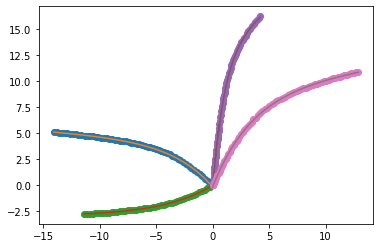

In [9]:
fit_parameters={}
curves=[pattern_left_top,pattern_left_bottom,pattern_right_top,pattern_right_bottom]
test_func=[test_func_1,test_func_1,test_func_2,test_func_2]
names=["pattern_left_top","pattern_left_bottom","pattern_right_top","pattern_right_bottom"]
for curve, func,name in zip(curves,test_func,names):
    xdata=curve["X"]
    ydata=curve["Y"]
    fit_parameters[name]=fit_curve(xdata,ydata,func)


# Synthetic_1

In [95]:
#experiment setup
ground_truth=[107, 164, 243, 328, 375, 446, 644, 713, 771, 820, 887, 953, 1036, 1101, 1179, 1254, 1319, 1396, 1456, 1513, 1598, 1648, 1719, 1784, 1875, 1938, 2017, 2073, 2185, 2247, 2315, 2369, 2433, 2487, 2552, 2610, 2835, 2916, 2965, 3044, 3101, 3240, 3284, 3368, 3411]
print(len(ground_truth))
# colum_names ={"pressure":{"Date","Pressure (psia)","first_order_derivative","second_order_derivative"},
#                     "rate":{"Time@end","Liquid rate (STB/D)"}}

colum_names={"pressure":{"time":"Date",
                        "measure":"Pressure (psia)",
                        "first_order_derivative":"first_order_derivative",
                        "second_order_derivative":"second_order_derivative"},
             "rate":{"time":"Time@end",
                     "measure":"Liquid rate (STB/D)"}}
data_inOneRow=400
pressure_filePath="../data_input/Synthetic_Data.xlsx"
rate_filePath="../data_input/Synthetic_Data.xlsx"

45


In [135]:
ground_truth_buildUp=[point for index, point in enumerate(ground_truth) if index%2!=0]
ground_truth_buildUp
len(ground_truth_buildUp)

22

In [96]:
processed_data=LoadNPreprocessData(pressure_filePath=pressure_filePath, 
                 rate_filePath=rate_filePath, 
                 colum_names=colum_names, 
                 use_SG_smoothing=False)
pressure_df=processed_data.pressure_df
rate_df=processed_data.rate_df

display(pressure_df)
display(rate_df)


---load data from 'txt' or 'xlsx' files...
---The first & second order derivative has been calculated and appended to pressure dataframe


,Date,Pressure (psia),first_order_derivative,second_order_derivative
0,0.000000,2000.000000,15175.401994,-1.593896e+06
1,0.006111,2092.738568,5434.926885,-2.211251e+05
2,0.012222,2125.952010,4083.606969,-1.648675e+05
3,0.018056,2149.773050,3121.879672,-7.945161e+04
4,0.024167,2168.851204,2636.342081,-5.537004e+04
...,...,...,...,...
3514,5938.051389,2327.338989,-0.150989,1.763948e-04
3515,5968.345556,2322.764893,-0.145646,1.653610e-04
3516,5998.640000,2318.352641,-0.140636,1.544522e-04
3517,6028.934444,2314.092149,-0.135957,0.000000e+00


,Time@end,Liquid rate (STB/D)
0,0.000000,-6742.395145
1,253.216667,-8513.514104
2,264.358333,0.000000
3,274.191667,-5548.484464
4,296.716667,-8951.244013
...,...,...
90,4465.793056,0.107707
91,4465.834722,0.105123
92,4465.909722,-1909.311284
93,5058.868056,-5453.279913


In [12]:
def pointInterval_to_curve_data(point_index:int,
                               pressure_df, 
                               delta_point:int=10,
                               colum_names:Dict={"pressure":{"time":"Date",
                                "measure":"Pressure (psia)",
                                "first_order_derivative":"first_order_derivative",
                                "second_order_derivative":"second_order_derivative"},
                                 "rate":{"time":"Time@end",
                                         "measure":"Liquid rate (STB/D)"}})->List[float]:
    """
    extract pressure measurements between point_index and point_index+delta_point
    Args:
    """
    if delta_point>0:
        sub_df=pressure_df.iloc[point_index:point_index+delta_point]
    else:
        sub_df=pressure_df.iloc[point_index+1+delta_point:point_index+1]
        #reverse dataframe
        sub_df=sub_df.iloc[::-1]
    time=sub_df[colum_names["pressure"]["time"]]-sub_df.iloc[0][colum_names["pressure"]["time"]]
    pressure_measure=sub_df[colum_names["pressure"]["measure"]]-sub_df.iloc[0][colum_names["pressure"]["measure"]]
    return {"time":list(np.round(time,6)),"pressure_measure":list(np.round(pressure_measure,6))}

pointInterval_to_curve_data(100,pressure_df)
pointInterval_to_curve_data(100,pressure_df,-10)

{'time': [0.0,
  -3.946667,
  -6.635556,
  -8.4675,
  -9.715556,
  -10.565833,
  -11.145278,
  -11.54,
  -11.808889,
  -11.991944],
 'pressure_measure': [0.0,
  -20.776825,
  -40.225757,
  -58.655368,
  -76.26545,
  -93.170596,
  -109.42044,
  -125.016514,
  -139.926528,
  -154.096933]}

In [13]:
curveDataLeft=pd.DataFrame(columns=['time', 'pressure_measure'])
for point in ground_truth:
    data=pointInterval_to_curve_data(point,pressure_df,-5,colum_names)
#     print(data)
    curveDataLeft=curveDataLeft.append(data,ignore_index=True)
    
curveDataLeft    

,time,pressure_measure
0,"[0.0, -2.928333, -5.856667, -32.745556, -51.06...","[0.0, -3.470247, -7.014217, -43.900906, -75.90..."
1,"[0.0, -0.130833, -0.261667, -1.444722, -2.499167]","[0.0, 2.357905, 4.745042, 27.800426, 50.934658]"
2,"[0.0, -2.174167, -4.348333, -10.141389, -14.08...","[0.0, -9.368156, -19.856413, -55.924786, -92.4..."
3,"[0.0, -0.002778, -0.005278, -0.012778, -0.019444]","[0.0, -0.278444, -0.564902, -1.442547, -2.296898]"
4,"[0.0, -6.5325, -13.064722, -25.545556, -34.048...","[0.0, -16.368913, -35.11735, -81.007108, -125...."
5,"[0.0, -2.443333, -4.886944, -10.816944, -16.10...","[0.0, 7.128509, 14.637056, 34.681167, 55.182097]"
6,"[0.0, -5.976667, -11.953056, -42.2475, -72.541...","[0.0, -3.126825, -6.305237, -23.287391, -41.97..."
7,"[0.0, -1.453056, -2.906389, -7.616667, -11.814...","[0.0, 7.297753, 14.854768, 41.359735, 68.062564]"
8,"[0.0, -11.356944, -22.714167, -41.033333, -53....","[0.0, -18.794173, -42.032012, -95.819834, -155..."
9,"[0.0, -0.059167, -0.118333, -0.589444, -1.009444]","[0.0, 3.113389, 6.26865, 32.974853, 59.631138]"


In [14]:
filepath= "../data_output/curveDataLeft_for_learnPattern.csv"   
curveDataLeft.to_csv(filepath,index=False,float_format='%.4f',sep='\t')

In [15]:
# point_index=100
# delta_point=-10
# sub_df=pressure_df.iloc[point_index+1+delta_point:point_index+1]
# display(sub_df)
# sub_df=sub_df.iloc[::-1]
# display(sub_df)
# sub_df.iloc[0]
# time=sub_df[colum_names["pressure"]["time"]]-sub_df.iloc[0][colum_names["pressure"]["time"]]

# pressure_measure=sub_df[colum_names["pressure"]["measure"]]-sub_df.iloc[0][colum_names["pressure"]["measure"]]
# time,pressure_measure

In [16]:
# point_index=100
# delta_point=10
# sub_df=pressure_df.iloc[point_index:point_index+delta_point]
# display(sub_df)
# sub_df.iloc[0]
# time=sub_df[colum_names["pressure"]["time"]]-sub_df.iloc[0][colum_names["pressure"]["time"]]
# time
# pressure_measure=sub_df[colum_names["pressure"]["measure"]]-sub_df.iloc[0][colum_names["pressure"]["measure"]]
# pressure_measure

[0.0, -2.928333, -5.856667, -32.745556, -51.064722] [0.0, -3.470247, -7.014217, -43.900906, -75.907231]


c:\users\junec\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


45

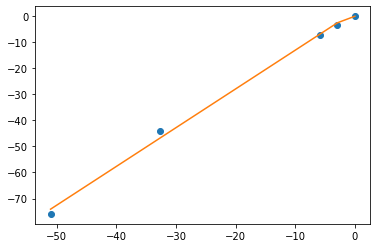

In [53]:
def fit_curve(xdata,ydata,test_func,parameter_number):
    x = np.asarray(xdata)
    y = np.asarray(ydata)
    parameters, covariance = curve_fit(test_func, x, y)
#     parameters, covariance = curve_fit(test_func, xdata, ydata)
#     print(F'The parameters is {parameters}.')
    if parameter_number==4:
        fit_a = parameters[0]
        fit_b = parameters[1]
        fit_c = parameters[2]
        fit_d = parameters[3]

        y_fit = test_func(x, fit_a, fit_b,fit_c,fit_d)

    if parameter_number==3:
        fit_a = parameters[0]
        fit_b = parameters[1]
        fit_c = parameters[2]

        y_fit = test_func(x, fit_a, fit_b,fit_c)
    
    plt.plot(x, y, 'o', label='data')
    plt.plot(x, y_fit, '-', label='LJ fit')
#     plt.show()
    return parameters

len(curveDataLeft)
xdata=curveDataLeft["time"][0]
ydata=curveDataLeft["pressure_measure"][0]
print(xdata,ydata)
test_func=test_func_1
fit_curve(xdata,ydata,test_func,4)

len(curveDataLeft)

-----------i--------- 0
The parameters is [ 1.85605685  1.48729861  1.85605685 47.05964005].
The parameters is [4.32439037e-01 1.35117686e+00 4.88274176e-22 1.00000160e+00].
-----------i--------- 1


c:\users\junec\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

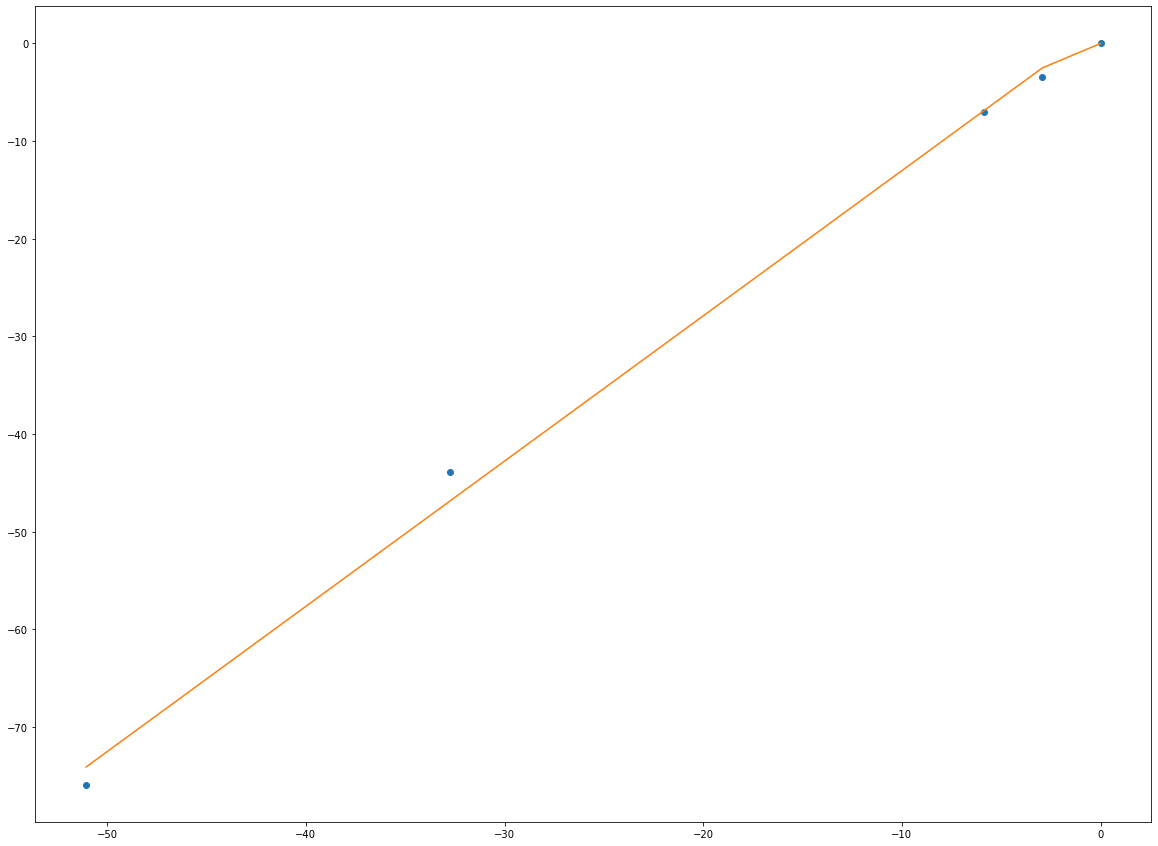

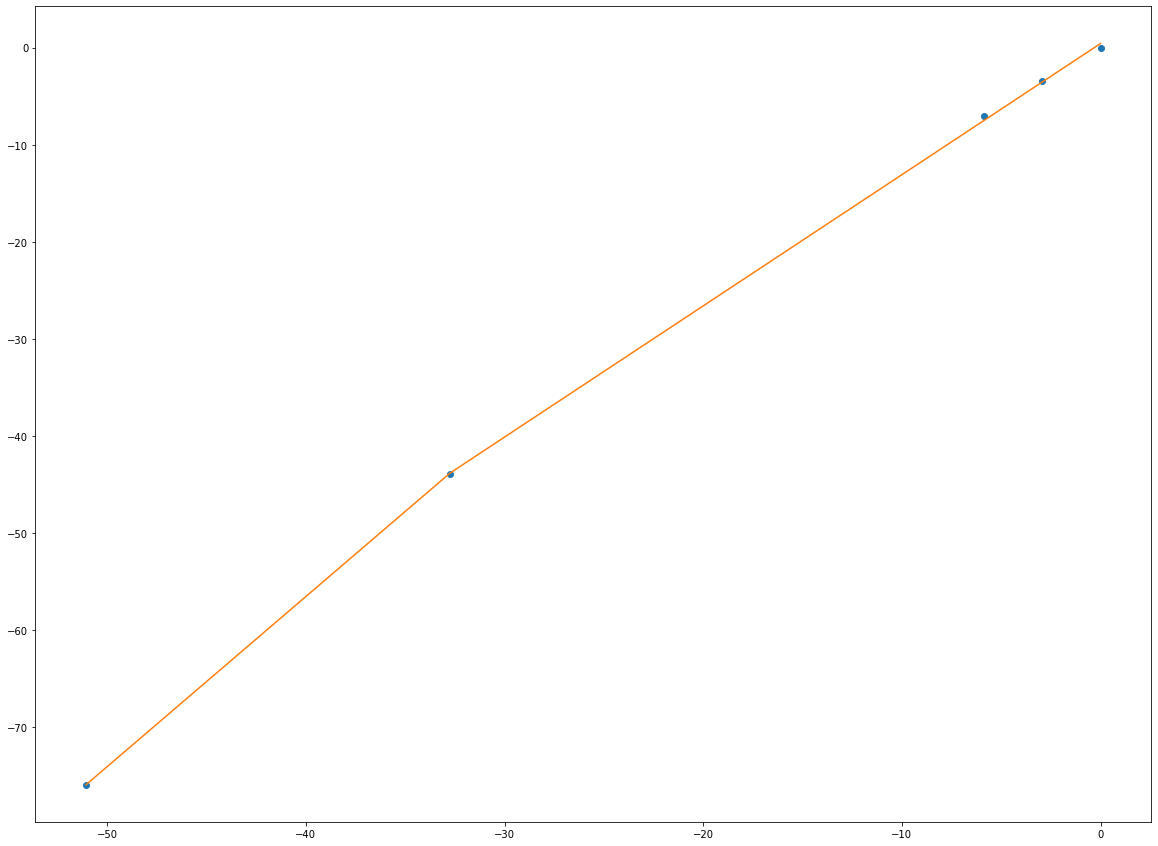

In [18]:
for i in range(len(curveDataLeft)):
    xdata=curveDataLeft["time"][i]
    ydata=curveDataLeft["pressure_measure"][i]
#     print(xdata,ydata)
    print("-----------i---------",i)
    try:
        test_func=test_func_1
        fit_curve(xdata,ydata,test_func,4)
    except RuntimeError:
        test_func=test_func_2
        fit_curve(xdata,ydata,test_func,4)
    try:
        test_func=test_func_2
        fit_curve(xdata,ydata,test_func,4)
    except RuntimeError:
        test_func=test_func_1
        fit_curve(xdata,ydata,test_func,4)

In [34]:
number=10
curve_points = np.empty((0, number), int)
print(curve_points)
type(parameters[0])
a,b,c=parameters[0]
x=np.linspace(start = 0, stop = 1, num = number)
temp=test_func_3(x, a,b,c)
print(temp,type(temp))
curve_points=np.append(curve_points,np.array([test_func_3(x, a,b,c)]), axis=0)
curve_points

[]
[-0.19588186 -0.07589932  0.04388926  0.16348387  0.28288452  0.40209121
  0.52110393  0.63992269  0.75854749  0.87697833] <class 'numpy.ndarray'>


array([[-0.19588186, -0.07589932,  0.04388926,  0.16348387,  0.28288452,
         0.40209121,  0.52110393,  0.63992269,  0.75854749,  0.87697833]])

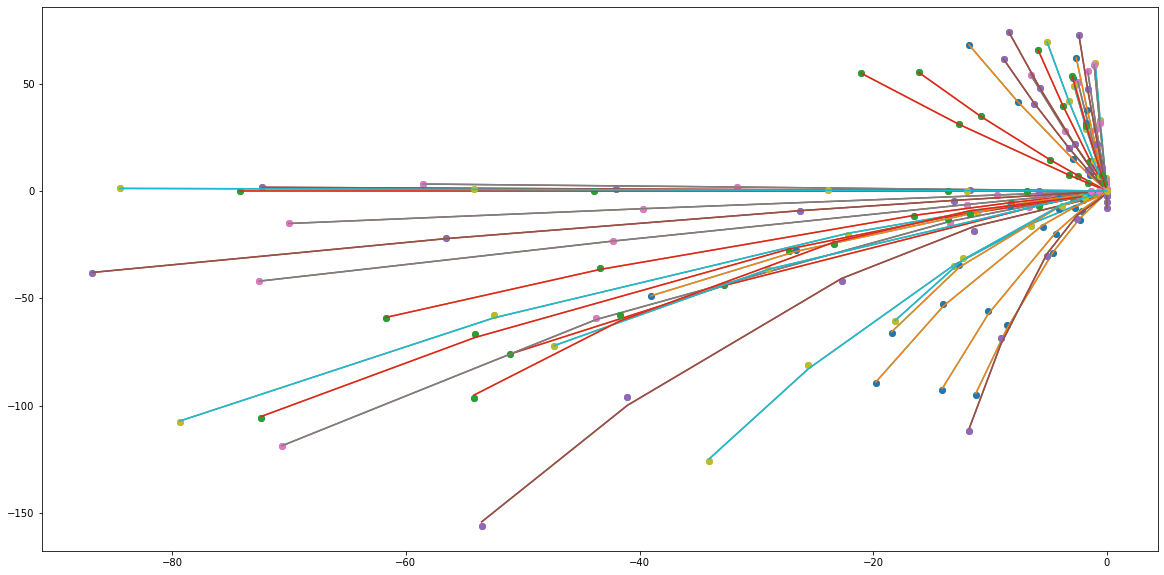

In [69]:
number=10
curve_points = np.empty((0, number), int)
x=np.linspace(start = -0.1, stop = 0, num = number)
parameters=[]
plt.figure(figsize = (20, 10))
def test_func_3(x, a,b,c):
    y = a+b*x+c*x*x
    return y
for i in range(len(curveDataLeft)):
    xdata=curveDataLeft["time"][i]
    ydata=curveDataLeft["pressure_measure"][i]
#     print(xdata,ydata)
#     print("-----------i---------",i)
    try:
        test_func=test_func_3
        parameters.append(fit_curve(xdata,ydata,test_func_3,3))
        a,b,c=fit_curve(xdata,ydata,test_func_3,3)
        y=test_func_3(x, a,b,c)
       
        curve_points=np.append(curve_points,np.array([y]), axis=0)
        
    except RuntimeError:
        print("----------errors",RuntimeError)
        pass

In [70]:
curve_points.shape
curve_max=curve_points.max(axis=0)
curve_max

array([5.25903966, 4.67078335, 4.08436097, 3.49977254, 2.91701804,
       2.33609749, 1.75701087, 1.17975819, 0.60433944, 0.06514206])

In [71]:
curve_points.shape
curve_min=curve_points.min(axis=0)
curve_min

array([-57.60859616, -48.87171021, -40.71940693, -33.15168631,
       -26.16854835, -19.76999306, -13.95602043,  -8.72663047,
        -4.08182317,  -1.64982249])

47

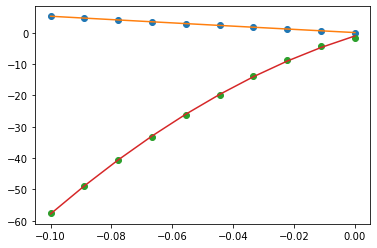

In [72]:
xdata=x
test_func=test_func_3
parameters.append(fit_curve(xdata,curve_max,test_func_3,3))
# a,b,c=fit_curve(xdata,ydata,test_func_3,3)

parameters.append(fit_curve(xdata,curve_min,test_func_3,3))
# a,b,c=fit_curve(xdata,ydata,test_func_3,3)
len(parameters)


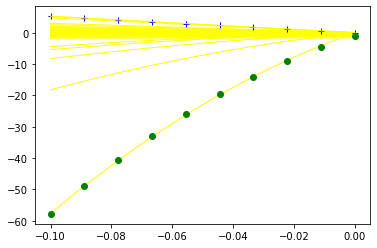

In [89]:
for i,p in enumerate(parameters):
    a,b,c=p
    y=test_func_3(x, a,b,c)
    if i==len(parameters)-2:
        plt.plot(x, y, 'r+', label='LJ fit',color="blue",linewidth=5)
    if i==len(parameters)-1:
        plt.plot(x, y, 'bo', label='LJ fit',color="green")
    else:
        plt.plot(x, y, '-', label='LJ fit',color="yellow",linewidth=1)
        

In [92]:
a=[1,2,3]
a[-1]

3

In [357]:
class LearnPattern:
    def __init__(self, 
#                  pressure_measure:List[float],
#                  pressure_time:List[float],
#                  ground_truth:List[int],
                 delta_pointNumber:int=5,
                 deltaTime_learn:float=0.1,
                 fitting_func=quadratic_func,
                 filePath_learnedPattern="../data_output/Learned_Pattern.csv",
#                 filepath_curveDataLeft= "../data_output/curveDataLeft_forLearning.csv",
#                 filepath_curveDataRight= "../data_output/curveDataRight_forLearning.csv"
                ):
        
#         self.pressure_measure=pressure_measure
#         self.pressure_time=pressure_time
#         self.ground_truth=ground_truth
        self.colum_names=colum_names
        self.filePath_learnedPattern=filePath_learnedPattern
        self.delta_pointNumber=delta_pointNumber
        self.deltaTime_learn=deltaTime_learn
        self.fitting_func=fitting_func
#         self.filepath_curveDataLeft=filepath_curveDataLeft
#         self.filepath_curveDataRight=filepath_curveDataRight
        
#         self.curveDataLeft=pd.DataFrame(columns=['time', 'pressure_measure'])
#         self.curveDataRight=pd.DataFrame(columns=['time', 'pressure_measure'])
        self.curveData=pd.DataFrame(columns=['pressure_time_left', 'pressure_measure_left','pressure_time_right', 'pressure_measure_right'])
        self.curveLeft_parameters=[]
        self.curveRight_parameters=[]
        self.parameters_PatternField={}
        self.x_leftPlot=[]
        self.x_rightPlot=[]
        

#     def point_to_curve_data(self, point_index:int,pointNumber,pressure_measure,pressure_time)->List[float]:
#         """
#         extract pressure measurements between point_index and point_index+delta_point
#         Args:
#         delta_point
#         """
#         if pointNumber>0:
#             sub_measure=pressure_measure[point_index:point_index+pointNumber]
#             sub_time=pressure_time[point_index:point_index+pointNumber]
#             curve_pressure=[round(measure-sub_measure[0],6) for measure in sub_measure]
#             curve_time=[round(time-sub_time[0],6) for time in sub_time]
#         else:
#             sub_measure=pressure_measure[point_index+1+pointNumber:point_index+1]
#             sub_time=pressure_time[point_index+1+pointNumber:point_index+1]
#             curve_pressure=[round(measure-sub_measure[-1],6) for measure in sub_measure]
#             curve_time=[round(time-sub_time[-1],6) for time in sub_time]

#         return {"time":curve_time,"pressure_measure":curve_pressure}

#     def produceNSave_curveData(self,pressure_measure,pressure_time,points):     
#         for point in points:
#             data_left=self.point_to_curve_data(point,-self.delta_pointNumber,pressure_measure,pressure_time)
#             self.curveDataLeft=self.curveDataLeft.append(data_left,ignore_index=True)
#             data_right=self.point_to_curve_data(point,self.delta_pointNumber,pressure_measure,pressure_time)
#             self.curveDataRight=self.curveDataRight.append(data_right,ignore_index=True)
#         self.curveDataLeft.to_csv(self.filepath_curveDataLeft,index=False,float_format='%.4f',sep='\t')
#         self.curveDataRight.to_csv(self.filepath_curveDataRight,index=False,float_format='%.4f',sep='\t')   
        
    def produceNSave_curveData(self,pressure_measure,pressure_time,points):  
        self.curveData=pd.DataFrame(columns=['pressure_time_left', 'pressure_measure_left','pressure_time_right', 'pressure_measure_right'])
#         self.curveDataLeft=pd.DataFrame(columns=['time', 'pressure_measure'])
#         self.curveDataRight=pd.DataFrame(columns=['time', 'pressure_measure'])
        
        for point_index in points:
            #left   
            sub_measure=pressure_measure[point_index+1-self.delta_pointNumber:point_index+1]
            sub_time=pressure_time[point_index+1-self.delta_pointNumber:point_index+1]
            curve_pressure=[round(measure-sub_measure[-1],6) for measure in sub_measure]
            curve_time=[round(time-sub_time[-1],6) for time in sub_time]
            data={"pressure_time_left":curve_time,"pressure_measure_left":curve_pressure}
        
            
            #right
            sub_measure=pressure_measure[point_index:point_index+self.delta_pointNumber]
            sub_time=pressure_time[point_index:point_index+self.delta_pointNumber]
            curve_pressure=[round(measure-sub_measure[0],6) for measure in sub_measure]
            curve_time=[round(time-sub_time[0],6) for time in sub_time]
            data.update({"pressure_time_right":curve_time,
                         "pressure_measure_right":curve_pressure})
            
            
            self.curveData=self.curveData.append(data,ignore_index=True)
       
#         self.curveDataLeft.to_csv(self.filepath_curveDataLeft,index=False,float_format='%.4f',sep='\t')
#         self.curveDataRight.to_csv(self.filepath_curveDataRight,index=False,float_format='%.4f',sep='\t') 

        
#     def fit_curve(self,xdata,ydata):
#         x = np.asarray(xdata)
#         y = np.asarray(ydata)
        
#         parameters, covariance = curve_fit(self.fitting_func, x, y)
#         y_fit = self.fitting_func(x, *parameters)

#         plt.plot(x, y, 'o', label='data')
#         plt.plot(x, y_fit, '-', label='LJ fit')
#         plt.show()
#         return parameters

    def fit_curve(self,xdata,ydata):
        x = np.asarray(xdata)
        y = np.asarray(ydata)
        
#         parameters, covariance = curve_fit(self.fitting_func, x, y)
#         y_fit = self.fitting_func(x, *parameters)
        parameters=np.polyfit(x,y,3)
        y_fit=np.polyval(parameters,x)
#         print(parameters)

        plt.plot(x, y, 'o', label='data')
        plt.plot(x, y_fit, '-', label='LJ fit')
#         plt.show()
        return parameters
    
    def calculate_Parameters_allCurve(self):
        plt.figure(figsize = (20, 10))

        for i in range(len(self.curveData)):
            #left side
                        
#             print("-----------i---------",i)
            xdata=self.curveData["pressure_time_left"][i]
            ydata=self.curveData["pressure_measure_left"][i]
#             print(xdata,ydata)
            if i==0:
                xLeft_min=abs(xdata[0])
                self.x_leftPlot=xdata
            if i>0 and abs(xdata[0])<xLeft_min:
                xLeft_min=abs(xdata[0])
                self.x_leftPlot=xdata
                
         
            self.curveLeft_parameters.append(self.fit_curve(xdata,ydata))

            
            #right side
            xdata=self.curveData["pressure_time_right"][i]
            ydata=self.curveData["pressure_measure_right"][i]
            if i==0:
                xRight_min=abs(xdata[-1])
                self.x_rightPlot=xdata
            if i>0 and abs(xdata[-1])<xRight_min:
                xRight_min=abs(xdata[-1])
                self.x_rightPlot=xdata
          
            self.curveRight_parameters.append(self.fit_curve(xdata,ydata))
        
            
    def calculate_PatternField(self):
#         y_left_allCurve = np.empty((0, len(self.x_leftPlot)), float)
#         y_right_allCurve = np.empty((0, len(self.x_rightPlot)), float)
  
#         #left
#         x_left=np.asarray(self.x_leftPlot)
#         x_right=np.asarray(self.x_rightPlot)
        number=10
        y_left_allCurve = np.empty((0, number), float)
        y_right_allCurve = np.empty((0, number), float)
        x_left=np.linspace(start = -0.1, stop = 0, num = number)
        x_right=np.linspace(start = 0, stop = 0.1, num = number)
    
        plt.figure(figsize = (20, 10))
        curve_number=len(self.curveRight_parameters)
        for i in range(curve_number):
            y_left=self.fitting_func(x_left, self.curveLeft_parameters[i])
            plt.plot(x_left, y_left, '-', label='LJ fit',color="yellow",linewidth=1)
            y_left_allCurve=np.append(y_left_allCurve,np.array([y_left]), axis=0)
            
            y_right=self.fitting_func(x_right, self.curveRight_parameters[i])
            plt.plot(x_right, y_right, '-', label='LJ fit',color="yellow",linewidth=1)
            y_right_allCurve=np.append(y_right_allCurve,np.array([y_right]), axis=0)
            
        left_parameters_PatternField=self.fitNPlot_maxNMin(x_left,y_left_allCurve)
        right_parameters_PatternField=self.fitNPlot_maxNMin(x_right,y_right_allCurve)
        self.parameters_PatternField["left top"]=left_parameters_PatternField["top"]
        self.parameters_PatternField["left bottom"]=left_parameters_PatternField["bottom"]
        self.parameters_PatternField["right top"]=right_parameters_PatternField["top"]
        self.parameters_PatternField["right bottom"]=right_parameters_PatternField["bottom"]


    def fitNPlot_maxNMin(self,x,y_allCurve):
        half_parameters_PatternField={}
        
        y_allCurve_max=y_allCurve.max(axis=0)
        half_parameters_PatternField["top"]=self.fit_curve(x,y_allCurve_max)
     
        y_allCurve_min=y_allCurve.min(axis=0)
        half_parameters_PatternField["bottom"]=self.fit_curve(x,y_allCurve_min)
        
        return half_parameters_PatternField
    
    def learn(self,pressure_measure,pressure_time,ground_truth):
        self.produceNSave_curveData(pressure_measure,pressure_time,ground_truth)
        self.calculate_Parameters_allCurve()
        self.calculate_PatternField()
    def sav_pattern(self,filepath_save):
        pattern_df=pd.DataFrame(self.parameters_PatternField)
        pattern_df.to_csv(filepath_save,index=False,float_format='%.4f',sep='\t',mode="a")
        
#     def check_inPattern(self,curveData):
#         border_names=["left top","left bottom","right top","right bottom"]
#         display(curveData)
#         curveData["pressure_time_right"].reverse()
#         curveData["pressure_measure_right"].reverse()
#         xzip=[curveData["pressure_time_left"],
#               curveData["pressure_time_left"],
#               curveData["pressure_time_right"],
#               curveData["pressure_time_right"]]
#         print(xzip)
#         y_field={}
#         for border_name, x, parameters in zip(border_names,xzip,self.parameters_PatternField.values):
#             y_field[border_name]=self.fitting_func(x, parameters)
            
#         if (np.array(curveData["pressure_measure_left"][0:-1])>=np.array(y_field["left bottom"]) and 
#             np.array(curveData["pressure_measure_left"][0:-1])<=np.array(y_field["left top"]) and
#         np.array(curveData["pressure_measure_left"][0:-1])>=np.array(y_field["left bottom"]) and 
#         np.array(curveData["pressure_measure_left"][0:-1])>=np.array(y_field["left bottom"])):
#             breakpoints.append()
        
        
    def predict(self,pressure_measure,pressure_time):
        breakpoints=[]
        points=[point_index for point_index in range(self.delta_pointNumber,len(pressure_measure)-self.delta_pointNumber)]
        self.produceNSave_curveData(pressure_measure,pressure_time,points)

        for index,curveData in self.curveData.iterrows():
            border_names=["left top","left bottom","right top","right bottom"]
#             display(curveData)
            curveData["pressure_time_right"].reverse()
            curveData["pressure_measure_right"].reverse()
            xzip=[curveData["pressure_time_left"],
                  curveData["pressure_time_left"],
                  curveData["pressure_time_right"],
                  curveData["pressure_time_right"]]
#             print(xzip)
            y_field={}
            for border_name, x, parameters in zip(border_names,xzip,self.parameters_PatternField.values()):
                y_field[border_name]=self.fitting_func(x, parameters)
#             display("-----y_field-----",y_field)
#             display("-----curveData----:",curveData)
                

            if (all(np.array(curveData["pressure_measure_left"][0:-1])>=np.array(y_field["left bottom"][0:-1])) and 
                all(np.array(curveData["pressure_measure_left"][0:-1])<=np.array(y_field["left top"][0:-1])) and
            all(np.array(curveData["pressure_measure_right"][0:-1])>=np.array(y_field["right bottom"][0:-1])) and 
            all(np.array(curveData["pressure_measure_right"][0:-1])<=np.array(y_field["right top"][0:-1]))):
                breakpoints.append(index+self.delta_pointNumber)
        return breakpoints
            
        
      

In [352]:
a=[1,1,1,2,3,3,3,2,2,2]
print(len(a))
number=2
points=[point_index for point_index in range(number,len(a)-number)]
points

10


[2, 3, 4, 5, 6, 7]

{'left top': array([ 1.48758493e+01,  8.31494875e+00, -5.21621472e+01,  1.87698675e-03]),
 'left bottom': array([ 5.68362323e+04, -6.25953527e+02,  3.51861465e+02, -9.06842313e-03]),
 'right top': array([ 1.98633499e+07, -1.02594438e+06,  2.00614262e+04,  6.45184429e-01]),
 'right bottom': array([ 9.05402441e+06, -4.85466766e+05,  1.00175843e+04, -2.75853337e+00])}

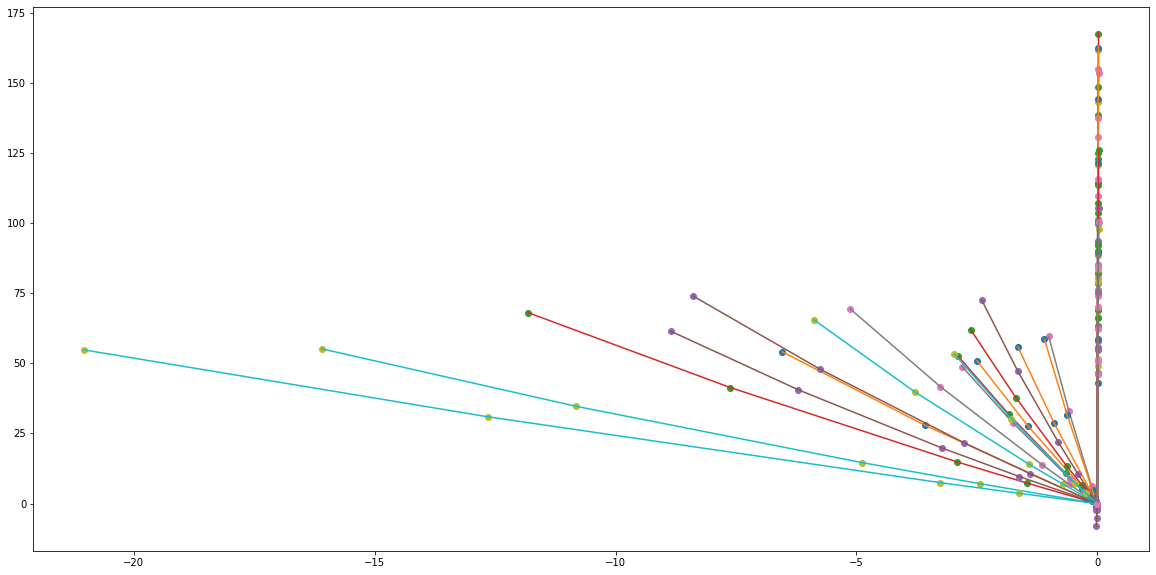

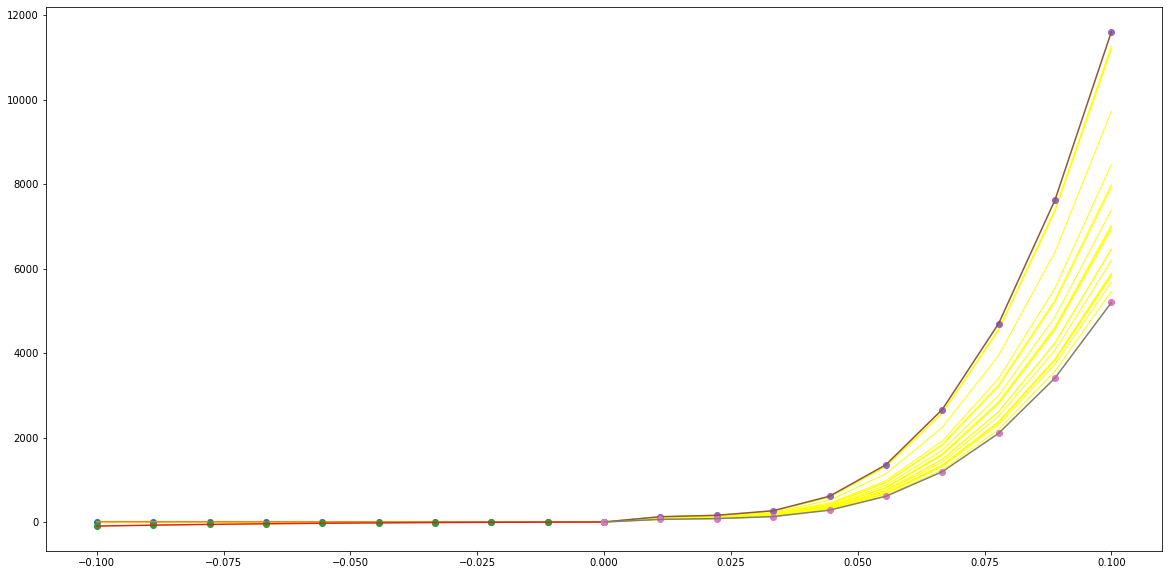

In [358]:
def test_func(x, a,b,c,d):
    y = a+b*x-c*np.exp(-d*x)
    return y
def test_func(x, a,b,c,d):
    y = a+b*x-c*np.exp(d*x)
    return y
def test_func(x, a,b,c,d):
    y = a+c*np.exp(d*x)
    return y

def fitting_func_wapper(x, p3):
    y = np.polyval(p3,x)
    return y

# def fitting_func_wapper(x, parameters):
#     a,b,c=parameters
#     y = a+b*x+c*x*x
#     return y

pressure_measure=list(pressure_df[colum_names["pressure"]["measure"]])
pressure_time=list(pressure_df[colum_names["pressure"]["time"]])
learn_pattern=LearnPattern(delta_pointNumber =5,fitting_func=fitting_func_wapper)
learn_pattern.learn(pressure_measure,pressure_time,ground_truth_buildUp)
learn_pattern.parameters_PatternField

In [354]:
learn_pattern.curveData

,pressure_time_left,pressure_measure_left,pressure_time_right,pressure_measure_right
0,"[-2.499167, -1.444722, -0.261667, -0.130833, 0.0]","[50.934658, 27.800426, 4.745042, 2.357905, 0.0]","[0.0, 0.006111, 0.012222, 0.018056, 0.024167]","[0.0, 76.208313, 103.431983, 122.926474, 138.5..."
1,"[-0.019444, -0.012778, -0.005278, -0.002778, 0.0]","[-2.296898, -1.442547, -0.564902, -0.278444, 0.0]","[0.0, 0.006111, 0.011944, 0.018056, 0.026667]","[0.0, 80.421069, 109.587133, 130.639113, 153.6..."
2,"[-16.102222, -10.816944, -4.886944, -2.443333,...","[55.182097, 34.681167, 14.637056, 7.128509, 0.0]","[0.0, 0.006111, 0.012222, 0.018056, 0.024167]","[0.0, 62.699305, 85.14341, 101.235696, 114.1205]"
3,"[-11.814722, -7.616667, -2.906389, -1.453056, ...","[68.062564, 41.359735, 14.854768, 7.297753, 0.0]","[0.0, 0.006111, 0.012222, 0.018056, 0.024167]","[0.0, 57.915989, 78.638861, 93.493076, 105.383..."
4,"[-1.009444, -0.589444, -0.118333, -0.059167, 0.0]","[59.631138, 32.974853, 6.26865, 3.113389, 0.0]","[0.0, 0.006111, 0.012222, 0.018333, 0.024444]","[0.0, 50.957296, 69.004806, 81.859874, 92.093121]"
5,"[-6.542222, -3.570278, -0.235556, -0.117778, 0.0]","[54.142315, 27.864411, 1.731964, 0.864234, 0.0]","[0.0, 0.006111, 0.012222, 0.018333, 0.024444]","[0.0, 92.041139, 124.976346, 148.585303, 167.4..."
6,"[-8.853611, -6.204722, -3.232778, -1.616389, 0.0]","[61.450868, 40.563749, 19.888138, 9.643728, 0.0]","[0.0, 0.006111, 0.012222, 0.018333, 0.024444]","[0.0, 55.72396, 75.658446, 89.945758, 101.381417]"
7,"[-21.034167, -12.657778, -3.259444, -1.629722,...","[54.801219, 30.974077, 7.480955, 3.701327, 0.0]","[0.0, 0.006111, 0.012222, 0.018333, 0.024444]","[0.0, 46.536062, 63.193774, 75.137015, 84.699588]"
8,"[-2.890833, -1.836389, -0.653056, -0.326389, 0.0]","[52.594461, 31.808648, 10.756382, 5.307512, 0.0]","[0.0, 0.006111, 0.012222, 0.018333, 0.024444]","[0.0, 54.847727, 74.428599, 88.444792, 99.651009]"
9,"[-2.8075, -1.753056, -0.569722, -0.284722, 0.0]","[48.864864, 28.801664, 8.82828, 4.355639, 0.0]","[0.0, 0.006111, 0.012222, 0.018333, 0.024444]","[0.0, 88.812683, 120.561496, 143.306309, 161.5..."


In [359]:
breakpoints=learn_pattern.predict(pressure_measure,pressure_time)

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-92.223616, -59.010174, -35.189133, -16.11097...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, 14.043148, 26.546557, 37.850582, 48.189208]
Name: 0, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-73.053321, -49.23228, -30.154127, -14.043148...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024722]
pressure_measure_right      [0.0, 12.50341, 23.807434, 34.14606, 44.586751]
Name: 1, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-61.73569, -42.657536, -26.546557, -12.50341,...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018611, 0.026111]
pressure_measure_right    [0.0, 11.304025, 21.642651, 32.083341, 42.856253]
Name: 2, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-53.961561, -37.850582, -23.807434, -11.30402...
pressure_time_right           [0.0, 0.006111, 0.012778, 0.020278, 0.028611]
pressure_measure_right    [0.0, 10.338626, 20.779317, 31.552229, 42.657655]
Name: 3, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-48.189208, -34.14606, -21.642651, -10.338626...
pressure_time_right             [0.0, 0.006667, 0.014167, 0.0225, 0.031944]
pressure_measure_right    [0.0, 10.440691, 21.213602, 32.319029, 43.756568]
Name: 4, dtype: object

pressure_time_left        [-0.024722, -0.018611, -0.012778, -0.006667, 0.0]
pressure_measure_left     [-44.586751, -32.083341, -20.779317, -10.44069...
pressure_time_right             [0.0, 0.0075, 0.015833, 0.025278, 0.035833]
pressure_measure_right    [0.0, 10.772912, 21.878338, 33.315877, 45.084371]
Name: 5, dtype: object

pressure_time_left          [-0.026111, -0.020278, -0.014167, -0.0075, 0.0]
pressure_measure_left     [-42.856253, -31.552229, -21.213602, -10.77291...
pressure_time_right           [0.0, 0.008333, 0.017778, 0.028333, 0.040278]
pressure_measure_right     [0.0, 11.105426, 22.542965, 34.31146, 46.409042]
Name: 6, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008333, 0.0]
pressure_measure_left     [-42.657655, -32.319029, -21.878338, -11.10542...
pressure_time_right                  [0.0, 0.009444, 0.02, 0.031944, 0.045]
pressure_measure_right    [0.0, 11.437539, 23.206033, 35.303615, 47.727658]
Name: 7, dtype: object

pressure_time_left        [-0.031944, -0.025278, -0.017778, -0.009444, 0.0]
pressure_measure_left     [-43.756568, -33.315877, -22.542965, -11.43753...
pressure_time_right             [0.0, 0.010556, 0.0225, 0.035556, 0.050556]
pressure_measure_right    [0.0, 11.768494, 23.866076, 36.290119, 49.037295]
Name: 8, dtype: object

pressure_time_left            [-0.035833, -0.028333, -0.02, -0.010556, 0.0]
pressure_measure_left     [-45.084371, -34.31146, -23.206033, -11.768494...
pressure_time_right                  [0.0, 0.011944, 0.025, 0.04, 0.056667]
pressure_measure_right    [0.0, 12.097582, 24.521625, 37.268801, 50.335043]
Name: 9, dtype: object

pressure_time_left          [-0.040278, -0.031944, -0.0225, -0.011944, 0.0]
pressure_measure_left     [-46.409042, -35.303615, -23.866076, -12.09758...
pressure_time_right           [0.0, 0.013056, 0.028056, 0.044722, 0.063611]
pressure_measure_right    [0.0, 12.424043, 25.171218, 38.237461, 51.618035]
Name: 10, dtype: object

pressure_time_left              [-0.045, -0.035556, -0.025, -0.013056, 0.0]
pressure_measure_left     [-47.727658, -36.290119, -24.521625, -12.42404...
pressure_time_right              [0.0, 0.015, 0.031667, 0.050556, 0.071667]
pressure_measure_right    [0.0, 12.747176, 25.813418, 39.193992, 52.883474]
Name: 11, dtype: object

pressure_time_left               [-0.050556, -0.04, -0.028056, -0.015, 0.0]
pressure_measure_left     [-49.037295, -37.268801, -25.171218, -12.74717...
pressure_time_right           [0.0, 0.016667, 0.035556, 0.056667, 0.080278]
pressure_measure_right     [0.0, 13.066242, 26.446817, 40.136299, 54.12865]
Name: 12, dtype: object

pressure_time_left        [-0.056667, -0.044722, -0.031667, -0.016667, 0.0]
pressure_measure_left     [-50.335043, -38.237461, -25.813418, -13.06624...
pressure_time_right                   [0.0, 0.018889, 0.04, 0.063611, 0.09]
pressure_measure_right    [0.0, 13.380575, 27.070056, 41.062408, 55.350973]
Name: 13, dtype: object

pressure_time_left        [-0.063611, -0.050556, -0.035556, -0.018889, 0.0]
pressure_measure_left     [-51.618035, -39.193992, -26.446817, -13.38057...
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right    [0.0, 13.689482, 27.681833, 41.970398, 56.547984]
Name: 14, dtype: object

pressure_time_left            [-0.071667, -0.056667, -0.04, -0.021111, 0.0]
pressure_measure_left     [-52.883474, -40.136299, -27.070056, -13.68948...
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right    [0.0, 13.992352, 28.280916, 42.858502, 57.717389]
Name: 15, dtype: object

pressure_time_left        [-0.080278, -0.063611, -0.044722, -0.023611, 0.0]
pressure_measure_left     [-54.12865, -41.062408, -27.681833, -13.992352...
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right     [0.0, 14.288565, 28.86615, 43.725037, 58.857063]
Name: 16, dtype: object

pressure_time_left                [-0.09, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left     [-55.350973, -41.970398, -28.280916, -14.28856...
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right    [0.0, 14.577586, 29.436472, 44.568498, 59.965082]
Name: 17, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left     [-56.547984, -42.858502, -28.86615, -14.577586...
pressure_time_right           [0.0, 0.033333, 0.070833, 0.112778, 0.159722]
pressure_measure_right    [0.0, 14.858887, 29.990913, 45.387497, 61.039721]
Name: 18, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left     [-57.717389, -43.725037, -29.436472, -14.85888...
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126389, 0.179444]
pressure_measure_right     [0.0, 15.132026, 30.52861, 46.180834, 62.079478]
Name: 19, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left     [-58.857063, -44.568498, -29.990913, -15.13202...
pressure_time_right           [0.0, 0.041944, 0.088889, 0.141944, 0.201111]
pressure_measure_right    [0.0, 15.396584, 31.048808, 46.947452, 63.083069]
Name: 20, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left     [-59.965082, -45.387497, -30.52861, -15.396584...
pressure_time_right                [0.0, 0.046944, 0.1, 0.159167, 0.225833]
pressure_measure_right    [0.0, 15.652224, 31.550868, 47.686485, 64.049449]
Name: 21, dtype: object

pressure_time_left        [-0.159722, -0.126389, -0.088889, -0.046944, 0.0]
pressure_measure_left     [-61.039721, -46.180834, -31.048808, -15.65222...
pressure_time_right           [0.0, 0.053056, 0.112222, 0.178889, 0.253333]
pressure_measure_right    [0.0, 15.898644, 32.034261, 48.397225, 64.977795]
Name: 22, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.053056, 0.0]
pressure_measure_left     [-62.079478, -46.947452, -31.550868, -15.89864...
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200278, 0.284167]
pressure_measure_right    [0.0, 16.135618, 32.498582, 49.079152, 65.867522]
Name: 23, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.112222, -0.059167, 0.0]
pressure_measure_left     [-63.083069, -47.686485, -32.034261, -16.13561...
pressure_time_right              [0.0, 0.066667, 0.141111, 0.225, 0.318889]
pressure_measure_right    [0.0, 16.362964, 32.943534, 49.731904, 66.718262]
Name: 24, dtype: object

pressure_time_left        [-0.225833, -0.178889, -0.125833, -0.066667, 0.0]
pressure_measure_left     [-64.049449, -48.397225, -32.498582, -16.36296...
pressure_time_right           [0.0, 0.074444, 0.158333, 0.252222, 0.357778]
pressure_measure_right      [0.0, 16.58057, 33.36894, 50.355297, 67.529873]
Name: 25, dtype: object

pressure_time_left        [-0.253333, -0.200278, -0.141111, -0.074444, 0.0]
pressure_measure_left     [-64.977795, -49.079152, -32.943534, -16.58057...
pressure_time_right           [0.0, 0.083889, 0.177778, 0.283333, 0.401667]
pressure_measure_right     [0.0, 16.78837, 33.774728, 50.949304, 68.302418]
Name: 26, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083889, 0.0]
pressure_measure_left     [-65.867522, -49.731904, -33.36894, -16.78837,...
pressure_time_right           [0.0, 0.093889, 0.199444, 0.317778, 0.450556]
pressure_measure_right    [0.0, 16.986357, 34.160934, 51.514048, 69.036159]
Name: 27, dtype: object

pressure_time_left        [-0.318889, -0.252222, -0.177778, -0.093889, 0.0]
pressure_measure_left     [-66.718262, -50.355297, -33.774728, -16.98635...
pressure_time_right           [0.0, 0.105556, 0.223889, 0.356667, 0.505556]
pressure_measure_right      [0.0, 17.174576, 34.52769, 52.049802, 69.73154]
Name: 28, dtype: object

pressure_time_left        [-0.357778, -0.283333, -0.199444, -0.105556, 0.0]
pressure_measure_left     [-67.529873, -50.949304, -34.160934, -17.17457...
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right    [0.0, 17.353114, 34.875226, 52.556964, 70.389176]
Name: 29, dtype: object

pressure_time_left        [-0.401667, -0.317778, -0.223889, -0.118333, 0.0]
pressure_measure_left     [-68.302418, -51.514048, -34.52769, -17.353114...
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right    [0.0, 17.522112, 35.203849, 53.036062, 71.009833]
Name: 30, dtype: object

pressure_time_left        [-0.450556, -0.356667, -0.251111, -0.132778, 0.0]
pressure_measure_left     [-69.036159, -52.049802, -34.875226, -17.52211...
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.713889]
pressure_measure_right    [0.0, 17.681738, 35.513951, 53.487721, 71.594414]
Name: 31, dtype: object

pressure_time_left             [-0.505556, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left     [-69.73154, -52.556964, -35.203849, -17.681738...
pressure_time_right              [0.0, 0.167222, 0.354722, 0.565, 0.801111]
pressure_measure_right     [0.0, 17.832213, 35.805983, 53.912676, 72.14394]
Name: 32, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left     [-70.389176, -53.036062, -35.513951, -17.83221...
pressure_time_right             [0.0, 0.1875, 0.397778, 0.633889, 0.898889]
pressure_measure_right    [0.0, 17.973771, 36.080464, 54.311727, 72.659533]
Name: 33, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left     [-71.009833, -53.487721, -35.805983, -17.97377...
pressure_time_right           [0.0, 0.210278, 0.446389, 0.711389, 1.008611]
pressure_measure_right    [0.0, 18.106693, 36.337957, 54.685763, 73.142399]
Name: 34, dtype: object

pressure_time_left           [-0.713889, -0.565, -0.397778, -0.210278, 0.0]
pressure_measure_left     [-71.594414, -53.912676, -36.080464, -18.10669...
pressure_time_right           [0.0, 0.236111, 0.501111, 0.798333, 1.131667]
pressure_measure_right     [0.0, 18.231264, 36.57907, 55.035706, 73.593811]
Name: 35, dtype: object

pressure_time_left        [-0.801111, -0.633889, -0.446389, -0.236111, 0.0]
pressure_measure_left     [-72.14394, -54.311727, -36.337957, -18.231264...
pressure_time_right              [0.0, 0.265, 0.562222, 0.895556, 1.269722]
pressure_measure_right    [0.0, 18.347806, 36.804443, 55.362548, 74.015093]
Name: 36, dtype: object

pressure_time_left           [-0.898889, -0.711389, -0.501111, -0.265, 0.0]
pressure_measure_left     [-72.659533, -54.685763, -36.57907, -18.347806...
pressure_time_right           [0.0, 0.297222, 0.630556, 1.004722, 1.424444]
pressure_measure_right    [0.0, 18.456637, 37.014742, 55.667287, 74.407606]
Name: 37, dtype: object

pressure_time_left        [-1.008611, -0.798333, -0.562222, -0.297222, 0.0]
pressure_measure_left     [-73.142399, -55.035706, -36.804443, -18.45663...
pressure_time_right             [0.0, 0.333333, 0.7075, 1.127222, 1.598333]
pressure_measure_right     [0.0, 18.558105, 37.210651, 55.950969, 74.77273]
Name: 38, dtype: object

pressure_time_left        [-1.131667, -0.895556, -0.630556, -0.333333, 0.0]
pressure_measure_left     [-73.593811, -55.362548, -37.014742, -18.55810...
pressure_time_right              [0.0, 0.374167, 0.793889, 1.265, 1.793611]
pressure_measure_right    [0.0, 18.652546, 37.392864, 56.214625, 75.111857]
Name: 39, dtype: object

pressure_time_left          [-1.269722, -1.004722, -0.7075, -0.374167, 0.0]
pressure_measure_left     [-74.015093, -55.667287, -37.210651, -18.65254...
pressure_time_right             [0.0, 0.419722, 0.890833, 1.419444, 2.0125]
pressure_measure_right    [0.0, 18.740318, 37.562079, 56.459311, 75.426375]
Name: 40, dtype: object

pressure_time_left        [-1.424444, -1.127222, -0.793889, -0.419722, 0.0]
pressure_measure_left     [-74.407606, -55.950969, -37.392864, -18.74031...
pressure_time_right           [0.0, 0.471111, 0.999722, 1.592778, 2.258056]
pressure_measure_right    [0.0, 18.821761, 37.718993, 56.686056, 75.717658]
Name: 41, dtype: object

pressure_time_left           [-1.598333, -1.265, -0.890833, -0.471111, 0.0]
pressure_measure_left     [-74.77273, -56.214625, -37.562079, -18.821761...
pressure_time_right           [0.0, 0.528611, 1.121667, 1.786944, 2.533611]
pressure_measure_right    [0.0, 18.897232, 37.864296, 56.895897, 75.987059]
Name: 42, dtype: object

pressure_time_left        [-1.793611, -1.419444, -0.999722, -0.528611, 0.0]
pressure_measure_left     [-75.111857, -56.459311, -37.718993, -18.89723...
pressure_time_right                [0.0, 0.593056, 1.258333, 2.005, 2.8425]
pressure_measure_right    [0.0, 18.967063, 37.998665, 57.089827, 76.235902]
Name: 43, dtype: object

pressure_time_left          [-2.0125, -1.592778, -1.121667, -0.593056, 0.0]
pressure_measure_left     [-75.426375, -56.686056, -37.864296, -18.96706...
pressure_time_right           [0.0, 0.665278, 1.411944, 2.249444, 3.189444]
pressure_measure_right    [0.0, 19.031601, 38.122764, 57.268838, 76.465471]
Name: 44, dtype: object

pressure_time_left        [-2.258056, -1.786944, -1.258333, -0.665278, 0.0]
pressure_measure_left     [-75.717658, -56.895897, -37.998665, -19.03160...
pressure_time_right           [0.0, 0.746667, 1.584167, 2.524167, 3.578611]
pressure_measure_right     [0.0, 19.091162, 38.237237, 57.43387, 76.677011]
Name: 45, dtype: object

pressure_time_left           [-2.533611, -2.005, -1.411944, -0.746667, 0.0]
pressure_measure_left     [-75.987059, -57.089827, -38.122764, -19.09116...
pressure_time_right                  [0.0, 0.8375, 1.7775, 2.831944, 4.015]
pressure_measure_right     [0.0, 19.146074, 38.342707, 57.585849, 76.87172]
Name: 46, dtype: object

pressure_time_left            [-2.8425, -2.249444, -1.584167, -0.8375, 0.0]
pressure_measure_left     [-76.235902, -57.268838, -38.237237, -19.14607...
pressure_time_right                 [0.0, 0.94, 1.994444, 3.1775, 4.505278]
pressure_measure_right    [0.0, 19.196633, 38.439774, 57.725646, 77.050746]
Name: 47, dtype: object

pressure_time_left              [-3.189444, -2.524167, -1.7775, -0.94, 0.0]
pressure_measure_left     [-76.465471, -57.43387, -38.342707, -19.196633...
pressure_time_right             [0.0, 1.054444, 2.2375, 3.565278, 5.054722]
pressure_measure_right    [0.0, 19.243141, 38.529013, 57.854113, 77.215186]
Name: 48, dtype: object

pressure_time_left        [-3.578611, -2.831944, -1.994444, -1.054444, 0.0]
pressure_measure_left     [-76.677011, -57.585849, -38.439774, -19.24314...
pressure_time_right           [0.0, 1.183056, 2.510833, 4.000278, 5.671667]
pressure_measure_right    [0.0, 19.285872, 38.610972, 57.972044, 77.366081]
Name: 49, dtype: object

pressure_time_left               [-4.015, -3.1775, -2.2375, -1.183056, 0.0]
pressure_measure_left     [-76.87172, -57.725646, -38.529013, -19.285872...
pressure_time_right           [0.0, 1.327778, 2.817222, 4.488611, 6.363889]
pressure_measure_right      [0.0, 19.3251, 38.686172, 58.080209, 77.504421]
Name: 50, dtype: object

pressure_time_left        [-4.505278, -3.565278, -2.510833, -1.327778, 0.0]
pressure_measure_left     [-77.050746, -57.854113, -38.610972, -19.3251,...
pressure_time_right               [0.0, 1.489444, 3.160833, 5.036111, 7.14]
pressure_measure_right     [0.0, 19.361072, 38.755109, 58.179321, 77.63114]
Name: 51, dtype: object

pressure_time_left        [-5.054722, -4.000278, -2.817222, -1.489444, 0.0]
pressure_measure_left     [-77.215186, -57.972044, -38.686172, -19.36107...
pressure_time_right           [0.0, 1.671389, 3.546667, 5.650556, 8.011389]
pressure_measure_right    [0.0, 19.394037, 38.818249, 58.270068, 77.747119]
Name: 52, dtype: object

pressure_time_left        [-5.671667, -4.488611, -3.160833, -1.671389, 0.0]
pressure_measure_left     [-77.366081, -58.080209, -38.755109, -19.39403...
pressure_time_right               [0.0, 1.875278, 3.979167, 6.34, 8.988889]
pressure_measure_right    [0.0, 19.424212, 38.876031, 58.353082, 77.853183]
Name: 53, dtype: object

pressure_time_left        [-6.363889, -5.036111, -3.546667, -1.875278, 0.0]
pressure_measure_left     [-77.504421, -58.179321, -38.818249, -19.42421...
pressure_time_right          [0.0, 2.103889, 4.464722, 7.113611, 10.085833]
pressure_measure_right     [0.0, 19.451819, 38.92887, 58.428971, 77.950109]
Name: 54, dtype: object

pressure_time_left            [-7.14, -5.650556, -3.979167, -2.103889, 0.0]
pressure_measure_left     [-77.63114, -58.270068, -38.876031, -19.451819...
pressure_time_right          [0.0, 2.360833, 5.009722, 7.981944, 11.316667]
pressure_measure_right      [0.0, 19.477051, 38.977152, 58.49829, 78.03862]
Name: 55, dtype: object

pressure_time_left            [-8.011389, -6.34, -4.464722, -2.360833, 0.0]
pressure_measure_left     [-77.747119, -58.353082, -38.92887, -19.477051...
pressure_time_right            [0.0, 2.648889, 5.621111, 8.955833, 12.6975]
pressure_measure_right     [0.0, 19.500101, 39.021239, 58.56157, 78.119394]
Name: 56, dtype: object

pressure_time_left        [-8.988889, -7.113611, -5.009722, -2.648889, 0.0]
pressure_measure_left     [-77.853183, -58.428971, -38.977152, -19.50010...
pressure_time_right         [0.0, 2.972222, 6.306944, 10.048611, 14.246667]
pressure_measure_right    [0.0, 19.521138, 39.061469, 58.619293, 78.193059]
Name: 57, dtype: object

pressure_time_left        [-10.085833, -7.981944, -5.621111, -2.972222, ...
pressure_measure_left     [-77.950109, -58.49829, -39.021239, -19.521138...
pressure_time_right         [0.0, 3.334722, 7.076389, 11.274444, 15.984722]
pressure_measure_right      [0.0, 19.540331, 39.098155, 58.671921, 78.2602]
Name: 58, dtype: object

pressure_time_left        [-11.316667, -8.955833, -6.306944, -3.334722, ...
pressure_measure_left     [-78.03862, -58.56157, -39.061469, -19.540331,...
pressure_time_right             [0.0, 3.741667, 7.939722, 12.65, 17.935278]
pressure_measure_right       [0.0, 19.557825, 39.13159, 58.71987, 78.32136]
Name: 59, dtype: object

pressure_time_left        [-12.6975, -10.048611, -7.076389, -3.741667, 0.0]
pressure_measure_left     [-78.119394, -58.619293, -39.098155, -19.55782...
pressure_time_right         [0.0, 4.198056, 8.908333, 14.193611, 20.123611]
pressure_measure_right    [0.0, 19.573766, 39.162045, 58.763535, 78.377041]
Name: 60, dtype: object

pressure_time_left        [-14.246667, -11.274444, -7.939722, -4.198056,...
pressure_measure_left     [-78.193059, -58.671921, -39.13159, -19.573766...
pressure_time_right         [0.0, 4.710278, 9.995556, 15.925556, 22.579167]
pressure_measure_right     [0.0, 19.588279, 39.18977, 58.803275, 78.427707]
Name: 61, dtype: object

pressure_time_left          [-15.984722, -12.65, -8.908333, -4.710278, 0.0]
pressure_measure_left     [-78.2602, -58.71987, -39.162045, -19.588279, ...
pressure_time_right        [0.0, 5.285278, 11.215278, 17.868889, 25.334444]
pressure_measure_right     [0.0, 19.60149, 39.214996, 58.839427, 78.473787]
Name: 62, dtype: object

pressure_time_left        [-17.935278, -14.193611, -9.995556, -5.285278,...
pressure_measure_left     [-78.32136, -58.763535, -39.18977, -19.60149, ...
pressure_time_right            [0.0, 5.93, 12.583611, 20.049167, 28.425556]
pressure_measure_right    [0.0, 19.613506, 39.237937, 58.872297, 78.515676]
Name: 63, dtype: object

pressure_time_left         [-20.123611, -15.925556, -11.215278, -5.93, 0.0]
pressure_measure_left     [-78.377041, -58.803275, -39.214996, -19.61350...
pressure_time_right        [0.0, 6.653611, 14.119167, 22.495556, 31.894167]
pressure_measure_right     [0.0, 19.624432, 39.258791, 58.902171, 78.55374]
Name: 64, dtype: object

pressure_time_left        [-22.579167, -17.868889, -12.583611, -6.653611...
pressure_measure_left     [-78.427707, -58.839427, -39.237937, -19.62443...
pressure_time_right        [0.0, 7.465556, 15.841944, 25.240556, 35.785833]
pressure_measure_right      [0.0, 19.63436, 39.277739, 58.929308, 78.58831]
Name: 65, dtype: object

pressure_time_left        [-25.334444, -20.049167, -14.119167, -7.465556...
pressure_measure_left     [-78.473787, -58.872297, -39.258791, -19.63436...
pressure_time_right             [0.0, 8.376389, 17.775, 28.320278, 40.1525]
pressure_measure_right     [0.0, 19.64338, 39.294948, 58.953951, 78.619697]
Name: 66, dtype: object

pressure_time_left        [-28.425556, -22.495556, -15.841944, -8.376389...
pressure_measure_left     [-78.515676, -58.902171, -39.277739, -19.64338...
pressure_time_right        [0.0, 9.398611, 19.943889, 31.776111, 45.051667]
pressure_measure_right    [0.0, 19.651569, 39.310571, 58.976317, 78.648181]
Name: 67, dtype: object

pressure_time_left        [-31.894167, -25.240556, -17.775, -9.398611, 0.0]
pressure_measure_left     [-78.55374, -58.929308, -39.294948, -19.651569...
pressure_time_right         [0.0, 10.545278, 22.3775, 35.653056, 50.548889]
pressure_measure_right    [0.0, 19.659002, 39.324749, 58.996613, 78.674022]
Name: 68, dtype: object

pressure_time_left        [-35.785833, -28.320278, -19.943889, -10.54527...
pressure_measure_left     [-78.58831, -58.953951, -39.310571, -19.659002...
pressure_time_right       [0.0, 11.832222, 25.107778, 40.003611, 56.716667]
pressure_measure_right      [0.0, 19.665746, 39.33761, 59.01502, 78.697456]
Name: 69, dtype: object

pressure_time_left        [-40.1525, -31.776111, -22.3775, -11.832222, 0.0]
pressure_measure_left     [-78.619697, -58.976317, -39.324749, -19.66574...
pressure_time_right         [0.0, 13.275556, 28.171389, 44.884444, 49.5375]
pressure_measure_right     [0.0, 19.671864, 39.349273, 59.03171, 64.131517]
Name: 70, dtype: object

pressure_time_left        [-45.051667, -35.653056, -25.107778, -13.27555...
pressure_measure_left     [-78.648181, -58.996613, -39.33761, -19.671864...
pressure_time_right       [0.0, 14.895833, 31.608889, 36.261944, 40.914722]
pressure_measure_right    [0.0, 19.677409, 39.359846, 44.459653, 49.412033]
Name: 71, dtype: object

pressure_time_left        [-50.548889, -40.003611, -28.171389, -14.89583...
pressure_measure_left     [-78.674022, -59.01502, -39.349273, -19.677409...
pressure_time_right          [0.0, 16.713056, 21.366111, 26.018889, 26.025]
pressure_measure_right    [0.0, 19.682437, 24.782243, 29.734623, 54.101912]
Name: 72, dtype: object

pressure_time_left        [-56.716667, -44.884444, -31.608889, -16.71305...
pressure_measure_left     [-78.697456, -59.03171, -39.359846, -19.682437...
pressure_time_right           [0.0, 4.653056, 9.305833, 9.311944, 9.318056]
pressure_measure_right      [0.0, 5.099807, 10.052186, 34.419476, 43.15047]
Name: 73, dtype: object

pressure_time_left        [-49.5375, -36.261944, -21.366111, -4.653056, ...
pressure_measure_left     [-64.131517, -44.459653, -24.782243, -5.099807...
pressure_time_right              [0.0, 4.652778, 4.658889, 4.665, 4.670833]
pressure_measure_right      [0.0, 4.95238, 29.319669, 38.050663, 44.314424]
Name: 74, dtype: object

pressure_time_left        [-40.914722, -26.018889, -9.305833, -4.652778,...
pressure_measure_left     [-49.412033, -29.734623, -10.052186, -4.95238,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.026667]
pressure_measure_right     [0.0, 24.367289, 33.098283, 39.362044, 46.16711]
Name: 75, dtype: object

pressure_time_left          [-26.025, -9.311944, -4.658889, -0.006111, 0.0]
pressure_measure_left     [-54.101912, -34.419476, -29.319669, -24.36728...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.020556, 0.033056]
pressure_measure_right     [0.0, 8.730994, 14.994755, 21.799821, 29.515026]
Name: 76, dtype: object

pressure_time_left           [-9.318056, -4.665, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-43.15047, -38.050663, -33.098283, -8.730994,...
pressure_time_right           [0.0, 0.005833, 0.014444, 0.026944, 0.045278]
pressure_measure_right     [0.0, 6.263761, 13.068827, 20.784032, 29.451265]
Name: 77, dtype: object

pressure_time_left        [-4.670833, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-44.314424, -39.362044, -14.994755, -6.263761...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066389]
pressure_measure_right     [0.0, 6.805066, 14.520271, 23.187504, 32.830312]
Name: 78, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014444, -0.008611, 0.0]
pressure_measure_left     [-46.16711, -21.799821, -13.068827, -6.805066,...
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right      [0.0, 7.715205, 16.382438, 26.025246, 36.64629]
Name: 79, dtype: object

pressure_time_left          [-0.033056, -0.026944, -0.021111, -0.0125, 0.0]
pressure_measure_left     [-29.515026, -20.784032, -14.520271, -7.715205...
pressure_time_right             [0.0, 0.018333, 0.045278, 0.084722, 0.1425]
pressure_measure_right     [0.0, 8.667233, 18.310041, 28.931085, 40.511479]
Name: 80, dtype: object

pressure_time_left        [-0.045278, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-29.451265, -23.187504, -16.382438, -8.667233...
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124167, 0.209167]
pressure_measure_right      [0.0, 9.642808, 20.263852, 31.844245, 44.34526]
Name: 81, dtype: object

pressure_time_left        [-0.066389, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [-32.830312, -26.025246, -18.310041, -9.642808...
pressure_time_right           [0.0, 0.039444, 0.097222, 0.182222, 0.307222]
pressure_measure_right    [0.0, 10.621044, 22.201437, 34.702452, 48.069774]
Name: 82, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [-36.64629, -28.931085, -20.263852, -10.621044...
pressure_time_right           [0.0, 0.057778, 0.142778, 0.267778, 0.450833]
pressure_measure_right     [0.0, 11.580394, 24.081408, 37.44873, 51.619135]
Name: 83, dtype: object

pressure_time_left          [-0.1425, -0.124167, -0.097222, -0.057778, 0.0]
pressure_measure_left     [-40.511479, -31.844245, -22.201437, -11.58039...
pressure_time_right                  [0.0, 0.085, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, 12.501014, 25.868336, 40.038741, 54.948755]
Name: 84, dtype: object

pressure_time_left           [-0.209167, -0.182222, -0.142778, -0.085, 0.0]
pressure_measure_left     [-44.34526, -34.702452, -24.081408, -12.501014...
pressure_time_right              [0.0, 0.125, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, 13.367322, 27.537727, 42.447741, 58.043815]
Name: 85, dtype: object

pressure_time_left               [-0.307222, -0.267778, -0.21, -0.125, 0.0]
pressure_measure_left     [-48.069774, -37.44873, -25.868336, -13.367322...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.426111]
pressure_measure_right    [0.0, 14.170404, 29.080419, 44.676493, 60.926337]
Name: 86, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183056, 0.0]
pressure_measure_left     [-51.619135, -40.038741, -27.537727, -14.17040...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.243056, 2.093333]
pressure_measure_right    [0.0, 14.910015, 30.506088, 46.755933, 63.661079]
Name: 87, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.451944, -0.268889, 0.0]
pressure_measure_left     [-54.948755, -42.447741, -29.080419, -14.91001...
pressure_time_right             [0.0, 0.394722, 0.974167, 1.824444, 3.0725]
pressure_measure_right    [0.0, 15.596074, 31.845918, 48.751064, 66.361146]
Name: 88, dtype: object

pressure_time_left        [-0.971667, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [-58.043815, -44.676493, -30.506088, -15.59607...
pressure_time_right           [0.0, 0.579444, 1.429722, 2.677778, 4.509722]
pressure_measure_right     [0.0, 16.249844, 33.15499, 50.765072, 69.194682]
Name: 89, dtype: object

pressure_time_left        [-1.426111, -1.243056, -0.974167, -0.579444, 0.0]
pressure_measure_left     [-60.926337, -46.755933, -31.845918, -16.24984...
pressure_time_right           [0.0, 0.850278, 2.098333, 3.930278, 6.619167]
pressure_measure_right    [0.0, 16.905146, 34.515228, 52.944838, 72.393771]
Name: 90, dtype: object

pressure_time_left        [-2.093333, -1.824444, -1.429722, -0.850278, 0.0]
pressure_measure_left     [-63.661079, -48.751064, -33.15499, -16.905146...
pressure_time_right               [0.0, 1.248056, 3.08, 5.768889, 9.715556]
pressure_measure_right     [0.0, 17.610081, 36.039692, 55.488625, 76.26545]
Name: 91, dtype: object

pressure_time_left          [-3.0725, -2.677778, -2.098333, -1.248056, 0.0]
pressure_measure_left     [-66.361146, -50.765072, -34.515228, -17.61008...
pressure_time_right            [0.0, 1.831944, 4.520833, 8.4675, 14.260556]
pressure_measure_right    [0.0, 18.429611, 37.878543, 58.655368, 81.202084]
Name: 92, dtype: object

pressure_time_left            [-4.509722, -3.930278, -3.08, -1.831944, 0.0]
pressure_measure_left     [-69.194682, -52.944838, -36.039692, -18.42961...
pressure_time_right         [0.0, 2.688889, 6.635556, 12.428611, 20.931667]
pressure_measure_right      [0.0, 19.448933, 40.225757, 62.772474, 87.6838]
Name: 93, dtype: object

pressure_time_left        [-6.619167, -5.768889, -4.520833, -2.688889, 0.0]
pressure_measure_left     [-72.393771, -55.488625, -37.878543, -19.44893...
pressure_time_right         [0.0, 3.946667, 9.739722, 18.242778, 30.723333]
pressure_measure_right    [0.0, 20.776825, 43.323541, 68.234867, 96.259633]
Name: 94, dtype: object

pressure_time_left          [-9.715556, -8.4675, -6.635556, -3.946667, 0.0]
pressure_measure_left     [-76.26545, -58.655368, -40.225757, -20.776825...
pressure_time_right        [0.0, 5.793056, 14.296111, 26.776667, 45.095833]
pressure_measure_right    [0.0, 22.546716, 47.458043, 75.482809, 107.489...
Name: 95, dtype: object

pressure_time_left        [-14.260556, -12.428611, -9.739722, -5.793056,...
pressure_measure_left     [-81.202084, -62.772474, -43.323541, -22.54671...
pressure_time_right        [0.0, 8.503056, 20.983611, 39.302778, 66.191667]
pressure_measure_right    [0.0, 24.911327, 52.936093, 84.942417, 121.829...
Name: 96, dtype: object

pressure_time_left        [-20.931667, -18.242778, -14.296111, -8.503056...
pressure_measure_left     [-87.6838, -68.234867, -47.458043, -24.911327,...
pressure_time_right       [0.0, 12.480556, 30.799722, 57.688611, 60.616944]
pressure_measure_right      [0.0, 28.024766, 60.03109, 96.91778, 100.46175]
Name: 97, dtype: object

pressure_time_left        [-30.723333, -26.776667, -20.983611, -12.48055...
pressure_measure_left     [-96.259633, -75.482809, -52.936093, -28.02476...
pressure_time_right       [0.0, 18.319167, 45.208056, 48.136389, 51.064722]
pressure_measure_right    [0.0, 32.006324, 68.893014, 72.436984, 75.907231]
Name: 98, dtype: object

pressure_time_left        [-45.095833, -39.302778, -30.799722, -18.31916...
pressure_measure_left     [-107.489133, -84.942417, -60.03109, -32.00632...
pressure_time_right       [0.0, 26.888889, 29.817222, 32.745556, 32.751667]
pressure_measure_right    [0.0, 36.886689, 40.430659, 43.900906, -73.191...
Name: 99, dtype: object

pressure_time_left        [-66.191667, -57.688611, -45.208056, -26.88888...
pressure_measure_left     [-121.829106, -96.91778, -68.893014, -36.88668...
pressure_time_right           [0.0, 2.928333, 5.856667, 5.862778, 5.868889]
pressure_measure_right    [0.0, 3.54397, 7.014217, -110.078177, -152.009...
Name: 100, dtype: object

pressure_time_left        [-60.616944, -48.136389, -29.817222, -2.928333...
pressure_measure_left     [-100.46175, -72.436984, -40.430659, -3.54397,...
pressure_time_right           [0.0, 2.928333, 2.934444, 2.940556, 2.946389]
pressure_measure_right    [0.0, 3.470247, -113.622147, -155.553121, -185...
Name: 101, dtype: object

pressure_time_left        [-51.064722, -32.745556, -5.856667, -2.928333,...
pressure_measure_left     [-75.907231, -43.900906, -7.014217, -3.470247,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, -117.092394, -159.023368, -189.094708, -...
Name: 102, dtype: object

pressure_time_left        [-32.751667, -5.862778, -2.934444, -0.006111, ...
pressure_measure_left     [73.191488, 110.078177, 113.622147, 117.092394...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -41.930974, -72.002314, -96.084887, -116...
Name: 103, dtype: object

pressure_time_left        [-5.868889, -2.940556, -0.012222, -0.006111, 0.0]
pressure_measure_left     [152.009151, 155.553121, 159.023368, 41.930974...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -30.07134, -54.153913, -74.489883, -92.2...
Name: 104, dtype: object

pressure_time_left        [-2.946389, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [185.624461, 189.094708, 72.002314, 30.07134, ...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -24.082573, -44.418543, -62.143495, -77....
Name: 105, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [213.177281, 96.084887, 54.153913, 24.082573, ...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, -20.33597, -38.060922, -53.841672, -68.1...
Name: 106, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [116.420857, 74.489883, 44.418543, 20.33597, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, -17.724952, -33.505702, -47.772008, -60....
Name: 107, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [92.214835, 62.143495, 38.060922, 17.724952, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024722]
pressure_measure_right    [0.0, -15.78075, -30.047056, -43.094369, -56.2...
Name: 108, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left      [77.924245, 53.841672, 33.505702, 15.78075, 0.0]
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018611, 0.026111]
pressure_measure_right    [0.0, -14.266306, -27.313619, -40.489111, -54....
Name: 109, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [68.107978, 47.772008, 30.047056, 14.266306, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012778, 0.020278, 0.028611]
pressure_measure_right    [0.0, -13.047313, -26.222805, -39.816835, -53....
Name: 110, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [60.819321, 43.094369, 27.313619, 13.047313, 0.0]
pressure_time_right             [0.0, 0.006667, 0.014167, 0.0225, 0.031944]
pressure_measure_right    [0.0, -13.175491, -26.769522, -40.782346, -55....
Name: 111, dtype: object

pressure_time_left        [-0.024722, -0.018611, -0.012778, -0.006667, 0.0]
pressure_measure_left     [56.269861, 40.489111, 26.222805, 13.175491, 0.0]
pressure_time_right             [0.0, 0.0075, 0.015833, 0.025278, 0.035833]
pressure_measure_right    [0.0, -13.594031, -27.606854, -42.037834, -56....
Name: 112, dtype: object

pressure_time_left          [-0.026111, -0.020278, -0.014167, -0.0075, 0.0]
pressure_measure_left     [54.083141, 39.816835, 26.769522, 13.594031, 0.0]
pressure_time_right           [0.0, 0.008333, 0.017778, 0.028333, 0.040278]
pressure_measure_right    [0.0, -14.012824, -28.443803, -43.291331, -58....
Name: 113, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008333, 0.0]
pressure_measure_left     [53.829659, 40.782346, 27.606854, 14.012824, 0.0]
pressure_time_right                  [0.0, 0.009444, 0.02, 0.031944, 0.045]
pressure_measure_right    [0.0, -14.43098, -29.278508, -44.540062, -60.2...
Name: 114, dtype: object

pressure_time_left        [-0.031944, -0.025278, -0.017778, -0.009444, 0.0]
pressure_measure_left      [55.213325, 42.037834, 28.443803, 14.43098, 0.0]
pressure_time_right             [0.0, 0.010556, 0.0225, 0.035556, 0.050556]
pressure_measure_right    [0.0, -14.847528, -30.109083, -45.781163, -61....
Name: 115, dtype: object

pressure_time_left            [-0.035833, -0.028333, -0.02, -0.010556, 0.0]
pressure_measure_left     [56.885362, 43.291331, 29.278508, 14.847528, 0.0]
pressure_time_right                  [0.0, 0.011944, 0.025, 0.04, 0.056667]
pressure_measure_right    [0.0, -15.261555, -30.933635, -47.011834, -63....
Name: 116, dtype: object

pressure_time_left          [-0.040278, -0.031944, -0.0225, -0.011944, 0.0]
pressure_measure_left     [58.552886, 44.540062, 30.109083, 15.261555, 0.0]
pressure_time_right           [0.0, 0.013056, 0.028056, 0.044722, 0.063611]
pressure_measure_right    [0.0, -15.672081, -31.750279, -48.22923, -65.1...
Name: 117, dtype: object

pressure_time_left              [-0.045, -0.035556, -0.025, -0.013056, 0.0]
pressure_measure_left     [60.212143, 45.781163, 30.933635, 15.672081, 0.0]
pressure_time_right              [0.0, 0.015, 0.031667, 0.050556, 0.071667]
pressure_measure_right    [0.0, -16.078199, -32.55715, -49.430616, -66.6...
Name: 118, dtype: object

pressure_time_left               [-0.050556, -0.04, -0.028056, -0.015, 0.0]
pressure_measure_left     [61.859362, 47.011834, 31.750279, 16.078199, 0.0]
pressure_time_right           [0.0, 0.016667, 0.035556, 0.056667, 0.080278]
pressure_measure_right    [0.0, -16.478951, -33.352418, -50.613259, -68....
Name: 119, dtype: object

pressure_time_left        [-0.056667, -0.044722, -0.031667, -0.016667, 0.0]
pressure_measure_left       [63.490785, 48.22923, 32.55715, 16.478951, 0.0]
pressure_time_right                   [0.0, 0.018889, 0.04, 0.063611, 0.09]
pressure_measure_right    [0.0, -16.873467, -34.134308, -51.774575, -69....
Name: 120, dtype: object

pressure_time_left        [-0.063611, -0.050556, -0.035556, -0.018889, 0.0]
pressure_measure_left     [65.102697, 49.430616, 33.352418, 16.873467, 0.0]
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right    [0.0, -17.260842, -34.901109, -52.912031, -71....
Name: 121, dtype: object

pressure_time_left            [-0.071667, -0.056667, -0.04, -0.021111, 0.0]
pressure_measure_left     [66.691458, 50.613259, 34.134308, 17.260842, 0.0]
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right    [0.0, -17.640267, -35.65119, -54.023276, -72.7...
Name: 122, dtype: object

pressure_time_left        [-0.080278, -0.063611, -0.044722, -0.023611, 0.0]
pressure_measure_left     [68.253527, 51.774575, 34.901109, 17.640267, 0.0]
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right    [0.0, -18.010922, -36.383009, -55.106052, -74....
Name: 123, dtype: object

pressure_time_left                [-0.09, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left      [69.785498, 52.912031, 35.65119, 18.010922, 0.0]
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right    [0.0, -18.372086, -37.095129, -56.158309, -75....
Name: 124, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left     [71.284117, 54.023276, 36.383009, 18.372086, 0.0]
pressure_time_right           [0.0, 0.033333, 0.070833, 0.112778, 0.159722]
pressure_measure_right    [0.0, -18.723043, -37.786223, -57.178127, -76....
Name: 125, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left     [72.746319, 55.106052, 37.095129, 18.723043, 0.0]
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126389, 0.179444]
pressure_measure_right    [0.0, -19.06318, -38.455084, -58.163804, -78.1...
Name: 126, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left      [74.169232, 56.158309, 37.786223, 19.06318, 0.0]
pressure_time_right           [0.0, 0.041944, 0.088889, 0.141944, 0.201111]
pressure_measure_right    [0.0, -19.391904, -39.100624, -59.113793, -79....
Name: 127, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left     [75.550213, 57.178127, 38.455084, 19.391904, 0.0]
pressure_time_right                [0.0, 0.046944, 0.1, 0.159167, 0.225833]
pressure_measure_right    [0.0, -19.70872, -39.721889, -60.026769, -80.6...
Name: 128, dtype: object

pressure_time_left        [-0.159722, -0.126389, -0.088889, -0.046944, 0.0]
pressure_measure_left      [76.886847, 58.163804, 39.100624, 19.70872, 0.0]
pressure_time_right           [0.0, 0.053056, 0.112222, 0.178889, 0.253333]
pressure_measure_right    [0.0, -20.013169, -40.318049, -60.901573, -81....
Name: 129, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.053056, 0.0]
pressure_measure_left     [78.176973, 59.113793, 39.721889, 20.013169, 0.0]
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200278, 0.284167]
pressure_measure_right    [0.0, -20.30488, -40.888403, -61.737253, -82.8...
Name: 130, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.112222, -0.059167, 0.0]
pressure_measure_left      [79.418673, 60.026769, 40.318049, 20.30488, 0.0]
pressure_time_right              [0.0, 0.066667, 0.141111, 0.225, 0.318889]
pressure_measure_right    [0.0, -20.583524, -41.432373, -62.533025, -83....
Name: 131, dtype: object

pressure_time_left        [-0.225833, -0.178889, -0.125833, -0.066667, 0.0]
pressure_measure_left     [80.610293, 60.901573, 40.888403, 20.583524, 0.0]
pressure_time_right           [0.0, 0.074444, 0.158333, 0.252222, 0.357778]
pressure_measure_right    [0.0, -20.848849, -41.949502, -63.288289, -84....
Name: 132, dtype: object

pressure_time_left        [-0.253333, -0.200278, -0.141111, -0.074444, 0.0]
pressure_measure_left     [81.750422, 61.737253, 41.432373, 20.848849, 0.0]
pressure_time_right           [0.0, 0.083889, 0.177778, 0.283333, 0.401667]
pressure_measure_right    [0.0, -21.100652, -42.43944, -64.002597, -85.7...
Name: 133, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083889, 0.0]
pressure_measure_left     [82.837905, 62.533025, 41.949502, 21.100652, 0.0]
pressure_time_right           [0.0, 0.093889, 0.199444, 0.317778, 0.450556]
pressure_measure_right    [0.0, -21.338787, -42.901945, -64.675649, -86....
Name: 134, dtype: object

pressure_time_left        [-0.318889, -0.252222, -0.177778, -0.093889, 0.0]
pressure_measure_left      [83.871813, 63.288289, 42.43944, 21.338787, 0.0]
pressure_time_right           [0.0, 0.105556, 0.223889, 0.356667, 0.505556]
pressure_measure_right    [0.0, -21.563158, -43.336862, -65.307277, -87....
Name: 135, dtype: object

pressure_time_left        [-0.357778, -0.283333, -0.199444, -0.105556, 0.0]
pressure_measure_left     [84.851447, 64.002597, 42.901945, 21.563158, 0.0]
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right    [0.0, -21.773704, -43.744119, -65.89741, -88.2...
Name: 136, dtype: object

pressure_time_left        [-0.401667, -0.317778, -0.223889, -0.118333, 0.0]
pressure_measure_left     [85.776302, 64.675649, 43.336862, 21.773704, 0.0]
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right    [0.0, -21.970415, -44.123706, -66.446081, -88....
Name: 137, dtype: object

pressure_time_left        [-0.450556, -0.356667, -0.251111, -0.132778, 0.0]
pressure_measure_left     [86.646064, 65.307277, 43.744119, 21.970415, 0.0]
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.713889]
pressure_measure_right    [0.0, -22.153291, -44.475667, -66.953369, -89....
Name: 138, dtype: object

pressure_time_left             [-0.505556, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left      [87.460568, 65.89741, 44.123706, 22.153291, 0.0]
pressure_time_right              [0.0, 0.167222, 0.354722, 0.565, 0.801111]
pressure_measure_right    [0.0, -22.322375, -44.800078, -67.419413, -90....
Name: 139, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left     [88.219786, 66.446081, 44.475667, 22.322375, 0.0]
pressure_time_right             [0.0, 0.1875, 0.397778, 0.633889, 0.898889]
pressure_measure_right    [0.0, -22.477702, -45.097037, -67.844345, -90....
Name: 140, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left     [88.923784, 66.953369, 44.800078, 22.477702, 0.0]
pressure_time_right           [0.0, 0.210278, 0.446389, 0.711389, 1.008611]
pressure_measure_right    [0.0, -22.619335, -45.366643, -68.228316, -91....
Name: 141, dtype: object

pressure_time_left           [-0.713889, -0.565, -0.397778, -0.210278, 0.0]
pressure_measure_left     [89.572704, 67.419413, 45.097037, 22.619335, 0.0]
pressure_time_right           [0.0, 0.236111, 0.501111, 0.798333, 1.131667]
pressure_measure_right    [0.0, -22.747308, -45.608981, -68.571412, -91....
Name: 142, dtype: object

pressure_time_left        [-0.801111, -0.633889, -0.446389, -0.236111, 0.0]
pressure_measure_left     [90.166721, 67.844345, 45.366643, 22.747308, 0.0]
pressure_time_right              [0.0, 0.265, 0.562222, 0.895556, 1.269722]
pressure_measure_right    [0.0, -22.861673, -45.824104, -68.873689, -91....
Name: 143, dtype: object

pressure_time_left           [-0.898889, -0.711389, -0.501111, -0.265, 0.0]
pressure_measure_left     [90.706018, 68.228316, 45.608981, 22.861673, 0.0]
pressure_time_right           [0.0, 0.297222, 0.630556, 1.004722, 1.424444]
pressure_measure_right    [0.0, -22.962431, -46.012016, -69.135087, -92....
Name: 144, dtype: object

pressure_time_left        [-1.008611, -0.798333, -0.562222, -0.297222, 0.0]
pressure_measure_left     [91.190747, 68.571412, 45.824104, 22.962431, 0.0]
pressure_time_right             [0.0, 0.333333, 0.7075, 1.127222, 1.598333]
pressure_measure_right    [0.0, -23.049585, -46.172656, -69.355468, -92....
Name: 145, dtype: object

pressure_time_left        [-1.131667, -0.895556, -0.630556, -0.333333, 0.0]
pressure_measure_left     [91.620997, 68.873689, 46.012016, 23.049585, 0.0]
pressure_time_right              [0.0, 0.374167, 0.793889, 1.265, 1.793611]
pressure_measure_right    [0.0, -23.123071, -46.305883, -69.534529, -92....
Name: 146, dtype: object

pressure_time_left          [-1.269722, -1.004722, -0.7075, -0.374167, 0.0]
pressure_measure_left      [91.99676, 69.135087, 46.172656, 23.123071, 0.0]
pressure_time_right             [0.0, 0.419722, 0.890833, 1.419444, 2.0125]
pressure_measure_right    [0.0, -23.182812, -46.411458, -69.671843, -92....
Name: 147, dtype: object

pressure_time_left        [-1.424444, -1.127222, -0.793889, -0.419722, 0.0]
pressure_measure_left     [92.317899, 69.355468, 46.305883, 23.182812, 0.0]
pressure_time_right           [0.0, 0.471111, 0.999722, 1.592778, 2.258056]
pressure_measure_right    [0.0, -23.228646, -46.489031, -69.766773, -93....
Name: 148, dtype: object

pressure_time_left           [-1.598333, -1.265, -0.890833, -0.471111, 0.0]
pressure_measure_left     [92.584114, 69.534529, 46.411458, 23.228646, 0.0]
pressure_time_right           [0.0, 0.528611, 1.121667, 1.786944, 2.533611]
pressure_measure_right    [0.0, -23.260385, -46.538127, -69.818518, -93....
Name: 149, dtype: object

pressure_time_left        [-1.793611, -1.419444, -0.999722, -0.528611, 0.0]
pressure_measure_left     [92.794914, 69.671843, 46.489031, 23.260385, 0.0]
pressure_time_right                [0.0, 0.593056, 1.258333, 2.005, 2.8425]
pressure_measure_right    [0.0, -23.277742, -46.558134, -69.826034, -93....
Name: 150, dtype: object

pressure_time_left          [-2.0125, -1.592778, -1.121667, -0.593056, 0.0]
pressure_measure_left     [92.949585, 69.766773, 46.538127, 23.277742, 0.0]
pressure_time_right           [0.0, 0.665278, 1.411944, 2.249444, 3.189444]
pressure_measure_right    [0.0, -23.280392, -46.548291, -69.788074, -92....
Name: 151, dtype: object

pressure_time_left        [-2.258056, -1.786944, -1.258333, -0.665278, 0.0]
pressure_measure_left     [93.047165, 69.818518, 46.558134, 23.280392, 0.0]
pressure_time_right           [0.0, 0.746667, 1.584167, 2.524167, 3.578611]
pressure_measure_right    [0.0, -23.2679, -46.507683, -69.703127, -92.83...
Name: 152, dtype: object

pressure_time_left           [-2.533611, -2.005, -1.411944, -0.746667, 0.0]
pressure_measure_left       [93.086418, 69.826034, 46.548291, 23.2679, 0.0]
pressure_time_right                  [0.0, 0.8375, 1.7775, 2.831944, 4.015]
pressure_measure_right    [0.0, -23.239783, -46.435227, -69.569459, -92....
Name: 153, dtype: object

pressure_time_left            [-2.8425, -2.249444, -1.584167, -0.8375, 0.0]
pressure_measure_left     [93.065816, 69.788074, 46.507683, 23.239783, 0.0]
pressure_time_right                 [0.0, 0.94, 1.994444, 3.1775, 3.308333]
pressure_measure_right    [0.0, -23.195444, -46.329677, -69.385061, -71....
Name: 154, dtype: object

pressure_time_left              [-3.189444, -2.524167, -1.7775, -0.94, 0.0]
pressure_measure_left     [92.983518, 69.703127, 46.435227, 23.195444, 0.0]
pressure_time_right             [0.0, 1.054444, 2.2375, 2.368333, 2.499167]
pressure_measure_right    [0.0, -23.134232, -46.189617, -48.576753, -50....
Name: 155, dtype: object

pressure_time_left        [-3.578611, -2.831944, -1.994444, -1.054444, 0.0]
pressure_measure_left     [92.837359, 69.569459, 46.329677, 23.134232, 0.0]
pressure_time_right           [0.0, 1.183056, 1.313889, 1.444722, 1.450833]
pressure_measure_right    [0.0, -23.055384, -25.44252, -27.800426, 48.40...
Name: 156, dtype: object

pressure_time_left               [-4.015, -3.1775, -2.2375, -1.183056, 0.0]
pressure_measure_left     [92.624844, 69.385061, 46.189617, 23.055384, 0.0]
pressure_time_right           [0.0, 0.130833, 0.261667, 0.267778, 0.273889]
pressure_measure_right    [0.0, -2.387136, -4.745042, 71.463272, 98.686941]
Name: 157, dtype: object

pressure_time_left        [-3.308333, -2.368333, -1.313889, -0.130833, 0.0]
pressure_measure_left       [71.772197, 48.576753, 25.44252, 2.387136, 0.0]
pressure_time_right           [0.0, 0.130833, 0.136944, 0.143056, 0.148889]
pressure_measure_right    [0.0, -2.357905, 73.850408, 101.074078, 120.56...
Name: 158, dtype: object

pressure_time_left        [-2.499167, -1.444722, -0.261667, -0.130833, 0.0]
pressure_measure_left       [50.934658, 27.800426, 4.745042, 2.357905, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, 76.208313, 103.431983, 122.926474, 138.5...
Name: 159, dtype: object

pressure_time_left        [-1.450833, -0.267778, -0.136944, -0.006111, 0.0]
pressure_measure_left     [-48.407887, -71.463272, -73.850408, -76.20831...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right      [0.0, 27.22367, 46.71816, 62.309672, 75.459484]
Name: 160, dtype: object

pressure_time_left        [-0.273889, -0.143056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-98.686941, -101.074078, -103.431983, -27.223...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, 19.494491, 35.086003, 48.235814, 59.684017]
Name: 161, dtype: object

pressure_time_left        [-0.148889, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-120.568568, -122.926474, -46.71816, -19.4944...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, 15.591512, 28.741324, 40.189526, 50.370701]
Name: 162, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-138.517986, -62.309672, -35.086003, -15.5915...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, 13.149812, 24.598014, 34.779189, 43.973421]
Name: 163, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-75.459484, -48.235814, -28.741324, -13.14981...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, 11.448203, 21.629377, 30.823609, 39.223452]
Name: 164, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-59.684017, -40.189526, -24.598014, -11.44820...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024722]
pressure_measure_right    [0.0, 10.181175, 19.375407, 27.775249, 36.248544]
Name: 165, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-50.370701, -34.779189, -21.629377, -10.18117...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018611, 0.026111]
pressure_measure_right     [0.0, 9.194232, 17.594074, 26.067369, 34.799672]
Name: 166, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-43.973421, -30.823609, -19.375407, -9.194232...
pressure_time_right           [0.0, 0.006111, 0.012778, 0.020278, 0.028611]
pressure_measure_right      [0.0, 8.399842, 16.873137, 25.60544, 34.595259]
Name: 167, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-39.223452, -27.775249, -17.594074, -8.399842...
pressure_time_right             [0.0, 0.006667, 0.014167, 0.0225, 0.031944]
pressure_measure_right     [0.0, 8.473295, 17.205598, 26.195416, 35.440482]
Name: 168, dtype: object

pressure_time_left        [-0.024722, -0.018611, -0.012778, -0.006667, 0.0]
pressure_measure_left     [-36.248544, -26.067369, -16.873137, -8.473295...
pressure_time_right             [0.0, 0.0075, 0.015833, 0.025278, 0.035833]
pressure_measure_right     [0.0, 8.732303, 17.722121, 26.967187, 36.464379]
Name: 169, dtype: object

pressure_time_left          [-0.026111, -0.020278, -0.014167, -0.0075, 0.0]
pressure_measure_left     [-34.799672, -25.60544, -17.205598, -8.732303,...
pressure_time_right           [0.0, 0.008333, 0.017778, 0.028333, 0.040278]
pressure_measure_right     [0.0, 8.989819, 18.234884, 27.732077, 37.477435]
Name: 170, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008333, 0.0]
pressure_measure_left     [-34.595259, -26.195416, -17.722121, -8.989819...
pressure_time_right                  [0.0, 0.009444, 0.02, 0.031944, 0.045]
pressure_measure_right     [0.0, 9.245066, 18.742258, 28.487616, 38.476272]
Name: 171, dtype: object

pressure_time_left        [-0.031944, -0.025278, -0.017778, -0.009444, 0.0]
pressure_measure_left     [-35.440482, -26.967187, -18.234884, -9.245066...
pressure_time_right             [0.0, 0.010556, 0.0225, 0.035556, 0.050556]
pressure_measure_right     [0.0, 9.497192, 19.242551, 29.231206, 39.457395]
Name: 172, dtype: object

pressure_time_left            [-0.035833, -0.028333, -0.02, -0.010556, 0.0]
pressure_measure_left     [-36.464379, -27.732077, -18.742258, -9.497192...
pressure_time_right                  [0.0, 0.011944, 0.025, 0.04, 0.056667]
pressure_measure_right     [0.0, 9.745358, 19.734014, 29.960203, 40.417204]
Name: 173, dtype: object

pressure_time_left          [-0.040278, -0.031944, -0.0225, -0.011944, 0.0]
pressure_measure_left     [-37.477435, -28.487616, -19.242551, -9.745358...
pressure_time_right           [0.0, 0.013056, 0.028056, 0.044722, 0.063611]
pressure_measure_right     [0.0, 9.988655, 20.214844, 30.671846, 41.351999]
Name: 174, dtype: object

pressure_time_left              [-0.045, -0.035556, -0.025, -0.013056, 0.0]
pressure_measure_left     [-38.476272, -29.231206, -19.734014, -9.988655...
pressure_time_right              [0.0, 0.015, 0.031667, 0.050556, 0.071389]
pressure_measure_right    [0.0, 10.226189, 20.683191, 31.363344, 42.257989]
Name: 175, dtype: object

pressure_time_left               [-0.050556, -0.04, -0.028056, -0.015, 0.0]
pressure_measure_left     [-39.457395, -29.960203, -20.214844, -10.22618...
pressure_time_right               [0.0, 0.016667, 0.035556, 0.056389, 0.08]
pressure_measure_right      [0.0, 10.457002, 21.137155, 32.0318, 43.131293]
Name: 176, dtype: object

pressure_time_left        [-0.056667, -0.044722, -0.031667, -0.016667, 0.0]
pressure_measure_left     [-40.417204, -30.671846, -20.683191, -10.45700...
pressure_time_right               [0.0, 0.018889, 0.039722, 0.063333, 0.09]
pressure_measure_right    [0.0, 10.680153, 21.574798, 32.674291, 43.967955]
Name: 177, dtype: object

pressure_time_left        [-0.063611, -0.050556, -0.035556, -0.018889, 0.0]
pressure_measure_left     [-41.351999, -31.363344, -21.137155, -10.68015...
pressure_time_right           [0.0, 0.020833, 0.044444, 0.071111, 0.100833]
pressure_measure_right    [0.0, 10.894645, 21.994138, 33.287802, 44.763936]
Name: 178, dtype: object

pressure_time_left        [-0.071389, -0.056389, -0.039722, -0.020833, 0.0]
pressure_measure_left     [-42.257989, -32.0318, -21.574798, -10.894645,...
pressure_time_right               [0.0, 0.023611, 0.050278, 0.08, 0.113333]
pressure_measure_right    [0.0, 11.099493, 22.393157, 33.869292, 45.515125]
Name: 179, dtype: object

pressure_time_left            [-0.08, -0.063333, -0.044444, -0.023611, 0.0]
pressure_measure_left     [-43.131293, -32.674291, -21.994138, -11.09949...
pressure_time_right           [0.0, 0.026667, 0.056389, 0.089722, 0.127222]
pressure_measure_right    [0.0, 11.293664, 22.769798, 34.415631, 46.217328]
Name: 180, dtype: object

pressure_time_left            [-0.09, -0.071111, -0.050278, -0.026667, 0.0]
pressure_measure_left     [-43.967955, -33.287802, -22.393157, -11.29366...
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right    [0.0, 11.476134, 23.121968, 34.923664, 46.866281]
Name: 181, dtype: object

pressure_time_left            [-0.100833, -0.08, -0.056389, -0.029722, 0.0]
pressure_measure_left     [-44.763936, -33.869292, -22.769798, -11.47613...
pressure_time_right           [0.0, 0.033333, 0.070833, 0.112778, 0.159722]
pressure_measure_right     [0.0, 11.645833, 23.44753, 35.390146, 47.457627]
Name: 182, dtype: object

pressure_time_left        [-0.113333, -0.089722, -0.063056, -0.033333, 0.0]
pressure_measure_left     [-45.515125, -34.415631, -23.121968, -11.64583...
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126389, 0.179444]
pressure_measure_right    [0.0, 11.801697, 23.744313, 35.811794, 47.986933]
Name: 183, dtype: object

pressure_time_left          [-0.127222, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left     [-46.217328, -34.923664, -23.44753, -11.801697...
pressure_time_right           [0.0, 0.041944, 0.088889, 0.141944, 0.201111]
pressure_measure_right    [0.0, 11.942616, 24.010097, 36.185236, 48.449666]
Name: 184, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left     [-46.866281, -35.390146, -23.744313, -11.94261...
pressure_time_right                [0.0, 0.046944, 0.1, 0.159167, 0.225833]
pressure_measure_right      [0.0, 12.067481, 24.24262, 36.50705, 48.841205]
Name: 185, dtype: object

pressure_time_left        [-0.159722, -0.126389, -0.088889, -0.046944, 0.0]
pressure_measure_left     [-47.457627, -35.811794, -24.010097, -12.06748...
pressure_time_right           [0.0, 0.053056, 0.112222, 0.178889, 0.253333]
pressure_measure_right    [0.0, 12.175139, 24.439569, 36.773724, 49.156823]
Name: 186, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.053056, 0.0]
pressure_measure_left     [-47.986933, -36.185236, -24.24262, -12.175139...
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200278, 0.284167]
pressure_measure_right     [0.0, 12.26443, 24.598585, 36.981684, 49.391705]
Name: 187, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.112222, -0.059167, 0.0]
pressure_measure_left     [-48.449666, -36.50705, -24.439569, -12.26443,...
pressure_time_right              [0.0, 0.066667, 0.141111, 0.225, 0.318889]
pressure_measure_right    [0.0, 12.334155, 24.717254, 37.127275, 49.540939]
Name: 188, dtype: object

pressure_time_left        [-0.225833, -0.178889, -0.125833, -0.066667, 0.0]
pressure_measure_left     [-48.841205, -36.773724, -24.598585, -12.33415...
pressure_time_right           [0.0, 0.074444, 0.158333, 0.252222, 0.357778]
pressure_measure_right    [0.0, 12.383099, 24.793121, 37.206784, 49.599539]
Name: 189, dtype: object

pressure_time_left        [-0.253333, -0.200278, -0.141111, -0.074444, 0.0]
pressure_measure_left     [-49.156823, -36.981684, -24.717254, -12.38309...
pressure_time_right           [0.0, 0.083889, 0.177778, 0.283333, 0.401667]
pressure_measure_right     [0.0, 12.410022, 24.823685, 37.21644, 49.562462]
Name: 190, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083889, 0.0]
pressure_measure_left     [-49.391705, -37.127275, -24.793121, -12.41002...
pressure_time_right           [0.0, 0.093889, 0.199444, 0.317778, 0.450556]
pressure_measure_right     [0.0, 12.413663, 24.806418, 37.15244, 49.424649]
Name: 191, dtype: object

pressure_time_left        [-0.318889, -0.252222, -0.177778, -0.093889, 0.0]
pressure_measure_left     [-49.540939, -37.206784, -24.823685, -12.41366...
pressure_time_right           [0.0, 0.105556, 0.223889, 0.356667, 0.505556]
pressure_measure_right    [0.0, 12.392755, 24.738777, 37.010985, 49.181062]
Name: 192, dtype: object

pressure_time_left        [-0.357778, -0.283333, -0.199444, -0.105556, 0.0]
pressure_measure_left     [-49.599539, -37.21644, -24.806418, -12.392755...
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right     [0.0, 12.346022, 24.61823, 36.788307, 48.826768]
Name: 193, dtype: object

pressure_time_left        [-0.401667, -0.317778, -0.223889, -0.118333, 0.0]
pressure_measure_left     [-49.562462, -37.15244, -24.738777, -12.346022...
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right    [0.0, 12.272208, 24.442285, 36.480746, 48.357007]
Name: 194, dtype: object

pressure_time_left        [-0.450556, -0.356667, -0.251111, -0.132778, 0.0]
pressure_measure_left     [-49.424649, -37.010985, -24.61823, -12.272208...
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.713889]
pressure_measure_right    [0.0, 12.170077, 24.208537, 36.084798, 47.767317]
Name: 195, dtype: object

pressure_time_left             [-0.505556, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left     [-49.181062, -36.788307, -24.442285, -12.17007...
pressure_time_right              [0.0, 0.167222, 0.354722, 0.565, 0.801111]
pressure_measure_right      [0.0, 12.03846, 23.914721, 35.59724, 47.053661]
Name: 196, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left     [-48.826768, -36.480746, -24.208537, -12.03846...
pressure_time_right             [0.0, 0.1875, 0.397778, 0.633889, 0.898889]
pressure_measure_right     [0.0, 11.876261, 23.55878, 35.015201, 46.212583]
Name: 197, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left     [-48.357007, -36.084798, -23.914721, -11.87626...
pressure_time_right           [0.0, 0.210278, 0.446389, 0.711389, 1.008611]
pressure_measure_right     [0.0, 11.682519, 23.138939, 34.336322, 45.24139]
Name: 198, dtype: object

pressure_time_left           [-0.713889, -0.565, -0.397778, -0.210278, 0.0]
pressure_measure_left     [-47.767317, -35.59724, -23.55878, -11.682519,...
pressure_time_right           [0.0, 0.236111, 0.501111, 0.798333, 1.131667]
pressure_measure_right    [0.0, 11.456421, 22.653803, 33.558871, 44.138356]
Name: 199, dtype: object

pressure_time_left        [-0.801111, -0.633889, -0.446389, -0.236111, 0.0]
pressure_measure_left     [-47.053661, -35.015201, -23.138939, -11.45642...
pressure_time_right              [0.0, 0.265, 0.562222, 0.895556, 1.269722]
pressure_measure_right     [0.0, 11.197383, 22.10245, 32.681935, 42.902947]
Name: 200, dtype: object

pressure_time_left           [-0.898889, -0.711389, -0.501111, -0.265, 0.0]
pressure_measure_left     [-46.212583, -34.336322, -22.653803, -11.19738...
pressure_time_right           [0.0, 0.297222, 0.630556, 1.004722, 1.424444]
pressure_measure_right    [0.0, 10.905067, 21.484553, 31.705564, 41.536043]
Name: 201, dtype: object

pressure_time_left        [-1.008611, -0.798333, -0.562222, -0.297222, 0.0]
pressure_measure_left     [-45.24139, -33.558871, -22.10245, -10.905067,...
pressure_time_right             [0.0, 0.333333, 0.7075, 1.127222, 1.598333]
pressure_measure_right     [0.0, 10.579485, 20.800497, 30.630976, 40.04018]
Name: 202, dtype: object

pressure_time_left        [-1.131667, -0.895556, -0.630556, -0.333333, 0.0]
pressure_measure_left     [-44.138356, -32.681935, -21.484553, -10.57948...
pressure_time_right              [0.0, 0.374167, 0.793889, 1.265, 1.793611]
pressure_measure_right     [0.0, 10.221012, 20.05149, 29.460695, 38.419771]
Name: 203, dtype: object

pressure_time_left          [-1.269722, -1.004722, -0.7075, -0.374167, 0.0]
pressure_measure_left     [-42.902947, -31.705564, -20.800497, -10.22101...
pressure_time_right             [0.0, 0.419722, 0.890833, 1.419444, 2.0125]
pressure_measure_right      [0.0, 9.830479, 19.239683, 28.19876, 36.681293]
Name: 204, dtype: object

pressure_time_left        [-1.424444, -1.127222, -0.793889, -0.419722, 0.0]
pressure_measure_left     [-41.536043, -30.630976, -20.05149, -9.830479,...
pressure_time_right           [0.0, 0.471111, 0.999722, 1.592778, 2.258056]
pressure_measure_right     [0.0, 9.409205, 18.368281, 26.850814, 34.833471]
Name: 205, dtype: object

pressure_time_left           [-1.598333, -1.265, -0.890833, -0.471111, 0.0]
pressure_measure_left     [-40.04018, -29.460695, -19.239683, -9.409205,...
pressure_time_right           [0.0, 0.528611, 1.121667, 1.786944, 2.533611]
pressure_measure_right      [0.0, 8.959076, 17.44161, 25.424267, 32.887364]
Name: 206, dtype: object

pressure_time_left        [-1.793611, -1.419444, -0.999722, -0.528611, 0.0]
pressure_measure_left     [-38.419771, -28.19876, -18.368281, -8.959076,...
pressure_time_right                [0.0, 0.593056, 1.258333, 2.005, 2.8425]
pressure_measure_right     [0.0, 8.482534, 16.465191, 23.928288, 30.856417]
Name: 207, dtype: object

pressure_time_left          [-2.0125, -1.592778, -1.121667, -0.593056, 0.0]
pressure_measure_left     [-36.681293, -26.850814, -17.44161, -8.482534,...
pressure_time_right           [0.0, 0.665278, 1.411944, 2.249444, 3.189444]
pressure_measure_right     [0.0, 7.982657, 15.445755, 22.373883, 28.756419]
Name: 208, dtype: object

pressure_time_left        [-2.258056, -1.786944, -1.258333, -0.665278, 0.0]
pressure_measure_left     [-34.833471, -25.424267, -16.465191, -7.982657...
pressure_time_right           [0.0, 0.746667, 1.584167, 2.524167, 3.578611]
pressure_measure_right      [0.0, 7.463098, 14.391226, 20.773762, 26.60537]
Name: 209, dtype: object

pressure_time_left           [-2.533611, -2.005, -1.411944, -0.746667, 0.0]
pressure_measure_left     [-32.887364, -23.928288, -15.445755, -7.463098...
pressure_time_right                    [0.0, 0.8375, 1.7775, 2.831944, 2.9]
pressure_measure_right     [0.0, 6.928129, 13.310664, 19.142273, 19.479483]
Name: 210, dtype: object

pressure_time_left            [-2.8425, -2.249444, -1.584167, -0.8375, 0.0]
pressure_measure_left     [-30.856417, -22.373883, -14.391226, -6.928129...
pressure_time_right                 [0.0, 0.94, 1.994444, 2.0625, 2.130833]
pressure_measure_right     [0.0, 6.382535, 12.214144, 12.551354, 12.884197]
Name: 211, dtype: object

pressure_time_left              [-3.189444, -2.524167, -1.7775, -0.94, 0.0]
pressure_measure_left     [-28.756419, -20.773762, -13.310664, -6.382535...
pressure_time_right             [0.0, 1.054444, 1.1225, 1.190833, 1.196944]
pressure_measure_right       [0.0, 5.831608, 6.168819, 6.501662, 53.334425]
Name: 212, dtype: object

pressure_time_left        [-3.578611, -2.831944, -1.994444, -1.054444, 0.0]
pressure_measure_left     [-26.60537, -19.142273, -12.214144, -5.831608,...
pressure_time_right             [0.0, 0.068056, 0.136389, 0.1425, 0.148611]
pressure_measure_right       [0.0, 0.33721, 0.670053, 47.502817, 64.294339]
Name: 213, dtype: object

pressure_time_left                 [-2.9, -2.0625, -1.1225, -0.068056, 0.0]
pressure_measure_left     [-19.479483, -12.551354, -6.168819, -0.33721, ...
pressure_time_right           [0.0, 0.068333, 0.074444, 0.080556, 0.086389]
pressure_measure_right      [0.0, 0.332843, 47.165607, 63.957129, 76.00845]
Name: 214, dtype: object

pressure_time_left        [-2.130833, -1.190833, -0.136389, -0.068333, 0.0]
pressure_measure_left     [-12.884197, -6.501662, -0.670053, -0.332843, ...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.026667]
pressure_measure_right    [0.0, 46.832763, 63.624286, 75.675607, 88.773743]
Name: 215, dtype: object

pressure_time_left          [-1.196944, -0.1425, -0.074444, -0.006111, 0.0]
pressure_measure_left     [-53.334425, -47.502817, -47.165607, -46.83276...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.020556, 0.033056]
pressure_measure_right     [0.0, 16.791522, 28.842843, 41.94098, 56.798788]
Name: 216, dtype: object

pressure_time_left        [-0.148611, -0.080556, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-64.294339, -63.957129, -63.624286, -16.79152...
pressure_time_right           [0.0, 0.005833, 0.014444, 0.026944, 0.045278]
pressure_measure_right    [0.0, 12.051321, 25.149458, 40.007266, 56.710268]
Name: 217, dtype: object

pressure_time_left        [-0.086389, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-76.00845, -75.675607, -28.842843, -12.051321...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066389]
pressure_measure_right    [0.0, 13.098137, 27.955945, 44.658947, 63.259627]
Name: 218, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014444, -0.008611, 0.0]
pressure_measure_left     [-88.773743, -41.94098, -25.149458, -13.098137...
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right      [0.0, 14.857808, 31.56081, 50.16149, 70.675266]
Name: 219, dtype: object

pressure_time_left          [-0.033056, -0.026944, -0.021111, -0.0125, 0.0]
pressure_measure_left     [-56.798788, -40.007266, -27.955945, -14.85780...
pressure_time_right             [0.0, 0.018333, 0.045278, 0.084722, 0.1425]
pressure_measure_right    [0.0, 16.703002, 35.303682, 55.817458, 78.222475]
Name: 220, dtype: object

pressure_time_left        [-0.045278, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-56.710268, -44.658947, -31.56081, -16.703002...
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124167, 0.209167]
pressure_measure_right     [0.0, 18.60068, 39.114456, 61.519473, 85.761031]
Name: 221, dtype: object

pressure_time_left        [-0.066389, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [-63.259627, -50.16149, -35.303682, -18.60068,...
pressure_time_right           [0.0, 0.039444, 0.097222, 0.182222, 0.307222]
pressure_measure_right     [0.0, 20.513776, 42.918793, 67.160351, 93.15999]
Name: 222, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [-70.675266, -55.817458, -39.114456, -20.51377...
pressure_time_right           [0.0, 0.057778, 0.142778, 0.267778, 0.450833]
pressure_measure_right    [0.0, 22.405017, 46.646575, 72.646214, 100.314...
Name: 223, dtype: object

pressure_time_left          [-0.1425, -0.124167, -0.097222, -0.057778, 0.0]
pressure_measure_left     [-78.222475, -61.519473, -42.918793, -22.40501...
pressure_time_right                  [0.0, 0.085, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, 24.241559, 50.241197, 77.909225, 107.157...
Name: 224, dtype: object

pressure_time_left           [-0.209167, -0.182222, -0.142778, -0.085, 0.0]
pressure_measure_left     [-85.761031, -67.160351, -46.646575, -24.24155...
pressure_time_right              [0.0, 0.125, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, 25.999639, 53.667666, 82.916419, 113.669...
Name: 225, dtype: object

pressure_time_left               [-0.307222, -0.267778, -0.21, -0.125, 0.0]
pressure_measure_left     [-93.15999, -72.646214, -50.241197, -25.999639...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.426111]
pressure_measure_right    [0.0, 27.668028, 56.916781, 87.669984, 119.86157]
Name: 226, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183056, 0.0]
pressure_measure_left     [-100.314242, -77.909225, -53.667666, -27.6680...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.243056, 2.093333]
pressure_measure_right    [0.0, 29.248753, 60.001956, 92.193543, 125.748...
Name: 227, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.451944, -0.268889, 0.0]
pressure_measure_left     [-107.157978, -82.916419, -56.916781, -29.2487...
pressure_time_right             [0.0, 0.394722, 0.974167, 1.824444, 3.0725]
pressure_measure_right    [0.0, 30.753203, 62.94479, 96.499487, 131.290419]
Name: 228, dtype: object

pressure_time_left        [-0.971667, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [-113.669623, -87.669984, -60.001956, -30.7532...
pressure_time_right           [0.0, 0.579444, 1.429722, 2.677778, 4.509722]
pressure_measure_right    [0.0, 32.191586, 65.746283, 100.537216, 136.32...
Name: 229, dtype: object

pressure_time_left        [-1.426111, -1.243056, -0.974167, -0.579444, 0.0]
pressure_measure_left     [-119.86157, -92.193543, -62.94479, -32.191586...
pressure_time_right           [0.0, 0.850278, 2.098333, 3.930278, 6.619167]
pressure_measure_right    [0.0, 33.554697, 68.34563, 104.136177, 140.536...
Name: 230, dtype: object

pressure_time_left        [-2.093333, -1.824444, -1.429722, -0.850278, 0.0]
pressure_measure_left     [-125.748239, -96.499487, -65.746283, -33.5546...
pressure_time_right               [0.0, 1.248056, 3.08, 5.768889, 9.715556]
pressure_measure_right    [0.0, 34.790933, 70.58148, 106.981717, 143.472...
Name: 231, dtype: object

pressure_time_left          [-3.0725, -2.677778, -2.098333, -1.248056, 0.0]
pressure_measure_left     [-131.290419, -100.537216, -68.34563, -34.7909...
pressure_time_right            [0.0, 1.831944, 4.520833, 8.4675, 14.260556]
pressure_measure_right    [0.0, 35.790548, 72.190784, 108.68139, 144.749...
Name: 232, dtype: object

pressure_time_left            [-4.509722, -3.930278, -3.08, -1.831944, 0.0]
pressure_measure_left     [-136.327763, -104.136177, -70.58148, -35.7905...
pressure_time_right         [0.0, 2.688889, 6.635556, 12.428611, 14.602778]
pressure_measure_right    [0.0, 36.400237, 72.890842, 108.959215, 119.44...
Name: 233, dtype: object

pressure_time_left        [-6.619167, -5.768889, -4.520833, -2.688889, 0.0]
pressure_measure_left     [-140.536414, -106.981717, -72.190784, -36.400...
pressure_time_right         [0.0, 3.946667, 9.739722, 11.913889, 14.088056]
pressure_measure_right    [0.0, 36.490605, 72.558978, 83.047235, 92.415391]
Name: 234, dtype: object

pressure_time_left          [-9.715556, -8.4675, -6.635556, -3.946667, 0.0]
pressure_measure_left     [-143.472322, -108.68139, -72.890842, -36.4906...
pressure_time_right           [0.0, 5.793056, 7.967222, 10.141389, 10.1475]
pressure_measure_right    [0.0, 36.068373, 46.55663, 55.924786, -67.170735]
Name: 235, dtype: object

pressure_time_left        [-14.260556, -12.428611, -9.739722, -5.793056,...
pressure_measure_left     [-144.749762, -108.959215, -72.558978, -36.068...
pressure_time_right           [0.0, 2.174167, 4.348333, 4.354444, 4.360556]
pressure_measure_right    [0.0, 10.488257, 19.856413, -103.239107, -147....
Name: 236, dtype: object

pressure_time_left        [-14.602778, -11.913889, -7.967222, -2.174167,...
pressure_measure_left     [-119.447472, -83.047235, -46.55663, -10.48825...
pressure_time_right           [0.0, 2.174167, 2.180278, 2.186389, 2.192222]
pressure_measure_right    [0.0, 9.368156, -113.727364, -157.79698, -189....
Name: 237, dtype: object

pressure_time_left        [-14.088056, -10.141389, -4.348333, -2.174167,...
pressure_measure_left     [-92.415391, -55.924786, -19.856413, -9.368156...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, -123.095521, -167.165137, -198.765351, -...
Name: 238, dtype: object

pressure_time_left         [-10.1475, -4.354444, -2.180278, -0.006111, 0.0]
pressure_measure_left     [67.170735, 103.239107, 113.727364, 123.095521...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -44.069616, -75.669831, -100.973367, -12...
Name: 239, dtype: object

pressure_time_left        [-4.360556, -2.186389, -0.012222, -0.006111, 0.0]
pressure_measure_left     [147.308723, 157.79698, 167.165137, 44.069616,...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -31.600215, -56.903751, -78.268057, -96....
Name: 240, dtype: object

pressure_time_left        [-2.192222, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [189.397195, 198.765351, 75.669831, 31.600215,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -25.303537, -46.667842, -65.286888, -81....
Name: 241, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [224.068888, 100.973367, 56.903751, 25.303537,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, -21.364305, -39.983352, -56.55824, -71.5...
Name: 242, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [122.337672, 78.268057, 46.667842, 21.364305, ...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, -18.619046, -35.193935, -50.176519, -63....
Name: 243, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [96.887103, 65.286888, 39.983352, 18.619046, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024722]
pressure_measure_right    [0.0, -16.574888, -31.557472, -45.258395, -59....
Name: 244, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left      [81.861776, 56.55824, 35.193935, 16.574888, 0.0]
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018611, 0.026111]
pressure_measure_right    [0.0, -14.982584, -28.683507, -42.517515, -56....
Name: 245, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [71.540824, 50.176519, 31.557472, 14.982584, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012778, 0.020278, 0.028611]
pressure_measure_right    [0.0, -13.700923, -27.53493, -41.806698, -56.5...
Name: 246, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [63.877442, 45.258395, 28.683507, 13.700923, 0.0]
pressure_time_right             [0.0, 0.006667, 0.014167, 0.0225, 0.031944]
pressure_measure_right    [0.0, -13.834008, -28.105775, -42.815293, -57....
Name: 247, dtype: object

pressure_time_left        [-0.024722, -0.018611, -0.012778, -0.006667, 0.0]
pressure_measure_left      [59.092403, 42.517515, 27.53493, 13.834008, 0.0]
pressure_time_right             [0.0, 0.0075, 0.015833, 0.025278, 0.035833]
pressure_measure_right    [0.0, -14.271768, -28.981285, -44.127571, -59....
Name: 248, dtype: object

pressure_time_left          [-0.026111, -0.020278, -0.014167, -0.0075, 0.0]
pressure_measure_left     [56.789282, 41.806698, 28.105775, 14.271768, 0.0]
pressure_time_right           [0.0, 0.008333, 0.017778, 0.028333, 0.040278]
pressure_measure_right    [0.0, -14.709517, -29.855803, -45.436819, -61....
Name: 249, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008333, 0.0]
pressure_measure_left     [56.516215, 42.815293, 28.981285, 14.709517, 0.0]
pressure_time_right                  [0.0, 0.009444, 0.02, 0.031944, 0.045]
pressure_measure_right    [0.0, -15.146286, -30.727301, -46.740005, -63....
Name: 250, dtype: object

pressure_time_left        [-0.031944, -0.025278, -0.017778, -0.009444, 0.0]
pressure_measure_left     [57.961579, 44.127571, 29.855803, 15.146286, 0.0]
pressure_time_right             [0.0, 0.010556, 0.0225, 0.035556, 0.050556]
pressure_measure_right    [0.0, -15.581015, -31.593719, -48.033995, -64....
Name: 251, dtype: object

pressure_time_left            [-0.035833, -0.028333, -0.02, -0.010556, 0.0]
pressure_measure_left     [59.708587, 45.436819, 30.727301, 15.581015, 0.0]
pressure_time_right                  [0.0, 0.011944, 0.025, 0.04, 0.056667]
pressure_measure_right    [0.0, -16.012704, -32.452979, -49.315703, -66....
Name: 252, dtype: object

pressure_time_left          [-0.040278, -0.031944, -0.0225, -0.011944, 0.0]
pressure_measure_left     [61.449523, 46.740005, 31.593719, 16.012704, 0.0]
pressure_time_right           [0.0, 0.013056, 0.028056, 0.044722, 0.063611]
pressure_measure_right    [0.0, -16.440275, -33.302999, -50.581986, -68....
Name: 253, dtype: object

pressure_time_left              [-0.045, -0.035556, -0.025, -0.013056, 0.0]
pressure_measure_left     [63.180281, 48.033995, 32.452979, 16.440275, 0.0]
pressure_time_right              [0.0, 0.015, 0.031667, 0.050556, 0.071667]
pressure_measure_right    [0.0, -16.862724, -34.14171, -51.829791, -69.9...
Name: 254, dtype: object

pressure_time_left               [-0.050556, -0.04, -0.028056, -0.015, 0.0]
pressure_measure_left     [64.896719, 49.315703, 33.302999, 16.862724, 0.0]
pressure_time_right           [0.0, 0.016667, 0.035556, 0.056667, 0.080278]
pressure_measure_right    [0.0, -17.278986, -34.967067, -53.056055, -71....
Name: 255, dtype: object

pressure_time_left        [-0.056667, -0.044722, -0.031667, -0.016667, 0.0]
pressure_measure_left      [66.594689, 50.581986, 34.14171, 17.278986, 0.0]
pressure_time_right                   [0.0, 0.018889, 0.04, 0.063611, 0.09]
pressure_measure_right    [0.0, -17.688081, -35.777068, -54.257844, -73....
Name: 256, dtype: object

pressure_time_left        [-0.063611, -0.050556, -0.035556, -0.018889, 0.0]
pressure_measure_left     [68.270067, 51.829791, 34.967067, 17.688081, 0.0]
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right    [0.0, -18.088987, -36.569763, -55.432258, -74....
Name: 257, dtype: object

pressure_time_left            [-0.071667, -0.056667, -0.04, -0.021111, 0.0]
pressure_measure_left     [69.918779, 53.056055, 35.777068, 18.088987, 0.0]
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right    [0.0, -18.480776, -37.343271, -56.57656, -76.1...
Name: 258, dtype: object

pressure_time_left        [-0.080278, -0.063611, -0.044722, -0.023611, 0.0]
pressure_measure_left      [71.53683, 54.257844, 36.569763, 18.480776, 0.0]
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right    [0.0, -18.862495, -38.095784, -57.688085, -77....
Name: 259, dtype: object

pressure_time_left                [-0.09, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left     [73.120339, 55.432258, 37.343271, 18.862495, 0.0]
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right    [0.0, -19.23329, -38.82559, -58.764352, -79.03...
Name: 260, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left       [74.665547, 56.57656, 38.095784, 19.23329, 0.0]
pressure_time_right           [0.0, 0.033333, 0.070833, 0.112778, 0.159722]
pressure_measure_right    [0.0, -19.5923, -39.531062, -59.802984, -80.39...
Name: 261, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left         [76.16886, 57.688085, 38.82559, 19.5923, 0.0]
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126389, 0.179444]
pressure_measure_right    [0.0, -19.938762, -40.210684, -60.8018, -81.69...
Name: 262, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left     [77.626847, 58.764352, 39.531062, 19.938762, 0.0]
pressure_time_right           [0.0, 0.041944, 0.088889, 0.141944, 0.201111]
pressure_measure_right    [0.0, -20.271922, -40.863038, -61.758741, -82....
Name: 263, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left     [79.036274, 59.802984, 40.210684, 20.271922, 0.0]
pressure_time_right                [0.0, 0.046944, 0.1, 0.159167, 0.225833]
pressure_measure_right    [0.0, -20.591116, -41.486819, -62.671938, -84....
Name: 264, dtype: object

pressure_time_left        [-0.159722, -0.126389, -0.088889, -0.046944, 0.0]
pressure_measure_left       [80.394101, 60.8018, 40.863038, 20.591116, 0.0]
pressure_time_right           [0.0, 0.053056, 0.112222, 0.178889, 0.253333]
pressure_measure_right    [0.0, -20.895703, -42.080822, -63.539656, -85....
Name: 265, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.053056, 0.0]
pressure_measure_left     [81.697503, 61.758741, 41.486819, 20.895703, 0.0]
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200278, 0.284167]
pressure_measure_right    [0.0, -21.185119, -42.643953, -64.360328, -86....
Name: 266, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.112222, -0.059167, 0.0]
pressure_measure_left     [82.943861, 62.671938, 42.080822, 21.185119, 0.0]
pressure_time_right              [0.0, 0.066667, 0.141111, 0.225, 0.318889]
pressure_measure_right    [0.0, -21.458833, -43.175209, -65.132522, -87....
Name: 267, dtype: object

pressure_time_left        [-0.225833, -0.178889, -0.125833, -0.066667, 0.0]
pressure_measure_left     [84.130772, 63.539656, 42.643953, 21.458833, 0.0]
pressure_time_right           [0.0, 0.074444, 0.158333, 0.252222, 0.357778]
pressure_measure_right    [0.0, -21.716376, -43.673689, -65.854945, -88....
Name: 268, dtype: object

pressure_time_left        [-0.253333, -0.200278, -0.141111, -0.074444, 0.0]
pressure_measure_left     [85.256031, 64.360328, 43.175209, 21.716376, 0.0]
pressure_time_right           [0.0, 0.083889, 0.177778, 0.283333, 0.401667]
pressure_measure_right    [0.0, -21.957313, -44.138569, -66.526421, -89....
Name: 269, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083889, 0.0]
pressure_measure_left     [86.317641, 65.132522, 43.673689, 21.957313, 0.0]
pressure_time_right           [0.0, 0.093889, 0.199444, 0.317778, 0.450556]
pressure_measure_right    [0.0, -22.181256, -44.569107, -67.145878, -89....
Name: 270, dtype: object

pressure_time_left        [-0.318889, -0.252222, -0.177778, -0.093889, 0.0]
pressure_measure_left     [87.313778, 65.854945, 44.138569, 22.181256, 0.0]
pressure_time_right           [0.0, 0.105556, 0.223889, 0.356667, 0.505556]
pressure_measure_right    [0.0, -22.387851, -44.964622, -67.712345, -90....
Name: 271, dtype: object

pressure_time_left        [-0.357778, -0.283333, -0.199444, -0.105556, 0.0]
pressure_measure_left     [88.242796, 66.526421, 44.569107, 22.387851, 0.0]
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right    [0.0, -22.576771, -45.324493, -68.224912, -91....
Name: 272, dtype: object

pressure_time_left        [-0.401667, -0.317778, -0.223889, -0.118333, 0.0]
pressure_measure_left     [89.103192, 67.145878, 44.964622, 22.576771, 0.0]
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right    [0.0, -22.747722, -45.648141, -68.682748, -91....
Name: 273, dtype: object

pressure_time_left        [-0.450556, -0.356667, -0.251111, -0.132778, 0.0]
pressure_measure_left     [89.893601, 67.712345, 45.324493, 22.747722, 0.0]
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.713889]
pressure_measure_right    [0.0, -22.900419, -45.935026, -69.085051, -92....
Name: 274, dtype: object

pressure_time_left             [-0.505556, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left     [90.612763, 68.224912, 45.648141, 22.900419, 0.0]
pressure_time_right              [0.0, 0.167222, 0.354722, 0.565, 0.801111]
pressure_measure_right    [0.0, -23.034607, -46.184633, -69.431081, -92....
Name: 275, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left     [91.259519, 68.682748, 45.935026, 23.034607, 0.0]
pressure_time_right             [0.0, 0.1875, 0.397778, 0.633889, 0.898889]
pressure_measure_right    [0.0, -23.150026, -46.396474, -69.720106, -93....
Name: 276, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left     [91.832774, 69.085051, 46.184633, 23.150026, 0.0]
pressure_time_right           [0.0, 0.210278, 0.446389, 0.711389, 1.008611]
pressure_measure_right    [0.0, -23.246449, -46.57008, -69.951448, -93.3...
Name: 277, dtype: object

pressure_time_left           [-0.713889, -0.565, -0.397778, -0.210278, 0.0]
pressure_measure_left       [92.3315, 69.431081, 46.396474, 23.246449, 0.0]
pressure_time_right           [0.0, 0.236111, 0.501111, 0.798333, 1.131667]
pressure_measure_right    [0.0, -23.323631, -46.704999, -70.124438, -93....
Name: 278, dtype: object

pressure_time_left        [-0.801111, -0.633889, -0.446389, -0.236111, 0.0]
pressure_measure_left      [92.754712, 69.720106, 46.57008, 23.323631, 0.0]
pressure_time_right              [0.0, 0.265, 0.562222, 0.895556, 1.269722]
pressure_measure_right    [0.0, -23.381368, -46.800807, -70.238482, -93....
Name: 279, dtype: object

pressure_time_left           [-0.898889, -0.711389, -0.501111, -0.265, 0.0]
pressure_measure_left     [93.101474, 69.951448, 46.704999, 23.381368, 0.0]
pressure_time_right           [0.0, 0.297222, 0.630556, 1.004722, 1.424444]
pressure_measure_right    [0.0, -23.419439, -46.857114, -70.293016, -93....
Name: 280, dtype: object

pressure_time_left        [-1.008611, -0.798333, -0.562222, -0.297222, 0.0]
pressure_measure_left     [93.370887, 70.124438, 46.800807, 23.419439, 0.0]
pressure_time_right             [0.0, 0.333333, 0.7075, 1.127222, 1.598333]
pressure_measure_right    [0.0, -23.437675, -46.873576, -70.287595, -93....
Name: 281, dtype: object

pressure_time_left        [-1.131667, -0.895556, -0.630556, -0.333333, 0.0]
pressure_measure_left     [93.562113, 70.238482, 46.857114, 23.437675, 0.0]
pressure_time_right              [0.0, 0.374167, 0.793889, 1.265, 1.793611]
pressure_measure_right    [0.0, -23.435902, -46.84992, -70.221864, -93.5...
Name: 282, dtype: object

pressure_time_left          [-1.269722, -1.004722, -0.7075, -0.374167, 0.0]
pressure_measure_left     [93.674384, 70.293016, 46.873576, 23.435902, 0.0]
pressure_time_right             [0.0, 0.419722, 0.890833, 1.419444, 2.0125]
pressure_measure_right    [0.0, -23.414019, -46.785963, -70.095658, -93....
Name: 283, dtype: object

pressure_time_left        [-1.424444, -1.127222, -0.793889, -0.419722, 0.0]
pressure_measure_left      [93.707034, 70.287595, 46.84992, 23.414019, 0.0]
pressure_time_right           [0.0, 0.471111, 0.999722, 1.592778, 2.258056]
pressure_measure_right    [0.0, -23.371944, -46.681639, -69.908983, -93....
Name: 284, dtype: object

pressure_time_left           [-1.598333, -1.265, -0.890833, -0.471111, 0.0]
pressure_measure_left     [93.659539, 70.221864, 46.785963, 23.371944, 0.0]
pressure_time_right           [0.0, 0.528611, 1.121667, 1.786944, 2.533611]
pressure_measure_right    [0.0, -23.309695, -46.537039, -69.662135, -92....
Name: 285, dtype: object

pressure_time_left        [-1.793611, -1.419444, -0.999722, -0.528611, 0.0]
pressure_measure_left     [93.531559, 70.095658, 46.681639, 23.309695, 0.0]
pressure_time_right                [0.0, 0.593056, 1.258333, 2.005, 2.8425]
pressure_measure_right    [0.0, -23.227344, -46.35244, -69.355684, -92.2...
Name: 286, dtype: object

pressure_time_left          [-2.0125, -1.592778, -1.121667, -0.593056, 0.0]
pressure_measure_left     [93.323002, 69.908983, 46.537039, 23.227344, 0.0]
pressure_time_right           [0.0, 0.665278, 1.411944, 2.249444, 3.189444]
pressure_measure_right    [0.0, -23.125096, -46.128339, -68.990576, -91....
Name: 287, dtype: object

pressure_time_left        [-2.258056, -1.786944, -1.258333, -0.665278, 0.0]
pressure_measure_left      [93.034079, 69.662135, 46.35244, 23.125096, 0.0]
pressure_time_right           [0.0, 0.746667, 1.584167, 2.524167, 3.578611]
pressure_measure_right    [0.0, -23.003243, -45.86548, -68.568122, -91.0...
Name: 288, dtype: object

pressure_time_left           [-2.533611, -2.005, -1.411944, -0.746667, 0.0]
pressure_measure_left     [92.665379, 69.355684, 46.128339, 23.003243, 0.0]
pressure_time_right                  [0.0, 0.8375, 1.7775, 2.831944, 4.015]
pressure_measure_right    [0.0, -22.862237, -45.564878, -68.090072, -90....
Name: 289, dtype: object

pressure_time_left            [-2.8425, -2.249444, -1.584167, -0.8375, 0.0]
pressure_measure_left       [92.21792, 68.990576, 45.86548, 22.862237, 0.0]
pressure_time_right                 [0.0, 0.94, 1.994444, 3.1775, 4.505278]
pressure_measure_right    [0.0, -22.702642, -45.227835, -67.558573, -89....
Name: 290, dtype: object

pressure_time_left              [-3.189444, -2.524167, -1.7775, -0.94, 0.0]
pressure_measure_left     [91.693218, 68.568122, 45.564878, 22.702642, 0.0]
pressure_time_right             [0.0, 1.054444, 2.2375, 3.565278, 5.054722]
pressure_measure_right    [0.0, -22.525193, -44.855932, -66.976201, -88....
Name: 291, dtype: object

pressure_time_left        [-3.578611, -2.831944, -1.994444, -1.054444, 0.0]
pressure_measure_left     [91.093315, 68.090072, 45.227835, 22.525193, 0.0]
pressure_time_right           [0.0, 1.183056, 2.510833, 4.000278, 5.671667]
pressure_measure_right    [0.0, -22.330738, -44.451008, -66.345857, -88....
Name: 292, dtype: object

pressure_time_left               [-4.015, -3.1775, -2.2375, -1.183056, 0.0]
pressure_measure_left      [90.42081, 67.558573, 44.855932, 22.330738, 0.0]
pressure_time_right           [0.0, 1.327778, 2.817222, 4.488611, 6.363889]
pressure_measure_right    [0.0, -22.12027, -44.015119, -65.670735, -87.0...
Name: 293, dtype: object

pressure_time_left        [-4.505278, -3.565278, -2.510833, -1.327778, 0.0]
pressure_measure_left      [89.678843, 66.976201, 44.451008, 22.12027, 0.0]
pressure_time_right               [0.0, 1.489444, 3.160833, 5.036111, 7.14]
pressure_measure_right    [0.0, -21.894849, -43.550465, -64.954157, -86....
Name: 294, dtype: object

pressure_time_left        [-5.054722, -4.000278, -2.817222, -1.489444, 0.0]
pressure_measure_left     [88.871051, 66.345857, 44.015119, 21.894849, 0.0]
pressure_time_right           [0.0, 1.671389, 3.546667, 5.650556, 8.011389]
pressure_measure_right    [0.0, -21.655616, -43.059308, -64.199465, -85....
Name: 295, dtype: object

pressure_time_left        [-5.671667, -4.488611, -3.160833, -1.671389, 0.0]
pressure_measure_left     [88.001473, 65.670735, 43.550465, 21.655616, 0.0]
pressure_time_right               [0.0, 1.875278, 3.979167, 6.34, 8.988889]
pressure_measure_right    [0.0, -21.403692, -42.543849, -63.409803, -83....
Name: 296, dtype: object

pressure_time_left        [-6.363889, -5.036111, -3.546667, -1.875278, 0.0]
pressure_measure_left     [87.074427, 64.954157, 43.059308, 21.403692, 0.0]
pressure_time_right           [0.0, 2.103889, 4.464722, 7.113611, 8.406389]
pressure_measure_right    [0.0, -21.140157, -42.006111, -62.587953, -71....
Name: 297, dtype: object

pressure_time_left            [-7.14, -5.650556, -3.979167, -2.103889, 0.0]
pressure_measure_left     [86.094314, 64.199465, 42.543849, 21.140157, 0.0]
pressure_time_right                [0.0, 2.360833, 5.009722, 6.3025, 7.595]
pressure_measure_right    [0.0, -20.865954, -41.447796, -50.596659, -59....
Name: 298, dtype: object

pressure_time_left            [-8.011389, -6.34, -4.464722, -2.360833, 0.0]
pressure_measure_left     [85.065419, 63.409803, 42.006111, 20.865954, 0.0]
pressure_time_right           [0.0, 2.648889, 3.941667, 5.234167, 5.240278]
pressure_measure_right    [0.0, -20.581842, -29.730706, -38.373997, -38....
Name: 299, dtype: object

pressure_time_left        [-8.988889, -7.113611, -5.009722, -2.648889, 0.0]
pressure_measure_left     [83.991645, 62.587953, 41.447796, 20.581842, 0.0]
pressure_time_right             [0.0, 1.292778, 2.585278, 2.591389, 2.5975]
pressure_measure_right    [0.0, -9.148863, -17.792154, -17.838806, -17.8...
Name: 300, dtype: object

pressure_time_left          [-8.406389, -6.3025, -3.941667, -1.292778, 0.0]
pressure_measure_left      [71.736816, 50.596659, 29.730706, 9.148863, 0.0]
pressure_time_right             [0.0, 1.2925, 1.298611, 1.304722, 1.310556]
pressure_measure_right    [0.0, -8.643291, -8.689943, -8.731932, -8.773178]
Name: 301, dtype: object

pressure_time_left             [-7.595, -5.234167, -2.585278, -1.2925, 0.0]
pressure_measure_left      [59.239951, 38.373997, 17.792154, 8.643291, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, -0.046652, -0.088641, -0.129887, -0.170752]
Name: 302, dtype: object

pressure_time_left        [-5.240278, -2.591389, -1.298611, -0.006111, 0.0]
pressure_measure_left       [38.420648, 17.838806, 8.689943, 0.046652, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right       [0.0, -0.04199, -0.083235, -0.1241, -0.164724]
Name: 303, dtype: object

pressure_time_left          [-2.5975, -1.304722, -0.012222, -0.006111, 0.0]
pressure_measure_left         [17.880796, 8.731932, 0.088641, 0.04199, 0.0]
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -0.041246, -0.082111, -0.122734, -0.163185]
Name: 304, dtype: object

pressure_time_left        [-1.310556, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left         [8.773178, 0.129887, 0.083235, 0.041246, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.020833]
pressure_measure_right     [0.0, -0.040865, -0.081488, -0.12194, -0.139634]
Name: 305, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left           [0.170752, 0.1241, 0.082111, 0.040865, 0.0]
pressure_time_right             [0.0, 0.006111, 0.012222, 0.014722, 0.0175]
pressure_measure_right    [0.0, -0.040623, -0.081075, -0.098769, -0.116441]
Name: 306, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left         [0.164724, 0.122734, 0.081488, 0.040623, 0.0]
pressure_time_right             [0.0, 0.006111, 0.008611, 0.011389, 0.0175]
pressure_measure_right     [0.0, -0.040452, -0.058146, -0.075818, 7.860306]
Name: 307, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left          [0.163185, 0.12194, 0.081075, 0.040452, 0.0]
pressure_time_right               [0.0, 0.0025, 0.005278, 0.011389, 0.0175]
pressure_measure_right     [0.0, -0.017695, -0.035367, 7.900758, 10.717272]
Name: 308, dtype: object

pressure_time_left         [-0.020833, -0.014722, -0.008611, -0.0025, 0.0]
pressure_measure_left        [0.139634, 0.098769, 0.058146, 0.017695, 0.0]
pressure_time_right             [0.0, 0.002778, 0.008889, 0.015, 0.020833]
pressure_measure_right    [0.0, -0.017672, 7.918452, 10.734966, 12.743723]
Name: 309, dtype: object

pressure_time_left         [-0.0175, -0.011389, -0.005278, -0.002778, 0.0]
pressure_measure_left        [0.116441, 0.075818, 0.035367, 0.017672, 0.0]
pressure_time_right          [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, 7.936125, 10.752638, 12.761395, 14.362283]
Name: 310, dtype: object

pressure_time_left          [-0.0175, -0.011389, -0.008889, -0.006111, 0.0]
pressure_measure_left     [-7.860306, -7.900758, -7.918452, -7.936125, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right         [0.0, 2.816514, 4.82527, 6.426159, 7.771899]
Name: 311, dtype: object

pressure_time_left             [-0.0175, -0.015, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-10.717272, -10.734966, -10.752638, -2.816514...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right        [0.0, 2.008756, 3.609645, 4.955385, 6.123323]
Name: 312, dtype: object

pressure_time_left        [-0.020833, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-12.743723, -12.761395, -4.82527, -2.008756, ...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right        [0.0, 1.600889, 2.946629, 4.114567, 5.150118]
Name: 313, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-14.362283, -6.426159, -3.609645, -1.600889, ...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right         [0.0, 1.34574, 2.513678, 3.549229, 4.481663]
Name: 314, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left      [-7.771899, -4.955385, -2.946629, -1.34574, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right         [0.0, 1.167938, 2.203489, 3.135922, 3.98536]
Name: 315, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-6.123323, -4.114567, -2.513678, -1.167938, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024722]
pressure_measure_right        [0.0, 1.035551, 1.967984, 2.817422, 3.671773]
Name: 316, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-5.150118, -3.549229, -2.203489, -1.035551, 0.0]
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018611, 0.026111]
pressure_measure_right        [0.0, 0.932433, 1.781871, 2.636222, 3.513867]
Name: 317, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-4.481663, -3.135922, -1.967984, -0.932433, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012778, 0.020278, 0.022778]
pressure_measure_right        [0.0, 0.849438, 1.703788, 2.581433, 2.867892]
Name: 318, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left      [-3.98536, -2.817422, -1.781871, -0.849438, 0.0]
pressure_time_right           [0.0, 0.006667, 0.014167, 0.016667, 0.019444]
pressure_measure_right        [0.0, 0.854351, 1.731996, 2.018454, 2.296898]
Name: 319, dtype: object

pressure_time_left        [-0.024722, -0.018611, -0.012778, -0.006667, 0.0]
pressure_measure_left     [-3.671773, -2.636222, -1.703788, -0.854351, 0.0]
pressure_time_right                 [0.0, 0.0075, 0.01, 0.012778, 0.018889]
pressure_measure_right       [0.0, 0.877645, 1.164103, 1.442547, 81.863616]
Name: 320, dtype: object

pressure_time_left          [-0.026111, -0.020278, -0.014167, -0.0075, 0.0]
pressure_measure_left     [-3.513867, -2.581433, -1.731996, -0.877645, 0.0]
pressure_time_right             [0.0, 0.0025, 0.005278, 0.011389, 0.017222]
pressure_measure_right     [0.0, 0.286458, 0.564902, 80.985971, 110.152035]
Name: 321, dtype: object

pressure_time_left              [-0.022778, -0.016667, -0.01, -0.0025, 0.0]
pressure_measure_left     [-2.867892, -2.018454, -1.164103, -0.286458, 0.0]
pressure_time_right           [0.0, 0.002778, 0.008889, 0.014722, 0.020833]
pressure_measure_right    [0.0, 0.278444, 80.699513, 109.865577, 130.917...
Name: 322, dtype: object

pressure_time_left        [-0.019444, -0.012778, -0.005278, -0.002778, 0.0]
pressure_measure_left     [-2.296898, -1.442547, -0.564902, -0.278444, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.026667]
pressure_measure_right    [0.0, 80.421069, 109.587133, 130.639113, 153.6...
Name: 323, dtype: object

pressure_time_left        [-0.018889, -0.011389, -0.008889, -0.006111, 0.0]
pressure_measure_left     [-81.863616, -80.985971, -80.699513, -80.42106...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.020556, 0.033056]
pressure_measure_right    [0.0, 29.166064, 50.218044, 73.210594, 99.425421]
Name: 324, dtype: object

pressure_time_left        [-0.017222, -0.014722, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-110.152035, -109.865577, -109.587133, -29.16...
pressure_time_right           [0.0, 0.006111, 0.014722, 0.027222, 0.045556]
pressure_measure_right      [0.0, 21.05198, 44.04453, 70.259358, 99.879764]
Name: 325, dtype: object

pressure_time_left        [-0.020833, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-130.917557, -130.639113, -50.218044, -21.051...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066111]
pressure_measure_right    [0.0, 22.992549, 49.207377, 78.827784, 111.962...
Name: 326, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014722, -0.008611, 0.0]
pressure_measure_left     [-153.631663, -73.210594, -44.04453, -22.99254...
pressure_time_right               [0.0, 0.0125, 0.030833, 0.0575, 0.097222]
pressure_measure_right    [0.0, 26.214828, 55.835235, 88.970103, 125.632...
Name: 327, dtype: object

pressure_time_left          [-0.033056, -0.027222, -0.021111, -0.0125, 0.0]
pressure_measure_left     [-99.425421, -70.259358, -49.207377, -26.21482...
pressure_time_right                [0.0, 0.018333, 0.045, 0.084722, 0.1425]
pressure_measure_right    [0.0, 29.620407, 62.755275, 99.41755, 139.509112]
Name: 328, dtype: object

pressure_time_left        [-0.045556, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-99.879764, -78.827784, -55.835235, -29.62040...
pressure_time_right           [0.0, 0.026667, 0.066389, 0.124167, 0.209167]
pressure_measure_right    [0.0, 33.134868, 69.797143, 109.888705, 153.19...
Name: 329, dtype: object

pressure_time_left             [-0.066111, -0.0575, -0.045, -0.026667, 0.0]
pressure_measure_left     [-111.962652, -88.970103, -62.755275, -33.1348...
pressure_time_right               [0.0, 0.039722, 0.0975, 0.1825, 0.307222]
pressure_measure_right    [0.0, 36.662275, 76.753837, 120.06013, 166.254...
Name: 330, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039722, 0.0]
pressure_measure_left     [-125.632378, -99.41755, -69.797143, -36.66227...
pressure_time_right             [0.0, 0.057778, 0.142778, 0.2675, 0.450833]
pressure_measure_right    [0.0, 40.091562, 83.397855, 129.592409, 178.24...
Name: 331, dtype: object

pressure_time_left            [-0.1425, -0.124167, -0.0975, -0.057778, 0.0]
pressure_measure_left     [-139.509112, -109.888705, -76.753837, -40.091...
pressure_time_right              [0.0, 0.085, 0.209722, 0.393056, 0.661944]
pressure_measure_right    [0.0, 43.306293, 89.500847, 138.156385, 188.75...
Name: 332, dtype: object

pressure_time_left             [-0.209167, -0.1825, -0.142778, -0.085, 0.0]
pressure_measure_left     [-153.194998, -120.06013, -83.397855, -43.3062...
pressure_time_right           [0.0, 0.124722, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, 46.194554, 94.850093, 145.450928, 197.40...
Name: 333, dtype: object

pressure_time_left          [-0.307222, -0.2675, -0.209722, -0.124722, 0.0]
pressure_measure_left     [-166.254684, -129.592409, -89.500847, -46.194...
pressure_time_right           [0.0, 0.183333, 0.452222, 0.846944, 1.426111]
pressure_measure_right    [0.0, 48.655538, 99.256374, 151.20689, 203.832...
Name: 334, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183333, 0.0]
pressure_measure_left     [-178.247948, -138.156385, -94.850093, -48.655...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.242778, 2.093056]
pressure_measure_right    [0.0, 50.600835, 102.551352, 155.177294, 207.7...
Name: 335, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.452222, -0.268889, 0.0]
pressure_measure_left     [-188.757221, -145.450928, -99.256374, -50.600...
pressure_time_right           [0.0, 0.394722, 0.973889, 1.824167, 3.072222]
pressure_measure_right    [0.0, 51.950517, 104.576458, 157.119413, 208.7...
Name: 336, dtype: object

pressure_time_left        [-0.971667, -0.846944, -0.663611, -0.394722, 0.0]
pressure_measure_left     [-197.401445, -151.20689, -102.551352, -51.950...
pressure_time_right             [0.0, 0.579167, 1.429444, 2.6775, 4.509444]
pressure_measure_right    [0.0, 52.625941, 105.168896, 156.780005, 206.5...
Name: 337, dtype: object

pressure_time_left        [-1.426111, -1.242778, -0.973889, -0.579167, 0.0]
pressure_measure_left     [-203.832832, -155.177294, -104.576458, -52.62...
pressure_time_right           [0.0, 0.850278, 2.098333, 3.930278, 6.619167]
pressure_measure_right    [0.0, 52.542955, 104.154064, 153.900427, 200.8...
Name: 338, dtype: object

pressure_time_left        [-2.093056, -1.824167, -1.429444, -0.850278, 0.0]
pressure_measure_left     [-207.720248, -157.119413, -105.168896, -52.54...
pressure_time_right               [0.0, 1.248056, 3.08, 5.768889, 9.715833]
pressure_measure_right    [0.0, 51.611109, 101.357472, 148.262082, 191.3...
Name: 339, dtype: object

pressure_time_left          [-3.072222, -2.6775, -2.098333, -1.248056, 0.0]
pressure_measure_left     [-208.730522, -156.780005, -104.154064, -51.61...
pressure_time_right          [0.0, 1.831944, 4.520833, 8.467778, 11.150833]
pressure_measure_right    [0.0, 49.746364, 96.650974, 139.788277, 160.13...
Name: 340, dtype: object

pressure_time_left            [-4.509444, -3.930278, -3.08, -1.831944, 0.0]
pressure_measure_left     [-206.526369, -153.900427, -101.357472, -49.74...
pressure_time_right          [0.0, 2.688889, 6.635833, 9.318889, 12.002222]
pressure_measure_right    [0.0, 46.90461, 90.041913, 110.387666, 126.443...
Name: 341, dtype: object

pressure_time_left        [-6.619167, -5.768889, -4.520833, -2.688889, 0.0]
pressure_measure_left     [-200.805037, -148.262082, -96.650974, -46.904...
pressure_time_right               [0.0, 3.946944, 6.63, 9.313333, 9.319444]
pressure_measure_right    [0.0, 43.137303, 63.483056, 79.538391, 121.704...
Name: 342, dtype: object

pressure_time_left        [-9.715833, -8.467778, -6.635833, -3.946944, 0.0]
pressure_measure_left     [-191.399386, -139.788277, -90.041913, -43.137...
pressure_time_right             [0.0, 2.683056, 5.366389, 5.3725, 5.378333]
pressure_measure_right    [0.0, 20.345753, 36.401088, 78.567296, 93.689582]
Name: 343, dtype: object

pressure_time_left           [-11.150833, -9.318889, -6.63, -2.683056, 0.0]
pressure_measure_left     [-160.13403, -110.387666, -63.483056, -20.3457...
pressure_time_right           [0.0, 2.683333, 2.689444, 2.695278, 2.701389]
pressure_measure_right    [0.0, 16.055335, 58.221543, 73.343829, 84.198872]
Name: 344, dtype: object

pressure_time_left        [-12.002222, -9.313333, -5.366389, -2.683333, ...
pressure_measure_left     [-126.443002, -79.538391, -36.401088, -16.0553...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.026667]
pressure_measure_right    [0.0, 42.166208, 57.288494, 68.143537, 79.943447]
Name: 345, dtype: object

pressure_time_left          [-9.319444, -5.3725, -2.689444, -0.006111, 0.0]
pressure_measure_left     [-121.704599, -78.567296, -58.221543, -42.1662...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.020556, 0.033056]
pressure_measure_right    [0.0, 15.122286, 25.977329, 37.777239, 51.165336]
Name: 346, dtype: object

pressure_time_left        [-5.378333, -2.695278, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-93.689582, -73.343829, -57.288494, -15.12228...
pressure_time_right           [0.0, 0.006111, 0.014722, 0.027222, 0.045556]
pressure_measure_right     [0.0, 10.855044, 22.654953, 36.04305, 51.098298]
Name: 347, dtype: object

pressure_time_left        [-2.701389, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-84.198872, -68.143537, -25.977329, -10.85504...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066111]
pressure_measure_right    [0.0, 11.799909, 25.188007, 40.243255, 57.015868]
Name: 348, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014722, -0.008611, 0.0]
pressure_measure_left     [-79.943447, -37.777239, -22.654953, -11.79990...
pressure_time_right               [0.0, 0.0125, 0.030833, 0.0575, 0.097222]
pressure_measure_right    [0.0, 13.388097, 28.443345, 45.215959, 63.724325]
Name: 349, dtype: object

pressure_time_left          [-0.033056, -0.027222, -0.021111, -0.0125, 0.0]
pressure_measure_left     [-51.165336, -36.04305, -25.188007, -13.388097...
pressure_time_right                [0.0, 0.018333, 0.045, 0.084722, 0.1425]
pressure_measure_right    [0.0, 15.055248, 31.827861, 50.336228, 70.567603]
Name: 350, dtype: object

pressure_time_left        [-0.045556, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-51.098298, -40.243255, -28.443345, -15.05524...
pressure_time_right           [0.0, 0.026667, 0.066389, 0.124167, 0.209167]
pressure_measure_right     [0.0, 16.772613, 35.28098, 55.512356, 77.428333]
Name: 351, dtype: object

pressure_time_left             [-0.066111, -0.0575, -0.045, -0.026667, 0.0]
pressure_measure_left     [-57.015868, -45.215959, -31.827861, -16.77261...
pressure_time_right               [0.0, 0.039722, 0.0975, 0.1825, 0.307222]
pressure_measure_right    [0.0, 18.508366, 38.739742, 60.655719, 84.202903]
Name: 352, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039722, 0.0]
pressure_measure_left     [-63.724325, -50.336228, -35.28098, -18.508366...
pressure_time_right             [0.0, 0.057778, 0.142778, 0.2675, 0.450833]
pressure_measure_right    [0.0, 20.231376, 42.147353, 65.694537, 90.820146]
Name: 353, dtype: object

pressure_time_left            [-0.1425, -0.124167, -0.0975, -0.057778, 0.0]
pressure_measure_left     [-70.567603, -55.512356, -38.739742, -20.23137...
pressure_time_right              [0.0, 0.085, 0.209722, 0.393056, 0.661944]
pressure_measure_right     [0.0, 21.915977, 45.463161, 70.58877, 97.259975]
Name: 354, dtype: object

pressure_time_left             [-0.209167, -0.1825, -0.142778, -0.085, 0.0]
pressure_measure_left     [-77.428333, -60.655719, -42.147353, -21.91597...
pressure_time_right           [0.0, 0.124722, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, 23.547184, 48.672793, 75.343998, 103.568...
Name: 355, dtype: object

pressure_time_left          [-0.307222, -0.2675, -0.209722, -0.124722, 0.0]
pressure_measure_left     [-84.202903, -65.694537, -45.463161, -23.54718...
pressure_time_right           [0.0, 0.183333, 0.452222, 0.846944, 1.426111]
pressure_measure_right    [0.0, 25.125609, 51.796814, 80.02158, 109.867243]
Name: 356, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183333, 0.0]
pressure_measure_left     [-90.820146, -70.58877, -48.672793, -25.125609...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.242778, 2.093056]
pressure_measure_right    [0.0, 26.671205, 54.895971, 84.741634, 116.345...
Name: 357, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.452222, -0.268889, 0.0]
pressure_measure_left     [-97.259975, -75.343998, -51.796814, -26.67120...
pressure_time_right           [0.0, 0.394722, 0.973889, 1.824167, 3.072222]
pressure_measure_right    [0.0, 28.224766, 58.070429, 89.67389, 123.234231]
Name: 358, dtype: object

pressure_time_left        [-0.971667, -0.846944, -0.663611, -0.394722, 0.0]
pressure_measure_left     [-103.568764, -80.02158, -54.895971, -28.22476...
pressure_time_right             [0.0, 0.579167, 1.429444, 2.6775, 4.509444]
pressure_measure_right    [0.0, 29.845663, 61.449124, 95.009465, 130.751...
Name: 359, dtype: object

pressure_time_left        [-1.426111, -1.242778, -0.973889, -0.579167, 0.0]
pressure_measure_left     [-109.867243, -84.741634, -58.070429, -29.8456...
pressure_time_right           [0.0, 0.850278, 2.098333, 3.930278, 6.619167]
pressure_measure_right    [0.0, 31.603461, 65.163802, 100.906191, 139.01...
Name: 360, dtype: object

pressure_time_left        [-2.093056, -1.824167, -1.429444, -0.850278, 0.0]
pressure_measure_left     [-116.345094, -89.67389, -61.449124, -31.60346...
pressure_time_right               [0.0, 1.248056, 3.08, 5.768889, 9.715833]
pressure_measure_right    [0.0, 33.560341, 69.30273, 107.406782, 147.910...
Name: 361, dtype: object

pressure_time_left          [-3.072222, -2.6775, -2.098333, -1.248056, 0.0]
pressure_measure_left     [-123.234231, -95.009465, -65.163802, -33.5603...
pressure_time_right          [0.0, 1.831944, 4.520833, 8.467778, 14.260556]
pressure_measure_right    [0.0, 35.742389, 73.846441, 114.349941, 157.07...
Name: 362, dtype: object

pressure_time_left            [-4.509444, -3.930278, -3.08, -1.831944, 0.0]
pressure_measure_left     [-130.751854, -100.906191, -69.30273, -35.7423...
pressure_time_right         [0.0, 2.688889, 6.635833, 12.428611, 20.931667]
pressure_measure_right    [0.0, 38.104053, 78.607553, 121.32785, 165.868...
Name: 363, dtype: object

pressure_time_left        [-6.619167, -5.768889, -4.520833, -2.688889, 0.0]
pressure_measure_left     [-139.010243, -107.406782, -73.846441, -38.104...
pressure_time_right         [0.0, 3.946944, 9.739722, 18.242778, 30.723611]
pressure_measure_right    [0.0, 40.5035, 83.223797, 127.764263, 173.654021]
Name: 364, dtype: object

pressure_time_left        [-9.715833, -8.467778, -6.635833, -3.946944, 0.0]
pressure_measure_left     [-147.910283, -114.349941, -78.607553, -40.503...
pressure_time_right        [0.0, 5.792778, 14.295833, 26.776667, 33.308889]
pressure_measure_right    [0.0, 42.720297, 87.260763, 133.150521, 151.89...
Name: 365, dtype: object

pressure_time_left        [-14.260556, -12.428611, -9.739722, -5.792778,...
pressure_measure_left     [-157.070238, -121.32785, -83.223797, -42.7202...
pressure_time_right        [0.0, 8.503056, 20.983889, 27.516111, 34.048611]
pressure_measure_right    [0.0, 44.540466, 90.430224, 109.178661, 125.54...
Name: 366, dtype: object

pressure_time_left        [-20.931667, -18.242778, -14.295833, -8.503056...
pressure_measure_left     [-165.868316, -127.764263, -87.260763, -44.540...
pressure_time_right       [0.0, 12.480833, 19.013056, 25.545556, 25.551667]
pressure_measure_right    [0.0, 45.889758, 64.638195, 81.007108, -48.878...
Name: 367, dtype: object

pressure_time_left        [-30.723611, -26.776667, -20.983889, -12.48083...
pressure_measure_left     [-173.654021, -133.150521, -90.430224, -45.889...
pressure_time_right        [0.0, 6.532222, 13.064722, 13.070833, 13.076944]
pressure_measure_right    [0.0, 18.748437, 35.11735, -94.768163, -141.27...
Name: 368, dtype: object

pressure_time_left        [-33.308889, -27.516111, -19.013056, -6.532222...
pressure_measure_left     [-151.898958, -109.178661, -64.638195, -18.748...
pressure_time_right             [0.0, 6.5325, 6.538611, 6.544722, 6.550556]
pressure_measure_right    [0.0, 16.368913, -113.5166, -160.024716, -193....
Name: 369, dtype: object

pressure_time_left        [-34.048611, -25.545556, -13.064722, -6.5325, ...
pressure_measure_left     [-125.547574, -81.007108, -35.11735, -16.36891...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, -129.885513, -176.393629, -209.745722, -...
Name: 370, dtype: object

pressure_time_left        [-25.551667, -13.070833, -6.538611, -0.006111,...
pressure_measure_left     [48.878405, 94.768163, 113.5166, 129.885513, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -46.508116, -79.860208, -106.568896, -12...
Name: 371, dtype: object

pressure_time_left        [-13.076944, -6.544722, -0.012222, -0.006111, ...
pressure_measure_left     [141.276278, 160.024716, 176.393629, 46.508116...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -33.352093, -60.060781, -82.613322, -102...
Name: 372, dtype: object

pressure_time_left        [-6.550556, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [193.376808, 209.745722, 79.860208, 33.352093,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -26.708688, -49.261229, -68.91734, -86.4...
Name: 373, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [236.45441, 106.568896, 60.060781, 26.708688, ...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, -22.552541, -42.208652, -59.70804, -75.5...
Name: 374, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [129.121438, 82.613322, 49.261229, 22.552541, ...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, -19.656111, -37.155499, -52.974898, -67....
Name: 375, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [102.269433, 68.91734, 42.208652, 19.656111, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024722]
pressure_measure_right    [0.0, -17.499387, -33.318787, -47.785945, -62....
Name: 376, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left      [86.416728, 59.70804, 37.155499, 17.499387, 0.0]
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018611, 0.026111]
pressure_measure_right    [0.0, -15.819399, -30.286557, -44.895281, -59....
Name: 377, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [75.527439, 52.974898, 33.318787, 15.819399, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012778, 0.020278, 0.028611]
pressure_measure_right    [0.0, -14.467158, -29.075882, -44.148044, -59....
Name: 378, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [67.442056, 47.785945, 30.286557, 14.467158, 0.0]
pressure_time_right             [0.0, 0.006667, 0.014167, 0.0225, 0.031944]
pressure_measure_right    [0.0, -14.608724, -29.680885, -45.216664, -61....
Name: 379, dtype: object

pressure_time_left        [-0.024722, -0.018611, -0.012778, -0.006667, 0.0]
pressure_measure_left     [62.394669, 44.895281, 29.075882, 14.608724, 0.0]
pressure_time_right             [0.0, 0.0075, 0.015833, 0.025278, 0.035833]
pressure_measure_right    [0.0, -15.072162, -30.60794, -46.606513, -63.0...
Name: 380, dtype: object

pressure_time_left          [-0.026111, -0.020278, -0.014167, -0.0075, 0.0]
pressure_measure_left     [59.967443, 44.148044, 29.680885, 15.072162, 0.0]
pressure_time_right           [0.0, 0.008333, 0.017778, 0.028333, 0.040278]
pressure_measure_right    [0.0, -15.535778, -31.534351, -47.993803, -64....
Name: 381, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008333, 0.0]
pressure_measure_left      [59.683822, 45.216664, 30.60794, 15.535778, 0.0]
pressure_time_right                  [0.0, 0.009444, 0.02, 0.031944, 0.045]
pressure_measure_right    [0.0, -15.998572, -32.458025, -49.375415, -66....
Name: 382, dtype: object

pressure_time_left        [-0.031944, -0.025278, -0.017778, -0.009444, 0.0]
pressure_measure_left     [61.215236, 46.606513, 31.534351, 15.998572, 0.0]
pressure_time_right             [0.0, 0.010556, 0.0225, 0.035556, 0.050556]
pressure_measure_right    [0.0, -16.459453, -33.376843, -50.748124, -68....
Name: 383, dtype: object

pressure_time_left            [-0.035833, -0.028333, -0.02, -0.010556, 0.0]
pressure_measure_left     [63.065965, 47.993803, 32.458025, 16.459453, 0.0]
pressure_time_right                  [0.0, 0.011944, 0.025, 0.04, 0.056667]
pressure_measure_right    [0.0, -16.91739, -34.288671, -52.10877, -70.37...
Name: 384, dtype: object

pressure_time_left          [-0.040278, -0.031944, -0.0225, -0.011944, 0.0]
pressure_measure_left      [64.911194, 49.375415, 33.376843, 16.91739, 0.0]
pressure_time_right           [0.0, 0.013056, 0.028056, 0.044722, 0.063611]
pressure_measure_right    [0.0, -17.371281, -35.19138, -53.454141, -72.1...
Name: 385, dtype: object

pressure_time_left              [-0.045, -0.035556, -0.025, -0.013056, 0.0]
pressure_measure_left     [66.746696, 50.748124, 34.288671, 17.371281, 0.0]
pressure_time_right              [0.0, 0.015, 0.031667, 0.050556, 0.071667]
pressure_measure_right    [0.0, -17.820099, -36.08286, -54.781133, -73.9...
Name: 386, dtype: object

pressure_time_left               [-0.050556, -0.04, -0.028056, -0.015, 0.0]
pressure_measure_left       [68.568223, 52.10877, 35.19138, 17.820099, 0.0]
pressure_time_right           [0.0, 0.016667, 0.035556, 0.056667, 0.080278]
pressure_measure_right    [0.0, -18.262761, -36.961034, -56.086644, -75....
Name: 387, dtype: object

pressure_time_left        [-0.056667, -0.044722, -0.031667, -0.016667, 0.0]
pressure_measure_left      [70.371531, 53.454141, 36.08286, 18.262761, 0.0]
pressure_time_right                   [0.0, 0.018889, 0.04, 0.063611, 0.09]
pressure_measure_right    [0.0, -18.698274, -37.823883, -57.367723, -77....
Name: 388, dtype: object

pressure_time_left        [-0.063611, -0.050556, -0.035556, -0.018889, 0.0]
pressure_measure_left     [72.152414, 54.781133, 36.961034, 18.698274, 0.0]
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right    [0.0, -19.125609, -38.669449, -58.621468, -78....
Name: 389, dtype: object

pressure_time_left            [-0.071667, -0.056667, -0.04, -0.021111, 0.0]
pressure_measure_left     [73.906743, 56.086644, 37.823883, 19.125609, 0.0]
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right    [0.0, -19.543839, -39.495858, -59.845168, -80....
Name: 390, dtype: object

pressure_time_left        [-0.080278, -0.063611, -0.044722, -0.023611, 0.0]
pressure_measure_left     [75.630483, 57.367723, 38.669449, 19.543839, 0.0]
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right    [0.0, -19.952019, -40.301329, -61.036205, -82....
Name: 391, dtype: object

pressure_time_left                [-0.09, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left     [77.319742, 58.621468, 39.495858, 19.952019, 0.0]
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right    [0.0, -20.34931, -41.084186, -62.192177, -83.6...
Name: 392, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left      [78.970778, 59.845168, 40.301329, 20.34931, 0.0]
pressure_time_right           [0.0, 0.033333, 0.070833, 0.112778, 0.159722]
pressure_measure_right    [0.0, -20.734877, -41.842868, -63.310811, -85....
Name: 393, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left     [80.580045, 61.036205, 41.084186, 20.734877, 0.0]
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126389, 0.179444]
pressure_measure_right    [0.0, -21.107991, -42.575934, -64.390061, -86....
Name: 394, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left     [82.144196, 62.192177, 41.842868, 21.107991, 0.0]
pressure_time_right           [0.0, 0.041944, 0.088889, 0.141944, 0.201111]
pressure_measure_right    [0.0, -21.467943, -43.28207, -65.428037, -87.8...
Name: 395, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left     [83.660121, 63.310811, 42.575934, 21.467943, 0.0]
pressure_time_right                [0.0, 0.046944, 0.1, 0.159167, 0.225833]
pressure_measure_right    [0.0, -21.814127, -43.960093, -66.423072, -89....
Name: 396, dtype: object

pressure_time_left        [-0.159722, -0.126389, -0.088889, -0.046944, 0.0]
pressure_measure_left      [85.124938, 64.390061, 43.28207, 21.814127, 0.0]
pressure_time_right           [0.0, 0.053056, 0.112222, 0.178889, 0.253333]
pressure_measure_right    [0.0, -22.145967, -44.608945, -67.373665, -90....
Name: 397, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.053056, 0.0]
pressure_measure_left     [86.536028, 65.428037, 43.960093, 22.145967, 0.0]
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200278, 0.284167]
pressure_measure_right    [0.0, -22.462978, -45.227699, -68.278523, -91....
Name: 398, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.112222, -0.059167, 0.0]
pressure_measure_left     [87.891015, 66.423072, 44.608945, 22.462978, 0.0]
pressure_time_right              [0.0, 0.066667, 0.141111, 0.225, 0.318889]
pressure_measure_right    [0.0, -22.76472, -45.815545, -69.136512, -92.7...
Name: 399, dtype: object

pressure_time_left        [-0.225833, -0.178889, -0.125833, -0.066667, 0.0]
pressure_measure_left      [89.187792, 67.373665, 45.227699, 22.76472, 0.0]
pressure_time_right           [0.0, 0.074444, 0.158333, 0.252222, 0.357778]
pressure_measure_right    [0.0, -23.050824, -46.371792, -69.946676, -93....
Name: 400, dtype: object

pressure_time_left        [-0.253333, -0.200278, -0.141111, -0.074444, 0.0]
pressure_measure_left      [90.42449, 68.278523, 45.815545, 23.050824, 0.0]
pressure_time_right           [0.0, 0.083889, 0.177778, 0.283333, 0.401667]
pressure_measure_right    [0.0, -23.320968, -46.895851, -70.708199, -94....
Name: 401, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083889, 0.0]
pressure_measure_left     [91.599491, 69.136512, 46.371792, 23.320968, 0.0]
pressure_time_right           [0.0, 0.093889, 0.199444, 0.317778, 0.450556]
pressure_measure_right    [0.0, -23.574883, -47.387231, -71.420399, -95....
Name: 402, dtype: object

pressure_time_left        [-0.318889, -0.252222, -0.177778, -0.093889, 0.0]
pressure_measure_left     [92.711396, 69.946676, 46.895851, 23.574883, 0.0]
pressure_time_right           [0.0, 0.105556, 0.223889, 0.356667, 0.505556]
pressure_measure_right    [0.0, -23.812348, -47.845516, -72.082708, -96....
Name: 403, dtype: object

pressure_time_left        [-0.357778, -0.283333, -0.199444, -0.105556, 0.0]
pressure_measure_left     [93.759023, 70.708199, 47.387231, 23.812348, 0.0]
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right    [0.0, -24.033168, -48.27036, -72.694634, -97.2...
Name: 404, dtype: object

pressure_time_left        [-0.401667, -0.317778, -0.223889, -0.118333, 0.0]
pressure_measure_left     [94.741367, 71.420399, 47.845516, 24.033168, 0.0]
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right    [0.0, -24.237192, -48.661465, -73.25576, -98.0...
Name: 405, dtype: object

pressure_time_left        [-0.450556, -0.356667, -0.251111, -0.132778, 0.0]
pressure_measure_left      [95.657592, 72.082708, 48.27036, 24.237192, 0.0]
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.713889]
pressure_measure_right    [0.0, -24.424273, -49.018568, -73.765691, -98....
Name: 406, dtype: object

pressure_time_left             [-0.505556, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left     [96.506981, 72.694634, 48.661465, 24.424273, 0.0]
pressure_time_right              [0.0, 0.167222, 0.354722, 0.565, 0.801111]
pressure_measure_right    [0.0, -24.594295, -49.341418, -74.224061, -99....
Name: 407, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left      [97.288929, 73.25576, 49.018568, 24.594295, 0.0]
pressure_time_right             [0.0, 0.1875, 0.397778, 0.633889, 0.898889]
pressure_measure_right    [0.0, -24.747123, -49.629766, -74.630463, -99....
Name: 408, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left     [98.002884, 73.765691, 49.341418, 24.747123, 0.0]
pressure_time_right           [0.0, 0.210278, 0.446389, 0.711389, 1.008611]
pressure_measure_right    [0.0, -24.882643, -49.88334, -74.984478, -100....
Name: 409, dtype: object

pressure_time_left           [-0.713889, -0.565, -0.397778, -0.210278, 0.0]
pressure_measure_left     [98.648334, 74.224061, 49.629766, 24.882643, 0.0]
pressure_time_right           [0.0, 0.236111, 0.501111, 0.798333, 1.131667]
pressure_measure_right    [0.0, -25.000697, -50.101835, -75.285591, -100...
Name: 410, dtype: object

pressure_time_left        [-0.801111, -0.633889, -0.446389, -0.236111, 0.0]
pressure_measure_left      [99.224758, 74.630463, 49.88334, 25.000697, 0.0]
pressure_time_right              [0.0, 0.265, 0.562222, 0.895556, 1.269722]
pressure_measure_right    [0.0, -25.101138, -50.284894, -75.533233, -100...
Name: 411, dtype: object

pressure_time_left           [-0.898889, -0.711389, -0.501111, -0.265, 0.0]
pressure_measure_left     [99.731601, 74.984478, 50.101835, 25.101138, 0.0]
pressure_time_right           [0.0, 0.297222, 0.630556, 1.004722, 1.424444]
pressure_measure_right    [0.0, -25.183756, -50.432095, -75.726694, -101...
Name: 412, dtype: object

pressure_time_left        [-1.008611, -0.798333, -0.562222, -0.297222, 0.0]
pressure_measure_left     [100.168234, 75.285591, 50.284894, 25.183756, ...
pressure_time_right             [0.0, 0.333333, 0.7075, 1.127222, 1.598333]
pressure_measure_right    [0.0, -25.248339, -50.542938, -75.865179, -101...
Name: 413, dtype: object

pressure_time_left        [-1.131667, -0.895556, -0.630556, -0.333333, 0.0]
pressure_measure_left     [100.53393, 75.533233, 50.432095, 25.248339, 0.0]
pressure_time_right              [0.0, 0.374167, 0.793889, 1.265, 1.793611]
pressure_measure_right    [0.0, -25.294599, -50.61684, -75.947726, -101....
Name: 414, dtype: object

pressure_time_left          [-1.269722, -1.004722, -0.7075, -0.374167, 0.0]
pressure_measure_left     [100.827832, 75.726694, 50.542938, 25.294599, ...
pressure_time_right             [0.0, 0.419722, 0.890833, 1.419444, 2.0125]
pressure_measure_right    [0.0, -25.322241, -50.653127, -75.973273, -101...
Name: 415, dtype: object

pressure_time_left        [-1.424444, -1.127222, -0.793889, -0.419722, 0.0]
pressure_measure_left     [101.048934, 75.865179, 50.61684, 25.322241, 0.0]
pressure_time_right           [0.0, 0.471111, 0.999722, 1.592778, 2.258056]
pressure_measure_right    [0.0, -25.330886, -50.651032, -75.940587, -101...
Name: 416, dtype: object

pressure_time_left           [-1.598333, -1.265, -0.890833, -0.471111, 0.0]
pressure_measure_left     [101.196064, 75.947726, 50.653127, 25.330886, ...
pressure_time_right           [0.0, 0.528611, 1.121667, 1.786944, 2.533611]
pressure_measure_right    [0.0, -25.320146, -50.609701, -75.848346, -101...
Name: 417, dtype: object

pressure_time_left        [-1.793611, -1.419444, -0.999722, -0.528611, 0.0]
pressure_measure_left     [101.267872, 75.973273, 50.651032, 25.320146, ...
pressure_time_right                [0.0, 0.593056, 1.258333, 2.005, 2.8425]
pressure_measure_right    [0.0, -25.289555, -50.5282, -75.695086, -100.7...
Name: 418, dtype: object

pressure_time_left          [-2.0125, -1.592778, -1.121667, -0.593056, 0.0]
pressure_measure_left     [101.262828, 75.940587, 50.609701, 25.289555, ...
pressure_time_right           [0.0, 0.665278, 1.411944, 2.249444, 3.189444]
pressure_measure_right    [0.0, -25.238645, -50.405531, -75.479295, -100...
Name: 419, dtype: object

pressure_time_left        [-2.258056, -1.786944, -1.258333, -0.665278, 0.0]
pressure_measure_left      [101.179232, 75.848346, 50.5282, 25.238645, 0.0]
pressure_time_right           [0.0, 0.746667, 1.584167, 2.524167, 3.578611]
pressure_measure_right    [0.0, -25.166886, -50.24065, -75.199386, -100....
Name: 420, dtype: object

pressure_time_left           [-2.533611, -2.005, -1.411944, -0.746667, 0.0]
pressure_measure_left     [101.015232, 75.695086, 50.405531, 25.166886, ...
pressure_time_right                  [0.0, 0.8375, 1.7775, 2.831944, 4.015]
pressure_measure_right    [0.0, -25.073764, -50.0325, -74.853806, -99.51...
Name: 421, dtype: object

pressure_time_left            [-2.8425, -2.249444, -1.584167, -0.8375, 0.0]
pressure_measure_left      [100.76885, 75.479295, 50.24065, 25.073764, 0.0]
pressure_time_right                 [0.0, 0.94, 1.994444, 3.1775, 4.505278]
pressure_measure_right    [0.0, -24.958736, -49.780042, -74.441031, -98....
Name: 422, dtype: object

pressure_time_left              [-3.189444, -2.524167, -1.7775, -0.94, 0.0]
pressure_measure_left      [100.438031, 75.199386, 50.0325, 24.958736, 0.0]
pressure_time_right             [0.0, 1.054444, 2.2375, 3.565278, 5.054722]
pressure_measure_right    [0.0, -24.821306, -49.482295, -73.959694, -98....
Name: 423, dtype: object

pressure_time_left        [-3.578611, -2.831944, -1.994444, -1.054444, 0.0]
pressure_measure_left     [100.020692, 74.853806, 49.780042, 24.821306, ...
pressure_time_right           [0.0, 1.183056, 2.510833, 4.000278, 5.671667]
pressure_measure_right    [0.0, -24.66099, -49.138388, -73.408596, -97.4...
Name: 424, dtype: object

pressure_time_left               [-4.015, -3.1775, -2.2375, -1.183056, 0.0]
pressure_measure_left      [99.514796, 74.441031, 49.482295, 24.66099, 0.0]
pressure_time_right           [0.0, 1.327778, 2.817222, 4.488611, 6.363889]
pressure_measure_right    [0.0, -24.477398, -48.747606, -72.786845, -96....
Name: 425, dtype: object

pressure_time_left        [-4.505278, -3.565278, -2.510833, -1.327778, 0.0]
pressure_measure_left      [98.91843, 73.959694, 49.138388, 24.477398, 0.0]
pressure_time_right               [0.0, 1.489444, 3.160833, 5.036111, 7.14]
pressure_measure_right    [0.0, -24.270208, -48.309447, -72.093878, -95....
Name: 426, dtype: object

pressure_time_left        [-5.054722, -4.000278, -2.817222, -1.489444, 0.0]
pressure_measure_left     [98.229902, 73.408596, 48.747606, 24.270208, 0.0]
pressure_time_right           [0.0, 1.671389, 3.546667, 5.650556, 8.011389]
pressure_measure_right    [0.0, -24.039239, -47.823671, -71.329592, -94....
Name: 427, dtype: object

pressure_time_left        [-5.671667, -4.488611, -3.160833, -1.671389, 0.0]
pressure_measure_left     [97.447835, 72.786845, 48.309447, 24.039239, 0.0]
pressure_time_right               [0.0, 1.875278, 3.979167, 6.34, 8.988889]
pressure_measure_right    [0.0, -23.784432, -47.290353, -70.49436, -93.3...
Name: 428, dtype: object

pressure_time_left        [-6.363889, -5.036111, -3.546667, -1.875278, 0.0]
pressure_measure_left     [96.571277, 72.093878, 47.823671, 23.784432, 0.0]
pressure_time_right          [0.0, 2.103889, 4.464722, 7.113611, 10.085833]
pressure_measure_right    [0.0, -23.505921, -46.709928, -69.589132, -92....
Name: 429, dtype: object

pressure_time_left            [-7.14, -5.650556, -3.979167, -2.103889, 0.0]
pressure_measure_left       [95.5998, 71.329592, 47.290353, 23.505921, 0.0]
pressure_time_right          [0.0, 2.360833, 5.009722, 7.981944, 11.316667]
pressure_measure_right    [0.0, -23.204007, -46.083211, -68.615421, -90....
Name: 430, dtype: object

pressure_time_left            [-8.011389, -6.34, -4.464722, -2.360833, 0.0]
pressure_measure_left      [94.533599, 70.49436, 46.709928, 23.204007, 0.0]
pressure_time_right            [0.0, 2.648889, 5.621111, 8.955833, 12.6975]
pressure_measure_right    [0.0, -22.879204, -45.411414, -67.575346, -89....
Name: 431, dtype: object

pressure_time_left        [-8.988889, -7.113611, -5.009722, -2.648889, 0.0]
pressure_measure_left     [93.373564, 69.589132, 46.083211, 22.879204, 0.0]
pressure_time_right         [0.0, 2.972222, 6.306944, 10.048611, 14.246667]
pressure_measure_right    [0.0, -22.53221, -44.696142, -66.471566, -87.8...
Name: 432, dtype: object

pressure_time_left        [-10.085833, -7.981944, -5.621111, -2.972222, ...
pressure_measure_left      [92.121342, 68.615421, 45.411414, 22.53221, 0.0]
pressure_time_right         [0.0, 3.334722, 7.076389, 11.274444, 15.984722]
pressure_measure_right    [0.0, -22.163931, -43.939355, -65.307249, -86....
Name: 433, dtype: object

pressure_time_left        [-11.316667, -8.955833, -6.306944, -3.334722, ...
pressure_measure_left     [90.779353, 67.575346, 44.696142, 22.163931, 0.0]
pressure_time_right             [0.0, 3.741667, 7.939722, 12.65, 17.935278]
pressure_measure_right    [0.0, -21.775424, -43.143318, -64.085937, -84....
Name: 434, dtype: object

pressure_time_left        [-12.6975, -10.048611, -7.076389, -3.741667, 0.0]
pressure_measure_left      [89.35077, 66.471566, 43.939355, 21.775424, 0.0]
pressure_time_right         [0.0, 4.198056, 8.908333, 14.193611, 20.123611]
pressure_measure_right    [0.0, -21.367894, -42.310513, -62.811443, -82....
Name: 435, dtype: object

pressure_time_left        [-14.246667, -11.274444, -7.939722, -4.198056,...
pressure_measure_left     [87.839459, 65.307249, 43.143318, 21.367894, 0.0]
pressure_time_right         [0.0, 4.710278, 9.995556, 15.925556, 18.369167]
pressure_measure_right    [0.0, -20.94262, -41.443549, -61.48766, -68.99...
Name: 436, dtype: object

pressure_time_left          [-15.984722, -12.65, -8.908333, -4.710278, 0.0]
pressure_measure_left      [86.249869, 64.085937, 42.310513, 20.94262, 0.0]
pressure_time_right        [0.0, 5.285278, 11.215278, 13.658889, 16.102222]
pressure_measure_right    [0.0, -20.500929, -40.545041, -48.053587, -55....
Name: 437, dtype: object

pressure_time_left        [-17.935278, -14.193611, -9.995556, -5.285278,...
pressure_measure_left     [84.586867, 62.811443, 41.443549, 20.500929, 0.0]
pressure_time_right             [0.0, 5.93, 8.373611, 10.816944, 10.823056]
pressure_measure_right    [0.0, -20.044111, -27.552658, -34.681167, 28.0...
Name: 438, dtype: object

pressure_time_left         [-20.123611, -15.925556, -11.215278, -5.93, 0.0]
pressure_measure_left      [82.855554, 61.48766, 40.545041, 20.044111, 0.0]
pressure_time_right           [0.0, 2.443611, 4.886944, 4.893056, 4.899167]
pressure_measure_right    [0.0, -7.508547, -14.637056, 48.062249, 70.506...
Name: 439, dtype: object

pressure_time_left        [-18.369167, -13.658889, -8.373611, -2.443611,...
pressure_measure_left      [68.996207, 48.053587, 27.552658, 7.508547, 0.0]
pressure_time_right           [0.0, 2.443333, 2.449444, 2.455556, 2.461389]
pressure_measure_right    [0.0, -7.128509, 55.570796, 78.014901, 94.107187]
Name: 440, dtype: object

pressure_time_left        [-16.102222, -10.816944, -4.886944, -2.443333,...
pressure_measure_left      [55.182097, 34.681167, 14.637056, 7.128509, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right     [0.0, 62.699305, 85.14341, 101.235696, 114.1205]
Name: 441, dtype: object

pressure_time_left        [-10.823056, -4.893056, -2.449444, -0.006111, ...
pressure_measure_left     [-28.018137, -48.062249, -55.570796, -62.69930...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, 22.444106, 38.536391, 51.421195, 62.299383]
Name: 442, dtype: object

pressure_time_left        [-4.899167, -2.455556, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-70.506354, -78.014901, -85.14341, -22.444106...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right     [0.0, 16.092285, 28.977089, 39.855277, 49.33505]
Name: 443, dtype: object

pressure_time_left        [-2.461389, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-94.107187, -101.235696, -38.536391, -16.0922...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, 12.884804, 23.762992, 33.242764, 41.681256]
Name: 444, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-114.1205, -51.421195, -28.977089, -12.884804...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right     [0.0, 10.878188, 20.35796, 28.796452, 36.423836]
Name: 445, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-62.299383, -39.855277, -23.762992, -10.87818...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right     [0.0, 9.479772, 17.918264, 25.545648, 32.520161]
Name: 446, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-49.33505, -33.242764, -20.35796, -9.479772, ...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024722]
pressure_measure_right     [0.0, 8.438492, 16.065875, 23.040388, 30.082237]
Name: 447, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-41.681256, -28.796452, -17.918264, -8.438492...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018611, 0.026111]
pressure_measure_right     [0.0, 7.627383, 14.601896, 21.643745, 28.907963]
Name: 448, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-36.423836, -25.545648, -16.065875, -7.627383...
pressure_time_right           [0.0, 0.006111, 0.012778, 0.020278, 0.028611]
pressure_measure_right      [0.0, 6.974513, 14.016362, 21.28058, 28.767084]
Name: 449, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-32.520161, -23.040388, -14.601896, -6.974513...
pressure_time_right             [0.0, 0.006667, 0.014167, 0.0225, 0.031944]
pressure_measure_right     [0.0, 7.041849, 14.306067, 21.792571, 29.500776]
Name: 450, dtype: object

pressure_time_left        [-0.024722, -0.018611, -0.012778, -0.006667, 0.0]
pressure_measure_left     [-30.082237, -21.643745, -14.016362, -7.041849...
pressure_time_right             [0.0, 0.0075, 0.015833, 0.025278, 0.035833]
pressure_measure_right     [0.0, 7.264218, 14.750722, 22.458927, 30.387698]
Name: 451, dtype: object

pressure_time_left          [-0.026111, -0.020278, -0.014167, -0.0075, 0.0]
pressure_measure_left     [-28.907963, -21.28058, -14.306067, -7.264218,...
pressure_time_right           [0.0, 0.008333, 0.017778, 0.028333, 0.040278]
pressure_measure_right       [0.0, 7.486504, 15.19471, 23.12348, 31.271159]
Name: 452, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008333, 0.0]
pressure_measure_left     [-28.767084, -21.792571, -14.750722, -7.486504...
pressure_time_right                  [0.0, 0.009444, 0.02, 0.031944, 0.045]
pressure_measure_right     [0.0, 7.708205, 15.636976, 23.784655, 32.149022]
Name: 453, dtype: object

pressure_time_left        [-0.031944, -0.025278, -0.017778, -0.009444, 0.0]
pressure_measure_left     [-29.500776, -22.458927, -15.19471, -7.708205,...
pressure_time_right             [0.0, 0.010556, 0.0225, 0.035556, 0.050556]
pressure_measure_right      [0.0, 7.928771, 16.07645, 24.440817, 33.019125]
Name: 454, dtype: object

pressure_time_left            [-0.035833, -0.028333, -0.02, -0.010556, 0.0]
pressure_measure_left     [-30.387698, -23.12348, -15.636976, -7.928771,...
pressure_time_right                  [0.0, 0.011944, 0.025, 0.04, 0.056667]
pressure_measure_right     [0.0, 8.147679, 16.512046, 25.090354, 33.879298]
Name: 455, dtype: object

pressure_time_left          [-0.040278, -0.031944, -0.0225, -0.011944, 0.0]
pressure_measure_left     [-31.271159, -23.784655, -16.07645, -8.147679,...
pressure_time_right           [0.0, 0.013056, 0.028056, 0.044722, 0.063611]
pressure_measure_right     [0.0, 8.364367, 16.942675, 25.731619, 34.727373]
Name: 456, dtype: object

pressure_time_left              [-0.045, -0.035556, -0.025, -0.013056, 0.0]
pressure_measure_left     [-32.149022, -24.440817, -16.512046, -8.364367...
pressure_time_right              [0.0, 0.015, 0.031667, 0.050556, 0.071667]
pressure_measure_right     [0.0, 8.578308, 17.367252, 26.363006, 35.561204]
Name: 457, dtype: object

pressure_time_left               [-0.050556, -0.04, -0.028056, -0.015, 0.0]
pressure_measure_left     [-33.019125, -25.090354, -16.942675, -8.578308...
pressure_time_right           [0.0, 0.016667, 0.035556, 0.056667, 0.080278]
pressure_measure_right     [0.0, 8.788944, 17.784698, 26.982895, 36.378671]
Name: 458, dtype: object

pressure_time_left        [-0.056667, -0.044722, -0.031667, -0.016667, 0.0]
pressure_measure_left     [-33.879298, -25.731619, -17.367252, -8.788944...
pressure_time_right                   [0.0, 0.018889, 0.04, 0.063611, 0.09]
pressure_measure_right     [0.0, 8.995754, 18.193952, 27.589727, 37.177702]
Name: 459, dtype: object

pressure_time_left        [-0.063611, -0.050556, -0.035556, -0.018889, 0.0]
pressure_measure_left     [-34.727373, -26.363006, -17.784698, -8.995754...
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right     [0.0, 9.198197, 18.593973, 28.181948, 37.956279]
Name: 460, dtype: object

pressure_time_left            [-0.071667, -0.056667, -0.04, -0.021111, 0.0]
pressure_measure_left     [-35.561204, -26.982895, -18.193952, -9.198197...
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right     [0.0, 9.395775, 18.983751, 28.758081, 38.712448]
Name: 461, dtype: object

pressure_time_left        [-0.080278, -0.063611, -0.044722, -0.023611, 0.0]
pressure_measure_left     [-36.378671, -27.589727, -18.593973, -9.395775...
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right     [0.0, 9.587976, 19.362306, 29.316673, 39.444328]
Name: 462, dtype: object

pressure_time_left                [-0.09, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left     [-37.177702, -28.181948, -18.983751, -9.587976...
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right     [0.0, 9.774331, 19.728698, 29.856352, 40.150117]
Name: 463, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left     [-37.956279, -28.758081, -19.362306, -9.774331...
pressure_time_right           [0.0, 0.033333, 0.070833, 0.112778, 0.159722]
pressure_measure_right     [0.0, 9.954367, 20.082022, 30.375786, 40.828091]
Name: 464, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left     [-38.712448, -29.316673, -19.728698, -9.954367...
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126389, 0.179444]
pressure_measure_right    [0.0, 10.127655, 20.421419, 30.873724, 41.476616]
Name: 465, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left     [-39.444328, -29.856352, -20.082022, -10.12765...
pressure_time_right           [0.0, 0.041944, 0.088889, 0.141944, 0.201111]
pressure_measure_right     [0.0, 10.293764, 20.746069, 31.348961, 42.09413]
Name: 466, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left     [-40.150117, -30.375786, -20.421419, -10.29376...
pressure_time_right                [0.0, 0.046944, 0.1, 0.159167, 0.225833]
pressure_measure_right    [0.0, 10.452305, 21.055197, 31.800366, 42.679156]
Name: 467, dtype: object

pressure_time_left        [-0.159722, -0.126389, -0.088889, -0.046944, 0.0]
pressure_measure_left     [-40.828091, -30.873724, -20.746069, -10.45230...
pressure_time_right           [0.0, 0.053056, 0.112222, 0.178889, 0.253333]
pressure_measure_right     [0.0, 10.602891, 21.34806, 32.226851, 43.230281]
Name: 468, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.053056, 0.0]
pressure_measure_left     [-41.476616, -31.348961, -21.055197, -10.60289...
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200278, 0.284167]
pressure_measure_right     [0.0, 10.745169, 21.62396, 32.627389, 43.746156]
Name: 469, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.112222, -0.059167, 0.0]
pressure_measure_left     [-42.09413, -31.800366, -21.34806, -10.745169,...
pressure_time_right              [0.0, 0.066667, 0.141111, 0.225, 0.227222]
pressure_measure_right     [0.0, 10.878791, 21.88222, 33.000987, 33.296567]
Name: 470, dtype: object

pressure_time_left        [-0.225833, -0.178889, -0.125833, -0.066667, 0.0]
pressure_measure_left     [-42.679156, -32.226851, -21.62396, -10.878791...
pressure_time_right           [0.0, 0.074444, 0.158333, 0.160556, 0.163056]
pressure_measure_right     [0.0, 11.00343, 22.122196, 22.417776, 22.712533]
Name: 471, dtype: object

pressure_time_left        [-0.253333, -0.200278, -0.141111, -0.074444, 0.0]
pressure_measure_left     [-43.230281, -32.627389, -21.88222, -11.00343,...
pressure_time_right           [0.0, 0.083889, 0.086111, 0.088611, 0.094722]
pressure_measure_right    [0.0, 11.118766, 11.414347, 11.709103, 53.991955]
Name: 472, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083889, 0.0]
pressure_measure_left     [-43.746156, -33.000987, -22.122196, -11.11876...
pressure_time_right           [0.0, 0.002222, 0.004722, 0.010833, 0.016667]
pressure_measure_right       [0.0, 0.29558, 0.590337, 42.873189, 58.496547]
Name: 473, dtype: object

pressure_time_left        [-0.227222, -0.160556, -0.086111, -0.002222, 0.0]
pressure_measure_left     [-33.296567, -22.417776, -11.414347, -0.29558,...
pressure_time_right             [0.0, 0.0025, 0.008611, 0.014444, 0.020556]
pressure_measure_right     [0.0, 0.294756, 42.577609, 58.200966, 69.613304]
Name: 474, dtype: object

pressure_time_left          [-0.163056, -0.088611, -0.004722, -0.0025, 0.0]
pressure_measure_left     [-22.712533, -11.709103, -0.590337, -0.294756,...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.026667]
pressure_measure_right     [0.0, 42.282852, 57.90621, 69.318547, 81.941291]
Name: 475, dtype: object

pressure_time_left        [-0.094722, -0.010833, -0.008611, -0.006111, 0.0]
pressure_measure_left     [-53.991955, -42.873189, -42.577609, -42.28285...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.020556, 0.033056]
pressure_measure_right      [0.0, 15.623358, 27.035695, 39.658438, 54.2928]
Name: 476, dtype: object

pressure_time_left        [-0.016667, -0.014444, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-58.496547, -58.200966, -57.90621, -15.623358...
pressure_time_right           [0.0, 0.006111, 0.014722, 0.027222, 0.045556]
pressure_measure_right    [0.0, 11.412338, 24.035081, 38.669442, 55.582221]
Name: 477, dtype: object

pressure_time_left        [-0.020556, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-69.613304, -69.318547, -27.035695, -11.41233...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066389]
pressure_measure_right    [0.0, 12.622743, 27.257105, 44.169883, 63.667356]
Name: 478, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014722, -0.008611, 0.0]
pressure_measure_left     [-81.941291, -39.658438, -24.035081, -12.62274...
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right     [0.0, 14.634362, 31.54714, 51.044613, 73.481762]
Name: 479, dtype: object

pressure_time_left          [-0.033056, -0.027222, -0.021111, -0.0125, 0.0]
pressure_measure_left     [-54.2928, -38.669442, -27.257105, -14.634362,...
pressure_time_right             [0.0, 0.018333, 0.045278, 0.084722, 0.1425]
pressure_measure_right      [0.0, 16.912778, 36.410251, 58.8474, 84.631493]
Name: 480, dtype: object

pressure_time_left        [-0.045556, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-55.582221, -44.169883, -31.54714, -16.912778...
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124167, 0.209167]
pressure_measure_right    [0.0, 19.497473, 41.934622, 67.718714, 97.297175]
Name: 481, dtype: object

pressure_time_left        [-0.066389, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [-63.667356, -51.044613, -36.410251, -19.49747...
pressure_time_right           [0.0, 0.039444, 0.097222, 0.182222, 0.307222]
pressure_measure_right    [0.0, 22.437149, 48.221241, 77.799702, 111.620...
Name: 482, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [-73.481762, -58.8474, -41.934622, -22.437149,...
pressure_time_right           [0.0, 0.057778, 0.142778, 0.267778, 0.450833]
pressure_measure_right    [0.0, 25.784093, 55.362553, 89.18293, 127.618169]
Name: 483, dtype: object

pressure_time_left          [-0.1425, -0.124167, -0.097222, -0.057778, 0.0]
pressure_measure_left     [-84.631493, -67.718714, -48.221241, -25.78409...
pressure_time_right                  [0.0, 0.085, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, 29.57846, 63.398838, 101.834076, 145.08258]
Name: 484, dtype: object

pressure_time_left           [-0.209167, -0.182222, -0.142778, -0.085, 0.0]
pressure_measure_left     [-97.297175, -77.799702, -55.362553, -29.57846...
pressure_time_right              [0.0, 0.125, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, 33.820377, 72.255616, 115.504119, 163.49...
Name: 485, dtype: object

pressure_time_left               [-0.307222, -0.267778, -0.21, -0.125, 0.0]
pressure_measure_left     [-111.620079, -89.18293, -63.398838, -33.82037...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.425833]
pressure_measure_right    [0.0, 38.435239, 81.683742, 129.674895, 182.01...
Name: 486, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183056, 0.0]
pressure_measure_left     [-127.618169, -101.834076, -72.255616, -38.435...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.242778, 2.093056]
pressure_measure_right    [0.0, 43.248504, 91.239657, 143.583693, 199.58...
Name: 487, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.451944, -0.268889, 0.0]
pressure_measure_left     [-145.08258, -115.504119, -81.683742, -43.2485...
pressure_time_right             [0.0, 0.394722, 0.973889, 1.824167, 3.0725]
pressure_measure_right    [0.0, 47.991153, 100.33519, 156.338072, 215.06...
Name: 488, dtype: object

pressure_time_left        [-0.971667, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [-163.495272, -129.674895, -91.239657, -47.991...
pressure_time_right           [0.0, 0.579167, 1.429444, 2.677778, 4.509444]
pressure_measure_right    [0.0, 52.344037, 108.346919, 167.076986, 227.4...
Name: 489, dtype: object

pressure_time_left        [-1.425833, -1.242778, -0.973889, -0.579167, 0.0]
pressure_measure_left     [-182.018932, -143.583693, -100.33519, -52.344...
pressure_time_right           [0.0, 0.850278, 2.098611, 3.930278, 6.619167]
pressure_measure_right    [0.0, 56.002882, 114.732949, 175.104619, 235.9...
Name: 490, dtype: object

pressure_time_left        [-2.093056, -1.824167, -1.429444, -0.850278, 0.0]
pressure_measure_left     [-199.586575, -156.338072, -108.346919, -56.00...
pressure_time_right               [0.0, 1.248333, 3.08, 5.768889, 9.715833]
pressure_measure_right    [0.0, 58.730067, 119.101737, 179.948093, 240.0...
Name: 491, dtype: object

pressure_time_left          [-3.0725, -2.677778, -2.098611, -1.248333, 0.0]
pressure_measure_left     [-215.068139, -167.076986, -114.732949, -58.73...
pressure_time_right            [0.0, 1.831667, 4.520556, 8.4675, 14.260556]
pressure_measure_right    [0.0, 60.37167, 121.218026, 181.349199, 239.61...
Name: 492, dtype: object

pressure_time_left            [-4.509444, -3.930278, -3.08, -1.831667, 0.0]
pressure_measure_left     [-227.448655, -175.104619, -119.101737, -60.37...
pressure_time_right         [0.0, 2.688889, 6.635833, 12.428889, 20.931667]
pressure_measure_right    [0.0, 60.846356, 120.977529, 179.246097, 234.6...
Name: 493, dtype: object

pressure_time_left        [-6.619167, -5.768889, -4.520556, -2.688889, 0.0]
pressure_measure_left     [-235.950975, -179.948093, -121.218026, -60.84...
pressure_time_right             [0.0, 3.946944, 9.74, 18.242778, 23.736389]
pressure_measure_right    [0.0, 60.131173, 118.399741, 173.803359, 199.5...
Name: 494, dtype: object

pressure_time_left          [-9.715833, -8.4675, -6.635833, -3.946944, 0.0]
pressure_measure_left     [-240.079266, -181.349199, -120.977529, -60.13...
pressure_time_right        [0.0, 5.793056, 14.295833, 19.789444, 25.283056]
pressure_measure_right    [0.0, 58.268568, 113.672186, 139.434888, 160.4...
Name: 495, dtype: object

pressure_time_left          [-14.260556, -12.428889, -9.74, -5.793056, 0.0]
pressure_measure_left     [-239.617767, -179.246097, -118.399741, -58.26...
pressure_time_right            [0.0, 8.502778, 13.996389, 19.49, 19.496111]
pressure_measure_right    [0.0, 55.403617, 81.16632, 102.160426, 63.478068]
Name: 496, dtype: object

pressure_time_left        [-20.931667, -18.242778, -14.295833, -8.502778...
pressure_measure_left     [-234.649715, -173.803359, -113.672186, -55.40...
pressure_time_right        [0.0, 5.493611, 10.987222, 10.993333, 10.999167]
pressure_measure_right      [0.0, 25.762703, 46.756808, 8.07445, -5.765739]
Name: 497, dtype: object

pressure_time_left        [-23.736389, -19.789444, -13.996389, -5.493611...
pressure_measure_left     [-199.566061, -139.434888, -81.16632, -25.7627...
pressure_time_right           [0.0, 5.493611, 5.499722, 5.505556, 5.511667]
pressure_measure_right    [0.0, 20.994106, -17.688252, -31.528441, -41.4...
Name: 498, dtype: object

pressure_time_left         [-25.283056, -19.49, -10.987222, -5.493611, 0.0]
pressure_measure_left     [-160.428994, -102.160426, -46.756808, -20.994...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.026667]
pressure_measure_right    [0.0, -38.682358, -52.522547, -62.442922, -73....
Name: 499, dtype: object

pressure_time_left        [-19.496111, -10.993333, -5.499722, -0.006111,...
pressure_measure_left     [-63.478068, -8.07445, 17.688252, 38.682358, 0.0]
pressure_time_right           [0.0, 0.005833, 0.011944, 0.020556, 0.033056]
pressure_measure_right    [0.0, -13.840189, -23.760563, -34.528367, -46....
Name: 500, dtype: object

pressure_time_left        [-10.999167, -5.505556, -0.011944, -0.005833, ...
pressure_measure_left      [5.765739, 31.528441, 52.522547, 13.840189, 0.0]
pressure_time_right           [0.0, 0.006111, 0.014722, 0.027222, 0.045556]
pressure_measure_right    [0.0, -9.920375, -20.688178, -32.881515, -46.5...
Name: 501, dtype: object

pressure_time_left        [-5.511667, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left      [41.448816, 62.442922, 23.760563, 9.920375, 0.0]
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066389]
pressure_measure_right    [0.0, -10.767803, -22.96114, -36.637015, -51.8...
Name: 502, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014722, -0.008611, 0.0]
pressure_measure_left     [73.210725, 34.528367, 20.688178, 10.767803, 0.0]
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right    [0.0, -12.193337, -25.869211, -41.051038, -57....
Name: 503, dtype: object

pressure_time_left          [-0.033056, -0.027222, -0.021111, -0.0125, 0.0]
pressure_measure_left      [46.721704, 32.881515, 22.96114, 12.193337, 0.0]
pressure_time_right             [0.0, 0.018333, 0.045278, 0.084722, 0.1425]
pressure_measure_right    [0.0, -13.675874, -28.857701, -45.529212, -63....
Name: 504, dtype: object

pressure_time_left        [-0.045556, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [46.557389, 36.637015, 25.869211, 13.675874, 0.0]
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124167, 0.209167]
pressure_measure_right    [0.0, -15.181826, -31.853338, -49.954543, -69....
Name: 505, dtype: object

pressure_time_left        [-0.066389, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [51.818841, 41.051038, 28.857701, 15.181826, 0.0]
pressure_time_right           [0.0, 0.039444, 0.097222, 0.182222, 0.307222]
pressure_measure_right    [0.0, -16.671511, -34.772717, -54.19828, -74.7...
Name: 506, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [57.722549, 45.529212, 31.853338, 16.671511, 0.0]
pressure_time_right           [0.0, 0.057778, 0.142778, 0.267778, 0.450833]
pressure_measure_right    [0.0, -18.101206, -37.526768, -58.126544, -79....
Name: 507, dtype: object

pressure_time_left          [-0.1425, -0.124167, -0.097222, -0.057778, 0.0]
pressure_measure_left     [63.630418, 49.954543, 34.772717, 18.101206, 0.0]
pressure_time_right                  [0.0, 0.085, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, -19.425563, -40.025339, -61.606101, -83....
Name: 508, dtype: object

pressure_time_left           [-0.209167, -0.182222, -0.142778, -0.085, 0.0]
pressure_measure_left      [69.380106, 54.19828, 37.526768, 19.425563, 0.0]
pressure_time_right              [0.0, 0.125, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, -20.599776, -42.180538, -64.507267, -87....
Name: 509, dtype: object

pressure_time_left               [-0.307222, -0.267778, -0.21, -0.125, 0.0]
pressure_measure_left     [74.798056, 58.126544, 40.025339, 20.599776, 0.0]
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.425833]
pressure_measure_right    [0.0, -21.580762, -43.907491, -66.702378, -89.64]
Name: 510, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183056, 0.0]
pressure_measure_left     [79.707306, 61.606101, 42.180538, 21.580762, 0.0]
pressure_time_right           [0.0, 0.268889, 0.663611, 1.242778, 2.093056]
pressure_measure_right    [0.0, -22.326729, -45.121617, -68.059239, -90....
Name: 511, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.451944, -0.268889, 0.0]
pressure_measure_left      [83.93283, 64.507267, 43.907491, 22.326729, 0.0]
pressure_time_right             [0.0, 0.394722, 0.973889, 1.824167, 3.0725]
pressure_measure_right    [0.0, -22.794888, -45.73251, -68.430871, -90.4...
Name: 512, dtype: object

pressure_time_left        [-0.971667, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [87.302155, 66.702378, 45.121617, 22.794888, 0.0]
pressure_time_right           [0.0, 0.579167, 1.429444, 2.677778, 3.219722]
pressure_measure_right    [0.0, -22.937622, -45.635983, -67.645541, -74....
Name: 513, dtype: object

pressure_time_left        [-1.425833, -1.242778, -0.973889, -0.579167, 0.0]
pressure_measure_left          [89.64, 68.059239, 45.73251, 22.937622, 0.0]
pressure_time_right             [0.0, 0.850278, 2.098611, 2.640556, 3.1825]
pressure_measure_right    [0.0, -22.698361, -44.707919, -51.896402, -58....
Name: 514, dtype: object

pressure_time_left        [-2.093056, -1.824167, -1.429444, -0.850278, 0.0]
pressure_measure_left       [90.7576, 68.430871, 45.635983, 22.698361, 0.0]
pressure_time_right           [0.0, 1.248333, 1.790278, 2.332222, 2.338333]
pressure_measure_right    [0.0, -22.009558, -29.198041, -35.428064, 22.4...
Name: 515, dtype: object

pressure_time_left          [-3.0725, -2.677778, -2.098611, -1.248333, 0.0]
pressure_measure_left     [90.440429, 67.645541, 44.707919, 22.009558, 0.0]
pressure_time_right               [0.0, 0.541944, 1.083889, 1.09, 1.095833]
pressure_measure_right    [0.0, -7.188483, -13.418507, 44.481192, 65.175...
Name: 516, dtype: object

pressure_time_left        [-3.219722, -2.640556, -1.790278, -0.541944, 0.0]
pressure_measure_left      [74.834024, 51.896402, 29.198041, 7.188483, 0.0]
pressure_time_right               [0.0, 0.541944, 0.548056, 0.553889, 0.56]
pressure_measure_right    [0.0, -6.230023, 51.669675, 72.364257, 87.188365]
Name: 517, dtype: object

pressure_time_left          [-3.1825, -2.332222, -1.083889, -0.541944, 0.0]
pressure_measure_left      [58.126426, 35.428064, 13.418507, 6.230023, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.026667]
pressure_measure_right    [0.0, 57.899699, 78.59428, 93.418388, 109.498384]
Name: 518, dtype: object

pressure_time_left            [-2.338333, -1.09, -0.548056, -0.006111, 0.0]
pressure_measure_left     [-22.471634, -44.481192, -51.669675, -57.89969...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.020556, 0.033056]
pressure_measure_right    [0.0, 20.694581, 35.518689, 51.598686, 69.792188]
Name: 519, dtype: object

pressure_time_left        [-1.095833, -0.553889, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-65.175773, -72.364257, -78.59428, -20.694581...
pressure_time_right           [0.0, 0.006111, 0.014722, 0.027222, 0.045556]
pressure_measure_right    [0.0, 14.824108, 30.904104, 49.097607, 69.480304]
Name: 520, dtype: object

pressure_time_left            [-0.56, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-87.188365, -93.418388, -35.518689, -14.82410...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066389]
pressure_measure_right    [0.0, 16.079996, 34.273499, 54.656197, 77.249346]
Name: 521, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014722, -0.008611, 0.0]
pressure_measure_left     [-109.498384, -51.598686, -30.904104, -16.0799...
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right       [0.0, 18.193503, 38.5762, 61.16935, 85.929171]
Name: 522, dtype: object

pressure_time_left          [-0.033056, -0.027222, -0.021111, -0.0125, 0.0]
pressure_measure_left     [-69.792188, -49.097607, -34.273499, -18.19350...
pressure_time_right             [0.0, 0.018333, 0.045278, 0.084722, 0.1425]
pressure_measure_right    [0.0, 20.382698, 42.975847, 67.735668, 94.545599]
Name: 523, dtype: object

pressure_time_left        [-0.045556, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-69.480304, -54.656197, -38.5762, -20.382698,...
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124167, 0.209167]
pressure_measure_right     [0.0, 22.59315, 47.35297, 74.162902, 102.829666]
Name: 524, dtype: object

pressure_time_left        [-0.066389, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [-77.249346, -61.16935, -42.975847, -22.59315,...
pressure_time_right           [0.0, 0.039444, 0.097222, 0.182222, 0.307222]
pressure_measure_right    [0.0, 24.759821, 51.569752, 80.236516, 110.490...
Name: 525, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [-85.929171, -67.735668, -47.35297, -24.759821...
pressure_time_right           [0.0, 0.057778, 0.142778, 0.267778, 0.450833]
pressure_measure_right    [0.0, 26.809931, 55.476695, 85.730786, 117.232...
Name: 526, dtype: object

pressure_time_left          [-0.1425, -0.124167, -0.097222, -0.057778, 0.0]
pressure_measure_left     [-94.545599, -74.162902, -51.569752, -26.80993...
pressure_time_right                  [0.0, 0.085, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, 28.666764, 58.920855, 90.422148, 122.772...
Name: 527, dtype: object

pressure_time_left           [-0.209167, -0.182222, -0.142778, -0.085, 0.0]
pressure_measure_left     [-102.829666, -80.236516, -55.476695, -28.6667...
pressure_time_right              [0.0, 0.125, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, 30.254091, 61.755384, 94.105513, 126.870...
Name: 528, dtype: object

pressure_time_left               [-0.307222, -0.267778, -0.21, -0.125, 0.0]
pressure_measure_left     [-110.490607, -85.730786, -58.920855, -30.2540...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.425833]
pressure_measure_right    [0.0, 31.501293, 63.851422, 96.616622, 129.366...
Name: 529, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183056, 0.0]
pressure_measure_left     [-117.232079, -90.422148, -61.755384, -31.5012...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.242778, 2.093056]
pressure_measure_right    [0.0, 32.350129, 65.115329, 97.865671, 130.236...
Name: 530, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.451944, -0.268889, 0.0]
pressure_measure_left     [-122.772277, -94.105513, -63.851422, -32.3501...
pressure_time_right             [0.0, 0.394722, 0.973889, 1.824167, 3.0725]
pressure_measure_right    [0.0, 32.765199, 65.515541, 97.886058, 129.657...
Name: 531, dtype: object

pressure_time_left        [-0.971667, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [-126.870713, -96.616622, -65.115329, -32.7651...
pressure_time_right           [0.0, 0.579167, 1.429444, 2.677778, 4.509444]
pressure_measure_right    [0.0, 32.750342, 65.120859, 96.892799, 128.077...
Name: 532, dtype: object

pressure_time_left        [-1.425833, -1.242778, -0.973889, -0.579167, 0.0]
pressure_measure_left     [-129.366964, -97.865671, -65.515541, -32.7503...
pressure_time_right           [0.0, 0.850278, 2.098611, 3.930278, 6.619167]
pressure_measure_right    [0.0, 32.370517, 64.142457, 95.327339, 126.219...
Name: 533, dtype: object

pressure_time_left        [-2.093056, -1.824167, -1.429444, -0.850278, 0.0]
pressure_measure_left     [-130.236187, -97.886058, -65.120859, -32.3705...
pressure_time_right               [0.0, 1.248333, 3.08, 5.768889, 9.715833]
pressure_measure_right     [0.0, 31.77194, 62.956823, 93.84921, 125.010955]
Name: 534, dtype: object

pressure_time_left          [-3.0725, -2.677778, -2.098611, -1.248333, 0.0]
pressure_measure_left     [-129.657999, -96.892799, -64.142457, -31.7719...
pressure_time_right            [0.0, 1.831667, 4.520556, 8.4675, 14.260556]
pressure_measure_right    [0.0, 31.184882, 62.077269, 93.239014, 125.397...
Name: 535, dtype: object

pressure_time_left            [-4.509444, -3.930278, -3.08, -1.831667, 0.0]
pressure_measure_left     [-128.077681, -95.327339, -62.956823, -31.1848...
pressure_time_right         [0.0, 2.688889, 6.635833, 12.428889, 14.878056]
pressure_measure_right    [0.0, 30.892387, 62.054132, 94.21288, 105.151045]
Name: 536, dtype: object

pressure_time_left        [-6.619167, -5.768889, -4.520556, -2.688889, 0.0]
pressure_measure_left     [-126.219726, -93.84921, -62.077269, -30.89238...
pressure_time_right             [0.0, 3.946944, 9.74, 12.189167, 14.638333]
pressure_measure_right    [0.0, 31.161745, 63.320493, 74.258658, 84.144544]
Name: 537, dtype: object

pressure_time_left          [-9.715833, -8.4675, -6.635833, -3.946944, 0.0]
pressure_measure_left     [-125.010955, -93.239014, -62.054132, -31.1617...
pressure_time_right           [0.0, 5.793056, 8.242222, 10.691389, 10.6975]
pressure_measure_right    [0.0, 32.158748, 43.096913, 52.982799, -55.261...
Name: 538, dtype: object

pressure_time_left          [-14.260556, -12.428889, -9.74, -5.793056, 0.0]
pressure_measure_left     [-125.397762, -94.21288, -63.320493, -32.15874...
pressure_time_right           [0.0, 2.449167, 4.898333, 4.904444, 4.910556]
pressure_measure_right    [0.0, 10.938166, 20.824052, -87.420148, -126.1...
Name: 539, dtype: object

pressure_time_left        [-14.878056, -12.189167, -8.242222, -2.449167,...
pressure_measure_left     [-105.151045, -74.258658, -43.096913, -10.9381...
pressure_time_right           [0.0, 2.449167, 2.455278, 2.461389, 2.467222]
pressure_measure_right    [0.0, 9.885886, -98.358314, -137.109978, -164....
Name: 540, dtype: object

pressure_time_left        [-14.638333, -10.691389, -4.898333, -2.449167,...
pressure_measure_left     [-84.144544, -52.982799, -20.824052, -9.885886...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.026667]
pressure_measure_right    [0.0, -108.2442, -146.995864, -174.782384, -20...
Name: 541, dtype: object

pressure_time_left         [-10.6975, -4.904444, -2.455278, -0.006111, 0.0]
pressure_measure_left      [55.261401, 87.420148, 98.358314, 108.2442, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.020556, 0.033056]
pressure_measure_right    [0.0, -38.751664, -66.538184, -96.709637, -130...
Name: 542, dtype: object

pressure_time_left        [-4.910556, -2.461389, -0.012222, -0.006111, 0.0]
pressure_measure_left     [126.171812, 137.109978, 146.995864, 38.751664...
pressure_time_right           [0.0, 0.005833, 0.014444, 0.026944, 0.045278]
pressure_measure_right    [0.0, -27.78652, -57.957973, -92.140533, -130....
Name: 543, dtype: object

pressure_time_left        [-2.467222, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [164.896498, 174.782384, 66.538184, 27.78652, ...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066389]
pressure_measure_right    [0.0, -30.171453, -64.354013, -102.718048, -14...
Name: 544, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014444, -0.008611, 0.0]
pressure_measure_left     [204.953837, 96.709637, 57.957973, 30.171453, ...
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right    [0.0, -34.18256, -72.546595, -115.173588, -162...
Name: 545, dtype: object

pressure_time_left          [-0.033056, -0.026944, -0.021111, -0.0125, 0.0]
pressure_measure_left     [130.892197, 92.140533, 64.354013, 34.18256, 0.0]
pressure_time_right             [0.0, 0.018333, 0.045278, 0.084722, 0.1425]
pressure_measure_right    [0.0, -38.364036, -80.991029, -127.858869, -17...
Name: 546, dtype: object

pressure_time_left        [-0.045278, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [130.504569, 102.718048, 72.546595, 38.364036,...
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124167, 0.209167]
pressure_measure_right    [0.0, -42.626993, -89.494833, -140.469907, -19...
Name: 547, dtype: object

pressure_time_left        [-0.066389, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [145.345042, 115.173588, 80.991029, 42.626993,...
pressure_time_right           [0.0, 0.039444, 0.097222, 0.182222, 0.307222]
pressure_measure_right    [0.0, -46.86784, -97.842914, -152.680464, -211...
Name: 548, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [162.041429, 127.858869, 89.494833, 46.86784, ...
pressure_time_right           [0.0, 0.057778, 0.142778, 0.267778, 0.450833]
pressure_measure_right    [0.0, -50.975074, -105.812624, -164.165272, -2...
Name: 549, dtype: object

pressure_time_left          [-0.1425, -0.124167, -0.097222, -0.057778, 0.0]
pressure_measure_left     [178.833943, 140.469907, 97.842914, 50.975074,...
pressure_time_right                  [0.0, 0.085, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, -54.83755, -113.190199, -174.622673, -23...
Name: 550, dtype: object

pressure_time_left           [-0.209167, -0.182222, -0.142778, -0.085, 0.0]
pressure_measure_left     [195.307457, 152.680464, 105.812624, 54.83755,...
pressure_time_right              [0.0, 0.125, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, -58.352648, -119.785123, -183.791627, -2...
Name: 551, dtype: object

pressure_time_left               [-0.307222, -0.267778, -0.21, -0.125, 0.0]
pressure_measure_left     [211.033113, 164.165272, 113.190199, 58.352648...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.426111]
pressure_measure_right    [0.0, -61.432475, -125.438979, -191.458886, -2...
Name: 552, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183056, 0.0]
pressure_measure_left     [225.597747, 174.622673, 119.785123, 61.432475...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.243056, 2.093333]
pressure_measure_right    [0.0, -64.006504, -130.026411, -197.454459, -2...
Name: 553, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.451944, -0.268889, 0.0]
pressure_measure_left     [238.629177, 183.791627, 125.438979, 64.006504...
pressure_time_right             [0.0, 0.394722, 0.974167, 1.824444, 3.0725]
pressure_measure_right    [0.0, -66.019908, -133.447955, -201.636985, -2...
Name: 554, dtype: object

pressure_time_left        [-0.971667, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [249.811534, 191.458886, 130.026411, 66.019908...
pressure_time_right           [0.0, 0.579444, 1.429722, 2.677778, 4.509722]
pressure_measure_right    [0.0, -67.428047, -135.617077, -203.874623, -2...
Name: 555, dtype: object

pressure_time_left        [-1.426111, -1.243056, -0.974167, -0.579444, 0.0]
pressure_measure_left     [258.886933, 197.454459, 133.447955, 67.428047...
pressure_time_right           [0.0, 0.850278, 2.098333, 3.930278, 6.619167]
pressure_measure_right    [0.0, -68.18903, -136.446576, -204.030714, -27...
Name: 556, dtype: object

pressure_time_left        [-2.093333, -1.824444, -1.429722, -0.850278, 0.0]
pressure_measure_left     [265.643489, 201.636985, 135.617077, 68.18903,...
pressure_time_right               [0.0, 1.248056, 3.08, 5.768889, 9.715556]
pressure_measure_right    [0.0, -68.257546, -135.841684, -201.965565, -2...
Name: 557, dtype: object

pressure_time_left          [-3.0725, -2.677778, -2.098333, -1.248056, 0.0]
pressure_measure_left     [269.894531, 203.874623, 136.446576, 68.257546...
pressure_time_right             [0.0, 1.831944, 4.520833, 8.4675, 9.346389]
pressure_measure_right    [0.0, -67.584138, -133.708019, -197.564057, -2...
Name: 558, dtype: object

pressure_time_left            [-4.509722, -3.930278, -3.08, -1.831944, 0.0]
pressure_measure_left     [271.458761, 204.030714, 135.841684, 67.584138...
pressure_time_right           [0.0, 2.688889, 6.635556, 7.514444, 8.393611]
pressure_measure_right    [0.0, -66.123881, -129.979919, -141.091219, -1...
Name: 559, dtype: object

pressure_time_left        [-6.619167, -5.768889, -4.520833, -2.688889, 0.0]
pressure_measure_left     [270.154594, 201.965565, 133.708019, 66.123881...
pressure_time_right           [0.0, 3.946667, 4.825556, 5.704722, 5.710833]
pressure_measure_right    [0.0, -63.856038, -74.967338, -85.273271, 29.2...
Name: 560, dtype: object

pressure_time_left          [-9.715556, -8.4675, -6.635556, -3.946667, 0.0]
pressure_measure_left     [265.821603, 197.564057, 129.979919, 63.856038...
pressure_time_right               [0.0, 0.878889, 1.758056, 1.764167, 1.77]
pressure_measure_right    [0.0, -11.1113, -21.417232, 93.094432, 134.061...
Name: 561, dtype: object

pressure_time_left        [-9.346389, -7.514444, -4.825556, -0.878889, 0.0]
pressure_measure_left     [208.675357, 141.091219, 74.967338, 11.1113, 0.0]
pressure_time_right           [0.0, 0.879167, 0.885278, 0.891111, 0.897222]
pressure_measure_right    [0.0, -10.305933, 104.205731, 145.173079, 174....
Name: 562, dtype: object

pressure_time_left        [-8.393611, -5.704722, -1.758056, -0.879167, 0.0]
pressure_measure_left     [151.397151, 85.273271, 21.417232, 10.305933, ...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.026667]
pressure_measure_right    [0.0, 114.511664, 155.479011, 184.841914, 216....
Name: 563, dtype: object

pressure_time_left        [-5.710833, -1.764167, -0.885278, -0.006111, 0.0]
pressure_measure_left     [-29.238393, -93.094432, -104.205731, -114.511...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.020556, 0.033056]
pressure_measure_right    [0.0, 40.967348, 70.33025, 102.199547, 138.285...
Name: 564, dtype: object

pressure_time_left            [-1.77, -0.891111, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-134.061779, -145.173079, -155.479011, -40.96...
pressure_time_right           [0.0, 0.006111, 0.014722, 0.027222, 0.045556]
pressure_measure_right     [0.0, 29.362902, 61.2322, 97.317887, 137.787008]
Name: 565, dtype: object

pressure_time_left        [-0.897222, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-174.535981, -184.841914, -70.33025, -29.3629...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066389]
pressure_measure_right    [0.0, 31.869297, 67.954985, 108.424106, 153.34...
Name: 566, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014722, -0.008611, 0.0]
pressure_measure_left     [-216.711211, -102.199547, -61.2322, -31.86929...
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right    [0.0, 36.085687, 76.554809, 121.474267, 170.79...
Name: 567, dtype: object

pressure_time_left          [-0.033056, -0.027222, -0.021111, -0.0125, 0.0]
pressure_measure_left     [-138.285234, -97.317887, -67.954985, -36.0856...
pressure_time_right             [0.0, 0.018333, 0.045278, 0.084722, 0.1425]
pressure_measure_right    [0.0, 40.469121, 85.38858, 134.706885, 188.241...
Name: 568, dtype: object

pressure_time_left        [-0.045556, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-137.787008, -108.424106, -76.554809, -40.469...
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124167, 0.209167]
pressure_measure_right    [0.0, 44.919458, 94.237763, 147.772877, 205.20...
Name: 569, dtype: object

pressure_time_left        [-0.066389, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [-153.343564, -121.474267, -85.38858, -44.9194...
pressure_time_right           [0.0, 0.039444, 0.097222, 0.182222, 0.307222]
pressure_measure_right    [0.0, 49.318305, 102.853419, 160.28794, 221.17...
Name: 570, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [-170.792572, -134.706885, -94.237763, -49.318...
pressure_time_right           [0.0, 0.057778, 0.142778, 0.267778, 0.450833]
pressure_measure_right    [0.0, 53.535114, 110.969635, 171.852926, 235.6...
Name: 571, dtype: object

pressure_time_left          [-0.1425, -0.124167, -0.097222, -0.057778, 0.0]
pressure_measure_left     [-188.241999, -147.772877, -102.853419, -53.53...
pressure_time_right                  [0.0, 0.085, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, 57.434521, 118.317812, 182.072956, 248.0...
Name: 572, dtype: object

pressure_time_left           [-0.209167, -0.182222, -0.142778, -0.085, 0.0]
pressure_measure_left     [-205.207399, -160.28794, -110.969635, -57.434...
pressure_time_right              [0.0, 0.125, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, 60.883291, 124.638435, 190.570932, 257.8...
Name: 573, dtype: object

pressure_time_left               [-0.307222, -0.267778, -0.21, -0.125, 0.0]
pressure_measure_left     [-221.171231, -171.852926, -118.317812, -60.88...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.425833]
pressure_measure_right    [0.0, 63.755144, 129.687641, 196.99346, 264.76...
Name: 574, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183056, 0.0]
pressure_measure_left     [-235.60807, -182.072956, -124.638435, -63.755...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.242778, 2.093056]
pressure_measure_right    [0.0, 65.932497, 133.238315, 201.012321, 268.2...
Name: 575, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.451944, -0.268889, 0.0]
pressure_measure_left     [-248.005453, -190.570932, -129.687641, -65.93...
pressure_time_right             [0.0, 0.394722, 0.973889, 1.824167, 3.0725]
pressure_measure_right    [0.0, 67.305818, 135.079824, 202.331928, 268.0...
Name: 576, dtype: object

pressure_time_left        [-0.971667, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [-257.87675, -196.99346, -133.238315, -67.3058...
pressure_time_right           [0.0, 0.579167, 1.429444, 2.677778, 4.509444]
pressure_measure_right    [0.0, 67.774006, 135.02611, 200.720575, 263.85...
Name: 577, dtype: object

pressure_time_left        [-1.425833, -1.242778, -0.973889, -0.579167, 0.0]
pressure_measure_left     [-264.767465, -201.012321, -135.079824, -67.77...
pressure_time_right           [0.0, 0.850278, 2.098611, 3.930278, 6.619167]
pressure_measure_right    [0.0, 67.252104, 132.94657, 196.084694, 255.84...
Name: 578, dtype: object

pressure_time_left        [-2.093056, -1.824167, -1.429444, -0.850278, 0.0]
pressure_measure_left     [-268.264425, -202.331928, -135.02611, -67.252...
pressure_time_right               [0.0, 1.248333, 3.08, 5.768889, 9.715833]
pressure_measure_right    [0.0, 65.694465, 128.83259, 188.591407, 244.50...
Name: 579, dtype: object

pressure_time_left          [-3.0725, -2.677778, -2.098611, -1.248333, 0.0]
pressure_measure_left     [-268.026394, -200.720575, -132.94657, -65.694...
pressure_time_right            [0.0, 1.831667, 4.520556, 8.4675, 14.260556]
pressure_measure_right    [0.0, 63.138124, 122.896942, 178.807458, 230.9...
Name: 580, dtype: object

pressure_time_left            [-4.509444, -3.930278, -3.08, -1.831667, 0.0]
pressure_measure_left     [-263.858699, -196.084694, -128.83259, -63.138...
pressure_time_right         [0.0, 2.688889, 6.635833, 12.428889, 20.931667]
pressure_measure_right    [0.0, 59.758818, 115.669333, 167.773719, 216.6...
Name: 581, dtype: object

pressure_time_left        [-6.619167, -5.768889, -4.520556, -2.688889, 0.0]
pressure_measure_left     [-255.843512, -188.591407, -122.896942, -59.75...
pressure_time_right             [0.0, 3.946944, 9.74, 18.242778, 23.615556]
pressure_measure_right    [0.0, 55.910516, 108.014901, 156.916845, 179.4...
Name: 582, dtype: object

pressure_time_left          [-9.715833, -8.4675, -6.635833, -3.946944, 0.0]
pressure_measure_left     [-244.501923, -178.807458, -115.669333, -55.91...
pressure_time_right        [0.0, 5.793056, 14.295833, 19.668611, 25.041389]
pressure_measure_right    [0.0, 52.104385, 101.006329, 123.5508, 142.311...
Name: 583, dtype: object

pressure_time_left          [-14.260556, -12.428889, -9.74, -5.793056, 0.0]
pressure_measure_left     [-230.911843, -167.773719, -108.014901, -52.10...
pressure_time_right        [0.0, 8.502778, 13.875556, 19.248333, 19.254444]
pressure_measure_right    [0.0, 48.901944, 71.446414, 90.206701, -2.060483]
Name: 584, dtype: object

pressure_time_left        [-20.931667, -18.242778, -14.295833, -8.502778...
pressure_measure_left     [-216.675662, -156.916845, -101.006329, -48.90...
pressure_time_right        [0.0, 5.372778, 10.745556, 10.751667, 10.757778]
pressure_measure_right    [0.0, 22.544471, 41.304757, -50.962427, -83.99...
Name: 585, dtype: object

pressure_time_left        [-23.615556, -19.668611, -13.875556, -5.372778...
pressure_measure_left     [-179.461315, -123.5508, -71.446414, -22.54447...
pressure_time_right              [0.0, 5.372778, 5.378889, 5.385, 5.390833]
pressure_measure_right    [0.0, 18.760286, -73.506898, -106.539009, -130...
Name: 586, dtype: object

pressure_time_left        [-25.041389, -19.248333, -10.745556, -5.372778...
pressure_measure_left     [-142.311086, -90.206701, -41.304757, -18.7602...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.026667]
pressure_measure_right    [0.0, -92.267184, -125.299295, -148.984775, -1...
Name: 587, dtype: object

pressure_time_left        [-19.254444, -10.751667, -5.378889, -0.006111,...
pressure_measure_left      [2.060483, 50.962427, 73.506898, 92.267184, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.020556, 0.033056]
pressure_measure_right    [0.0, -33.032111, -56.717591, -82.436132, -111...
Name: 588, dtype: object

pressure_time_left          [-10.757778, -5.385, -0.012222, -0.006111, 0.0]
pressure_measure_left     [83.994538, 106.539009, 125.299295, 33.032111,...
pressure_time_right           [0.0, 0.005833, 0.014444, 0.026944, 0.045278]
pressure_measure_right    [0.0, -23.68548, -49.404021, -78.541865, -111....
Name: 589, dtype: object

pressure_time_left        [-5.390833, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [130.224488, 148.984775, 56.717591, 23.68548, ...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066389]
pressure_measure_right    [0.0, -25.718542, -54.856385, -87.558868, -123...
Name: 590, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014444, -0.008611, 0.0]
pressure_measure_left     [174.703316, 82.436132, 49.404021, 25.718542, ...
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right    [0.0, -29.137844, -61.840326, -98.177066, -138...
Name: 591, dtype: object

pressure_time_left          [-0.033056, -0.026944, -0.021111, -0.0125, 0.0]
pressure_measure_left     [111.573976, 78.541865, 54.856385, 29.137844, ...
pressure_time_right             [0.0, 0.018333, 0.045278, 0.084722, 0.1425]
pressure_measure_right    [0.0, -32.702482, -69.039222, -108.991604, -15...
Name: 592, dtype: object

pressure_time_left        [-0.045278, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [111.244347, 87.558868, 61.840326, 32.702482, ...
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124167, 0.209167]
pressure_measure_right    [0.0, -36.33674, -76.289122, -119.74357, -166....
Name: 593, dtype: object

pressure_time_left        [-0.066389, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [123.895608, 98.177066, 69.039222, 36.33674, 0.0]
pressure_time_right           [0.0, 0.039444, 0.097222, 0.182222, 0.307222]
pressure_measure_right    [0.0, -39.952382, -83.40683, -130.155133, -179...
Name: 594, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [138.129447, 108.991604, 76.289122, 39.952382,...
pressure_time_right           [0.0, 0.057778, 0.142778, 0.267778, 0.450833]
pressure_measure_right    [0.0, -43.454449, -90.202752, -139.94932, -192...
Name: 595, dtype: object

pressure_time_left          [-0.1425, -0.124167, -0.097222, -0.057778, 0.0]
pressure_measure_left     [152.446052, 119.74357, 83.40683, 43.454449, 0.0]
pressure_time_right                  [0.0, 0.085, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, -46.748303, -96.494872, -148.869231, -20...
Name: 596, dtype: object

pressure_time_left           [-0.209167, -0.182222, -0.142778, -0.085, 0.0]
pressure_measure_left     [166.491873, 130.155133, 90.202752, 46.748303,...
pressure_time_right              [0.0, 0.125, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, -49.746569, -102.120928, -156.692321, -2...
Name: 597, dtype: object

pressure_time_left               [-0.307222, -0.267778, -0.21, -0.125, 0.0]
pressure_measure_left     [179.901702, 139.94932, 96.494872, 49.746569, ...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.426111]
pressure_measure_right    [0.0, -52.374359, -106.945752, -163.236023, -2...
Name: 598, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183056, 0.0]
pressure_measure_left     [192.323679, 148.869231, 102.120928, 52.374359...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.243056, 2.093333]
pressure_measure_right    [0.0, -54.571393, -110.861665, -168.352847, -2...
Name: 599, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.451944, -0.268889, 0.0]
pressure_measure_left     [203.440624, 156.692321, 106.945752, 54.571393...
pressure_time_right             [0.0, 0.394722, 0.974167, 1.824444, 3.0725]
pressure_measure_right    [0.0, -56.290271, -113.781453, -171.915932, -2...
Name: 600, dtype: object

pressure_time_left        [-0.971667, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [212.982592, 163.236023, 110.861665, 56.290271...
pressure_time_right           [0.0, 0.579444, 1.429722, 2.677778, 3.382222]
pressure_measure_right    [0.0, -57.491182, -115.62566, -173.799367, -19...
Name: 601, dtype: object

pressure_time_left        [-1.426111, -1.243056, -0.974167, -0.579444, 0.0]
pressure_measure_left     [220.727206, 168.352847, 113.781453, 57.491182...
pressure_time_right           [0.0, 0.850278, 2.098333, 2.802778, 3.507222]
pressure_measure_right    [0.0, -58.134478, -116.308185, -141.233385, -1...
Name: 602, dtype: object

pressure_time_left        [-2.093333, -1.824444, -1.429722, -0.850278, 0.0]
pressure_measure_left     [226.487325, 171.915932, 115.62566, 58.134478,...
pressure_time_right             [0.0, 1.248056, 1.9525, 2.656944, 2.663056]
pressure_measure_right    [0.0, -58.173706, -83.098906, -104.346171, -6....
Name: 603, dtype: object

pressure_time_left          [-3.0725, -2.677778, -2.098333, -1.248056, 0.0]
pressure_measure_left     [230.089638, 173.799367, 116.308185, 58.173706...
pressure_time_right              [0.0, 0.704444, 1.408889, 1.415, 1.420833]
pressure_measure_right    [0.0, -24.9252, -46.172465, 52.057577, 87.129041]
Name: 604, dtype: object

pressure_time_left          [-3.382222, -2.802778, -1.9525, -0.704444, 0.0]
pressure_measure_left     [198.724567, 141.233385, 83.098906, 24.9252, 0.0]
pressure_time_right             [0.0, 0.704444, 0.710556, 0.716389, 0.7225]
pressure_measure_right    [0.0, -21.247265, 76.982777, 112.054241, 137.1...
Name: 605, dtype: object

pressure_time_left        [-3.507222, -2.656944, -1.408889, -0.704444, 0.0]
pressure_measure_left     [162.48065, 104.346171, 46.172465, 21.247265, ...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.026667]
pressure_measure_right    [0.0, 98.230042, 133.301506, 158.407422, 185.6...
Name: 606, dtype: object

pressure_time_left           [-2.663056, -1.415, -0.710556, -0.006111, 0.0]
pressure_measure_left     [6.116129, -52.057577, -76.982777, -98.230042,...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.020556, 0.033056]
pressure_measure_right     [0.0, 35.071464, 60.17738, 87.391465, 118.15473]
Name: 607, dtype: object

pressure_time_left        [-1.420833, -0.716389, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-87.129041, -112.054241, -133.301506, -35.071...
pressure_time_right           [0.0, 0.006111, 0.014722, 0.027222, 0.045556]
pressure_measure_right    [0.0, 25.105915, 52.320001, 83.083265, 117.506...
Name: 608, dtype: object

pressure_time_left          [-0.7225, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-137.160156, -158.407422, -60.17738, -25.1059...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066389]
pressure_measure_right     [0.0, 27.214085, 57.97735, 92.40037, 130.493137]
Name: 609, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014722, -0.008611, 0.0]
pressure_measure_left     [-185.621507, -87.391465, -52.320001, -27.2140...
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right    [0.0, 30.763265, 65.186284, 103.279052, 144.92...
Name: 610, dtype: object

pressure_time_left          [-0.033056, -0.027222, -0.021111, -0.0125, 0.0]
pressure_measure_left     [-118.15473, -83.083265, -57.97735, -30.763265...
pressure_time_right             [0.0, 0.018333, 0.045278, 0.084722, 0.1425]
pressure_measure_right    [0.0, 34.42302, 72.515787, 114.166108, 159.121...
Name: 611, dtype: object

pressure_time_left        [-0.045556, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-117.506285, -92.40037, -65.186284, -34.42302...
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124167, 0.209167]
pressure_measure_right    [0.0, 38.092768, 79.743089, 124.698401, 172.55...
Name: 612, dtype: object

pressure_time_left        [-0.066389, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [-130.493137, -103.279052, -72.515787, -38.092...
pressure_time_right           [0.0, 0.039444, 0.097222, 0.182222, 0.307222]
pressure_measure_right    [0.0, 41.650321, 86.605634, 134.459446, 184.64...
Name: 613, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [-144.929373, -114.166108, -79.743089, -41.650...
pressure_time_right           [0.0, 0.057778, 0.142778, 0.267778, 0.450833]
pressure_measure_right    [0.0, 44.955313, 92.809125, 142.992799, 194.77...
Name: 614, dtype: object

pressure_time_left          [-0.1425, -0.124167, -0.097222, -0.057778, 0.0]
pressure_measure_left     [-159.121421, -124.698401, -86.605634, -44.955...
pressure_time_right                  [0.0, 0.085, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, 47.853812, 98.037486, 149.818532, 202.30...
Name: 615, dtype: object

pressure_time_left           [-0.209167, -0.182222, -0.142778, -0.085, 0.0]
pressure_measure_left     [-172.552214, -134.459446, -92.809125, -47.853...
pressure_time_right              [0.0, 0.125, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, 50.183674, 101.96472, 154.455182, 206.63...
Name: 616, dtype: object

pressure_time_left               [-0.307222, -0.267778, -0.21, -0.125, 0.0]
pressure_measure_left     [-184.64312, -142.992799, -98.037486, -50.1836...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.425833]
pressure_measure_right    [0.0, 51.781045, 104.271507, 156.45507, 207.24...
Name: 617, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183056, 0.0]
pressure_measure_left     [-194.773844, -149.818532, -101.96472, -51.781...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.242778, 2.093056]
pressure_measure_right    [0.0, 52.490462, 104.674025, 155.46634, 203.82...
Name: 618, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.451944, -0.268889, 0.0]
pressure_measure_left     [-202.308994, -154.455182, -104.271507, -52.49...
pressure_time_right             [0.0, 0.394722, 0.973889, 1.824167, 3.0725]
pressure_measure_right    [0.0, 52.183563, 102.975877, 151.334036, 196.4...
Name: 619, dtype: object

pressure_time_left        [-0.971667, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [-206.638744, -156.45507, -104.674025, -52.183...
pressure_time_right           [0.0, 0.579167, 1.429444, 2.677778, 4.509444]
pressure_measure_right    [0.0, 50.792315, 99.150474, 144.23494, 185.596...
Name: 620, dtype: object

pressure_time_left        [-1.425833, -1.242778, -0.973889, -0.579167, 0.0]
pressure_measure_left     [-207.247385, -155.46634, -102.975877, -50.792...
pressure_time_right           [0.0, 0.850278, 2.098611, 3.930278, 6.619167]
pressure_measure_right    [0.0, 48.358159, 93.442625, 134.804037, 172.53...
Name: 621, dtype: object

pressure_time_left        [-2.093056, -1.824167, -1.429444, -0.850278, 0.0]
pressure_measure_left     [-203.824499, -151.334036, -99.150474, -48.358...
pressure_time_right               [0.0, 1.248333, 3.08, 5.768889, 9.715833]
pressure_measure_right    [0.0, 45.084466, 86.445878, 124.173275, 158.93...
Name: 622, dtype: object

pressure_time_left          [-3.0725, -2.677778, -2.098611, -1.248333, 0.0]
pressure_measure_left     [-196.418503, -144.23494, -93.442625, -45.0844...
pressure_time_right            [0.0, 1.831667, 4.520556, 8.4675, 14.260556]
pressure_measure_right    [0.0, 41.361412, 79.088809, 113.847515, 146.77...
Name: 623, dtype: object

pressure_time_left            [-4.509444, -3.930278, -3.08, -1.831667, 0.0]
pressure_measure_left     [-185.596352, -134.804037, -86.445878, -41.361...
pressure_time_right         [0.0, 2.688889, 6.635833, 12.428889, 20.931667]
pressure_measure_right    [0.0, 37.727397, 72.486103, 105.413016, 137.90...
Name: 624, dtype: object

pressure_time_left        [-6.619167, -5.768889, -4.520556, -2.688889, 0.0]
pressure_measure_left     [-172.531434, -124.173275, -79.088809, -37.727...
pressure_time_right             [0.0, 3.946944, 9.74, 18.242778, 30.723611]
pressure_measure_right    [0.0, 34.758706, 67.685619, 100.175544, 133.63...
Name: 625, dtype: object

pressure_time_left          [-9.715833, -8.4675, -6.635833, -3.946944, 0.0]
pressure_measure_left     [-158.931981, -113.847515, -72.486103, -34.758...
pressure_time_right        [0.0, 5.793056, 14.295833, 26.776667, 45.095833]
pressure_measure_right    [0.0, 32.926913, 65.416837, 98.879944, 134.552...
Name: 626, dtype: object

pressure_time_left          [-14.260556, -12.428889, -9.74, -5.793056, 0.0]
pressure_measure_left     [-146.774428, -105.413016, -67.685619, -32.926...
pressure_time_right        [0.0, 8.502778, 20.983611, 39.302778, 66.191667]
pressure_measure_right    [0.0, 32.489924, 65.953031, 101.625731, 140.48...
Name: 627, dtype: object

pressure_time_left        [-20.931667, -18.242778, -14.295833, -8.502778...
pressure_measure_left     [-137.902941, -100.175544, -65.416837, -32.489...
pressure_time_right            [0.0, 12.480833, 30.8, 57.688889, 87.983056]
pressure_measure_right    [0.0, 33.463107, 69.135807, 107.993144, 141.84...
Name: 628, dtype: object

pressure_time_left        [-30.723611, -26.776667, -20.983611, -12.48083...
pressure_measure_left     [-133.63865, -98.879944, -65.953031, -33.46310...
pressure_time_right       [0.0, 18.319167, 45.208056, 75.502222, 105.796...
pressure_measure_right    [0.0, 35.6727, 74.530037, 108.380372, 136.116286]
Name: 629, dtype: object

pressure_time_left         [-45.095833, -39.302778, -30.8, -18.319167, 0.0]
pressure_measure_left     [-134.552644, -101.625731, -69.135807, -35.672...
pressure_time_right        [0.0, 26.888889, 57.183056, 87.4775, 117.771944]
pressure_measure_right    [0.0, 38.857337, 72.707671, 100.443585, 124.16...
Name: 630, dtype: object

pressure_time_left        [-66.191667, -57.688889, -45.208056, -26.88888...
pressure_measure_left     [-140.483068, -107.993144, -74.530037, -38.857...
pressure_time_right       [0.0, 30.294167, 60.588611, 90.883056, 121.177...
pressure_measure_right    [0.0, 33.850334, 61.586248, 85.311557, 106.169...
Name: 631, dtype: object

pressure_time_left        [-87.983056, -75.502222, -57.183056, -30.29416...
pressure_measure_left     [-141.843478, -108.380372, -72.707671, -33.850...
pressure_time_right        [0.0, 30.294444, 60.588889, 90.883056, 121.1775]
pressure_measure_right    [0.0, 27.735914, 51.461222, 72.318893, 91.007823]
Name: 632, dtype: object

pressure_time_left        [-105.796667, -87.4775, -60.588611, -30.294444...
pressure_measure_left     [-136.116286, -100.443585, -61.586248, -27.735...
pressure_time_right        [0.0, 30.294444, 60.588611, 90.883056, 121.1775]
pressure_measure_right    [0.0, 23.725308, 44.582979, 63.271909, 80.254063]
Name: 633, dtype: object

pressure_time_left        [-117.771944, -90.883056, -60.588889, -30.2944...
pressure_measure_left     [-124.168893, -85.311557, -51.461222, -23.7253...
pressure_time_right       [0.0, 30.294167, 60.588611, 90.883056, 96.859444]
pressure_measure_right    [0.0, 20.857671, 39.546601, 56.528755, 59.707167]
Name: 634, dtype: object

pressure_time_left        [-121.177222, -90.883056, -60.588611, -30.2941...
pressure_measure_left     [-106.169228, -72.318893, -44.582979, -20.8576...
pressure_time_right       [0.0, 30.294444, 60.588889, 66.565278, 72.541944]
pressure_measure_right     [0.0, 18.68893, 35.671084, 38.849496, 41.976321]
Name: 635, dtype: object

pressure_time_left        [-121.1775, -90.883056, -60.588611, -30.294444...
pressure_measure_left     [-91.007823, -63.271909, -39.546601, -18.68893...
pressure_time_right         [0.0, 30.294444, 36.270833, 42.2475, 42.253611]
pressure_measure_right    [0.0, 16.982154, 20.160566, 23.287391, -112.63...
Name: 636, dtype: object

pressure_time_left        [-121.1775, -90.883056, -60.588889, -30.294444...
pressure_measure_left     [-80.254063, -56.528755, -35.671084, -16.98215...
pressure_time_right        [0.0, 5.976389, 11.953056, 11.959167, 11.965278]
pressure_measure_right    [0.0, 3.178413, 6.305237, -129.621494, -178.30...
Name: 637, dtype: object

pressure_time_left        [-96.859444, -66.565278, -36.270833, -5.976389...
pressure_measure_left     [-59.707167, -38.849496, -20.160566, -3.178413...
pressure_time_right           [0.0, 5.976667, 5.982778, 5.988889, 5.994722]
pressure_measure_right    [0.0, 3.126825, -132.799906, -181.478763, -216...
Name: 638, dtype: object

pressure_time_left        [-72.541944, -42.2475, -11.953056, -5.976667, ...
pressure_measure_left     [-41.976321, -23.287391, -6.305237, -3.126825,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, -135.926731, -184.605588, -219.517702, -...
Name: 639, dtype: object

pressure_time_left        [-42.253611, -11.959167, -5.982778, -0.006111,...
pressure_measure_left     [112.63934, 129.621494, 132.799906, 135.926731...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -48.678857, -83.590971, -111.551285, -13...
Name: 640, dtype: object

pressure_time_left        [-11.965278, -5.988889, -0.012222, -0.006111, ...
pressure_measure_left     [178.30035, 181.478763, 184.605588, 48.678857,...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -34.912114, -62.872428, -86.48366, -107....
Name: 641, dtype: object

pressure_time_left        [-5.994722, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [216.390877, 219.517702, 83.590971, 34.912114,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -27.960314, -51.571546, -72.151891, -90....
Name: 642, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [247.478016, 111.551285, 62.872428, 27.960314,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -23.611232, -44.191577, -62.515079, -79....
Name: 643, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [135.162517, 86.48366, 51.571546, 23.611232, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, -20.580345, -38.903847, -55.469372, -70....
Name: 644, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [107.064005, 72.151891, 44.191577, 20.580345, ...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024722]
pressure_measure_right    [0.0, -18.323502, -34.889027, -50.039537, -65....
Name: 645, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [90.475392, 62.515079, 38.903847, 18.323502, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018611, 0.026111]
pressure_measure_right    [0.0, -16.565525, -31.716035, -47.015836, -62....
Name: 646, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [79.080604, 55.469372, 34.889027, 16.565525, 0.0]
pressure_time_right                 [0.0, 0.005833, 0.0125, 0.02, 0.028333]
pressure_measure_right    [0.0, -15.15051, -30.450311, -46.236637, -62.5...
Name: 647, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left      [70.619882, 50.039537, 31.716035, 15.15051, 0.0]
pressure_time_right             [0.0, 0.006667, 0.014167, 0.0225, 0.031944]
pressure_measure_right    [0.0, -15.299801, -31.086127, -47.359358, -64....
Name: 648, dtype: object

pressure_time_left          [-0.024722, -0.018611, -0.0125, -0.006667, 0.0]
pressure_measure_left     [65.339338, 47.015836, 30.450311, 15.299801, 0.0]
pressure_time_right             [0.0, 0.0075, 0.015833, 0.025278, 0.035833]
pressure_measure_right    [0.0, -15.786327, -32.059558, -48.819047, -66....
Name: 649, dtype: object

pressure_time_left              [-0.026111, -0.02, -0.014167, -0.0075, 0.0]
pressure_measure_left     [62.802162, 46.236637, 31.086127, 15.786327, 0.0]
pressure_time_right           [0.0, 0.008333, 0.017778, 0.028333, 0.040278]
pressure_measure_right    [0.0, -16.273231, -33.03272, -50.276706, -68.0...
Name: 650, dtype: object

pressure_time_left          [-0.028333, -0.0225, -0.015833, -0.008333, 0.0]
pressure_measure_left     [62.509868, 47.359358, 32.059558, 16.273231, 0.0]
pressure_time_right                  [0.0, 0.009444, 0.02, 0.031944, 0.045]
pressure_measure_right    [0.0, -16.759489, -34.003475, -51.729148, -69....
Name: 651, dtype: object

pressure_time_left        [-0.031944, -0.025278, -0.017778, -0.009444, 0.0]
pressure_measure_left      [64.118848, 48.819047, 33.03272, 16.759489, 0.0]
pressure_time_right             [0.0, 0.010556, 0.0225, 0.035556, 0.050556]
pressure_measure_right    [0.0, -17.243986, -34.969659, -53.173087, -71....
Name: 652, dtype: object

pressure_time_left            [-0.035833, -0.028333, -0.02, -0.010556, 0.0]
pressure_measure_left     [66.063033, 50.276706, 34.003475, 17.243986, 0.0]
pressure_time_right                  [0.0, 0.011944, 0.025, 0.04, 0.056667]
pressure_measure_right    [0.0, -17.725673, -35.929101, -54.605315, -73....
Name: 653, dtype: object

pressure_time_left          [-0.040278, -0.031944, -0.0225, -0.011944, 0.0]
pressure_measure_left     [68.002379, 51.729148, 34.969659, 17.725673, 0.0]
pressure_time_right           [0.0, 0.013056, 0.028056, 0.044722, 0.063611]
pressure_measure_right    [0.0, -18.203428, -36.879642, -56.02258, -75.6...
Name: 654, dtype: object

pressure_time_left              [-0.045, -0.035556, -0.025, -0.013056, 0.0]
pressure_measure_left     [69.932576, 53.173087, 35.929101, 18.203428, 0.0]
pressure_time_right              [0.0, 0.015, 0.031667, 0.050556, 0.071667]
pressure_measure_right    [0.0, -18.676214, -37.819152, -57.421758, -77....
Name: 655, dtype: object

pressure_time_left               [-0.050556, -0.04, -0.028056, -0.015, 0.0]
pressure_measure_left     [71.849301, 54.605315, 36.879642, 18.676214, 0.0]
pressure_time_right           [0.0, 0.016667, 0.035556, 0.056667, 0.080278]
pressure_measure_right    [0.0, -19.142938, -38.745544, -58.79974, -79.2...
Name: 656, dtype: object

pressure_time_left        [-0.056667, -0.044722, -0.031667, -0.016667, 0.0]
pressure_measure_left      [73.748253, 56.02258, 37.819152, 19.142938, 0.0]
pressure_time_right                   [0.0, 0.018889, 0.04, 0.063611, 0.09]
pressure_measure_right    [0.0, -19.602607, -39.656803, -60.153593, -81....
Name: 657, dtype: object

pressure_time_left        [-0.063611, -0.050556, -0.035556, -0.018889, 0.0]
pressure_measure_left     [75.625187, 57.421758, 38.745544, 19.602607, 0.0]
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right    [0.0, -20.054196, -40.550987, -61.480453, -82....
Name: 658, dtype: object

pressure_time_left            [-0.071667, -0.056667, -0.04, -0.021111, 0.0]
pressure_measure_left      [77.475954, 58.79974, 39.656803, 20.054196, 0.0]
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right    [0.0, -20.496791, -41.426257, -62.777676, -84....
Name: 659, dtype: object

pressure_time_left        [-0.080278, -0.063611, -0.044722, -0.023611, 0.0]
pressure_measure_left     [79.296531, 60.153593, 40.550987, 20.496791, 0.0]
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right    [0.0, -20.929467, -42.280885, -64.042736, -86....
Name: 660, dtype: object

pressure_time_left                [-0.09, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left      [81.08306, 61.480453, 41.426257, 20.929467, 0.0]
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right    [0.0, -21.351418, -43.11327, -65.273362, -87.8...
Name: 661, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left     [82.831872, 62.777676, 42.280885, 21.351418, 0.0]
pressure_time_right           [0.0, 0.033333, 0.070833, 0.112778, 0.159722]
pressure_measure_right    [0.0, -21.761851, -43.921943, -66.467442, -89....
Name: 662, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left      [84.539527, 64.042736, 43.11327, 21.761851, 0.0]
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126389, 0.179444]
pressure_measure_right    [0.0, -22.160092, -44.70559, -67.623135, -90.8...
Name: 663, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left     [86.202828, 65.273362, 43.921943, 22.160092, 0.0]
pressure_time_right           [0.0, 0.041944, 0.088889, 0.141944, 0.201111]
pressure_measure_right    [0.0, -22.545498, -45.463043, -68.738797, -92....
Name: 664, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left       [87.81886, 66.467442, 44.70559, 22.545498, 0.0]
pressure_time_right                [0.0, 0.046944, 0.1, 0.159167, 0.225833]
pressure_measure_right    [0.0, -22.917545, -46.193299, -69.813055, -93....
Name: 665, dtype: object

pressure_time_left        [-0.159722, -0.126389, -0.088889, -0.046944, 0.0]
pressure_measure_left     [89.384986, 67.623135, 45.463043, 22.917545, 0.0]
pressure_time_right           [0.0, 0.053056, 0.112222, 0.178889, 0.253333]
pressure_measure_right    [0.0, -23.275754, -46.89551, -70.844752, -95.1...
Name: 666, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.053056, 0.0]
pressure_measure_left     [90.898889, 68.738797, 46.193299, 23.275754, 0.0]
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200278, 0.284167]
pressure_measure_right    [0.0, -23.619756, -47.568998, -71.832991, -96....
Name: 667, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.112222, -0.059167, 0.0]
pressure_measure_left      [92.358553, 69.813055, 46.89551, 23.619756, 0.0]
pressure_time_right              [0.0, 0.066667, 0.141111, 0.225, 0.318889]
pressure_measure_right    [0.0, -23.949241, -48.213235, -72.777098, -97....
Name: 668, dtype: object

pressure_time_left        [-0.225833, -0.178889, -0.125833, -0.066667, 0.0]
pressure_measure_left     [93.762297, 70.844752, 47.568998, 23.949241, 0.0]
pressure_time_right           [0.0, 0.074444, 0.158333, 0.252222, 0.357778]
pressure_measure_right    [0.0, -24.263993, -48.827856, -73.676633, -98....
Name: 669, dtype: object

pressure_time_left        [-0.253333, -0.200278, -0.141111, -0.074444, 0.0]
pressure_measure_left     [95.108745, 71.832991, 48.213235, 24.263993, 0.0]
pressure_time_right           [0.0, 0.083889, 0.177778, 0.283333, 0.401667]
pressure_measure_right    [0.0, -24.563863, -49.41264, -74.53137, -99.90...
Name: 670, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083889, 0.0]
pressure_measure_left     [96.396854, 72.777098, 48.827856, 24.563863, 0.0]
pressure_time_right           [0.0, 0.093889, 0.199444, 0.317778, 0.450556]
pressure_measure_right    [0.0, -24.848777, -49.967508, -75.341284, -100...
Name: 671, dtype: object

pressure_time_left        [-0.318889, -0.252222, -0.177778, -0.093889, 0.0]
pressure_measure_left      [97.625874, 73.676633, 49.41264, 24.848777, 0.0]
pressure_time_right           [0.0, 0.105556, 0.223889, 0.356667, 0.505556]
pressure_measure_right    [0.0, -25.118731, -50.492508, -76.10654, -101....
Name: 672, dtype: object

pressure_time_left        [-0.357778, -0.283333, -0.199444, -0.105556, 0.0]
pressure_measure_left      [98.795364, 74.53137, 49.967508, 25.118731, 0.0]
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right    [0.0, -25.373777, -50.987809, -76.82746, -102....
Name: 673, dtype: object

pressure_time_left        [-0.401667, -0.317778, -0.223889, -0.118333, 0.0]
pressure_measure_left     [99.905147, 75.341284, 50.492508, 25.373777, 0.0]
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right    [0.0, -25.614033, -51.453683, -77.504525, -103...
Name: 674, dtype: object

pressure_time_left        [-0.450556, -0.356667, -0.251111, -0.132778, 0.0]
pressure_measure_left     [100.955317, 76.10654, 50.987809, 25.614033, 0.0]
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.713889]
pressure_measure_right    [0.0, -25.83965, -51.890493, -78.138325, -104....
Name: 675, dtype: object

pressure_time_left             [-0.505556, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left      [101.946191, 76.82746, 51.453683, 25.83965, 0.0]
pressure_time_right              [0.0, 0.167222, 0.354722, 0.565, 0.801111]
pressure_measure_right    [0.0, -26.050842, -52.298675, -78.72957, -105....
Name: 676, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left     [102.878302, 77.504525, 51.890493, 26.050842, ...
pressure_time_right             [0.0, 0.1875, 0.397778, 0.633889, 0.898889]
pressure_measure_right    [0.0, -26.247832, -52.678727, -79.279023, -106...
Name: 677, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left     [103.752358, 78.138325, 52.298675, 26.247832, ...
pressure_time_right           [0.0, 0.210278, 0.446389, 0.711389, 1.008611]
pressure_measure_right    [0.0, -26.430895, -53.031191, -79.78753, -106....
Name: 678, dtype: object

pressure_time_left           [-0.713889, -0.565, -0.397778, -0.210278, 0.0]
pressure_measure_left      [104.56922, 78.72957, 52.678727, 26.430895, 0.0]
pressure_time_right           [0.0, 0.236111, 0.501111, 0.798333, 1.131667]
pressure_measure_right    [0.0, -26.600296, -53.356634, -80.255933, -107...
Name: 679, dtype: object

pressure_time_left        [-0.801111, -0.633889, -0.446389, -0.236111, 0.0]
pressure_measure_left     [105.329865, 79.279023, 53.031191, 26.600296, ...
pressure_time_right              [0.0, 0.265, 0.562222, 0.895556, 1.269722]
pressure_measure_right    [0.0, -26.756339, -53.655638, -80.685116, -107...
Name: 680, dtype: object

pressure_time_left           [-0.898889, -0.711389, -0.501111, -0.265, 0.0]
pressure_measure_left     [106.035362, 79.78753, 53.356634, 26.756339, 0.0]
pressure_time_right           [0.0, 0.297222, 0.630556, 1.004722, 1.424722]
pressure_measure_right    [0.0, -26.899299, -53.928777, -81.075905, -108...
Name: 681, dtype: object

pressure_time_left        [-1.008611, -0.798333, -0.562222, -0.297222, 0.0]
pressure_measure_left     [106.686828, 80.255933, 53.655638, 26.899299, ...
pressure_time_right               [0.0, 0.333333, 0.7075, 1.1275, 1.598333]
pressure_measure_right    [0.0, -27.029478, -54.176606, -81.429124, -108...
Name: 682, dtype: object

pressure_time_left        [-1.131667, -0.895556, -0.630556, -0.333333, 0.0]
pressure_measure_left     [107.285411, 80.685116, 53.928777, 27.029478, ...
pressure_time_right              [0.0, 0.374167, 0.794167, 1.265, 1.793611]
pressure_measure_right    [0.0, -27.147128, -54.399646, -81.745495, -109...
Name: 683, dtype: object

pressure_time_left          [-1.269722, -1.004722, -0.7075, -0.374167, 0.0]
pressure_measure_left     [107.832244, 81.075905, 54.176606, 27.147128, ...
pressure_time_right                 [0.0, 0.42, 0.890833, 1.419444, 2.0125]
pressure_measure_right    [0.0, -27.252518, -54.598366, -82.025689, -109...
Name: 684, dtype: object

pressure_time_left              [-1.424722, -1.1275, -0.794167, -0.42, 0.0]
pressure_measure_left     [108.328423, 81.429124, 54.399646, 27.252518, ...
pressure_time_right             [0.0, 0.470833, 0.999444, 1.5925, 2.257778]
pressure_measure_right    [0.0, -27.345848, -54.773171, -82.270234, -109...
Name: 685, dtype: object

pressure_time_left           [-1.598333, -1.265, -0.890833, -0.470833, 0.0]
pressure_measure_left     [108.774973, 81.745495, 54.598366, 27.345848, ...
pressure_time_right           [0.0, 0.528611, 1.121667, 1.786944, 2.533611]
pressure_measure_right    [0.0, -27.427322, -54.924386, -82.479568, -110...
Name: 686, dtype: object

pressure_time_left        [-1.793611, -1.419444, -0.999444, -0.528611, 0.0]
pressure_measure_left     [109.172817, 82.025689, 54.773171, 27.427322, ...
pressure_time_right                [0.0, 0.593056, 1.258333, 2.005, 2.8425]
pressure_measure_right    [0.0, -27.497064, -55.052245, -82.653942, -110...
Name: 687, dtype: object

pressure_time_left            [-2.0125, -1.5925, -1.121667, -0.593056, 0.0]
pressure_measure_left     [109.522752, 82.270234, 54.924386, 27.497064, ...
pressure_time_right           [0.0, 0.665278, 1.411944, 2.249444, 3.189444]
pressure_measure_right    [0.0, -27.555182, -55.156878, -82.793478, -110...
Name: 688, dtype: object

pressure_time_left        [-2.257778, -1.786944, -1.258333, -0.665278, 0.0]
pressure_measure_left     [109.825416, 82.479568, 55.052245, 27.555182, ...
pressure_time_right           [0.0, 0.746667, 1.584167, 2.524167, 3.578611]
pressure_measure_right    [0.0, -27.601697, -55.238296, -82.898079, -110...
Name: 689, dtype: object

pressure_time_left           [-2.533611, -2.005, -1.411944, -0.746667, 0.0]
pressure_measure_left     [110.081264, 82.653942, 55.156878, 27.601697, ...
pressure_time_right                  [0.0, 0.8375, 1.7775, 2.831944, 4.015]
pressure_measure_right    [0.0, -27.6366, -55.296382, -82.967478, -110.6...
Name: 690, dtype: object

pressure_time_left            [-2.8425, -2.249444, -1.584167, -0.8375, 0.0]
pressure_measure_left      [110.290541, 82.793478, 55.238296, 27.6366, 0.0]
pressure_time_right                 [0.0, 0.94, 1.994444, 3.1775, 4.505278]
pressure_measure_right    [0.0, -27.659783, -55.330879, -83.00116, -110....
Name: 691, dtype: object

pressure_time_left              [-3.189444, -2.524167, -1.7775, -0.94, 0.0]
pressure_measure_left     [110.45326, 82.898079, 55.296382, 27.659783, 0.0]
pressure_time_right             [0.0, 1.054444, 2.2375, 3.565278, 5.054722]
pressure_measure_right    [0.0, -27.671096, -55.341377, -82.998404, -110...
Name: 692, dtype: object

pressure_time_left        [-3.578611, -2.831944, -1.994444, -1.054444, 0.0]
pressure_measure_left     [110.569175, 82.967478, 55.330879, 27.671096, ...
pressure_time_right           [0.0, 1.183056, 2.510833, 4.000278, 5.671667]
pressure_measure_right    [0.0, -27.670281, -55.327309, -82.958215, -110...
Name: 693, dtype: object

pressure_time_left               [-4.015, -3.1775, -2.2375, -1.183056, 0.0]
pressure_measure_left      [110.63776, 83.00116, 55.341377, 27.670281, 0.0]
pressure_time_right           [0.0, 1.327778, 2.817222, 4.488611, 6.363889]
pressure_measure_right    [0.0, -27.657027, -55.287934, -82.879363, -110...
Name: 694, dtype: object

pressure_time_left        [-4.505278, -3.565278, -2.510833, -1.327778, 0.0]
pressure_measure_left     [110.658187, 82.998404, 55.327309, 27.657027, ...
pressure_time_right               [0.0, 1.489444, 3.160833, 5.036111, 7.14]
pressure_measure_right    [0.0, -27.630907, -55.222335, -82.76032, -110....
Name: 695, dtype: object

pressure_time_left        [-5.054722, -4.000278, -2.817222, -1.489444, 0.0]
pressure_measure_left     [110.629311, 82.958215, 55.287934, 27.630907, ...
pressure_time_right           [0.0, 1.671389, 3.546667, 5.650556, 8.011389]
pressure_measure_right    [0.0, -27.591429, -55.129413, -82.599304, -109...
Name: 696, dtype: object

pressure_time_left        [-5.671667, -4.488611, -3.160833, -1.671389, 0.0]
pressure_measure_left     [110.549644, 82.879363, 55.222335, 27.591429, ...
pressure_time_right               [0.0, 1.875278, 3.979167, 6.34, 8.988889]
pressure_measure_right    [0.0, -27.537984, -55.007875, -82.394223, -109...
Name: 697, dtype: object

pressure_time_left        [-6.363889, -5.036111, -3.546667, -1.875278, 0.0]
pressure_measure_left     [110.417347, 82.76032, 55.129413, 27.537984, 0.0]
pressure_time_right          [0.0, 2.103889, 4.464722, 7.113611, 10.085833]
pressure_measure_right    [0.0, -27.469891, -54.856238, -82.142718, -109...
Name: 698, dtype: object

pressure_time_left            [-7.14, -5.650556, -3.979167, -2.103889, 0.0]
pressure_measure_left     [110.23021, 82.599304, 55.007875, 27.469891, 0.0]
pressure_time_right          [0.0, 2.360833, 5.009722, 7.981944, 11.316667]
pressure_measure_right    [0.0, -27.386348, -54.672828, -81.842126, -108...
Name: 699, dtype: object

pressure_time_left            [-8.011389, -6.34, -4.464722, -2.360833, 0.0]
pressure_measure_left     [109.985651, 82.394223, 54.856238, 27.386348, ...
pressure_time_right            [0.0, 2.648889, 5.621111, 8.955833, 12.6975]
pressure_measure_right    [0.0, -27.28648, -54.455778, -81.489522, -108....
Name: 700, dtype: object

pressure_time_left        [-8.988889, -7.113611, -5.009722, -2.648889, 0.0]
pressure_measure_left     [109.680703, 82.142718, 54.672828, 27.28648, 0.0]
pressure_time_right         [0.0, 2.972222, 6.306944, 10.048611, 14.246667]
pressure_measure_right    [0.0, -27.169298, -54.203043, -81.081701, -107...
Name: 701, dtype: object

pressure_time_left        [-10.085833, -7.981944, -5.621111, -2.972222, ...
pressure_measure_left     [109.312017, 81.842126, 54.455778, 27.169298, ...
pressure_time_right         [0.0, 3.334722, 7.076389, 11.274444, 15.984722]
pressure_measure_right    [0.0, -27.033744, -53.912403, -80.615232, -107...
Name: 702, dtype: object

pressure_time_left        [-11.316667, -8.955833, -6.306944, -3.334722, ...
pressure_measure_left     [108.87587, 81.489522, 54.203043, 27.033744, 0.0]
pressure_time_right             [0.0, 3.741667, 7.939722, 12.65, 14.103333]
pressure_measure_right    [0.0, -26.878659, -53.581488, -80.086455, -87....
Name: 703, dtype: object

pressure_time_left        [-12.6975, -10.048611, -7.076389, -3.741667, 0.0]
pressure_measure_left     [108.368181, 81.081701, 53.912403, 26.878659, ...
pressure_time_right         [0.0, 4.198056, 8.908333, 10.361667, 11.814722]
pressure_measure_right    [0.0, -26.702829, -53.207796, -60.76481, -68.0...
Name: 704, dtype: object

pressure_time_left        [-14.246667, -11.274444, -7.939722, -4.198056,...
pressure_measure_left     [107.78453, 80.615232, 53.581488, 26.702829, 0.0]
pressure_time_right           [0.0, 4.710278, 6.163611, 7.616667, 7.622778]
pressure_measure_right    [0.0, -26.504967, -34.061982, -41.359735, 16.5...
Name: 705, dtype: object

pressure_time_left          [-15.984722, -12.65, -8.908333, -4.710278, 0.0]
pressure_measure_left     [107.120199, 80.086455, 53.207796, 26.504967, ...
pressure_time_right             [0.0, 1.453333, 2.906389, 2.9125, 2.918611]
pressure_measure_right    [0.0, -7.557014, -14.854768, 43.061222, 63.784...
Name: 706, dtype: object

pressure_time_left        [-14.103333, -10.361667, -6.163611, -1.453333,...
pressure_measure_left       [87.643469, 60.76481, 34.061982, 7.557014, 0.0]
pressure_time_right           [0.0, 1.453056, 1.459167, 1.465278, 1.471111]
pressure_measure_right    [0.0, -7.297753, 50.618236, 71.341107, 86.195323]
Name: 707, dtype: object

pressure_time_left        [-11.814722, -7.616667, -2.906389, -1.453056, ...
pressure_measure_left      [68.062564, 41.359735, 14.854768, 7.297753, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, 57.915989, 78.638861, 93.493076, 105.383...
Name: 708, dtype: object

pressure_time_left          [-7.622778, -2.9125, -1.459167, -0.006111, 0.0]
pressure_measure_left     [-16.556254, -43.061222, -50.618236, -57.91598...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, 20.722872, 35.577087, 47.467806, 57.504548]
Name: 709, dtype: object

pressure_time_left        [-2.918611, -1.465278, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-63.784093, -71.341107, -78.638861, -20.72287...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, 14.854216, 26.744935, 36.781676, 45.526378]
Name: 710, dtype: object

pressure_time_left        [-1.471111, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-86.195323, -93.493076, -35.577087, -14.85421...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, 11.890719, 21.927461, 30.672162, 38.454792]
Name: 711, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-105.383795, -47.467806, -26.744935, -11.8907...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, 10.036742, 18.781443, 26.564073, 33.597295]
Name: 712, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-57.504548, -36.781676, -21.927461, -10.03674...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right     [0.0, 8.744701, 16.527331, 23.560553, 29.990569]
Name: 713, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-45.526378, -30.672162, -18.781443, -8.744701...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024722]
pressure_measure_right      [0.0, 7.78263, 14.815852, 21.245868, 27.736728]
Name: 714, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-38.454792, -26.564073, -16.527331, -7.78263,...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018611, 0.026111]
pressure_measure_right     [0.0, 7.033222, 13.463237, 19.954098, 26.648544]
Name: 715, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-33.597295, -23.560553, -14.815852, -7.033222...
pressure_time_right                 [0.0, 0.005833, 0.0125, 0.02, 0.028333]
pressure_measure_right     [0.0, 6.430016, 12.920876, 19.615323, 26.513052]
Name: 716, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-29.990569, -21.245868, -13.463237, -6.430016...
pressure_time_right             [0.0, 0.006667, 0.014167, 0.0225, 0.031944]
pressure_measure_right     [0.0, 6.490861, 13.185307, 20.083036, 27.183252]
Name: 717, dtype: object

pressure_time_left          [-0.024722, -0.018611, -0.0125, -0.006667, 0.0]
pressure_measure_left     [-27.736728, -19.954098, -12.920876, -6.490861...
pressure_time_right             [0.0, 0.0075, 0.015833, 0.025278, 0.035833]
pressure_measure_right     [0.0, 6.694446, 13.592175, 20.692391, 27.993759]
Name: 718, dtype: object

pressure_time_left              [-0.026111, -0.02, -0.014167, -0.0075, 0.0]
pressure_measure_left     [-26.648544, -19.615323, -13.185307, -6.694446...
pressure_time_right           [0.0, 0.008333, 0.017778, 0.028333, 0.040278]
pressure_measure_right     [0.0, 6.897729, 13.997945, 21.299313, 28.799982]
Name: 719, dtype: object

pressure_time_left          [-0.028333, -0.0225, -0.015833, -0.008333, 0.0]
pressure_measure_left     [-26.513052, -20.083036, -13.592175, -6.897729...
pressure_time_right                  [0.0, 0.009444, 0.02, 0.031944, 0.045]
pressure_measure_right     [0.0, 7.100216, 14.401584, 21.902253, 29.599813]
Name: 720, dtype: object

pressure_time_left        [-0.031944, -0.025278, -0.017778, -0.009444, 0.0]
pressure_measure_left     [-27.183252, -20.692391, -13.997945, -7.100216...
pressure_time_right             [0.0, 0.010556, 0.0225, 0.035556, 0.050556]
pressure_measure_right      [0.0, 7.301368, 14.802037, 22.499597, 30.39111]
Name: 721, dtype: object

pressure_time_left            [-0.035833, -0.028333, -0.02, -0.010556, 0.0]
pressure_measure_left     [-27.993759, -21.299313, -14.401584, -7.301368...
pressure_time_right                  [0.0, 0.011944, 0.025, 0.04, 0.056667]
pressure_measure_right     [0.0, 7.500669, 15.198229, 23.089742, 31.171702]
Name: 722, dtype: object

pressure_time_left          [-0.040278, -0.031944, -0.0225, -0.011944, 0.0]
pressure_measure_left     [-28.799982, -21.902253, -14.802037, -7.500669...
pressure_time_right           [0.0, 0.013056, 0.028056, 0.044722, 0.063611]
pressure_measure_right     [0.0, 7.697561, 15.589073, 23.671033, 31.939401]
Name: 723, dtype: object

pressure_time_left              [-0.045, -0.035556, -0.025, -0.013056, 0.0]
pressure_measure_left     [-29.599813, -22.499597, -15.198229, -7.697561...
pressure_time_right              [0.0, 0.015, 0.031667, 0.050556, 0.071667]
pressure_measure_right     [0.0, 7.891512, 15.973472, 24.241841, 32.692019]
Name: 724, dtype: object

pressure_time_left               [-0.050556, -0.04, -0.028056, -0.015, 0.0]
pressure_measure_left     [-30.39111, -23.089742, -15.589073, -7.891512,...
pressure_time_right           [0.0, 0.016667, 0.035556, 0.056667, 0.080278]
pressure_measure_right      [0.0, 8.08196, 16.350328, 24.800507, 33.427367]
Name: 725, dtype: object

pressure_time_left        [-0.056667, -0.044722, -0.031667, -0.016667, 0.0]
pressure_measure_left     [-31.171702, -23.671033, -15.973472, -8.08196,...
pressure_time_right                   [0.0, 0.018889, 0.04, 0.063611, 0.09]
pressure_measure_right     [0.0, 8.268369, 16.718547, 25.345407, 34.143274]
Name: 726, dtype: object

pressure_time_left        [-0.063611, -0.050556, -0.035556, -0.018889, 0.0]
pressure_measure_left     [-31.939401, -24.241841, -16.350328, -8.268369...
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right     [0.0, 8.450178, 17.077039, 25.874905, 34.837585]
Name: 727, dtype: object

pressure_time_left            [-0.071667, -0.056667, -0.04, -0.021111, 0.0]
pressure_measure_left     [-32.692019, -24.800507, -16.718547, -8.450178...
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right      [0.0, 8.62686, 17.424727, 26.387407, 35.508176]
Name: 728, dtype: object

pressure_time_left        [-0.080278, -0.063611, -0.044722, -0.023611, 0.0]
pressure_measure_left     [-33.427367, -25.345407, -17.077039, -8.62686,...
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right      [0.0, 8.797866, 17.760546, 26.881316, 36.15295]
Name: 729, dtype: object

pressure_time_left                [-0.09, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left     [-34.143274, -25.874905, -17.424727, -8.797866...
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right       [0.0, 8.96268, 18.08345, 27.355083, 36.769842]
Name: 730, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left     [-34.837585, -26.387407, -17.760546, -8.96268,...
pressure_time_right           [0.0, 0.033333, 0.070833, 0.112778, 0.159722]
pressure_measure_right      [0.0, 9.12077, 18.392403, 27.807162, 37.356814]
Name: 731, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left     [-35.508176, -26.881316, -18.08345, -9.12077, ...
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126389, 0.179444]
pressure_measure_right     [0.0, 9.271634, 18.686392, 28.236045, 37.911861]
Name: 732, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left     [-36.15295, -27.355083, -18.392403, -9.271634,...
pressure_time_right           [0.0, 0.041944, 0.088889, 0.141944, 0.201111]
pressure_measure_right     [0.0, 9.414758, 18.964411, 28.640227, 38.432989]
Name: 733, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left     [-36.769842, -27.807162, -18.686392, -9.414758...
pressure_time_right                [0.0, 0.046944, 0.1, 0.159167, 0.225833]
pressure_measure_right      [0.0, 9.549653, 19.225469, 29.018231, 38.91822]
Name: 734, dtype: object

pressure_time_left        [-0.159722, -0.126389, -0.088889, -0.046944, 0.0]
pressure_measure_left     [-37.356814, -28.236045, -18.964411, -9.549653...
pressure_time_right           [0.0, 0.053056, 0.112222, 0.178889, 0.201944]
pressure_measure_right     [0.0, 9.675816, 19.468578, 29.368567, 32.597286]
Name: 735, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.053056, 0.0]
pressure_measure_left     [-37.911861, -28.640227, -19.225469, -9.675816...
pressure_time_right           [0.0, 0.059167, 0.125833, 0.148889, 0.172222]
pressure_measure_right      [0.0, 9.792761, 19.692751, 22.92147, 26.043385]
Name: 736, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.112222, -0.059167, 0.0]
pressure_measure_left     [-38.432989, -29.018231, -19.468578, -9.792761...
pressure_time_right           [0.0, 0.066667, 0.089722, 0.113056, 0.119167]
pressure_measure_right     [0.0, 9.899989, 13.128709, 16.250624, 93.970151]
Name: 737, dtype: object

pressure_time_left        [-0.225833, -0.178889, -0.125833, -0.066667, 0.0]
pressure_measure_left     [-38.91822, -29.368567, -19.692751, -9.899989,...
pressure_time_right             [0.0, 0.023056, 0.046389, 0.0525, 0.058611]
pressure_measure_right     [0.0, 3.228719, 6.350634, 84.070162, 112.409434]
Name: 738, dtype: object

pressure_time_left        [-0.201944, -0.148889, -0.089722, -0.023056, 0.0]
pressure_measure_left     [-32.597286, -22.92147, -13.128709, -3.228719,...
pressure_time_right           [0.0, 0.023333, 0.029444, 0.035556, 0.041389]
pressure_measure_right    [0.0, 3.121915, 80.841442, 109.180715, 129.722...
Name: 739, dtype: object

pressure_time_left        [-0.172222, -0.113056, -0.046389, -0.023333, 0.0]
pressure_measure_left     [-26.043385, -16.250624, -6.350634, -3.121915,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.026667]
pressure_measure_right    [0.0, 77.719527, 106.0588, 126.600907, 149.149...
Name: 740, dtype: object

pressure_time_left          [-0.119167, -0.0525, -0.029444, -0.006111, 0.0]
pressure_measure_left     [-93.970151, -84.070162, -80.841442, -77.71952...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.020556, 0.033056]
pressure_measure_right      [0.0, 28.339273, 48.88138, 71.42985, 97.325919]
Name: 741, dtype: object

pressure_time_left        [-0.058611, -0.035556, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-112.409434, -109.180715, -106.0588, -28.3392...
pressure_time_right           [0.0, 0.005833, 0.014444, 0.026944, 0.045278]
pressure_measure_right    [0.0, 20.542107, 43.090577, 68.986646, 98.559931]
Name: 742, dtype: object

pressure_time_left        [-0.041389, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-129.722822, -126.600907, -48.88138, -20.5421...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066389]
pressure_measure_right    [0.0, 22.54847, 48.444539, 78.017824, 111.607553]
Name: 743, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014444, -0.008611, 0.0]
pressure_measure_left     [-149.149377, -71.42985, -43.090577, -22.54847...
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right    [0.0, 25.896069, 55.469354, 89.059082, 127.014...
Name: 744, dtype: object

pressure_time_left          [-0.033056, -0.026944, -0.021111, -0.0125, 0.0]
pressure_measure_left     [-97.325919, -68.986646, -48.444539, -25.89606...
pressure_time_right             [0.0, 0.018333, 0.045278, 0.084722, 0.1425]
pressure_measure_right    [0.0, 29.573285, 63.163014, 101.118896, 143.79...
Name: 745, dtype: object

pressure_time_left        [-0.045278, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-98.559931, -78.017824, -55.469354, -29.57328...
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124167, 0.209444]
pressure_measure_right    [0.0, 33.589728, 71.545611, 114.222402, 161.95...
Name: 746, dtype: object

pressure_time_left        [-0.066389, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [-111.607553, -89.059082, -63.163014, -33.5897...
pressure_time_right             [0.0, 0.039444, 0.097222, 0.1825, 0.307222]
pressure_measure_right    [0.0, 37.955882, 80.632674, 128.368653, 181.43...
Name: 747, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [-127.014964, -101.118896, -71.545611, -37.955...
pressure_time_right           [0.0, 0.057778, 0.143056, 0.267778, 0.450833]
pressure_measure_right    [0.0, 42.676792, 90.412771, 143.482003, 202.01...
Name: 748, dtype: object

pressure_time_left          [-0.1425, -0.124167, -0.097222, -0.057778, 0.0]
pressure_measure_left     [-143.795687, -114.222402, -80.632674, -42.676...
pressure_time_right               [0.0, 0.085278, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, 47.735979, 100.805211, 159.341544, 223.2...
Name: 749, dtype: object

pressure_time_left          [-0.209444, -0.1825, -0.143056, -0.085278, 0.0]
pressure_measure_left     [-161.958382, -128.368653, -90.412771, -47.735...
pressure_time_right           [0.0, 0.124722, 0.307778, 0.576667, 0.971389]
pressure_measure_right    [0.0, 53.069232, 111.605565, 175.513528, 244.3...
Name: 750, dtype: object

pressure_time_left            [-0.307222, -0.267778, -0.21, -0.124722, 0.0]
pressure_measure_left     [-181.437885, -143.482003, -100.805211, -53.06...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.426111]
pressure_measure_right    [0.0, 58.536332, 122.444296, 191.328328, 264.4...
Name: 751, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.307778, -0.183056, 0.0]
pressure_measure_left     [-202.018336, -159.341544, -111.605565, -58.53...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.243056, 2.093333]
pressure_measure_right    [0.0, 63.907963, 132.791995, 205.93385, 282.32...
Name: 752, dtype: object

pressure_time_left        [-0.661944, -0.576667, -0.451944, -0.268889, 0.0]
pressure_measure_left     [-223.249507, -175.513528, -122.444296, -63.90...
pressure_time_right             [0.0, 0.394722, 0.974167, 1.824444, 3.0725]
pressure_measure_right    [0.0, 68.884032, 142.025887, 218.416008, 296.8...
Name: 753, dtype: object

pressure_time_left        [-0.971389, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [-244.39756, -191.328328, -132.791995, -68.884...
pressure_time_right           [0.0, 0.579444, 1.429722, 2.677778, 4.509722]
pressure_measure_right    [0.0, 73.141855, 149.531976, 227.932576, 306.9...
Name: 754, dtype: object

pressure_time_left        [-1.426111, -1.243056, -0.974167, -0.579444, 0.0]
pressure_measure_left     [-264.470183, -205.93385, -142.025887, -73.141...
pressure_time_right           [0.0, 0.850278, 2.098333, 3.930278, 6.619167]
pressure_measure_right    [0.0, 76.39012, 154.790721, 233.800465, 311.90...
Name: 755, dtype: object

pressure_time_left        [-2.093333, -1.824444, -1.429722, -0.850278, 0.0]
pressure_measure_left     [-282.323971, -218.416008, -149.531976, -76.39...
pressure_time_right               [0.0, 1.248056, 3.08, 5.768889, 9.715556]
pressure_measure_right    [0.0, 78.400601, 157.410345, 235.517537, 311.1...
Name: 756, dtype: object

pressure_time_left          [-3.0725, -2.677778, -2.098333, -1.248056, 0.0]
pressure_measure_left     [-296.816608, -227.932576, -154.790721, -78.40...
pressure_time_right            [0.0, 1.831944, 4.520833, 8.4675, 14.260556]
pressure_measure_right    [0.0, 79.009744, 157.116937, 232.755883, 304.4...
Name: 757, dtype: object

pressure_time_left            [-4.509722, -3.930278, -3.08, -1.831944, 0.0]
pressure_measure_left     [-306.94232, -233.800465, -157.410345, -79.009...
pressure_time_right         [0.0, 2.688889, 6.635556, 12.428611, 20.931667]
pressure_measure_right    [0.0, 78.107193, 153.746139, 225.391631, 291.7...
Name: 758, dtype: object

pressure_time_left        [-6.619167, -5.768889, -4.520833, -2.688889, 0.0]
pressure_measure_left     [-311.907658, -235.517537, -157.116937, -78.10...
pressure_time_right         [0.0, 3.946667, 9.739722, 18.242778, 30.723333]
pressure_measure_right    [0.0, 75.638946, 147.284438, 213.617867, 273.7...
Name: 759, dtype: object

pressure_time_left          [-9.715556, -8.4675, -6.635556, -3.946667, 0.0]
pressure_measure_left     [-311.156483, -232.755883, -153.746139, -75.63...
pressure_time_right        [0.0, 5.793056, 14.296111, 26.776667, 45.095833]
pressure_measure_right    [0.0, 71.645492, 137.978921, 198.126827, 251.9...
Name: 760, dtype: object

pressure_time_left        [-14.260556, -12.428611, -9.739722, -5.793056,...
pressure_measure_left     [-304.401375, -225.391631, -147.284438, -71.64...
pressure_time_right            [0.0, 8.503056, 20.983611, 39.302778, 50.66]
pressure_measure_right    [0.0, 66.333429, 126.481335, 180.269157, 203.5...
Name: 761, dtype: object

pressure_time_left        [-20.931667, -18.242778, -14.296111, -8.503056...
pressure_measure_left     [-291.72506, -213.617867, -137.978921, -66.333...
pressure_time_right       [0.0, 12.480556, 30.799722, 42.156944, 53.513889]
pressure_measure_right    [0.0, 60.147906, 113.935728, 137.173566, 155.9...
Name: 762, dtype: object

pressure_time_left        [-30.723333, -26.776667, -20.983611, -12.48055...
pressure_measure_left     [-273.765773, -198.126827, -126.481335, -60.14...
pressure_time_right       [0.0, 18.319167, 29.676389, 41.033333, 41.039444]
pressure_measure_right    [0.0, 53.787822, 77.02566, 95.819834, -39.039678]
Name: 763, dtype: object

pressure_time_left        [-45.095833, -39.302778, -30.799722, -18.31916...
pressure_measure_left     [-251.914649, -180.269157, -113.935728, -53.78...
pressure_time_right       [0.0, 11.357222, 22.714167, 22.720278, 22.726389]
pressure_measure_right    [0.0, 23.237838, 42.032012, -92.8275, -141.12031]
Name: 764, dtype: object

pressure_time_left        [-50.66, -42.156944, -29.676389, -11.357222, 0.0]
pressure_measure_left     [-203.506995, -137.173566, -77.02566, -23.2378...
pressure_time_right       [0.0, 11.356944, 11.363056, 11.369167, 11.375278]
pressure_measure_right    [0.0, 18.794173, -116.065338, -164.358149, -19...
Name: 765, dtype: object

pressure_time_left        [-53.513889, -41.033333, -22.714167, -11.35694...
pressure_measure_left     [-155.96774, -95.819834, -42.032012, -18.79417...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -134.859511, -183.152322, -217.785873, -...
Name: 766, dtype: object

pressure_time_left        [-41.039444, -22.720278, -11.363056, -0.006111...
pressure_measure_left     [39.039678, 92.8275, 116.065338, 134.859511, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, -48.292811, -82.926361, -110.662387, -13...
Name: 767, dtype: object

pressure_time_left        [-22.726389, -11.369167, -0.012222, -0.006111,...
pressure_measure_left     [141.12031, 164.358149, 183.152322, 48.292811,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, -34.633551, -62.369576, -85.790476, -106...
Name: 768, dtype: object

pressure_time_left        [-11.375278, -0.018333, -0.012222, -0.006111, ...
pressure_measure_left     [198.991699, 217.785873, 82.926361, 34.633551,...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -27.736026, -51.156925, -71.570602, -89....
Name: 769, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [245.521898, 110.662387, 62.369576, 27.736026,...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -23.4209, -43.834576, -62.00903, -78.439...
Name: 770, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left      [134.083286, 85.790476, 51.156925, 23.4209, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -20.413676, -38.588131, -55.018334, -70....
Name: 771, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [106.204152, 71.570602, 43.834576, 20.413676, ...
pressure_time_right              [0.0, 0.006111, 0.012222, 0.018333, 0.025]
pressure_measure_right    [0.0, -18.174454, -34.604657, -49.630894, -64....
Name: 772, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left      [89.745056, 62.00903, 38.588131, 18.174454, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018889, 0.026111]
pressure_measure_right    [0.0, -16.430203, -31.45644, -46.630214, -62.2...
Name: 773, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [78.439233, 55.018334, 34.604657, 16.430203, 0.0]
pressure_time_right               [0.0, 0.006111, 0.012778, 0.02, 0.028611]
pressure_measure_right    [0.0, -15.026236, -30.200011, -45.855712, -61....
Name: 774, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left       [70.04457, 49.630894, 31.45644, 15.026236, 0.0]
pressure_time_right             [0.0, 0.006667, 0.013889, 0.0225, 0.031667]
pressure_measure_right    [0.0, -15.173774, -30.829475, -46.967381, -63....
Name: 775, dtype: object

pressure_time_left           [-0.025, -0.018889, -0.012778, -0.006667, 0.0]
pressure_measure_left     [64.804668, 46.630214, 30.200011, 15.173774, 0.0]
pressure_time_right              [0.0, 0.007222, 0.015833, 0.025, 0.035556]
pressure_measure_right    [0.0, -15.655701, -31.793606, -48.412965, -65....
Name: 776, dtype: object

pressure_time_left            [-0.026111, -0.02, -0.013889, -0.007222, 0.0]
pressure_measure_left     [62.285915, 45.855712, 30.829475, 15.655701, 0.0]
pressure_time_right           [0.0, 0.008611, 0.017778, 0.028333, 0.040278]
pressure_measure_right    [0.0, -16.137905, -32.757264, -49.856207, -67....
Name: 777, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008611, 0.0]
pressure_measure_left     [61.993617, 46.967381, 31.793606, 16.137905, 0.0]
pressure_time_right              [0.0, 0.009167, 0.019722, 0.031667, 0.045]
pressure_measure_right    [0.0, -16.619359, -33.718302, -51.293903, -69....
Name: 778, dtype: object

pressure_time_left           [-0.031667, -0.025, -0.017778, -0.009167, 0.0]
pressure_measure_left      [63.58674, 48.412965, 32.757264, 16.619359, 0.0]
pressure_time_right             [0.0, 0.010556, 0.0225, 0.035833, 0.050556]
pressure_measure_right    [0.0, -17.098943, -34.674544, -52.722749, -71....
Name: 779, dtype: object

pressure_time_left        [-0.035556, -0.028333, -0.019722, -0.010556, 0.0]
pressure_measure_left     [65.511908, 49.856207, 33.718302, 17.098943, 0.0]
pressure_time_right               [0.0, 0.011944, 0.025278, 0.04, 0.056944]
pressure_measure_right    [0.0, -17.575601, -35.623806, -54.139511, -73....
Name: 780, dtype: object

pressure_time_left          [-0.040278, -0.031667, -0.0225, -0.011944, 0.0]
pressure_measure_left     [67.431808, 51.293903, 34.674544, 17.575601, 0.0]
pressure_time_right              [0.0, 0.013333, 0.028056, 0.045, 0.063611]
pressure_measure_right    [0.0, -18.048205, -36.56391, -55.540908, -74.9...
Name: 781, dtype: object

pressure_time_left           [-0.045, -0.035833, -0.025278, -0.013333, 0.0]
pressure_measure_left     [69.342108, 52.722749, 35.623806, 18.048205, 0.0]
pressure_time_right           [0.0, 0.014722, 0.031667, 0.050278, 0.071389]
pressure_measure_right    [0.0, -18.515705, -37.492703, -56.923777, -76....
Name: 782, dtype: object

pressure_time_left            [-0.050556, -0.04, -0.028056, -0.014722, 0.0]
pressure_measure_left      [71.238454, 54.139511, 36.56391, 18.515705, 0.0]
pressure_time_right           [0.0, 0.016944, 0.035556, 0.056667, 0.080278]
pressure_measure_right    [0.0, -18.976998, -38.408071, -58.284962, -78....
Name: 783, dtype: object

pressure_time_left           [-0.056944, -0.045, -0.031667, -0.016944, 0.0]
pressure_measure_left     [73.116509, 55.540908, 37.492703, 18.976998, 0.0]
pressure_time_right           [0.0, 0.018611, 0.039722, 0.063333, 0.089722]
pressure_measure_right    [0.0, -19.431074, -39.307964, -59.621475, -80....
Name: 784, dtype: object

pressure_time_left        [-0.063611, -0.050278, -0.035556, -0.018611, 0.0]
pressure_measure_left     [74.971981, 56.923777, 38.408071, 19.431074, 0.0]
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right    [0.0, -19.87689, -40.190401, -60.930387, -82.0...
Name: 785, dtype: object

pressure_time_left        [-0.071389, -0.056667, -0.039722, -0.021111, 0.0]
pressure_measure_left      [76.800667, 58.284962, 39.307964, 19.87689, 0.0]
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right    [0.0, -20.313511, -41.053497, -62.208977, -83....
Name: 786, dtype: object

pressure_time_left        [-0.080278, -0.063333, -0.044722, -0.023611, 0.0]
pressure_measure_left     [78.598473, 59.621475, 40.190401, 20.313511, 0.0]
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right    [0.0, -20.739986, -41.895466, -63.454629, -85....
Name: 787, dtype: object

pressure_time_left            [-0.089722, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left     [80.361461, 60.930387, 41.053497, 20.739986, 0.0]
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right    [0.0, -21.15548, -42.714643, -64.664966, -86.9...
Name: 788, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left      [82.085867, 62.208977, 41.895466, 21.15548, 0.0]
pressure_time_right               [0.0, 0.033333, 0.070833, 0.112778, 0.16]
pressure_measure_right    [0.0, -21.559163, -43.509487, -65.837759, -88....
Name: 789, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left      [83.76814, 63.454629, 42.714643, 21.559163, 0.0]
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126667, 0.179444]
pressure_measure_right    [0.0, -21.950323, -44.278595, -66.971027, -90....
Name: 790, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left     [85.404952, 64.664966, 43.509487, 21.950323, 0.0]
pressure_time_right           [0.0, 0.041944, 0.089167, 0.141944, 0.201111]
pressure_measure_right    [0.0, -22.328272, -45.020703, -68.062969, -91....
Name: 791, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left     [86.993238, 65.837759, 44.278595, 22.328272, 0.0]
pressure_time_right                [0.0, 0.047222, 0.1, 0.159167, 0.225833]
pressure_measure_right    [0.0, -22.692432, -45.734697, -69.112035, -92....
Name: 792, dtype: object

pressure_time_left            [-0.16, -0.126667, -0.089167, -0.047222, 0.0]
pressure_measure_left      [88.53019, 66.971027, 45.020703, 22.692432, 0.0]
pressure_time_right           [0.0, 0.052778, 0.111944, 0.178611, 0.253333]
pressure_measure_right    [0.0, -23.042266, -46.419604, -70.116867, -94....
Name: 793, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.052778, 0.0]
pressure_measure_left     [90.013293, 68.062969, 45.734697, 23.042266, 0.0]
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200556, 0.284167]
pressure_measure_right    [0.0, -23.377338, -47.074601, -71.076342, -95....
Name: 794, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.111944, -0.059167, 0.0]
pressure_measure_left     [91.440307, 69.112035, 46.419604, 23.377338, 0.0]
pressure_time_right              [0.0, 0.066667, 0.141389, 0.225, 0.319167]
pressure_measure_right    [0.0, -23.697263, -47.699004, -71.989531, -96....
Name: 795, dtype: object

pressure_time_left        [-0.225833, -0.178611, -0.125833, -0.066667, 0.0]
pressure_measure_left     [92.809298, 70.116867, 47.074601, 23.697263, 0.0]
pressure_time_right             [0.0, 0.074722, 0.158333, 0.2525, 0.357778]
pressure_measure_right    [0.0, -24.001741, -48.292268, -72.855713, -97....
Name: 796, dtype: object

pressure_time_left        [-0.253333, -0.200556, -0.141389, -0.074722, 0.0]
pressure_measure_left     [94.118608, 71.076342, 47.699004, 24.001741, 0.0]
pressure_time_right           [0.0, 0.083611, 0.177778, 0.283056, 0.401389]
pressure_measure_right    [0.0, -24.290527, -48.853973, -73.674346, -98....
Name: 797, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083611, 0.0]
pressure_measure_left     [95.366869, 71.989531, 48.292268, 24.290527, 0.0]
pressure_time_right           [0.0, 0.094167, 0.199444, 0.317778, 0.450556]
pressure_measure_right    [0.0, -24.563445, -49.383819, -74.445055, -99....
Name: 798, dtype: object

pressure_time_left          [-0.319167, -0.2525, -0.177778, -0.094167, 0.0]
pressure_measure_left     [96.552976, 72.855713, 48.853973, 24.563445, 0.0]
pressure_time_right           [0.0, 0.105278, 0.223611, 0.356389, 0.505278]
pressure_measure_right    [0.0, -24.820374, -49.88161, -75.167617, -100....
Name: 799, dtype: object

pressure_time_left        [-0.357778, -0.283056, -0.199444, -0.105278, 0.0]
pressure_measure_left     [97.676087, 73.674346, 49.383819, 24.820374, 0.0]
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right    [0.0, -25.061236, -50.347243, -75.841928, -101...
Name: 800, dtype: object

pressure_time_left        [-0.401389, -0.317778, -0.223611, -0.118333, 0.0]
pressure_measure_left      [98.735582, 74.445055, 49.88161, 25.061236, 0.0]
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right    [0.0, -25.286008, -50.780693, -76.468003, -102...
Name: 801, dtype: object

pressure_time_left        [-0.450556, -0.356389, -0.251111, -0.132778, 0.0]
pressure_measure_left     [99.731062, 75.167617, 50.347243, 25.286008, 0.0]
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.714167]
pressure_measure_right    [0.0, -25.494685, -51.181995, -77.045916, -103...
Name: 802, dtype: object

pressure_time_left             [-0.505278, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left     [100.662302, 75.841928, 50.780693, 25.494685, ...
pressure_time_right           [0.0, 0.167222, 0.354722, 0.565278, 0.801111]
pressure_measure_right    [0.0, -25.68731, -51.551231, -77.575821, -103....
Name: 803, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left     [101.529239, 76.468003, 51.181995, 25.68731, 0.0]
pressure_time_right             [0.0, 0.1875, 0.398056, 0.633889, 0.898889]
pressure_measure_right    [0.0, -25.863921, -51.88851, -78.057875, -104....
Name: 804, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left     [102.331923, 77.045916, 51.551231, 25.863921, ...
pressure_time_right           [0.0, 0.210556, 0.446389, 0.711389, 1.008611]
pressure_measure_right    [0.0, -26.02459, -52.193954, -78.49227, -104.9...
Name: 805, dtype: object

pressure_time_left        [-0.714167, -0.565278, -0.398056, -0.210556, 0.0]
pressure_measure_left      [103.070506, 77.575821, 51.88851, 26.02459, 0.0]
pressure_time_right           [0.0, 0.235833, 0.500833, 0.798056, 1.131389]
pressure_measure_right    [0.0, -26.169364, -52.46768, -78.87915, -105.3...
Name: 806, dtype: object

pressure_time_left        [-0.801111, -0.633889, -0.446389, -0.235833, 0.0]
pressure_measure_left     [103.745185, 78.057875, 52.193954, 26.169364, ...
pressure_time_right              [0.0, 0.265, 0.562222, 0.895556, 1.269722]
pressure_measure_right    [0.0, -26.298316, -52.709786, -79.218649, -105...
Name: 807, dtype: object

pressure_time_left           [-0.898889, -0.711389, -0.500833, -0.265, 0.0]
pressure_measure_left      [104.356191, 78.49227, 52.46768, 26.298316, 0.0]
pressure_time_right           [0.0, 0.297222, 0.630556, 1.004722, 1.424722]
pressure_measure_right    [0.0, -26.41147, -52.920333, -79.510808, -106....
Name: 808, dtype: object

pressure_time_left        [-1.008611, -0.798056, -0.562222, -0.297222, 0.0]
pressure_measure_left       [104.90374, 78.87915, 52.709786, 26.41147, 0.0]
pressure_time_right               [0.0, 0.333333, 0.7075, 1.1275, 1.598611]
pressure_measure_right    [0.0, -26.508864, -53.099339, -79.755623, -106...
Name: 809, dtype: object

pressure_time_left        [-1.131389, -0.895556, -0.630556, -0.333333, 0.0]
pressure_measure_left     [105.388014, 79.218649, 52.920333, 26.508864, ...
pressure_time_right           [0.0, 0.374167, 0.794167, 1.265278, 1.324444]
pressure_measure_right    [0.0, -26.590475, -53.24676, -79.952963, -83.1...
Name: 810, dtype: object

pressure_time_left          [-1.269722, -1.004722, -0.7075, -0.374167, 0.0]
pressure_measure_left     [105.809124, 79.510808, 53.099339, 26.590475, ...
pressure_time_right               [0.0, 0.42, 0.891111, 0.950278, 1.009444]
pressure_measure_right    [0.0, -26.656285, -53.362488, -56.517748, -59....
Name: 811, dtype: object

pressure_time_left              [-1.424722, -1.1275, -0.794167, -0.42, 0.0]
pressure_measure_left     [106.167093, 79.755623, 53.24676, 26.656285, 0.0]
pressure_time_right           [0.0, 0.471111, 0.530278, 0.589444, 0.595556]
pressure_measure_right    [0.0, -26.706203, -29.861463, -32.974853, 17.9...
Name: 812, dtype: object

pressure_time_left        [-1.598611, -1.265278, -0.891111, -0.471111, 0.0]
pressure_measure_left     [106.461826, 79.952963, 53.362488, 26.706203, ...
pressure_time_right           [0.0, 0.059167, 0.118333, 0.124444, 0.130556]
pressure_measure_right      [0.0, -3.15526, -6.26865, 44.688647, 62.736156]
Name: 813, dtype: object

pressure_time_left        [-1.324444, -0.950278, -0.530278, -0.059167, 0.0]
pressure_measure_left       [83.108223, 56.517748, 29.861463, 3.15526, 0.0]
pressure_time_right             [0.0, 0.059167, 0.065278, 0.071389, 0.0775]
pressure_measure_right    [0.0, -3.113389, 47.843907, 65.891416, 78.746485]
Name: 814, dtype: object

pressure_time_left        [-1.009444, -0.589444, -0.118333, -0.059167, 0.0]
pressure_measure_left        [59.631138, 32.974853, 6.26865, 3.113389, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, 50.957296, 69.004806, 81.859874, 92.093121]
Name: 815, dtype: object

pressure_time_left        [-0.595556, -0.124444, -0.065278, -0.006111, 0.0]
pressure_measure_left     [-17.982444, -44.688647, -47.843907, -50.95729...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, 18.047509, 30.902578, 41.135825, 49.729005]
Name: 816, dtype: object

pressure_time_left        [-0.130556, -0.071389, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-62.736156, -65.891416, -69.004806, -18.04750...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, 12.855069, 23.088316, 31.681495, 39.131834]
Name: 817, dtype: object

pressure_time_left          [-0.0775, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-78.746485, -81.859874, -30.902578, -12.85506...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, 10.233247, 18.826427, 26.276766, 32.876235]
Name: 818, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-92.093121, -41.135825, -23.088316, -10.23324...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right       [0.0, 8.59318, 16.043518, 22.642987, 28.57976]
Name: 819, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-49.729005, -31.681495, -18.826427, -8.59318,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right      [0.0, 7.450339, 14.049808, 19.98658, 25.390021]
Name: 820, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-39.131834, -26.276766, -16.043518, -7.450339...
pressure_time_right              [0.0, 0.006111, 0.012222, 0.018333, 0.025]
pressure_measure_right     [0.0, 6.599469, 12.536241, 17.939682, 23.369348]
Name: 821, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-32.876235, -22.642987, -14.049808, -6.599469...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018889, 0.026111]
pressure_measure_right     [0.0, 5.936772, 11.340213, 16.769879, 22.341994]
Name: 822, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-28.57976, -19.98658, -12.536241, -5.936772, ...
pressure_time_right               [0.0, 0.006111, 0.012778, 0.02, 0.028611]
pressure_measure_right     [0.0, 5.403441, 10.833107, 16.405222, 22.115069]
Name: 823, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-25.390021, -17.939682, -11.340213, -5.403441...
pressure_time_right             [0.0, 0.006667, 0.013889, 0.0225, 0.031667]
pressure_measure_right      [0.0, 5.429666, 11.001781, 16.711628, 22.55355]
Name: 824, dtype: object

pressure_time_left           [-0.025, -0.018889, -0.012778, -0.006667, 0.0]
pressure_measure_left     [-23.369348, -16.769879, -10.833107, -5.429666...
pressure_time_right              [0.0, 0.007222, 0.015833, 0.025, 0.035556]
pressure_measure_right     [0.0, 5.572115, 11.281962, 17.123884, 23.091189]
Name: 825, dtype: object

pressure_time_left            [-0.026111, -0.02, -0.013889, -0.007222, 0.0]
pressure_measure_left     [-22.341994, -16.405222, -11.001781, -5.572115...
pressure_time_right           [0.0, 0.008611, 0.017778, 0.028333, 0.040278]
pressure_measure_right        [0.0, 5.709847, 11.551769, 17.519074, 23.604]
Name: 826, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008611, 0.0]
pressure_measure_left     [-22.115069, -16.711628, -11.281962, -5.709847...
pressure_time_right              [0.0, 0.009167, 0.019722, 0.031667, 0.045]
pressure_measure_right      [0.0, 5.841922, 11.809227, 17.894152, 24.08777]
Name: 827, dtype: object

pressure_time_left           [-0.031667, -0.025, -0.017778, -0.009167, 0.0]
pressure_measure_left     [-22.55355, -17.123884, -11.551769, -5.841922,...
pressure_time_right             [0.0, 0.010556, 0.0225, 0.035833, 0.050556]
pressure_measure_right     [0.0, 5.967305, 12.052231, 18.245848, 24.538021]
Name: 828, dtype: object

pressure_time_left        [-0.035556, -0.028333, -0.019722, -0.010556, 0.0]
pressure_measure_left     [-23.091189, -17.519074, -11.809227, -5.967305...
pressure_time_right               [0.0, 0.011944, 0.025278, 0.04, 0.056944]
pressure_measure_right     [0.0, 6.084926, 12.278543, 18.570716, 24.950003]
Name: 829, dtype: object

pressure_time_left          [-0.040278, -0.031667, -0.0225, -0.011944, 0.0]
pressure_measure_left     [-23.604, -17.894152, -12.052231, -6.084926, 0.0]
pressure_time_right              [0.0, 0.013333, 0.028056, 0.045, 0.063611]
pressure_measure_right      [0.0, 6.193618, 12.48579, 18.865077, 25.318688]
Name: 830, dtype: object

pressure_time_left           [-0.045, -0.035833, -0.025278, -0.013333, 0.0]
pressure_measure_left     [-24.08777, -18.245848, -12.278543, -6.193618,...
pressure_time_right           [0.0, 0.014722, 0.031667, 0.050278, 0.071389]
pressure_measure_right       [0.0, 6.292173, 12.67146, 19.12507, 25.638768]
Name: 831, dtype: object

pressure_time_left            [-0.050556, -0.04, -0.028056, -0.014722, 0.0]
pressure_measure_left     [-24.538021, -18.570716, -12.48579, -6.292173,...
pressure_time_right           [0.0, 0.016944, 0.035556, 0.056667, 0.080278]
pressure_measure_right     [0.0, 6.379287, 12.832897, 19.346595, 25.904653]
Name: 832, dtype: object

pressure_time_left           [-0.056944, -0.045, -0.031667, -0.016944, 0.0]
pressure_measure_left     [-24.950003, -18.865077, -12.67146, -6.379287,...
pressure_time_right           [0.0, 0.018611, 0.039722, 0.063333, 0.089722]
pressure_measure_right      [0.0, 6.45361, 12.967308, 19.525366, 26.110473]
Name: 833, dtype: object

pressure_time_left        [-0.063611, -0.050278, -0.035556, -0.018611, 0.0]
pressure_measure_left     [-25.318688, -19.12507, -12.832897, -6.45361, ...
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right      [0.0, 6.513698, 13.071756, 19.656863, 26.25008]
Name: 834, dtype: object

pressure_time_left        [-0.071389, -0.056667, -0.039722, -0.021111, 0.0]
pressure_measure_left     [-25.638768, -19.346595, -12.967308, -6.513698...
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right     [0.0, 6.558058, 13.143165, 19.736382, 26.317061]
Name: 835, dtype: object

pressure_time_left        [-0.080278, -0.063333, -0.044722, -0.023611, 0.0]
pressure_measure_left     [-25.904653, -19.525366, -13.071756, -6.558058...
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right      [0.0, 6.585107, 13.178324, 19.759002, 26.30475]
Name: 836, dtype: object

pressure_time_left            [-0.089722, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left     [-26.110473, -19.656863, -13.143165, -6.585107...
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right     [0.0, 6.593217, 13.173895, 19.719644, 26.206264]
Name: 837, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left     [-26.25008, -19.736382, -13.178324, -6.593217,...
pressure_time_right               [0.0, 0.033333, 0.070833, 0.112778, 0.16]
pressure_measure_right     [0.0, 6.580679, 13.126427, 19.613047, 26.014524]
Name: 838, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left     [-26.317061, -19.759002, -13.173895, -6.580679...
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126667, 0.179444]
pressure_measure_right     [0.0, 6.545748, 13.032369, 19.433846, 25.722319]
Name: 839, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left     [-26.30475, -19.719644, -13.126427, -6.545748,...
pressure_time_right           [0.0, 0.041944, 0.089167, 0.141944, 0.201111]
pressure_measure_right      [0.0, 6.48662, 12.888097, 19.176571, 25.322357]
Name: 840, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left     [-26.206264, -19.613047, -13.032369, -6.48662,...
pressure_time_right                [0.0, 0.047222, 0.1, 0.159167, 0.225833]
pressure_measure_right     [0.0, 6.401477, 12.689951, 18.835737, 24.807363]
Name: 841, dtype: object

pressure_time_left            [-0.16, -0.126667, -0.089167, -0.047222, 0.0]
pressure_measure_left     [-26.014524, -19.433846, -12.888097, -6.401477...
pressure_time_right           [0.0, 0.052778, 0.111944, 0.178611, 0.253333]
pressure_measure_right      [0.0, 6.288474, 12.43426, 18.405886, 24.170174]
Name: 842, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.052778, 0.0]
pressure_measure_left     [-25.722319, -19.176571, -12.689951, -6.288474...
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200556, 0.284167]
pressure_measure_right       [0.0, 6.145786, 12.117413, 17.8817, 23.403874]
Name: 843, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.111944, -0.059167, 0.0]
pressure_measure_left     [-25.322357, -18.835737, -12.43426, -6.145786,...
pressure_time_right              [0.0, 0.066667, 0.141389, 0.225, 0.319167]
pressure_measure_right     [0.0, 5.971627, 11.735914, 17.258088, 22.501951]
Name: 844, dtype: object

pressure_time_left        [-0.225833, -0.178611, -0.125833, -0.066667, 0.0]
pressure_measure_left     [-24.807363, -18.405886, -12.117413, -5.971627...
pressure_time_right             [0.0, 0.074722, 0.158333, 0.2525, 0.357778]
pressure_measure_right     [0.0, 5.764287, 11.286461, 16.530324, 21.458472]
Name: 845, dtype: object

pressure_time_left        [-0.253333, -0.200556, -0.141389, -0.074722, 0.0]
pressure_measure_left     [-24.170174, -17.8817, -11.735914, -5.764287, ...
pressure_time_right           [0.0, 0.083611, 0.177778, 0.283056, 0.401389]
pressure_measure_right     [0.0, 5.522174, 10.766037, 15.694185, 20.268286]
Name: 846, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083611, 0.0]
pressure_measure_left     [-23.403874, -17.258088, -11.286461, -5.522174...
pressure_time_right           [0.0, 0.094167, 0.199444, 0.317778, 0.450556]
pressure_measure_right     [0.0, 5.243863, 10.172011, 14.746112, 18.927266]
Name: 847, dtype: object

pressure_time_left          [-0.319167, -0.2525, -0.177778, -0.094167, 0.0]
pressure_measure_left     [-22.501951, -16.530324, -10.766037, -5.243863...
pressure_time_right           [0.0, 0.105278, 0.223611, 0.356389, 0.505278]
pressure_measure_right      [0.0, 4.928148, 9.502249, 13.683403, 17.432549]
Name: 848, dtype: object

pressure_time_left        [-0.357778, -0.283056, -0.199444, -0.105278, 0.0]
pressure_measure_left     [-21.458472, -15.694185, -10.172011, -4.928148...
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right      [0.0, 4.574101, 8.755255, 12.504402, 15.782795]
Name: 849, dtype: object

pressure_time_left        [-0.401389, -0.317778, -0.223611, -0.118333, 0.0]
pressure_measure_left     [-20.268286, -14.746112, -9.502249, -4.574101,...
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.493056]
pressure_measure_right      [0.0, 4.181154, 7.930301, 11.208693, 11.936886]
Name: 850, dtype: object

pressure_time_left        [-0.450556, -0.356389, -0.251111, -0.132778, 0.0]
pressure_measure_left     [-18.927266, -13.683403, -8.755255, -4.181154,...
pressure_time_right           [0.0, 0.148889, 0.316111, 0.360278, 0.404167]
pressure_measure_right        [0.0, 3.749147, 7.027539, 7.755732, 8.434011]
Name: 851, dtype: object

pressure_time_left             [-0.505278, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left     [-17.432549, -12.504402, -7.930301, -3.749147,...
pressure_time_right           [0.0, 0.167222, 0.211389, 0.255278, 0.261389]
pressure_measure_right        [0.0, 3.278393, 4.006585, 4.684865, 86.35291]
Name: 852, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left     [-15.782795, -11.208693, -7.027539, -3.278393,...
pressure_time_right           [0.0, 0.044167, 0.088056, 0.094167, 0.100278]
pressure_measure_right     [0.0, 0.728192, 1.406472, 83.074517, 112.379775]
Name: 853, dtype: object

pressure_time_left        [-0.493056, -0.360278, -0.211389, -0.044167, 0.0]
pressure_measure_left     [-11.936886, -7.755732, -4.006585, -0.728192, ...
pressure_time_right               [0.0, 0.043889, 0.05, 0.056111, 0.062222]
pressure_measure_right    [0.0, 0.678279, 82.346325, 111.651583, 132.693...
Name: 854, dtype: object

pressure_time_left        [-0.404167, -0.255278, -0.088056, -0.043889, 0.0]
pressure_measure_left     [-8.434011, -4.684865, -1.406472, -0.678279, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.026667]
pressure_measure_right    [0.0, 81.668045, 110.973303, 132.015563, 154.8...
Name: 855, dtype: object

pressure_time_left            [-0.261389, -0.094167, -0.05, -0.006111, 0.0]
pressure_measure_left     [-86.35291, -83.074517, -82.346325, -81.668045...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.020556, 0.033056]
pressure_measure_right     [0.0, 29.305258, 50.347517, 73.227854, 99.19597]
Name: 856, dtype: object

pressure_time_left        [-0.100278, -0.056111, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-112.379775, -111.651583, -110.973303, -29.30...
pressure_time_right           [0.0, 0.006111, 0.014444, 0.026944, 0.045278]
pressure_measure_right    [0.0, 21.042259, 43.922596, 69.890712, 99.102177]
Name: 857, dtype: object

pressure_time_left        [-0.062222, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-132.693842, -132.015563, -50.347517, -21.042...
pressure_time_right           [0.0, 0.008333, 0.020833, 0.039167, 0.066111]
pressure_measure_right    [0.0, 22.880336, 48.848452, 78.059918, 110.612...
Name: 858, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014444, -0.008333, 0.0]
pressure_measure_left     [-154.895899, -73.227854, -43.922596, -22.8803...
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right    [0.0, 25.968116, 55.179581, 87.73201, 123.654398]
Name: 859, dtype: object

pressure_time_left          [-0.033056, -0.026944, -0.020833, -0.0125, 0.0]
pressure_measure_left     [-99.19597, -69.890712, -48.848452, -25.968116...
pressure_time_right             [0.0, 0.018333, 0.045278, 0.084722, 0.1425]
pressure_measure_right    [0.0, 29.211466, 61.763894, 97.686282, 136.930...
Name: 860, dtype: object

pressure_time_left        [-0.045278, -0.039167, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-99.102177, -78.059918, -55.179581, -29.21146...
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124167, 0.209444]
pressure_measure_right    [0.0, 32.552429, 68.474817, 107.718741, 150.14...
Name: 861, dtype: object

pressure_time_left        [-0.066111, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [-110.612347, -87.73201, -61.763894, -32.55242...
pressure_time_right             [0.0, 0.039444, 0.097222, 0.1825, 0.307222]
pressure_measure_right    [0.0, 35.922388, 75.166312, 117.596197, 162.97...
Name: 862, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [-123.654398, -97.686282, -68.474817, -35.9223...
pressure_time_right           [0.0, 0.057778, 0.143056, 0.267778, 0.450833]
pressure_measure_right    [0.0, 39.243924, 81.673809, 127.050141, 174.99...
Name: 863, dtype: object

pressure_time_left          [-0.1425, -0.124167, -0.097222, -0.057778, 0.0]
pressure_measure_left     [-136.930207, -107.718741, -75.166312, -39.243...
pressure_time_right               [0.0, 0.085278, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, 42.429884, 87.806217, 135.753304, 185.70...
Name: 864, dtype: object

pressure_time_left          [-0.209444, -0.1825, -0.143056, -0.085278, 0.0]
pressure_measure_left     [-150.148625, -117.596197, -81.673809, -42.429...
pressure_time_right           [0.0, 0.124722, 0.307778, 0.576667, 0.971389]
pressure_measure_right    [0.0, 45.376332, 93.32342, 143.276228, 194.414...
Name: 865, dtype: object

pressure_time_left            [-0.307222, -0.267778, -0.21, -0.124722, 0.0]
pressure_measure_left     [-162.972529, -127.050141, -87.806217, -45.376...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.426111]
pressure_measure_right    [0.0, 47.947087, 97.899896, 149.038187, 200.24...
Name: 866, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.307778, -0.183056, 0.0]
pressure_measure_left     [-174.997228, -135.753304, -93.32342, -47.9470...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.243056, 2.093333]
pressure_measure_right    [0.0, 49.952808, 101.091099, 152.294509, 202.1...
Name: 867, dtype: object

pressure_time_left        [-0.661944, -0.576667, -0.451944, -0.268889, 0.0]
pressure_measure_left     [-185.706112, -143.276228, -97.899896, -49.952...
pressure_time_right             [0.0, 0.394722, 0.974167, 1.824444, 3.0725]
pressure_measure_right    [0.0, 51.138291, 102.341701, 152.222958, 199.2...
Name: 868, dtype: object

pressure_time_left        [-0.971389, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [-194.414519, -149.038187, -101.091099, -51.13...
pressure_time_right           [0.0, 0.579444, 1.429722, 2.677778, 4.509722]
pressure_measure_right    [0.0, 51.20341, 101.084667, 148.151651, 191.09...
Name: 869, dtype: object

pressure_time_left        [-1.426111, -1.243056, -0.974167, -0.579444, 0.0]
pressure_measure_left     [-200.241596, -152.294509, -102.341701, -51.20...
pressure_time_right           [0.0, 0.850278, 2.098333, 3.930278, 6.619167]
pressure_measure_right    [0.0, 49.881257, 96.948241, 139.888846, 177.88...
Name: 870, dtype: object

pressure_time_left        [-2.093333, -1.824444, -1.429722, -0.850278, 0.0]
pressure_measure_left     [-202.175766, -152.222958, -101.084667, -49.88...
pressure_time_right               [0.0, 1.248056, 3.08, 5.768889, 9.715556]
pressure_measure_right    [0.0, 47.066984, 90.007589, 128.007457, 160.96...
Name: 871, dtype: object

pressure_time_left          [-3.0725, -2.677778, -2.098333, -1.248056, 0.0]
pressure_measure_left     [-199.289942, -148.151651, -96.948241, -47.066...
pressure_time_right            [0.0, 1.831944, 4.520833, 8.4675, 14.260556]
pressure_measure_right    [0.0, 42.940605, 80.940473, 113.89754, 142.437...
Name: 872, dtype: object

pressure_time_left            [-4.509722, -3.930278, -3.08, -1.831944, 0.0]
pressure_measure_left     [-191.092256, -139.888846, -90.007589, -42.940...
pressure_time_right         [0.0, 2.688889, 6.635556, 12.428611, 20.931667]
pressure_measure_right    [0.0, 37.999868, 70.956935, 99.497247, 124.797...
Name: 873, dtype: object

pressure_time_left        [-6.619167, -5.768889, -4.520833, -2.688889, 0.0]
pressure_measure_left     [-177.888714, -128.007457, -80.940473, -37.999...
pressure_time_right         [0.0, 3.946667, 9.739722, 18.242778, 30.723333]
pressure_measure_right    [0.0, 32.957066, 61.497379, 86.798105, 110.307...
Name: 874, dtype: object

pressure_time_left          [-9.715556, -8.4675, -6.635556, -3.946667, 0.0]
pressure_measure_left     [-160.964524, -113.89754, -70.956935, -32.9570...
pressure_time_right        [0.0, 5.793056, 14.296111, 26.776667, 45.095833]
pressure_measure_right    [0.0, 28.540312, 53.841039, 77.350519, 100.516...
Name: 875, dtype: object

pressure_time_left        [-14.260556, -12.428611, -9.739722, -5.793056,...
pressure_measure_left     [-142.437852, -99.497247, -61.497379, -28.5403...
pressure_time_right        [0.0, 8.503056, 20.983611, 39.302778, 66.191667]
pressure_measure_right     [0.0, 25.300727, 48.810206, 71.976448, 96.07282]
Name: 876, dtype: object

pressure_time_left        [-20.931667, -18.242778, -14.296111, -8.503056...
pressure_measure_left     [-124.797974, -86.798105, -53.841039, -25.3007...
pressure_time_right       [0.0, 12.480556, 30.799722, 57.688611, 65.933611]
pressure_measure_right     [0.0, 23.50948, 46.675722, 70.772094, 76.891194]
Name: 877, dtype: object

pressure_time_left        [-30.723333, -26.776667, -20.983611, -12.48055...
pressure_measure_left     [-110.307585, -77.350519, -48.810206, -23.5094...
pressure_time_right       [0.0, 18.319167, 45.208056, 53.453056, 61.698056]
pressure_measure_right    [0.0, 23.166242, 47.262614, 53.381714, 59.094249]
Name: 878, dtype: object

pressure_time_left        [-45.095833, -39.302778, -30.799722, -18.31916...
pressure_measure_left     [-100.516761, -71.976448, -46.675722, -23.1662...
pressure_time_right          [0.0, 26.888889, 35.133889, 43.378889, 43.385]
pressure_measure_right    [0.0, 24.096372, 30.215472, 35.928007, -96.919...
Name: 879, dtype: object

pressure_time_left        [-66.191667, -57.688611, -45.208056, -26.88888...
pressure_measure_left     [-96.07282, -70.772094, -47.262614, -24.096372...
pressure_time_right               [0.0, 8.245, 16.49, 16.496111, 16.502222]
pressure_measure_right      [0.0, 6.1191, 11.831635, -121.016, -168.591517]
Name: 880, dtype: object

pressure_time_left        [-65.933611, -53.453056, -35.133889, -8.245, 0.0]
pressure_measure_left     [-76.891194, -53.381714, -30.215472, -6.1191, ...
pressure_time_right              [0.0, 8.245, 8.251111, 8.257222, 8.263333]
pressure_measure_right    [0.0, 5.712535, -127.1351, -174.710617, -208.8...
Name: 881, dtype: object

pressure_time_left            [-61.698056, -43.378889, -16.49, -8.245, 0.0]
pressure_measure_left     [-59.094249, -35.928007, -11.831635, -5.712535...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -132.847635, -180.423152, -214.543679, -...
Name: 882, dtype: object

pressure_time_left         [-43.385, -16.496111, -8.251111, -0.006111, 0.0]
pressure_measure_left       [96.919628, 121.016, 127.1351, 132.847635, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, -47.575517, -81.696043, -109.022195, -13...
Name: 883, dtype: object

pressure_time_left        [-16.502222, -8.257222, -0.012222, -0.006111, ...
pressure_measure_left     [168.591517, 174.710617, 180.423152, 47.575517...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, -34.120527, -61.446679, -84.522235, -104...
Name: 884, dtype: object

pressure_time_left        [-8.263333, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [208.831144, 214.543679, 81.696043, 34.120527,...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -27.326152, -50.401709, -70.515014, -88....
Name: 885, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [241.869831, 109.022195, 61.446679, 27.326152,...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -23.075557, -43.188862, -61.096431, -77....
Name: 886, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [132.097752, 84.522235, 50.401709, 23.075557, ...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -20.113305, -38.020874, -54.210277, -69....
Name: 887, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [104.63554, 70.515014, 43.188862, 20.113305, 0.0]
pressure_time_right              [0.0, 0.006111, 0.012222, 0.018333, 0.025]
pressure_measure_right    [0.0, -17.907569, -34.096972, -48.903403, -63....
Name: 888, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [88.422583, 61.096431, 38.020874, 17.907569, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018889, 0.026111]
pressure_measure_right    [0.0, -16.189402, -30.995833, -45.948077, -61....
Name: 889, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [77.285833, 54.210277, 34.096972, 16.189402, 0.0]
pressure_time_right               [0.0, 0.006111, 0.012778, 0.02, 0.028611]
pressure_measure_right    [0.0, -14.806431, -29.758675, -45.186294, -61....
Name: 890, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [69.016708, 48.903403, 30.995833, 14.806431, 0.0]
pressure_time_right             [0.0, 0.006667, 0.013889, 0.0225, 0.031667]
pressure_measure_right    [0.0, -14.952244, -30.379863, -46.283212, -62....
Name: 891, dtype: object

pressure_time_left           [-0.025, -0.018889, -0.012778, -0.006667, 0.0]
pressure_measure_left     [63.855646, 45.948077, 29.758675, 14.952244, 0.0]
pressure_time_right              [0.0, 0.007222, 0.015833, 0.025, 0.035556]
pressure_measure_right    [0.0, -15.42762, -31.330969, -47.709398, -64.5...
Name: 892, dtype: object

pressure_time_left            [-0.026111, -0.02, -0.013889, -0.007222, 0.0]
pressure_measure_left      [61.375697, 45.186294, 30.379863, 15.42762, 0.0]
pressure_time_right           [0.0, 0.008611, 0.017778, 0.028333, 0.040278]
pressure_measure_right    [0.0, -15.903349, -32.281778, -49.133545, -66....
Name: 893, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008611, 0.0]
pressure_measure_left     [61.089643, 46.283212, 31.330969, 15.903349, 0.0]
pressure_time_right              [0.0, 0.009167, 0.019722, 0.031667, 0.045]
pressure_measure_right    [0.0, -16.378429, -33.230196, -50.552533, -68....
Name: 894, dtype: object

pressure_time_left           [-0.031667, -0.025, -0.017778, -0.009167, 0.0]
pressure_measure_left     [62.661642, 47.709398, 32.281778, 16.378429, 0.0]
pressure_time_right             [0.0, 0.010556, 0.0225, 0.035833, 0.050556]
pressure_measure_right    [0.0, -16.851767, -34.174103, -51.963141, -70....
Name: 895, dtype: object

pressure_time_left        [-0.035556, -0.028333, -0.019722, -0.010556, 0.0]
pressure_measure_left     [64.561165, 49.133545, 33.230196, 16.851767, 0.0]
pressure_time_right               [0.0, 0.011944, 0.025278, 0.04, 0.056944]
pressure_measure_right    [0.0, -17.322336, -35.111374, -53.362227, -72....
Name: 896, dtype: object

pressure_time_left          [-0.040278, -0.031667, -0.0225, -0.011944, 0.0]
pressure_measure_left     [66.455882, 50.552533, 34.174103, 17.322336, 0.0]
pressure_time_right              [0.0, 0.013333, 0.028056, 0.045, 0.063611]
pressure_measure_right    [0.0, -17.789037, -36.03989, -54.746602, -73.9...
Name: 897, dtype: object

pressure_time_left           [-0.045, -0.035833, -0.025278, -0.013333, 0.0]
pressure_measure_left      [68.34157, 51.963141, 35.111374, 17.789037, 0.0]
pressure_time_right           [0.0, 0.014722, 0.031667, 0.050278, 0.071389]
pressure_measure_right    [0.0, -18.250853, -36.957565, -56.113205, -75....
Name: 898, dtype: object

pressure_time_left            [-0.050556, -0.04, -0.028056, -0.014722, 0.0]
pressure_measure_left      [70.213994, 53.362227, 36.03989, 18.250853, 0.0]
pressure_time_right           [0.0, 0.016944, 0.035556, 0.056667, 0.080278]
pressure_measure_right    [0.0, -18.706712, -37.862352, -57.458983, -77....
Name: 899, dtype: object

pressure_time_left           [-0.056944, -0.045, -0.031667, -0.016944, 0.0]
pressure_measure_left     [72.068939, 54.746602, 36.957565, 18.706712, 0.0]
pressure_time_right           [0.0, 0.018611, 0.039722, 0.063333, 0.089722]
pressure_measure_right    [0.0, -19.15564, -38.752271, -58.781057, -79.2...
Name: 900, dtype: object

pressure_time_left        [-0.063611, -0.050278, -0.035556, -0.018611, 0.0]
pressure_measure_left      [73.902242, 56.113205, 37.862352, 19.15564, 0.0]
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right    [0.0, -19.596631, -39.625417, -60.076614, -80....
Name: 901, dtype: object

pressure_time_left        [-0.071389, -0.056667, -0.039722, -0.021111, 0.0]
pressure_measure_left     [75.709836, 57.458983, 38.752271, 19.596631, 0.0]
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right    [0.0, -20.028786, -40.479983, -61.343053, -82....
Name: 902, dtype: object

pressure_time_left        [-0.080278, -0.063333, -0.044722, -0.023611, 0.0]
pressure_measure_left     [77.487769, 58.781057, 39.625417, 20.028786, 0.0]
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right    [0.0, -20.451197, -41.314267, -62.577889, -84....
Name: 903, dtype: object

pressure_time_left            [-0.089722, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left     [79.232254, 60.076614, 40.479983, 20.451197, 0.0]
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right    [0.0, -20.86307, -42.126692, -63.778879, -85.8...
Name: 904, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left      [80.939684, 61.343053, 41.314267, 20.86307, 0.0]
pressure_time_right               [0.0, 0.033333, 0.070833, 0.112778, 0.16]
pressure_measure_right    [0.0, -21.263622, -42.915809, -64.943938, -87....
Name: 905, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left     [82.606675, 62.577889, 42.126692, 21.263622, 0.0]
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126667, 0.179444]
pressure_measure_right    [0.0, -21.652187, -43.680316, -66.071243, -88....
Name: 906, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left     [84.230076, 63.778879, 42.915809, 21.652187, 0.0]
pressure_time_right           [0.0, 0.041944, 0.089167, 0.141944, 0.201111]
pressure_measure_right    [0.0, -22.028129, -44.419056, -67.159157, -90....
Name: 907, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left     [85.807008, 64.943938, 43.680316, 22.028129, 0.0]
pressure_time_right                [0.0, 0.047222, 0.1, 0.159167, 0.225833]
pressure_measure_right    [0.0, -22.390927, -45.131027, -68.206307, -91....
Name: 908, dtype: object

pressure_time_left            [-0.16, -0.126667, -0.089167, -0.047222, 0.0]
pressure_measure_left     [87.334865, 66.071243, 44.419056, 22.390927, 0.0]
pressure_time_right           [0.0, 0.052778, 0.111944, 0.178611, 0.253333]
pressure_measure_right    [0.0, -22.740101, -45.815381, -69.211528, -92....
Name: 909, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.052778, 0.0]
pressure_measure_left     [88.811344, 67.159157, 45.131027, 22.740101, 0.0]
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200556, 0.284167]
pressure_measure_right    [0.0, -23.07528, -46.471427, -70.173905, -94.1...
Name: 910, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.111944, -0.059167, 0.0]
pressure_measure_left      [90.234437, 68.206307, 45.815381, 23.07528, 0.0]
pressure_time_right              [0.0, 0.066667, 0.141389, 0.225, 0.319167]
pressure_measure_right    [0.0, -23.396147, -47.098626, -71.092736, -95....
Name: 911, dtype: object

pressure_time_left        [-0.225833, -0.178611, -0.125833, -0.066667, 0.0]
pressure_measure_left     [91.602454, 69.211528, 46.471427, 23.396147, 0.0]
pressure_time_right             [0.0, 0.074722, 0.158333, 0.2525, 0.357778]
pressure_measure_right    [0.0, -23.702478, -47.696589, -71.967544, -96....
Name: 912, dtype: object

pressure_time_left        [-0.253333, -0.200556, -0.141389, -0.074722, 0.0]
pressure_measure_left     [92.914006, 70.173905, 47.098626, 23.702478, 0.0]
pressure_time_right           [0.0, 0.083611, 0.177778, 0.283056, 0.401389]
pressure_measure_right    [0.0, -23.994111, -48.265066, -72.798057, -97....
Name: 913, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083611, 0.0]
pressure_measure_left     [94.168016, 71.092736, 47.696589, 23.994111, 0.0]
pressure_time_right           [0.0, 0.094167, 0.199444, 0.317778, 0.450556]
pressure_measure_right    [0.0, -24.270956, -48.803946, -73.584189, -98....
Name: 914, dtype: object

pressure_time_left          [-0.319167, -0.2525, -0.177778, -0.094167, 0.0]
pressure_measure_left     [95.363692, 71.967544, 48.265066, 24.270956, 0.0]
pressure_time_right           [0.0, 0.105278, 0.223611, 0.356389, 0.505278]
pressure_measure_right    [0.0, -24.53299, -49.313234, -74.326041, -99.5...
Name: 915, dtype: object

pressure_time_left        [-0.357778, -0.283056, -0.199444, -0.105278, 0.0]
pressure_measure_left      [96.500535, 72.798057, 48.803946, 24.53299, 0.0]
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right    [0.0, -24.780243, -49.793051, -75.023856, -100...
Name: 916, dtype: object

pressure_time_left        [-0.401389, -0.317778, -0.223611, -0.118333, 0.0]
pressure_measure_left       [97.5783, 73.584189, 49.313234, 24.780243, 0.0]
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right    [0.0, -25.012807, -50.243612, -75.678028, -101...
Name: 917, dtype: object

pressure_time_left        [-0.450556, -0.356389, -0.251111, -0.132778, 0.0]
pressure_measure_left     [98.596997, 74.326041, 49.793051, 25.012807, 0.0]
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.714167]
pressure_measure_right    [0.0, -25.230805, -50.665221, -76.28905, -102....
Name: 918, dtype: object

pressure_time_left             [-0.505278, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left     [99.556846, 75.023856, 50.243612, 25.230805, 0.0]
pressure_time_right           [0.0, 0.167222, 0.354722, 0.565278, 0.801111]
pressure_measure_right    [0.0, -25.434416, -51.058245, -76.857524, -102...
Name: 919, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left     [100.458272, 75.678028, 50.665221, 25.434416, ...
pressure_time_right             [0.0, 0.1875, 0.398056, 0.633889, 0.898889]
pressure_measure_right    [0.0, -25.623829, -51.423108, -77.384099, -103...
Name: 920, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left     [101.301857, 76.28905, 51.058245, 25.623829, 0.0]
pressure_time_right           [0.0, 0.210556, 0.446389, 0.711389, 1.008611]
pressure_measure_right    [0.0, -25.799279, -51.76027, -77.869494, -104....
Name: 921, dtype: object

pressure_time_left        [-0.714167, -0.565278, -0.398056, -0.210556, 0.0]
pressure_measure_left     [102.088329, 76.857524, 51.423108, 25.799279, ...
pressure_time_right           [0.0, 0.235833, 0.500833, 0.798056, 1.131389]
pressure_measure_right    [0.0, -25.960991, -52.070215, -78.31442, -104....
Name: 922, dtype: object

pressure_time_left        [-0.801111, -0.633889, -0.446389, -0.235833, 0.0]
pressure_measure_left     [102.818515, 77.384099, 51.76027, 25.960991, 0.0]
pressure_time_right              [0.0, 0.265, 0.562222, 0.895556, 1.269722]
pressure_measure_right    [0.0, -26.109224, -52.35343, -78.719618, -105....
Name: 923, dtype: object

pressure_time_left           [-0.898889, -0.711389, -0.500833, -0.265, 0.0]
pressure_measure_left     [103.493323, 77.869494, 52.070215, 26.109224, ...
pressure_time_right           [0.0, 0.297222, 0.630556, 1.004722, 1.424722]
pressure_measure_right    [0.0, -26.244206, -52.610395, -79.085771, -105...
Name: 924, dtype: object

pressure_time_left        [-1.008611, -0.798056, -0.562222, -0.297222, 0.0]
pressure_measure_left        [104.1137, 78.31442, 52.35343, 26.244206, 0.0]
pressure_time_right               [0.0, 0.333333, 0.7075, 1.1275, 1.598611]
pressure_measure_right    [0.0, -26.366189, -52.841566, -79.41355, -106....
Name: 925, dtype: object

pressure_time_left        [-1.131389, -0.895556, -0.630556, -0.333333, 0.0]
pressure_measure_left     [104.680609, 78.719618, 52.610395, 26.366189, ...
pressure_time_right           [0.0, 0.374167, 0.794167, 1.265278, 1.793611]
pressure_measure_right    [0.0, -26.475377, -53.047361, -79.703525, -106...
Name: 926, dtype: object

pressure_time_left          [-1.269722, -1.004722, -0.7075, -0.374167, 0.0]
pressure_measure_left     [105.194995, 79.085771, 52.841566, 26.475377, ...
pressure_time_right                 [0.0, 0.42, 0.891111, 1.419444, 2.0125]
pressure_measure_right    [0.0, -26.571984, -53.228148, -79.956215, -106...
Name: 927, dtype: object

pressure_time_left              [-1.424722, -1.1275, -0.794167, -0.42, 0.0]
pressure_measure_left     [105.657756, 79.41355, 53.047361, 26.571984, 0.0]
pressure_time_right             [0.0, 0.471111, 0.999444, 1.5925, 2.257778]
pressure_measure_right    [0.0, -26.656164, -53.38423, -80.172001, -107....
Name: 928, dtype: object

pressure_time_left        [-1.598611, -1.265278, -0.891111, -0.471111, 0.0]
pressure_measure_left     [106.069714, 79.703525, 53.228148, 26.656164, ...
pressure_time_right           [0.0, 0.528333, 1.121389, 1.786667, 2.533333]
pressure_measure_right    [0.0, -26.728067, -53.515837, -80.35118, -107....
Name: 929, dtype: object

pressure_time_left        [-1.793611, -1.419444, -0.999444, -0.528333, 0.0]
pressure_measure_left     [106.431591, 79.956215, 53.38423, 26.728067, 0.0]
pressure_time_right                [0.0, 0.593056, 1.258333, 2.005, 2.8425]
pressure_measure_right    [0.0, -26.787771, -53.623113, -80.493881, -107...
Name: 930, dtype: object

pressure_time_left            [-2.0125, -1.5925, -1.121389, -0.593056, 0.0]
pressure_measure_left     [106.743985, 80.172001, 53.515837, 26.787771, ...
pressure_time_right           [0.0, 0.665278, 1.411944, 2.249444, 3.189444]
pressure_measure_right    [0.0, -26.835343, -53.706111, -80.600124, -107...
Name: 931, dtype: object

pressure_time_left        [-2.257778, -1.786667, -1.258333, -0.665278, 0.0]
pressure_measure_left     [107.007343, 80.35118, 53.623113, 26.835343, 0.0]
pressure_time_right           [0.0, 0.746667, 1.584167, 2.524167, 3.578611]
pressure_measure_right    [0.0, -26.870768, -53.764781, -80.669739, -107...
Name: 932, dtype: object

pressure_time_left           [-2.533333, -2.005, -1.411944, -0.746667, 0.0]
pressure_measure_left     [107.221948, 80.493881, 53.706111, 26.870768, ...
pressure_time_right               [0.0, 0.8375, 1.7775, 2.831944, 4.015278]
pressure_measure_right    [0.0, -26.894013, -53.798971, -80.70243, -107....
Name: 933, dtype: object

pressure_time_left            [-2.8425, -2.249444, -1.584167, -0.8375, 0.0]
pressure_measure_left     [107.387894, 80.600124, 53.764781, 26.894013, ...
pressure_time_right               [0.0, 0.94, 1.994444, 3.177778, 4.505278]
pressure_measure_right    [0.0, -26.904958, -53.808417, -80.697704, -107...
Name: 934, dtype: object

pressure_time_left              [-3.189444, -2.524167, -1.7775, -0.94, 0.0]
pressure_measure_left     [107.505082, 80.669739, 53.798971, 26.904958, ...
pressure_time_right           [0.0, 1.054444, 2.237778, 3.565278, 5.054722]
pressure_measure_right    [0.0, -26.903459, -53.792746, -80.654933, -107...
Name: 935, dtype: object

pressure_time_left        [-3.578611, -2.831944, -1.994444, -1.054444, 0.0]
pressure_measure_left     [107.573198, 80.70243, 53.808417, 26.903459, 0.0]
pressure_time_right           [0.0, 1.183333, 2.510833, 4.000278, 5.671667]
pressure_measure_right    [0.0, -26.889287, -53.751474, -80.573299, -107...
Name: 936, dtype: object

pressure_time_left        [-4.015278, -3.177778, -2.237778, -1.183333, 0.0]
pressure_measure_left     [107.591717, 80.697704, 53.792746, 26.889287, ...
pressure_time_right             [0.0, 1.3275, 2.816944, 4.488333, 6.363611]
pressure_measure_right    [0.0, -26.862187, -53.684013, -80.451856, -107...
Name: 937, dtype: object

pressure_time_left          [-4.505278, -3.565278, -2.510833, -1.3275, 0.0]
pressure_measure_left     [107.559891, 80.654933, 53.751474, 26.862187, ...
pressure_time_right           [0.0, 1.489444, 3.160833, 5.036111, 7.140278]
pressure_measure_right    [0.0, -26.821825, -53.589669, -80.289486, -106...
Name: 938, dtype: object

pressure_time_left        [-5.054722, -4.000278, -2.816944, -1.489444, 0.0]
pressure_measure_left     [107.476758, 80.573299, 53.684013, 26.821825, ...
pressure_time_right           [0.0, 1.671389, 3.546667, 5.650833, 8.011667]
pressure_measure_right    [0.0, -26.767844, -53.467661, -80.084966, -106...
Name: 939, dtype: object

pressure_time_left        [-5.671667, -4.488333, -3.160833, -1.671389, 0.0]
pressure_measure_left     [107.341143, 80.451856, 53.589669, 26.767844, ...
pressure_time_right           [0.0, 1.875278, 3.979444, 6.340278, 8.989167]
pressure_measure_right    [0.0, -26.699817, -53.317122, -79.836939, -106...
Name: 940, dtype: object

pressure_time_left        [-6.363611, -5.036111, -3.546667, -1.875278, 0.0]
pressure_measure_left     [107.151673, 80.289486, 53.467661, 26.699817, ...
pressure_time_right             [0.0, 2.104167, 4.465, 7.113889, 10.085833]
pressure_measure_right    [0.0, -26.617305, -53.137122, -79.54398, -105....
Name: 941, dtype: object

pressure_time_left        [-7.140278, -5.650833, -3.979444, -2.104167, 0.0]
pressure_measure_left     [106.906791, 80.084966, 53.317122, 26.617305, ...
pressure_time_right          [0.0, 2.360833, 5.009722, 7.981667, 11.316389]
pressure_measure_right    [0.0, -26.519817, -52.926675, -79.20458, -105....
Name: 942, dtype: object

pressure_time_left           [-8.011667, -6.340278, -4.465, -2.360833, 0.0]
pressure_measure_left     [106.604783, 79.836939, 53.137122, 26.519817, ...
pressure_time_right           [0.0, 2.648889, 5.620833, 8.955556, 9.073333]
pressure_measure_right    [0.0, -26.406858, -52.684763, -78.81721, -79.6...
Name: 943, dtype: object

pressure_time_left        [-8.989167, -7.113889, -5.009722, -2.648889, 0.0]
pressure_measure_left     [106.243797, 79.54398, 52.926675, 26.406858, 0.0]
pressure_time_right           [0.0, 2.971944, 6.306667, 6.424444, 6.542222]
pressure_measure_right    [0.0, -26.277904, -52.410351, -53.278081, -54....
Name: 944, dtype: object

pressure_time_left        [-10.085833, -7.981667, -5.620833, -2.971944, ...
pressure_measure_left     [105.821885, 79.20458, 52.684763, 26.277904, 0.0]
pressure_time_right             [0.0, 3.334722, 3.4525, 3.570278, 3.576389]
pressure_measure_right    [0.0, -26.132447, -27.000176, -27.864411, 64.1...
Name: 945, dtype: object

pressure_time_left        [-11.316389, -8.955556, -6.306667, -3.334722, ...
pressure_measure_left     [105.337027, 78.81721, 52.410351, 26.132447, 0.0]
pressure_time_right           [0.0, 0.117778, 0.235556, 0.241667, 0.247778]
pressure_measure_right    [0.0, -0.867729, -1.731964, 90.309175, 123.244...
Name: 946, dtype: object

pressure_time_left          [-9.073333, -6.424444, -3.4525, -0.117778, 0.0]
pressure_measure_left      [79.684939, 53.278081, 27.000176, 0.867729, 0.0]
pressure_time_right               [0.0, 0.117778, 0.123889, 0.13, 0.136111]
pressure_measure_right    [0.0, -0.864234, 91.176904, 124.112111, 147.72...
Name: 947, dtype: object

pressure_time_left        [-6.542222, -3.570278, -0.235556, -0.117778, 0.0]
pressure_measure_left       [54.142315, 27.864411, 1.731964, 0.864234, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, 92.041139, 124.976346, 148.585303, 167.4...
Name: 948, dtype: object

pressure_time_left        [-3.576389, -0.241667, -0.123889, -0.006111, 0.0]
pressure_measure_left     [-64.176728, -90.309175, -91.176904, -92.04113...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, 32.935207, 56.544164, 75.443644, 91.396853]
Name: 949, dtype: object

pressure_time_left            [-0.247778, -0.13, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-123.244382, -124.112111, -124.976346, -32.93...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, 23.608957, 42.508437, 58.461647, 72.361596]
Name: 950, dtype: object

pressure_time_left        [-0.136111, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-147.721068, -148.585303, -56.544164, -23.608...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, 18.899479, 34.852689, 48.752638, 61.123701]
Name: 951, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-167.484782, -75.443644, -42.508437, -18.8994...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right     [0.0, 15.95321, 29.853159, 42.224222, 53.404356]
Name: 952, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-91.396853, -58.461647, -34.852689, -15.95321...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, 13.899949, 26.271012, 37.451146, 47.672689]
Name: 953, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-72.361596, -48.752638, -29.853159, -13.89994...
pressure_time_right              [0.0, 0.006111, 0.012222, 0.018333, 0.025]
pressure_measure_right     [0.0, 12.371063, 23.551197, 33.77274, 44.091292]
Name: 954, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-61.123701, -42.224222, -26.271012, -12.37106...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018889, 0.026111]
pressure_measure_right    [0.0, 11.180134, 21.401676, 31.720229, 42.362745]
Name: 955, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-53.404356, -37.451146, -23.551197, -11.18013...
pressure_time_right               [0.0, 0.006111, 0.012778, 0.02, 0.028611]
pressure_measure_right    [0.0, 10.221543, 20.540095, 31.182611, 42.148662]
Name: 956, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-47.672689, -33.77274, -21.401676, -10.221543...
pressure_time_right             [0.0, 0.006667, 0.013889, 0.0225, 0.031667]
pressure_measure_right    [0.0, 10.318553, 20.961068, 31.927119, 43.215502]
Name: 957, dtype: object

pressure_time_left           [-0.025, -0.018889, -0.012778, -0.006667, 0.0]
pressure_measure_left     [-44.091292, -31.720229, -20.540095, -10.31855...
pressure_time_right              [0.0, 0.007222, 0.015833, 0.025, 0.035556]
pressure_measure_right     [0.0, 10.642516, 21.608567, 32.896949, 44.50561]
Name: 958, dtype: object

pressure_time_left            [-0.026111, -0.02, -0.013889, -0.007222, 0.0]
pressure_measure_left     [-42.362745, -31.182611, -20.961068, -10.64251...
pressure_time_right           [0.0, 0.008611, 0.017778, 0.028333, 0.040278]
pressure_measure_right    [0.0, 10.966051, 22.254433, 33.863094, 45.789168]
Name: 959, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008611, 0.0]
pressure_measure_left     [-42.148662, -31.927119, -21.608567, -10.96605...
pressure_time_right              [0.0, 0.009167, 0.019722, 0.031667, 0.045]
pressure_measure_right    [0.0, 11.288382, 22.897043, 34.823117, 47.062862]
Name: 960, dtype: object

pressure_time_left           [-0.031667, -0.025, -0.017778, -0.009167, 0.0]
pressure_measure_left     [-43.215502, -32.896949, -22.254433, -11.28838...
pressure_time_right             [0.0, 0.010556, 0.0225, 0.035833, 0.050556]
pressure_measure_right     [0.0, 11.608661, 23.534735, 35.77448, 48.323321]
Name: 961, dtype: object

pressure_time_left        [-0.035556, -0.028333, -0.019722, -0.010556, 0.0]
pressure_measure_left     [-44.50561, -33.863094, -22.897043, -11.608661...
pressure_time_right               [0.0, 0.011944, 0.025278, 0.04, 0.056944]
pressure_measure_right    [0.0, 11.926074, 24.165819, 36.714661, 49.567141]
Name: 962, dtype: object

pressure_time_left          [-0.040278, -0.031667, -0.0225, -0.011944, 0.0]
pressure_measure_left     [-45.789168, -34.823117, -23.534735, -11.92607...
pressure_time_right              [0.0, 0.013333, 0.028056, 0.045, 0.063611]
pressure_measure_right    [0.0, 12.239745, 24.788587, 37.641067, 50.790892]
Name: 963, dtype: object

pressure_time_left           [-0.045, -0.035833, -0.025278, -0.013333, 0.0]
pressure_measure_left     [-47.062862, -35.77448, -24.165819, -12.239745...
pressure_time_right           [0.0, 0.014722, 0.031667, 0.050278, 0.071389]
pressure_measure_right     [0.0, 12.548842, 25.401322, 38.551147, 51.99115]
Name: 964, dtype: object

pressure_time_left            [-0.050556, -0.04, -0.028056, -0.014722, 0.0]
pressure_measure_left     [-48.323321, -36.714661, -24.788587, -12.54884...
pressure_time_right           [0.0, 0.016944, 0.035556, 0.056667, 0.080278]
pressure_measure_right       [0.0, 12.85248, 26.002306, 39.442308, 53.1645]
Name: 965, dtype: object

pressure_time_left           [-0.056944, -0.045, -0.031667, -0.016944, 0.0]
pressure_measure_left     [-49.567141, -37.641067, -25.401322, -12.85248...
pressure_time_right           [0.0, 0.018611, 0.039722, 0.063333, 0.089722]
pressure_measure_right     [0.0, 13.149825, 26.589828, 40.31202, 54.307561]
Name: 966, dtype: object

pressure_time_left        [-0.063611, -0.050278, -0.035556, -0.018611, 0.0]
pressure_measure_left     [-50.790892, -38.551147, -26.002306, -13.14982...
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right    [0.0, 13.440003, 27.162194, 41.157735, 55.416991]
Name: 967, dtype: object

pressure_time_left        [-0.071389, -0.056667, -0.039722, -0.021111, 0.0]
pressure_measure_left     [-51.99115, -39.442308, -26.589828, -13.440003...
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right    [0.0, 13.722192, 27.717733, 41.976988, 56.489506]
Name: 968, dtype: object

pressure_time_left        [-0.080278, -0.063333, -0.044722, -0.023611, 0.0]
pressure_measure_left     [-53.1645, -40.31202, -27.162194, -13.722192, ...
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right    [0.0, 13.995541, 28.254796, 42.767314, 57.521876]
Name: 969, dtype: object

pressure_time_left            [-0.089722, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left     [-54.307561, -41.157735, -27.717733, -13.99554...
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right    [0.0, 14.259255, 28.771773, 43.526335, 58.510944]
Name: 970, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left     [-55.416991, -41.976988, -28.254796, -14.25925...
pressure_time_right               [0.0, 0.033333, 0.070833, 0.112778, 0.16]
pressure_measure_right     [0.0, 14.512518, 29.26708, 44.251689, 59.453611]
Name: 971, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left     [-56.489506, -42.767314, -28.771773, -14.51251...
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126667, 0.179444]
pressure_measure_right    [0.0, 14.754562, 29.739171, 44.941093, 60.346845]
Name: 972, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left     [-57.521876, -43.526335, -29.26708, -14.754562...
pressure_time_right           [0.0, 0.041944, 0.089167, 0.141944, 0.201111]
pressure_measure_right    [0.0, 14.984609, 30.186531, 45.592283, 61.187664]
Name: 973, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left     [-58.510944, -44.251689, -29.739171, -14.98460...
pressure_time_right                [0.0, 0.047222, 0.1, 0.159167, 0.225833]
pressure_measure_right    [0.0, 15.201921, 30.607673, 46.203055, 61.973138]
Name: 974, dtype: object

pressure_time_left            [-0.16, -0.126667, -0.089167, -0.047222, 0.0]
pressure_measure_left     [-59.453611, -44.941093, -30.186531, -15.20192...
pressure_time_right           [0.0, 0.052778, 0.111944, 0.178611, 0.253333]
pressure_measure_right    [0.0, 15.405752, 31.001133, 46.771216, 62.700356]
Name: 975, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.052778, 0.0]
pressure_measure_left     [-60.346845, -45.592283, -30.607673, -15.40575...
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200556, 0.284167]
pressure_measure_right    [0.0, 15.595381, 31.365464, 47.294604, 63.366427]
Name: 976, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.111944, -0.059167, 0.0]
pressure_measure_left     [-61.187664, -46.203055, -31.001133, -15.59538...
pressure_time_right              [0.0, 0.066667, 0.141389, 0.225, 0.319167]
pressure_measure_right    [0.0, 15.770083, 31.699223, 47.771046, 63.968442]
Name: 977, dtype: object

pressure_time_left        [-0.225833, -0.178611, -0.125833, -0.066667, 0.0]
pressure_measure_left     [-61.973138, -46.771216, -31.365464, -15.77008...
pressure_time_right             [0.0, 0.074722, 0.158333, 0.2525, 0.357778]
pressure_measure_right     [0.0, 15.92914, 32.000963, 48.198359, 64.503462]
Name: 978, dtype: object

pressure_time_left        [-0.253333, -0.200556, -0.141389, -0.074722, 0.0]
pressure_measure_left     [-62.700356, -47.294604, -31.699223, -15.92914...
pressure_time_right           [0.0, 0.083611, 0.177778, 0.283056, 0.401389]
pressure_measure_right    [0.0, 16.071823, 32.269219, 48.574322, 64.968479]
Name: 979, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083611, 0.0]
pressure_measure_left     [-63.366427, -47.771046, -32.000963, -16.07182...
pressure_time_right           [0.0, 0.094167, 0.199444, 0.317778, 0.450556]
pressure_measure_right    [0.0, 16.197396, 32.502499, 48.896656, 65.360405]
Name: 980, dtype: object

pressure_time_left          [-0.319167, -0.2525, -0.177778, -0.094167, 0.0]
pressure_measure_left     [-63.968442, -48.198359, -32.269219, -16.19739...
pressure_time_right           [0.0, 0.105278, 0.223611, 0.356389, 0.505278]
pressure_measure_right     [0.0, 16.305103, 32.69926, 49.163009, 65.676025]
Name: 981, dtype: object

pressure_time_left        [-0.357778, -0.283056, -0.199444, -0.105278, 0.0]
pressure_measure_left     [-64.503462, -48.574322, -32.502499, -16.30510...
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right    [0.0, 16.394157, 32.857906, 49.370922, 65.911988]
Name: 982, dtype: object

pressure_time_left        [-0.401389, -0.317778, -0.223611, -0.118333, 0.0]
pressure_measure_left     [-64.968479, -48.896656, -32.69926, -16.394157...
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right    [0.0, 16.463749, 32.976765, 49.517831, 66.064772]
Name: 983, dtype: object

pressure_time_left        [-0.450556, -0.356389, -0.251111, -0.132778, 0.0]
pressure_measure_left     [-65.360405, -49.163009, -32.857906, -16.46374...
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.714167]
pressure_measure_right    [0.0, 16.513016, 33.054082, 49.601024, 66.130672]
Name: 984, dtype: object

pressure_time_left             [-0.505278, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left     [-65.676025, -49.370922, -32.976765, -16.51301...
pressure_time_right           [0.0, 0.167222, 0.354722, 0.565278, 0.801111]
pressure_measure_right    [0.0, 16.541066, 33.088008, 49.617656, 66.105779]
Name: 985, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left     [-65.911988, -49.517831, -33.054082, -16.54106...
pressure_time_right             [0.0, 0.1875, 0.398056, 0.633889, 0.898889]
pressure_measure_right     [0.0, 16.546941, 33.07659, 49.564713, 65.985987]
Name: 986, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left     [-66.064772, -49.601024, -33.088008, -16.54694...
pressure_time_right           [0.0, 0.210556, 0.446389, 0.711389, 1.008611]
pressure_measure_right     [0.0, 16.529648, 33.017771, 49.439046, 65.76699]
Name: 987, dtype: object

pressure_time_left        [-0.714167, -0.565278, -0.398056, -0.210556, 0.0]
pressure_measure_left     [-66.130672, -49.617656, -33.07659, -16.529648...
pressure_time_right           [0.0, 0.235833, 0.500833, 0.798056, 1.131389]
pressure_measure_right     [0.0, 16.488123, 32.909398, 49.237342, 65.44431]
Name: 988, dtype: object

pressure_time_left        [-0.801111, -0.633889, -0.446389, -0.235833, 0.0]
pressure_measure_left     [-66.105779, -49.564713, -33.017771, -16.48812...
pressure_time_right              [0.0, 0.265, 0.562222, 0.895556, 1.269722]
pressure_measure_right    [0.0, 16.421274, 32.749218, 48.956187, 65.013331]
Name: 989, dtype: object

pressure_time_left           [-0.898889, -0.711389, -0.500833, -0.265, 0.0]
pressure_measure_left     [-65.985987, -49.439046, -32.909398, -16.42127...
pressure_time_right           [0.0, 0.297222, 0.630556, 1.004722, 1.424722]
pressure_measure_right    [0.0, 16.327944, 32.534912, 48.592057, 64.469361]
Name: 990, dtype: object

pressure_time_left        [-1.008611, -0.798056, -0.562222, -0.297222, 0.0]
pressure_measure_left     [-65.76699, -49.237342, -32.749218, -16.327944...
pressure_time_right               [0.0, 0.333333, 0.7075, 1.1275, 1.598611]
pressure_measure_right    [0.0, 16.206968, 32.264113, 48.141417, 63.807707]
Name: 991, dtype: object

pressure_time_left        [-1.131389, -0.895556, -0.630556, -0.333333, 0.0]
pressure_measure_left     [-65.44431, -48.956187, -32.534912, -16.206968...
pressure_time_right           [0.0, 0.374167, 0.794167, 1.265278, 1.793611]
pressure_measure_right    [0.0, 16.057145, 31.934448, 47.600738, 63.023786]
Name: 992, dtype: object

pressure_time_left          [-1.269722, -1.004722, -0.7075, -0.374167, 0.0]
pressure_measure_left     [-65.013331, -48.592057, -32.264113, -16.05714...
pressure_time_right                 [0.0, 0.42, 0.891111, 1.419444, 2.0125]
pressure_measure_right    [0.0, 15.877304, 31.543594, 46.966641, 62.113256]
Name: 993, dtype: object

pressure_time_left              [-1.424722, -1.1275, -0.794167, -0.42, 0.0]
pressure_measure_left     [-64.469361, -48.141417, -31.934448, -15.87730...
pressure_time_right             [0.0, 0.471111, 0.999444, 1.5925, 2.257778]
pressure_measure_right     [0.0, 15.66629, 31.089337, 46.235952, 61.072173]
Name: 994, dtype: object

pressure_time_left        [-1.598611, -1.265278, -0.891111, -0.471111, 0.0]
pressure_measure_left     [-63.807707, -47.600738, -31.543594, -15.66629...
pressure_time_right           [0.0, 0.528333, 1.121389, 1.786667, 2.533333]
pressure_measure_right    [0.0, 15.423047, 30.569662, 45.405883, 59.897188]
Name: 995, dtype: object

pressure_time_left        [-1.793611, -1.419444, -0.999444, -0.528333, 0.0]
pressure_measure_left     [-63.023786, -46.966641, -31.089337, -15.42304...
pressure_time_right                [0.0, 0.593056, 1.258333, 2.005, 2.8425]
pressure_measure_right     [0.0, 15.146615, 29.982836, 44.47414, 58.585755]
Name: 996, dtype: object

pressure_time_left            [-2.0125, -1.5925, -1.121389, -0.593056, 0.0]
pressure_measure_left     [-62.113256, -46.235952, -30.569662, -15.14661...
pressure_time_right           [0.0, 0.665278, 1.411944, 2.249444, 3.189444]
pressure_measure_right    [0.0, 14.836221, 29.327526, 43.439141, 57.136382]
Name: 997, dtype: object

pressure_time_left        [-2.257778, -1.786667, -1.258333, -0.665278, 0.0]
pressure_measure_left     [-61.072173, -45.405883, -29.982836, -14.83622...
pressure_time_right           [0.0, 0.746667, 1.584167, 2.524167, 3.578611]
pressure_measure_right     [0.0, 14.491305, 28.60292, 42.300161, 55.548875]
Name: 998, dtype: object

pressure_time_left           [-2.533333, -2.005, -1.411944, -0.746667, 0.0]
pressure_measure_left     [-59.897188, -44.47414, -29.327526, -14.491305...
pressure_time_right               [0.0, 0.8375, 1.7775, 2.831944, 4.015278]
pressure_measure_right    [0.0, 14.111615, 27.808856, 41.057571, 53.824615]
Name: 999, dtype: object

pressure_time_left            [-2.8425, -2.249444, -1.584167, -0.8375, 0.0]
pressure_measure_left     [-58.585755, -43.439141, -28.60292, -14.111615...
pressure_time_right               [0.0, 0.94, 1.994444, 3.177778, 4.505278]
pressure_measure_right       [0.0, 13.697241, 26.945956, 39.713, 51.966812]
Name: 1000, dtype: object

pressure_time_left              [-3.189444, -2.524167, -1.7775, -0.94, 0.0]
pressure_measure_left     [-57.136382, -42.300161, -27.808856, -13.69724...
pressure_time_right           [0.0, 1.054444, 2.237778, 3.565278, 5.054722]
pressure_measure_right    [0.0, 13.248714, 26.015758, 38.269571, 49.980751]
Name: 1001, dtype: object

pressure_time_left        [-3.578611, -2.831944, -1.994444, -1.054444, 0.0]
pressure_measure_left     [-55.548875, -41.057571, -26.945956, -13.24871...
pressure_time_right           [0.0, 1.183333, 2.510833, 4.000278, 5.671667]
pressure_measure_right    [0.0, 12.767044, 25.020856, 36.732037, 47.874011]
Name: 1002, dtype: object

pressure_time_left        [-4.015278, -3.177778, -2.237778, -1.183333, 0.0]
pressure_measure_left     [-53.824615, -39.713, -26.015758, -12.767044, ...
pressure_time_right             [0.0, 1.3275, 2.816944, 4.488333, 6.363611]
pressure_measure_right    [0.0, 12.253812, 23.964993, 35.106967, 45.656616]
Name: 1003, dtype: object

pressure_time_left          [-4.505278, -3.565278, -2.510833, -1.3275, 0.0]
pressure_measure_left     [-51.966812, -38.269571, -25.020856, -12.25381...
pressure_time_right           [0.0, 1.489444, 3.160833, 5.036111, 5.151667]
pressure_measure_right     [0.0, 11.71118, 22.853154, 33.402803, 33.996327]
Name: 1004, dtype: object

pressure_time_left        [-5.054722, -4.000278, -2.816944, -1.489444, 0.0]
pressure_measure_left     [-49.980751, -36.732037, -23.964993, -11.71118...
pressure_time_right           [0.0, 1.671389, 3.546667, 3.662222, 3.777778]
pressure_measure_right    [0.0, 11.141974, 21.691623, 22.285146, 22.872688]
Name: 1005, dtype: object

pressure_time_left        [-5.671667, -4.488333, -3.160833, -1.671389, 0.0]
pressure_measure_left     [-47.874011, -35.106967, -22.853154, -11.14197...
pressure_time_right             [0.0, 1.875278, 1.990833, 2.106389, 2.1125]
pressure_measure_right    [0.0, 10.549649, 11.143172, 11.730714, 47.086818]
Name: 1006, dtype: object

pressure_time_left        [-6.363611, -5.036111, -3.546667, -1.875278, 0.0]
pressure_measure_left     [-45.656616, -33.402803, -21.691623, -10.54964...
pressure_time_right           [0.0, 0.115556, 0.231111, 0.237222, 0.243333]
pressure_measure_right      [0.0, 0.593523, 1.181065, 36.537169, 49.219273]
Name: 1007, dtype: object

pressure_time_left        [-5.151667, -3.662222, -1.990833, -0.115556, 0.0]
pressure_measure_left     [-33.996327, -22.285146, -11.143172, -0.593523...
pressure_time_right           [0.0, 0.115556, 0.121667, 0.127778, 0.133889]
pressure_measure_right      [0.0, 0.587542, 35.943646, 48.62575, 57.730135]
Name: 1008, dtype: object

pressure_time_left        [-3.777778, -2.106389, -0.231111, -0.115556, 0.0]
pressure_measure_left     [-22.872688, -11.730714, -1.181065, -0.587542,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.026667]
pressure_measure_right    [0.0, 35.356104, 48.038207, 57.142592, 67.040518]
Name: 1009, dtype: object

pressure_time_left          [-2.1125, -0.237222, -0.121667, -0.006111, 0.0]
pressure_measure_left     [-47.086818, -36.537169, -35.943646, -35.35610...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.020556, 0.033056]
pressure_measure_right    [0.0, 12.682103, 21.786488, 31.684414, 42.916093]
Name: 1010, dtype: object

pressure_time_left        [-0.243333, -0.127778, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-49.219273, -48.62575, -48.038207, -12.682103...
pressure_time_right           [0.0, 0.006111, 0.014444, 0.026944, 0.045278]
pressure_measure_right     [0.0, 9.104385, 19.002311, 30.233989, 42.866636]
Name: 1011, dtype: object

pressure_time_left        [-0.133889, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-57.730135, -57.142592, -21.786488, -9.104385...
pressure_time_right           [0.0, 0.008333, 0.020833, 0.039167, 0.066111]
pressure_measure_right     [0.0, 9.897926, 21.129604, 33.762251, 47.839435]
Name: 1012, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014444, -0.008333, 0.0]
pressure_measure_left     [-67.040518, -31.684414, -19.002311, -9.897926...
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right    [0.0, 11.231679, 23.864325, 37.941509, 53.480762]
Name: 1013, dtype: object

pressure_time_left          [-0.033056, -0.026944, -0.020833, -0.0125, 0.0]
pressure_measure_left     [-42.916093, -30.233989, -21.129604, -11.23167...
pressure_time_right           [0.0, 0.018333, 0.045278, 0.084722, 0.142778]
pressure_measure_right     [0.0, 12.632647, 26.70983, 42.249083, 59.242751]
Name: 1014, dtype: object

pressure_time_left        [-0.045278, -0.039167, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-42.866636, -33.762251, -23.864325, -12.63264...
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124444, 0.209444]
pressure_measure_right    [0.0, 14.077183, 29.616437, 46.610105, 65.030264]
Name: 1015, dtype: object

pressure_time_left        [-0.066111, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [-47.839435, -37.941509, -26.70983, -14.077183...
pressure_time_right               [0.0, 0.039444, 0.0975, 0.1825, 0.307222]
pressure_measure_right    [0.0, 15.539253, 32.532921, 50.953081, 70.760892]
Name: 1016, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [-53.480762, -42.249083, -29.616437, -15.53925...
pressure_time_right           [0.0, 0.058056, 0.143056, 0.267778, 0.451111]
pressure_measure_right    [0.0, 16.993668, 35.413827, 55.221639, 76.380811]
Name: 1017, dtype: object

pressure_time_left          [-0.142778, -0.124444, -0.0975, -0.058056, 0.0]
pressure_measure_left     [-59.242751, -46.610105, -32.532921, -16.99366...
pressure_time_right              [0.0, 0.085, 0.209722, 0.393056, 0.661944]
pressure_measure_right    [0.0, 18.420159, 38.227971, 59.387143, 81.880313]
Name: 1018, dtype: object

pressure_time_left             [-0.209444, -0.1825, -0.143056, -0.085, 0.0]
pressure_measure_left     [-65.030264, -50.953081, -35.413827, -18.42015...
pressure_time_right           [0.0, 0.124722, 0.308056, 0.576944, 0.971389]
pressure_measure_right    [0.0, 19.807812, 40.966983, 63.460154, 87.305841]
Name: 1019, dtype: object

pressure_time_left        [-0.307222, -0.267778, -0.209722, -0.124722, 0.0]
pressure_measure_left     [-70.760892, -55.221639, -38.227971, -19.80781...
pressure_time_right           [0.0, 0.183333, 0.452222, 0.846667, 1.426111]
pressure_measure_right    [0.0, 21.159172, 43.652342, 67.498029, 92.764026]
Name: 1020, dtype: object

pressure_time_left        [-0.451111, -0.393056, -0.308056, -0.183333, 0.0]
pressure_measure_left     [-76.380811, -59.387143, -40.966983, -21.15917...
pressure_time_right           [0.0, 0.268889, 0.663333, 1.242778, 2.093056]
pressure_measure_right     [0.0, 22.49317, 46.338857, 71.604855, 98.411217]
Name: 1021, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.452222, -0.268889, 0.0]
pressure_measure_left     [-81.880313, -63.460154, -43.652342, -22.49317...
pressure_time_right           [0.0, 0.394444, 0.973889, 1.824167, 3.072222]
pressure_measure_right    [0.0, 23.845687, 49.111685, 75.918047, 104.419...
Name: 1022, dtype: object

pressure_time_left        [-0.971389, -0.846667, -0.663333, -0.394444, 0.0]
pressure_measure_left     [-87.305841, -67.498029, -46.338857, -23.84568...
pressure_time_right           [0.0, 0.579444, 1.429722, 2.677778, 4.509722]
pressure_measure_right    [0.0, 25.265997, 52.072359, 80.573673, 110.90832]
Name: 1023, dtype: object

pressure_time_left        [-1.426111, -1.242778, -0.973889, -0.579444, 0.0]
pressure_measure_left     [-92.764026, -71.604855, -49.111685, -25.26599...
pressure_time_right           [0.0, 0.850278, 2.098333, 3.930278, 6.619167]
pressure_measure_right    [0.0, 26.806362, 55.307676, 85.642322, 117.841...
Name: 1024, dtype: object

pressure_time_left        [-2.093056, -1.824167, -1.429722, -0.850278, 0.0]
pressure_measure_left     [-98.411217, -75.918047, -52.072359, -26.80636...
pressure_time_right               [0.0, 1.248056, 3.08, 5.768889, 9.715556]
pressure_measure_right    [0.0, 28.501314, 58.835961, 91.035553, 124.908...
Name: 1025, dtype: object

pressure_time_left        [-3.072222, -2.677778, -2.098333, -1.248056, 0.0]
pressure_measure_left     [-104.419361, -80.573673, -55.307676, -28.5013...
pressure_time_right            [0.0, 1.831944, 4.520833, 8.4675, 10.761111]
pressure_measure_right    [0.0, 30.334646, 62.534239, 96.407339, 111.820...
Name: 1026, dtype: object

pressure_time_left            [-4.509722, -3.930278, -3.08, -1.831944, 0.0]
pressure_measure_left     [-110.90832, -85.642322, -58.835961, -30.33464...
pressure_time_right          [0.0, 2.688889, 6.635556, 8.929167, 11.222778]
pressure_measure_right    [0.0, 32.199592, 66.072692, 81.486229, 94.793375]
Name: 1027, dtype: object

pressure_time_left        [-6.619167, -5.768889, -4.520833, -2.688889, 0.0]
pressure_measure_left     [-117.841915, -91.035553, -62.534239, -32.1995...
pressure_time_right               [0.0, 3.946667, 6.240278, 8.533889, 8.54]
pressure_measure_right     [0.0, 33.8731, 49.286637, 62.593783, -64.784345]
Name: 1028, dtype: object

pressure_time_left          [-9.715556, -8.4675, -6.635556, -3.946667, 0.0]
pressure_measure_left     [-124.908653, -96.407339, -66.072692, -33.8731...
pressure_time_right           [0.0, 2.293611, 4.587222, 4.593333, 4.599444]
pressure_measure_right    [0.0, 15.413537, 28.720683, -98.657445, -144.2...
Name: 1029, dtype: object

pressure_time_left        [-10.761111, -8.929167, -6.240278, -2.293611, ...
pressure_measure_left     [-111.820876, -81.486229, -49.286637, -15.4135...
pressure_time_right           [0.0, 2.293611, 2.299722, 2.305833, 2.311944]
pressure_measure_right    [0.0, 13.307146, -114.070982, -159.669195, -19...
Name: 1030, dtype: object

pressure_time_left        [-11.222778, -8.533889, -4.587222, -2.293611, ...
pressure_measure_left     [-94.793375, -62.593783, -28.720683, -13.30714...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -127.378128, -172.976342, -205.670606, -...
Name: 1031, dtype: object

pressure_time_left            [-8.54, -4.593333, -2.299722, -0.006111, 0.0]
pressure_measure_left     [64.784345, 98.657445, 114.070982, 127.378128,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, -45.598214, -78.292478, -104.470632, -12...
Name: 1032, dtype: object

pressure_time_left        [-4.599444, -2.305833, -0.012222, -0.006111, 0.0]
pressure_measure_left     [144.255658, 159.669195, 172.976342, 45.598214...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, -32.694264, -58.872418, -80.974064, -100...
Name: 1033, dtype: object

pressure_time_left        [-2.311944, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [192.363459, 205.670606, 78.292478, 32.694264,...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -26.178154, -48.2798, -67.540521, -84.68...
Name: 1034, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [231.848759, 104.470632, 58.872418, 26.178154,...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -22.101646, -41.362367, -58.507695, -74....
Name: 1035, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left      [126.572278, 80.974064, 48.2798, 22.101646, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -19.260721, -36.406049, -51.903586, -66....
Name: 1036, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [100.234785, 67.540521, 41.362367, 19.260721, ...
pressure_time_right              [0.0, 0.006111, 0.012222, 0.018333, 0.025]
pressure_measure_right    [0.0, -17.145328, -32.642866, -46.81408, -61.1...
Name: 1037, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [84.685849, 58.507695, 36.406049, 17.145328, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018889, 0.026111]
pressure_measure_right    [0.0, -15.497538, -29.668752, -43.976989, -58....
Name: 1038, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [74.005233, 51.903586, 32.642866, 15.497538, 0.0]
pressure_time_right               [0.0, 0.006111, 0.012778, 0.02, 0.028611]
pressure_measure_right    [0.0, -14.171215, -28.479452, -43.23975, -58.4...
Name: 1039, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left      [66.074801, 46.81408, 29.668752, 14.171215, 0.0]
pressure_time_right             [0.0, 0.006667, 0.013889, 0.0225, 0.031667]
pressure_measure_right    [0.0, -14.308237, -29.068535, -44.280767, -59....
Name: 1040, dtype: object

pressure_time_left           [-0.025, -0.018889, -0.012778, -0.006667, 0.0]
pressure_measure_left     [61.122318, 43.976989, 28.479452, 14.308237, 0.0]
pressure_time_right              [0.0, 0.007222, 0.015833, 0.025, 0.035556]
pressure_measure_right    [0.0, -14.760298, -29.97253, -45.635552, -61.7...
Name: 1041, dtype: object

pressure_time_left            [-0.026111, -0.02, -0.013889, -0.007222, 0.0]
pressure_measure_left      [58.737287, 43.23975, 29.068535, 14.760298, 0.0]
pressure_time_right           [0.0, 0.008611, 0.017778, 0.028333, 0.040278]
pressure_measure_right    [0.0, -15.212232, -30.875254, -46.986812, -63....
Name: 1042, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008611, 0.0]
pressure_measure_left      [58.451981, 44.280767, 29.97253, 15.212232, 0.0]
pressure_time_right              [0.0, 0.009167, 0.019722, 0.031667, 0.045]
pressure_measure_right    [0.0, -15.663022, -31.77458, -48.331366, -65.3...
Name: 1043, dtype: object

pressure_time_left           [-0.031667, -0.025, -0.017778, -0.009167, 0.0]
pressure_measure_left     [59.943789, 45.635552, 30.875254, 15.663022, 0.0]
pressure_time_right             [0.0, 0.010556, 0.0225, 0.035833, 0.050556]
pressure_measure_right    [0.0, -16.111558, -32.668344, -49.665918, -67....
Name: 1044, dtype: object

pressure_time_left        [-0.035556, -0.028333, -0.019722, -0.010556, 0.0]
pressure_measure_left      [61.747109, 46.986812, 31.77458, 16.111558, 0.0]
pressure_time_right               [0.0, 0.011944, 0.025278, 0.04, 0.056944]
pressure_measure_right    [0.0, -16.556786, -33.55436, -50.987218, -68.8...
Name: 1045, dtype: object

pressure_time_left          [-0.040278, -0.031667, -0.0225, -0.011944, 0.0]
pressure_measure_left     [63.543598, 48.331366, 32.668344, 16.556786, 0.0]
pressure_time_right              [0.0, 0.013333, 0.028056, 0.045, 0.063611]
pressure_measure_right    [0.0, -16.997574, -34.430432, -52.29195, -70.5...
Name: 1046, dtype: object

pressure_time_left           [-0.045, -0.035833, -0.025278, -0.013333, 0.0]
pressure_measure_left      [65.328939, 49.665918, 33.55436, 16.997574, 0.0]
pressure_time_right           [0.0, 0.014722, 0.031667, 0.050278, 0.071389]
pressure_measure_right    [0.0, -17.432859, -35.294377, -53.576886, -72....
Name: 1047, dtype: object

pressure_time_left            [-0.050556, -0.04, -0.028056, -0.014722, 0.0]
pressure_measure_left     [67.098776, 50.987218, 34.430432, 17.432859, 0.0]
pressure_time_right           [0.0, 0.016944, 0.035556, 0.056667, 0.080278]
pressure_measure_right    [0.0, -17.861518, -36.144027, -54.838776, -73....
Name: 1048, dtype: object

pressure_time_left           [-0.056944, -0.045, -0.031667, -0.016944, 0.0]
pressure_measure_left      [68.848736, 52.29195, 35.294377, 17.861518, 0.0]
pressure_time_right           [0.0, 0.018611, 0.039722, 0.063333, 0.089722]
pressure_measure_right    [0.0, -18.282509, -36.977258, -56.074499, -75....
Name: 1049, dtype: object

pressure_time_left        [-0.063611, -0.050278, -0.035556, -0.018611, 0.0]
pressure_measure_left      [70.57446, 53.576886, 36.144027, 18.282509, 0.0]
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right    [0.0, -18.694748, -37.79199, -57.280958, -77.1...
Name: 1050, dtype: object

pressure_time_left        [-0.071389, -0.056667, -0.039722, -0.021111, 0.0]
pressure_measure_left     [72.271635, 54.838776, 36.977258, 18.694748, 0.0]
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right    [0.0, -19.097241, -38.586209, -58.455215, -78....
Name: 1051, dtype: object

pressure_time_left        [-0.080278, -0.063333, -0.044722, -0.023611, 0.0]
pressure_measure_left      [73.936017, 56.074499, 37.79199, 19.097241, 0.0]
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right    [0.0, -19.488968, -39.357974, -59.594397, -80....
Name: 1052, dtype: object

pressure_time_left            [-0.089722, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left     [75.563467, 57.280958, 38.586209, 19.488968, 0.0]
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right    [0.0, -19.869006, -40.105428, -60.695809, -81....
Name: 1053, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left     [77.149964, 58.455215, 39.357974, 19.869006, 0.0]
pressure_time_right               [0.0, 0.033333, 0.070833, 0.112778, 0.16]
pressure_measure_right    [0.0, -20.236422, -40.826803, -61.756852, -83....
Name: 1054, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left     [78.691638, 59.594397, 40.105428, 20.236422, 0.0]
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126667, 0.179444]
pressure_measure_right    [0.0, -20.59038, -41.52043, -62.775117, -84.33...
Name: 1055, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left      [80.184777, 60.695809, 40.826803, 20.59038, 0.0]
pressure_time_right           [0.0, 0.041944, 0.089167, 0.141944, 0.201111]
pressure_measure_right    [0.0, -20.930049, -42.184737, -63.748307, -85....
Name: 1056, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left      [81.625858, 61.756852, 41.52043, 20.930049, 0.0]
pressure_time_right                [0.0, 0.047222, 0.1, 0.159167, 0.225833]
pressure_measure_right    [0.0, -21.254687, -42.818258, -64.67431, -86.8...
Name: 1057, dtype: object

pressure_time_left            [-0.16, -0.126667, -0.089167, -0.047222, 0.0]
pressure_measure_left     [83.011539, 62.775117, 42.184737, 21.254687, 0.0]
pressure_time_right           [0.0, 0.052778, 0.111944, 0.178611, 0.253333]
pressure_measure_right    [0.0, -21.56357, -43.419622, -65.551135, -87.9...
Name: 1058, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.052778, 0.0]
pressure_measure_left      [84.338687, 63.748307, 42.818258, 21.56357, 0.0]
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200556, 0.284167]
pressure_measure_right    [0.0, -21.856052, -43.987565, -66.376959, -89....
Name: 1059, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.111944, -0.059167, 0.0]
pressure_measure_left      [85.604359, 64.67431, 43.419622, 21.856052, 0.0]
pressure_time_right              [0.0, 0.066667, 0.141389, 0.225, 0.319167]
pressure_measure_right    [0.0, -22.131513, -44.520907, -67.150077, -90....
Name: 1060, dtype: object

pressure_time_left        [-0.225833, -0.178611, -0.125833, -0.066667, 0.0]
pressure_measure_left     [86.805823, 65.551135, 43.987565, 22.131513, 0.0]
pressure_time_right             [0.0, 0.074722, 0.158333, 0.2525, 0.357778]
pressure_measure_right    [0.0, -22.389394, -45.018564, -67.86892, -90.9...
Name: 1061, dtype: object

pressure_time_left        [-0.253333, -0.200556, -0.141389, -0.074722, 0.0]
pressure_measure_left      [87.94053, 66.376959, 44.520907, 22.389394, 0.0]
pressure_time_right           [0.0, 0.083611, 0.177778, 0.283056, 0.401389]
pressure_measure_right    [0.0, -22.62917, -45.479526, -68.53203, -91.76...
Name: 1062, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083611, 0.0]
pressure_measure_left      [89.006129, 67.150077, 45.018564, 22.62917, 0.0]
pressure_time_right           [0.0, 0.094167, 0.199444, 0.317778, 0.450556]
pressure_measure_right    [0.0, -22.850356, -45.90286, -69.138052, -92.5...
Name: 1063, dtype: object

pressure_time_left          [-0.319167, -0.2525, -0.177778, -0.094167, 0.0]
pressure_measure_left      [90.000433, 67.86892, 45.479526, 22.850356, 0.0]
pressure_time_right           [0.0, 0.105278, 0.223611, 0.356389, 0.505278]
pressure_measure_right    [0.0, -23.052504, -46.287696, -69.685725, -93....
Name: 1064, dtype: object

pressure_time_left        [-0.357778, -0.283056, -0.199444, -0.105278, 0.0]
pressure_measure_left       [90.921424, 68.53203, 45.90286, 23.052504, 0.0]
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right    [0.0, -23.235191, -46.633221, -70.173861, -93....
Name: 1065, dtype: object

pressure_time_left        [-0.401389, -0.317778, -0.223611, -0.118333, 0.0]
pressure_measure_left     [91.767222, 69.138052, 46.287696, 23.235191, 0.0]
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right    [0.0, -23.398029, -46.93867, -70.601357, -94.3...
Name: 1066, dtype: object

pressure_time_left        [-0.450556, -0.356389, -0.251111, -0.132778, 0.0]
pressure_measure_left     [92.536081, 69.685725, 46.633221, 23.398029, 0.0]
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.714167]
pressure_measure_right    [0.0, -23.540641, -47.203328, -70.96716, -94.8...
Name: 1067, dtype: object

pressure_time_left             [-0.505278, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left      [93.226366, 70.173861, 46.93867, 23.540641, 0.0]
pressure_time_right           [0.0, 0.167222, 0.354722, 0.565278, 0.801111]
pressure_measure_right    [0.0, -23.662687, -47.42652, -71.270307, -95.1...
Name: 1068, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left     [93.836549, 70.601357, 47.203328, 23.662687, 0.0]
pressure_time_right             [0.0, 0.1875, 0.398056, 0.633889, 0.898889]
pressure_measure_right    [0.0, -23.763832, -47.607619, -71.509883, -95....
Name: 1069, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left        [94.36519, 70.96716, 47.42652, 23.763832, 0.0]
pressure_time_right           [0.0, 0.210556, 0.446389, 0.711389, 1.008611]
pressure_measure_right    [0.0, -23.843787, -47.746051, -71.685092, -95....
Name: 1070, dtype: object

pressure_time_left        [-0.714167, -0.565278, -0.398056, -0.210556, 0.0]
pressure_measure_left     [94.810947, 71.270307, 47.607619, 23.843787, 0.0]
pressure_time_right           [0.0, 0.235833, 0.500833, 0.798056, 1.131389]
pressure_measure_right    [0.0, -23.902264, -47.841305, -71.79522, -95.7...
Name: 1071, dtype: object

pressure_time_left        [-0.801111, -0.633889, -0.446389, -0.235833, 0.0]
pressure_measure_left     [95.172571, 71.509883, 47.746051, 23.902264, 0.0]
pressure_time_right              [0.0, 0.265, 0.562222, 0.895556, 1.269722]
pressure_measure_right    [0.0, -23.939042, -47.892957, -71.839728, -95....
Name: 1072, dtype: object

pressure_time_left           [-0.898889, -0.711389, -0.500833, -0.265, 0.0]
pressure_measure_left     [95.448925, 71.685092, 47.841305, 23.939042, 0.0]
pressure_time_right           [0.0, 0.297222, 0.630556, 1.004722, 1.424722]
pressure_measure_right    [0.0, -23.953915, -47.900687, -71.818234, -95....
Name: 1073, dtype: object

pressure_time_left        [-1.008611, -0.798056, -0.562222, -0.297222, 0.0]
pressure_measure_left      [95.639007, 71.79522, 47.892957, 23.953915, 0.0]
pressure_time_right               [0.0, 0.333333, 0.7075, 1.1275, 1.598611]
pressure_measure_right    [0.0, -23.946772, -47.864319, -71.730635, -95....
Name: 1074, dtype: object

pressure_time_left        [-1.131389, -0.895556, -0.630556, -0.333333, 0.0]
pressure_measure_left     [95.741992, 71.839728, 47.900687, 23.946772, 0.0]
pressure_time_right           [0.0, 0.374167, 0.794167, 1.265278, 1.793611]
pressure_measure_right    [0.0, -23.917548, -47.783863, -71.577103, -95....
Name: 1075, dtype: object

pressure_time_left          [-1.269722, -1.004722, -0.7075, -0.374167, 0.0]
pressure_measure_left     [95.757276, 71.818234, 47.864319, 23.917548, 0.0]
pressure_time_right                 [0.0, 0.42, 0.891111, 1.419444, 2.0125]
pressure_measure_right    [0.0, -23.866315, -47.659556, -71.358236, -94....
Name: 1076, dtype: object

pressure_time_left              [-1.424722, -1.1275, -0.794167, -0.42, 0.0]
pressure_measure_left     [95.684549, 71.730635, 47.783863, 23.866315, 0.0]
pressure_time_right             [0.0, 0.471111, 0.999444, 1.5925, 2.257778]
pressure_measure_right    [0.0, -23.793241, -47.491921, -71.075065, -94....
Name: 1077, dtype: object

pressure_time_left        [-1.598611, -1.265278, -0.891111, -0.471111, 0.0]
pressure_measure_left     [95.523875, 71.577103, 47.659556, 23.793241, 0.0]
pressure_time_right           [0.0, 0.528333, 1.121389, 1.786667, 2.533333]
pressure_measure_right    [0.0, -23.69868, -47.281824, -70.729222, -94.0...
Name: 1078, dtype: object

pressure_time_left        [-1.793611, -1.419444, -0.999444, -0.528333, 0.0]
pressure_measure_left      [95.275783, 71.358236, 47.491921, 23.69868, 0.0]
pressure_time_right                [0.0, 0.593056, 1.258333, 2.005, 2.8425]
pressure_measure_right    [0.0, -23.583144, -47.030542, -70.32296, -93.4...
Name: 1079, dtype: object

pressure_time_left            [-2.0125, -1.5925, -1.121389, -0.593056, 0.0]
pressure_measure_left      [94.94138, 71.075065, 47.281824, 23.583144, 0.0]
pressure_time_right           [0.0, 0.665278, 1.411944, 2.249444, 3.189444]
pressure_measure_right    [0.0, -23.447397, -46.739816, -69.859313, -92....
Name: 1080, dtype: object

pressure_time_left        [-2.257778, -1.786667, -1.258333, -0.665278, 0.0]
pressure_measure_left     [94.522462, 70.729222, 47.030542, 23.447397, 0.0]
pressure_time_right           [0.0, 0.746667, 1.584167, 2.524167, 3.578611]
pressure_measure_right    [0.0, -23.292418, -46.411916, -69.342105, -92....
Name: 1081, dtype: object

pressure_time_left           [-2.533333, -2.005, -1.411944, -0.746667, 0.0]
pressure_measure_left       [94.02164, 70.32296, 46.739816, 23.292418, 0.0]
pressure_time_right               [0.0, 0.8375, 1.7775, 2.831944, 4.015278]
pressure_measure_right    [0.0, -23.119497, -46.049686, -68.776072, -91....
Name: 1082, dtype: object

pressure_time_left            [-2.8425, -2.249444, -1.584167, -0.8375, 0.0]
pressure_measure_left     [93.442457, 69.859313, 46.411916, 23.119497, 0.0]
pressure_time_right               [0.0, 0.94, 1.994444, 3.177778, 4.505278]
pressure_measure_right    [0.0, -22.930189, -45.656575, -68.166841, -90....
Name: 1083, dtype: object

pressure_time_left              [-3.189444, -2.524167, -1.7775, -0.94, 0.0]
pressure_measure_left     [92.789502, 69.342105, 46.049686, 22.930189, 0.0]
pressure_time_right           [0.0, 1.054444, 2.237778, 3.565278, 5.054722]
pressure_measure_right    [0.0, -22.726386, -45.236652, -67.520982, -89....
Name: 1084, dtype: object

pressure_time_left        [-3.578611, -2.831944, -1.994444, -1.054444, 0.0]
pressure_measure_left      [92.06849, 68.776072, 45.656575, 22.726386, 0.0]
pressure_time_right           [0.0, 1.183333, 2.510833, 4.000278, 5.671667]
pressure_measure_right    [0.0, -22.510266, -44.794597, -66.845911, -88....
Name: 1085, dtype: object

pressure_time_left        [-4.015278, -3.177778, -2.237778, -1.183333, 0.0]
pressure_measure_left     [91.286338, 68.166841, 45.236652, 22.510266, 0.0]
pressure_time_right             [0.0, 1.3275, 2.816944, 4.488333, 6.363611]
pressure_measure_right    [0.0, -22.28433, -44.335644, -66.149845, -87.7...
Name: 1086, dtype: object

pressure_time_left          [-4.505278, -3.565278, -2.510833, -1.3275, 0.0]
pressure_measure_left      [90.451171, 67.520982, 44.794597, 22.28433, 0.0]
pressure_time_right           [0.0, 1.489444, 3.160833, 5.036111, 7.140278]
pressure_measure_right    [0.0, -22.051314, -43.865515, -65.441604, -86....
Name: 1087, dtype: object

pressure_time_left        [-5.054722, -4.000278, -2.816944, -1.489444, 0.0]
pressure_measure_left     [89.572296, 66.845911, 44.335644, 22.051314, 0.0]
pressure_time_right           [0.0, 1.671389, 3.546667, 5.650833, 8.011667]
pressure_measure_right    [0.0, -21.814201, -43.39029, -64.730446, -85.8...
Name: 1088, dtype: object

pressure_time_left        [-5.671667, -4.488333, -3.160833, -1.671389, 0.0]
pressure_measure_left     [88.660112, 66.149845, 43.865515, 21.814201, 0.0]
pressure_time_right           [0.0, 1.875278, 3.979444, 6.340278, 8.989167]
pressure_measure_right    [0.0, -21.576089, -42.916245, -64.025758, -84....
Name: 1089, dtype: object

pressure_time_left        [-6.363611, -5.036111, -3.546667, -1.875278, 0.0]
pressure_measure_left      [87.725934, 65.441604, 43.39029, 21.576089, 0.0]
pressure_time_right             [0.0, 2.104167, 4.465, 7.113889, 10.085833]
pressure_measure_right    [0.0, -21.340156, -42.449669, -63.336788, -84....
Name: 1090, dtype: object

pressure_time_left        [-7.140278, -5.650833, -3.979444, -2.104167, 0.0]
pressure_measure_left      [86.78176, 64.730446, 42.916245, 21.340156, 0.0]
pressure_time_right           [0.0, 2.360833, 5.009722, 7.981667, 9.598056]
pressure_measure_right    [0.0, -21.109513, -41.996631, -62.672243, -72....
Name: 1091, dtype: object

pressure_time_left           [-8.011667, -6.340278, -4.465, -2.360833, 0.0]
pressure_measure_left     [85.839959, 64.025758, 42.449669, 21.109513, 0.0]
pressure_time_right           [0.0, 2.648889, 5.620833, 7.237222, 8.853611]
pressure_measure_right    [0.0, -20.887118, -41.56273, -51.80714, -61.45...
Name: 1092, dtype: object

pressure_time_left        [-8.989167, -7.113889, -5.009722, -2.648889, 0.0]
pressure_measure_left     [84.912876, 63.336788, 41.996631, 20.887118, 0.0]
pressure_time_right           [0.0, 2.971944, 4.588333, 6.204722, 6.210833]
pressure_measure_right    [0.0, -20.675612, -30.920022, -40.563749, 15.1...
Name: 1093, dtype: object

pressure_time_left        [-10.085833, -7.981667, -5.620833, -2.971944, ...
pressure_measure_left      [84.012399, 62.672243, 41.56273, 20.675612, 0.0]
pressure_time_right              [0.0, 1.616389, 3.232778, 3.238889, 3.245]
pressure_measure_right    [0.0, -10.24441, -19.888138, 35.835822, 55.770...
Name: 1094, dtype: object

pressure_time_left        [-9.598056, -7.237222, -4.588333, -1.616389, 0.0]
pressure_measure_left       [72.916653, 51.80714, 30.920022, 10.24441, 0.0]
pressure_time_right             [0.0, 1.616389, 1.6225, 1.628611, 1.634722]
pressure_measure_right     [0.0, -9.643728, 46.080232, 66.014718, 80.30203]
Name: 1095, dtype: object

pressure_time_left        [-8.853611, -6.204722, -3.232778, -1.616389, 0.0]
pressure_measure_left      [61.450868, 40.563749, 19.888138, 9.643728, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, 55.72396, 75.658446, 89.945758, 101.381417]
Name: 1096, dtype: object

pressure_time_left          [-6.210833, -3.238889, -1.6225, -0.006111, 0.0]
pressure_measure_left     [-15.160211, -35.835822, -46.080232, -55.72396...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right     [0.0, 19.934486, 34.221798, 45.657457, 55.30911]
Name: 1097, dtype: object

pressure_time_left           [-3.245, -1.628611, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-55.770308, -66.014718, -75.658446, -19.93448...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right       [0.0, 14.287312, 25.722971, 35.374624, 43.783]
Name: 1098, dtype: object

pressure_time_left        [-1.634722, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-80.30203, -89.945758, -34.221798, -14.287312...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, 11.435659, 21.087312, 29.495688, 36.978305]
Name: 1099, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-101.381417, -45.657457, -25.722971, -11.4356...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right      [0.0, 9.651653, 18.060029, 25.542646, 32.30414]
Name: 1100, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-55.30911, -35.374624, -21.087312, -9.651653,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right     [0.0, 8.408376, 15.890993, 22.652487, 28.833542]
Name: 1101, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-43.783, -29.495688, -18.060029, -8.408376, 0.0]
pressure_time_right              [0.0, 0.006111, 0.012222, 0.018333, 0.025]
pressure_measure_right      [0.0, 7.482617, 14.24411, 20.425166, 26.664156]
Name: 1102, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-36.978305, -25.542646, -15.890993, -7.482617...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018889, 0.026389]
pressure_measure_right      [0.0, 6.761494, 12.942549, 19.18154, 25.615594]
Name: 1103, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-32.30414, -22.652487, -14.24411, -6.761494, ...
pressure_time_right           [0.0, 0.006111, 0.012778, 0.020278, 0.028611]
pressure_measure_right       [0.0, 6.181055, 12.420046, 18.8541, 25.482826]
Name: 1104, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-28.833542, -20.425166, -12.942549, -6.181055...
pressure_time_right             [0.0, 0.006667, 0.014167, 0.0225, 0.031944]
pressure_measure_right      [0.0, 6.23899, 12.673045, 19.301771, 26.124289]
Name: 1105, dtype: object

pressure_time_left           [-0.025, -0.018889, -0.012778, -0.006667, 0.0]
pressure_measure_left     [-26.664156, -19.18154, -12.420046, -6.23899, ...
pressure_time_right             [0.0, 0.0075, 0.015833, 0.025278, 0.035556]
pressure_measure_right        [0.0, 6.434054, 13.06278, 19.885299, 26.9002]
Name: 1106, dtype: object

pressure_time_left          [-0.026389, -0.020278, -0.014167, -0.0075, 0.0]
pressure_measure_left     [-25.615594, -18.8541, -12.673045, -6.434054, ...
pressure_time_right               [0.0, 0.008333, 0.017778, 0.028056, 0.04]
pressure_measure_right     [0.0, 6.628726, 13.451245, 20.466146, 27.671506]
Name: 1107, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008333, 0.0]
pressure_measure_left     [-25.482826, -19.301771, -13.06278, -6.628726,...
pressure_time_right              [0.0, 0.009444, 0.019722, 0.031667, 0.045]
pressure_measure_right       [0.0, 6.822519, 13.83742, 21.04278, 28.436124]
Name: 1108, dtype: object

pressure_time_left        [-0.031944, -0.025278, -0.017778, -0.009444, 0.0]
pressure_measure_left     [-26.124289, -19.885299, -13.451245, -6.822519...
pressure_time_right           [0.0, 0.010278, 0.022222, 0.035556, 0.050278]
pressure_measure_right     [0.0, 7.014901, 14.220261, 21.613605, 29.191927]
Name: 1109, dtype: object

pressure_time_left        [-0.035556, -0.028056, -0.019722, -0.010278, 0.0]
pressure_measure_left     [-26.9002, -20.466146, -13.83742, -7.014901, 0.0]
pressure_time_right               [0.0, 0.011944, 0.025278, 0.04, 0.056944]
pressure_measure_right      [0.0, 7.20536, 14.598704, 22.177025, 29.936756]
Name: 1110, dtype: object

pressure_time_left            [-0.04, -0.031667, -0.022222, -0.011944, 0.0]
pressure_measure_left     [-27.671506, -21.04278, -14.220261, -7.20536, ...
pressure_time_right              [0.0, 0.013333, 0.028056, 0.045, 0.063611]
pressure_measure_right     [0.0, 7.393344, 14.971665, 22.731395, 30.668429]
Name: 1111, dtype: object

pressure_time_left           [-0.045, -0.035556, -0.025278, -0.013333, 0.0]
pressure_measure_left     [-28.436124, -21.613605, -14.598704, -7.393344...
pressure_time_right           [0.0, 0.014722, 0.031667, 0.050278, 0.071389]
pressure_measure_right     [0.0, 7.578322, 15.338052, 23.275086, 31.384752]
Name: 1112, dtype: object

pressure_time_left            [-0.050278, -0.04, -0.028056, -0.014722, 0.0]
pressure_measure_left     [-29.191927, -22.177025, -14.971665, -7.578322...
pressure_time_right           [0.0, 0.016944, 0.035556, 0.056667, 0.080278]
pressure_measure_right       [0.0, 7.75973, 15.696764, 23.80643, 32.083523]
Name: 1113, dtype: object

pressure_time_left           [-0.056944, -0.045, -0.031667, -0.016944, 0.0]
pressure_measure_left     [-29.936756, -22.731395, -15.338052, -7.75973,...
pressure_time_right           [0.0, 0.018611, 0.039722, 0.063333, 0.089722]
pressure_measure_right       [0.0, 7.937034, 16.0467, 24.323792, 32.762546]
Name: 1114, dtype: object

pressure_time_left        [-0.063611, -0.050278, -0.035556, -0.018611, 0.0]
pressure_measure_left     [-30.668429, -23.275086, -15.696764, -7.937034...
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right      [0.0, 8.109666, 16.386759, 24.825512, 33.41963]
Name: 1115, dtype: object

pressure_time_left        [-0.071389, -0.056667, -0.039722, -0.021111, 0.0]
pressure_measure_left     [-31.384752, -23.80643, -16.0467, -8.109666, 0.0]
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right     [0.0, 8.277092, 16.715845, 25.309963, 34.052601]
Name: 1116, dtype: object

pressure_time_left        [-0.080278, -0.063333, -0.044722, -0.023611, 0.0]
pressure_measure_left     [-32.083523, -24.323792, -16.386759, -8.277092...
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right     [0.0, 8.438753, 17.032871, 25.775509, 34.659299]
Name: 1117, dtype: object

pressure_time_left            [-0.089722, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left     [-32.762546, -24.825512, -16.715845, -8.438753...
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right      [0.0, 8.594118, 17.336756, 26.220546, 35.23758]
Name: 1118, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left     [-33.41963, -25.309963, -17.032871, -8.594118,...
pressure_time_right               [0.0, 0.033333, 0.070833, 0.112778, 0.16]
pressure_measure_right     [0.0, 8.742638, 17.626428, 26.643462, 35.785314]
Name: 1119, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left     [-34.052601, -25.775509, -17.336756, -8.742638...
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126667, 0.179444]
pressure_measure_right      [0.0, 8.88379, 17.900824, 27.042676, 36.300382]
Name: 1120, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left     [-34.659299, -26.220546, -17.626428, -8.88379,...
pressure_time_right           [0.0, 0.041944, 0.089167, 0.141944, 0.201111]
pressure_measure_right     [0.0, 9.017035, 18.158886, 27.416593, 36.780666]
Name: 1121, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left     [-35.23758, -26.643462, -17.900824, -9.017035,...
pressure_time_right                [0.0, 0.047222, 0.1, 0.159167, 0.225833]
pressure_measure_right     [0.0, 9.141851, 18.399558, 27.763632, 37.224045]
Name: 1122, dtype: object

pressure_time_left            [-0.16, -0.126667, -0.089167, -0.047222, 0.0]
pressure_measure_left     [-35.785314, -27.042676, -18.158886, -9.141851...
pressure_time_right           [0.0, 0.052778, 0.111944, 0.178611, 0.253333]
pressure_measure_right      [0.0, 9.257707, 18.62178, 28.082194, 37.628374]
Name: 1123, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.052778, 0.0]
pressure_measure_left     [-36.300382, -27.416593, -18.399558, -9.257707...
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200556, 0.284167]
pressure_measure_right     [0.0, 9.364074, 18.824487, 28.370668, 37.991482]
Name: 1124, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.111944, -0.059167, 0.0]
pressure_measure_left     [-36.780666, -27.763632, -18.62178, -9.364074,...
pressure_time_right              [0.0, 0.066667, 0.141389, 0.225, 0.319167]
pressure_measure_right     [0.0, 9.460413, 19.006594, 28.627408, 38.311143]
Name: 1125, dtype: object

pressure_time_left        [-0.225833, -0.178611, -0.125833, -0.066667, 0.0]
pressure_measure_left     [-37.224045, -28.082194, -18.824487, -9.460413...
pressure_time_right             [0.0, 0.074722, 0.158333, 0.2525, 0.357778]
pressure_measure_right      [0.0, 9.546181, 19.166995, 28.85073, 38.585072]
Name: 1126, dtype: object

pressure_time_left        [-0.253333, -0.200556, -0.141389, -0.074722, 0.0]
pressure_measure_left     [-37.628374, -28.370668, -19.006594, -9.546181...
pressure_time_right           [0.0, 0.083611, 0.177778, 0.283056, 0.401389]
pressure_measure_right      [0.0, 9.620814, 19.30455, 29.038891, 38.810892]
Name: 1127, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083611, 0.0]
pressure_measure_left     [-37.991482, -28.627408, -19.166995, -9.620814...
pressure_time_right           [0.0, 0.094167, 0.199444, 0.317778, 0.450556]
pressure_measure_right     [0.0, 9.683735, 19.418077, 29.190078, 38.986128]
Name: 1128, dtype: object

pressure_time_left          [-0.319167, -0.2525, -0.177778, -0.094167, 0.0]
pressure_measure_left     [-38.311143, -28.85073, -19.30455, -9.683735, ...
pressure_time_right           [0.0, 0.105278, 0.223611, 0.356389, 0.505278]
pressure_measure_right     [0.0, 9.734342, 19.506342, 29.302392, 39.108178]
Name: 1129, dtype: object

pressure_time_left        [-0.357778, -0.283056, -0.199444, -0.105278, 0.0]
pressure_measure_left     [-38.585072, -29.038891, -19.418077, -9.734342...
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right     [0.0, 9.772001, 19.568051, 29.373836, 39.174303]
Name: 1130, dtype: object

pressure_time_left        [-0.401389, -0.317778, -0.223611, -0.118333, 0.0]
pressure_measure_left     [-38.810892, -29.190078, -19.506342, -9.772001...
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right      [0.0, 9.79605, 19.601835, 29.402302, 39.181607]
Name: 1131, dtype: object

pressure_time_left        [-0.450556, -0.356389, -0.251111, -0.132778, 0.0]
pressure_measure_left     [-38.986128, -29.302392, -19.568051, -9.79605,...
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.714167]
pressure_measure_right     [0.0, 9.805785, 19.606252, 29.385557, 39.127029]
Name: 1132, dtype: object

pressure_time_left             [-0.505278, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left     [-39.108178, -29.373836, -19.601835, -9.805785...
pressure_time_right           [0.0, 0.167222, 0.354722, 0.565278, 0.801389]
pressure_measure_right     [0.0, 9.800467, 19.579772, 29.321244, 39.007335]
Name: 1133, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left     [-39.174303, -29.402302, -19.606252, -9.800467...
pressure_time_right             [0.0, 0.1875, 0.398056, 0.634167, 0.898889]
pressure_measure_right     [0.0, 9.779305, 19.520777, 29.206868, 38.819118]
Name: 1134, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left     [-39.181607, -29.385557, -19.579772, -9.779305...
pressure_time_right           [0.0, 0.210556, 0.446667, 0.711389, 1.008611]
pressure_measure_right      [0.0, 9.741473, 19.427563, 29.039813, 38.55881]
Name: 1135, dtype: object

pressure_time_left        [-0.714167, -0.565278, -0.398056, -0.210556, 0.0]
pressure_measure_left     [-39.127029, -29.321244, -19.520777, -9.741473...
pressure_time_right           [0.0, 0.236111, 0.500833, 0.798056, 1.131667]
pressure_measure_right       [0.0, 9.686091, 19.298341, 28.817337, 38.2227]
Name: 1136, dtype: object

pressure_time_left        [-0.801389, -0.634167, -0.446667, -0.236111, 0.0]
pressure_measure_left     [-39.007335, -29.206868, -19.427563, -9.686091...
pressure_time_right           [0.0, 0.264722, 0.561944, 0.895556, 1.269722]
pressure_measure_right      [0.0, 9.61225, 19.131247, 28.536609, 37.806965]
Name: 1137, dtype: object

pressure_time_left        [-0.898889, -0.711389, -0.500833, -0.264722, 0.0]
pressure_measure_left     [-38.819118, -29.039813, -19.298341, -9.61225,...
pressure_time_right              [0.0, 0.297222, 0.630833, 1.005, 1.424722]
pressure_measure_right     [0.0, 9.518996, 18.924359, 28.194715, 37.307721]
Name: 1138, dtype: object

pressure_time_left        [-1.008611, -0.798056, -0.561944, -0.297222, 0.0]
pressure_measure_left     [-38.55881, -28.817337, -19.131247, -9.518996,...
pressure_time_right             [0.0, 0.333611, 0.707778, 1.1275, 1.598611]
pressure_measure_right     [0.0, 9.405362, 18.675718, 27.788724, 36.721081]
Name: 1139, dtype: object

pressure_time_left        [-1.131667, -0.895556, -0.630833, -0.333611, 0.0]
pressure_measure_left     [-38.2227, -28.536609, -18.924359, -9.405362, ...
pressure_time_right              [0.0, 0.374167, 0.793889, 1.265, 1.793333]
pressure_measure_right     [0.0, 9.270356, 18.383362, 27.315718, 36.043241]
Name: 1140, dtype: object

pressure_time_left           [-1.269722, -1.005, -0.707778, -0.374167, 0.0]
pressure_measure_left     [-37.806965, -28.194715, -18.675718, -9.270356...
pressure_time_right           [0.0, 0.419722, 0.890833, 1.419167, 1.655833]
pressure_measure_right     [0.0, 9.113006, 18.045363, 26.772885, 30.311938]
Name: 1141, dtype: object

pressure_time_left          [-1.424722, -1.1275, -0.793889, -0.419722, 0.0]
pressure_measure_left     [-37.307721, -27.788724, -18.383362, -9.113006...
pressure_time_right           [0.0, 0.471111, 0.999444, 1.236111, 1.472778]
pressure_measure_right     [0.0, 8.932357, 17.659879, 21.198932, 24.539092]
Name: 1142, dtype: object

pressure_time_left           [-1.598611, -1.265, -0.890833, -0.471111, 0.0]
pressure_measure_left     [-36.721081, -27.315718, -18.045363, -8.932357...
pressure_time_right              [0.0, 0.528333, 0.765, 1.001667, 1.007778]
pressure_measure_right     [0.0, 8.727523, 12.266575, 15.606736, 93.704744]
Name: 1143, dtype: object

pressure_time_left        [-1.793333, -1.419167, -0.999444, -0.528333, 0.0]
pressure_measure_left     [-36.043241, -26.772885, -17.659879, -8.727523...
pressure_time_right           [0.0, 0.236667, 0.473333, 0.479444, 0.485556]
pressure_measure_right     [0.0, 3.539053, 6.879213, 84.977222, 113.000477]
Name: 1144, dtype: object

pressure_time_left           [-1.655833, -1.236111, -0.765, -0.236667, 0.0]
pressure_measure_left     [-30.311938, -21.198932, -12.266575, -3.539053...
pressure_time_right              [0.0, 0.236667, 0.242778, 0.248889, 0.255]
pressure_measure_right    [0.0, 3.34016, 81.438169, 109.461424, 129.583342]
Name: 1145, dtype: object

pressure_time_left        [-1.472778, -1.001667, -0.473333, -0.236667, 0.0]
pressure_measure_left     [-24.539092, -15.606736, -6.879213, -3.34016, ...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.026667]
pressure_measure_right    [0.0, 78.098009, 106.121264, 126.243181, 148.1...
Name: 1146, dtype: object

pressure_time_left        [-1.007778, -0.479444, -0.242778, -0.006111, 0.0]
pressure_measure_left     [-93.704744, -84.977222, -81.438169, -78.09800...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.020556, 0.033056]
pressure_measure_right    [0.0, 28.023255, 48.145173, 70.025599, 94.861209]
Name: 1147, dtype: object

pressure_time_left        [-0.485556, -0.248889, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-113.000477, -109.461424, -106.121264, -28.02...
pressure_time_right           [0.0, 0.006111, 0.014444, 0.026944, 0.045278]
pressure_measure_right    [0.0, 20.121917, 42.002344, 66.837953, 94.781365]
Name: 1148, dtype: object

pressure_time_left           [-0.255, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-129.583342, -126.243181, -48.145173, -20.121...
pressure_time_right           [0.0, 0.008333, 0.020833, 0.039167, 0.066111]
pressure_measure_right    [0.0, 21.880426, 46.716036, 74.659448, 105.812...
Name: 1149, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014444, -0.008333, 0.0]
pressure_measure_left     [-148.123608, -70.025599, -42.002344, -21.8804...
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right    [0.0, 24.83561, 52.779021, 83.932208, 118.341543]
Name: 1150, dtype: object

pressure_time_left          [-0.033056, -0.026944, -0.020833, -0.0125, 0.0]
pressure_measure_left     [-94.861209, -66.837953, -46.716036, -24.83561...
pressure_time_right           [0.0, 0.018333, 0.045278, 0.084722, 0.142778]
pressure_measure_right    [0.0, 27.943412, 59.096598, 93.505934, 131.164...
Name: 1151, dtype: object

pressure_time_left        [-0.045278, -0.039167, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-94.781365, -74.659448, -52.779021, -27.94341...
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124444, 0.209444]
pressure_measure_right    [0.0, 31.153187, 65.562522, 103.220679, 144.07...
Name: 1152, dtype: object

pressure_time_left        [-0.066111, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [-105.812634, -83.932208, -59.096598, -31.1531...
pressure_time_right               [0.0, 0.039444, 0.0975, 0.1825, 0.307222]
pressure_measure_right    [0.0, 34.409335, 72.067492, 112.923468, 156.90...
Name: 1153, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [-118.341543, -93.505934, -65.562522, -34.4093...
pressure_time_right           [0.0, 0.058056, 0.143056, 0.267778, 0.451111]
pressure_measure_right    [0.0, 37.658157, 78.514133, 122.490992, 169.50...
Name: 1154, dtype: object

pressure_time_left          [-0.142778, -0.124444, -0.0975, -0.058056, 0.0]
pressure_measure_left     [-131.164091, -103.220679, -72.067492, -37.658...
pressure_time_right              [0.0, 0.085, 0.209722, 0.393056, 0.661944]
pressure_measure_right    [0.0, 40.855976, 84.832835, 131.850169, 181.84...
Name: 1155, dtype: object

pressure_time_left             [-0.209444, -0.1825, -0.143056, -0.085, 0.0]
pressure_measure_left     [-144.076655, -112.923468, -78.514133, -40.855...
pressure_time_right           [0.0, 0.124722, 0.308056, 0.576944, 0.971389]
pressure_measure_right    [0.0, 43.976859, 90.994193, 140.988834, 193.92...
Name: 1156, dtype: object

pressure_time_left        [-0.307222, -0.267778, -0.209722, -0.124722, 0.0]
pressure_measure_left     [-156.900327, -122.490992, -84.832835, -43.976...
pressure_time_right           [0.0, 0.183333, 0.452222, 0.846667, 1.426111]
pressure_measure_right    [0.0, 47.017335, 97.011975, 149.946437, 205.79...
Name: 1157, dtype: object

pressure_time_left        [-0.451111, -0.393056, -0.308056, -0.183333, 0.0]
pressure_measure_left     [-169.508326, -131.850169, -90.994193, -47.017...
pressure_time_right           [0.0, 0.268889, 0.663333, 1.242778, 2.093056]
pressure_measure_right    [0.0, 49.994641, 102.929103, 158.774131, 217.4...
Name: 1158, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.452222, -0.268889, 0.0]
pressure_measure_left     [-181.84481, -140.988834, -97.011975, -49.9946...
pressure_time_right           [0.0, 0.394444, 0.973889, 1.824167, 3.072222]
pressure_measure_right    [0.0, 52.934462, 108.77949, 167.458248, 228.75...
Name: 1159, dtype: object

pressure_time_left        [-0.971389, -0.846667, -0.663333, -0.394444, 0.0]
pressure_measure_left     [-193.923296, -149.946437, -102.929103, -52.93...
pressure_time_right           [0.0, 0.579444, 1.429722, 2.677778, 4.509722]
pressure_measure_right    [0.0, 55.845028, 114.523786, 175.816344, 239.2...
Name: 1160, dtype: object

pressure_time_left        [-1.426111, -1.242778, -0.973889, -0.579444, 0.0]
pressure_measure_left     [-205.791465, -158.774131, -108.77949, -55.845...
pressure_time_right           [0.0, 0.850278, 2.098333, 3.930278, 6.619167]
pressure_measure_right    [0.0, 58.678758, 119.971316, 183.401497, 248.1...
Name: 1161, dtype: object

pressure_time_left        [-2.093056, -1.824167, -1.429722, -0.850278, 0.0]
pressure_measure_left     [-217.452889, -167.458248, -114.523786, -58.67...
pressure_time_right               [0.0, 1.248056, 3.08, 5.768889, 9.715556]
pressure_measure_right    [0.0, 61.292558, 124.722739, 189.476406, 254.4...
Name: 1162, dtype: object

pressure_time_left        [-3.072222, -2.677778, -2.098333, -1.248056, 0.0]
pressure_measure_left     [-228.750806, -175.816344, -119.971316, -61.29...
pressure_time_right            [0.0, 1.831944, 4.520833, 8.4675, 14.260556]
pressure_measure_right    [0.0, 63.43018, 128.183847, 193.116505, 256.88...
Name: 1163, dtype: object

pressure_time_left            [-4.509722, -3.930278, -3.08, -1.831944, 0.0]
pressure_measure_left     [-239.246525, -183.401497, -124.722739, -63.43...
pressure_time_right         [0.0, 2.688889, 6.635556, 12.428611, 20.931667]
pressure_measure_right    [0.0, 64.753667, 129.686324, 193.45171, 254.73...
Name: 1164, dtype: object

pressure_time_left        [-6.619167, -5.768889, -4.520833, -2.688889, 0.0]
pressure_measure_left     [-248.155164, -189.476406, -128.183847, -64.75...
pressure_time_right         [0.0, 3.946667, 9.739722, 18.242778, 30.723333]
pressure_measure_right    [0.0, 64.932657, 128.698043, 189.976402, 247.7...
Name: 1165, dtype: object

pressure_time_left          [-9.715556, -8.4675, -6.635556, -3.946667, 0.0]
pressure_measure_left     [-254.409063, -193.116505, -129.686324, -64.93...
pressure_time_right        [0.0, 5.793056, 14.296111, 26.776667, 45.095833]
pressure_measure_right    [0.0, 63.765386, 125.043745, 182.7995, 236.484...
Name: 1166, dtype: object

pressure_time_left        [-14.260556, -12.428611, -9.739722, -5.793056,...
pressure_measure_left     [-256.881891, -193.45171, -128.698043, -63.765...
pressure_time_right        [0.0, 8.503056, 20.983611, 39.302778, 66.191667]
pressure_measure_right    [0.0, 61.278359, 119.034114, 172.719489, 222.3...
Name: 1167, dtype: object

pressure_time_left        [-20.931667, -18.242778, -14.296111, -8.503056...
pressure_measure_left     [-254.730069, -189.976402, -125.043745, -61.27...
pressure_time_right       [0.0, 12.480556, 30.799722, 57.688611, 87.983056]
pressure_measure_right    [0.0, 57.755755, 111.44113, 161.097103, 198.30...
Name: 1168, dtype: object

pressure_time_left        [-30.723333, -26.776667, -20.983611, -12.48055...
pressure_measure_left     [-247.732157, -182.7995, -119.034114, -57.7557...
pressure_time_right         [0.0, 18.319167, 45.208056, 75.5025, 86.591944]
pressure_measure_right    [0.0, 53.685375, 103.341348, 140.548072, 151.3...
Name: 1169, dtype: object

pressure_time_left        [-45.095833, -39.302778, -30.799722, -18.31916...
pressure_measure_left     [-236.484875, -172.719489, -111.44113, -53.685...
pressure_time_right       [0.0, 26.888889, 57.183333, 68.272778, 79.362222]
pressure_measure_right    [0.0, 49.655973, 86.862697, 97.712674, 107.532...
Name: 1170, dtype: object

pressure_time_left        [-66.191667, -57.688611, -45.208056, -26.88888...
pressure_measure_left     [-222.375462, -161.097103, -103.341348, -49.65...
pressure_time_right       [0.0, 30.294444, 41.383889, 52.473333, 52.479444]
pressure_measure_right    [0.0, 37.206724, 48.056702, 57.876834, -75.892...
Name: 1171, dtype: object

pressure_time_left        [-87.983056, -75.5025, -57.183333, -30.294444,...
pressure_measure_left     [-198.303827, -140.548072, -86.862697, -37.206...
pressure_time_right          [0.0, 11.089444, 22.178889, 22.185, 22.191111]
pressure_measure_right    [0.0, 10.849977, 20.67011, -113.098788, -161.0...
Name: 1172, dtype: object

pressure_time_left        [-86.591944, -68.272778, -41.383889, -11.08944...
pressure_measure_left     [-151.39805, -97.712674, -48.056702, -10.84997...
pressure_time_right       [0.0, 11.089444, 11.095556, 11.101667, 11.107778]
pressure_measure_right    [0.0, 9.820132, -123.948766, -171.853547, -206...
Name: 1173, dtype: object

pressure_time_left        [-79.362222, -52.473333, -22.178889, -11.08944...
pressure_measure_left     [-107.532807, -57.876834, -20.67011, -9.820132...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -133.768898, -181.673679, -216.030061, -...
Name: 1174, dtype: object

pressure_time_left        [-52.479444, -22.185, -11.095556, -0.006111, 0.0]
pressure_measure_left     [75.892064, 113.098788, 123.948766, 133.768898...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, -47.904782, -82.261163, -109.775999, -13...
Name: 1175, dtype: object

pressure_time_left        [-22.191111, -11.101667, -0.012222, -0.006111,...
pressure_measure_left     [161.00357, 171.853547, 181.673679, 47.904782,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, -34.356381, -61.871218, -85.10595, -105....
Name: 1176, dtype: object

pressure_time_left        [-11.107778, -0.018333, -0.012222, -0.006111, ...
pressure_measure_left     [206.209928, 216.030061, 82.261163, 34.356381,...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -27.514837, -50.749569, -71.001484, -89....
Name: 1177, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [243.544897, 109.775999, 61.871218, 27.514837,...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -23.234732, -43.486647, -61.517513, -77....
Name: 1178, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [133.010731, 85.10595, 50.749569, 23.234732, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -20.251915, -38.282781, -54.583552, -69....
Name: 1179, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [105.357865, 71.001484, 43.486647, 20.251915, ...
pressure_time_right              [0.0, 0.006111, 0.012222, 0.018333, 0.025]
pressure_measure_right    [0.0, -18.030866, -34.331637, -49.239836, -64....
Name: 1180, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left      [89.03235, 61.517513, 38.282781, 18.030866, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018889, 0.026111]
pressure_measure_right    [0.0, -16.300771, -31.20897, -46.263892, -61.7...
Name: 1181, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [77.818284, 54.583552, 34.331637, 16.300771, 0.0]
pressure_time_right               [0.0, 0.006111, 0.012778, 0.02, 0.028611]
pressure_measure_right    [0.0, -14.908198, -29.963121, -45.496583, -61....
Name: 1182, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left      [69.491751, 49.239836, 31.20897, 14.908198, 0.0]
pressure_time_right             [0.0, 0.006667, 0.013889, 0.0225, 0.031667]
pressure_measure_right    [0.0, -15.054923, -30.588385, -46.600725, -63....
Name: 1183, dtype: object

pressure_time_left           [-0.025, -0.018889, -0.012778, -0.006667, 0.0]
pressure_measure_left     [64.294758, 46.263892, 29.963121, 15.054923, 0.0]
pressure_time_right              [0.0, 0.007222, 0.015833, 0.025, 0.035556]
pressure_measure_right    [0.0, -15.533462, -31.545802, -48.036347, -65....
Name: 1184, dtype: object

pressure_time_left            [-0.026111, -0.02, -0.013889, -0.007222, 0.0]
pressure_measure_left     [61.797354, 45.496583, 30.588385, 15.533462, 0.0]
pressure_time_right           [0.0, 0.008611, 0.017778, 0.028333, 0.040278]
pressure_measure_right    [0.0, -16.01234, -32.502885, -49.469861, -66.9...
Name: 1185, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008611, 0.0]
pressure_measure_left      [61.508923, 46.600725, 31.545802, 16.01234, 0.0]
pressure_time_right              [0.0, 0.009167, 0.019722, 0.031667, 0.045]
pressure_measure_right    [0.0, -16.490545, -33.457521, -50.898115, -68....
Name: 1186, dtype: object

pressure_time_left           [-0.031667, -0.025, -0.017778, -0.009167, 0.0]
pressure_measure_left      [63.09127, 48.036347, 32.502885, 16.490545, 0.0]
pressure_time_right             [0.0, 0.010556, 0.0225, 0.035833, 0.050556]
pressure_measure_right    [0.0, -16.966976, -34.40757, -52.317862, -70.6...
Name: 1187, dtype: object

pressure_time_left        [-0.035556, -0.028333, -0.019722, -0.010556, 0.0]
pressure_measure_left     [65.003323, 49.469861, 33.457521, 16.966976, 0.0]
pressure_time_right               [0.0, 0.011944, 0.025278, 0.04, 0.056944]
pressure_measure_right    [0.0, -17.440594, -35.350886, -53.725926, -72....
Name: 1188, dtype: object

pressure_time_left          [-0.040278, -0.031667, -0.0225, -0.011944, 0.0]
pressure_measure_left      [66.910455, 50.898115, 34.40757, 17.440594, 0.0]
pressure_time_right              [0.0, 0.013333, 0.028056, 0.045, 0.063611]
pressure_measure_right    [0.0, -17.910292, -36.285331, -55.119088, -74....
Name: 1189, dtype: object

pressure_time_left           [-0.045, -0.035833, -0.025278, -0.013333, 0.0]
pressure_measure_left     [68.808407, 52.317862, 35.350886, 17.910292, 0.0]
pressure_time_right           [0.0, 0.014722, 0.031667, 0.050278, 0.071389]
pressure_measure_right    [0.0, -18.37504, -37.208796, -56.494253, -76.2...
Name: 1190, dtype: object

pressure_time_left            [-0.050556, -0.04, -0.028056, -0.014722, 0.0]
pressure_measure_left      [70.692901, 53.725926, 36.285331, 18.37504, 0.0]
pressure_time_right           [0.0, 0.016944, 0.035556, 0.056667, 0.080278]
pressure_measure_right    [0.0, -18.833756, -38.119213, -57.848337, -78....
Name: 1191, dtype: object

pressure_time_left           [-0.056944, -0.045, -0.031667, -0.016944, 0.0]
pressure_measure_left     [72.559682, 55.119088, 37.208796, 18.833756, 0.0]
pressure_time_right           [0.0, 0.018611, 0.039722, 0.063333, 0.089722]
pressure_measure_right    [0.0, -19.285457, -39.01458, -59.178426, -79.7...
Name: 1192, dtype: object

pressure_time_left        [-0.063611, -0.050278, -0.035556, -0.018611, 0.0]
pressure_measure_left     [74.404545, 56.494253, 38.119213, 19.285457, 0.0]
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right    [0.0, -19.729123, -39.892969, -60.481673, -81....
Name: 1193, dtype: object

pressure_time_left        [-0.071389, -0.056667, -0.039722, -0.021111, 0.0]
pressure_measure_left      [76.223376, 57.848337, 39.01458, 19.729123, 0.0]
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right    [0.0, -20.163846, -40.75255, -61.755441, -83.1...
Name: 1194, dtype: object

pressure_time_left        [-0.080278, -0.063333, -0.044722, -0.023611, 0.0]
pressure_measure_left     [78.012183, 59.178426, 39.892969, 20.163846, 0.0]
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right    [0.0, -20.588704, -41.591595, -62.997209, -84....
Name: 1195, dtype: object

pressure_time_left            [-0.089722, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left       [79.76713, 60.481673, 40.75255, 20.588704, 0.0]
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right    [0.0, -21.002892, -42.408505, -64.204697, -86....
Name: 1196, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left     [81.484565, 61.755441, 41.591595, 21.002892, 0.0]
pressure_time_right               [0.0, 0.033333, 0.070833, 0.112778, 0.16]
pressure_measure_right    [0.0, -21.405614, -43.201806, -65.375783, -87....
Name: 1197, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left     [83.161055, 62.997209, 42.408505, 21.405614, 0.0]
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126667, 0.179444]
pressure_measure_right    [0.0, -21.796192, -43.970169, -66.508602, -89....
Name: 1198, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left     [84.793401, 64.204697, 43.201806, 21.796192, 0.0]
pressure_time_right           [0.0, 0.041944, 0.089167, 0.141944, 0.201111]
pressure_measure_right    [0.0, -22.173977, -44.71241, -67.601476, -90.8...
Name: 1199, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left     [86.378674, 65.375783, 43.970169, 22.173977, 0.0]
pressure_time_right                [0.0, 0.047222, 0.1, 0.159167, 0.225833]
pressure_measure_right    [0.0, -22.538432, -45.427499, -68.652991, -92....
Name: 1200, dtype: object

pressure_time_left            [-0.16, -0.126667, -0.089167, -0.047222, 0.0]
pressure_measure_left      [87.914215, 66.508602, 44.71241, 22.538432, 0.0]
pressure_time_right           [0.0, 0.052778, 0.111944, 0.178611, 0.253333]
pressure_measure_right    [0.0, -22.889067, -46.114558, -69.661934, -93....
Name: 1201, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.052778, 0.0]
pressure_measure_left     [89.397668, 67.601476, 45.427499, 22.889067, 0.0]
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200556, 0.284167]
pressure_measure_right    [0.0, -23.225492, -46.772868, -70.627344, -94....
Name: 1202, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.111944, -0.059167, 0.0]
pressure_measure_left     [90.826968, 68.652991, 46.114558, 23.225492, 0.0]
pressure_time_right              [0.0, 0.066667, 0.141389, 0.225, 0.319167]
pressure_measure_right    [0.0, -23.547376, -47.401852, -71.548466, -95....
Name: 1203, dtype: object

pressure_time_left        [-0.225833, -0.178611, -0.125833, -0.066667, 0.0]
pressure_measure_left     [92.200367, 69.661934, 46.772868, 23.547376, 0.0]
pressure_time_right             [0.0, 0.074722, 0.158333, 0.2525, 0.357778]
pressure_measure_right    [0.0, -23.854476, -48.00109, -72.424768, -97.1...
Name: 1204, dtype: object

pressure_time_left        [-0.253333, -0.200556, -0.141389, -0.074722, 0.0]
pressure_measure_left     [93.516411, 70.627344, 47.401852, 23.854476, 0.0]
pressure_time_right           [0.0, 0.083611, 0.177778, 0.283056, 0.401389]
pressure_measure_right    [0.0, -24.146614, -48.570292, -73.255918, -98....
Name: 1205, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083611, 0.0]
pressure_measure_left      [94.773958, 71.548466, 48.00109, 24.146614, 0.0]
pressure_time_right           [0.0, 0.094167, 0.199444, 0.317778, 0.450556]
pressure_measure_right    [0.0, -24.423678, -49.109304, -74.041765, -99....
Name: 1206, dtype: object

pressure_time_left          [-0.319167, -0.2525, -0.177778, -0.094167, 0.0]
pressure_measure_left     [95.972144, 72.424768, 48.570292, 24.423678, 0.0]
pressure_time_right           [0.0, 0.105278, 0.223611, 0.356389, 0.505278]
pressure_measure_right    [0.0, -24.685626, -49.618087, -74.782339, -100...
Name: 1207, dtype: object

pressure_time_left        [-0.357778, -0.283056, -0.199444, -0.105278, 0.0]
pressure_measure_left     [97.110394, 73.255918, 49.109304, 24.685626, 0.0]
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right    [0.0, -24.932461, -50.096713, -75.477803, -101...
Name: 1208, dtype: object

pressure_time_left        [-0.401389, -0.317778, -0.223611, -0.118333, 0.0]
pressure_measure_left     [98.188379, 74.041765, 49.618087, 24.932461, 0.0]
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right    [0.0, -25.164252, -50.545342, -76.128469, -101...
Name: 1209, dtype: object

pressure_time_left        [-0.450556, -0.356389, -0.251111, -0.132778, 0.0]
pressure_measure_left     [99.206017, 74.782339, 50.096713, 25.164252, 0.0]
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.714167]
pressure_measure_right    [0.0, -25.381091, -50.964218, -76.734731, -102...
Name: 1210, dtype: object

pressure_time_left             [-0.505278, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left     [100.163429, 75.477803, 50.545342, 25.381091, ...
pressure_time_right           [0.0, 0.167222, 0.354722, 0.565278, 0.801111]
pressure_measure_right    [0.0, -25.583127, -51.353641, -77.29709, -103....
Name: 1211, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left     [101.06093, 76.128469, 50.964218, 25.583127, 0.0]
pressure_time_right             [0.0, 0.1875, 0.398056, 0.633889, 0.898889]
pressure_measure_right    [0.0, -25.770514, -51.713963, -77.816077, -104...
Name: 1212, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left     [101.898983, 76.734731, 51.353641, 25.770514, ...
pressure_time_right           [0.0, 0.210556, 0.446389, 0.711389, 1.008611]
pressure_measure_right    [0.0, -25.943449, -52.045563, -78.292284, -104...
Name: 1213, dtype: object

pressure_time_left        [-0.714167, -0.565278, -0.398056, -0.210556, 0.0]
pressure_measure_left      [102.67818, 77.29709, 51.713963, 25.943449, 0.0]
pressure_time_right           [0.0, 0.235833, 0.500833, 0.798056, 1.131389]
pressure_measure_right    [0.0, -26.102114, -52.348835, -78.726283, -105...
Name: 1214, dtype: object

pressure_time_left        [-0.801111, -0.633889, -0.446389, -0.235833, 0.0]
pressure_measure_left     [103.399204, 77.816077, 52.045563, 26.102114, ...
pressure_time_right              [0.0, 0.265, 0.562222, 0.895556, 1.269722]
pressure_measure_right    [0.0, -26.246721, -52.624169, -79.118659, -105...
Name: 1215, dtype: object

pressure_time_left           [-0.898889, -0.711389, -0.500833, -0.265, 0.0]
pressure_measure_left     [104.062798, 78.292284, 52.348835, 26.246721, ...
pressure_time_right           [0.0, 0.297222, 0.630556, 1.004722, 1.424722]
pressure_measure_right    [0.0, -26.377448, -52.871938, -79.469926, -106...
Name: 1216, dtype: object

pressure_time_left        [-1.008611, -0.798056, -0.562222, -0.297222, 0.0]
pressure_measure_left     [104.669732, 78.726283, 52.624169, 26.377448, ...
pressure_time_right               [0.0, 0.333333, 0.7075, 1.1275, 1.598611]
pressure_measure_right    [0.0, -26.49449, -53.092479, -79.780571, -106....
Name: 1217, dtype: object

pressure_time_left        [-1.131389, -0.895556, -0.630556, -0.333333, 0.0]
pressure_measure_left     [105.220773, 79.118659, 52.871938, 26.49449, 0.0]
pressure_time_right           [0.0, 0.374167, 0.794167, 1.265278, 1.793611]
pressure_measure_right    [0.0, -26.597989, -53.286081, -80.050962, -106...
Name: 1218, dtype: object

pressure_time_left          [-1.269722, -1.004722, -0.7075, -0.374167, 0.0]
pressure_measure_left     [105.716648, 79.469926, 53.092479, 26.597989, ...
pressure_time_right                 [0.0, 0.42, 0.891111, 1.419444, 2.0125]
pressure_measure_right    [0.0, -26.688093, -53.452973, -80.2814, -107.1...
Name: 1219, dtype: object

pressure_time_left              [-1.424722, -1.1275, -0.794167, -0.42, 0.0]
pressure_measure_left     [106.158019, 79.780571, 53.286081, 26.688093, ...
pressure_time_right             [0.0, 0.471111, 0.999444, 1.5925, 2.257778]
pressure_measure_right    [0.0, -26.764881, -53.593307, -80.472032, -107...
Name: 1220, dtype: object

pressure_time_left        [-1.598611, -1.265278, -0.891111, -0.471111, 0.0]
pressure_measure_left     [106.545452, 80.050962, 53.452973, 26.764881, ...
pressure_time_right           [0.0, 0.528333, 1.121389, 1.786667, 2.533333]
pressure_measure_right    [0.0, -26.828427, -53.707151, -80.622904, -107...
Name: 1221, dtype: object

pressure_time_left        [-1.793611, -1.419444, -0.999444, -0.528333, 0.0]
pressure_measure_left      [106.879388, 80.2814, 53.593307, 26.828427, 0.0]
pressure_time_right                [0.0, 0.593056, 1.258333, 2.005, 2.8425]
pressure_measure_right    [0.0, -26.878724, -53.794477, -80.73388, -107....
Name: 1222, dtype: object

pressure_time_left            [-2.0125, -1.5925, -1.121389, -0.593056, 0.0]
pressure_measure_left     [107.160124, 80.472032, 53.707151, 26.878724, ...
pressure_time_right           [0.0, 0.665278, 1.411944, 2.249444, 3.189444]
pressure_measure_right    [0.0, -26.915753, -53.855156, -80.804702, -107...
Name: 1223, dtype: object

pressure_time_left        [-2.257778, -1.786667, -1.258333, -0.665278, 0.0]
pressure_measure_left     [107.387784, 80.622904, 53.794477, 26.915753, ...
pressure_time_right           [0.0, 0.746667, 1.584167, 2.524167, 3.578611]
pressure_measure_right    [0.0, -26.939403, -53.88895, -80.834915, -107....
Name: 1224, dtype: object

pressure_time_left           [-2.533333, -2.005, -1.411944, -0.746667, 0.0]
pressure_measure_left     [107.562307, 80.73388, 53.855156, 26.939403, 0.0]
pressure_time_right               [0.0, 0.8375, 1.7775, 2.831944, 4.015278]
pressure_measure_right    [0.0, -26.949546, -53.895512, -80.82393, -107....
Name: 1225, dtype: object

pressure_time_left            [-2.8425, -2.249444, -1.584167, -0.8375, 0.0]
pressure_measure_left     [107.683426, 80.804702, 53.88895, 26.949546, 0.0]
pressure_time_right               [0.0, 0.94, 1.994444, 3.177778, 4.505278]
pressure_measure_right    [0.0, -26.945965, -53.874384, -80.770967, -107...
Name: 1226, dtype: object

pressure_time_left              [-3.189444, -2.524167, -1.7775, -0.94, 0.0]
pressure_measure_left     [107.750667, 80.834915, 53.895512, 26.945965, ...
pressure_time_right           [0.0, 1.054444, 2.237778, 3.565278, 5.054722]
pressure_measure_right    [0.0, -26.928418, -53.825001, -80.675117, -107...
Name: 1227, dtype: object

pressure_time_left        [-3.578611, -2.831944, -1.994444, -1.054444, 0.0]
pressure_measure_left     [107.763333, 80.82393, 53.874384, 26.928418, 0.0]
pressure_time_right           [0.0, 1.183333, 2.510833, 4.000278, 5.671667]
pressure_measure_right    [0.0, -26.896583, -53.746699, -80.535308, -107...
Name: 1228, dtype: object

pressure_time_left        [-4.015278, -3.177778, -2.237778, -1.183333, 0.0]
pressure_measure_left     [107.720513, 80.770967, 53.825001, 26.896583, ...
pressure_time_right             [0.0, 1.3275, 2.816944, 4.488333, 6.363611]
pressure_measure_right    [0.0, -26.850116, -53.638725, -80.350367, -106...
Name: 1229, dtype: object

pressure_time_left          [-4.505278, -3.565278, -2.510833, -1.3275, 0.0]
pressure_measure_left     [107.621083, 80.675117, 53.746699, 26.850116, ...
pressure_time_right           [0.0, 1.489444, 3.160833, 5.036111, 7.140278]
pressure_measure_right    [0.0, -26.788608, -53.500251, -80.119008, -106...
Name: 1230, dtype: object

pressure_time_left        [-5.054722, -4.000278, -2.816944, -1.489444, 0.0]
pressure_measure_left     [107.463726, 80.535308, 53.638725, 26.788608, ...
pressure_time_right           [0.0, 1.671389, 3.546667, 5.650833, 8.011667]
pressure_measure_right    [0.0, -26.711642, -53.3304, -79.839907, -106.2...
Name: 1231, dtype: object

pressure_time_left        [-5.671667, -4.488333, -3.160833, -1.671389, 0.0]
pressure_measure_left     [107.24695, 80.350367, 53.500251, 26.711642, 0.0]
pressure_time_right           [0.0, 1.875278, 3.979444, 6.340278, 8.989167]
pressure_measure_right    [0.0, -26.618757, -53.128265, -79.511703, -105...
Name: 1232, dtype: object

pressure_time_left        [-6.363611, -5.036111, -3.546667, -1.875278, 0.0]
pressure_measure_left      [106.969124, 80.119008, 53.3304, 26.618757, 0.0]
pressure_time_right             [0.0, 2.104167, 4.465, 7.113889, 10.085833]
pressure_measure_right    [0.0, -26.509508, -52.892946, -79.133086, -105...
Name: 1233, dtype: object

pressure_time_left        [-7.140278, -5.650833, -3.979444, -2.104167, 0.0]
pressure_measure_left     [106.628516, 79.839907, 53.128265, 26.509508, ...
pressure_time_right          [0.0, 2.360833, 5.009722, 7.981667, 11.316389]
pressure_measure_right    [0.0, -26.383438, -52.623578, -78.702815, -104...
Name: 1234, dtype: object

pressure_time_left           [-8.011667, -6.340278, -4.465, -2.360833, 0.0]
pressure_measure_left     [106.223345, 79.511703, 52.892946, 26.383438, ...
pressure_time_right          [0.0, 2.648889, 5.620833, 8.955556, 12.697222]
pressure_measure_right    [0.0, -26.24014, -52.319377, -78.219816, -103....
Name: 1235, dtype: object

pressure_time_left        [-8.989167, -7.113889, -5.009722, -2.648889, 0.0]
pressure_measure_left     [105.751843, 79.133086, 52.623578, 26.24014, 0.0]
pressure_time_right         [0.0, 2.971944, 6.306667, 10.048333, 14.246389]
pressure_measure_right    [0.0, -26.079237, -51.979676, -77.683209, -103...
Name: 1236, dtype: object

pressure_time_left        [-10.085833, -7.981667, -5.620833, -2.971944, ...
pressure_measure_left     [105.212323, 78.702815, 52.319377, 26.079237, ...
pressure_time_right            [0.0, 3.334722, 7.076389, 11.274444, 15.985]
pressure_measure_right    [0.0, -25.900439, -51.603973, -77.092403, -102...
Name: 1237, dtype: object

pressure_time_left        [-11.316389, -8.955556, -6.306667, -3.334722, ...
pressure_measure_left     [104.603254, 78.219816, 51.979676, 25.900439, ...
pressure_time_right         [0.0, 3.741667, 7.939722, 12.650278, 17.935278]
pressure_measure_right    [0.0, -25.703533, -51.191964, -76.44712, -101....
Name: 1238, dtype: object

pressure_time_left        [-12.697222, -10.048333, -7.076389, -3.741667,...
pressure_measure_left     [103.923349, 77.683209, 51.603973, 25.703533, ...
pressure_time_right         [0.0, 4.198056, 8.908611, 14.193611, 20.123889]
pressure_measure_right    [0.0, -25.48843, -50.743587, -75.747476, -100....
Name: 1239, dtype: object

pressure_time_left        [-14.246389, -11.274444, -7.939722, -4.198056,...
pressure_measure_left      [103.17164, 77.092403, 51.191964, 25.48843, 0.0]
pressure_time_right         [0.0, 4.710556, 9.995556, 15.925833, 22.579444]
pressure_measure_right    [0.0, -25.255156, -50.259046, -74.993983, -99....
Name: 1240, dtype: object

pressure_time_left         [-15.985, -12.650278, -8.908611, -4.710556, 0.0]
pressure_measure_left     [102.347559, 76.44712, 50.743587, 25.255156, 0.0]
pressure_time_right           [0.0, 5.285, 11.215278, 17.868889, 25.334444]
pressure_measure_right    [0.0, -25.003889, -49.738826, -74.187587, -98....
Name: 1241, dtype: object

pressure_time_left         [-17.935278, -14.193611, -9.995556, -5.285, 0.0]
pressure_measure_left     [101.451009, 75.747476, 50.259046, 25.003889, ...
pressure_time_right        [0.0, 5.930278, 12.583889, 20.049444, 28.425833]
pressure_measure_right    [0.0, -24.734937, -49.183698, -73.329633, -97....
Name: 1242, dtype: object

pressure_time_left        [-20.123889, -15.925833, -11.215278, -5.930278...
pressure_measure_left     [100.482413, 74.993983, 49.738826, 24.734937, ...
pressure_time_right        [0.0, 6.653611, 14.119167, 22.495556, 31.893889]
pressure_measure_right    [0.0, -24.448761, -48.594696, -72.421837, -95....
Name: 1243, dtype: object

pressure_time_left        [-22.579444, -17.868889, -12.583889, -6.653611...
pressure_measure_left     [99.442743, 74.187587, 49.183698, 24.448761, 0.0]
pressure_time_right            [0.0, 7.465556, 15.841944, 25.240278, 26.87]
pressure_measure_right    [0.0, -24.145935, -47.973077, -71.466199, -75....
Name: 1244, dtype: object

pressure_time_left        [-25.334444, -20.049444, -14.119167, -7.465556...
pressure_measure_left     [98.333522, 73.329633, 48.594696, 24.145935, 0.0]
pressure_time_right        [0.0, 8.376389, 17.774722, 19.404444, 21.034167]
pressure_measure_right    [0.0, -23.827142, -47.320264, -51.099891, -54....
Name: 1245, dtype: object

pressure_time_left        [-28.425833, -22.495556, -15.841944, -8.376389...
pressure_measure_left     [97.156775, 72.421837, 47.973077, 23.827142, 0.0]
pressure_time_right        [0.0, 9.398333, 11.028056, 12.657778, 12.663889]
pressure_measure_right    [0.0, -23.493122, -27.27275, -30.974077, 15.56...
Name: 1246, dtype: object

pressure_time_left        [-31.893889, -25.240278, -17.774722, -9.398333...
pressure_measure_left      [95.91496, 71.466199, 47.320264, 23.493122, 0.0]
pressure_time_right           [0.0, 1.629722, 3.259444, 3.265556, 3.271667]
pressure_measure_right    [0.0, -3.779627, -7.480955, 39.055108, 55.712819]
Name: 1247, dtype: object

pressure_time_left         [-26.87, -19.404444, -11.028056, -1.629722, 0.0]
pressure_measure_left       [75.245826, 51.099891, 27.27275, 3.779627, 0.0]
pressure_time_right           [0.0, 1.629722, 1.635833, 1.641944, 1.648056]
pressure_measure_right    [0.0, -3.701327, 42.834735, 59.492446, 71.435688]
Name: 1248, dtype: object

pressure_time_left        [-21.034167, -12.657778, -3.259444, -1.629722,...
pressure_measure_left       [54.801219, 30.974077, 7.480955, 3.701327, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, 46.536062, 63.193774, 75.137015, 84.699588]
Name: 1249, dtype: object

pressure_time_left        [-12.663889, -3.265556, -1.635833, -0.006111, ...
pressure_measure_left     [-15.561985, -39.055108, -42.834735, -46.53606...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right     [0.0, 16.657711, 28.600952, 38.163525, 46.23674]
Name: 1250, dtype: object

pressure_time_left        [-3.271667, -1.641944, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-55.712819, -59.492446, -63.193774, -16.65771...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, 11.943241, 21.505814, 29.579029, 36.614307]
Name: 1251, dtype: object

pressure_time_left        [-1.648056, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-71.435688, -75.137015, -28.600952, -11.94324...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right      [0.0, 9.562573, 17.635788, 24.671065, 30.93348]
Name: 1252, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-84.699588, -38.163525, -21.505814, -9.562573...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right     [0.0, 8.073215, 15.108493, 21.370907, 27.031297]
Name: 1253, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-46.23674, -29.579029, -17.635788, -8.073215,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right     [0.0, 7.035278, 13.297692, 18.958082, 24.133896]
Name: 1254, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-36.614307, -24.671065, -15.108493, -7.035278...
pressure_time_right              [0.0, 0.006111, 0.012222, 0.018333, 0.025]
pressure_measure_right     [0.0, 6.262415, 11.922805, 17.098619, 22.324329]
Name: 1255, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-30.93348, -21.370907, -13.297692, -6.262415,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018889, 0.026111]
pressure_measure_right      [0.0, 5.66039, 10.836204, 16.061914, 21.452559]
Name: 1256, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-27.031297, -18.958082, -11.922805, -5.66039,...
pressure_time_right               [0.0, 0.006111, 0.012778, 0.02, 0.028611]
pressure_measure_right     [0.0, 5.175814, 10.401524, 15.792169, 21.347673]
Name: 1257, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-24.133896, -17.098619, -10.836204, -5.175814...
pressure_time_right             [0.0, 0.006667, 0.013889, 0.0225, 0.031667]
pressure_measure_right      [0.0, 5.22571, 10.616355, 16.171859, 21.891774]
Name: 1258, dtype: object

pressure_time_left           [-0.025, -0.018889, -0.012778, -0.006667, 0.0]
pressure_measure_left     [-22.324329, -16.061914, -10.401524, -5.22571,...
pressure_time_right              [0.0, 0.007222, 0.015833, 0.025, 0.035556]
pressure_measure_right      [0.0, 5.390645, 10.94615, 16.666064, 22.549527]
Name: 1259, dtype: object

pressure_time_left            [-0.026111, -0.02, -0.013889, -0.007222, 0.0]
pressure_measure_left     [-21.452559, -15.792169, -10.616355, -5.390645...
pressure_time_right           [0.0, 0.008611, 0.017778, 0.028333, 0.040278]
pressure_measure_right     [0.0, 5.555505, 11.275419, 17.158883, 23.204645]
Name: 1260, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008611, 0.0]
pressure_measure_left     [-21.347673, -16.171859, -10.94615, -5.555505,...
pressure_time_right              [0.0, 0.009167, 0.019722, 0.031667, 0.045]
pressure_measure_right      [0.0, 5.719914, 11.603378, 17.64914, 23.855532]
Name: 1261, dtype: object

pressure_time_left           [-0.031667, -0.025, -0.017778, -0.009167, 0.0]
pressure_measure_left     [-21.891774, -16.666064, -11.275419, -5.719914...
pressure_time_right             [0.0, 0.010556, 0.0225, 0.035833, 0.050556]
pressure_measure_right     [0.0, 5.883464, 11.929226, 18.135618, 24.500575]
Name: 1262, dtype: object

pressure_time_left        [-0.035556, -0.028333, -0.019722, -0.010556, 0.0]
pressure_measure_left     [-22.549527, -17.158883, -11.603378, -5.883464...
pressure_time_right               [0.0, 0.011944, 0.025278, 0.04, 0.056944]
pressure_measure_right     [0.0, 6.045763, 12.252154, 18.617111, 25.138151]
Name: 1263, dtype: object

pressure_time_left          [-0.040278, -0.031667, -0.0225, -0.011944, 0.0]
pressure_measure_left     [-23.204645, -17.64914, -11.929226, -6.045763,...
pressure_time_right              [0.0, 0.013333, 0.028056, 0.045, 0.063611]
pressure_measure_right     [0.0, 6.206392, 12.571349, 19.092388, 25.766639]
Name: 1264, dtype: object

pressure_time_left           [-0.045, -0.035833, -0.025278, -0.013333, 0.0]
pressure_measure_left     [-23.855532, -18.135618, -12.252154, -6.206392...
pressure_time_right           [0.0, 0.014722, 0.031667, 0.050278, 0.071389]
pressure_measure_right     [0.0, 6.364957, 12.885996, 19.560247, 26.384432]
Name: 1265, dtype: object

pressure_time_left            [-0.050556, -0.04, -0.028056, -0.014722, 0.0]
pressure_measure_left     [-24.500575, -18.617111, -12.571349, -6.364957...
pressure_time_right           [0.0, 0.016944, 0.035556, 0.056667, 0.080278]
pressure_measure_right      [0.0, 6.52104, 13.195291, 20.019475, 26.989942]
Name: 1266, dtype: object

pressure_time_left           [-0.056944, -0.045, -0.031667, -0.016944, 0.0]
pressure_measure_left     [-25.138151, -19.092388, -12.885996, -6.52104,...
pressure_time_right           [0.0, 0.018611, 0.039722, 0.063333, 0.089722]
pressure_measure_right     [0.0, 6.674251, 13.498436, 20.468902, 27.581612]
Name: 1267, dtype: object

pressure_time_left        [-0.063611, -0.050278, -0.035556, -0.018611, 0.0]
pressure_measure_left     [-25.766639, -19.560247, -13.195291, -6.674251...
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right     [0.0, 6.824185, 13.794651, 20.907361, 28.157922]
Name: 1268, dtype: object

pressure_time_left        [-0.071389, -0.056667, -0.039722, -0.021111, 0.0]
pressure_measure_left     [-26.384432, -20.019475, -13.498436, -6.824185...
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right     [0.0, 6.970466, 14.083176, 21.333738, 28.717402]
Name: 1269, dtype: object

pressure_time_left        [-0.080278, -0.063333, -0.044722, -0.023611, 0.0]
pressure_measure_left     [-26.989942, -20.468902, -13.794651, -6.970466...
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right      [0.0, 7.11271, 14.363271, 21.746936, 29.258626]
Name: 1270, dtype: object

pressure_time_left            [-0.089722, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left     [-27.581612, -20.907361, -14.083176, -7.11271,...
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right     [0.0, 7.250562, 14.634226, 22.145916, 29.780227]
Name: 1271, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left     [-28.157922, -21.333738, -14.363271, -7.250562...
pressure_time_right               [0.0, 0.033333, 0.070833, 0.112778, 0.16]
pressure_measure_right      [0.0, 7.383664, 14.895354, 22.529665, 30.28089]
Name: 1272, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left     [-28.717402, -21.746936, -14.634226, -7.383664...
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126667, 0.179444]
pressure_measure_right         [0.0, 7.51169, 15.146, 22.897226, 30.759362]
Name: 1273, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left     [-29.258626, -22.145916, -14.895354, -7.51169,...
pressure_time_right           [0.0, 0.041944, 0.089167, 0.141944, 0.201111]
pressure_measure_right     [0.0, 7.634311, 15.385536, 23.247672, 31.214437]
Name: 1274, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left     [-29.780227, -22.529665, -15.146, -7.634311, 0.0]
pressure_time_right                [0.0, 0.047222, 0.1, 0.159167, 0.225833]
pressure_measure_right     [0.0, 7.751225, 15.613361, 23.580127, 31.644966]
Name: 1275, dtype: object

pressure_time_left            [-0.16, -0.126667, -0.089167, -0.047222, 0.0]
pressure_measure_left     [-30.28089, -22.897226, -15.385536, -7.751225,...
pressure_time_right           [0.0, 0.052778, 0.111944, 0.178611, 0.253333]
pressure_measure_right     [0.0, 7.862136, 15.828902, 23.893741, 32.049837]
Name: 1276, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.052778, 0.0]
pressure_measure_left     [-30.759362, -23.247672, -15.613361, -7.862136...
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200556, 0.284167]
pressure_measure_right     [0.0, 7.966765, 16.031605, 24.187701, 32.427979]
Name: 1277, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.111944, -0.059167, 0.0]
pressure_measure_left     [-31.214437, -23.580127, -15.828902, -7.966765...
pressure_time_right              [0.0, 0.066667, 0.141389, 0.225, 0.319167]
pressure_measure_right     [0.0, 8.064839, 16.220936, 24.461213, 32.778338]
Name: 1278, dtype: object

pressure_time_left        [-0.225833, -0.178611, -0.125833, -0.066667, 0.0]
pressure_measure_left     [-31.644966, -23.893741, -16.031605, -8.064839...
pressure_time_right             [0.0, 0.074722, 0.158333, 0.2525, 0.357778]
pressure_measure_right     [0.0, 8.156097, 16.396374, 24.713498, 33.099877]
Name: 1279, dtype: object

pressure_time_left        [-0.253333, -0.200556, -0.141389, -0.074722, 0.0]
pressure_measure_left     [-32.049837, -24.187701, -16.220936, -8.156097...
pressure_time_right           [0.0, 0.083611, 0.177778, 0.283056, 0.401389]
pressure_measure_right     [0.0, 8.240277, 16.557402, 24.943781, 33.391552]
Name: 1280, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083611, 0.0]
pressure_measure_left     [-32.427979, -24.461213, -16.396374, -8.240277...
pressure_time_right           [0.0, 0.094167, 0.199444, 0.317778, 0.353056]
pressure_measure_right     [0.0, 8.317125, 16.703503, 25.151275, 27.496069]
Name: 1281, dtype: object

pressure_time_left          [-0.319167, -0.2525, -0.177778, -0.094167, 0.0]
pressure_measure_left     [-32.778338, -24.713498, -16.557402, -8.317125...
pressure_time_right           [0.0, 0.105278, 0.223611, 0.258889, 0.293889]
pressure_measure_right      [0.0, 8.386379, 16.83415, 19.178944, 21.455133]
Name: 1282, dtype: object

pressure_time_left        [-0.357778, -0.283056, -0.199444, -0.105278, 0.0]
pressure_measure_left     [-33.099877, -24.943781, -16.703503, -8.386379...
pressure_time_right           [0.0, 0.118333, 0.153611, 0.188611, 0.194722]
pressure_measure_right     [0.0, 8.447771, 10.792565, 13.068754, 95.865223]
Name: 1283, dtype: object

pressure_time_left        [-0.401389, -0.317778, -0.223611, -0.118333, 0.0]
pressure_measure_left     [-33.391552, -25.151275, -16.83415, -8.447771,...
pressure_time_right             [0.0, 0.035278, 0.070278, 0.076389, 0.0825]
pressure_measure_right     [0.0, 2.344794, 4.620983, 87.417452, 117.315678]
Name: 1284, dtype: object

pressure_time_left        [-0.353056, -0.258889, -0.153611, -0.035278, 0.0]
pressure_measure_left     [-27.496069, -19.178944, -10.792565, -2.344794...
pressure_time_right              [0.0, 0.035, 0.041111, 0.047222, 0.053333]
pressure_measure_right    [0.0, 2.276189, 85.072658, 114.970884, 136.520...
Name: 1285, dtype: object

pressure_time_left           [-0.293889, -0.188611, -0.070278, -0.035, 0.0]
pressure_measure_left     [-21.455133, -13.068754, -4.620983, -2.276189,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.026944]
pressure_measure_right    [0.0, 82.796469, 112.694695, 134.244585, 157.7...
Name: 1286, dtype: object

pressure_time_left        [-0.194722, -0.076389, -0.041111, -0.006111, 0.0]
pressure_measure_left     [-95.865223, -87.417452, -85.072658, -82.79646...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.020833, 0.033056]
pressure_measure_right    [0.0, 29.898226, 51.448116, 74.971316, 101.801...
Name: 1287, dtype: object

pressure_time_left          [-0.0825, -0.047222, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-117.315678, -114.970884, -112.694695, -29.89...
pressure_time_right           [0.0, 0.006111, 0.014722, 0.026944, 0.045278]
pressure_measure_right       [0.0, 21.54989, 45.07309, 71.9036, 102.282695]
Name: 1288, dtype: object

pressure_time_left        [-0.053333, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-136.520774, -134.244585, -51.448116, -21.549...
pressure_time_right           [0.0, 0.008611, 0.020833, 0.039167, 0.066111]
pressure_measure_right      [0.0, 23.5232, 50.35371, 80.732805, 114.878471]
Name: 1289, dtype: object

pressure_time_left        [-0.026944, -0.020833, -0.014722, -0.008611, 0.0]
pressure_measure_left     [-157.767785, -74.971316, -45.07309, -23.5232,...
pressure_time_right             [0.0, 0.012222, 0.030556, 0.0575, 0.096944]
pressure_measure_right    [0.0, 26.83051, 57.209606, 91.355271, 129.463876]
Name: 1290, dtype: object

pressure_time_left        [-0.033056, -0.026944, -0.020833, -0.012222, 0.0]
pressure_measure_left     [-101.801827, -71.9036, -50.35371, -26.83051, ...
pressure_time_right           [0.0, 0.018333, 0.045278, 0.084722, 0.142778]
pressure_measure_right    [0.0, 30.379095, 64.524761, 102.633366, 144.88...
Name: 1291, dtype: object

pressure_time_left        [-0.045278, -0.039167, -0.030556, -0.018333, 0.0]
pressure_measure_left     [-102.282695, -80.732805, -57.209606, -30.3790...
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124444, 0.209444]
pressure_measure_right    [0.0, 34.145666, 72.25427, 114.506431, 161.073...
Name: 1292, dtype: object

pressure_time_left          [-0.066111, -0.0575, -0.045278, -0.026944, 0.0]
pressure_measure_left     [-114.878471, -91.355271, -64.524761, -34.1456...
pressure_time_right               [0.0, 0.039444, 0.0975, 0.1825, 0.307222]
pressure_measure_right    [0.0, 38.108605, 80.360766, 126.927487, 177.96...
Name: 1293, dtype: object

pressure_time_left        [-0.096944, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [-129.463876, -102.633366, -72.25427, -38.1086...
pressure_time_right           [0.0, 0.058056, 0.143056, 0.267778, 0.451111]
pressure_measure_right    [0.0, 42.252161, 88.818882, 139.859884, 195.50...
Name: 1294, dtype: object

pressure_time_left          [-0.142778, -0.124444, -0.0975, -0.058056, 0.0]
pressure_measure_left     [-144.885526, -114.506431, -80.360766, -42.252...
pressure_time_right              [0.0, 0.085, 0.209722, 0.393056, 0.661944]
pressure_measure_right    [0.0, 46.566721, 97.607723, 153.251373, 213.54...
Name: 1295, dtype: object

pressure_time_left             [-0.209444, -0.1825, -0.143056, -0.085, 0.0]
pressure_measure_left     [-161.073152, -126.927487, -88.818882, -46.566...
pressure_time_right           [0.0, 0.124722, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, 51.041002, 106.684652, 166.98237, 231.84...
Name: 1296, dtype: object

pressure_time_left        [-0.307222, -0.267778, -0.209722, -0.124722, 0.0]
pressure_measure_left     [-177.968489, -139.859884, -97.607723, -51.041...
pressure_time_right           [0.0, 0.183333, 0.452222, 0.846944, 1.426111]
pressure_measure_right    [0.0, 55.643649, 115.941367, 180.801773, 249.9...
Name: 1297, dtype: object

pressure_time_left        [-0.451111, -0.393056, -0.308056, -0.183333, 0.0]
pressure_measure_left     [-195.503533, -153.251373, -106.684652, -55.64...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.242778, 2.093056]
pressure_measure_right    [0.0, 60.297718, 125.158123, 194.282667, 267.1...
Name: 1298, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.452222, -0.268889, 0.0]
pressure_measure_left     [-213.549091, -166.98237, -115.941367, -60.297...
pressure_time_right           [0.0, 0.394722, 0.973889, 1.824167, 3.072222]
pressure_measure_right    [0.0, 64.860405, 133.984949, 206.833513, 282.6...
Name: 1299, dtype: object

pressure_time_left        [-0.971667, -0.846944, -0.663611, -0.394722, 0.0]
pressure_measure_left     [-231.842775, -180.801773, -125.158123, -64.86...
pressure_time_right             [0.0, 0.579167, 1.429444, 2.6775, 4.509444]
pressure_measure_right    [0.0, 69.124543, 141.973107, 217.774314, 295.5...
Name: 1300, dtype: object

pressure_time_left        [-1.426111, -1.242778, -0.973889, -0.579167, 0.0]
pressure_measure_left     [-249.926316, -194.282667, -133.984949, -69.12...
pressure_time_right           [0.0, 0.850278, 2.098333, 3.930278, 6.619167]
pressure_measure_right    [0.0, 72.848564, 148.649771, 226.445169, 305.1...
Name: 1301, dtype: object

pressure_time_left        [-2.093056, -1.824167, -1.429444, -0.850278, 0.0]
pressure_measure_left     [-267.131231, -206.833513, -141.973107, -72.84...
pressure_time_right               [0.0, 1.248056, 3.08, 5.768889, 9.715556]
pressure_measure_right    [0.0, 75.801207, 153.596605, 232.292576, 310.7...
Name: 1302, dtype: object

pressure_time_left          [-3.072222, -2.6775, -2.098333, -1.248056, 0.0]
pressure_measure_left     [-282.63472, -217.774314, -148.649771, -75.801...
pressure_time_right            [0.0, 1.831944, 4.520833, 8.4675, 14.260556]
pressure_measure_right    [0.0, 77.795398, 156.491368, 234.899744, 311.7...
Name: 1303, dtype: object

pressure_time_left            [-4.509444, -3.930278, -3.08, -1.831944, 0.0]
pressure_measure_left     [-295.569712, -226.445169, -153.596605, -77.79...
pressure_time_right         [0.0, 2.688889, 6.635556, 12.428611, 20.931667]
pressure_measure_right    [0.0, 78.695971, 157.104346, 233.974588, 308.0...
Name: 1304, dtype: object

pressure_time_left        [-6.619167, -5.768889, -4.520833, -2.688889, 0.0]
pressure_measure_left     [-305.141139, -232.292576, -156.491368, -78.69...
pressure_time_right         [0.0, 3.946667, 9.739722, 18.242778, 30.723611]
pressure_measure_right    [0.0, 78.408375, 155.278617, 229.345818, 299.4...
Name: 1305, dtype: object

pressure_time_left          [-9.715556, -8.4675, -6.635556, -3.946667, 0.0]
pressure_measure_left     [-310.700951, -234.899744, -157.104346, -78.40...
pressure_time_right        [0.0, 5.793056, 14.296111, 26.776944, 45.096111]
pressure_measure_right    [0.0, 76.870242, 150.937443, 221.019004, 286.1...
Name: 1306, dtype: object

pressure_time_left        [-14.260556, -12.428611, -9.739722, -5.793056,...
pressure_measure_left     [-311.769986, -233.974588, -155.278617, -76.87...
pressure_time_right        [0.0, 8.503056, 20.983889, 39.303056, 66.191667]
pressure_measure_right    [0.0, 74.0672, 144.148761, 209.308629, 269.067...
Name: 1307, dtype: object

pressure_time_left        [-20.931667, -18.242778, -14.296111, -8.503056...
pressure_measure_left     [-308.041788, -229.345818, -150.937443, -74.06...
pressure_time_right            [0.0, 12.480833, 30.8, 57.688611, 87.983056]
pressure_measure_right    [0.0, 70.081561, 135.241429, 194.999935, 238.9...
Name: 1308, dtype: object

pressure_time_left        [-30.723611, -26.776944, -20.983889, -12.48083...
pressure_measure_left     [-299.427379, -221.019004, -144.148761, -70.08...
pressure_time_right         [0.0, 18.319167, 45.207778, 75.502222, 82.2125]
pressure_measure_right    [0.0, 65.159868, 124.918374, 168.890346, 176.7...
Name: 1309, dtype: object

pressure_time_left         [-45.096111, -39.303056, -30.8, -18.319167, 0.0]
pressure_measure_left     [-286.178871, -209.308629, -135.241429, -65.15...
pressure_time_right       [0.0, 26.888611, 57.183056, 63.893333, 70.603611]
pressure_measure_right    [0.0, 59.758506, 103.730478, 111.540226, 118.8...
Name: 1310, dtype: object

pressure_time_left        [-66.191667, -57.688611, -45.207778, -26.88861...
pressure_measure_left     [-269.067135, -194.999935, -124.918374, -59.75...
pressure_time_right          [0.0, 30.294444, 37.004722, 43.715, 43.721111]
pressure_measure_right       [0.0, 43.971972, 51.78172, 59.08018, 1.767375]
Name: 1311, dtype: object

pressure_time_left        [-87.983056, -75.502222, -57.183056, -30.29444...
pressure_measure_left     [-238.971907, -168.890346, -103.730478, -43.97...
pressure_time_right        [0.0, 6.710278, 13.420556, 13.426667, 13.432778]
pressure_measure_right    [0.0, 7.809748, 15.108208, -42.204597, -62.726...
Name: 1312, dtype: object

pressure_time_left        [-82.2125, -63.893333, -37.004722, -6.710278, ...
pressure_measure_left     [-176.700094, -111.540226, -51.78172, -7.80974...
pressure_time_right             [0.0, 6.710278, 6.716389, 6.7225, 6.728611]
pressure_measure_right    [0.0, 7.29846, -50.014345, -70.536292, -85.253...
Name: 1313, dtype: object

pressure_time_left        [-70.603611, -43.715, -13.420556, -6.710278, 0.0]
pressure_measure_left     [-118.838686, -59.08018, -15.108208, -7.29846,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.026944]
pressure_measure_right    [0.0, -57.312805, -77.834752, -92.551512, -108...
Name: 1314, dtype: object

pressure_time_left        [-43.721111, -13.426667, -6.716389, -0.006111,...
pressure_measure_left     [-1.767375, 42.204597, 50.014345, 57.312805, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.020833, 0.033056]
pressure_measure_right    [0.0, -20.521947, -35.238706, -51.220507, -69....
Name: 1315, dtype: object

pressure_time_left         [-13.432778, -6.7225, -0.012222, -0.006111, 0.0]
pressure_measure_left     [62.726544, 70.536292, 77.834752, 20.521947, 0.0]
pressure_time_right           [0.0, 0.006111, 0.014722, 0.026944, 0.045278]
pressure_measure_right    [0.0, -14.71676, -30.69856, -48.807838, -69.13...
Name: 1316, dtype: object

pressure_time_left        [-6.728611, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left      [85.253051, 92.551512, 35.238706, 14.71676, 0.0]
pressure_time_right           [0.0, 0.008611, 0.020833, 0.039167, 0.066111]
pressure_measure_right    [0.0, -15.9818, -34.091079, -54.419852, -77.01...
Name: 1317, dtype: object

pressure_time_left        [-0.026944, -0.020833, -0.014722, -0.008611, 0.0]
pressure_measure_left       [108.533312, 51.220507, 30.69856, 15.9818, 0.0]
pressure_time_right             [0.0, 0.012222, 0.030556, 0.0575, 0.096944]
pressure_measure_right    [0.0, -18.109278, -38.438052, -61.032119, -85....
Name: 1318, dtype: object

pressure_time_left        [-0.033056, -0.026944, -0.020833, -0.012222, 0.0]
pressure_measure_left     [69.329785, 48.807838, 34.091079, 18.109278, 0.0]
pressure_time_right           [0.0, 0.018333, 0.045278, 0.084722, 0.142778]
pressure_measure_right    [0.0, -20.328773, -42.92284, -67.774376, -94.8...
Name: 1319, dtype: object

pressure_time_left        [-0.045278, -0.039167, -0.030556, -0.018333, 0.0]
pressure_measure_left     [69.136612, 54.419852, 38.438052, 20.328773, 0.0]
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124444, 0.209444]
pressure_measure_right    [0.0, -22.594067, -47.445602, -74.489515, -103...
Name: 1320, dtype: object

pressure_time_left          [-0.066111, -0.0575, -0.045278, -0.026944, 0.0]
pressure_measure_left      [77.013919, 61.032119, 42.92284, 22.594067, 0.0]
pressure_time_right               [0.0, 0.039444, 0.0975, 0.1825, 0.307222]
pressure_measure_right    [0.0, -24.851536, -51.895448, -81.010334, -112...
Name: 1321, dtype: object

pressure_time_left        [-0.096944, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [85.883654, 67.774376, 47.445602, 24.851536, 0.0]
pressure_time_right           [0.0, 0.058056, 0.143056, 0.267778, 0.451111]
pressure_measure_right    [0.0, -27.043912, -56.158799, -87.172524, -119...
Name: 1322, dtype: object

pressure_time_left          [-0.142778, -0.124444, -0.0975, -0.058056, 0.0]
pressure_measure_left     [94.818288, 74.489515, 51.895448, 27.043912, 0.0]
pressure_time_right              [0.0, 0.085, 0.209722, 0.393056, 0.661944]
pressure_measure_right    [0.0, -29.114887, -60.128612, -92.827525, -126...
Name: 1323, dtype: object

pressure_time_left             [-0.209444, -0.1825, -0.143056, -0.085, 0.0]
pressure_measure_left     [103.604401, 81.010334, 56.158799, 29.114887, ...
pressure_time_right           [0.0, 0.124722, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, -31.013725, -63.712638, -97.852588, -133...
Name: 1324, dtype: object

pressure_time_left        [-0.307222, -0.267778, -0.209722, -0.124722, 0.0]
pressure_measure_left     [112.024059, 87.172524, 60.128612, 31.013725, ...
pressure_time_right           [0.0, 0.183333, 0.452222, 0.846944, 1.426111]
pressure_measure_right    [0.0, -32.698913, -66.838863, -102.155616, -13...
Name: 1325, dtype: object

pressure_time_left        [-0.451111, -0.393056, -0.308056, -0.183333, 0.0]
pressure_measure_left     [119.871437, 92.827525, 63.712638, 32.698913, ...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.242778, 2.093056]
pressure_measure_right    [0.0, -34.13995, -69.456702, -105.673361, -142...
Name: 1326, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.452222, -0.268889, 0.0]
pressure_measure_left     [126.967474, 97.852588, 66.838863, 34.13995, 0.0]
pressure_time_right           [0.0, 0.394722, 0.973889, 1.824167, 3.072222]
pressure_measure_right    [0.0, -35.316753, -71.533412, -108.362855, -14...
Name: 1327, dtype: object

pressure_time_left        [-0.971667, -0.846944, -0.663611, -0.394722, 0.0]
pressure_measure_left     [133.16934, 102.155616, 69.456702, 35.316753, ...
pressure_time_right             [0.0, 0.579167, 1.429444, 2.6775, 4.509444]
pressure_measure_right    [0.0, -36.216659, -73.046102, -110.187231, -14...
Name: 1328, dtype: object

pressure_time_left        [-1.426111, -1.242778, -0.973889, -0.579167, 0.0]
pressure_measure_left     [138.372274, 105.673361, 71.533412, 36.216659,...
pressure_time_right           [0.0, 0.850278, 2.098333, 3.930278, 4.460556]
pressure_measure_right    [0.0, -36.829443, -73.970573, -111.098129, -11...
Name: 1329, dtype: object

pressure_time_left        [-2.093056, -1.824167, -1.429444, -0.850278, 0.0]
pressure_measure_left     [142.502805, 108.362855, 73.046102, 36.829443,...
pressure_time_right               [0.0, 1.248056, 3.08, 3.610278, 4.140278]
pressure_measure_right    [0.0, -37.141129, -74.268686, -82.76512, -90.5...
Name: 1330, dtype: object

pressure_time_left          [-3.072222, -2.6775, -2.098333, -1.248056, 0.0]
pressure_measure_left     [145.503984, 110.187231, 73.970573, 37.141129,...
pressure_time_right           [0.0, 1.831944, 2.362222, 2.892222, 2.898333]
pressure_measure_right    [0.0, -37.127557, -45.623991, -53.409648, -125...
Name: 1331, dtype: object

pressure_time_left            [-4.509444, -3.930278, -3.08, -1.831944, 0.0]
pressure_measure_left     [147.314788, 111.098129, 74.268686, 37.127557,...
pressure_time_right             [0.0, 0.530278, 1.060278, 1.066389, 1.0725]
pressure_measure_right    [0.0, -8.496434, -16.282091, -88.008983, -113....
Name: 1332, dtype: object

pressure_time_left        [-4.460556, -3.610278, -2.362222, -0.530278, 0.0]
pressure_measure_left      [119.594564, 82.76512, 45.623991, 8.496434, 0.0]
pressure_time_right               [0.0, 0.53, 0.536111, 0.542222, 0.548333]
pressure_measure_right    [0.0, -7.785657, -79.512549, -105.255527, -123...
Name: 1333, dtype: object

pressure_time_left            [-4.140278, -2.892222, -1.060278, -0.53, 0.0]
pressure_measure_left      [90.550777, 53.409648, 16.282091, 7.785657, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -71.726892, -97.46987, -115.957033, -130...
Name: 1334, dtype: object

pressure_time_left        [-2.898333, -1.066389, -0.536111, -0.006111, 0.0]
pressure_measure_left     [125.13654, 88.008983, 79.512549, 71.726892, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, -25.742978, -44.230142, -59.053292, -71....
Name: 1335, dtype: object

pressure_time_left          [-1.0725, -0.542222, -0.012222, -0.006111, 0.0]
pressure_measure_left     [113.751961, 105.255527, 97.46987, 25.742978, ...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, -18.487163, -33.310314, -45.841211, -56....
Name: 1336, dtype: object

pressure_time_left        [-0.548333, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [123.74269, 115.957033, 44.230142, 18.487163, ...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -14.823151, -27.354047, -38.287442, -48....
Name: 1337, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [130.780184, 59.053292, 33.310314, 14.823151, ...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -12.530897, -23.464292, -33.208143, -42....
Name: 1338, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [71.584189, 45.841211, 27.354047, 12.530897, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -10.933395, -20.677247, -29.494482, -37....
Name: 1339, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [56.774606, 38.287442, 23.464292, 10.933395, 0.0]
pressure_time_right              [0.0, 0.006111, 0.012222, 0.018333, 0.025]
pressure_measure_right    [0.0, -9.743852, -18.561087, -26.632463, -34.7...
Name: 1340, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left      [48.031294, 33.208143, 20.677247, 9.743852, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018889, 0.026111]
pressure_measure_right    [0.0, -8.817235, -16.888612, -25.047056, -33.4...
Name: 1341, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left      [42.025379, 29.494482, 18.561087, 8.817235, 0.0]
pressure_time_right               [0.0, 0.006111, 0.012778, 0.02, 0.028611]
pressure_measure_right    [0.0, -8.071376, -16.229821, -24.656133, -33.3...
Name: 1342, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left      [37.565858, 26.632463, 16.888612, 8.071376, 0.0]
pressure_time_right             [0.0, 0.006667, 0.013889, 0.0225, 0.031667]
pressure_measure_right    [0.0, -8.158445, -16.584757, -25.280505, -34.2...
Name: 1343, dtype: object

pressure_time_left           [-0.025, -0.018889, -0.012778, -0.006667, 0.0]
pressure_measure_left      [34.790908, 25.047056, 16.229821, 8.158445, 0.0]
pressure_time_right              [0.0, 0.007222, 0.015833, 0.025, 0.035556]
pressure_measure_right    [0.0, -8.426313, -17.12206, -26.088431, -35.3262]
Name: 1344, dtype: object

pressure_time_left            [-0.026111, -0.02, -0.013889, -0.007222, 0.0]
pressure_measure_left      [33.473369, 24.656133, 16.584757, 8.426313, 0.0]
pressure_time_right           [0.0, 0.008611, 0.017778, 0.028333, 0.040278]
pressure_measure_right    [0.0, -8.695748, -17.662118, -26.899888, -36.4...
Name: 1345, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008611, 0.0]
pressure_measure_left       [33.351881, 25.280505, 17.12206, 8.695748, 0.0]
pressure_time_right              [0.0, 0.009167, 0.019722, 0.031667, 0.045]
pressure_measure_right    [0.0, -8.96637, -18.20414, -27.713729, -37.495...
Name: 1346, dtype: object

pressure_time_left           [-0.031667, -0.025, -0.017778, -0.009167, 0.0]
pressure_measure_left       [34.246875, 26.088431, 17.662118, 8.96637, 0.0]
pressure_time_right             [0.0, 0.010556, 0.0225, 0.035833, 0.050556]
pressure_measure_right    [0.0, -9.237769, -18.747359, -28.528815, -38.5...
Name: 1347, dtype: object

pressure_time_left        [-0.035556, -0.028333, -0.019722, -0.010556, 0.0]
pressure_measure_left         [35.3262, 26.899888, 18.20414, 9.237769, 0.0]
pressure_time_right               [0.0, 0.011944, 0.025278, 0.04, 0.056944]
pressure_measure_right    [0.0, -9.509589, -19.291046, -29.34411, -39.66...
Name: 1348, dtype: object

pressure_time_left          [-0.040278, -0.031667, -0.0225, -0.011944, 0.0]
pressure_measure_left      [36.409477, 27.713729, 18.747359, 9.509589, 0.0]
pressure_time_right              [0.0, 0.013333, 0.028056, 0.045, 0.063611]
pressure_measure_right    [0.0, -9.781456, -19.834521, -30.158625, -40.7...
Name: 1349, dtype: object

pressure_time_left           [-0.045, -0.035833, -0.025278, -0.013333, 0.0]
pressure_measure_left      [37.495186, 28.528815, 19.291046, 9.781456, 0.0]
pressure_time_right           [0.0, 0.014722, 0.031667, 0.050278, 0.071389]
pressure_measure_right    [0.0, -10.053065, -20.377168, -30.971512, -41....
Name: 1350, dtype: object

pressure_time_left            [-0.050556, -0.04, -0.028056, -0.014722, 0.0]
pressure_measure_left       [38.58188, 29.34411, 19.834521, 10.053065, 0.0]
pressure_time_right           [0.0, 0.016944, 0.035556, 0.056667, 0.080278]
pressure_measure_right    [0.0, -10.324104, -20.918448, -31.782013, -42....
Name: 1351, dtype: object

pressure_time_left           [-0.056944, -0.045, -0.031667, -0.016944, 0.0]
pressure_measure_left     [39.668214, 30.158625, 20.377168, 10.324104, 0.0]
pressure_time_right           [0.0, 0.018611, 0.039722, 0.063333, 0.089722]
pressure_measure_right    [0.0, -10.594344, -21.45791, -32.58955, -43.98...
Name: 1352, dtype: object

pressure_time_left        [-0.063611, -0.050278, -0.035556, -0.018611, 0.0]
pressure_measure_left     [40.752969, 30.971512, 20.918448, 10.594344, 0.0]
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right    [0.0, -10.863566, -21.995206, -33.393671, -45....
Name: 1353, dtype: object

pressure_time_left        [-0.071389, -0.056667, -0.039722, -0.021111, 0.0]
pressure_measure_left      [41.835078, 31.782013, 21.45791, 10.863566, 0.0]
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right    [0.0, -11.13164, -22.530106, -34.194141, -46.1...
Name: 1354, dtype: object

pressure_time_left        [-0.080278, -0.063333, -0.044722, -0.023611, 0.0]
pressure_measure_left       [42.913654, 32.58955, 21.995206, 11.13164, 0.0]
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right    [0.0, -11.398465, -23.062501, -34.990889, -47....
Name: 1355, dtype: object

pressure_time_left            [-0.089722, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left     [43.988015, 33.393671, 22.530106, 11.398465, 0.0]
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right    [0.0, -11.664036, -23.592424, -35.784081, -48....
Name: 1356, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left     [45.057707, 34.194141, 23.062501, 11.664036, 0.0]
pressure_time_right               [0.0, 0.033333, 0.070833, 0.112778, 0.16]
pressure_measure_right    [0.0, -11.928388, -24.120045, -36.574079, -49....
Name: 1357, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left     [46.122529, 34.990889, 23.592424, 11.928388, 0.0]
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126667, 0.179444]
pressure_measure_right    [0.0, -12.191657, -24.645691, -37.361494, -50....
Name: 1358, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left     [47.182546, 35.784081, 24.120045, 12.191657, 0.0]
pressure_time_right           [0.0, 0.041944, 0.089167, 0.141944, 0.201111]
pressure_measure_right    [0.0, -12.454034, -25.169837, -38.147149, -51....
Name: 1359, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left     [48.238115, 36.574079, 24.645691, 12.454034, 0.0]
pressure_time_right                [0.0, 0.047222, 0.1, 0.159167, 0.225833]
pressure_measure_right    [0.0, -12.715803, -25.693116, -38.932109, -52....
Name: 1360, dtype: object

pressure_time_left            [-0.16, -0.126667, -0.089167, -0.047222, 0.0]
pressure_measure_left     [49.289882, 37.361494, 25.169837, 12.715803, 0.0]
pressure_time_right           [0.0, 0.052778, 0.111944, 0.178611, 0.253333]
pressure_measure_right    [0.0, -12.977312, -26.216306, -39.717647, -53....
Name: 1361, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.052778, 0.0]
pressure_measure_left     [50.338807, 38.147149, 25.693116, 12.977312, 0.0]
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200556, 0.284167]
pressure_measure_right    [0.0, -13.238994, -26.740334, -40.505248, -54....
Name: 1362, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.111944, -0.059167, 0.0]
pressure_measure_left     [51.386143, 38.932109, 26.216306, 13.238994, 0.0]
pressure_time_right              [0.0, 0.066667, 0.141389, 0.225, 0.319167]
pressure_measure_right    [0.0, -13.50134, -27.266254, -41.296574, -55.5...
Name: 1363, dtype: object

pressure_time_left        [-0.225833, -0.178611, -0.125833, -0.066667, 0.0]
pressure_measure_left       [52.43345, 39.717647, 26.740334, 13.50134, 0.0]
pressure_time_right             [0.0, 0.074722, 0.158333, 0.2525, 0.357778]
pressure_measure_right    [0.0, -13.764913, -27.795234, -42.093447, -56....
Name: 1364, dtype: object

pressure_time_left        [-0.253333, -0.200556, -0.141389, -0.074722, 0.0]
pressure_measure_left      [53.48256, 40.505248, 27.266254, 13.764913, 0.0]
pressure_time_right           [0.0, 0.083611, 0.177778, 0.283056, 0.401389]
pressure_measure_right    [0.0, -14.030321, -28.328533, -42.897793, -57....
Name: 1365, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083611, 0.0]
pressure_measure_left     [54.535568, 41.296574, 27.795234, 14.030321, 0.0]
pressure_time_right           [0.0, 0.094167, 0.199444, 0.317778, 0.450556]
pressure_measure_right    [0.0, -14.298212, -28.867472, -43.711608, -58....
Name: 1366, dtype: object

pressure_time_left          [-0.319167, -0.2525, -0.177778, -0.094167, 0.0]
pressure_measure_left     [55.594787, 42.093447, 28.328533, 14.298212, 0.0]
pressure_time_right           [0.0, 0.105278, 0.223611, 0.356389, 0.505278]
pressure_measure_right    [0.0, -14.56926, -29.413395, -44.536892, -59.9...
Name: 1367, dtype: object

pressure_time_left        [-0.357778, -0.283056, -0.199444, -0.105278, 0.0]
pressure_measure_left      [56.662706, 42.897793, 28.867472, 14.56926, 0.0]
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right    [0.0, -14.844135, -29.967632, -45.375578, -61....
Name: 1368, dtype: object

pressure_time_left        [-0.401389, -0.317778, -0.223611, -0.118333, 0.0]
pressure_measure_left     [57.741929, 43.711608, 29.413395, 14.844135, 0.0]
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right    [0.0, -15.123497, -30.531442, -46.229459, -62....
Name: 1369, dtype: object

pressure_time_left        [-0.450556, -0.356389, -0.251111, -0.132778, 0.0]
pressure_measure_left     [58.835105, 44.536892, 29.967632, 15.123497, 0.0]
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.714167]
pressure_measure_right    [0.0, -15.407945, -31.105962, -47.100086, -63....
Name: 1370, dtype: object

pressure_time_left             [-0.505278, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left     [59.944838, 45.375578, 30.531442, 15.407945, 0.0]
pressure_time_right           [0.0, 0.167222, 0.354722, 0.565278, 0.801111]
pressure_measure_right    [0.0, -15.698017, -31.692141, -47.988698, -64....
Name: 1371, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left     [61.073594, 46.229459, 31.105962, 15.698017, 0.0]
pressure_time_right             [0.0, 0.1875, 0.398056, 0.633889, 0.898889]
pressure_measure_right    [0.0, -15.994124, -32.290682, -48.896091, -65....
Name: 1372, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left     [62.223583, 47.100086, 31.692141, 15.994124, 0.0]
pressure_time_right           [0.0, 0.210556, 0.446389, 0.711389, 1.008611]
pressure_measure_right    [0.0, -16.296558, -32.901967, -49.822543, -67....
Name: 1373, dtype: object

pressure_time_left        [-0.714167, -0.565278, -0.398056, -0.210556, 0.0]
pressure_measure_left     [63.396644, 47.988698, 32.290682, 16.296558, 0.0]
pressure_time_right           [0.0, 0.235833, 0.500833, 0.798056, 1.131389]
pressure_measure_right    [0.0, -16.605409, -33.525986, -50.76769, -68.3...
Name: 1374, dtype: object

pressure_time_left        [-0.801111, -0.633889, -0.446389, -0.235833, 0.0]
pressure_measure_left     [64.594108, 48.896091, 32.901967, 16.605409, 0.0]
pressure_time_right              [0.0, 0.265, 0.562222, 0.895556, 1.269722]
pressure_measure_right    [0.0, -16.920577, -34.162281, -51.730461, -69....
Name: 1375, dtype: object

pressure_time_left           [-0.898889, -0.711389, -0.500833, -0.265, 0.0]
pressure_measure_left     [65.816668, 49.822543, 33.525986, 16.920577, 0.0]
pressure_time_right           [0.0, 0.297222, 0.630556, 1.004722, 1.424722]
pressure_measure_right    [0.0, -17.241705, -34.809884, -52.708968, -70....
Name: 1376, dtype: object

pressure_time_left        [-1.008611, -0.798056, -0.562222, -0.297222, 0.0]
pressure_measure_left      [67.064248, 50.76769, 34.162281, 17.241705, 0.0]
pressure_time_right               [0.0, 0.333333, 0.7075, 1.1275, 1.598611]
pressure_measure_right    [0.0, -17.568179, -35.467263, -53.70048, -72.2...
Name: 1377, dtype: object

pressure_time_left        [-1.131389, -0.895556, -0.630556, -0.333333, 0.0]
pressure_measure_left      [68.33587, 51.730461, 34.809884, 17.568179, 0.0]
pressure_time_right           [0.0, 0.374167, 0.794167, 1.265278, 1.793611]
pressure_measure_right    [0.0, -17.899084, -36.1323, -54.701351, -73.60...
Name: 1378, dtype: object

pressure_time_left          [-1.269722, -1.004722, -0.7075, -0.374167, 0.0]
pressure_measure_left     [69.629544, 52.708968, 35.467263, 17.899084, 0.0]
pressure_time_right                 [0.0, 0.42, 0.891111, 1.419444, 2.0125]
pressure_measure_right    [0.0, -18.233216, -36.802267, -55.707053, -74....
Name: 1379, dtype: object

pressure_time_left              [-1.424722, -1.1275, -0.794167, -0.42, 0.0]
pressure_measure_left        [70.942184, 53.70048, 36.1323, 18.233216, 0.0]
pressure_time_right             [0.0, 0.471111, 0.999444, 1.5925, 2.257778]
pressure_measure_right    [0.0, -18.569051, -37.473837, -56.712164, -76....
Name: 1380, dtype: object

pressure_time_left        [-1.598611, -1.265278, -0.891111, -0.471111, 0.0]
pressure_measure_left     [72.269531, 54.701351, 36.802267, 18.569051, 0.0]
pressure_time_right           [0.0, 0.528333, 1.121389, 1.786667, 2.533333]
pressure_measure_right    [0.0, -18.904786, -38.143113, -57.710463, -77....
Name: 1381, dtype: object

pressure_time_left        [-1.793611, -1.419444, -0.999444, -0.528333, 0.0]
pressure_measure_left     [73.606137, 55.707053, 37.473837, 18.904786, 0.0]
pressure_time_right                [0.0, 0.593056, 1.258333, 2.005, 2.8425]
pressure_measure_right    [0.0, -19.238327, -38.805677, -58.694999, -78....
Name: 1382, dtype: object

pressure_time_left            [-2.0125, -1.5925, -1.121389, -0.593056, 0.0]
pressure_measure_left      [74.94538, 56.712164, 38.143113, 19.238327, 0.0]
pressure_time_right           [0.0, 0.665278, 1.411944, 2.249444, 3.189444]
pressure_measure_right    [0.0, -19.56735, -39.456672, -59.658244, -80.1...
Name: 1383, dtype: object

pressure_time_left        [-2.257778, -1.786667, -1.258333, -0.665278, 0.0]
pressure_measure_left      [76.279514, 57.710463, 38.805677, 19.56735, 0.0]
pressure_time_right           [0.0, 0.746667, 1.584167, 2.524167, 3.578611]
pressure_measure_right    [0.0, -19.889322, -40.090894, -60.592223, -81....
Name: 1384, dtype: object

pressure_time_left           [-2.533333, -2.005, -1.411944, -0.746667, 0.0]
pressure_measure_left     [77.599785, 58.694999, 39.456672, 19.889322, 0.0]
pressure_time_right               [0.0, 0.8375, 1.7775, 2.831944, 4.015278]
pressure_measure_right    [0.0, -20.201572, -40.702902, -61.488714, -82....
Name: 1385, dtype: object

pressure_time_left            [-2.8425, -2.249444, -1.584167, -0.8375, 0.0]
pressure_measure_left     [78.896571, 59.658244, 40.090894, 20.201572, 0.0]
pressure_time_right               [0.0, 0.94, 1.994444, 3.177778, 3.504444]
pressure_measure_right    [0.0, -20.501329, -41.287142, -62.339409, -67....
Name: 1386, dtype: object

pressure_time_left              [-3.189444, -2.524167, -1.7775, -0.94, 0.0]
pressure_measure_left     [80.159574, 60.592223, 40.702902, 20.501329, 0.0]
pressure_time_right           [0.0, 1.054444, 2.237778, 2.564444, 2.890833]
pressure_measure_right    [0.0, -20.785813, -41.838079, -47.286949, -52....
Name: 1387, dtype: object

pressure_time_left        [-3.578611, -2.831944, -1.994444, -1.054444, 0.0]
pressure_measure_left     [81.378036, 61.488714, 41.287142, 20.785813, 0.0]
pressure_time_right                 [0.0, 1.183333, 1.51, 1.836389, 1.8425]
pressure_measure_right    [0.0, -21.052267, -26.501137, -31.808648, 23.0...
Name: 1388, dtype: object

pressure_time_left        [-4.015278, -3.177778, -2.237778, -1.183333, 0.0]
pressure_measure_left     [82.540981, 62.339409, 41.838079, 21.052267, 0.0]
pressure_time_right           [0.0, 0.326667, 0.653056, 0.659167, 0.665278]
pressure_measure_right    [0.0, -5.44887, -10.756382, 44.091346, 63.672217]
Name: 1389, dtype: object

pressure_time_left           [-3.504444, -2.564444, -1.51, -0.326667, 0.0]
pressure_measure_left      [67.788279, 47.286949, 26.501137, 5.44887, 0.0]
pressure_time_right            [0.0, 0.326389, 0.3325, 0.338611, 0.344722]
pressure_measure_right    [0.0, -5.307512, 49.540216, 69.121087, 83.13728]
Name: 1390, dtype: object

pressure_time_left        [-2.890833, -1.836389, -0.653056, -0.326389, 0.0]
pressure_measure_left      [52.594461, 31.808648, 10.756382, 5.307512, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, 54.847727, 74.428599, 88.444792, 99.651009]
Name: 1391, dtype: object

pressure_time_left            [-1.8425, -0.659167, -0.3325, -0.006111, 0.0]
pressure_measure_left     [-23.039079, -44.091346, -49.540216, -54.84772...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right     [0.0, 19.580871, 33.597065, 44.803282, 54.25158]
Name: 1392, dtype: object

pressure_time_left        [-0.665278, -0.338611, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-63.672217, -69.121087, -74.428599, -19.58087...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right     [0.0, 14.016193, 25.22241, 34.670709, 42.893924]
Name: 1393, dtype: object

pressure_time_left        [-0.344722, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-83.13728, -88.444792, -33.597065, -14.016193...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right     [0.0, 11.206217, 20.654516, 28.87773, 36.188741]
Name: 1394, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-99.651009, -44.803282, -25.22241, -11.206217...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right      [0.0, 9.448299, 17.671513, 24.982524, 31.58298]
Name: 1395, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-54.25158, -34.670709, -20.654516, -9.448299,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right     [0.0, 8.223215, 15.534225, 22.134681, 28.163212]
Name: 1396, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-42.893924, -28.87773, -17.671513, -8.223215,...
pressure_time_right              [0.0, 0.006111, 0.012222, 0.018333, 0.025]
pressure_measure_right     [0.0, 7.311011, 13.911466, 19.939998, 26.019549]
Name: 1397, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-36.188741, -24.982524, -15.534225, -7.311011...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018889, 0.026111]
pressure_measure_right     [0.0, 6.600456, 12.628987, 18.708538, 24.972022]
Name: 1398, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-31.58298, -22.134681, -13.911466, -6.600456,...
pressure_time_right               [0.0, 0.006111, 0.012778, 0.02, 0.028611]
pressure_measure_right     [0.0, 6.028531, 12.108083, 18.371566, 24.817599]
Name: 1399, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-28.163212, -19.939998, -12.628987, -6.028531...
pressure_time_right             [0.0, 0.006667, 0.013889, 0.0225, 0.031667]
pressure_measure_right     [0.0, 6.079551, 12.343035, 18.789067, 25.415668]
Name: 1400, dtype: object

pressure_time_left           [-0.025, -0.018889, -0.012778, -0.006667, 0.0]
pressure_measure_left     [-26.019549, -18.708538, -12.108083, -6.079551...
pressure_time_right              [0.0, 0.007222, 0.015833, 0.025, 0.035556]
pressure_measure_right      [0.0, 6.263484, 12.709516, 19.336117, 26.14065]
Name: 1401, dtype: object

pressure_time_left            [-0.026111, -0.02, -0.013889, -0.007222, 0.0]
pressure_measure_left     [-24.972022, -18.371566, -12.343035, -6.263484...
pressure_time_right           [0.0, 0.008611, 0.017778, 0.028333, 0.040278]
pressure_measure_right     [0.0, 6.446032, 13.072633, 19.877166, 26.856344]
Name: 1402, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008611, 0.0]
pressure_measure_left     [-24.817599, -18.789067, -12.709516, -6.446032...
pressure_time_right              [0.0, 0.009167, 0.019722, 0.031667, 0.045]
pressure_measure_right      [0.0, 6.626601, 13.431134, 20.410312, 27.56014]
Name: 1403, dtype: object

pressure_time_left           [-0.031667, -0.025, -0.017778, -0.009167, 0.0]
pressure_measure_left     [-25.415668, -19.336117, -13.072633, -6.626601...
pressure_time_right             [0.0, 0.010556, 0.0225, 0.035833, 0.050556]
pressure_measure_right      [0.0, 6.804533, 13.783711, 20.93354, 28.249321]
Name: 1404, dtype: object

pressure_time_left        [-0.035556, -0.028333, -0.019722, -0.010556, 0.0]
pressure_measure_left     [-26.14065, -19.877166, -13.431134, -6.804533,...
pressure_time_right               [0.0, 0.011944, 0.025278, 0.04, 0.056944]
pressure_measure_right     [0.0, 6.979178, 14.129006, 21.444788, 28.921069]
Name: 1405, dtype: object

pressure_time_left          [-0.040278, -0.031667, -0.0225, -0.011944, 0.0]
pressure_measure_left     [-26.856344, -20.410312, -13.783711, -6.979178...
pressure_time_right              [0.0, 0.013333, 0.028056, 0.045, 0.063611]
pressure_measure_right      [0.0, 7.149828, 14.46561, 21.941891, 29.572467]
Name: 1406, dtype: object

pressure_time_left           [-0.045, -0.035833, -0.025278, -0.013333, 0.0]
pressure_measure_left     [-27.56014, -20.93354, -14.129006, -7.149828, ...
pressure_time_right           [0.0, 0.014722, 0.031667, 0.050278, 0.071389]
pressure_measure_right     [0.0, 7.315781, 14.792062, 22.422639, 30.200504]
Name: 1407, dtype: object

pressure_time_left            [-0.050556, -0.04, -0.028056, -0.014722, 0.0]
pressure_measure_left     [-28.249321, -21.444788, -14.46561, -7.315781,...
pressure_time_right           [0.0, 0.016944, 0.035556, 0.056667, 0.080278]
pressure_measure_right     [0.0, 7.476281, 15.106858, 22.884723, 30.802071]
Name: 1408, dtype: object

pressure_time_left           [-0.056944, -0.045, -0.031667, -0.016944, 0.0]
pressure_measure_left     [-28.921069, -21.941891, -14.792062, -7.476281...
pressure_time_right           [0.0, 0.018611, 0.039722, 0.063333, 0.089722]
pressure_measure_right      [0.0, 7.630577, 15.408442, 23.32579, 31.373965]
Name: 1409, dtype: object

pressure_time_left        [-0.063611, -0.050278, -0.035556, -0.018611, 0.0]
pressure_measure_left     [-29.572467, -22.422639, -15.106858, -7.630577...
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right     [0.0, 7.777865, 15.695213, 23.743388, 31.912883]
Name: 1410, dtype: object

pressure_time_left        [-0.071389, -0.056667, -0.039722, -0.021111, 0.0]
pressure_measure_left     [-30.200504, -22.884723, -15.408442, -7.777865...
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right     [0.0, 7.917348, 15.965523, 24.135017, 32.415423]
Name: 1411, dtype: object

pressure_time_left        [-0.080278, -0.063333, -0.044722, -0.023611, 0.0]
pressure_measure_left     [-30.802071, -23.32579, -15.695213, -7.917348,...
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right     [0.0, 8.048175, 16.217669, 24.498075, 32.878073]
Name: 1412, dtype: object

pressure_time_left            [-0.089722, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left     [-31.373965, -23.743388, -15.965523, -8.048175...
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right       [0.0, 8.169494, 16.4499, 24.829899, 33.297212]
Name: 1413, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left     [-31.912883, -24.135017, -16.217669, -8.169494...
pressure_time_right               [0.0, 0.033333, 0.070833, 0.112778, 0.16]
pressure_measure_right      [0.0, 8.280406, 16.660404, 25.127718, 33.66909]
Name: 1414, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left     [-32.415423, -24.498075, -16.4499, -8.280406, ...
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126667, 0.179444]
pressure_measure_right     [0.0, 8.379999, 16.847312, 25.388684, 33.989829]
Name: 1415, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left     [-32.878073, -24.829899, -16.660404, -8.379999...
pressure_time_right           [0.0, 0.041944, 0.089167, 0.141944, 0.201111]
pressure_measure_right      [0.0, 8.467314, 17.008685, 25.60983, 34.255404]
Name: 1416, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left     [-33.297212, -25.127718, -16.847312, -8.467314...
pressure_time_right                [0.0, 0.047222, 0.1, 0.159167, 0.225833]
pressure_measure_right      [0.0, 8.541372, 17.142516, 25.78809, 34.461641]
Name: 1417, dtype: object

pressure_time_left            [-0.16, -0.126667, -0.089167, -0.047222, 0.0]
pressure_measure_left     [-33.66909, -25.388684, -17.008685, -8.541372,...
pressure_time_right           [0.0, 0.052778, 0.111944, 0.178611, 0.253333]
pressure_measure_right     [0.0, 8.601145, 17.246718, 25.920269, 34.604196]
Name: 1418, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.052778, 0.0]
pressure_measure_left     [-33.989829, -25.60983, -17.142516, -8.601145,...
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200556, 0.284167]
pressure_measure_right     [0.0, 8.645574, 17.319124, 26.003052, 34.678562]
Name: 1419, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.111944, -0.059167, 0.0]
pressure_measure_left     [-34.255404, -25.78809, -17.246718, -8.645574,...
pressure_time_right              [0.0, 0.066667, 0.141389, 0.225, 0.319167]
pressure_measure_right      [0.0, 8.67355, 17.357478, 26.032988, 34.680046]
Name: 1420, dtype: object

pressure_time_left        [-0.225833, -0.178611, -0.125833, -0.066667, 0.0]
pressure_measure_left     [-34.461641, -25.920269, -17.319124, -8.67355,...
pressure_time_right             [0.0, 0.074722, 0.158333, 0.2525, 0.357778]
pressure_measure_right     [0.0, 8.683928, 17.359437, 26.006495, 34.603787]
Name: 1421, dtype: object

pressure_time_left        [-0.253333, -0.200556, -0.141389, -0.074722, 0.0]
pressure_measure_left     [-34.604196, -26.003052, -17.357478, -8.683928...
pressure_time_right           [0.0, 0.083611, 0.177778, 0.283056, 0.401389]
pressure_measure_right      [0.0, 8.67551, 17.322568, 25.919859, 34.444752]
Name: 1422, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083611, 0.0]
pressure_measure_left     [-34.678562, -26.032988, -17.359437, -8.67551,...
pressure_time_right           [0.0, 0.094167, 0.199444, 0.317778, 0.450556]
pressure_measure_right      [0.0, 8.647058, 17.244349, 25.769242, 34.19776]
Name: 1423, dtype: object

pressure_time_left          [-0.319167, -0.2525, -0.177778, -0.094167, 0.0]
pressure_measure_left     [-34.680046, -26.006495, -17.322568, -8.647058...
pressure_time_right           [0.0, 0.105278, 0.223611, 0.356389, 0.391944]
pressure_measure_right     [0.0, 8.597292, 17.122184, 25.550703, 27.628132]
Name: 1424, dtype: object

pressure_time_left        [-0.357778, -0.283056, -0.199444, -0.105278, 0.0]
pressure_measure_left     [-34.603787, -25.919859, -17.244349, -8.597292...
pressure_time_right           [0.0, 0.118333, 0.251111, 0.286667, 0.321944]
pressure_measure_right     [0.0, 8.524893, 16.953411, 19.030841, 21.042877]
Name: 1425, dtype: object

pressure_time_left        [-0.401389, -0.317778, -0.223611, -0.118333, 0.0]
pressure_measure_left     [-34.444752, -25.769242, -17.122184, -8.524893...
pressure_time_right           [0.0, 0.132778, 0.168333, 0.203611, 0.209722]
pressure_measure_right     [0.0, 8.428518, 10.505948, 12.517984, 66.951804]
Name: 1426, dtype: object

pressure_time_left        [-0.450556, -0.356389, -0.251111, -0.132778, 0.0]
pressure_measure_left     [-34.19776, -25.550703, -16.953411, -8.428518,...
pressure_time_right           [0.0, 0.035556, 0.070833, 0.076944, 0.083056]
pressure_measure_right      [0.0, 2.077429, 4.089466, 58.523286, 78.233169]
Name: 1427, dtype: object

pressure_time_left        [-0.391944, -0.286667, -0.168333, -0.035556, 0.0]
pressure_measure_left     [-27.628132, -19.030841, -10.505948, -2.077429...
pressure_time_right             [0.0, 0.035278, 0.041389, 0.0475, 0.053611]
pressure_measure_right     [0.0, 2.012036, 56.445856, 76.155739, 90.385076]
Name: 1428, dtype: object

pressure_time_left        [-0.321944, -0.203611, -0.070833, -0.035278, 0.0]
pressure_measure_left     [-21.042877, -12.517984, -4.089466, -2.012036,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.026667]
pressure_measure_right     [0.0, 54.43382, 74.143703, 88.37304, 103.930505]
Name: 1429, dtype: object

pressure_time_left        [-0.209722, -0.076944, -0.041389, -0.006111, 0.0]
pressure_measure_left     [-66.951804, -58.523286, -56.445856, -54.43382...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.020556, 0.033056]
pressure_measure_right     [0.0, 19.709883, 33.93922, 49.496685, 67.277678]
Name: 1430, dtype: object

pressure_time_left          [-0.083056, -0.0475, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-78.233169, -76.155739, -74.143703, -19.70988...
pressure_time_right           [0.0, 0.006111, 0.014444, 0.026944, 0.045278]
pressure_measure_right    [0.0, 14.229337, 29.786802, 47.567795, 67.753143]
Name: 1431, dtype: object

pressure_time_left        [-0.053611, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-90.385076, -88.37304, -33.93922, -14.229337,...
pressure_time_right           [0.0, 0.008333, 0.020833, 0.039167, 0.066111]
pressure_measure_right    [0.0, 15.557465, 33.338458, 53.523807, 76.287215]
Name: 1432, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014444, -0.008333, 0.0]
pressure_measure_left     [-103.930505, -49.496685, -29.786802, -15.5574...
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right    [0.0, 17.780994, 37.966342, 60.729751, 86.240291]
Name: 1433, dtype: object

pressure_time_left          [-0.033056, -0.026944, -0.020833, -0.0125, 0.0]
pressure_measure_left     [-67.277678, -47.567795, -33.338458, -17.78099...
pressure_time_right           [0.0, 0.018333, 0.045278, 0.084722, 0.142778]
pressure_measure_right    [0.0, 20.185348, 42.948757, 68.459298, 96.884997]
Name: 1434, dtype: object

pressure_time_left        [-0.045278, -0.039167, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-67.753143, -53.523807, -37.966342, -20.18534...
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124444, 0.209444]
pressure_measure_right    [0.0, 22.763409, 48.27395, 76.699649, 108.207129]
Name: 1435, dtype: object

pressure_time_left        [-0.066111, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [-76.287215, -60.729751, -42.948757, -22.76340...
pressure_time_right               [0.0, 0.039444, 0.0975, 0.1825, 0.307222]
pressure_measure_right     [0.0, 25.510541, 53.93624, 85.44372, 120.184363]
Name: 1436, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [-86.240291, -68.459298, -48.27395, -25.510541...
pressure_time_right           [0.0, 0.058056, 0.143056, 0.267778, 0.451111]
pressure_measure_right    [0.0, 28.425699, 59.933179, 94.673822, 132.743...
Name: 1437, dtype: object

pressure_time_left          [-0.142778, -0.124444, -0.0975, -0.058056, 0.0]
pressure_measure_left     [-96.884997, -76.699649, -53.93624, -28.425699...
pressure_time_right              [0.0, 0.085, 0.209722, 0.393056, 0.661944]
pressure_measure_right    [0.0, 31.50748, 66.248123, 104.318206, 145.683...
Name: 1438, dtype: object

pressure_time_left             [-0.209444, -0.1825, -0.143056, -0.085, 0.0]
pressure_measure_left     [-108.207129, -85.44372, -59.933179, -31.50748...
pressure_time_right           [0.0, 0.124722, 0.308056, 0.576944, 0.971389]
pressure_measure_right    [0.0, 34.740643, 72.810726, 114.176086, 158.56...
Name: 1439, dtype: object

pressure_time_left        [-0.307222, -0.267778, -0.209722, -0.124722, 0.0]
pressure_measure_left     [-120.184363, -94.673822, -66.248123, -34.7406...
pressure_time_right           [0.0, 0.183333, 0.452222, 0.846667, 1.426111]
pressure_measure_right    [0.0, 38.070083, 79.435443, 123.825522, 170.62...
Name: 1440, dtype: object

pressure_time_left        [-0.451111, -0.393056, -0.308056, -0.183333, 0.0]
pressure_measure_left     [-132.743905, -104.318206, -72.810726, -38.070...
pressure_time_right           [0.0, 0.268889, 0.663333, 1.242778, 2.093056]
pressure_measure_right    [0.0, 41.36536, 85.755439, 132.55508, 180.741333]
Name: 1441, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.452222, -0.268889, 0.0]
pressure_measure_left     [-145.683566, -114.176086, -79.435443, -41.365...
pressure_time_right           [0.0, 0.394444, 0.973889, 1.824167, 3.072222]
pressure_measure_right    [0.0, 44.390079, 91.18972, 139.375974, 187.544...
Name: 1442, dtype: object

pressure_time_left        [-0.971389, -0.846667, -0.663333, -0.394444, 0.0]
pressure_measure_left     [-158.566165, -123.825522, -85.755439, -44.390...
pressure_time_right           [0.0, 0.579444, 1.429722, 2.677778, 4.509722]
pressure_measure_right    [0.0, 46.799641, 94.985894, 143.154842, 189.65...
Name: 1443, dtype: object

pressure_time_left        [-1.426111, -1.242778, -0.973889, -0.579444, 0.0]
pressure_measure_left     [-170.625163, -132.55508, -91.18972, -46.79964...
pressure_time_right           [0.0, 0.850278, 2.098333, 3.930278, 6.619167]
pressure_measure_right    [0.0, 48.186253, 96.355201, 142.859165, 186.04...
Name: 1444, dtype: object

pressure_time_left        [-2.093056, -1.824167, -1.429722, -0.850278, 0.0]
pressure_measure_left     [-180.741333, -139.375974, -94.985894, -48.186...
pressure_time_right               [0.0, 1.248056, 3.08, 5.768889, 9.715556]
pressure_measure_right    [0.0, 48.168947, 94.672912, 137.856918, 176.35...
Name: 1445, dtype: object

pressure_time_left        [-3.072222, -2.677778, -2.098333, -1.248056, 0.0]
pressure_measure_left     [-187.544921, -143.154842, -96.355201, -48.168...
pressure_time_right            [0.0, 1.831944, 4.520833, 8.4675, 11.038333]
pressure_measure_right    [0.0, 46.503964, 89.68797, 128.184685, 145.117...
Name: 1446, dtype: object

pressure_time_left            [-4.509722, -3.930278, -3.08, -1.831944, 0.0]
pressure_measure_left     [-189.658806, -142.859165, -94.672912, -46.503...
pressure_time_right          [0.0, 2.688889, 6.635556, 9.206389, 11.776944]
pressure_measure_right    [0.0, 43.184006, 81.68072, 98.613816, 111.796144]
Name: 1447, dtype: object

pressure_time_left        [-6.619167, -5.768889, -4.520833, -2.688889, 0.0]
pressure_measure_left     [-186.043171, -137.856918, -89.68797, -43.1840...
pressure_time_right             [0.0, 3.946667, 6.5175, 9.088056, 9.094167]
pressure_measure_right    [0.0, 38.496715, 55.429811, 68.612138, -40.401...
Name: 1448, dtype: object

pressure_time_left          [-9.715556, -8.4675, -6.635556, -3.946667, 0.0]
pressure_measure_left     [-176.353632, -128.184685, -81.68072, -38.4967...
pressure_time_right             [0.0, 2.570833, 5.141389, 5.1475, 5.153611]
pressure_measure_right    [0.0, 16.933096, 30.115423, -78.897981, -117.9...
Name: 1449, dtype: object

pressure_time_left         [-11.038333, -9.206389, -6.5175, -2.570833, 0.0]
pressure_measure_left     [-145.117781, -98.613816, -55.429811, -16.9330...
pressure_time_right           [0.0, 2.570556, 2.576667, 2.582778, 2.588889]
pressure_measure_right    [0.0, 13.182328, -95.831077, -134.855452, -162...
Name: 1450, dtype: object

pressure_time_left        [-11.776944, -9.088056, -5.141389, -2.570556, ...
pressure_measure_left     [-111.796144, -68.612138, -30.115423, -13.1823...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -109.013405, -148.037779, -176.018677, -...
Name: 1451, dtype: object

pressure_time_left          [-9.094167, -5.1475, -2.576667, -0.006111, 0.0]
pressure_measure_left     [40.401267, 78.897981, 95.831077, 109.013405, ...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, -39.024375, -67.005272, -89.409545, -108...
Name: 1452, dtype: object

pressure_time_left        [-5.153611, -2.582778, -0.012222, -0.006111, 0.0]
pressure_measure_left     [117.922356, 134.855452, 148.037779, 39.024375...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, -27.980898, -50.38517, -69.300684, -85.7...
Name: 1453, dtype: object

pressure_time_left        [-2.588889, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [162.836349, 176.018677, 67.005272, 27.980898,...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -22.404273, -41.319786, -57.803978, -72....
Name: 1454, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [198.422949, 89.409545, 50.38517, 22.404273, 0.0]
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -18.915513, -35.399705, -50.073502, -63....
Name: 1455, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [108.325058, 69.300684, 41.319786, 18.915513, ...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -16.484191, -31.157989, -44.421575, -56....
Name: 1456, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [85.784875, 57.803978, 35.399705, 16.484191, 0.0]
pressure_time_right              [0.0, 0.006111, 0.012222, 0.018333, 0.025]
pressure_measure_right    [0.0, -14.673797, -27.937383, -40.065878, -52....
Name: 1457, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [72.477775, 50.073502, 31.157989, 14.673797, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018889, 0.026111]
pressure_measure_right    [0.0, -13.263586, -25.392081, -37.637893, -50....
Name: 1458, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [63.337088, 44.421575, 27.937383, 13.263586, 0.0]
pressure_time_right               [0.0, 0.006111, 0.012778, 0.02, 0.028611]
pressure_measure_right    [0.0, -12.128495, -24.374307, -37.00707, -50.0...
Name: 1459, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left      [56.55007, 40.065878, 25.392081, 12.128495, 0.0]
pressure_time_right             [0.0, 0.006667, 0.013889, 0.0225, 0.031667]
pressure_measure_right    [0.0, -12.245812, -24.878576, -37.898193, -51....
Name: 1460, dtype: object

pressure_time_left           [-0.025, -0.018889, -0.012778, -0.006667, 0.0]
pressure_measure_left      [52.31169, 37.637893, 24.374307, 12.245812, 0.0]
pressure_time_right              [0.0, 0.007222, 0.015833, 0.025, 0.035556]
pressure_measure_right    [0.0, -12.632764, -25.652381, -39.057885, -52....
Name: 1461, dtype: object

pressure_time_left            [-0.026111, -0.02, -0.013889, -0.007222, 0.0]
pressure_measure_left      [50.270657, 37.00707, 24.878576, 12.632764, 0.0]
pressure_time_right           [0.0, 0.008611, 0.017778, 0.028333, 0.040278]
pressure_measure_right    [0.0, -13.019618, -26.425122, -40.214596, -54....
Name: 1462, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008611, 0.0]
pressure_measure_left     [50.026688, 37.898193, 25.652381, 13.019618, 0.0]
pressure_time_right              [0.0, 0.009167, 0.019722, 0.031667, 0.045]
pressure_measure_right    [0.0, -13.405504, -27.194979, -41.365609, -55....
Name: 1463, dtype: object

pressure_time_left           [-0.031667, -0.025, -0.017778, -0.009167, 0.0]
pressure_measure_left     [51.303697, 39.057885, 26.425122, 13.405504, 0.0]
pressure_time_right             [0.0, 0.010556, 0.0225, 0.035833, 0.050556]
pressure_measure_right    [0.0, -13.789475, -27.960105, -42.50811, -57.4...
Name: 1464, dtype: object

pressure_time_left        [-0.035556, -0.028333, -0.019722, -0.010556, 0.0]
pressure_measure_left      [52.84736, 40.214596, 27.194979, 13.789475, 0.0]
pressure_time_right               [0.0, 0.011944, 0.025278, 0.04, 0.056944]
pressure_measure_right    [0.0, -14.170631, -28.718635, -43.639327, -58....
Name: 1465, dtype: object

pressure_time_left          [-0.040278, -0.031667, -0.0225, -0.011944, 0.0]
pressure_measure_left     [54.385227, 41.365609, 27.960105, 14.170631, 0.0]
pressure_time_right              [0.0, 0.013333, 0.028056, 0.045, 0.063611]
pressure_measure_right    [0.0, -14.548005, -29.468697, -44.756431, -60....
Name: 1466, dtype: object

pressure_time_left           [-0.045, -0.035833, -0.025278, -0.013333, 0.0]
pressure_measure_left      [55.913614, 42.50811, 28.718635, 14.548005, 0.0]
pressure_time_right           [0.0, 0.014722, 0.031667, 0.050278, 0.071389]
pressure_measure_right    [0.0, -14.920692, -30.208426, -45.856672, -61....
Name: 1467, dtype: object

pressure_time_left            [-0.050556, -0.04, -0.028056, -0.014722, 0.0]
pressure_measure_left     [57.428802, 43.639327, 29.468697, 14.920692, 0.0]
pressure_time_right           [0.0, 0.016944, 0.035556, 0.056667, 0.080278]
pressure_measure_right    [0.0, -15.287734, -30.93598, -46.937282, -63.2...
Name: 1468, dtype: object

pressure_time_left           [-0.056944, -0.045, -0.031667, -0.016944, 0.0]
pressure_measure_left     [58.927062, 44.756431, 30.208426, 15.287734, 0.0]
pressure_time_right           [0.0, 0.018611, 0.039722, 0.063333, 0.089722]
pressure_measure_right    [0.0, -15.648246, -31.649548, -47.99561, -64.6...
Name: 1469, dtype: object

pressure_time_left        [-0.063611, -0.050278, -0.035556, -0.018611, 0.0]
pressure_measure_left      [60.404676, 45.856672, 30.93598, 15.648246, 0.0]
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right    [0.0, -16.001303, -32.347365, -49.029025, -66....
Name: 1470, dtype: object

pressure_time_left        [-0.071389, -0.056667, -0.039722, -0.021111, 0.0]
pressure_measure_left     [61.857974, 46.937282, 31.649548, 16.001303, 0.0]
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right    [0.0, -16.346062, -33.027723, -50.035039, -67....
Name: 1471, dtype: object

pressure_time_left        [-0.080278, -0.063333, -0.044722, -0.023611, 0.0]
pressure_measure_left      [63.283345, 47.99561, 32.347365, 16.346062, 0.0]
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right    [0.0, -16.68166, -33.688977, -51.011224, -68.6...
Name: 1472, dtype: object

pressure_time_left            [-0.089722, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left      [64.677271, 49.029025, 33.027723, 16.68166, 0.0]
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right    [0.0, -17.007317, -34.329563, -51.955312, -69....
Name: 1473, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left     [66.036342, 50.035039, 33.688977, 17.007317, 0.0]
pressure_time_right               [0.0, 0.033333, 0.070833, 0.112778, 0.16]
pressure_measure_right    [0.0, -17.322247, -34.947995, -52.865124, -71....
Name: 1474, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left     [67.357286, 51.011224, 34.329563, 17.322247, 0.0]
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126667, 0.179444]
pressure_measure_right    [0.0, -17.625748, -35.542878, -53.738655, -72....
Name: 1475, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left     [68.636972, 51.955312, 34.947995, 17.625748, 0.0]
pressure_time_right           [0.0, 0.041944, 0.089167, 0.141944, 0.201111]
pressure_measure_right    [0.0, -17.917129, -36.112907, -54.574008, -73....
Name: 1476, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left     [69.872441, 52.865124, 35.542878, 17.917129, 0.0]
pressure_time_right                [0.0, 0.047222, 0.1, 0.159167, 0.225833]
pressure_measure_right    [0.0, -18.195778, -36.656879, -55.369459, -74....
Name: 1477, dtype: object

pressure_time_left            [-0.16, -0.126667, -0.089167, -0.047222, 0.0]
pressure_measure_left     [71.060902, 53.738655, 36.112907, 18.195778, 0.0]
pressure_time_right           [0.0, 0.052778, 0.111944, 0.178611, 0.253333]
pressure_measure_right    [0.0, -18.461101, -37.173681, -56.123406, -75....
Name: 1478, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.052778, 0.0]
pressure_measure_left     [72.199757, 54.574008, 36.656879, 18.461101, 0.0]
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200556, 0.284167]
pressure_measure_right    [0.0, -18.71258, -37.662304, -56.834411, -76.2...
Name: 1479, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.111944, -0.059167, 0.0]
pressure_measure_left      [73.286588, 55.369459, 37.173681, 18.71258, 0.0]
pressure_time_right              [0.0, 0.066667, 0.141389, 0.225, 0.319167]
pressure_measure_right    [0.0, -18.949725, -38.121831, -57.501166, -77....
Name: 1480, dtype: object

pressure_time_left        [-0.225833, -0.178611, -0.125833, -0.066667, 0.0]
pressure_measure_left     [74.319183, 56.123406, 37.662304, 18.949725, 0.0]
pressure_time_right             [0.0, 0.074722, 0.158333, 0.2525, 0.357778]
pressure_measure_right    [0.0, -19.172106, -38.551442, -58.122513, -77....
Name: 1481, dtype: object

pressure_time_left        [-0.253333, -0.200556, -0.141389, -0.074722, 0.0]
pressure_measure_left     [75.295512, 56.834411, 38.121831, 19.172106, 0.0]
pressure_time_right           [0.0, 0.083611, 0.177778, 0.283056, 0.401389]
pressure_measure_right    [0.0, -19.379335, -38.950406, -58.697425, -78....
Name: 1482, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083611, 0.0]
pressure_measure_left     [76.213746, 57.501166, 38.551442, 19.379335, 0.0]
pressure_time_right           [0.0, 0.094167, 0.199444, 0.317778, 0.450556]
pressure_measure_right    [0.0, -19.571071, -39.318089, -59.225011, -79....
Name: 1483, dtype: object

pressure_time_left          [-0.319167, -0.2525, -0.177778, -0.094167, 0.0]
pressure_measure_left     [77.072237, 58.122513, 38.950406, 19.571071, 0.0]
pressure_time_right           [0.0, 0.105278, 0.223611, 0.356389, 0.505278]
pressure_measure_right    [0.0, -19.747018, -39.65394, -59.704519, -79.8...
Name: 1484, dtype: object

pressure_time_left        [-0.357778, -0.283056, -0.199444, -0.105278, 0.0]
pressure_measure_left     [77.869531, 58.697425, 39.318089, 19.747018, 0.0]
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right    [0.0, -19.906922, -39.957501, -60.135322, -80....
Name: 1485, dtype: object

pressure_time_left        [-0.401389, -0.317778, -0.223611, -0.118333, 0.0]
pressure_measure_left      [78.604346, 59.225011, 39.65394, 19.906922, 0.0]
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right    [0.0, -20.050579, -40.228401, -60.516947, -80....
Name: 1486, dtype: object

pressure_time_left        [-0.450556, -0.356389, -0.251111, -0.132778, 0.0]
pressure_measure_left      [79.27559, 59.704519, 39.957501, 20.050579, 0.0]
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.714167]
pressure_measure_right    [0.0, -20.177822, -40.466368, -60.849053, -81....
Name: 1487, dtype: object

pressure_time_left             [-0.505278, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left     [79.882341, 60.135322, 40.228401, 20.177822, 0.0]
pressure_time_right           [0.0, 0.167222, 0.354722, 0.565278, 0.801111]
pressure_measure_right    [0.0, -20.288546, -40.671232, -61.131484, -81....
Name: 1488, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left     [80.423869, 60.516947, 40.466368, 20.288546, 0.0]
pressure_time_right             [0.0, 0.1875, 0.398056, 0.633889, 0.898889]
pressure_measure_right    [0.0, -20.382685, -40.842937, -61.364245, -81....
Name: 1489, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left     [80.899632, 60.849053, 40.671232, 20.382685, 0.0]
pressure_time_right           [0.0, 0.210556, 0.446389, 0.711389, 1.008611]
pressure_measure_right    [0.0, -20.460252, -40.98156, -61.54758, -82.14...
Name: 1490, dtype: object

pressure_time_left        [-0.714167, -0.565278, -0.398056, -0.210556, 0.0]
pressure_measure_left     [81.309305, 61.131484, 40.842937, 20.460252, 0.0]
pressure_time_right           [0.0, 0.235833, 0.500833, 0.798056, 1.131389]
pressure_measure_right    [0.0, -20.521308, -41.087328, -61.681954, -82....
Name: 1491, dtype: object

pressure_time_left        [-0.801111, -0.633889, -0.446389, -0.235833, 0.0]
pressure_measure_left      [81.652792, 61.364245, 40.98156, 20.521308, 0.0]
pressure_time_right              [0.0, 0.265, 0.562222, 0.895556, 1.269722]
pressure_measure_right    [0.0, -20.56602, -41.160646, -61.768146, -82.3...
Name: 1492, dtype: object

pressure_time_left           [-0.898889, -0.711389, -0.500833, -0.265, 0.0]
pressure_measure_left       [81.930266, 61.54758, 41.087328, 20.56602, 0.0]
pressure_time_right           [0.0, 0.297222, 0.630556, 1.004722, 1.424722]
pressure_measure_right    [0.0, -20.594626, -41.202126, -61.80725, -82.3...
Name: 1493, dtype: object

pressure_time_left        [-1.008611, -0.798056, -0.562222, -0.297222, 0.0]
pressure_measure_left     [82.142206, 61.681954, 41.160646, 20.594626, 0.0]
pressure_time_right               [0.0, 0.333333, 0.7075, 1.1275, 1.598611]
pressure_measure_right    [0.0, -20.6075, -41.212625, -61.800778, -82.35...
Name: 1494, dtype: object

pressure_time_left        [-1.131389, -0.895556, -0.630556, -0.333333, 0.0]
pressure_measure_left       [82.289454, 61.768146, 41.202126, 20.6075, 0.0]
pressure_time_right           [0.0, 0.374167, 0.794167, 1.265278, 1.793611]
pressure_measure_right    [0.0, -20.605124, -41.193278, -61.750657, -82....
Name: 1495, dtype: object

pressure_time_left          [-1.269722, -1.004722, -0.7075, -0.374167, 0.0]
pressure_measure_left      [82.373271, 61.80725, 41.212625, 20.605124, 0.0]
pressure_time_right                 [0.0, 0.42, 0.891111, 1.419444, 2.0125]
pressure_measure_right    [0.0, -20.588153, -41.145533, -61.65934, -82.1...
Name: 1496, dtype: object

pressure_time_left              [-1.424722, -1.1275, -0.794167, -0.42, 0.0]
pressure_measure_left     [82.395404, 61.800778, 41.193278, 20.588153, 0.0]
pressure_time_right             [0.0, 0.471111, 0.999444, 1.5925, 2.257778]
pressure_measure_right    [0.0, -20.55738, -41.071186, -61.529793, -81.9...
Name: 1497, dtype: object

pressure_time_left        [-1.598611, -1.265278, -0.891111, -0.471111, 0.0]
pressure_measure_left      [82.358158, 61.750657, 41.145533, 20.55738, 0.0]
pressure_time_right           [0.0, 0.528333, 1.121389, 1.786667, 2.533333]
pressure_measure_right    [0.0, -20.513807, -40.972413, -61.365589, -81....
Name: 1498, dtype: object

pressure_time_left        [-1.793611, -1.419444, -0.999444, -0.528333, 0.0]
pressure_measure_left      [82.264464, 61.65934, 41.071186, 20.513807, 0.0]
pressure_time_right                [0.0, 0.593056, 1.258333, 2.005, 2.8425]
pressure_measure_right    [0.0, -20.458606, -40.851783, -61.170864, -81....
Name: 1499, dtype: object

pressure_time_left            [-2.0125, -1.5925, -1.121389, -0.593056, 0.0]
pressure_measure_left     [82.117946, 61.529793, 40.972413, 20.458606, 0.0]
pressure_time_right           [0.0, 0.665278, 1.411944, 2.249444, 3.189444]
pressure_measure_right    [0.0, -20.393176, -40.712258, -60.950357, -81....
Name: 1500, dtype: object

pressure_time_left        [-2.257778, -1.786667, -1.258333, -0.665278, 0.0]
pressure_measure_left     [81.922969, 61.365589, 40.851783, 20.393176, 0.0]
pressure_time_right           [0.0, 0.746667, 1.584167, 2.524167, 3.578611]
pressure_measure_right    [0.0, -20.319082, -40.557181, -60.709307, -80....
Name: 1501, dtype: object

pressure_time_left           [-2.533333, -2.005, -1.411944, -0.746667, 0.0]
pressure_measure_left     [81.684671, 61.170864, 40.712258, 20.319082, 0.0]
pressure_time_right               [0.0, 0.8375, 1.7775, 2.831944, 4.015278]
pressure_measure_right    [0.0, -20.238099, -40.390226, -60.453426, -80....
Name: 1502, dtype: object

pressure_time_left            [-2.8425, -2.249444, -1.584167, -0.8375, 0.0]
pressure_measure_left     [81.408964, 60.950357, 40.557181, 20.238099, 0.0]
pressure_time_right               [0.0, 0.94, 1.994444, 3.177778, 3.462778]
pressure_measure_right    [0.0, -20.152126, -40.215327, -60.18871, -64.6...
Name: 1503, dtype: object

pressure_time_left              [-3.189444, -2.524167, -1.7775, -0.94, 0.0]
pressure_measure_left     [81.102484, 60.709307, 40.390226, 20.152126, 0.0]
pressure_time_right             [0.0, 1.054444, 2.237778, 2.522778, 2.8075]
pressure_measure_right    [0.0, -20.0632, -40.036584, -44.509225, -48.86...
Name: 1504, dtype: object

pressure_time_left        [-3.578611, -2.831944, -1.994444, -1.054444, 0.0]
pressure_measure_left       [80.772508, 60.453426, 40.215327, 20.0632, 0.0]
pressure_time_right           [0.0, 1.183333, 1.468333, 1.753056, 1.759167]
pressure_measure_right    [0.0, -19.973384, -24.446025, -28.801664, 60.0...
Name: 1505, dtype: object

pressure_time_left        [-4.015278, -3.177778, -2.237778, -1.183333, 0.0]
pressure_measure_left       [80.42681, 60.18871, 40.036584, 19.973384, 0.0]
pressure_time_right              [0.0, 0.285, 0.569722, 0.575833, 0.581944]
pressure_measure_right    [0.0, -4.472641, -8.82828, 79.984403, 111.733216]
Name: 1506, dtype: object

pressure_time_left           [-3.462778, -2.522778, -1.468333, -0.285, 0.0]
pressure_measure_left      [64.661352, 44.509225, 24.446025, 4.472641, 0.0]
pressure_time_right           [0.0, 0.284722, 0.290833, 0.296944, 0.303056]
pressure_measure_right    [0.0, -4.355639, 84.457044, 116.205857, 138.95...
Name: 1507, dtype: object

pressure_time_left          [-2.8075, -1.753056, -0.569722, -0.284722, 0.0]
pressure_measure_left        [48.864864, 28.801664, 8.82828, 4.355639, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, 88.812683, 120.561496, 143.306309, 161.5...
Name: 1508, dtype: object

pressure_time_left        [-1.759167, -0.575833, -0.290833, -0.006111, 0.0]
pressure_measure_left     [-60.011019, -79.984403, -84.457044, -88.81268...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right     [0.0, 31.748813, 54.493626, 72.691707, 88.04535]
Name: 1509, dtype: object

pressure_time_left        [-0.581944, -0.296944, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-111.733216, -116.205857, -120.561496, -31.74...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, 22.744813, 40.942894, 56.296536, 69.667896]
Name: 1510, dtype: object

pressure_time_left        [-0.303056, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-138.95067, -143.306309, -54.493626, -22.7448...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, 18.198081, 33.551724, 46.923083, 58.818419]
Name: 1511, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-161.504391, -72.691707, -40.942894, -18.1980...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, 15.353642, 28.725002, 40.620337, 51.365929]
Name: 1512, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-88.04535, -56.296536, -33.551724, -15.353642...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right     [0.0, 13.37136, 25.266695, 36.012287, 45.832446]
Name: 1513, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-69.667896, -46.923083, -28.725002, -13.37136...
pressure_time_right              [0.0, 0.006111, 0.012222, 0.018333, 0.025]
pressure_measure_right    [0.0, 11.895335, 22.640927, 32.461087, 42.370216]
Name: 1514, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-58.818419, -40.620337, -25.266695, -11.89533...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018889, 0.026111]
pressure_measure_right     [0.0, 10.745592, 20.565751, 30.474881, 40.69038]
Name: 1515, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-51.365929, -36.012287, -22.640927, -10.74559...
pressure_time_right               [0.0, 0.006111, 0.012778, 0.02, 0.028611]
pressure_measure_right       [0.0, 9.82016, 19.729289, 29.944789, 40.46548]
Name: 1516, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-45.832446, -32.461087, -20.565751, -9.82016,...
pressure_time_right             [0.0, 0.006667, 0.013889, 0.0225, 0.031667]
pressure_measure_right      [0.0, 9.909129, 20.124629, 30.64532, 41.469185]
Name: 1517, dtype: object

pressure_time_left           [-0.025, -0.018889, -0.012778, -0.006667, 0.0]
pressure_measure_left     [-42.370216, -30.474881, -19.729289, -9.909129...
pressure_time_right              [0.0, 0.007222, 0.015833, 0.025, 0.035556]
pressure_measure_right      [0.0, 10.2155, 20.736191, 31.560056, 42.684158]
Name: 1518, dtype: object

pressure_time_left            [-0.026111, -0.02, -0.013889, -0.007222, 0.0]
pressure_measure_left     [-40.69038, -29.944789, -20.124629, -10.2155, ...
pressure_time_right           [0.0, 0.008611, 0.017778, 0.028333, 0.040278]
pressure_measure_right    [0.0, 10.520691, 21.344556, 32.468658, 43.889165]
Name: 1519, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008611, 0.0]
pressure_measure_left     [-40.46548, -30.64532, -20.736191, -10.520691,...
pressure_time_right              [0.0, 0.009167, 0.019722, 0.031667, 0.045]
pressure_measure_right    [0.0, 10.823865, 21.947967, 33.368474, 45.080585]
Name: 1520, dtype: object

pressure_time_left           [-0.031667, -0.025, -0.017778, -0.009167, 0.0]
pressure_measure_left     [-41.469185, -31.560056, -21.344556, -10.82386...
pressure_time_right             [0.0, 0.010556, 0.0225, 0.035833, 0.050556]
pressure_measure_right     [0.0, 11.124102, 22.544609, 34.25672, 46.254697]
Name: 1521, dtype: object

pressure_time_left        [-0.035556, -0.028333, -0.019722, -0.010556, 0.0]
pressure_measure_left     [-42.684158, -32.468658, -21.947967, -11.12410...
pressure_time_right               [0.0, 0.011944, 0.025278, 0.04, 0.056944]
pressure_measure_right    [0.0, 11.420507, 23.132618, 35.130595, 47.407693]
Name: 1522, dtype: object

pressure_time_left          [-0.040278, -0.031667, -0.0225, -0.011944, 0.0]
pressure_measure_left     [-43.889165, -33.368474, -22.544609, -11.42050...
pressure_time_right              [0.0, 0.013333, 0.028056, 0.045, 0.063611]
pressure_measure_right    [0.0, 11.712111, 23.710088, 35.987186, 48.535694]
Name: 1523, dtype: object

pressure_time_left           [-0.045, -0.035833, -0.025278, -0.013333, 0.0]
pressure_measure_left     [-45.080585, -34.25672, -23.132618, -11.712111...
pressure_time_right           [0.0, 0.014722, 0.031667, 0.050278, 0.071389]
pressure_measure_right    [0.0, 11.997977, 24.275075, 36.823582, 49.634759]
Name: 1524, dtype: object

pressure_time_left            [-0.050556, -0.04, -0.028056, -0.014722, 0.0]
pressure_measure_left     [-46.254697, -35.130595, -23.710088, -11.99797...
pressure_time_right           [0.0, 0.016944, 0.035556, 0.056667, 0.080278]
pressure_measure_right    [0.0, 12.277098, 24.825606, 37.636783, 50.700899]
Name: 1525, dtype: object

pressure_time_left           [-0.056944, -0.045, -0.031667, -0.016944, 0.0]
pressure_measure_left     [-47.407693, -35.987186, -24.275075, -12.27709...
pressure_time_right           [0.0, 0.018611, 0.039722, 0.063333, 0.089722]
pressure_measure_right    [0.0, 12.548507, 25.359684, 38.423801, 51.730088]
Name: 1526, dtype: object

pressure_time_left        [-0.063611, -0.050278, -0.035556, -0.018611, 0.0]
pressure_measure_left     [-48.535694, -36.823582, -24.825606, -12.54850...
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right     [0.0, 12.811177, 25.875293, 39.18158, 52.718264]
Name: 1527, dtype: object

pressure_time_left        [-0.071389, -0.056667, -0.039722, -0.021111, 0.0]
pressure_measure_left     [-49.634759, -37.636783, -25.359684, -12.81117...
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right    [0.0, 13.064116, 26.370403, 39.907087, 53.661348]
Name: 1528, dtype: object

pressure_time_left        [-0.080278, -0.063333, -0.044722, -0.023611, 0.0]
pressure_measure_left     [-50.700899, -38.423801, -25.875293, -13.06411...
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right    [0.0, 13.306287, 26.842971, 40.597232, 54.555234]
Name: 1529, dtype: object

pressure_time_left            [-0.089722, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left     [-51.730088, -39.18158, -26.370403, -13.306287...
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right    [0.0, 13.536684, 27.290945, 41.248947, 55.395805]
Name: 1530, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left     [-52.718264, -39.907087, -26.842971, -13.53668...
pressure_time_right               [0.0, 0.033333, 0.070833, 0.112778, 0.16]
pressure_measure_right    [0.0, 13.754261, 27.712264, 41.859121, 56.178919]
Name: 1531, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left     [-53.661348, -40.597232, -27.290945, -13.75426...
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126667, 0.179444]
pressure_measure_right     [0.0, 13.958003, 28.10486, 42.424658, 56.900421]
Name: 1532, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left     [-54.555234, -41.248947, -27.712264, -13.95800...
pressure_time_right           [0.0, 0.041944, 0.089167, 0.141944, 0.201111]
pressure_measure_right    [0.0, 14.146858, 28.466655, 42.942418, 57.556127]
Name: 1533, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left     [-55.395805, -41.859121, -28.10486, -14.146858...
pressure_time_right                [0.0, 0.047222, 0.1, 0.159167, 0.225833]
pressure_measure_right    [0.0, 14.319797, 28.795561, 43.409269, 58.141835]
Name: 1534, dtype: object

pressure_time_left            [-0.16, -0.126667, -0.089167, -0.047222, 0.0]
pressure_measure_left     [-56.178919, -42.424658, -28.466655, -14.31979...
pressure_time_right           [0.0, 0.052778, 0.111944, 0.178611, 0.253333]
pressure_measure_right    [0.0, 14.475763, 29.089472, 43.822037, 58.653304]
Name: 1535, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.052778, 0.0]
pressure_measure_left     [-56.900421, -42.942418, -28.795561, -14.47576...
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200556, 0.284167]
pressure_measure_right    [0.0, 14.613709, 29.346274, 44.177541, 59.086273]
Name: 1536, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.111944, -0.059167, 0.0]
pressure_measure_left     [-57.556127, -43.409269, -29.089472, -14.61370...
pressure_time_right              [0.0, 0.066667, 0.141389, 0.225, 0.319167]
pressure_measure_right    [0.0, 14.732566, 29.563832, 44.472564, 59.436442]
Name: 1537, dtype: object

pressure_time_left        [-0.225833, -0.178611, -0.125833, -0.066667, 0.0]
pressure_measure_left     [-58.141835, -43.822037, -29.346274, -14.73256...
pressure_time_right             [0.0, 0.074722, 0.158333, 0.2525, 0.357778]
pressure_measure_right    [0.0, 14.831267, 29.739998, 44.703876, 59.699496]
Name: 1538, dtype: object

pressure_time_left        [-0.253333, -0.200556, -0.141389, -0.074722, 0.0]
pressure_measure_left     [-58.653304, -44.177541, -29.563832, -14.83126...
pressure_time_right           [0.0, 0.083611, 0.177778, 0.283056, 0.401389]
pressure_measure_right     [0.0, 14.908732, 29.87261, 44.868229, 59.871102]
Name: 1539, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083611, 0.0]
pressure_measure_left     [-59.086273, -44.472564, -29.739998, -14.90873...
pressure_time_right           [0.0, 0.094167, 0.199444, 0.317778, 0.450556]
pressure_measure_right     [0.0, 14.963878, 29.959497, 44.96237, 59.946945]
Name: 1540, dtype: object

pressure_time_left          [-0.319167, -0.2525, -0.177778, -0.094167, 0.0]
pressure_measure_left     [-59.436442, -44.703876, -29.87261, -14.963878...
pressure_time_right           [0.0, 0.105278, 0.223611, 0.356389, 0.505278]
pressure_measure_right    [0.0, 14.995619, 29.998492, 44.983067, 59.922746]
Name: 1541, dtype: object

pressure_time_left        [-0.357778, -0.283056, -0.199444, -0.105278, 0.0]
pressure_measure_left     [-59.699496, -44.868229, -29.959497, -14.99561...
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right    [0.0, 15.002873, 29.987447, 44.927127, 59.794323]
Name: 1542, dtype: object

pressure_time_left        [-0.401389, -0.317778, -0.223611, -0.118333, 0.0]
pressure_measure_left     [-59.871102, -44.96237, -29.998492, -15.002873...
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right    [0.0, 14.984575, 29.924254, 44.791451, 59.557638]
Name: 1543, dtype: object

pressure_time_left        [-0.450556, -0.356389, -0.251111, -0.132778, 0.0]
pressure_measure_left     [-59.946945, -44.983067, -29.987447, -14.98457...
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.714167]
pressure_measure_right    [0.0, 14.939679, 29.806876, 44.573063, 59.208882]
Name: 1544, dtype: object

pressure_time_left             [-0.505278, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left     [-59.922746, -44.927127, -29.924254, -14.93967...
pressure_time_right           [0.0, 0.167222, 0.354722, 0.565278, 0.801111]
pressure_measure_right    [0.0, 14.867197, 29.633383, 44.269203, 58.744567]
Name: 1545, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left     [-59.794323, -44.791451, -29.806876, -14.86719...
pressure_time_right             [0.0, 0.1875, 0.398056, 0.633889, 0.898889]
pressure_measure_right      [0.0, 14.766187, 29.402006, 43.87737, 58.16164]
Name: 1546, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left     [-59.557638, -44.573063, -29.633383, -14.76618...
pressure_time_right           [0.0, 0.210556, 0.446389, 0.711389, 1.008611]
pressure_measure_right    [0.0, 14.635819, 29.111183, 43.395453, 57.457617]
Name: 1547, dtype: object

pressure_time_left        [-0.714167, -0.565278, -0.398056, -0.210556, 0.0]
pressure_measure_left     [-59.208882, -44.269203, -29.402006, -14.63581...
pressure_time_right           [0.0, 0.235833, 0.500833, 0.798056, 1.131389]
pressure_measure_right    [0.0, 14.475364, 28.759634, 42.821797, 56.630728]
Name: 1548, dtype: object

pressure_time_left        [-0.801111, -0.633889, -0.446389, -0.235833, 0.0]
pressure_measure_left     [-58.744567, -43.87737, -29.111183, -14.475364...
pressure_time_right              [0.0, 0.265, 0.562222, 0.895556, 1.269722]
pressure_measure_right     [0.0, 14.28427, 28.346434, 42.155364, 55.680074]
Name: 1549, dtype: object

pressure_time_left           [-0.898889, -0.711389, -0.500833, -0.265, 0.0]
pressure_measure_left     [-58.16164, -43.395453, -28.759634, -14.28427,...
pressure_time_right           [0.0, 0.297222, 0.630556, 1.004722, 1.424722]
pressure_measure_right    [0.0, 14.062164, 27.871094, 41.395804, 54.605791]
Name: 1550, dtype: object

pressure_time_left        [-1.008611, -0.798056, -0.562222, -0.297222, 0.0]
pressure_measure_left     [-57.457617, -42.821797, -28.346434, -14.06216...
pressure_time_right               [0.0, 0.333333, 0.7075, 1.1275, 1.598611]
pressure_measure_right     [0.0, 13.808931, 27.33364, 40.543628, 53.409215]
Name: 1551, dtype: object

pressure_time_left        [-1.131389, -0.895556, -0.630556, -0.333333, 0.0]
pressure_measure_left     [-56.630728, -42.155364, -27.871094, -13.80893...
pressure_time_right           [0.0, 0.374167, 0.794167, 1.265278, 1.793611]
pressure_measure_right     [0.0, 13.52471, 26.734697, 39.600284, 52.093018]
Name: 1552, dtype: object

pressure_time_left          [-1.269722, -1.004722, -0.7075, -0.374167, 0.0]
pressure_measure_left     [-55.680074, -41.395804, -27.33364, -13.52471,...
pressure_time_right                 [0.0, 0.42, 0.891111, 1.419444, 2.0125]
pressure_measure_right    [0.0, 13.209988, 26.075575, 38.568308, 50.661351]
Name: 1553, dtype: object

pressure_time_left              [-1.424722, -1.1275, -0.794167, -0.42, 0.0]
pressure_measure_left     [-54.605791, -40.543628, -26.734697, -13.20998...
pressure_time_right             [0.0, 0.471111, 0.999444, 1.5925, 2.257778]
pressure_measure_right    [0.0, 12.865587, 25.358321, 37.451364, 49.119925]
Name: 1554, dtype: object

pressure_time_left        [-1.598611, -1.265278, -0.891111, -0.471111, 0.0]
pressure_measure_left     [-53.409215, -39.600284, -26.075575, -12.86558...
pressure_time_right           [0.0, 0.528333, 1.121389, 1.786667, 2.533333]
pressure_measure_right    [0.0, 12.492734, 24.585776, 36.254337, 47.476053]
Name: 1555, dtype: object

pressure_time_left        [-1.793611, -1.419444, -0.999444, -0.528333, 0.0]
pressure_measure_left     [-52.093018, -38.568308, -25.358321, -12.49273...
pressure_time_right                [0.0, 0.593056, 1.258333, 2.005, 2.8425]
pressure_measure_right     [0.0, 12.093043, 23.761604, 34.98332, 45.738652]
Name: 1556, dtype: object

pressure_time_left            [-2.0125, -1.5925, -1.121389, -0.593056, 0.0]
pressure_measure_left     [-50.661351, -37.451364, -24.585776, -12.09304...
pressure_time_right           [0.0, 0.665278, 1.411944, 2.249444, 3.189444]
pressure_measure_right    [0.0, 11.668561, 22.890277, 33.645609, 43.918158]
Name: 1557, dtype: object

pressure_time_left        [-2.257778, -1.786667, -1.258333, -0.665278, 0.0]
pressure_measure_left     [-49.119925, -36.254337, -23.761604, -11.66856...
pressure_time_right           [0.0, 0.746667, 1.584167, 2.524167, 3.578611]
pressure_measure_right    [0.0, 11.221716, 21.977048, 32.249597, 42.026389]
Name: 1558, dtype: object

pressure_time_left           [-2.533333, -2.005, -1.411944, -0.746667, 0.0]
pressure_measure_left     [-47.476053, -34.98332, -22.890277, -11.221716...
pressure_time_right               [0.0, 0.8375, 1.7775, 2.831944, 4.015278]
pressure_measure_right    [0.0, 10.755332, 21.027881, 30.804673, 40.076351]
Name: 1559, dtype: object

pressure_time_left            [-2.8425, -2.249444, -1.584167, -0.8375, 0.0]
pressure_measure_left     [-45.738652, -33.645609, -21.977048, -10.75533...
pressure_time_right               [0.0, 0.94, 1.994444, 3.177778, 4.505278]
pressure_measure_right    [0.0, 10.272549, 20.049341, 29.321018, 38.081974]
Name: 1560, dtype: object

pressure_time_left              [-3.189444, -2.524167, -1.7775, -0.94, 0.0]
pressure_measure_left     [-43.918158, -32.249597, -21.027881, -10.27254...
pressure_time_right           [0.0, 1.054444, 2.237778, 3.565278, 4.148889]
pressure_measure_right     [0.0, 9.776792, 19.048469, 27.809425, 31.217015]
Name: 1561, dtype: object

pressure_time_left        [-3.578611, -2.831944, -1.994444, -1.054444, 0.0]
pressure_measure_left     [-42.026389, -30.804673, -20.049341, -9.776792...
pressure_time_right           [0.0, 1.183333, 2.510833, 3.094444, 3.678056]
pressure_measure_right     [0.0, 9.271677, 18.032633, 21.440223, 24.616989]
Name: 1562, dtype: object

pressure_time_left        [-4.015278, -3.177778, -2.237778, -1.183333, 0.0]
pressure_measure_left     [-40.076351, -29.321018, -19.048469, -9.271677...
pressure_time_right             [0.0, 1.3275, 1.911111, 2.494722, 2.500833]
pressure_measure_right     [0.0, 8.760956, 12.168546, 15.345312, 61.121529]
Name: 1563, dtype: object

pressure_time_left          [-4.505278, -3.565278, -2.510833, -1.3275, 0.0]
pressure_measure_left     [-38.081974, -27.809425, -18.032633, -8.760956...
pressure_time_right           [0.0, 0.583611, 1.167222, 1.173333, 1.179444]
pressure_measure_right       [0.0, 3.40759, 6.584356, 52.360573, 68.775316]
Name: 1564, dtype: object

pressure_time_left        [-4.148889, -3.094444, -1.911111, -0.583611, 0.0]
pressure_measure_left     [-31.217015, -21.440223, -12.168546, -3.40759,...
pressure_time_right           [0.0, 0.583611, 0.589722, 0.595833, 0.601944]
pressure_measure_right     [0.0, 3.176766, 48.952983, 65.367726, 77.149536]
Name: 1565, dtype: object

pressure_time_left        [-3.678056, -2.494722, -1.167222, -0.583611, 0.0]
pressure_measure_left     [-24.616989, -15.345312, -6.584356, -3.176766,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.026667]
pressure_measure_right       [0.0, 45.776217, 62.19096, 73.97277, 86.77901]
Name: 1566, dtype: object

pressure_time_left        [-2.500833, -1.173333, -0.589722, -0.006111, 0.0]
pressure_measure_left     [-61.121529, -52.360573, -48.952983, -45.77621...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.020556, 0.033056]
pressure_measure_right    [0.0, 16.414743, 28.196553, 41.002793, 55.531021]
Name: 1567, dtype: object

pressure_time_left        [-1.179444, -0.595833, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-68.775316, -65.367726, -62.19096, -16.414743...
pressure_time_right           [0.0, 0.006111, 0.014444, 0.026944, 0.045278]
pressure_measure_right      [0.0, 11.78181, 24.58805, 39.116279, 55.451124]
Name: 1568, dtype: object

pressure_time_left        [-0.601944, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-77.149536, -73.97277, -28.196553, -11.78181,...
pressure_time_right           [0.0, 0.008333, 0.020833, 0.039167, 0.066111]
pressure_measure_right     [0.0, 12.80624, 27.334468, 43.669314, 61.863651]
Name: 1569, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014444, -0.008333, 0.0]
pressure_measure_left     [-86.77901, -41.002793, -24.58805, -12.80624, ...
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right    [0.0, 14.528228, 30.863074, 49.057411, 69.128729]
Name: 1570, dtype: object

pressure_time_left          [-0.033056, -0.026944, -0.020833, -0.0125, 0.0]
pressure_measure_left     [-55.531021, -39.116279, -27.334468, -14.52822...
pressure_time_right           [0.0, 0.018333, 0.045278, 0.084722, 0.142778]
pressure_measure_right      [0.0, 16.334846, 34.529183, 54.6005, 76.531206]
Name: 1571, dtype: object

pressure_time_left        [-0.045278, -0.039167, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-55.451124, -43.669314, -30.863074, -16.33484...
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124444, 0.209444]
pressure_measure_right     [0.0, 18.194337, 38.265655, 60.19636, 83.938973]
Name: 1572, dtype: object

pressure_time_left        [-0.066111, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [-61.863651, -49.057411, -34.529183, -18.19433...
pressure_time_right               [0.0, 0.039444, 0.0975, 0.1825, 0.307222]
pressure_measure_right    [0.0, 20.071318, 42.002023, 65.744636, 91.232158]
Name: 1573, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [-69.128729, -54.6005, -38.265655, -20.071318,...
pressure_time_right           [0.0, 0.058056, 0.143056, 0.267778, 0.450833]
pressure_measure_right     [0.0, 21.930705, 45.673319, 71.16084, 98.321614]
Name: 1574, dtype: object

pressure_time_left          [-0.142778, -0.124444, -0.0975, -0.058056, 0.0]
pressure_measure_left     [-76.531206, -60.19636, -42.002023, -21.930705...
pressure_time_right              [0.0, 0.085, 0.209722, 0.392778, 0.661667]
pressure_measure_right    [0.0, 23.742613, 49.230135, 76.390909, 105.166...
Name: 1575, dtype: object

pressure_time_left             [-0.209444, -0.1825, -0.143056, -0.085, 0.0]
pressure_measure_left     [-83.938973, -65.744636, -45.673319, -23.74261...
pressure_time_right           [0.0, 0.124722, 0.307778, 0.576667, 0.971389]
pressure_measure_right    [0.0, 25.487522, 52.648295, 81.423483, 111.78375]
Name: 1576, dtype: object

pressure_time_left        [-0.307222, -0.267778, -0.209722, -0.124722, 0.0]
pressure_measure_left     [-91.232158, -71.16084, -49.230135, -25.487522...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.426111]
pressure_measure_right    [0.0, 27.160774, 55.935961, 86.296228, 118.252...
Name: 1577, dtype: object

pressure_time_left        [-0.450833, -0.392778, -0.307778, -0.183056, 0.0]
pressure_measure_left     [-98.321614, -76.390909, -52.648295, -27.16077...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.243056, 2.093333]
pressure_measure_right    [0.0, 28.775187, 59.135454, 91.091498, 124.690...
Name: 1578, dtype: object

pressure_time_left        [-0.661667, -0.576667, -0.451944, -0.268889, 0.0]
pressure_measure_left     [-105.166096, -81.423483, -55.935961, -28.7751...
pressure_time_right             [0.0, 0.394722, 0.974167, 1.824444, 3.0725]
pressure_measure_right    [0.0, 30.360267, 62.316311, 95.915424, 131.214...
Name: 1579, dtype: object

pressure_time_left        [-0.971389, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [-111.78375, -86.296228, -59.135454, -30.36026...
pressure_time_right           [0.0, 0.579444, 1.429722, 2.677778, 4.509722]
pressure_measure_right    [0.0, 31.956044, 65.555158, 100.854532, 137.86...
Name: 1580, dtype: object

pressure_time_left        [-1.426111, -1.243056, -0.974167, -0.579444, 0.0]
pressure_measure_left     [-118.252272, -91.091498, -62.316311, -31.9560...
pressure_time_right           [0.0, 0.850278, 2.098333, 3.930278, 6.619167]
pressure_measure_right    [0.0, 33.599114, 68.898488, 105.908802, 144.51...
Name: 1581, dtype: object

pressure_time_left        [-2.093333, -1.824444, -1.429722, -0.850278, 0.0]
pressure_measure_left     [-124.690612, -95.915424, -65.555158, -33.5991...
pressure_time_right               [0.0, 1.248056, 3.08, 5.768889, 9.715556]
pressure_measure_right    [0.0, 35.299374, 72.309688, 110.915432, 150.80...
Name: 1582, dtype: object

pressure_time_left          [-3.0725, -2.677778, -2.098333, -1.248056, 0.0]
pressure_measure_left     [-131.214799, -100.854532, -68.898488, -35.299...
pressure_time_right            [0.0, 1.831944, 4.520833, 8.4675, 14.260556]
pressure_measure_right    [0.0, 37.010314, 75.616057, 115.503108, 156.14...
Name: 1583, dtype: object

pressure_time_left            [-4.509722, -3.930278, -3.08, -1.831944, 0.0]
pressure_measure_left     [-137.864846, -105.908802, -72.309688, -37.010...
pressure_time_right         [0.0, 2.688889, 6.635556, 12.428611, 20.931667]
pressure_measure_right    [0.0, 38.605744, 78.492794, 119.134931, 159.88...
Name: 1584, dtype: object

pressure_time_left        [-6.619167, -5.768889, -4.520833, -2.688889, 0.0]
pressure_measure_left     [-144.514546, -110.915432, -75.616057, -38.605...
pressure_time_right         [0.0, 3.946667, 9.739722, 18.242778, 30.723333]
pressure_measure_right    [0.0, 39.88705, 80.529187, 121.275433, 161.527...
Name: 1585, dtype: object

pressure_time_left          [-9.715556, -8.4675, -6.635556, -3.946667, 0.0]
pressure_measure_left     [-150.802482, -115.503108, -78.492794, -39.887...
pressure_time_right        [0.0, 5.793056, 14.296111, 26.776667, 45.095833]
pressure_measure_right    [0.0, 40.642137, 81.388383, 121.640351, 161.04...
Name: 1586, dtype: object

pressure_time_left        [-14.260556, -12.428611, -9.739722, -5.793056,...
pressure_measure_left     [-156.145245, -119.134931, -80.529187, -40.642...
pressure_time_right        [0.0, 8.503056, 20.983611, 39.302778, 66.191667]
pressure_measure_right    [0.0, 40.746246, 80.998214, 120.406277, 158.99...
Name: 1587, dtype: object

pressure_time_left        [-20.931667, -18.242778, -14.296111, -8.503056...
pressure_measure_left     [-159.881177, -121.275433, -81.388383, -40.746...
pressure_time_right       [0.0, 12.480556, 30.799722, 57.688611, 71.275278]
pressure_measure_right    [0.0, 40.251968, 79.660031, 118.250871, 133.12...
Name: 1588, dtype: object

pressure_time_left        [-30.723333, -26.776667, -20.983611, -12.48055...
pressure_measure_left     [-161.527401, -121.640351, -80.998214, -40.251...
pressure_time_right       [0.0, 18.319167, 45.208056, 58.794722, 72.381389]
pressure_measure_right    [0.0, 39.408063, 77.998903, 92.871002, 105.785...
Name: 1589, dtype: object

pressure_time_left        [-45.095833, -39.302778, -30.799722, -18.31916...
pressure_measure_left     [-161.048414, -120.406277, -79.660031, -39.408...
pressure_time_right       [0.0, 26.888889, 40.475556, 54.062222, 54.068333]
pressure_measure_right    [0.0, 38.59084, 53.462939, 66.377318, -68.265721]
Name: 1590, dtype: object

pressure_time_left        [-66.191667, -57.688611, -45.208056, -26.88888...
pressure_measure_left     [-158.997117, -118.250871, -77.998903, -38.590...
pressure_time_right       [0.0, 13.586667, 27.173333, 27.179444, 27.185556]
pressure_measure_right    [0.0, 14.872099, 27.786478, -106.856561, -155....
Name: 1591, dtype: object

pressure_time_left        [-71.275278, -58.794722, -40.475556, -13.58666...
pressure_measure_left     [-133.12297, -92.871002, -53.462939, -14.87209...
pressure_time_right          [0.0, 13.586667, 13.592778, 13.598889, 13.605]
pressure_measure_right    [0.0, 12.914379, -121.72866, -169.946327, -204...
Name: 1592, dtype: object

pressure_time_left        [-72.381389, -54.062222, -27.173333, -13.58666...
pressure_measure_left     [-105.785381, -66.377318, -27.786478, -12.9143...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -134.643039, -182.860705, -217.441412, -...
Name: 1593, dtype: object

pressure_time_left        [-54.068333, -27.179444, -13.592778, -0.006111...
pressure_measure_left     [68.265721, 106.856561, 121.72866, 134.643039,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, -48.217667, -82.798373, -110.492815, -13...
Name: 1594, dtype: object

pressure_time_left        [-27.185556, -13.598889, -0.012222, -0.006111,...
pressure_measure_left     [155.074228, 169.946327, 182.860705, 48.217667...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, -34.580706, -62.275148, -85.661508, -106...
Name: 1595, dtype: object

pressure_time_left          [-13.605, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [204.527033, 217.441412, 82.798373, 34.580706,...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -27.694442, -51.080802, -71.464847, -89....
Name: 1596, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [245.135854, 110.492815, 62.275148, 27.694442,...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -23.38636, -43.770406, -61.918884, -78.3...
Name: 1597, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [133.879175, 85.661508, 51.080802, 23.38636, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -20.384046, -38.532525, -54.939599, -69....
Name: 1598, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [106.045554, 71.464847, 43.770406, 20.384046, ...
pressure_time_right              [0.0, 0.006111, 0.012222, 0.018333, 0.025]
pressure_measure_right    [0.0, -18.148479, -34.555554, -49.560953, -64....
Name: 1599, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [89.613326, 61.918884, 38.532525, 18.148479, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018889, 0.026111]
pressure_measure_right    [0.0, -16.407075, -31.412475, -46.565534, -62....
Name: 1600, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [78.325959, 54.939599, 34.555554, 16.407075, 0.0]
pressure_time_right               [0.0, 0.006111, 0.012778, 0.02, 0.028611]
pressure_measure_right    [0.0, -15.0054, -30.158459, -45.793152, -61.90...
Name: 1601, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left       [69.944999, 49.560953, 31.412475, 15.0054, 0.0]
pressure_time_right             [0.0, 0.006667, 0.013889, 0.0225, 0.031667]
pressure_measure_right    [0.0, -15.153059, -30.787752, -46.904416, -63....
Name: 1602, dtype: object

pressure_time_left           [-0.025, -0.018889, -0.012778, -0.006667, 0.0]
pressure_measure_left     [64.714012, 46.565534, 30.158459, 15.153059, 0.0]
pressure_time_right              [0.0, 0.007222, 0.015833, 0.025, 0.035556]
pressure_measure_right    [0.0, -15.634693, -31.751357, -48.349311, -65....
Name: 1603, dtype: object

pressure_time_left            [-0.026111, -0.02, -0.013889, -0.007222, 0.0]
pressure_measure_left     [62.200226, 45.793152, 30.787752, 15.634693, 0.0]
pressure_time_right           [0.0, 0.008611, 0.017778, 0.028333, 0.040278]
pressure_measure_right    [0.0, -16.116664, -32.714618, -49.79207, -67.3...
Name: 1604, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008611, 0.0]
pressure_measure_left     [61.909816, 46.904416, 31.751357, 16.116664, 0.0]
pressure_time_right              [0.0, 0.009167, 0.019722, 0.031667, 0.045]
pressure_measure_right    [0.0, -16.597954, -33.675406, -51.22952, -69.2...
Name: 1605, dtype: object

pressure_time_left           [-0.031667, -0.025, -0.017778, -0.009167, 0.0]
pressure_measure_left      [63.50237, 48.349311, 32.714618, 16.597954, 0.0]
pressure_time_right             [0.0, 0.010556, 0.0225, 0.035833, 0.050556]
pressure_measure_right    [0.0, -17.077452, -34.631566, -52.658389, -71....
Name: 1606, dtype: object

pressure_time_left        [-0.035556, -0.028333, -0.019722, -0.010556, 0.0]
pressure_measure_left      [65.426763, 49.79207, 33.675406, 17.077452, 0.0]
pressure_time_right               [0.0, 0.011944, 0.025278, 0.04, 0.056944]
pressure_measure_right    [0.0, -17.554114, -35.580937, -54.07548, -73.0...
Name: 1607, dtype: object

pressure_time_left          [-0.040278, -0.031667, -0.0225, -0.011944, 0.0]
pressure_measure_left      [67.346184, 51.22952, 34.631566, 17.554114, 0.0]
pressure_time_right              [0.0, 0.013333, 0.028056, 0.045, 0.063611]
pressure_measure_right    [0.0, -18.026823, -36.521366, -55.47755, -74.8...
Name: 1608, dtype: object

pressure_time_left           [-0.045, -0.035833, -0.025278, -0.013333, 0.0]
pressure_measure_left     [69.256342, 52.658389, 35.580937, 18.026823, 0.0]
pressure_time_right           [0.0, 0.014722, 0.031667, 0.050278, 0.071389]
pressure_measure_right    [0.0, -18.494543, -37.450728, -56.861483, -76....
Name: 1609, dtype: object

pressure_time_left            [-0.050556, -0.04, -0.028056, -0.014722, 0.0]
pressure_measure_left      [71.152932, 54.07548, 36.521366, 18.494543, 0.0]
pressure_time_right           [0.0, 0.016944, 0.035556, 0.056667, 0.080278]
pressure_measure_right    [0.0, -18.956184, -38.36694, -58.224169, -78.5...
Name: 1610, dtype: object

pressure_time_left           [-0.056944, -0.045, -0.031667, -0.016944, 0.0]
pressure_measure_left      [73.031664, 55.47755, 37.450728, 18.956184, 0.0]
pressure_time_right           [0.0, 0.018611, 0.039722, 0.063333, 0.089722]
pressure_measure_right    [0.0, -19.410755, -39.267984, -59.562673, -80....
Name: 1611, dtype: object

pressure_time_left        [-0.063611, -0.050278, -0.035556, -0.018611, 0.0]
pressure_measure_left      [74.888305, 56.861483, 38.36694, 19.410755, 0.0]
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right    [0.0, -19.857229, -40.151918, -60.874126, -82....
Name: 1612, dtype: object

pressure_time_left        [-0.071389, -0.056667, -0.039722, -0.021111, 0.0]
pressure_measure_left     [76.718712, 58.224169, 39.267984, 19.857229, 0.0]
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right    [0.0, -20.294689, -41.016897, -62.15587, -83.7...
Name: 1613, dtype: object

pressure_time_left        [-0.080278, -0.063333, -0.044722, -0.023611, 0.0]
pressure_measure_left     [78.518858, 59.562673, 40.151918, 20.294689, 0.0]
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right    [0.0, -20.722208, -41.861181, -63.405362, -85....
Name: 1614, dtype: object

pressure_time_left            [-0.089722, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left     [80.284881, 60.874126, 41.016897, 20.722208, 0.0]
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right    [0.0, -21.138973, -42.683154, -64.620303, -86....
Name: 1615, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left      [82.013099, 62.15587, 41.861181, 21.138973, 0.0]
pressure_time_right               [0.0, 0.033333, 0.070833, 0.112778, 0.16]
pressure_measure_right    [0.0, -21.544181, -43.481331, -65.798551, -88....
Name: 1616, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left     [83.700051, 63.405362, 42.683154, 21.544181, 0.0]
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126667, 0.179444]
pressure_measure_right    [0.0, -21.937149, -44.25437, -66.938223, -89.9...
Name: 1617, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left     [85.342511, 64.620303, 43.481331, 21.937149, 0.0]
pressure_time_right           [0.0, 0.041944, 0.089167, 0.141944, 0.201111]
pressure_measure_right    [0.0, -22.31722, -45.001074, -68.037623, -91.4...
Name: 1618, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left       [86.937524, 65.798551, 44.25437, 22.31722, 0.0]
pressure_time_right                [0.0, 0.047222, 0.1, 0.159167, 0.225833]
pressure_measure_right    [0.0, -22.683853, -45.720403, -69.09532, -92.7...
Name: 1619, dtype: object

pressure_time_left            [-0.16, -0.126667, -0.089167, -0.047222, 0.0]
pressure_measure_left     [88.482404, 66.938223, 45.001074, 22.683853, 0.0]
pressure_time_right           [0.0, 0.052778, 0.111944, 0.178611, 0.253333]
pressure_measure_right    [0.0, -23.03655, -46.411467, -70.110085, -94.1...
Name: 1620, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.052778, 0.0]
pressure_measure_left      [89.974773, 68.037623, 45.720403, 23.03655, 0.0]
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200556, 0.284167]
pressure_measure_right    [0.0, -23.374917, -47.073535, -71.08094, -95.3...
Name: 1621, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.111944, -0.059167, 0.0]
pressure_measure_left      [91.412541, 69.09532, 46.411467, 23.374917, 0.0]
pressure_time_right              [0.0, 0.066667, 0.141389, 0.225, 0.319167]
pressure_measure_right    [0.0, -23.698618, -47.706023, -72.007115, -96....
Name: 1622, dtype: object

pressure_time_left        [-0.225833, -0.178611, -0.125833, -0.066667, 0.0]
pressure_measure_left     [92.793938, 70.110085, 47.073535, 23.698618, 0.0]
pressure_time_right             [0.0, 0.074722, 0.158333, 0.2525, 0.357778]
pressure_measure_right    [0.0, -24.007405, -48.308497, -72.888065, -97....
Name: 1623, dtype: object

pressure_time_left        [-0.253333, -0.200556, -0.141389, -0.074722, 0.0]
pressure_measure_left       [94.11749, 71.08094, 47.706023, 24.007405, 0.0]
pressure_time_right           [0.0, 0.083611, 0.177778, 0.283056, 0.401389]
pressure_measure_right    [0.0, -24.301093, -48.88066, -73.723439, -98.8...
Name: 1624, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083611, 0.0]
pressure_measure_left     [95.382033, 72.007115, 48.308497, 24.301093, 0.0]
pressure_time_right           [0.0, 0.094167, 0.199444, 0.317778, 0.450556]
pressure_measure_right    [0.0, -24.579567, -49.422346, -74.513075, -99....
Name: 1625, dtype: object

pressure_time_left          [-0.319167, -0.2525, -0.177778, -0.094167, 0.0]
pressure_measure_left      [96.586683, 72.888065, 48.88066, 24.579567, 0.0]
pressure_time_right           [0.0, 0.105278, 0.223611, 0.356389, 0.505278]
pressure_measure_right    [0.0, -24.842779, -49.933507, -75.256984, -100...
Name: 1626, dtype: object

pressure_time_left        [-0.357778, -0.283056, -0.199444, -0.105278, 0.0]
pressure_measure_left     [97.730844, 73.723439, 49.422346, 24.842779, 0.0]
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right    [0.0, -25.090728, -50.414205, -75.955317, -101...
Name: 1627, dtype: object

pressure_time_left        [-0.401389, -0.317778, -0.223611, -0.118333, 0.0]
pressure_measure_left     [98.814167, 74.513075, 49.933507, 25.090728, 0.0]
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right    [0.0, -25.323476, -50.864588, -76.608366, -102...
Name: 1628, dtype: object

pressure_time_left        [-0.450556, -0.356389, -0.251111, -0.132778, 0.0]
pressure_measure_left     [99.836551, 75.256984, 50.414205, 25.323476, 0.0]
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.714167]
pressure_measure_right    [0.0, -25.541112, -51.284889, -77.216509, -103...
Name: 1629, dtype: object

pressure_time_left             [-0.505278, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left     [100.798096, 75.955317, 50.864588, 25.541112, ...
pressure_time_right           [0.0, 0.167222, 0.354722, 0.565278, 0.801111]
pressure_measure_right    [0.0, -25.743777, -51.675397, -77.780228, -104...
Name: 1630, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left     [101.699094, 76.608366, 51.284889, 25.743777, ...
pressure_time_right             [0.0, 0.1875, 0.398056, 0.633889, 0.898889]
pressure_measure_right    [0.0, -25.93162, -52.036451, -78.300035, -104....
Name: 1631, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left     [102.539985, 77.216509, 51.675397, 25.93162, 0.0]
pressure_time_right           [0.0, 0.210556, 0.446389, 0.711389, 1.008611]
pressure_measure_right    [0.0, -26.104831, -52.368415, -78.7765, -105.3...
Name: 1632, dtype: object

pressure_time_left        [-0.714167, -0.565278, -0.398056, -0.210556, 0.0]
pressure_measure_left     [103.32134, 77.780228, 52.036451, 26.104831, 0.0]
pressure_time_right           [0.0, 0.235833, 0.500833, 0.798056, 1.131389]
pressure_measure_right    [0.0, -26.263584, -52.671669, -79.210171, -105...
Name: 1633, dtype: object

pressure_time_left        [-0.801111, -0.633889, -0.446389, -0.235833, 0.0]
pressure_measure_left     [104.043812, 78.300035, 52.368415, 26.263584, ...
pressure_time_right              [0.0, 0.265, 0.562222, 0.895556, 1.269722]
pressure_measure_right    [0.0, -26.408085, -52.946588, -79.601611, -106...
Name: 1634, dtype: object

pressure_time_left           [-0.898889, -0.711389, -0.500833, -0.265, 0.0]
pressure_measure_left       [104.70812, 78.7765, 52.671669, 26.408085, 0.0]
pressure_time_right           [0.0, 0.297222, 0.630556, 1.004722, 1.424722]
pressure_measure_right    [0.0, -26.538502, -53.193526, -79.951307, -106...
Name: 1635, dtype: object

pressure_time_left        [-1.008611, -0.798056, -0.562222, -0.297222, 0.0]
pressure_measure_left     [105.315002, 79.210171, 52.946588, 26.538502, ...
pressure_time_right               [0.0, 0.333333, 0.7075, 1.1275, 1.598611]
pressure_measure_right    [0.0, -26.655024, -53.412804, -80.259717, -107...
Name: 1636, dtype: object

pressure_time_left        [-1.131389, -0.895556, -0.630556, -0.333333, 0.0]
pressure_measure_left     [105.865195, 79.601611, 53.193526, 26.655024, ...
pressure_time_right           [0.0, 0.374167, 0.794167, 1.265278, 1.793611]
pressure_measure_right    [0.0, -26.757781, -53.604694, -80.527183, -107...
Name: 1637, dtype: object

pressure_time_left          [-1.269722, -1.004722, -0.7075, -0.374167, 0.0]
pressure_measure_left     [106.359392, 79.951307, 53.412804, 26.757781, ...
pressure_time_right               [0.0, 0.42, 0.891111, 1.419444, 1.468611]
pressure_measure_right    [0.0, -26.846913, -53.769402, -80.753976, -83....
Name: 1638, dtype: object

pressure_time_left              [-1.424722, -1.1275, -0.794167, -0.42, 0.0]
pressure_measure_left     [106.79822, 80.259717, 53.604694, 26.846913, 0.0]
pressure_time_right           [0.0, 0.471111, 0.999444, 1.048611, 1.097778]
pressure_measure_right    [0.0, -26.922489, -53.907063, -56.269443, -58....
Name: 1639, dtype: object

pressure_time_left        [-1.598611, -1.265278, -0.891111, -0.471111, 0.0]
pressure_measure_left     [107.182206, 80.527183, 53.769402, 26.922489, ...
pressure_time_right             [0.0, 0.528333, 0.5775, 0.626667, 0.632778]
pressure_measure_right    [0.0, -26.984574, -29.346954, -31.686142, 30.9...
Name: 1640, dtype: object

pressure_time_left        [-1.793611, -1.419444, -0.999444, -0.528333, 0.0]
pressure_measure_left     [107.511757, 80.753976, 53.907063, 26.984574, ...
pressure_time_right           [0.0, 0.049167, 0.098333, 0.104444, 0.110556]
pressure_measure_right     [0.0, -2.36238, -4.701568, 57.933722, 80.182343]
Name: 1641, dtype: object

pressure_time_left          [-1.468611, -1.048611, -0.5775, -0.049167, 0.0]
pressure_measure_left       [83.116356, 56.269443, 29.346954, 2.36238, 0.0]
pressure_time_right             [0.0, 0.049167, 0.055278, 0.061389, 0.0675]
pressure_measure_right    [0.0, -2.339188, 60.296101, 82.544723, 98.421067]
Name: 1642, dtype: object

pressure_time_left        [-1.097778, -0.626667, -0.098333, -0.049167, 0.0]
pressure_measure_left       [58.608631, 31.686142, 4.701568, 2.339188, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, 62.63529, 84.883911, 100.760256, 113.418...
Name: 1643, dtype: object

pressure_time_left        [-0.632778, -0.104444, -0.055278, -0.006111, 0.0]
pressure_measure_left     [-30.949147, -57.933722, -60.296101, -62.63529...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, 22.248622, 38.124966, 50.783667, 61.429522]
Name: 1644, dtype: object

pressure_time_left        [-0.110556, -0.061389, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-80.182343, -82.544723, -84.883911, -22.24862...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right      [0.0, 15.876345, 28.535046, 39.1809, 48.424099]
Name: 1645, dtype: object

pressure_time_left          [-0.0675, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-98.421067, -100.760256, -38.124966, -15.8763...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, 12.658701, 23.304556, 32.547755, 40.746602]
Name: 1646, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-113.418957, -50.783667, -28.535046, -12.6587...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, 10.645855, 19.889054, 28.087901, 35.473321]
Name: 1647, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-61.429522, -39.1809, -23.304556, -10.645855,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right     [0.0, 9.243199, 17.442047, 24.827467, 31.558216]
Name: 1648, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-48.424099, -32.547755, -19.889054, -9.243199...
pressure_time_right              [0.0, 0.006111, 0.012222, 0.018333, 0.025]
pressure_measure_right     [0.0, 8.198847, 15.584268, 22.315016, 29.087537]
Name: 1649, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-40.746602, -28.087901, -17.442047, -8.198847...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018889, 0.026111]
pressure_measure_right       [0.0, 7.38542, 14.116169, 20.88869, 27.849112]
Name: 1650, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-35.473321, -24.827467, -15.584268, -7.38542,...
pressure_time_right               [0.0, 0.006111, 0.012778, 0.02, 0.028611]
pressure_measure_right      [0.0, 6.730749, 13.50327, 20.463692, 27.607761]
Name: 1651, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-31.558216, -22.315016, -14.116169, -6.730749...
pressure_time_right             [0.0, 0.006667, 0.013889, 0.0225, 0.031667]
pressure_measure_right     [0.0, 6.772521, 13.732943, 20.877012, 28.199491]
Name: 1652, dtype: object

pressure_time_left           [-0.025, -0.018889, -0.012778, -0.006667, 0.0]
pressure_measure_left     [-29.087537, -20.88869, -13.50327, -6.772521, ...
pressure_time_right              [0.0, 0.007222, 0.015833, 0.025, 0.035556]
pressure_measure_right      [0.0, 6.960422, 14.104491, 21.42697, 28.921541]
Name: 1653, dtype: object

pressure_time_left            [-0.026111, -0.02, -0.013889, -0.007222, 0.0]
pressure_measure_left     [-27.849112, -20.463692, -13.732943, -6.960422...
pressure_time_right           [0.0, 0.008611, 0.017778, 0.028333, 0.040278]
pressure_measure_right     [0.0, 7.144069, 14.466548, 21.961119, 29.620357]
Name: 1654, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008611, 0.0]
pressure_measure_left     [-27.607761, -20.877012, -14.104491, -7.144069...
pressure_time_right              [0.0, 0.009167, 0.019722, 0.031667, 0.045]
pressure_measure_right      [0.0, 7.322479, 14.81705, 22.476288, 30.291563]
Name: 1655, dtype: object

pressure_time_left           [-0.031667, -0.025, -0.017778, -0.009167, 0.0]
pressure_measure_left     [-28.199491, -21.42697, -14.466548, -7.322479,...
pressure_time_right             [0.0, 0.010556, 0.0225, 0.035833, 0.050556]
pressure_measure_right     [0.0, 7.494571, 15.153809, 22.969084, 30.930529]
Name: 1656, dtype: object

pressure_time_left        [-0.035556, -0.028333, -0.019722, -0.010556, 0.0]
pressure_measure_left     [-28.921541, -21.961119, -14.81705, -7.494571,...
pressure_time_right               [0.0, 0.011944, 0.025278, 0.04, 0.056944]
pressure_measure_right     [0.0, 7.659238, 15.474513, 23.435958, 31.532371]
Name: 1657, dtype: object

pressure_time_left          [-0.040278, -0.031667, -0.0225, -0.011944, 0.0]
pressure_measure_left     [-29.620357, -22.476288, -15.153809, -7.659238...
pressure_time_right              [0.0, 0.013333, 0.028056, 0.045, 0.063611]
pressure_measure_right     [0.0, 7.815275, 15.776719, 23.873133, 32.091947]
Name: 1658, dtype: object

pressure_time_left           [-0.045, -0.035833, -0.025278, -0.013333, 0.0]
pressure_measure_left     [-30.291563, -22.969084, -15.474513, -7.815275...
pressure_time_right           [0.0, 0.014722, 0.031667, 0.050278, 0.071389]
pressure_measure_right     [0.0, 7.961445, 16.057858, 24.276672, 32.603856]
Name: 1659, dtype: object

pressure_time_left            [-0.050556, -0.04, -0.028056, -0.014722, 0.0]
pressure_measure_left     [-30.930529, -23.435958, -15.776719, -7.961445...
pressure_time_right           [0.0, 0.016944, 0.035556, 0.056667, 0.080278]
pressure_measure_right     [0.0, 8.096413, 16.315228, 24.642411, 33.062433]
Name: 1660, dtype: object

pressure_time_left           [-0.056944, -0.045, -0.031667, -0.016944, 0.0]
pressure_measure_left     [-31.532371, -23.873133, -16.057858, -8.096413...
pressure_time_right           [0.0, 0.018611, 0.039722, 0.063333, 0.089722]
pressure_measure_right      [0.0, 8.218814, 16.545998, 24.96602, 33.461757]
Name: 1661, dtype: object

pressure_time_left        [-0.063611, -0.050278, -0.035556, -0.018611, 0.0]
pressure_measure_left     [-32.091947, -24.276672, -16.315228, -8.218814...
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right     [0.0, 8.327183, 16.747205, 25.242942, 33.795644]
Name: 1662, dtype: object

pressure_time_left        [-0.071389, -0.056667, -0.039722, -0.021111, 0.0]
pressure_measure_left     [-32.603856, -24.642411, -16.545998, -8.327183...
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right      [0.0, 8.420022, 16.915759, 25.46846, 34.057665]
Name: 1663, dtype: object

pressure_time_left        [-0.080278, -0.063333, -0.044722, -0.023611, 0.0]
pressure_measure_left     [-33.062433, -24.96602, -16.747205, -8.420022,...
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right     [0.0, 8.495737, 17.048439, 25.637644, 34.241147]
Name: 1664, dtype: object

pressure_time_left            [-0.089722, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left     [-33.461757, -25.242942, -16.915759, -8.495737...
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right      [0.0, 8.552702, 17.141907, 25.74541, 34.339195]
Name: 1665, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left     [-33.795644, -25.46846, -17.048439, -8.552702,...
pressure_time_right               [0.0, 0.033333, 0.070833, 0.112778, 0.16]
pressure_measure_right     [0.0, 8.589205, 17.192708, 25.786494, 34.344716]
Name: 1666, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left     [-34.057665, -25.637644, -17.141907, -8.589205...
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126667, 0.179444]
pressure_measure_right     [0.0, 8.603503, 17.197289, 25.755512, 34.250459]
Name: 1667, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left     [-34.241147, -25.74541, -17.192708, -8.603503,...
pressure_time_right           [0.0, 0.041944, 0.089167, 0.141944, 0.201111]
pressure_measure_right     [0.0, 8.593785, 17.152008, 25.646956, 34.049056]
Name: 1668, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left     [-34.339195, -25.786494, -17.197289, -8.593785...
pressure_time_right                [0.0, 0.047222, 0.1, 0.159167, 0.225833]
pressure_measure_right        [0.0, 8.558223, 17.05317, 25.455271, 33.7331]
Name: 1669, dtype: object

pressure_time_left            [-0.16, -0.126667, -0.089167, -0.047222, 0.0]
pressure_measure_left     [-34.344716, -25.755512, -17.152008, -8.558223...
pressure_time_right           [0.0, 0.052778, 0.111944, 0.178611, 0.253333]
pressure_measure_right     [0.0, 8.494948, 16.897048, 25.174878, 33.295214]
Name: 1670, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.052778, 0.0]
pressure_measure_left     [-34.250459, -25.646956, -17.05317, -8.494948,...
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200556, 0.284167]
pressure_measure_right      [0.0, 8.402101, 16.67993, 24.800266, 32.728168]
Name: 1671, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.111944, -0.059167, 0.0]
pressure_measure_left     [-34.049056, -25.455271, -16.897048, -8.402101...
pressure_time_right              [0.0, 0.066667, 0.141389, 0.225, 0.319167]
pressure_measure_right     [0.0, 8.277829, 16.398165, 24.326067, 32.024994]
Name: 1672, dtype: object

pressure_time_left        [-0.225833, -0.178611, -0.125833, -0.066667, 0.0]
pressure_measure_left     [-33.7331, -25.174878, -16.67993, -8.277829, 0.0]
pressure_time_right             [0.0, 0.074722, 0.158333, 0.2525, 0.357778]
pressure_measure_right     [0.0, 8.120336, 16.048238, 23.747165, 31.179153]
Name: 1673, dtype: object

pressure_time_left        [-0.253333, -0.200556, -0.141389, -0.074722, 0.0]
pressure_measure_left     [-33.295214, -24.800266, -16.398165, -8.120336...
pressure_time_right           [0.0, 0.083611, 0.177778, 0.283056, 0.401389]
pressure_measure_right       [0.0, 7.927902, 15.626829, 23.058817, 30.1847]
Name: 1674, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083611, 0.0]
pressure_measure_left     [-32.728168, -24.326067, -16.048238, -7.927902...
pressure_time_right           [0.0, 0.094167, 0.199444, 0.317778, 0.450556]
pressure_measure_right     [0.0, 7.698927, 15.130915, 22.256798, 29.036503]
Name: 1675, dtype: object

pressure_time_left          [-0.319167, -0.2525, -0.177778, -0.094167, 0.0]
pressure_measure_left     [-32.024994, -23.747165, -15.626829, -7.698927...
pressure_time_right           [0.0, 0.105278, 0.223611, 0.356389, 0.505278]
pressure_measure_right     [0.0, 7.431988, 14.557871, 21.337576, 27.730461]
Name: 1676, dtype: object

pressure_time_left        [-0.357778, -0.283056, -0.199444, -0.105278, 0.0]
pressure_measure_left     [-31.179153, -23.058817, -15.130915, -7.431988...
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right     [0.0, 7.125883, 13.905588, 20.298473, 26.263751]
Name: 1677, dtype: object

pressure_time_left        [-0.401389, -0.317778, -0.223611, -0.118333, 0.0]
pressure_measure_left     [-30.1847, -22.256798, -14.557871, -7.125883, ...
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right      [0.0, 6.779705, 13.17259, 19.137868, 24.635088]
Name: 1678, dtype: object

pressure_time_left        [-0.450556, -0.356389, -0.251111, -0.132778, 0.0]
pressure_measure_left     [-29.036503, -21.337576, -13.905588, -6.779705...
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.714167]
pressure_measure_right     [0.0, 6.392885, 12.358163, 17.855383, 22.844981]
Name: 1679, dtype: object

pressure_time_left             [-0.505278, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left     [-27.730461, -20.298473, -13.17259, -6.392885,...
pressure_time_right           [0.0, 0.167222, 0.354722, 0.565278, 0.801111]
pressure_measure_right     [0.0, 5.965278, 11.462498, 16.452096, 20.895972]
Name: 1680, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left     [-26.263751, -19.137868, -12.358163, -5.965278...
pressure_time_right             [0.0, 0.1875, 0.398056, 0.633889, 0.898889]
pressure_measure_right      [0.0, 5.49722, 10.486818, 14.930693, 18.792879]
Name: 1681, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left     [-24.635088, -17.855383, -11.462498, -5.49722,...
pressure_time_right           [0.0, 0.210556, 0.446389, 0.711389, 1.008611]
pressure_measure_right      [0.0, 4.989598, 9.433473, 13.295659, 16.542941]
Name: 1682, dtype: object

pressure_time_left        [-0.714167, -0.565278, -0.398056, -0.210556, 0.0]
pressure_measure_left     [-22.844981, -16.452096, -10.486818, -4.989598...
pressure_time_right           [0.0, 0.235833, 0.500833, 0.798056, 0.839722]
pressure_measure_right      [0.0, 4.443875, 8.306061, 11.553343, 11.933736]
Name: 1683, dtype: object

pressure_time_left        [-0.801111, -0.633889, -0.446389, -0.235833, 0.0]
pressure_measure_left     [-20.895972, -14.930693, -9.433473, -4.443875,...
pressure_time_right              [0.0, 0.265, 0.562222, 0.603889, 0.645833]
pressure_measure_right        [0.0, 3.862185, 7.109468, 7.489861, 7.853562]
Name: 1684, dtype: object

pressure_time_left           [-0.898889, -0.711389, -0.500833, -0.265, 0.0]
pressure_measure_left     [-18.792879, -13.295659, -8.306061, -3.862185,...
pressure_time_right           [0.0, 0.297222, 0.338889, 0.380833, 0.386944]
pressure_measure_right       [0.0, 3.247282, 3.627676, 3.991377, 73.671358]
Name: 1685, dtype: object

pressure_time_left        [-1.008611, -0.798056, -0.562222, -0.297222, 0.0]
pressure_measure_left     [-16.542941, -11.553343, -7.109468, -3.247282,...
pressure_time_right           [0.0, 0.041667, 0.083611, 0.089722, 0.095556]
pressure_measure_right      [0.0, 0.380394, 0.744094, 70.424076, 95.411959]
Name: 1686, dtype: object

pressure_time_left        [-0.839722, -0.603889, -0.338889, -0.041667, 0.0]
pressure_measure_left     [-11.933736, -7.489861, -3.627676, -0.380394, ...
pressure_time_right               [0.0, 0.041944, 0.048056, 0.053889, 0.06]
pressure_measure_right    [0.0, 0.363701, 70.043682, 95.031565, 112.967251]
Name: 1687, dtype: object

pressure_time_left        [-0.645833, -0.380833, -0.083611, -0.041944, 0.0]
pressure_measure_left     [-7.853562, -3.991377, -0.744094, -0.363701, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.026667]
pressure_measure_right    [0.0, 69.679982, 94.667864, 112.60355, 132.098...
Name: 1688, dtype: object

pressure_time_left        [-0.386944, -0.089722, -0.048056, -0.006111, 0.0]
pressure_measure_left     [-73.671358, -70.424076, -70.043682, -69.67998...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.020556, 0.033056]
pressure_measure_right    [0.0, 24.987883, 42.923568, 62.418991, 84.535716]
Name: 1689, dtype: object

pressure_time_left        [-0.095556, -0.053889, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-95.411959, -95.031565, -94.667864, -24.98788...
pressure_time_right           [0.0, 0.006111, 0.014722, 0.027222, 0.045556]
pressure_measure_right    [0.0, 17.935686, 37.431108, 59.547833, 84.413589]
Name: 1690, dtype: object

pressure_time_left            [-0.06, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-112.967251, -112.60355, -42.923568, -17.9356...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066111]
pressure_measure_right    [0.0, 19.495422, 41.612148, 66.477903, 94.170249]
Name: 1691, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014722, -0.008611, 0.0]
pressure_measure_left     [-132.098972, -62.418991, -37.431108, -19.4954...
pressure_time_right               [0.0, 0.0125, 0.030833, 0.0575, 0.097222]
pressure_measure_right    [0.0, 22.116726, 46.982481, 74.674827, 105.213...
Name: 1692, dtype: object

pressure_time_left          [-0.033056, -0.027222, -0.021111, -0.0125, 0.0]
pressure_measure_left     [-84.535716, -59.547833, -41.612148, -22.11672...
pressure_time_right                [0.0, 0.018333, 0.045, 0.084722, 0.1425]
pressure_measure_right    [0.0, 24.865755, 52.558101, 83.096652, 116.438...
Name: 1693, dtype: object

pressure_time_left        [-0.045556, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-84.413589, -66.477903, -46.982481, -24.86575...
pressure_time_right           [0.0, 0.026667, 0.066389, 0.124167, 0.209167]
pressure_measure_right    [0.0, 27.692346, 58.230897, 91.57308, 127.612646]
Name: 1694, dtype: object

pressure_time_left             [-0.066111, -0.0575, -0.045, -0.026667, 0.0]
pressure_measure_left     [-94.170249, -74.674827, -52.558101, -27.69234...
pressure_time_right                 [0.0, 0.039722, 0.0975, 0.1825, 0.3075]
pressure_measure_right      [0.0, 30.53855, 63.880734, 99.9203, 138.485132]
Name: 1695, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039722, 0.0]
pressure_measure_left     [-105.213377, -83.096652, -58.230897, -30.5385...
pressure_time_right           [0.0, 0.057778, 0.142778, 0.267778, 0.450833]
pressure_measure_right    [0.0, 33.342184, 69.38175, 107.946581, 148.789...
Name: 1696, dtype: object

pressure_time_left            [-0.1425, -0.124167, -0.0975, -0.057778, 0.0]
pressure_measure_left     [-116.438835, -91.57308, -63.880734, -33.34218...
pressure_time_right                  [0.0, 0.085, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, 36.039566, 74.604398, 115.446992, 158.21...
Name: 1697, dtype: object

pressure_time_left             [-0.209167, -0.1825, -0.142778, -0.085, 0.0]
pressure_measure_left     [-127.612646, -99.9203, -69.38175, -36.039566,...
pressure_time_right              [0.0, 0.125, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, 38.564832, 79.407426, 122.179146, 166.38...
Name: 1698, dtype: object

pressure_time_left                 [-0.3075, -0.267778, -0.21, -0.125, 0.0]
pressure_measure_left     [-138.485132, -107.946581, -74.604398, -38.564...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.425833]
pressure_measure_right    [0.0, 40.842594, 83.614315, 127.817174, 172.73...
Name: 1699, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183056, 0.0]
pressure_measure_left     [-148.789176, -115.446992, -79.407426, -40.842...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.242778, 2.093056]
pressure_measure_right    [0.0, 42.77172, 86.974579, 131.897316, 176.567...
Name: 1700, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.451944, -0.268889, 0.0]
pressure_measure_left     [-158.218712, -122.179146, -83.614315, -42.771...
pressure_time_right           [0.0, 0.394722, 0.973889, 1.824167, 3.072222]
pressure_measure_right    [0.0, 44.202859, 89.125596, 133.796089, 177.00...
Name: 1701, dtype: object

pressure_time_left        [-0.971667, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [-166.382005, -127.817174, -86.974579, -44.202...
pressure_time_right             [0.0, 0.579167, 1.429444, 2.6775, 4.509444]
pressure_measure_right    [0.0, 44.922737, 89.59323, 132.80489, 173.269233]
Name: 1702, dtype: object

pressure_time_left        [-1.425833, -1.242778, -0.973889, -0.579167, 0.0]
pressure_measure_left     [-172.73991, -131.897316, -89.125596, -44.9227...
pressure_time_right           [0.0, 0.850278, 2.098333, 3.930278, 6.619167]
pressure_measure_right    [0.0, 44.670493, 87.882153, 128.346496, 164.96...
Name: 1703, dtype: object

pressure_time_left        [-2.093056, -1.824167, -1.429444, -0.850278, 0.0]
pressure_measure_left     [-176.567809, -133.796089, -89.59323, -44.6704...
pressure_time_right               [0.0, 1.248056, 3.08, 5.768889, 9.715833]
pressure_measure_right    [0.0, 43.21166, 83.676003, 120.293638, 152.447...
Name: 1704, dtype: object

pressure_time_left          [-3.072222, -2.6775, -2.098333, -1.248056, 0.0]
pressure_measure_left     [-177.007749, -132.80489, -87.882153, -43.2116...
pressure_time_right          [0.0, 1.831944, 4.520833, 8.467778, 14.260833]
pressure_measure_right    [0.0, 40.464343, 77.081978, 109.236286, 136.97...
Name: 1705, dtype: object

pressure_time_left            [-4.509444, -3.930278, -3.08, -1.831944, 0.0]
pressure_measure_left     [-173.269233, -128.346496, -83.676003, -40.464...
pressure_time_right         [0.0, 2.688889, 6.635833, 12.428889, 20.931667]
pressure_measure_right     [0.0, 36.617635, 68.771943, 96.51098, 120.53938]
Name: 1706, dtype: object

pressure_time_left        [-6.619167, -5.768889, -4.520833, -2.688889, 0.0]
pressure_measure_left     [-164.964131, -120.293638, -77.081978, -36.617...
pressure_time_right             [0.0, 3.946944, 9.74, 18.242778, 30.723611]
pressure_measure_right    [0.0, 32.154308, 59.893346, 83.921746, 105.428...
Name: 1707, dtype: object

pressure_time_left        [-9.715833, -8.467778, -6.635833, -3.946944, 0.0]
pressure_measure_left     [-152.447946, -109.236286, -68.771943, -32.154...
pressure_time_right        [0.0, 5.793056, 14.295833, 26.776667, 45.095833]
pressure_measure_right    [0.0, 27.739037, 51.767437, 73.274458, 93.689034]
Name: 1708, dtype: object

pressure_time_left          [-14.260833, -12.428889, -9.74, -5.793056, 0.0]
pressure_measure_left     [-136.975323, -96.51098, -59.893346, -27.73903...
pressure_time_right        [0.0, 8.502778, 20.983611, 39.302778, 43.431667]
pressure_measure_right      [0.0, 24.0284, 45.535421, 65.949997, 69.637046]
Name: 1709, dtype: object

pressure_time_left        [-20.931667, -18.242778, -14.295833, -8.502778...
pressure_measure_left     [-120.53938, -83.921746, -51.767437, -24.0284,...
pressure_time_right            [0.0, 12.480833, 30.8, 34.928889, 39.058056]
pressure_measure_right     [0.0, 21.50702, 41.921597, 45.608646, 49.074219]
Name: 1710, dtype: object

pressure_time_left        [-30.723611, -26.776667, -20.983611, -12.48083...
pressure_measure_left     [-105.428766, -73.274458, -45.535421, -21.5070...
pressure_time_right       [0.0, 18.319167, 22.448056, 26.577222, 26.583333]
pressure_measure_right    [0.0, 20.414576, 24.101625, 27.567199, -104.97...
Name: 1711, dtype: object

pressure_time_left         [-45.095833, -39.302778, -30.8, -18.319167, 0.0]
pressure_measure_left     [-93.689034, -65.949997, -41.921597, -20.41457...
pressure_time_right           [0.0, 4.128889, 8.258056, 8.264167, 8.270278]
pressure_measure_right    [0.0, 3.687049, 7.152623, -125.392913, -172.85...
Name: 1712, dtype: object

pressure_time_left        [-43.431667, -34.928889, -22.448056, -4.128889...
pressure_measure_left     [-69.637046, -45.608646, -24.101625, -3.687049...
pressure_time_right             [0.0, 4.129167, 4.135278, 4.141389, 4.1475]
pressure_measure_right    [0.0, 3.465574, -129.079963, -176.546725, -210...
Name: 1713, dtype: object

pressure_time_left        [-39.058056, -26.577222, -8.258056, -4.129167,...
pressure_measure_left     [-49.074219, -27.567199, -7.152623, -3.465574,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, -132.545536, -180.012298, -214.054578, -...
Name: 1714, dtype: object

pressure_time_left        [-26.583333, -8.264167, -4.135278, -0.006111, ...
pressure_measure_left     [104.978337, 125.392913, 129.079963, 132.54553...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, -47.466762, -81.509042, -108.772353, -13...
Name: 1715, dtype: object

pressure_time_left        [-8.270278, -4.141389, -0.012222, -0.006111, 0.0]
pressure_measure_left     [172.859675, 176.546725, 180.012298, 47.466762...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -34.04228, -61.305591, -84.327944, -104....
Name: 1716, dtype: object

pressure_time_left          [-4.1475, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [210.589005, 214.054578, 81.509042, 34.04228, ...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -27.263311, -50.285664, -70.352483, -88....
Name: 1717, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [241.317889, 108.772353, 61.305591, 27.263311,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -23.022353, -43.089172, -60.955256, -77....
Name: 1718, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [131.794706, 84.327944, 50.285664, 23.022353, ...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, -20.066819, -37.932903, -54.084716, -68....
Name: 1719, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [104.394763, 70.352483, 43.089172, 20.066819, ...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024722]
pressure_measure_right    [0.0, -17.866084, -34.017898, -48.789875, -63....
Name: 1720, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [88.218567, 60.955256, 37.932903, 17.866084, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018611, 0.026111]
pressure_measure_right    [0.0, -16.151813, -30.923791, -45.841165, -61....
Name: 1721, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left      [77.10707, 54.084716, 34.017898, 16.151813, 0.0]
pressure_time_right                 [0.0, 0.005833, 0.0125, 0.02, 0.028333]
pressure_measure_right    [0.0, -14.771978, -29.689352, -45.080906, -60....
Name: 1722, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [68.856694, 48.789875, 30.923791, 14.771978, 0.0]
pressure_time_right             [0.0, 0.006667, 0.014167, 0.0225, 0.031944]
pressure_measure_right    [0.0, -14.917374, -30.308928, -46.175001, -62....
Name: 1723, dtype: object

pressure_time_left          [-0.024722, -0.018611, -0.0125, -0.006667, 0.0]
pressure_measure_left     [63.707249, 45.841165, 29.689352, 14.917374, 0.0]
pressure_time_right             [0.0, 0.0075, 0.015833, 0.025278, 0.035833]
pressure_measure_right    [0.0, -15.391554, -31.257627, -47.597555, -64....
Name: 1724, dtype: object

pressure_time_left              [-0.026111, -0.02, -0.014167, -0.0075, 0.0]
pressure_measure_left     [61.232719, 45.080906, 30.308928, 15.391554, 0.0]
pressure_time_right           [0.0, 0.008333, 0.017778, 0.028333, 0.040278]
pressure_measure_right    [0.0, -15.866073, -32.206001, -49.018027, -66....
Name: 1725, dtype: object

pressure_time_left          [-0.028333, -0.0225, -0.015833, -0.008333, 0.0]
pressure_measure_left     [60.946979, 46.175001, 31.257627, 15.866073, 0.0]
pressure_time_right               [0.0, 0.009444, 0.02, 0.031944, 0.045278]
pressure_measure_right    [0.0, -16.339928, -33.151954, -50.433297, -68....
Name: 1726, dtype: object

pressure_time_left        [-0.031944, -0.025278, -0.017778, -0.009444, 0.0]
pressure_measure_left     [62.514928, 47.597555, 32.206001, 16.339928, 0.0]
pressure_time_right             [0.0, 0.010556, 0.0225, 0.035833, 0.050556]
pressure_measure_right    [0.0, -16.812026, -34.093369, -51.840146, -70....
Name: 1727, dtype: object

pressure_time_left            [-0.035833, -0.028333, -0.02, -0.010556, 0.0]
pressure_measure_left     [64.409581, 49.018027, 33.151954, 16.812026, 0.0]
pressure_time_right               [0.0, 0.011944, 0.025278, 0.04, 0.056667]
pressure_measure_right    [0.0, -17.281343, -35.02812, -53.235432, -71.8...
Name: 1728, dtype: object

pressure_time_left          [-0.040278, -0.031944, -0.0225, -0.011944, 0.0]
pressure_measure_left      [66.29937, 50.433297, 34.093369, 17.281343, 0.0]
pressure_time_right           [0.0, 0.013333, 0.028056, 0.044722, 0.063611]
pressure_measure_right    [0.0, -17.746777, -35.954089, -54.615964, -73....
Name: 1729, dtype: object

pressure_time_left        [-0.045278, -0.035833, -0.025278, -0.013333, 0.0]
pressure_measure_left      [68.180074, 51.840146, 35.02812, 17.746777, 0.0]
pressure_time_right           [0.0, 0.014722, 0.031389, 0.050278, 0.071389]
pressure_measure_right    [0.0, -18.207312, -36.869187, -55.978679, -75....
Name: 1730, dtype: object

pressure_time_left            [-0.050556, -0.04, -0.028056, -0.014722, 0.0]
pressure_measure_left     [70.047458, 53.235432, 35.954089, 18.207312, 0.0]
pressure_time_right           [0.0, 0.016667, 0.035556, 0.056667, 0.080278]
pressure_measure_right    [0.0, -18.661875, -37.771367, -57.320521, -77....
Name: 1731, dtype: object

pressure_time_left        [-0.056667, -0.044722, -0.031389, -0.016667, 0.0]
pressure_measure_left     [71.897307, 54.615964, 36.869187, 18.661875, 0.0]
pressure_time_right                   [0.0, 0.018889, 0.04, 0.063611, 0.09]
pressure_measure_right    [0.0, -19.109492, -38.658646, -58.638608, -79....
Name: 1732, dtype: object

pressure_time_left        [-0.063611, -0.050278, -0.035556, -0.018889, 0.0]
pressure_measure_left     [73.725456, 55.978679, 37.771367, 19.109492, 0.0]
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right    [0.0, -19.549154, -39.529116, -59.930118, -80....
Name: 1733, dtype: object

pressure_time_left            [-0.071389, -0.056667, -0.04, -0.021111, 0.0]
pressure_measure_left     [75.527833, 57.320521, 38.658646, 19.549154, 0.0]
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right    [0.0, -19.979962, -40.380964, -61.192443, -82....
Name: 1734, dtype: object

pressure_time_left        [-0.080278, -0.063611, -0.044722, -0.023611, 0.0]
pressure_measure_left     [77.300483, 58.638608, 39.529116, 19.979962, 0.0]
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right    [0.0, -20.401002, -41.212482, -62.423089, -84....
Name: 1735, dtype: object

pressure_time_left                [-0.09, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left      [79.03961, 59.930118, 40.380964, 20.401002, 0.0]
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right    [0.0, -20.81148, -42.022086, -63.619799, -85.5...
Name: 1736, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left      [80.741598, 61.192443, 41.212482, 20.81148, 0.0]
pressure_time_right           [0.0, 0.033333, 0.070833, 0.112778, 0.159722]
pressure_measure_right    [0.0, -21.210607, -42.80832, -64.780476, -87.1...
Name: 1737, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left      [82.40305, 62.423089, 42.022086, 21.210607, 0.0]
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126389, 0.179444]
pressure_measure_right    [0.0, -21.597713, -43.569869, -65.903277, -88....
Name: 1738, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left      [84.020802, 63.619799, 42.80832, 21.597713, 0.0]
pressure_time_right           [0.0, 0.041944, 0.088889, 0.141944, 0.201111]
pressure_measure_right    [0.0, -21.972156, -44.305564, -66.986547, -90....
Name: 1739, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left     [85.591956, 64.780476, 43.569869, 21.972156, 0.0]
pressure_time_right                [0.0, 0.046944, 0.1, 0.159167, 0.225833]
pressure_measure_right    [0.0, -22.333408, -45.014391, -68.02889, -91.3...
Name: 1740, dtype: object

pressure_time_left        [-0.159722, -0.126389, -0.088889, -0.046944, 0.0]
pressure_measure_left     [87.113884, 65.903277, 44.305564, 22.333408, 0.0]
pressure_time_right           [0.0, 0.053056, 0.112222, 0.178889, 0.253333]
pressure_measure_right    [0.0, -22.680983, -45.695482, -69.029114, -92....
Name: 1741, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.053056, 0.0]
pressure_measure_left      [88.58426, 66.986547, 45.014391, 22.680983, 0.0]
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200278, 0.284167]
pressure_measure_right    [0.0, -23.014499, -46.348131, -69.986276, -93....
Name: 1742, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.112222, -0.059167, 0.0]
pressure_measure_left      [90.001047, 68.02889, 45.695482, 23.014499, 0.0]
pressure_time_right              [0.0, 0.066667, 0.141111, 0.225, 0.318889]
pressure_measure_right    [0.0, -23.333632, -46.971776, -70.899638, -95....
Name: 1743, dtype: object

pressure_time_left        [-0.225833, -0.178889, -0.125833, -0.066667, 0.0]
pressure_measure_left     [91.362522, 69.029114, 46.348131, 23.333632, 0.0]
pressure_time_right           [0.0, 0.074444, 0.158333, 0.252222, 0.357778]
pressure_measure_right    [0.0, -23.638144, -47.566006, -71.768689, -96....
Name: 1744, dtype: object

pressure_time_left        [-0.253333, -0.200278, -0.141111, -0.074444, 0.0]
pressure_measure_left     [92.667258, 69.986276, 46.971776, 23.638144, 0.0]
pressure_time_right           [0.0, 0.083889, 0.177778, 0.283333, 0.401667]
pressure_measure_right    [0.0, -23.927862, -48.130545, -72.593114, -97....
Name: 1745, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083889, 0.0]
pressure_measure_left     [93.914138, 70.899638, 47.566006, 23.927862, 0.0]
pressure_time_right           [0.0, 0.093889, 0.199444, 0.317778, 0.450556]
pressure_measure_right    [0.0, -24.202683, -48.665252, -73.372785, -98....
Name: 1746, dtype: object

pressure_time_left        [-0.318889, -0.252222, -0.177778, -0.093889, 0.0]
pressure_measure_left     [95.102321, 71.768689, 48.130545, 24.202683, 0.0]
pressure_time_right           [0.0, 0.105556, 0.223889, 0.356667, 0.505556]
pressure_measure_right    [0.0, -24.462569, -49.170102, -74.107752, -99....
Name: 1747, dtype: object

pressure_time_left        [-0.357778, -0.283333, -0.199444, -0.105556, 0.0]
pressure_measure_left     [96.231258, 72.593114, 48.665252, 24.462569, 0.0]
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right    [0.0, -24.707533, -49.645183, -74.798206, -100...
Name: 1748, dtype: object

pressure_time_left        [-0.401667, -0.317778, -0.223889, -0.118333, 0.0]
pressure_measure_left     [97.300647, 73.372785, 49.170102, 24.707533, 0.0]
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right    [0.0, -24.93765, -50.090673, -75.444485, -100....
Name: 1749, dtype: object

pressure_time_left        [-0.450556, -0.356667, -0.251111, -0.132778, 0.0]
pressure_measure_left      [98.310435, 74.107752, 49.645183, 24.93765, 0.0]
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.713889]
pressure_measure_right    [0.0, -25.153023, -50.506835, -76.04702, -101....
Name: 1750, dtype: object

pressure_time_left             [-0.505556, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left     [99.260775, 74.798206, 50.090673, 25.153023, 0.0]
pressure_time_right              [0.0, 0.167222, 0.354722, 0.565, 0.801111]
pressure_measure_right    [0.0, -25.353812, -50.893997, -76.606352, -102...
Name: 1751, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left     [100.152018, 75.444485, 50.506835, 25.353812, ...
pressure_time_right             [0.0, 0.1875, 0.397778, 0.633889, 0.898889]
pressure_measure_right    [0.0, -25.540185, -51.25254, -77.123063, -103....
Name: 1752, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left      [100.98467, 76.04702, 50.893997, 25.540185, 0.0]
pressure_time_right           [0.0, 0.210278, 0.446389, 0.711389, 1.008611]
pressure_measure_right    [0.0, -25.712355, -51.582878, -77.597804, -103...
Name: 1753, dtype: object

pressure_time_left           [-0.713889, -0.565, -0.397778, -0.210278, 0.0]
pressure_measure_left     [101.759375, 76.606352, 51.25254, 25.712355, 0.0]
pressure_time_right           [0.0, 0.236111, 0.501111, 0.798333, 1.131667]
pressure_measure_right    [0.0, -25.870523, -51.88545, -78.031221, -104....
Name: 1754, dtype: object

pressure_time_left        [-0.801111, -0.633889, -0.446389, -0.236111, 0.0]
pressure_measure_left     [102.476875, 77.123063, 51.582878, 25.870523, ...
pressure_time_right              [0.0, 0.265, 0.562222, 0.895556, 1.269722]
pressure_measure_right    [0.0, -26.014927, -52.160698, -78.423986, -104...
Name: 1755, dtype: object

pressure_time_left           [-0.898889, -0.711389, -0.501111, -0.265, 0.0]
pressure_measure_left     [103.137989, 77.597804, 51.88545, 26.014927, 0.0]
pressure_time_right           [0.0, 0.297222, 0.630556, 1.004722, 1.424722]
pressure_measure_right    [0.0, -26.145771, -52.40906, -78.776721, -105....
Name: 1756, dtype: object

pressure_time_left        [-1.008611, -0.798333, -0.562222, -0.297222, 0.0]
pressure_measure_left     [103.743576, 78.031221, 52.160698, 26.145771, ...
pressure_time_right               [0.0, 0.333333, 0.7075, 1.1275, 1.598333]
pressure_measure_right    [0.0, -26.263288, -52.63095, -79.09004, -105.6...
Name: 1757, dtype: object

pressure_time_left        [-1.131667, -0.895556, -0.630556, -0.333333, 0.0]
pressure_measure_left     [104.294509, 78.423986, 52.40906, 26.263288, 0.0]
pressure_time_right              [0.0, 0.374167, 0.794167, 1.265, 1.793611]
pressure_measure_right    [0.0, -26.367662, -52.826752, -79.364467, -105...
Name: 1758, dtype: object

pressure_time_left          [-1.269722, -1.004722, -0.7075, -0.374167, 0.0]
pressure_measure_left     [104.791648, 78.776721, 52.63095, 26.367662, 0.0]
pressure_time_right                 [0.0, 0.42, 0.890833, 1.419444, 2.0125]
pressure_measure_right    [0.0, -26.45909, -52.996805, -79.600486, -106....
Name: 1759, dtype: object

pressure_time_left              [-1.424722, -1.1275, -0.794167, -0.42, 0.0]
pressure_measure_left      [105.235812, 79.09004, 52.826752, 26.45909, 0.0]
pressure_time_right             [0.0, 0.470833, 0.999444, 1.5925, 2.257778]
pressure_measure_right    [0.0, -26.537715, -53.141396, -79.798466, -106...
Name: 1760, dtype: object

pressure_time_left           [-1.598333, -1.265, -0.890833, -0.470833, 0.0]
pressure_measure_left     [105.627755, 79.364467, 52.996805, 26.537715, ...
pressure_time_right           [0.0, 0.528611, 1.121667, 1.786944, 2.533611]
pressure_measure_right    [0.0, -26.603681, -53.260751, -79.958712, -106...
Name: 1761, dtype: object

pressure_time_left        [-1.793611, -1.419444, -0.999444, -0.528611, 0.0]
pressure_measure_left     [105.968148, 79.600486, 53.141396, 26.603681, ...
pressure_time_right                [0.0, 0.593056, 1.258333, 2.005, 2.8425]
pressure_measure_right    [0.0, -26.65707, -53.35503, -80.081394, -106.8...
Name: 1762, dtype: object

pressure_time_left            [-2.0125, -1.5925, -1.121667, -0.593056, 0.0]
pressure_measure_left     [106.257556, 79.798466, 53.260751, 26.65707, 0.0]
pressure_time_right           [0.0, 0.665278, 1.411944, 2.249444, 3.189444]
pressure_measure_right    [0.0, -26.697961, -53.424324, -80.166611, -106...
Name: 1763, dtype: object

pressure_time_left        [-2.257778, -1.786944, -1.258333, -0.665278, 0.0]
pressure_measure_left     [106.496426, 79.958712, 53.35503, 26.697961, 0.0]
pressure_time_right           [0.0, 0.746667, 1.584167, 2.524167, 3.578611]
pressure_measure_right    [0.0, -26.726364, -53.46865, -80.214318, -106....
Name: 1764, dtype: object

pressure_time_left           [-2.533611, -2.005, -1.411944, -0.746667, 0.0]
pressure_measure_left     [106.685075, 80.081394, 53.424324, 26.726364, ...
pressure_time_right               [0.0, 0.8375, 1.7775, 2.831944, 4.015278]
pressure_measure_right    [0.0, -26.742286, -53.487954, -80.224401, -106...
Name: 1765, dtype: object

pressure_time_left            [-2.8425, -2.249444, -1.584167, -0.8375, 0.0]
pressure_measure_left      [106.82368, 80.166611, 53.46865, 26.742286, 0.0]
pressure_time_right               [0.0, 0.94, 1.994444, 3.177778, 4.505278]
pressure_measure_right    [0.0, -26.745668, -53.482115, -80.196613, -106...
Name: 1766, dtype: object

pressure_time_left              [-3.189444, -2.524167, -1.7775, -0.94, 0.0]
pressure_measure_left     [106.912279, 80.214318, 53.487954, 26.745668, ...
pressure_time_right           [0.0, 1.054444, 2.237778, 3.565278, 5.054722]
pressure_measure_right    [0.0, -26.736447, -53.450945, -80.130647, -106...
Name: 1767, dtype: object

pressure_time_left        [-3.578611, -2.831944, -1.994444, -1.054444, 0.0]
pressure_measure_left     [106.950765, 80.224401, 53.482115, 26.736447, ...
pressure_time_right           [0.0, 1.183333, 2.510833, 4.000278, 5.671667]
pressure_measure_right    [0.0, -26.714498, -53.3942, -80.026086, -106.5...
Name: 1768, dtype: object

pressure_time_left        [-4.015278, -3.177778, -2.237778, -1.183333, 0.0]
pressure_measure_left      [106.9389, 80.196613, 53.450945, 26.714498, 0.0]
pressure_time_right             [0.0, 1.3275, 2.816944, 4.488333, 6.363611]
pressure_measure_right    [0.0, -26.679702, -53.311588, -79.882476, -106...
Name: 1769, dtype: object

pressure_time_left          [-4.505278, -3.565278, -2.510833, -1.3275, 0.0]
pressure_measure_left      [106.876315, 80.130647, 53.3942, 26.679702, 0.0]
pressure_time_right           [0.0, 1.489444, 3.160833, 5.036111, 7.140278]
pressure_measure_right    [0.0, -26.631886, -53.202774, -79.699283, -106...
Name: 1770, dtype: object

pressure_time_left        [-5.054722, -4.000278, -2.816944, -1.489444, 0.0]
pressure_measure_left     [106.762533, 80.026086, 53.311588, 26.631886, ...
pressure_time_right           [0.0, 1.671389, 3.546667, 5.650833, 8.011389]
pressure_measure_right    [0.0, -26.570888, -53.067397, -79.475965, -105...
Name: 1771, dtype: object

pressure_time_left        [-5.671667, -4.488333, -3.160833, -1.671389, 0.0]
pressure_measure_left     [106.596974, 79.882476, 53.202774, 26.570888, ...
pressure_time_right               [0.0, 1.875278, 3.979444, 6.34, 8.988889]
pressure_measure_right    [0.0, -26.496509, -52.905077, -79.211939, -105...
Name: 1772, dtype: object

pressure_time_left        [-6.363611, -5.036111, -3.546667, -1.875278, 0.0]
pressure_measure_left     [106.378985, 79.699283, 53.067397, 26.496509, ...
pressure_time_right          [0.0, 2.104167, 4.464722, 7.113611, 10.085833]
pressure_measure_right    [0.0, -26.408568, -52.71543, -78.906638, -104....
Name: 1773, dtype: object

pressure_time_left        [-7.140278, -5.650833, -3.979444, -2.104167, 0.0]
pressure_measure_left     [106.107851, 79.475965, 52.905077, 26.408568, ...
pressure_time_right           [0.0, 2.360556, 5.009444, 7.981667, 9.368889]
pressure_measure_right    [0.0, -26.306862, -52.498069, -78.559484, -89....
Name: 1774, dtype: object

pressure_time_left            [-8.011389, -6.34, -4.464722, -2.360556, 0.0]
pressure_measure_left     [105.782827, 79.211939, 52.71543, 26.306862, 0.0]
pressure_time_right           [0.0, 2.648889, 5.621111, 7.008333, 8.395556]
pressure_measure_right    [0.0, -26.191208, -52.252623, -63.417463, -74....
Name: 1775, dtype: object

pressure_time_left        [-8.988889, -7.113611, -5.009444, -2.648889, 0.0]
pressure_measure_left     [105.403147, 78.906638, 52.498069, 26.191208, ...
pressure_time_right           [0.0, 2.972222, 4.359444, 5.746667, 5.752778]
pressure_measure_right    [0.0, -26.061415, -37.226255, -47.838417, 37.3...
Name: 1776, dtype: object

pressure_time_left        [-10.085833, -7.981667, -5.621111, -2.972222, ...
pressure_measure_left     [104.968052, 78.559484, 52.252623, 26.061415, ...
pressure_time_right           [0.0, 1.387222, 2.774444, 2.780556, 2.786667]
pressure_measure_right    [0.0, -11.16484, -21.777002, 63.40305, 93.880471]
Name: 1777, dtype: object

pressure_time_left        [-9.368889, -7.008333, -4.359444, -1.387222, 0.0]
pressure_measure_left      [89.724325, 63.417463, 37.226255, 11.16484, 0.0]
pressure_time_right           [0.0, 1.387222, 1.393333, 1.399444, 1.405556]
pressure_measure_right    [0.0, -10.612162, 74.56789, 105.045311, 126.89...
Name: 1778, dtype: object

pressure_time_left        [-8.395556, -5.746667, -2.774444, -1.387222, 0.0]
pressure_measure_left     [74.029625, 47.838417, 21.777002, 10.612162, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, 85.180052, 115.657473, 137.503436, 154.9...
Name: 1779, dtype: object

pressure_time_left        [-5.752778, -2.780556, -1.393333, -0.006111, 0.0]
pressure_measure_left     [-37.341635, -63.40305, -74.56789, -85.180052,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, 30.477421, 52.323384, 69.810719, 84.571278]
Name: 1780, dtype: object

pressure_time_left        [-2.786667, -1.399444, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-93.880471, -105.045311, -115.657473, -30.477...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, 21.845963, 39.333298, 54.093857, 66.954122]
Name: 1781, dtype: object

pressure_time_left        [-1.405556, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-126.891274, -137.503436, -52.323384, -21.845...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, 17.487335, 32.247894, 45.108158, 56.553437]
Name: 1782, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-154.990771, -69.810719, -39.333298, -17.4873...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, 14.760559, 27.620823, 39.066102, 49.409175]
Name: 1783, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-84.571278, -54.093857, -32.247894, -14.76055...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, 12.860264, 24.305543, 34.648616, 44.104513]
Name: 1784, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-66.954122, -45.108158, -27.620823, -12.86026...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024722]
pressure_measure_right    [0.0, 11.445279, 21.788352, 31.244249, 40.789521]
Name: 1785, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-56.553437, -39.066102, -24.305543, -11.44527...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018611, 0.026111]
pressure_measure_right     [0.0, 10.343073, 19.79897, 29.344242, 39.188788]
Name: 1786, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-49.409175, -34.648616, -21.788352, -10.34307...
pressure_time_right                 [0.0, 0.005833, 0.0125, 0.02, 0.028333]
pressure_measure_right      [0.0, 9.455897, 19.001169, 28.845715, 38.98907]
Name: 1787, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-44.104513, -31.244249, -19.79897, -9.455897,...
pressure_time_right             [0.0, 0.006667, 0.014167, 0.0225, 0.031944]
pressure_measure_right     [0.0, 9.545272, 19.389818, 29.533173, 39.974148]
Name: 1788, dtype: object

pressure_time_left          [-0.024722, -0.018611, -0.0125, -0.006667, 0.0]
pressure_measure_left     [-40.789521, -29.344242, -19.001169, -9.545272...
pressure_time_right             [0.0, 0.0075, 0.015833, 0.025278, 0.035833]
pressure_measure_right     [0.0, 9.844546, 19.987901, 30.428876, 41.165487]
Name: 1789, dtype: object

pressure_time_left              [-0.026111, -0.02, -0.014167, -0.0075, 0.0]
pressure_measure_left     [-39.188788, -28.845715, -19.389818, -9.844546...
pressure_time_right           [0.0, 0.008333, 0.017778, 0.028333, 0.040278]
pressure_measure_right     [0.0, 10.143355, 20.58433, 31.320941, 42.350441]
Name: 1790, dtype: object

pressure_time_left          [-0.028333, -0.0225, -0.015833, -0.008333, 0.0]
pressure_measure_left     [-38.98907, -29.533173, -19.987901, -10.143355...
pressure_time_right               [0.0, 0.009444, 0.02, 0.031944, 0.045278]
pressure_measure_right    [0.0, 10.440975, 21.177586, 32.207085, 43.525904]
Name: 1791, dtype: object

pressure_time_left        [-0.031944, -0.025278, -0.017778, -0.009444, 0.0]
pressure_measure_left     [-39.974148, -30.428876, -20.58433, -10.440975...
pressure_time_right             [0.0, 0.010556, 0.0225, 0.035833, 0.050556]
pressure_measure_right     [0.0, 10.736611, 21.76611, 33.084929, 44.688716]
Name: 1792, dtype: object

pressure_time_left            [-0.035833, -0.028333, -0.02, -0.010556, 0.0]
pressure_measure_left     [-41.165487, -31.320941, -21.177586, -10.73661...
pressure_time_right               [0.0, 0.011944, 0.025278, 0.04, 0.056667]
pressure_measure_right    [0.0, 11.029499, 22.348318, 33.952105, 45.835674]
Name: 1793, dtype: object

pressure_time_left          [-0.040278, -0.031944, -0.0225, -0.011944, 0.0]
pressure_measure_left     [-42.350441, -32.207085, -21.76611, -11.029499...
pressure_time_right           [0.0, 0.013333, 0.028056, 0.044722, 0.063611]
pressure_measure_right    [0.0, 11.318819, 22.922606, 34.806174, 46.963553]
Name: 1794, dtype: object

pressure_time_left        [-0.045278, -0.035833, -0.025278, -0.013333, 0.0]
pressure_measure_left     [-43.525904, -33.084929, -22.348318, -11.31881...
pressure_time_right           [0.0, 0.014722, 0.031389, 0.050278, 0.071389]
pressure_measure_right    [0.0, 11.603787, 23.487355, 35.644734, 48.069122]
Name: 1795, dtype: object

pressure_time_left            [-0.050556, -0.04, -0.028056, -0.014722, 0.0]
pressure_measure_left     [-44.688716, -33.952105, -22.922606, -11.60378...
pressure_time_right           [0.0, 0.016667, 0.035556, 0.056667, 0.080278]
pressure_measure_right    [0.0, 11.883569, 24.040948, 36.465336, 49.149154]
Name: 1796, dtype: object

pressure_time_left        [-0.056667, -0.044722, -0.031389, -0.016667, 0.0]
pressure_measure_left     [-45.835674, -34.806174, -23.487355, -11.88356...
pressure_time_right                   [0.0, 0.018889, 0.04, 0.063611, 0.09]
pressure_measure_right    [0.0, 12.157379, 24.581767, 37.265585, 50.200444]
Name: 1797, dtype: object

pressure_time_left        [-0.063611, -0.050278, -0.035556, -0.018889, 0.0]
pressure_measure_left     [-46.963553, -35.644734, -24.040948, -12.15737...
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right    [0.0, 12.424388, 25.108206, 38.043065, 51.219816]
Name: 1798, dtype: object

pressure_time_left            [-0.071389, -0.056667, -0.04, -0.021111, 0.0]
pressure_measure_left     [-48.069122, -36.465336, -24.581767, -12.42438...
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right    [0.0, 12.683818, 25.618677, 38.795428, 52.204137]
Name: 1799, dtype: object

pressure_time_left        [-0.080278, -0.063611, -0.044722, -0.023611, 0.0]
pressure_measure_left     [-49.149154, -37.265585, -25.108206, -12.68381...
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right     [0.0, 12.934859, 26.11161, 39.520319, 53.150316]
Name: 1800, dtype: object

pressure_time_left                [-0.09, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left     [-50.200444, -38.043065, -25.618677, -12.93485...
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right     [0.0, 13.176751, 26.58546, 40.215457, 54.055315]
Name: 1801, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left     [-51.219816, -38.795428, -26.11161, -13.176751...
pressure_time_right           [0.0, 0.033333, 0.070833, 0.112778, 0.159722]
pressure_measure_right     [0.0, 13.40871, 27.038706, 40.878565, 54.916138]
Name: 1802, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left     [-52.204137, -39.520319, -26.58546, -13.40871,...
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126389, 0.179444]
pressure_measure_right    [0.0, 13.629997, 27.469855, 41.507428, 55.729839]
Name: 1803, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left     [-53.150316, -40.215457, -27.038706, -13.62999...
pressure_time_right           [0.0, 0.041944, 0.088889, 0.141944, 0.201111]
pressure_measure_right    [0.0, 13.839858, 27.877431, 42.099842, 56.493501]
Name: 1804, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left     [-54.055315, -40.878565, -27.469855, -13.83985...
pressure_time_right                [0.0, 0.046944, 0.1, 0.159167, 0.225833]
pressure_measure_right    [0.0, 14.037573, 28.259984, 42.653643, 57.204241]
Name: 1805, dtype: object

pressure_time_left        [-0.159722, -0.126389, -0.088889, -0.046944, 0.0]
pressure_measure_left     [-54.916138, -41.507428, -27.877431, -14.03757...
pressure_time_right           [0.0, 0.053056, 0.112222, 0.178889, 0.253333]
pressure_measure_right      [0.0, 14.22241, 28.61607, 43.166668, 57.859175]
Name: 1806, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.053056, 0.0]
pressure_measure_left     [-55.729839, -42.099842, -28.259984, -14.22241...
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200278, 0.284167]
pressure_measure_right    [0.0, 14.393659, 28.944257, 43.636764, 58.455418]
Name: 1807, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.112222, -0.059167, 0.0]
pressure_measure_left     [-56.493501, -42.653643, -28.61607, -14.393659...
pressure_time_right              [0.0, 0.066667, 0.141111, 0.225, 0.318889]
pressure_measure_right     [0.0, 14.550598, 29.243105, 44.061759, 58.99005]
Name: 1808, dtype: object

pressure_time_left        [-0.225833, -0.178889, -0.125833, -0.066667, 0.0]
pressure_measure_left     [-57.204241, -43.166668, -28.944257, -14.55059...
pressure_time_right           [0.0, 0.074444, 0.158333, 0.252222, 0.357778]
pressure_measure_right      [0.0, 14.692507, 29.511161, 44.439452, 59.4601]
Name: 1809, dtype: object

pressure_time_left        [-0.253333, -0.200278, -0.141111, -0.074444, 0.0]
pressure_measure_left     [-57.859175, -43.636764, -29.243105, -14.69250...
pressure_time_right           [0.0, 0.083889, 0.177778, 0.283333, 0.401667]
pressure_measure_right    [0.0, 14.818654, 29.746945, 44.767593, 59.862513]
Name: 1810, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083889, 0.0]
pressure_measure_left     [-58.455418, -44.061759, -29.511161, -14.81865...
pressure_time_right           [0.0, 0.093889, 0.199444, 0.317778, 0.450556]
pressure_measure_right    [0.0, 14.928291, 29.948939, 45.043859, 60.194135]
Name: 1811, dtype: object

pressure_time_left        [-0.318889, -0.252222, -0.177778, -0.093889, 0.0]
pressure_measure_left     [-58.99005, -44.439452, -29.746945, -14.928291...
pressure_time_right           [0.0, 0.105556, 0.223889, 0.356667, 0.505556]
pressure_measure_right    [0.0, 15.020648, 30.115568, 45.265844, 60.451673]
Name: 1812, dtype: object

pressure_time_left        [-0.357778, -0.283333, -0.199444, -0.105556, 0.0]
pressure_measure_left     [-59.4601, -44.767593, -29.948939, -15.020648,...
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right    [0.0, 15.094921, 30.245197, 45.431025, 60.631681]
Name: 1813, dtype: object

pressure_time_left        [-0.401667, -0.317778, -0.223889, -0.118333, 0.0]
pressure_measure_left     [-59.862513, -45.043859, -30.115568, -15.09492...
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right    [0.0, 15.150276, 30.336104, 45.536761, 60.730535]
Name: 1814, dtype: object

pressure_time_left        [-0.450556, -0.356667, -0.251111, -0.132778, 0.0]
pressure_measure_left     [-60.194135, -45.265844, -30.245197, -15.15027...
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.713889]
pressure_measure_right    [0.0, 15.185828, 30.386485, 45.580258, 60.744414]
Name: 1815, dtype: object

pressure_time_left             [-0.505556, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left     [-60.451673, -45.431025, -30.336104, -15.18582...
pressure_time_right              [0.0, 0.167222, 0.354722, 0.565, 0.801111]
pressure_measure_right     [0.0, 15.200657, 30.39443, 45.558586, 60.669294]
Name: 1816, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left     [-60.631681, -45.536761, -30.386485, -15.20065...
pressure_time_right             [0.0, 0.1875, 0.397778, 0.633889, 0.898889]
pressure_measure_right    [0.0, 15.193774, 30.357929, 45.468638, 60.500947]
Name: 1817, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left     [-60.730535, -45.580258, -30.39443, -15.193774...
pressure_time_right           [0.0, 0.210278, 0.446389, 0.711389, 1.008611]
pressure_measure_right    [0.0, 15.164156, 30.274864, 45.307173, 60.234945]
Name: 1818, dtype: object

pressure_time_left           [-0.713889, -0.565, -0.397778, -0.210278, 0.0]
pressure_measure_left     [-60.744414, -45.558586, -30.357929, -15.16415...
pressure_time_right           [0.0, 0.236111, 0.501111, 0.798333, 1.131667]
pressure_measure_right    [0.0, 15.110708, 30.143017, 45.070789, 59.866696]
Name: 1819, dtype: object

pressure_time_left        [-0.801111, -0.633889, -0.446389, -0.236111, 0.0]
pressure_measure_left     [-60.669294, -45.468638, -30.274864, -15.11070...
pressure_time_right              [0.0, 0.265, 0.562222, 0.895556, 1.269722]
pressure_measure_right    [0.0, 15.032309, 29.960081, 44.755987, 59.391478]
Name: 1820, dtype: object

pressure_time_left           [-0.898889, -0.711389, -0.501111, -0.265, 0.0]
pressure_measure_left     [-60.500947, -45.307173, -30.143017, -15.03230...
pressure_time_right           [0.0, 0.297222, 0.630556, 1.004722, 1.424722]
pressure_measure_right    [0.0, 14.927772, 29.723679, 44.359169, 58.804503]
Name: 1821, dtype: object

pressure_time_left        [-1.008611, -0.798333, -0.562222, -0.297222, 0.0]
pressure_measure_left     [-60.234945, -45.070789, -29.960081, -14.92777...
pressure_time_right               [0.0, 0.333333, 0.7075, 1.1275, 1.598333]
pressure_measure_right    [0.0, 14.795907, 29.431397, 43.876731, 58.101003]
Name: 1822, dtype: object

pressure_time_left        [-1.131667, -0.895556, -0.630556, -0.333333, 0.0]
pressure_measure_left     [-59.866696, -44.755987, -29.723679, -14.79590...
pressure_time_right              [0.0, 0.374167, 0.794167, 1.265, 1.793611]
pressure_measure_right      [0.0, 14.63549, 29.080824, 43.305096, 57.27634]
Name: 1823, dtype: object

pressure_time_left          [-1.269722, -1.004722, -0.7075, -0.374167, 0.0]
pressure_measure_left     [-59.391478, -44.359169, -29.431397, -14.63549...
pressure_time_right                 [0.0, 0.42, 0.890833, 1.419444, 2.0125]
pressure_measure_right     [0.0, 14.445334, 28.669606, 42.64085, 56.326141]
Name: 1824, dtype: object

pressure_time_left              [-1.424722, -1.1275, -0.794167, -0.42, 0.0]
pressure_measure_left     [-58.804503, -43.876731, -29.080824, -14.44533...
pressure_time_right             [0.0, 0.470833, 0.999444, 1.5925, 2.257778]
pressure_measure_right    [0.0, 14.224272, 28.195516, 41.880807, 55.246468]
Name: 1825, dtype: object

pressure_time_left           [-1.598333, -1.265, -0.890833, -0.470833, 0.0]
pressure_measure_left     [-58.101003, -43.305096, -28.669606, -14.22427...
pressure_time_right           [0.0, 0.528611, 1.121667, 1.786944, 2.533611]
pressure_measure_right    [0.0, 13.971244, 27.656535, 41.022196, 54.034004]
Name: 1826, dtype: object

pressure_time_left        [-1.793611, -1.419444, -0.999444, -0.528611, 0.0]
pressure_measure_left     [-57.27634, -42.64085, -28.195516, -13.971244,...
pressure_time_right                [0.0, 0.593056, 1.258333, 2.005, 2.8425]
pressure_measure_right    [0.0, 13.685292, 27.050952, 40.062761, 52.686275]
Name: 1827, dtype: object

pressure_time_left            [-2.0125, -1.5925, -1.121667, -0.593056, 0.0]
pressure_measure_left     [-56.326141, -41.880807, -27.656535, -13.68529...
pressure_time_right           [0.0, 0.665278, 1.411944, 2.249444, 3.189444]
pressure_measure_right    [0.0, 13.365661, 26.377469, 39.000984, 51.201888]
Name: 1828, dtype: object

pressure_time_left        [-2.257778, -1.786944, -1.258333, -0.665278, 0.0]
pressure_measure_left     [-55.246468, -41.022196, -27.050952, -13.36566...
pressure_time_right           [0.0, 0.746667, 1.584167, 2.524167, 3.578611]
pressure_measure_right    [0.0, 13.011808, 25.635323, 37.836228, 49.580786]
Name: 1829, dtype: object

pressure_time_left           [-2.533611, -2.005, -1.411944, -0.746667, 0.0]
pressure_measure_left     [-54.034004, -40.062761, -26.377469, -13.01180...
pressure_time_right               [0.0, 0.8375, 1.7775, 2.831944, 4.015278]
pressure_measure_right    [0.0, 12.623514, 24.824419, 36.568977, 47.824504]
Name: 1830, dtype: object

pressure_time_left            [-2.8425, -2.249444, -1.584167, -0.8375, 0.0]
pressure_measure_left     [-52.686275, -39.000984, -25.635323, -12.62351...
pressure_time_right               [0.0, 0.94, 1.994444, 3.177778, 4.505278]
pressure_measure_right    [0.0, 12.200905, 23.945463, 35.200989, 45.936425]
Name: 1831, dtype: object

pressure_time_left              [-3.189444, -2.524167, -1.7775, -0.94, 0.0]
pressure_measure_left     [-51.201888, -37.836228, -24.824419, -12.20090...
pressure_time_right           [0.0, 1.054444, 2.237778, 3.565278, 5.054722]
pressure_measure_right      [0.0, 11.744558, 23.000085, 33.73552, 43.92201]
Name: 1832, dtype: object

pressure_time_left        [-3.578611, -2.831944, -1.994444, -1.054444, 0.0]
pressure_measure_left     [-49.580786, -36.568977, -23.945463, -11.74455...
pressure_time_right           [0.0, 1.183333, 2.510833, 4.000278, 5.671667]
pressure_measure_right    [0.0, 11.255526, 21.990962, 32.177451, 41.788986]
Name: 1833, dtype: object

pressure_time_left        [-4.015278, -3.177778, -2.237778, -1.183333, 0.0]
pressure_measure_left     [-47.824504, -35.200989, -23.000085, -11.25552...
pressure_time_right             [0.0, 1.3275, 2.816944, 4.488333, 6.363611]
pressure_measure_right     [0.0, 10.735435, 20.921925, 30.53346, 39.547497]
Name: 1834, dtype: object

pressure_time_left          [-4.505278, -3.565278, -2.510833, -1.3275, 0.0]
pressure_measure_left     [-45.936425, -33.73552, -21.990962, -10.735435...
pressure_time_right           [0.0, 1.489444, 3.160833, 5.036111, 7.140278]
pressure_measure_right     [0.0, 10.18649, 19.798024, 28.812062, 37.210158]
Name: 1835, dtype: object

pressure_time_left        [-5.054722, -4.000278, -2.816944, -1.489444, 0.0]
pressure_measure_left     [-43.92201, -32.177451, -20.921925, -10.18649,...
pressure_time_right           [0.0, 1.671389, 3.546667, 5.650833, 8.011389]
pressure_measure_right     [0.0, 9.611535, 18.625572, 27.023668, 34.792043]
Name: 1836, dtype: object

pressure_time_left        [-5.671667, -4.488333, -3.160833, -1.671389, 0.0]
pressure_measure_left     [-41.788986, -30.53346, -19.798024, -9.611535,...
pressure_time_right               [0.0, 1.875278, 3.979444, 6.34, 8.988889]
pressure_measure_right     [0.0, 9.014038, 17.412133, 25.180508, 32.310568]
Name: 1837, dtype: object

pressure_time_left        [-6.363611, -5.036111, -3.546667, -1.875278, 0.0]
pressure_measure_left     [-39.547497, -28.812062, -18.625572, -9.014038...
pressure_time_right           [0.0, 2.104167, 4.464722, 7.113611, 8.289167]
pressure_measure_right      [0.0, 8.398096, 16.166471, 23.29653, 26.030151]
Name: 1838, dtype: object

pressure_time_left        [-7.140278, -5.650833, -3.979444, -2.104167, 0.0]
pressure_measure_left     [-37.210158, -27.023668, -17.412133, -8.398096...
pressure_time_right              [0.0, 2.360556, 5.009444, 6.185, 7.360278]
pressure_measure_right     [0.0, 7.768375, 14.898434, 17.632055, 20.142316]
Name: 1839, dtype: object

pressure_time_left            [-8.011389, -6.34, -4.464722, -2.360556, 0.0]
pressure_measure_left     [-34.792043, -25.180508, -16.166471, -7.768375...
pressure_time_right           [0.0, 2.648889, 3.824444, 4.999722, 5.005833]
pressure_measure_right       [0.0, 7.130059, 9.86368, 12.373941, 58.423792]
Name: 1840, dtype: object

pressure_time_left        [-8.988889, -7.113611, -5.009444, -2.648889, 0.0]
pressure_measure_left     [-32.310568, -23.29653, -14.898434, -7.130059,...
pressure_time_right           [0.0, 1.175556, 2.350833, 2.356944, 2.363056]
pressure_measure_right      [0.0, 2.733621, 5.243882, 51.293733, 67.794008]
Name: 1841, dtype: object

pressure_time_left           [-8.289167, -6.185, -3.824444, -1.175556, 0.0]
pressure_measure_left     [-26.030151, -17.632055, -9.86368, -2.733621, ...
pressure_time_right             [0.0, 1.175278, 1.181389, 1.1875, 1.193611]
pressure_measure_right     [0.0, 2.510261, 48.560112, 65.060387, 76.898064]
Name: 1842, dtype: object

pressure_time_left        [-7.360278, -4.999722, -2.350833, -1.175278, 0.0]
pressure_measure_left     [-20.142316, -12.373941, -5.243882, -2.510261,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.026667]
pressure_measure_right    [0.0, 46.049851, 62.550126, 74.387804, 87.248588]
Name: 1843, dtype: object

pressure_time_left        [-5.005833, -2.356944, -1.181389, -0.006111, 0.0]
pressure_measure_left     [-58.423792, -51.293733, -48.560112, -46.04985...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.020556, 0.033056]
pressure_measure_right    [0.0, 16.500275, 28.337952, 41.198737, 55.779738]
Name: 1844, dtype: object

pressure_time_left          [-2.363056, -1.1875, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-67.794008, -65.060387, -62.550126, -16.50027...
pressure_time_right           [0.0, 0.006111, 0.014444, 0.026944, 0.045278]
pressure_measure_right    [0.0, 11.837677, 24.698462, 39.279462, 55.659929]
Name: 1845, dtype: object

pressure_time_left        [-1.193611, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-76.898064, -74.387804, -28.337952, -11.83767...
pressure_time_right           [0.0, 0.008333, 0.020833, 0.039167, 0.066111]
pressure_measure_right    [0.0, 12.860785, 27.441785, 43.822252, 62.046788]
Name: 1846, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014444, -0.008333, 0.0]
pressure_measure_left     [-87.248588, -41.198737, -24.698462, -12.86078...
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right       [0.0, 14.581, 30.961467, 49.186004, 69.259744]
Name: 1847, dtype: object

pressure_time_left          [-0.033056, -0.026944, -0.020833, -0.0125, 0.0]
pressure_measure_left     [-55.779738, -39.279462, -27.441785, -14.581, ...
pressure_time_right           [0.0, 0.018333, 0.045278, 0.084722, 0.142778]
pressure_measure_right    [0.0, 16.380467, 34.605003, 54.678744, 76.566049]
Name: 1848, dtype: object

pressure_time_left        [-0.045278, -0.039167, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-55.659929, -43.822252, -30.961467, -16.38046...
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124444, 0.209444]
pressure_measure_right    [0.0, 18.224536, 38.298277, 60.185582, 83.813111]
Name: 1849, dtype: object

pressure_time_left        [-0.066111, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [-62.046788, -49.186004, -34.605003, -18.22453...
pressure_time_right               [0.0, 0.039444, 0.0975, 0.1825, 0.307222]
pressure_measure_right    [0.0, 20.073741, 41.961046, 65.588575, 90.852993]
Name: 1850, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [-69.259744, -54.678744, -38.298277, -20.07374...
pressure_time_right           [0.0, 0.058056, 0.143056, 0.267778, 0.450833]
pressure_measure_right    [0.0, 21.887305, 45.514834, 70.779252, 97.559056]
Name: 1851, dtype: object

pressure_time_left          [-0.142778, -0.124444, -0.0975, -0.058056, 0.0]
pressure_measure_left     [-76.566049, -60.185582, -41.961046, -21.88730...
pressure_time_right              [0.0, 0.085, 0.209722, 0.392778, 0.661667]
pressure_measure_right    [0.0, 23.627529, 48.891947, 75.671751, 103.841...
Name: 1852, dtype: object

pressure_time_left             [-0.209444, -0.1825, -0.143056, -0.085, 0.0]
pressure_measure_left     [-83.813111, -65.588575, -45.514834, -23.62752...
pressure_time_right           [0.0, 0.124722, 0.307778, 0.576667, 0.971389]
pressure_measure_right    [0.0, 25.264418, 52.044222, 80.214407, 109.662...
Name: 1853, dtype: object

pressure_time_left        [-0.307222, -0.267778, -0.209722, -0.124722, 0.0]
pressure_measure_left     [-90.852993, -70.779252, -48.891947, -25.26441...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.426111]
pressure_measure_right    [0.0, 26.779804, 54.949989, 84.39764, 115.035891]
Name: 1854, dtype: object

pressure_time_left        [-0.450833, -0.392778, -0.307778, -0.183056, 0.0]
pressure_measure_left     [-97.559056, -75.671751, -52.044222, -26.77980...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.243056, 2.093333]
pressure_measure_right    [0.0, 28.170185, 57.617836, 88.256087, 120.033...
Name: 1855, dtype: object

pressure_time_left        [-0.661667, -0.576667, -0.451944, -0.268889, 0.0]
pressure_measure_left     [-103.841936, -80.214407, -54.949989, -28.1701...
pressure_time_right             [0.0, 0.394722, 0.974167, 1.824444, 3.0725]
pressure_measure_right    [0.0, 29.447651, 60.085902, 91.862856, 124.760...
Name: 1856, dtype: object

pressure_time_left        [-0.971389, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [-109.662058, -84.39764, -57.617836, -29.44765...
pressure_time_right           [0.0, 0.579444, 1.429722, 2.677778, 4.509722]
pressure_measure_right    [0.0, 30.638251, 62.415205, 95.312905, 129.329...
Name: 1857, dtype: object

pressure_time_left        [-1.426111, -1.243056, -0.974167, -0.579444, 0.0]
pressure_measure_left     [-115.035891, -88.256087, -60.085902, -30.6382...
pressure_time_right           [0.0, 0.850278, 2.098333, 3.930278, 6.619167]
pressure_measure_right    [0.0, 31.776954, 64.674654, 98.691406, 133.800...
Name: 1858, dtype: object

pressure_time_left        [-2.093333, -1.824444, -1.429722, -0.850278, 0.0]
pressure_measure_left     [-120.033041, -91.862856, -62.415205, -31.7769...
pressure_time_right               [0.0, 1.248056, 3.08, 5.768889, 9.715556]
pressure_measure_right    [0.0, 32.8977, 66.914453, 102.023565, 138.107559]
Name: 1859, dtype: object

pressure_time_left          [-3.0725, -2.677778, -2.098333, -1.248056, 0.0]
pressure_measure_left     [-124.760556, -95.312905, -64.674654, -32.8977...
pressure_time_right            [0.0, 1.831944, 4.520833, 8.4675, 14.260556]
pressure_measure_right    [0.0, 34.016753, 69.125865, 105.209859, 141.98...
Name: 1860, dtype: object

pressure_time_left            [-4.509722, -3.930278, -3.08, -1.831944, 0.0]
pressure_measure_left     [-129.329658, -98.691406, -66.914453, -34.0167...
pressure_time_right         [0.0, 2.688889, 6.635556, 12.428611, 20.931667]
pressure_measure_right    [0.0, 35.109113, 71.193107, 107.970312, 144.95...
Name: 1861, dtype: object

pressure_time_left        [-6.619167, -5.768889, -4.520833, -2.688889, 0.0]
pressure_measure_left     [-133.800519, -102.023565, -69.125865, -35.109...
pressure_time_right         [0.0, 3.946667, 9.739722, 18.242778, 30.723333]
pressure_measure_right    [0.0, 36.083994, 72.861199, 109.84906, 146.423...
Name: 1862, dtype: object

pressure_time_left          [-9.715556, -8.4675, -6.635556, -3.946667, 0.0]
pressure_measure_left     [-138.107559, -105.209859, -71.193107, -36.083...
pressure_time_right        [0.0, 5.793056, 14.296111, 26.776667, 45.095833]
pressure_measure_right    [0.0, 36.777206, 73.765066, 110.339249, 145.91...
Name: 1863, dtype: object

pressure_time_left        [-14.260556, -12.428611, -9.739722, -5.793056,...
pressure_measure_left     [-141.987065, -107.970312, -72.861199, -36.777...
pressure_time_right        [0.0, 8.503056, 20.983611, 39.302778, 66.191667]
pressure_measure_right    [0.0, 36.98786, 73.562043, 109.137682, 143.416...
Name: 1864, dtype: object

pressure_time_left        [-20.931667, -18.242778, -14.296111, -8.503056...
pressure_measure_left     [-144.958172, -109.84906, -73.765066, -36.9878...
pressure_time_right       [0.0, 12.480556, 30.799722, 57.688611, 58.741944]
pressure_measure_right    [0.0, 36.574183, 72.149822, 106.428715, 107.51...
Name: 1865, dtype: object

pressure_time_left        [-30.723333, -26.776667, -20.983611, -12.48055...
pressure_measure_left     [-146.423243, -110.339249, -73.562043, -36.574...
pressure_time_right       [0.0, 18.319167, 45.208056, 46.261389, 47.314722]
pressure_measure_right    [0.0, 35.575639, 69.854532, 70.941735, 72.014435]
Name: 1866, dtype: object

pressure_time_left        [-45.095833, -39.302778, -30.799722, -18.31916...
pressure_measure_left     [-145.914888, -109.137682, -72.149822, -35.575...
pressure_time_right       [0.0, 26.888889, 27.942222, 28.995556, 29.001667]
pressure_measure_right    [0.0, 34.278893, 35.366096, 36.438796, -94.817...
Name: 1867, dtype: object

pressure_time_left        [-66.191667, -57.688611, -45.208056, -26.88888...
pressure_measure_left     [-143.416575, -106.428715, -69.854532, -34.278...
pressure_time_right           [0.0, 1.053333, 2.106667, 2.112778, 2.118889]
pressure_measure_right    [0.0, 1.087203, 2.159903, -129.09668, -176.101...
Name: 1868, dtype: object

pressure_time_left        [-58.741944, -46.261389, -27.942222, -1.053333...
pressure_measure_left     [-107.515918, -70.941735, -35.366096, -1.08720...
pressure_time_right           [0.0, 1.053333, 1.059444, 1.065556, 1.071667]
pressure_measure_right    [0.0, 1.0727, -130.183883, -177.188255, -210.8...
Name: 1869, dtype: object

pressure_time_left        [-47.314722, -28.995556, -2.106667, -1.053333,...
pressure_measure_left     [-72.014435, -36.438796, -2.159903, -1.0727, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, -131.256583, -178.260955, -211.971267, -...
Name: 1870, dtype: object

pressure_time_left        [-29.001667, -2.112778, -1.059444, -0.006111, ...
pressure_measure_left     [94.817787, 129.09668, 130.183883, 131.256583,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, -47.004372, -80.714684, -107.711887, -13...
Name: 1871, dtype: object

pressure_time_left        [-2.118889, -1.065556, -0.012222, -0.006111, 0.0]
pressure_measure_left     [176.101052, 177.188255, 178.260955, 47.004372...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -33.710312, -60.707515, -83.504962, -103...
Name: 1872, dtype: object

pressure_time_left        [-1.071667, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [210.898567, 211.971267, 80.714684, 33.710312,...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -26.997203, -49.79465, -69.665277, -87.3...
Name: 1873, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [238.96847, 107.711887, 60.707515, 26.997203, ...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -22.797447, -42.668074, -60.359347, -76....
Name: 1874, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [130.509334, 83.504962, 49.79465, 22.797447, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, -19.870627, -37.561899, -53.555556, -68....
Name: 1875, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [103.375589, 69.665277, 42.668074, 19.870627, ...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024722]
pressure_measure_right    [0.0, -17.691273, -33.68493, -48.312156, -63.0...
Name: 1876, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [87.356549, 60.359347, 37.561899, 17.691273, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018611, 0.026111]
pressure_measure_right    [0.0, -15.993657, -30.620883, -45.391972, -60....
Name: 1877, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left      [76.353003, 53.555556, 33.68493, 15.993657, 0.0]
pressure_time_right                 [0.0, 0.005833, 0.0125, 0.02, 0.028333]
pressure_measure_right    [0.0, -14.627227, -29.398315, -44.638812, -60....
Name: 1878, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [68.182783, 48.312156, 30.620883, 14.627227, 0.0]
pressure_time_right             [0.0, 0.006667, 0.014167, 0.0225, 0.031944]
pressure_measure_right    [0.0, -14.771089, -30.011585, -45.721804, -61....
Name: 1879, dtype: object

pressure_time_left          [-0.024722, -0.018611, -0.0125, -0.006667, 0.0]
pressure_measure_left     [63.083245, 45.391972, 29.398315, 14.771089, 0.0]
pressure_time_right             [0.0, 0.0075, 0.015833, 0.025278, 0.035833]
pressure_measure_right    [0.0, -15.240496, -30.950716, -47.129978, -63....
Name: 1880, dtype: object

pressure_time_left              [-0.026111, -0.02, -0.014167, -0.0075, 0.0]
pressure_measure_left     [60.632468, 44.638812, 30.011585, 15.240496, 0.0]
pressure_time_right           [0.0, 0.008333, 0.017778, 0.028333, 0.040278]
pressure_measure_right    [0.0, -15.710219, -31.889481, -48.536021, -65....
Name: 1881, dtype: object

pressure_time_left          [-0.028333, -0.0225, -0.015833, -0.008333, 0.0]
pressure_measure_left     [60.349031, 45.721804, 30.950716, 15.710219, 0.0]
pressure_time_right               [0.0, 0.009444, 0.02, 0.031944, 0.045278]
pressure_measure_right    [0.0, -16.179262, -32.825802, -49.936836, -67....
Name: 1882, dtype: object

pressure_time_left        [-0.031944, -0.025278, -0.017778, -0.009444, 0.0]
pressure_measure_left     [61.901066, 47.129978, 31.889481, 16.179262, 0.0]
pressure_time_right             [0.0, 0.010556, 0.0225, 0.035833, 0.050556]
pressure_measure_right    [0.0, -16.64654, -33.757574, -51.329227, -69.3...
Name: 1883, dtype: object

pressure_time_left            [-0.035833, -0.028333, -0.02, -0.010556, 0.0]
pressure_measure_left      [63.776518, 48.536021, 32.825802, 16.64654, 0.0]
pressure_time_right               [0.0, 0.011944, 0.025278, 0.04, 0.056667]
pressure_measure_right    [0.0, -17.111034, -34.682687, -52.71007, -71.1...
Name: 1884, dtype: object

pressure_time_left          [-0.040278, -0.031944, -0.0225, -0.011944, 0.0]
pressure_measure_left     [65.647056, 49.936836, 33.757574, 17.111034, 0.0]
pressure_time_right           [0.0, 0.013333, 0.028056, 0.044722, 0.063611]
pressure_measure_right    [0.0, -17.571652, -35.599035, -54.076194, -72....
Name: 1885, dtype: object

pressure_time_left        [-0.045278, -0.035833, -0.025278, -0.013333, 0.0]
pressure_measure_left     [67.508489, 51.329227, 34.682687, 17.571652, 0.0]
pressure_time_right           [0.0, 0.014722, 0.031389, 0.050278, 0.071389]
pressure_measure_right    [0.0, -18.027383, -36.504542, -55.424554, -74....
Name: 1886, dtype: object

pressure_time_left            [-0.050556, -0.04, -0.028056, -0.014722, 0.0]
pressure_measure_left       [69.35661, 52.71007, 35.599035, 18.027383, 0.0]
pressure_time_right           [0.0, 0.016667, 0.035556, 0.056667, 0.080278]
pressure_measure_right    [0.0, -18.477159, -37.397171, -56.752108, -76....
Name: 1887, dtype: object

pressure_time_left        [-0.056667, -0.044722, -0.031389, -0.016667, 0.0]
pressure_measure_left     [71.187229, 54.076194, 36.504542, 18.477159, 0.0]
pressure_time_right                   [0.0, 0.018889, 0.04, 0.063611, 0.09]
pressure_measure_right    [0.0, -18.920012, -38.274948, -58.055984, -78....
Name: 1888, dtype: object

pressure_time_left        [-0.063611, -0.050278, -0.035556, -0.018889, 0.0]
pressure_measure_left     [72.996206, 55.424554, 37.397171, 18.920012, 0.0]
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right    [0.0, -19.354936, -39.135972, -59.333371, -79....
Name: 1889, dtype: object

pressure_time_left            [-0.071389, -0.056667, -0.04, -0.021111, 0.0]
pressure_measure_left      [74.77949, 56.752108, 38.274948, 19.354936, 0.0]
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right    [0.0, -19.781035, -39.978435, -60.581666, -81....
Name: 1890, dtype: object

pressure_time_left        [-0.080278, -0.063611, -0.044722, -0.023611, 0.0]
pressure_measure_left     [76.533143, 58.055984, 39.135972, 19.781035, 0.0]
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right    [0.0, -20.197399, -40.80063, -61.798373, -83.1...
Name: 1891, dtype: object

pressure_time_left                [-0.09, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left     [78.253383, 59.333371, 39.978435, 20.197399, 0.0]
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right    [0.0, -20.603231, -41.600974, -62.981236, -84....
Name: 1892, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left      [79.936602, 60.581666, 40.80063, 20.603231, 0.0]
pressure_time_right           [0.0, 0.033333, 0.070833, 0.112778, 0.159722]
pressure_measure_right    [0.0, -20.997743, -42.378005, -64.128144, -86....
Name: 1893, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left     [81.579409, 61.798373, 41.600974, 20.997743, 0.0]
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126389, 0.179444]
pressure_measure_right    [0.0, -21.380261, -43.130401, -65.237243, -87....
Name: 1894, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left     [83.178635, 62.981236, 42.378005, 21.380261, 0.0]
pressure_time_right           [0.0, 0.041944, 0.088889, 0.141944, 0.201111]
pressure_measure_right    [0.0, -21.75014, -43.856982, -66.306856, -89.0...
Name: 1895, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left      [84.731375, 64.128144, 43.130401, 21.75014, 0.0]
pressure_time_right                [0.0, 0.046944, 0.1, 0.159167, 0.225833]
pressure_measure_right    [0.0, -22.106842, -44.556717, -67.335561, -90....
Name: 1896, dtype: object

pressure_time_left        [-0.159722, -0.126389, -0.088889, -0.046944, 0.0]
pressure_measure_left     [86.234986, 65.237243, 43.856982, 22.106842, 0.0]
pressure_time_right           [0.0, 0.053056, 0.112222, 0.178889, 0.253333]
pressure_measure_right    [0.0, -22.449874, -45.228719, -68.322131, -91....
Name: 1897, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.053056, 0.0]
pressure_measure_left     [87.687118, 66.306856, 44.556717, 22.449874, 0.0]
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200278, 0.284167]
pressure_measure_right    [0.0, -22.778844, -45.872256, -69.265581, -92....
Name: 1898, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.112222, -0.059167, 0.0]
pressure_measure_left     [89.085701, 67.335561, 45.228719, 22.778844, 0.0]
pressure_time_right              [0.0, 0.066667, 0.141111, 0.225, 0.318889]
pressure_measure_right    [0.0, -23.093412, -46.486736, -70.165125, -94....
Name: 1899, dtype: object

pressure_time_left        [-0.225833, -0.178889, -0.125833, -0.066667, 0.0]
pressure_measure_left     [90.428973, 68.322131, 45.872256, 23.093412, 0.0]
pressure_time_right           [0.0, 0.074444, 0.158333, 0.252222, 0.357778]
pressure_measure_right    [0.0, -23.393324, -47.071713, -71.020193, -95....
Name: 1900, dtype: object

pressure_time_left        [-0.253333, -0.200278, -0.141111, -0.074444, 0.0]
pressure_measure_left     [91.715455, 69.265581, 46.486736, 23.393324, 0.0]
pressure_time_right           [0.0, 0.083889, 0.177778, 0.283333, 0.401667]
pressure_measure_right    [0.0, -23.678389, -47.626868, -71.830402, -96....
Name: 1901, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083889, 0.0]
pressure_measure_left     [92.943969, 70.165125, 47.071713, 23.678389, 0.0]
pressure_time_right           [0.0, 0.093889, 0.199444, 0.317778, 0.450556]
pressure_measure_right    [0.0, -23.94848, -48.152013, -72.595546, -97.2...
Name: 1902, dtype: object

pressure_time_left        [-0.318889, -0.252222, -0.177778, -0.093889, 0.0]
pressure_measure_left      [94.113605, 71.020193, 47.626868, 23.94848, 0.0]
pressure_time_right           [0.0, 0.105556, 0.223889, 0.356667, 0.505556]
pressure_measure_right    [0.0, -24.203533, -48.647066, -73.315587, -98....
Name: 1903, dtype: object

pressure_time_left        [-0.357778, -0.283333, -0.199444, -0.105556, 0.0]
pressure_measure_left     [95.223726, 71.830402, 48.152013, 24.203533, 0.0]
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right    [0.0, -24.443533, -49.112054, -73.990617, -99....
Name: 1904, dtype: object

pressure_time_left        [-0.401667, -0.317778, -0.223889, -0.118333, 0.0]
pressure_measure_left     [96.273935, 72.595546, 48.647066, 24.443533, 0.0]
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right    [0.0, -24.668521, -49.547084, -74.620863, -99....
Name: 1905, dtype: object

pressure_time_left        [-0.450556, -0.356667, -0.251111, -0.132778, 0.0]
pressure_measure_left     [97.264067, 73.315587, 49.112054, 24.668521, 0.0]
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.713889]
pressure_measure_right    [0.0, -24.878563, -49.952342, -75.206631, -100...
Name: 1906, dtype: object

pressure_time_left             [-0.505556, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left     [98.194151, 73.990617, 49.547084, 24.878563, 0.0]
pressure_time_right              [0.0, 0.167222, 0.354722, 0.565, 0.801111]
pressure_measure_right    [0.0, -25.073779, -50.328068, -75.748324, -101...
Name: 1907, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left     [99.064396, 74.620863, 49.952342, 25.073779, 0.0]
pressure_time_right             [0.0, 0.1875, 0.397778, 0.633889, 0.898889]
pressure_measure_right    [0.0, -25.254289, -50.674545, -76.24637, -101....
Name: 1908, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left     [99.875152, 75.206631, 50.328068, 25.254289, 0.0]
pressure_time_right           [0.0, 0.210278, 0.446389, 0.711389, 1.008611]
pressure_measure_right    [0.0, -25.420256, -50.992081, -76.701254, -102...
Name: 1909, dtype: object

pressure_time_left           [-0.713889, -0.565, -0.397778, -0.210278, 0.0]
pressure_measure_left     [100.626887, 75.748324, 50.674545, 25.420256, ...
pressure_time_right           [0.0, 0.236111, 0.501111, 0.798333, 1.131667]
pressure_measure_right    [0.0, -25.571825, -51.280998, -77.113435, -103...
Name: 1910, dtype: object

pressure_time_left        [-0.801111, -0.633889, -0.446389, -0.236111, 0.0]
pressure_measure_left     [101.320149, 76.24637, 50.992081, 25.571825, 0.0]
pressure_time_right              [0.0, 0.265, 0.562222, 0.895556, 1.269722]
pressure_measure_right    [0.0, -25.709173, -51.541609, -77.483385, -103...
Name: 1911, dtype: object

pressure_time_left           [-0.898889, -0.711389, -0.501111, -0.265, 0.0]
pressure_measure_left     [101.955543, 76.701254, 51.280998, 25.709173, ...
pressure_time_right           [0.0, 0.297222, 0.630556, 1.004722, 1.424722]
pressure_measure_right    [0.0, -25.832437, -51.774212, -77.811507, -103...
Name: 1912, dtype: object

pressure_time_left        [-1.008611, -0.798333, -0.562222, -0.297222, 0.0]
pressure_measure_left     [102.533691, 77.113435, 51.541609, 25.832437, ...
pressure_time_right               [0.0, 0.333333, 0.7075, 1.1275, 1.598333]
pressure_measure_right    [0.0, -25.941776, -51.97907, -78.098177, -104....
Name: 1913, dtype: object

pressure_time_left        [-1.131667, -0.895556, -0.630556, -0.333333, 0.0]
pressure_measure_left     [103.05521, 77.483385, 51.774212, 25.941776, 0.0]
pressure_time_right              [0.0, 0.374167, 0.794167, 1.265, 1.793611]
pressure_measure_right    [0.0, -26.037294, -52.156401, -78.343664, -104...
Name: 1914, dtype: object

pressure_time_left          [-1.269722, -1.004722, -0.7075, -0.374167, 0.0]
pressure_measure_left     [103.520679, 77.811507, 51.97907, 26.037294, 0.0]
pressure_time_right                 [0.0, 0.42, 0.890833, 1.419444, 2.0125]
pressure_measure_right    [0.0, -26.119107, -52.30637, -78.548182, -104....
Name: 1915, dtype: object

pressure_time_left              [-1.424722, -1.1275, -0.794167, -0.42, 0.0]
pressure_measure_left     [103.930614, 78.098177, 52.156401, 26.119107, ...
pressure_time_right             [0.0, 0.470833, 0.999444, 1.5925, 2.257778]
pressure_measure_right    [0.0, -26.187263, -52.429075, -78.71181, -105....
Name: 1916, dtype: object

pressure_time_left           [-1.598333, -1.265, -0.890833, -0.470833, 0.0]
pressure_measure_left      [104.28544, 78.343664, 52.30637, 26.187263, 0.0]
pressure_time_right           [0.0, 0.528611, 1.121667, 1.786944, 2.533611]
pressure_measure_right    [0.0, -26.241812, -52.524547, -78.83455, -105....
Name: 1917, dtype: object

pressure_time_left        [-1.793611, -1.419444, -0.999444, -0.528611, 0.0]
pressure_measure_left     [104.585477, 78.548182, 52.429075, 26.241812, ...
pressure_time_right                [0.0, 0.593056, 1.258333, 2.005, 2.8425]
pressure_measure_right    [0.0, -26.282734, -52.592738, -78.916262, -105...
Name: 1918, dtype: object

pressure_time_left            [-2.0125, -1.5925, -1.121667, -0.593056, 0.0]
pressure_measure_left     [104.830917, 78.71181, 52.524547, 26.282734, 0.0]
pressure_time_right           [0.0, 0.665278, 1.411944, 2.249444, 3.189444]
pressure_measure_right    [0.0, -26.310003, -52.633527, -78.956724, -105...
Name: 1919, dtype: object

pressure_time_left        [-2.257778, -1.786944, -1.258333, -0.665278, 0.0]
pressure_measure_left     [105.021813, 78.83455, 52.592738, 26.310003, 0.0]
pressure_time_right           [0.0, 0.746667, 1.584167, 2.524167, 3.578611]
pressure_measure_right    [0.0, -26.323524, -52.646721, -78.95558, -105....
Name: 1920, dtype: object

pressure_time_left           [-2.533611, -2.005, -1.411944, -0.746667, 0.0]
pressure_measure_left     [105.158074, 78.916262, 52.633527, 26.323524, ...
pressure_time_right               [0.0, 0.8375, 1.7775, 2.831944, 4.015278]
pressure_measure_right    [0.0, -26.323197, -52.632056, -78.912408, -105...
Name: 1921, dtype: object

pressure_time_left            [-2.8425, -2.249444, -1.584167, -0.8375, 0.0]
pressure_measure_left     [105.239458, 78.956724, 52.646721, 26.323197, ...
pressure_time_right               [0.0, 0.94, 1.994444, 3.177778, 4.505278]
pressure_measure_right    [0.0, -26.308859, -52.589212, -78.826686, -105...
Name: 1922, dtype: object

pressure_time_left              [-3.189444, -2.524167, -1.7775, -0.94, 0.0]
pressure_measure_left     [105.265583, 78.95558, 52.632056, 26.308859, 0.0]
pressure_time_right           [0.0, 1.054444, 2.237778, 3.565278, 5.054722]
pressure_measure_right    [0.0, -26.280353, -52.517827, -78.697866, -104...
Name: 1923, dtype: object

pressure_time_left        [-3.578611, -2.831944, -1.994444, -1.054444, 0.0]
pressure_measure_left     [105.235932, 78.912408, 52.589212, 26.280353, ...
pressure_time_right           [0.0, 1.183333, 2.510833, 4.000278, 5.671667]
pressure_measure_right    [0.0, -26.237474, -52.417513, -78.525355, -104...
Name: 1924, dtype: object

pressure_time_left        [-4.015278, -3.177778, -2.237778, -1.183333, 0.0]
pressure_measure_left     [105.149883, 78.826686, 52.517827, 26.237474, ...
pressure_time_right             [0.0, 1.3275, 2.816944, 4.488333, 6.363611]
pressure_measure_right    [0.0, -26.180039, -52.287881, -78.308609, -104...
Name: 1925, dtype: object

pressure_time_left          [-4.505278, -3.565278, -2.510833, -1.3275, 0.0]
pressure_measure_left     [105.006725, 78.697866, 52.417513, 26.180039, ...
pressure_time_right           [0.0, 1.489444, 3.160833, 5.036111, 7.140278]
pressure_measure_right    [0.0, -26.107843, -52.128571, -78.047122, -103...
Name: 1926, dtype: object

pressure_time_left        [-5.054722, -4.000278, -2.816944, -1.489444, 0.0]
pressure_measure_left     [104.805708, 78.525355, 52.287881, 26.107843, ...
pressure_time_right           [0.0, 1.671389, 3.546667, 5.650833, 8.011389]
pressure_measure_right    [0.0, -26.020728, -51.93928, -77.740526, -103....
Name: 1927, dtype: object

pressure_time_left        [-5.671667, -4.488333, -3.160833, -1.671389, 0.0]
pressure_measure_left     [104.546084, 78.308609, 52.128571, 26.020728, ...
pressure_time_right               [0.0, 1.875278, 3.979444, 6.34, 7.048333]
pressure_measure_right    [0.0, -25.918551, -51.719798, -77.3886, -84.51...
Name: 1928, dtype: object

pressure_time_left        [-6.363611, -5.036111, -3.546667, -1.875278, 0.0]
pressure_measure_left     [104.227161, 78.047122, 51.93928, 25.918551, 0.0]
pressure_time_right           [0.0, 2.104167, 4.464722, 5.173056, 5.881111]
pressure_measure_right    [0.0, -25.801247, -51.470049, -58.601205, -65....
Name: 1929, dtype: object

pressure_time_left        [-7.140278, -5.650833, -3.979444, -2.104167, 0.0]
pressure_measure_left     [103.848369, 77.740526, 51.719798, 25.801247, ...
pressure_time_right           [0.0, 2.360556, 3.068889, 3.776944, 3.783056]
pressure_measure_right    [0.0, -25.668802, -32.799958, -39.698065, 3.47...
Name: 1930, dtype: object

pressure_time_left            [-8.011389, -6.34, -4.464722, -2.360556, 0.0]
pressure_measure_left      [103.409328, 77.3886, 51.470049, 25.668802, 0.0]
pressure_time_right             [0.0, 0.708333, 1.416389, 1.4225, 1.428611]
pressure_measure_right    [0.0, -7.131156, -14.029262, 29.141482, 44.565...
Name: 1931, dtype: object

pressure_time_left        [-7.048333, -5.173056, -3.068889, -0.708333, 0.0]
pressure_measure_left      [84.519756, 58.601205, 32.799958, 7.131156, 0.0]
pressure_time_right           [0.0, 0.708056, 0.714167, 0.720278, 0.726389]
pressure_measure_right     [0.0, -6.898106, 36.272638, 51.696585, 62.74241]
Name: 1932, dtype: object

pressure_time_left        [-5.881111, -3.776944, -1.416389, -0.708056, 0.0]
pressure_measure_left      [65.499311, 39.698065, 14.029262, 6.898106, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, 43.170745, 58.594691, 69.640516, 78.475525]
Name: 1933, dtype: object

pressure_time_left          [-3.783056, -1.4225, -0.714167, -0.006111, 0.0]
pressure_measure_left     [-3.47268, -29.141482, -36.272638, -43.170745,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right     [0.0, 15.423947, 26.469771, 35.30478, 42.756698]
Name: 1934, dtype: object

pressure_time_left        [-1.428611, -0.720278, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-44.565429, -51.696585, -58.594691, -15.42394...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, 11.045825, 19.880834, 27.332752, 33.820795]
Name: 1935, dtype: object

pressure_time_left        [-0.726389, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-62.74241, -69.640516, -26.469771, -11.045825...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right      [0.0, 8.835009, 16.286927, 22.77497, 28.545301]
Name: 1936, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-78.475525, -35.30478, -19.880834, -8.835009,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right     [0.0, 7.451918, 13.939961, 19.710292, 24.921563]
Name: 1937, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-42.756698, -27.332752, -16.286927, -7.451918...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right     [0.0, 6.488043, 12.258374, 17.469644, 22.230924]
Name: 1938, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-33.820795, -22.77497, -13.939961, -6.488043,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024722]
pressure_measure_right     [0.0, 5.770331, 10.981602, 15.742881, 20.546068]
Name: 1939, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-28.545301, -19.710292, -12.258374, -5.770331...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018611, 0.026111]
pressure_measure_right        [0.0, 5.21127, 9.97255, 14.775737, 19.726047]
Name: 1940, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-24.921563, -17.469644, -10.981602, -5.21127,...
pressure_time_right                 [0.0, 0.005833, 0.0125, 0.02, 0.028333]
pressure_measure_right      [0.0, 4.761279, 9.564466, 14.514777, 19.611409]
Name: 1941, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-22.230924, -15.742881, -9.97255, -4.761279, ...
pressure_time_right             [0.0, 0.006667, 0.014167, 0.0225, 0.031944]
pressure_measure_right      [0.0, 4.803187, 9.753497, 14.850129, 20.091845]
Name: 1942, dtype: object

pressure_time_left          [-0.024722, -0.018611, -0.0125, -0.006667, 0.0]
pressure_measure_left     [-20.546068, -14.775737, -9.564466, -4.803187,...
pressure_time_right             [0.0, 0.0075, 0.015833, 0.025278, 0.035833]
pressure_measure_right       [0.0, 4.95031, 10.046942, 15.288658, 20.67374]
Name: 1943, dtype: object

pressure_time_left              [-0.026111, -0.02, -0.014167, -0.0075, 0.0]
pressure_measure_left     [-19.726047, -14.514777, -9.753497, -4.95031, ...
pressure_time_right           [0.0, 0.008333, 0.017778, 0.028333, 0.040278]
pressure_measure_right     [0.0, 5.096632, 10.338348, 15.723429, 21.249688]
Name: 1944, dtype: object

pressure_time_left          [-0.028333, -0.0225, -0.015833, -0.008333, 0.0]
pressure_measure_left     [-19.611409, -14.850129, -10.046942, -5.096632...
pressure_time_right               [0.0, 0.009444, 0.02, 0.031944, 0.045278]
pressure_measure_right     [0.0, 5.241716, 10.626797, 16.153056, 21.817791]
Name: 1945, dtype: object

pressure_time_left        [-0.031944, -0.025278, -0.017778, -0.009444, 0.0]
pressure_measure_left     [-20.091845, -15.288658, -10.338348, -5.241716...
pressure_time_right             [0.0, 0.010556, 0.0225, 0.035833, 0.050556]
pressure_measure_right     [0.0, 5.385082, 10.911341, 16.576076, 22.376083]
Name: 1946, dtype: object

pressure_time_left            [-0.035833, -0.028333, -0.02, -0.010556, 0.0]
pressure_measure_left     [-20.67374, -15.723429, -10.626797, -5.385082,...
pressure_time_right               [0.0, 0.011944, 0.025278, 0.04, 0.056667]
pressure_measure_right     [0.0, 5.526259, 11.190994, 16.991001, 22.922534]
Name: 1947, dtype: object

pressure_time_left          [-0.040278, -0.031944, -0.0225, -0.011944, 0.0]
pressure_measure_left     [-21.249688, -16.153056, -10.911341, -5.526259...
pressure_time_right           [0.0, 0.013333, 0.028056, 0.044722, 0.063611]
pressure_measure_right     [0.0, 5.664735, 11.464742, 17.396275, 23.455058]
Name: 1948, dtype: object

pressure_time_left        [-0.045278, -0.035833, -0.025278, -0.013333, 0.0]
pressure_measure_left     [-21.817791, -16.576076, -11.190994, -5.664735...
pressure_time_right           [0.0, 0.014722, 0.031389, 0.050278, 0.071389]
pressure_measure_right      [0.0, 5.800007, 11.73154, 17.790323, 23.971513]
Name: 1949, dtype: object

pressure_time_left            [-0.050556, -0.04, -0.028056, -0.014722, 0.0]
pressure_measure_left     [-22.376083, -16.991001, -11.464742, -5.800007...
pressure_time_right           [0.0, 0.016667, 0.035556, 0.056667, 0.080278]
pressure_measure_right       [0.0, 5.931533, 11.990316, 18.171506, 24.4697]
Name: 1950, dtype: object

pressure_time_left        [-0.056667, -0.044722, -0.031389, -0.016667, 0.0]
pressure_measure_left     [-22.922534, -17.396275, -11.73154, -5.931533,...
pressure_time_right                   [0.0, 0.018889, 0.04, 0.063611, 0.09]
pressure_measure_right      [0.0, 6.058783, 12.239973, 18.538166, 24.94737]
Name: 1951, dtype: object

pressure_time_left        [-0.063611, -0.050278, -0.035556, -0.018889, 0.0]
pressure_measure_left     [-23.455058, -17.790323, -11.990316, -6.058783...
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right     [0.0, 6.181189, 12.479383, 18.888587, 25.402217]
Name: 1952, dtype: object

pressure_time_left            [-0.071389, -0.056667, -0.04, -0.021111, 0.0]
pressure_measure_left     [-23.971513, -18.171506, -12.239973, -6.181189...
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right     [0.0, 6.298194, 12.707397, 19.221028, 25.831882]
Name: 1953, dtype: object

pressure_time_left        [-0.080278, -0.063611, -0.044722, -0.023611, 0.0]
pressure_measure_left     [-24.4697, -18.538166, -12.479383, -6.298194, ...
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right     [0.0, 6.409203, 12.922834, 19.533688, 26.233939]
Name: 1954, dtype: object

pressure_time_left                [-0.09, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left     [-24.94737, -18.888587, -12.707397, -6.409203,...
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right     [0.0, 6.513631, 13.124485, 19.824736, 26.605899]
Name: 1955, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left     [-25.402217, -19.221028, -12.922834, -6.513631...
pressure_time_right           [0.0, 0.033333, 0.070833, 0.112778, 0.159722]
pressure_measure_right     [0.0, 6.610854, 13.311105, 20.092269, 26.945193]
Name: 1956, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left     [-25.831882, -19.533688, -13.124485, -6.610854...
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126389, 0.179444]
pressure_measure_right     [0.0, 6.700251, 13.481415, 20.334339, 27.249167]
Name: 1957, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left     [-26.233939, -19.824736, -13.311105, -6.700251...
pressure_time_right           [0.0, 0.041944, 0.088889, 0.141944, 0.201111]
pressure_measure_right     [0.0, 6.781164, 13.634088, 20.548916, 27.515064]
Name: 1958, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left     [-26.605899, -20.092269, -13.481415, -6.781164...
pressure_time_right                [0.0, 0.046944, 0.1, 0.159167, 0.225833]
pressure_measure_right       [0.0, 6.852924, 13.767753, 20.7339, 27.740015]
Name: 1959, dtype: object

pressure_time_left        [-0.159722, -0.126389, -0.088889, -0.046944, 0.0]
pressure_measure_left     [-26.945193, -20.334339, -13.634088, -6.852924...
pressure_time_right           [0.0, 0.053056, 0.112222, 0.178889, 0.253333]
pressure_measure_right     [0.0, 6.914828, 13.880976, 20.887091, 27.921017]
Name: 1960, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.053056, 0.0]
pressure_measure_left     [-27.249167, -20.548916, -13.767753, -6.914828...
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200278, 0.284167]
pressure_measure_right     [0.0, 6.966148, 13.972263, 21.006189, 28.054919]
Name: 1961, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.112222, -0.059167, 0.0]
pressure_measure_left     [-27.515064, -20.7339, -13.880976, -6.966148, ...
pressure_time_right              [0.0, 0.066667, 0.141111, 0.225, 0.318889]
pressure_measure_right     [0.0, 7.006115, 14.040041, 21.088772, 28.138403]
Name: 1962, dtype: object

pressure_time_left        [-0.225833, -0.178889, -0.125833, -0.066667, 0.0]
pressure_measure_left     [-27.740015, -20.887091, -13.972263, -7.006115...
pressure_time_right           [0.0, 0.074444, 0.158333, 0.252222, 0.357778]
pressure_measure_right     [0.0, 7.033926, 14.082657, 21.132288, 28.167964]
Name: 1963, dtype: object

pressure_time_left        [-0.253333, -0.200278, -0.141111, -0.074444, 0.0]
pressure_measure_left     [-27.921017, -21.006189, -14.040041, -7.033926...
pressure_time_right           [0.0, 0.083889, 0.177778, 0.283333, 0.401667]
pressure_measure_right     [0.0, 7.048731, 14.098362, 21.134038, 28.139895]
Name: 1964, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083889, 0.0]
pressure_measure_left     [-28.054919, -21.088772, -14.082657, -7.048731...
pressure_time_right           [0.0, 0.093889, 0.199444, 0.317778, 0.450556]
pressure_measure_right     [0.0, 7.049631, 14.085307, 21.091164, 28.050272]
Name: 1965, dtype: object

pressure_time_left        [-0.318889, -0.252222, -0.177778, -0.093889, 0.0]
pressure_measure_left     [-28.138403, -21.132288, -14.098362, -7.049631...
pressure_time_right           [0.0, 0.105556, 0.223889, 0.356667, 0.505556]
pressure_measure_right     [0.0, 7.035676, 14.041533, 21.000641, 27.894941]
Name: 1966, dtype: object

pressure_time_left        [-0.357778, -0.283333, -0.199444, -0.105556, 0.0]
pressure_measure_left     [-28.167964, -21.134038, -14.085307, -7.035676...
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right     [0.0, 7.005857, 13.964965, 20.859265, 27.669513]
Name: 1967, dtype: object

pressure_time_left        [-0.401667, -0.317778, -0.223889, -0.118333, 0.0]
pressure_measure_left     [-28.139895, -21.091164, -14.041533, -7.005857...
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right     [0.0, 6.959108, 13.853408, 20.663656, 27.369363]
Name: 1968, dtype: object

pressure_time_left        [-0.450556, -0.356667, -0.251111, -0.132778, 0.0]
pressure_measure_left     [-28.050272, -21.000641, -13.964965, -6.959108...
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.713889]
pressure_measure_right       [0.0, 6.8943, 13.704548, 20.410255, 26.989643]
Name: 1969, dtype: object

pressure_time_left             [-0.505556, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left     [-27.894941, -20.859265, -13.853408, -6.8943, ...
pressure_time_right              [0.0, 0.167222, 0.354722, 0.565, 0.801111]
pressure_measure_right     [0.0, 6.810248, 13.515955, 20.095343, 26.525302]
Name: 1970, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left     [-27.669513, -20.663656, -13.704548, -6.810248...
pressure_time_right             [0.0, 0.1875, 0.397778, 0.633889, 0.898889]
pressure_measure_right     [0.0, 6.705707, 13.285095, 19.715054, 25.971124]
Name: 1971, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left     [-27.369363, -20.410255, -13.515955, -6.705707...
pressure_time_right              [0.0, 0.210278, 0.446389, 0.711389, 0.735]
pressure_measure_right     [0.0, 6.579388, 13.009347, 19.265417, 19.781667]
Name: 1972, dtype: object

pressure_time_left           [-0.713889, -0.565, -0.397778, -0.210278, 0.0]
pressure_measure_left     [-26.989643, -20.095343, -13.285095, -6.579388...
pressure_time_right           [0.0, 0.236111, 0.501111, 0.524722, 0.548333]
pressure_measure_right     [0.0, 6.429959, 12.686029, 13.202278, 13.712187]
Name: 1973, dtype: object

pressure_time_left        [-0.801111, -0.633889, -0.446389, -0.236111, 0.0]
pressure_measure_left     [-26.525302, -19.715054, -13.009347, -6.429959...
pressure_time_right              [0.0, 0.265, 0.288611, 0.312222, 0.318333]
pressure_measure_right         [0.0, 6.25607, 6.772319, 7.282228, 82.40136]
Name: 1974, dtype: object

pressure_time_left           [-0.898889, -0.711389, -0.501111, -0.265, 0.0]
pressure_measure_left     [-25.971124, -19.265417, -12.686029, -6.25607,...
pressure_time_right           [0.0, 0.023611, 0.047222, 0.053333, 0.059444]
pressure_measure_right       [0.0, 0.516249, 1.026158, 76.14529, 103.13131]
Name: 1975, dtype: object

pressure_time_left           [-0.735, -0.524722, -0.288611, -0.023611, 0.0]
pressure_measure_left     [-19.781667, -13.202278, -6.772319, -0.516249,...
pressure_time_right           [0.0, 0.023611, 0.029722, 0.035833, 0.041944]
pressure_measure_right    [0.0, 0.509909, 75.629041, 102.61506, 122.005871]
Name: 1976, dtype: object

pressure_time_left        [-0.548333, -0.312222, -0.047222, -0.023611, 0.0]
pressure_measure_left     [-13.712187, -7.282228, -1.026158, -0.509909, ...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.026667]
pressure_measure_right    [0.0, 75.119132, 102.105151, 121.495962, 142.5...
Name: 1977, dtype: object

pressure_time_left        [-0.318333, -0.053333, -0.029722, -0.006111, 0.0]
pressure_measure_left     [-82.40136, -76.14529, -75.629041, -75.119132,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.020556, 0.033056]
pressure_measure_right      [0.0, 26.98602, 46.37683, 67.477327, 91.449476]
Name: 1978, dtype: object

pressure_time_left        [-0.059444, -0.035833, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-103.13131, -102.61506, -102.105151, -26.9860...
pressure_time_right           [0.0, 0.006111, 0.014444, 0.026944, 0.045278]
pressure_measure_right      [0.0, 19.39081, 40.491307, 64.463456, 91.46734]
Name: 1979, dtype: object

pressure_time_left        [-0.041944, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-122.005871, -121.495962, -46.37683, -19.3908...
pressure_time_right           [0.0, 0.008333, 0.020833, 0.039167, 0.066111]
pressure_measure_right    [0.0, 21.100497, 45.072646, 72.07653, 102.228536]
Name: 1980, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014444, -0.008333, 0.0]
pressure_measure_left     [-142.596459, -67.477327, -40.491307, -21.1004...
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right    [0.0, 23.972149, 50.976033, 81.128039, 114.497...
Name: 1981, dtype: object

pressure_time_left          [-0.033056, -0.026944, -0.020833, -0.0125, 0.0]
pressure_measure_left     [-91.449476, -64.463456, -45.072646, -23.97214...
pressure_time_right             [0.0, 0.018333, 0.045278, 0.084722, 0.1425]
pressure_measure_right    [0.0, 27.003884, 57.15589, 90.524925, 127.134345]
Name: 1982, dtype: object

pressure_time_left        [-0.045278, -0.039167, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-91.46734, -72.07653, -50.976033, -27.003884,...
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124167, 0.209444]
pressure_measure_right    [0.0, 30.152006, 63.521041, 100.130461, 139.96...
Name: 1983, dtype: object

pressure_time_left        [-0.066111, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [-102.228536, -81.128039, -57.15589, -30.15200...
pressure_time_right             [0.0, 0.039444, 0.097222, 0.1825, 0.307222]
pressure_measure_right    [0.0, 33.369036, 69.978456, 109.813414, 152.83...
Name: 1984, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [-114.497074, -90.524925, -63.521041, -33.3690...
pressure_time_right           [0.0, 0.057778, 0.143056, 0.267778, 0.450833]
pressure_measure_right    [0.0, 36.60942, 76.444378, 119.461437, 165.593...
Name: 1985, dtype: object

pressure_time_left          [-0.1425, -0.124167, -0.097222, -0.057778, 0.0]
pressure_measure_left     [-127.134345, -100.130461, -69.978456, -36.609...
pressure_time_right               [0.0, 0.085278, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, 39.834958, 82.852017, 128.983892, 178.12...
Name: 1986, dtype: object

pressure_time_left          [-0.209444, -0.1825, -0.143056, -0.085278, 0.0]
pressure_measure_left     [-139.96542, -109.813414, -76.444378, -39.8349...
pressure_time_right           [0.0, 0.124722, 0.307778, 0.576667, 0.971389]
pressure_measure_right    [0.0, 43.017058, 89.148934, 138.293388, 190.27...
Name: 1987, dtype: object

pressure_time_left            [-0.307222, -0.267778, -0.21, -0.124722, 0.0]
pressure_measure_left     [-152.830472, -119.461437, -82.852017, -43.017...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.426111]
pressure_measure_right    [0.0, 46.131876, 95.27633, 147.25731, 201.753091]
Name: 1988, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.307778, -0.183056, 0.0]
pressure_measure_left     [-165.593312, -128.983892, -89.148934, -46.131...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.243056, 2.093333]
pressure_measure_right    [0.0, 49.144454, 101.125434, 155.621215, 212.0...
Name: 1989, dtype: object

pressure_time_left        [-0.661944, -0.576667, -0.451944, -0.268889, 0.0]
pressure_measure_left     [-178.128346, -138.293388, -95.27633, -49.1444...
pressure_time_right             [0.0, 0.394722, 0.974167, 1.824444, 3.0725]
pressure_measure_right    [0.0, 51.98098, 106.476761, 162.926692, 220.45...
Name: 1990, dtype: object

pressure_time_left        [-0.971389, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [-190.274368, -147.25731, -101.125434, -51.980...
pressure_time_right           [0.0, 0.579444, 1.429722, 2.677778, 4.509722]
pressure_measure_right    [0.0, 54.495781, 110.945712, 168.469138, 225.8...
Name: 1991, dtype: object

pressure_time_left        [-1.426111, -1.243056, -0.974167, -0.579444, 0.0]
pressure_measure_left     [-201.753091, -155.621215, -106.476761, -54.49...
pressure_time_right           [0.0, 0.850278, 2.098333, 3.930278, 6.619167]
pressure_measure_right    [0.0, 56.449931, 113.973357, 171.347083, 227.0...
Name: 1992, dtype: object

pressure_time_left        [-2.093333, -1.824444, -1.429722, -0.850278, 0.0]
pressure_measure_left     [-212.071146, -162.926692, -110.945712, -56.44...
pressure_time_right               [0.0, 1.248056, 3.08, 5.768889, 9.715556]
pressure_measure_right    [0.0, 57.523426, 114.897152, 170.629766, 223.1...
Name: 1993, dtype: object

pressure_time_left          [-3.0725, -2.677778, -2.098333, -1.248056, 0.0]
pressure_measure_left     [-220.450118, -168.469138, -113.973357, -57.52...
pressure_time_right            [0.0, 1.831944, 4.520833, 8.4675, 14.260556]
pressure_measure_right    [0.0, 57.373725, 113.10634, 165.621445, 213.52...
Name: 1994, dtype: object

pressure_time_left            [-4.509722, -3.930278, -3.08, -1.831944, 0.0]
pressure_measure_left     [-225.842864, -171.347083, -114.897152, -57.37...
pressure_time_right         [0.0, 2.688889, 6.635556, 12.428611, 20.931667]
pressure_measure_right    [0.0, 55.732614, 108.24772, 156.153053, 198.53...
Name: 1995, dtype: object

pressure_time_left        [-6.619167, -5.768889, -4.520833, -2.688889, 0.0]
pressure_measure_left     [-227.079697, -170.629766, -113.10634, -55.732...
pressure_time_right         [0.0, 3.946667, 9.739722, 18.242778, 30.723333]
pressure_measure_right    [0.0, 52.515105, 100.420439, 142.799217, 179.4...
Name: 1996, dtype: object

pressure_time_left          [-9.715556, -8.4675, -6.635556, -3.946667, 0.0]
pressure_measure_left     [-223.144871, -165.621445, -108.24772, -52.515...
pressure_time_right        [0.0, 5.793056, 14.296111, 26.776667, 45.095833]
pressure_measure_right    [0.0, 47.905334, 90.284112, 126.909762, 158.29...
Name: 1997, dtype: object

pressure_time_left        [-14.260556, -12.428611, -9.739722, -5.793056,...
pressure_measure_left     [-213.526779, -156.153053, -100.420439, -47.90...
pressure_time_right        [0.0, 8.503056, 20.983611, 39.302778, 66.191667]
pressure_measure_right    [0.0, 42.378778, 79.004429, 110.385526, 137.62...
Name: 1998, dtype: object

pressure_time_left        [-20.931667, -18.242778, -14.296111, -8.503056...
pressure_measure_left     [-198.531831, -142.799217, -90.284112, -42.378...
pressure_time_right       [0.0, 12.480556, 30.799722, 57.688611, 87.983056]
pressure_measure_right    [0.0, 36.625651, 68.006748, 95.241318, 114.987...
Name: 1999, dtype: object

pressure_time_left        [-30.723333, -26.776667, -20.983611, -12.48055...
pressure_measure_left     [-179.424868, -126.909762, -79.004429, -36.625...
pressure_time_right        [0.0, 18.319167, 45.208056, 75.5025, 105.796667]
pressure_measure_right    [0.0, 31.381098, 58.615668, 78.362172, 92.767436]
Name: 2000, dtype: object

pressure_time_left        [-45.095833, -39.302778, -30.799722, -18.31916...
pressure_measure_left     [-158.29086, -110.385526, -68.006748, -31.3810...
pressure_time_right        [0.0, 26.888889, 57.183333, 87.4775, 117.771944]
pressure_measure_right     [0.0, 27.23457, 46.981074, 61.386339, 72.877956]
Name: 2001, dtype: object

pressure_time_left        [-66.191667, -57.688611, -45.208056, -26.88888...
pressure_measure_left     [-137.620096, -95.241318, -58.615668, -27.2345...
pressure_time_right        [0.0, 30.294444, 60.588611, 90.883056, 121.1775]
pressure_measure_right    [0.0, 19.746504, 34.151769, 45.643386, 55.323236]
Name: 2002, dtype: object

pressure_time_left        [-87.983056, -75.5025, -57.183333, -30.294444,...
pressure_measure_left     [-114.987823, -78.362172, -46.981074, -19.7465...
pressure_time_right       [0.0, 30.294167, 60.588611, 90.883056, 121.177...
pressure_measure_right    [0.0, 14.405265, 25.896881, 35.576731, 44.026796]
Name: 2003, dtype: object

pressure_time_left        [-105.796667, -87.4775, -60.588611, -30.294167...
pressure_measure_left     [-92.767436, -61.386339, -34.151769, -14.40526...
pressure_time_right        [0.0, 30.294444, 60.588889, 90.883056, 121.1775]
pressure_measure_right    [0.0, 11.491617, 21.171467, 29.621531, 37.182869]
Name: 2004, dtype: object

pressure_time_left        [-117.771944, -90.883056, -60.588611, -30.2944...
pressure_measure_left     [-72.877956, -45.643386, -25.896881, -11.49161...
pressure_time_right       [0.0, 30.294444, 60.588611, 90.883056, 121.177...
pressure_measure_right      [0.0, 9.67985, 18.129914, 25.691252, 32.579495]
Name: 2005, dtype: object

pressure_time_left        [-121.1775, -90.883056, -60.588889, -30.294444...
pressure_measure_left     [-55.323236, -35.576731, -21.171467, -9.67985,...
pressure_time_right       [0.0, 30.294167, 60.588611, 90.882778, 121.177...
pressure_measure_right     [0.0, 8.450064, 16.011402, 22.899645, 29.259251]
Name: 2006, dtype: object

pressure_time_left        [-121.177222, -90.883056, -60.588611, -30.2941...
pressure_measure_left     [-44.026796, -29.621531, -18.129914, -8.450064...
pressure_time_right       [0.0, 30.294444, 60.588611, 90.883056, 95.596667]
pressure_measure_right     [0.0, 7.561338, 14.449581, 20.809187, 21.758136]
Name: 2007, dtype: object

pressure_time_left        [-121.1775, -90.883056, -60.588611, -30.294444...
pressure_measure_left     [-37.182869, -25.691252, -16.011402, -7.561338...
pressure_time_right       [0.0, 30.294167, 60.588611, 65.302222, 70.015556]
pressure_measure_right     [0.0, 6.888243, 13.247849, 14.196798, 15.135766]
Name: 2008, dtype: object

pressure_time_left        [-121.177222, -90.882778, -60.588611, -30.2941...
pressure_measure_left     [-32.579495, -22.899645, -14.449581, -6.888243...
pressure_time_right         [0.0, 30.294444, 35.008056, 39.721389, 39.7275]
pressure_measure_right     [0.0, 6.359606, 7.308555, 8.247523, -109.969557]
Name: 2009, dtype: object

pressure_time_left        [-121.177222, -90.883056, -60.588611, -30.2944...
pressure_measure_left     [-29.259251, -20.809187, -13.247849, -6.359606...
pressure_time_right           [0.0, 4.713611, 9.426944, 9.433056, 9.439167]
pressure_measure_right    [0.0, 0.948949, 1.887916, -116.329163, -158.66...
Name: 2010, dtype: object

pressure_time_left        [-95.596667, -65.302222, -35.008056, -4.713611...
pressure_measure_left     [-21.758136, -14.196798, -7.308555, -0.948949,...
pressure_time_right           [0.0, 4.713333, 4.719444, 4.725556, 4.731667]
pressure_measure_right    [0.0, 0.938967, -117.278112, -159.615672, -189...
Name: 2011, dtype: object

pressure_time_left        [-70.015556, -39.721389, -9.426944, -4.713333,...
pressure_measure_left     [-15.135766, -8.247523, -1.887916, -0.938967, ...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -118.21708, -160.554639, -190.919257, -2...
Name: 2012, dtype: object

pressure_time_left         [-39.7275, -9.433056, -4.719444, -0.006111, 0.0]
pressure_measure_left     [109.969557, 116.329163, 117.278112, 118.21708...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, -42.33756, -72.702177, -97.02081, -117.5...
Name: 2013, dtype: object

pressure_time_left        [-9.439167, -4.725556, -0.012222, -0.006111, 0.0]
pressure_measure_left     [158.666723, 159.615672, 160.554639, 42.33756,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, -30.364617, -54.68325, -75.219484, -93.1...
Name: 2014, dtype: object

pressure_time_left        [-4.731667, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [189.980289, 190.919257, 72.702177, 30.364617,...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -24.318633, -44.854867, -62.755137, -78....
Name: 2015, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left      [215.237889, 97.02081, 54.68325, 24.318633, 0.0]
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -20.536234, -38.436504, -54.373997, -68....
Name: 2016, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [117.557044, 75.219484, 44.854867, 20.536234, ...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -17.90027, -33.837763, -48.246342, -61.4...
Name: 2017, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left      [93.119754, 62.755137, 38.436504, 17.90027, 0.0]
pressure_time_right              [0.0, 0.006111, 0.012222, 0.018333, 0.025]
pressure_measure_right    [0.0, -15.937493, -30.346072, -43.524012, -56....
Name: 2018, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [78.692629, 54.373997, 33.837763, 15.937493, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018889, 0.026389]
pressure_measure_right    [0.0, -14.408579, -27.586519, -40.894448, -54....
Name: 2019, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [68.782576, 48.246342, 30.346072, 14.408579, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012778, 0.020278, 0.028611]
pressure_measure_right    [0.0, -13.17794, -26.485868, -40.217134, -54.3...
Name: 2020, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left      [61.424282, 43.524012, 27.586519, 13.17794, 0.0]
pressure_time_right             [0.0, 0.006667, 0.014167, 0.0225, 0.031944]
pressure_measure_right    [0.0, -13.307928, -27.039194, -41.194152, -55....
Name: 2021, dtype: object

pressure_time_left           [-0.025, -0.018889, -0.012778, -0.006667, 0.0]
pressure_measure_left      [56.83194, 40.894448, 26.485868, 13.307928, 0.0]
pressure_time_right             [0.0, 0.0075, 0.015833, 0.025278, 0.035556]
pressure_measure_right    [0.0, -13.731266, -27.886223, -42.464338, -57....
Name: 2022, dtype: object

pressure_time_left          [-0.026389, -0.020278, -0.014167, -0.0075, 0.0]
pressure_measure_left     [54.625713, 40.217134, 27.039194, 13.731266, 0.0]
pressure_time_right               [0.0, 0.008333, 0.017778, 0.028056, 0.04]
pressure_measure_right    [0.0, -14.154957, -28.733073, -43.732845, -59....
Name: 2023, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008333, 0.0]
pressure_measure_left     [54.372092, 41.194152, 27.886223, 14.154957, 0.0]
pressure_time_right              [0.0, 0.009444, 0.019722, 0.031667, 0.045]
pressure_measure_right    [0.0, -14.578115, -29.577887, -44.996909, -60....
Name: 2024, dtype: object

pressure_time_left        [-0.031944, -0.025278, -0.017778, -0.009444, 0.0]
pressure_measure_left     [55.772267, 42.464338, 28.733073, 14.578115, 0.0]
pressure_time_right           [0.0, 0.010278, 0.022222, 0.035556, 0.050556]
pressure_measure_right    [0.0, -14.999772, -30.418793, -46.253684, -62....
Name: 2025, dtype: object

pressure_time_left        [-0.035556, -0.028056, -0.019722, -0.010278, 0.0]
pressure_measure_left     [57.464111, 43.732845, 29.577887, 14.999772, 0.0]
pressure_time_right           [0.0, 0.011944, 0.025278, 0.040278, 0.056944]
pressure_measure_right    [0.0, -15.419021, -31.253912, -47.500394, -64....
Name: 2026, dtype: object

pressure_time_left            [-0.04, -0.031667, -0.022222, -0.011944, 0.0]
pressure_measure_left     [59.151866, 44.996909, 30.418793, 15.419021, 0.0]
pressure_time_right              [0.0, 0.013333, 0.028333, 0.045, 0.063611]
pressure_measure_right    [0.0, -15.83489, -32.081373, -48.734225, -65.7...
Name: 2027, dtype: object

pressure_time_left           [-0.045, -0.035556, -0.025278, -0.013333, 0.0]
pressure_measure_left      [60.831799, 46.253684, 31.253912, 15.83489, 0.0]
pressure_time_right              [0.0, 0.015, 0.031667, 0.050278, 0.071389]
pressure_measure_right    [0.0, -16.246482, -32.899334, -49.952477, -67....
Name: 2028, dtype: object

pressure_time_left           [-0.050556, -0.040278, -0.028333, -0.015, 0.0]
pressure_measure_left     [62.500166, 47.500394, 32.081373, 16.246482, 0.0]
pressure_time_right               [0.0, 0.016667, 0.035278, 0.056389, 0.08]
pressure_measure_right    [0.0, -16.652852, -33.705994, -51.152462, -68....
Name: 2029, dtype: object

pressure_time_left           [-0.056944, -0.045, -0.031667, -0.016667, 0.0]
pressure_measure_left     [64.153246, 48.734225, 32.899334, 16.652852, 0.0]
pressure_time_right           [0.0, 0.018611, 0.039722, 0.063333, 0.089722]
pressure_measure_right    [0.0, -17.053142, -34.499611, -52.331653, -70....
Name: 2030, dtype: object

pressure_time_left        [-0.063611, -0.050278, -0.035278, -0.018611, 0.0]
pressure_measure_left     [65.787367, 49.952477, 33.705994, 17.053142, 0.0]
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right    [0.0, -17.446468, -35.278511, -53.48758, -72.0...
Name: 2031, dtype: object

pressure_time_left        [-0.071389, -0.056389, -0.039722, -0.021111, 0.0]
pressure_measure_left     [67.398945, 51.152462, 34.499611, 17.446468, 0.0]
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right    [0.0, -17.832042, -36.041112, -54.61797, -73.5...
Name: 2032, dtype: object

pressure_time_left            [-0.08, -0.063333, -0.044722, -0.023611, 0.0]
pressure_measure_left     [68.984505, 52.331653, 35.278511, 17.832042, 0.0]
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right    [0.0, -18.209069, -36.785927, -55.720655, -75....
Name: 2033, dtype: object

pressure_time_left            [-0.089722, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left      [70.540722, 53.48758, 36.041112, 18.209069, 0.0]
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right    [0.0, -18.576858, -37.511586, -56.793693, -76....
Name: 2034, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left      [72.064438, 54.61797, 36.785927, 18.576858, 0.0]
pressure_time_right               [0.0, 0.033333, 0.070833, 0.112778, 0.16]
pressure_measure_right    [0.0, -18.934728, -38.216835, -57.835283, -77....
Name: 2035, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left     [73.552698, 55.720655, 37.511586, 18.934728, 0.0]
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126667, 0.179444]
pressure_measure_right    [0.0, -19.282107, -38.900555, -58.843866, -79....
Name: 2036, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left     [75.002762, 56.793693, 38.216835, 19.282107, 0.0]
pressure_time_right           [0.0, 0.041944, 0.089167, 0.141944, 0.201111]
pressure_measure_right    [0.0, -19.618448, -39.561759, -59.818056, -80....
Name: 2037, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left     [76.412141, 57.835283, 38.900555, 19.618448, 0.0]
pressure_time_right                [0.0, 0.047222, 0.1, 0.159167, 0.225833]
pressure_measure_right    [0.0, -19.943311, -40.199608, -60.756712, -81....
Name: 2038, dtype: object

pressure_time_left            [-0.16, -0.126667, -0.089167, -0.047222, 0.0]
pressure_measure_left     [77.778594, 58.843866, 39.561759, 19.943311, 0.0]
pressure_time_right           [0.0, 0.052778, 0.111944, 0.178611, 0.253333]
pressure_measure_right    [0.0, -20.256297, -40.813401, -61.658884, -82....
Name: 2039, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.052778, 0.0]
pressure_measure_left     [79.100163, 59.818056, 40.199608, 20.256297, 0.0]
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200556, 0.284167]
pressure_measure_right    [0.0, -20.557104, -41.402587, -62.523858, -83....
Name: 2040, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.111944, -0.059167, 0.0]
pressure_measure_left      [80.37516, 60.756712, 40.813401, 20.557104, 0.0]
pressure_time_right              [0.0, 0.066667, 0.141389, 0.225, 0.319167]
pressure_measure_right    [0.0, -20.845483, -41.966754, -63.351118, -84....
Name: 2041, dtype: object

pressure_time_left        [-0.225833, -0.178611, -0.125833, -0.066667, 0.0]
pressure_measure_left     [81.602195, 61.658884, 41.402587, 20.845483, 0.0]
pressure_time_right             [0.0, 0.074722, 0.158333, 0.2525, 0.357778]
pressure_measure_right    [0.0, -21.121271, -42.505635, -64.140364, -86....
Name: 2042, dtype: object

pressure_time_left        [-0.253333, -0.200556, -0.141389, -0.074722, 0.0]
pressure_measure_left     [82.780155, 62.523858, 41.966754, 21.121271, 0.0]
pressure_time_right           [0.0, 0.083611, 0.177778, 0.283056, 0.401389]
pressure_measure_right    [0.0, -21.384364, -43.019093, -64.89149, -86.9...
Name: 2043, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083611, 0.0]
pressure_measure_left     [83.908222, 63.351118, 42.505635, 21.384364, 0.0]
pressure_time_right           [0.0, 0.094167, 0.199444, 0.317778, 0.450556]
pressure_measure_right    [0.0, -21.634729, -43.507126, -65.604574, -87....
Name: 2044, dtype: object

pressure_time_left          [-0.319167, -0.2525, -0.177778, -0.094167, 0.0]
pressure_measure_left     [84.985847, 64.140364, 43.019093, 21.634729, 0.0]
pressure_time_right           [0.0, 0.105278, 0.223611, 0.356389, 0.505278]
pressure_measure_right    [0.0, -21.872397, -43.969845, -66.279875, -88....
Name: 2045, dtype: object

pressure_time_left        [-0.357778, -0.283056, -0.199444, -0.105278, 0.0]
pressure_measure_left      [86.012761, 64.89149, 43.507126, 21.872397, 0.0]
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right    [0.0, -22.097449, -44.407479, -66.917799, -89....
Name: 2046, dtype: object

pressure_time_left        [-0.401389, -0.317778, -0.223611, -0.118333, 0.0]
pressure_measure_left     [86.988938, 65.604574, 43.969845, 22.097449, 0.0]
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right    [0.0, -22.31003, -44.820351, -67.518909, -90.3...
Name: 2047, dtype: object

pressure_time_left        [-0.450556, -0.356389, -0.251111, -0.132778, 0.0]
pressure_measure_left      [87.914605, 66.279875, 44.407479, 22.31003, 0.0]
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.714167]
pressure_measure_right    [0.0, -22.510321, -45.208878, -68.083873, -91....
Name: 2048, dtype: object

pressure_time_left             [-0.505278, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left     [88.790196, 66.917799, 44.820351, 22.510321, 0.0]
pressure_time_right           [0.0, 0.167222, 0.354722, 0.565278, 0.801389]
pressure_measure_right    [0.0, -22.698558, -45.573552, -68.613489, -91....
Name: 2049, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left     [89.616357, 67.518909, 45.208878, 22.698558, 0.0]
pressure_time_right             [0.0, 0.1875, 0.398056, 0.634167, 0.898889]
pressure_measure_right    [0.0, -22.874995, -45.914931, -69.108619, -92....
Name: 2050, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left     [90.393903, 68.083873, 45.573552, 22.874995, 0.0]
pressure_time_right           [0.0, 0.210556, 0.446667, 0.711389, 1.008611]
pressure_measure_right    [0.0, -23.039937, -46.233625, -69.570221, -93....
Name: 2051, dtype: object

pressure_time_left        [-0.714167, -0.565278, -0.398056, -0.210556, 0.0]
pressure_measure_left      [91.12381, 68.613489, 45.914931, 23.039937, 0.0]
pressure_time_right           [0.0, 0.236111, 0.500833, 0.798056, 1.131667]
pressure_measure_right    [0.0, -23.193688, -46.530284, -69.999274, -93....
Name: 2052, dtype: object

pressure_time_left        [-0.801389, -0.634167, -0.446667, -0.236111, 0.0]
pressure_measure_left     [91.807177, 69.108619, 46.233625, 23.193688, 0.0]
pressure_time_right           [0.0, 0.264722, 0.561944, 0.895556, 1.269722]
pressure_measure_right    [0.0, -23.336596, -46.805586, -70.396823, -94....
Name: 2053, dtype: object

pressure_time_left        [-0.898889, -0.711389, -0.500833, -0.264722, 0.0]
pressure_measure_left     [92.445215, 69.570221, 46.530284, 23.336596, 0.0]
pressure_time_right              [0.0, 0.297222, 0.630833, 1.005, 1.424722]
pressure_measure_right    [0.0, -23.46899, -47.060227, -70.763895, -94.5...
Name: 2054, dtype: object

pressure_time_left        [-1.008611, -0.798056, -0.561944, -0.297222, 0.0]
pressure_measure_left      [93.039211, 69.999274, 46.805586, 23.46899, 0.0]
pressure_time_right             [0.0, 0.333611, 0.707778, 1.1275, 1.598611]
pressure_measure_right    [0.0, -23.591237, -47.294905, -71.101549, -95....
Name: 2055, dtype: object

pressure_time_left        [-1.131667, -0.895556, -0.630833, -0.333611, 0.0]
pressure_measure_left     [93.590511, 70.396823, 47.060227, 23.591237, 0.0]
pressure_time_right              [0.0, 0.374167, 0.793889, 1.265, 1.793333]
pressure_measure_right    [0.0, -23.703668, -47.510312, -71.410793, -95....
Name: 2056, dtype: object

pressure_time_left           [-1.269722, -1.005, -0.707778, -0.374167, 0.0]
pressure_measure_left     [94.100491, 70.763895, 47.294905, 23.703668, 0.0]
pressure_time_right           [0.0, 0.419722, 0.890833, 1.419167, 2.012222]
pressure_measure_right    [0.0, -23.806644, -47.707125, -71.692637, -95....
Name: 2057, dtype: object

pressure_time_left          [-1.424722, -1.1275, -0.793889, -0.419722, 0.0]
pressure_measure_left     [94.570539, 71.101549, 47.510312, 23.806644, 0.0]
pressure_time_right             [0.0, 0.471111, 0.999444, 1.5925, 2.257778]
pressure_measure_right    [0.0, -23.900481, -47.885993, -71.948009, -96....
Name: 2058, dtype: object

pressure_time_left           [-1.598611, -1.265, -0.890833, -0.471111, 0.0]
pressure_measure_left      [95.00203, 71.410793, 47.707125, 23.900481, 0.0]
pressure_time_right           [0.0, 0.528333, 1.121389, 1.786667, 2.533333]
pressure_measure_right    [0.0, -23.985512, -48.047528, -72.177812, -96....
Name: 2059, dtype: object

pressure_time_left        [-1.793333, -1.419167, -0.999444, -0.528333, 0.0]
pressure_measure_left     [95.396305, 71.692637, 47.885993, 23.985512, 0.0]
pressure_time_right              [0.0, 0.593056, 1.258333, 2.005, 2.842778]
pressure_measure_right    [0.0, -24.062017, -48.1923, -72.382842, -96.62...
Name: 2060, dtype: object

pressure_time_left          [-2.012222, -1.5925, -1.121389, -0.593056, 0.0]
pressure_measure_left     [95.754653, 71.948009, 48.047528, 24.062017, 0.0]
pressure_time_right           [0.0, 0.665278, 1.411944, 2.249722, 3.189444]
pressure_measure_right    [0.0, -24.130284, -48.320826, -72.563845, -96....
Name: 2061, dtype: object

pressure_time_left        [-2.257778, -1.786667, -1.258333, -0.665278, 0.0]
pressure_measure_left       [96.078293, 72.177812, 48.1923, 24.130284, 0.0]
pressure_time_right           [0.0, 0.746667, 1.584444, 2.524167, 3.578611]
pressure_measure_right    [0.0, -24.190542, -48.433561, -72.721438, -97....
Name: 2062, dtype: object

pressure_time_left           [-2.533333, -2.005, -1.411944, -0.746667, 0.0]
pressure_measure_left     [96.368354, 72.382842, 48.320826, 24.190542, 0.0]
pressure_time_right             [0.0, 0.837778, 1.7775, 2.831944, 3.150278]
pressure_measure_right    [0.0, -24.243019, -48.530896, -72.856167, -79....
Name: 2063, dtype: object

pressure_time_left        [-2.842778, -2.249722, -1.584444, -0.837778, 0.0]
pressure_measure_left     [96.625861, 72.563845, 48.433561, 24.243019, 0.0]
pressure_time_right             [0.0, 0.939722, 1.994167, 2.3125, 2.630556]
pressure_measure_right    [0.0, -24.287877, -48.613148, -55.440888, -62....
Name: 2064, dtype: object

pressure_time_left          [-3.189444, -2.524167, -1.7775, -0.939722, 0.0]
pressure_measure_left     [96.851722, 72.721438, 48.530896, 24.287877, 0.0]
pressure_time_right           [0.0, 1.054444, 1.372778, 1.690833, 1.696944]
pressure_measure_right    [0.0, -24.325271, -31.15301, -37.769274, 8.605...
Name: 2065, dtype: object

pressure_time_left        [-3.578611, -2.831944, -1.994167, -1.054444, 0.0]
pressure_measure_left     [97.046709, 72.856167, 48.613148, 24.325271, 0.0]
pressure_time_right             [0.0, 0.318333, 0.636389, 0.6425, 0.648611]
pressure_measure_right    [0.0, -6.827739, -13.444003, 32.930987, 49.460...
Name: 2066, dtype: object

pressure_time_left          [-3.150278, -2.3125, -1.372778, -0.318333, 0.0]
pressure_measure_left       [79.683906, 55.440888, 31.15301, 6.827739, 0.0]
pressure_time_right           [0.0, 0.318056, 0.324167, 0.330278, 0.336389]
pressure_measure_right    [0.0, -6.616263, 39.758727, 56.287965, 68.107938]
Name: 2067, dtype: object

pressure_time_left        [-2.630556, -1.690833, -0.636389, -0.318056, 0.0]
pressure_measure_left      [62.057151, 37.769274, 13.444003, 6.616263, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right     [0.0, 46.37499, 62.904229, 74.724201, 84.166168]
Name: 2068, dtype: object

pressure_time_left          [-1.696944, -0.6425, -0.324167, -0.006111, 0.0]
pressure_measure_left     [-8.605717, -32.930987, -39.758727, -46.37499,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, 16.529239, 28.349211, 37.791177, 45.745478]
Name: 2069, dtype: object

pressure_time_left        [-0.648611, -0.330278, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-49.460226, -56.287965, -62.904229, -16.52923...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, 11.819972, 21.261939, 29.216239, 36.133803]
Name: 2070, dtype: object

pressure_time_left        [-0.336389, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-68.107938, -74.724201, -28.349211, -11.81997...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right     [0.0, 9.441966, 17.396267, 24.313831, 30.459444]
Name: 2071, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-84.166168, -37.791177, -21.261939, -9.441966...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right     [0.0, 7.954301, 14.871865, 21.017478, 26.561792]
Name: 2072, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-45.745478, -29.216239, -17.396267, -7.954301...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right     [0.0, 6.917564, 13.063177, 18.607491, 23.667827]
Name: 2073, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-36.133803, -24.313831, -14.871865, -6.917564...
pressure_time_right              [0.0, 0.006111, 0.012222, 0.018333, 0.025]
pressure_measure_right     [0.0, 6.145613, 11.689927, 16.750263, 21.849739]
Name: 2074, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-30.459444, -21.017478, -13.063177, -6.145613...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018889, 0.026389]
pressure_measure_right      [0.0, 5.544314, 10.60465, 15.704126, 20.953749]
Name: 2075, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-26.561792, -18.607491, -11.689927, -5.544314...
pressure_time_right           [0.0, 0.006111, 0.012778, 0.020278, 0.028611]
pressure_measure_right     [0.0, 5.060336, 10.159812, 15.409435, 20.807374]
Name: 2076, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-23.667827, -16.750263, -10.60465, -5.060336,...
pressure_time_right             [0.0, 0.006667, 0.014167, 0.0225, 0.031944]
pressure_measure_right     [0.0, 5.099476, 10.349099, 15.747038, 21.290879]
Name: 2077, dtype: object

pressure_time_left           [-0.025, -0.018889, -0.012778, -0.006667, 0.0]
pressure_measure_left     [-21.849739, -15.704126, -10.159812, -5.099476...
pressure_time_right             [0.0, 0.0075, 0.015833, 0.025278, 0.035556]
pressure_measure_right     [0.0, 5.249623, 10.647562, 16.191403, 21.878092]
Name: 2078, dtype: object

pressure_time_left          [-0.026389, -0.020278, -0.014167, -0.0075, 0.0]
pressure_measure_left     [-20.953749, -15.409435, -10.349099, -5.249623...
pressure_time_right               [0.0, 0.008333, 0.017778, 0.028056, 0.04]
pressure_measure_right      [0.0, 5.397939, 10.94178, 16.628468, 22.454301]
Name: 2079, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008333, 0.0]
pressure_measure_left     [-20.807374, -15.747038, -10.647562, -5.397939...
pressure_time_right              [0.0, 0.009444, 0.019722, 0.031667, 0.045]
pressure_measure_right     [0.0, 5.543841, 11.230529, 17.056362, 23.016933]
Name: 2080, dtype: object

pressure_time_left        [-0.031944, -0.025278, -0.017778, -0.009444, 0.0]
pressure_measure_left     [-21.290879, -16.191403, -10.94178, -5.543841,...
pressure_time_right           [0.0, 0.010278, 0.022222, 0.035556, 0.050278]
pressure_measure_right     [0.0, 5.686688, 11.512521, 17.473092, 23.563281]
Name: 2081, dtype: object

pressure_time_left        [-0.035556, -0.028056, -0.019722, -0.010278, 0.0]
pressure_measure_left     [-21.878092, -16.628468, -11.230529, -5.686688...
pressure_time_right               [0.0, 0.011944, 0.025278, 0.04, 0.056944]
pressure_measure_right     [0.0, 5.825833, 11.786404, 17.876593, 24.090512]
Name: 2082, dtype: object

pressure_time_left            [-0.04, -0.031667, -0.022222, -0.011944, 0.0]
pressure_measure_left     [-22.454301, -17.056362, -11.512521, -5.825833...
pressure_time_right              [0.0, 0.013333, 0.028056, 0.045, 0.063611]
pressure_measure_right      [0.0, 5.960571, 12.05076, 18.264679, 24.595659]
Name: 2083, dtype: object

pressure_time_left           [-0.045, -0.035556, -0.025278, -0.013333, 0.0]
pressure_measure_left     [-23.016933, -17.473092, -11.786404, -5.960571...
pressure_time_right           [0.0, 0.014722, 0.031667, 0.050278, 0.071389]
pressure_measure_right     [0.0, 6.090189, 12.304108, 18.635088, 25.075624]
Name: 2084, dtype: object

pressure_time_left            [-0.050278, -0.04, -0.028056, -0.014722, 0.0]
pressure_measure_left     [-23.563281, -17.876593, -12.05076, -6.090189,...
pressure_time_right           [0.0, 0.016944, 0.035556, 0.056667, 0.080278]
pressure_measure_right     [0.0, 6.213919, 12.544899, 18.985435, 25.527169]
Name: 2085, dtype: object

pressure_time_left           [-0.056944, -0.045, -0.031667, -0.016944, 0.0]
pressure_measure_left     [-24.090512, -18.264679, -12.304108, -6.213919...
pressure_time_right           [0.0, 0.018611, 0.039722, 0.063333, 0.089722]
pressure_measure_right       [0.0, 6.33098, 12.771516, 19.31325, 25.946917]
Name: 2086, dtype: object

pressure_time_left        [-0.063611, -0.050278, -0.035556, -0.018611, 0.0]
pressure_measure_left     [-24.595659, -18.635088, -12.544899, -6.33098,...
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right      [0.0, 6.440535, 12.98227, 19.615937, 26.331341]
Name: 2087, dtype: object

pressure_time_left        [-0.071389, -0.056667, -0.039722, -0.021111, 0.0]
pressure_measure_left     [-25.075624, -18.985435, -12.771516, -6.440535...
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right     [0.0, 6.541734, 13.175401, 19.890805, 26.676762]
Name: 2088, dtype: object

pressure_time_left        [-0.080278, -0.063333, -0.044722, -0.023611, 0.0]
pressure_measure_left     [-25.527169, -19.31325, -12.98227, -6.541734, ...
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right     [0.0, 6.633667, 13.349071, 20.135028, 26.979335]
Name: 2089, dtype: object

pressure_time_left            [-0.089722, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left     [-25.946917, -19.615937, -13.175401, -6.633667...
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right     [0.0, 6.715404, 13.501361, 20.345669, 27.235048]
Name: 2090, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left     [-26.331341, -19.890805, -13.349071, -6.715404...
pressure_time_right               [0.0, 0.033333, 0.070833, 0.112778, 0.16]
pressure_measure_right     [0.0, 6.785957, 13.630264, 20.519644, 27.439701]
Name: 2091, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left     [-26.676762, -20.135028, -13.501361, -6.785957...
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126667, 0.179444]
pressure_measure_right      [0.0, 6.844308, 13.733687, 20.653744, 27.58891]
Name: 2092, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left     [-26.979335, -20.345669, -13.630264, -6.844308...
pressure_time_right           [0.0, 0.041944, 0.089167, 0.141944, 0.201111]
pressure_measure_right     [0.0, 6.889379, 13.809437, 20.744603, 27.678088]
Name: 2093, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left     [-27.235048, -20.519644, -13.733687, -6.889379...
pressure_time_right                [0.0, 0.047222, 0.1, 0.159167, 0.225833]
pressure_measure_right     [0.0, 6.920057, 13.855223, 20.788709, 27.702447]
Name: 2094, dtype: object

pressure_time_left            [-0.16, -0.126667, -0.089167, -0.047222, 0.0]
pressure_measure_left     [-27.439701, -20.653744, -13.809437, -6.920057...
pressure_time_right           [0.0, 0.052778, 0.111944, 0.178611, 0.253333]
pressure_measure_right      [0.0, 6.935166, 13.868652, 20.78239, 27.656988]
Name: 2095, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.052778, 0.0]
pressure_measure_left     [-27.58891, -20.744603, -13.855223, -6.935166,...
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200556, 0.211389]
pressure_measure_right     [0.0, 6.933486, 13.847224, 20.721822, 21.652593]
Name: 2096, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.111944, -0.059167, 0.0]
pressure_measure_left     [-27.678088, -20.788709, -13.868652, -6.933486...
pressure_time_right           [0.0, 0.066667, 0.141389, 0.152222, 0.163056]
pressure_measure_right     [0.0, 6.913738, 13.788336, 14.719107, 15.634396]
Name: 2097, dtype: object

pressure_time_left        [-0.225833, -0.178611, -0.125833, -0.066667, 0.0]
pressure_measure_left     [-27.702447, -20.78239, -13.847224, -6.913738,...
pressure_time_right             [0.0, 0.074722, 0.085556, 0.096389, 0.1025]
pressure_measure_right       [0.0, 6.874598, 7.805369, 8.720657, 83.078552]
Name: 2098, dtype: object

pressure_time_left        [-0.253333, -0.200556, -0.141389, -0.074722, 0.0]
pressure_measure_left     [-27.656988, -20.721822, -13.788336, -6.874598...
pressure_time_right           [0.0, 0.010833, 0.021667, 0.027778, 0.033611]
pressure_measure_right     [0.0, 0.930771, 1.846059, 76.203954, 103.154249]
Name: 2099, dtype: object

pressure_time_left        [-0.211389, -0.152222, -0.085556, -0.010833, 0.0]
pressure_measure_left     [-21.652593, -14.719107, -7.805369, -0.930771,...
pressure_time_right           [0.0, 0.010833, 0.016944, 0.022778, 0.028889]
pressure_measure_right    [0.0, 0.915289, 75.273184, 102.223478, 121.689...
Name: 2100, dtype: object

pressure_time_left        [-0.163056, -0.096389, -0.021667, -0.010833, 0.0]
pressure_measure_left     [-15.634396, -8.720657, -1.846059, -0.915289, ...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.026667]
pressure_measure_right    [0.0, 74.357895, 101.30819, 120.774264, 142.06...
Name: 2101, dtype: object

pressure_time_left          [-0.1025, -0.027778, -0.016944, -0.006111, 0.0]
pressure_measure_left     [-83.078552, -76.203954, -75.273184, -74.35789...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.020556, 0.033056]
pressure_measure_right     [0.0, 26.950295, 46.416369, 67.708275, 92.05327]
Name: 2102, dtype: object

pressure_time_left        [-0.033611, -0.022778, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-103.154249, -102.223478, -101.30819, -26.950...
pressure_time_right           [0.0, 0.006111, 0.014722, 0.027222, 0.045556]
pressure_measure_right     [0.0, 19.466074, 40.75798, 65.102975, 92.748595]
Name: 2103, dtype: object

pressure_time_left        [-0.028889, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-121.689553, -120.774264, -46.416369, -19.466...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066111]
pressure_measure_right    [0.0, 21.291906, 45.636901, 73.282521, 104.459...
Name: 2104, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014722, -0.008611, 0.0]
pressure_measure_left     [-142.06617, -67.708275, -40.75798, -21.291906...
pressure_time_right               [0.0, 0.0125, 0.030833, 0.0575, 0.097222]
pressure_measure_right    [0.0, 24.344995, 51.990615, 83.167752, 118.085...
Name: 2105, dtype: object

pressure_time_left          [-0.033056, -0.027222, -0.021111, -0.0125, 0.0]
pressure_measure_left     [-92.05327, -65.102975, -45.636901, -24.344995...
pressure_time_right                [0.0, 0.018333, 0.045, 0.084722, 0.1425]
pressure_measure_right    [0.0, 27.64562, 58.822757, 93.740036, 132.572928]
Name: 2106, dtype: object

pressure_time_left        [-0.045556, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-92.748595, -73.282521, -51.990615, -27.64562...
pressure_time_right           [0.0, 0.026667, 0.066389, 0.124167, 0.209167]
pressure_measure_right    [0.0, 31.177136, 66.094416, 104.927308, 147.79...
Name: 2107, dtype: object

pressure_time_left             [-0.066111, -0.0575, -0.045, -0.026667, 0.0]
pressure_measure_left     [-104.459657, -83.167752, -58.822757, -31.1771...
pressure_time_right                 [0.0, 0.039722, 0.0975, 0.1825, 0.3075]
pressure_measure_right    [0.0, 34.917279, 73.750171, 116.616758, 163.53...
Name: 2108, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039722, 0.0]
pressure_measure_left     [-118.085031, -93.740036, -66.094416, -34.9172...
pressure_time_right           [0.0, 0.057778, 0.142778, 0.267778, 0.450833]
pressure_measure_right    [0.0, 38.832892, 81.699479, 128.613607, 179.41...
Name: 2109, dtype: object

pressure_time_left            [-0.1425, -0.124167, -0.0975, -0.057778, 0.0]
pressure_measure_left     [-132.572928, -104.927308, -73.750171, -38.832...
pressure_time_right                  [0.0, 0.085, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, 42.866587, 89.780716, 140.57862, 194.829...
Name: 2110, dtype: object

pressure_time_left             [-0.209167, -0.1825, -0.142778, -0.085, 0.0]
pressure_measure_left     [-147.793894, -116.616758, -81.699479, -42.866...
pressure_time_right              [0.0, 0.125, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, 46.914129, 97.712034, 151.962671, 208.88...
Name: 2111, dtype: object

pressure_time_left                 [-0.3075, -0.267778, -0.21, -0.125, 0.0]
pressure_measure_left     [-163.530887, -128.613607, -89.780716, -46.914...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.425833]
pressure_measure_right    [0.0, 50.797905, 105.048542, 161.975077, 220.4...
Name: 2112, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183056, 0.0]
pressure_measure_left     [-179.411512, -140.57862, -97.712034, -50.7979...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.242778, 2.093056]
pressure_measure_right    [0.0, 54.250638, 111.177172, 169.624369, 228.0...
Name: 2113, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.451944, -0.268889, 0.0]
pressure_measure_left     [-194.829258, -151.962671, -105.048542, -54.25...
pressure_time_right           [0.0, 0.394722, 0.973889, 1.824167, 3.072222]
pressure_measure_right    [0.0, 56.926534, 115.373731, 173.84643, 230.62...
Name: 2114, dtype: object

pressure_time_left        [-0.971667, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [-208.889206, -161.975077, -111.177172, -56.92...
pressure_time_right             [0.0, 0.579167, 1.429444, 2.6775, 4.509444]
pressure_measure_right    [0.0, 58.447197, 116.919895, 173.700203, 227.0...
Name: 2115, dtype: object

pressure_time_left        [-1.425833, -1.242778, -0.973889, -0.579167, 0.0]
pressure_measure_left     [-220.422273, -169.624369, -115.373731, -58.44...
pressure_time_right           [0.0, 0.850278, 2.098333, 3.930278, 6.619167]
pressure_measure_right    [0.0, 58.472699, 115.253007, 168.590374, 216.9...
Name: 2116, dtype: object

pressure_time_left        [-2.093056, -1.824167, -1.429444, -0.850278, 0.0]
pressure_measure_left     [-228.097067, -173.84643, -116.919895, -58.472...
pressure_time_right               [0.0, 1.248056, 3.08, 5.768889, 9.715833]
pressure_measure_right    [0.0, 56.780308, 110.117675, 158.472289, 200.7...
Name: 2117, dtype: object

pressure_time_left          [-3.072222, -2.6775, -2.098333, -1.248056, 0.0]
pressure_measure_left     [-230.626738, -173.700203, -115.253007, -56.78...
pressure_time_right          [0.0, 1.831944, 4.520833, 8.467778, 14.260833]
pressure_measure_right    [0.0, 53.337367, 101.691981, 143.985374, 179.7...
Name: 2118, dtype: object

pressure_time_left            [-4.509444, -3.930278, -3.08, -1.831944, 0.0]
pressure_measure_left     [-227.03757, -168.590374, -110.117675, -53.337...
pressure_time_right         [0.0, 2.688889, 6.635833, 12.428889, 20.931667]
pressure_measure_right    [0.0, 48.354614, 90.648007, 126.445485, 156.00...
Name: 2119, dtype: object

pressure_time_left        [-6.619167, -5.768889, -4.520833, -2.688889, 0.0]
pressure_measure_left     [-216.944988, -158.472289, -101.691981, -48.35...
pressure_time_right             [0.0, 3.946944, 9.74, 18.242778, 30.723611]
pressure_measure_right    [0.0, 42.293392, 78.09087, 107.645604, 131.791...
Name: 2120, dtype: object

pressure_time_left        [-9.715833, -8.467778, -6.635833, -3.946944, 0.0]
pressure_measure_left     [-200.765682, -143.985374, -90.648007, -42.293...
pressure_time_right        [0.0, 5.793056, 14.295833, 26.776667, 45.095833]
pressure_measure_right    [0.0, 35.797478, 65.352212, 89.498591, 109.454...
Name: 2121, dtype: object

pressure_time_left          [-14.260833, -12.428889, -9.74, -5.793056, 0.0]
pressure_measure_left     [-179.782852, -126.445485, -78.09087, -35.7974...
pressure_time_right        [0.0, 8.502778, 20.983611, 39.302778, 66.191667]
pressure_measure_right    [0.0, 29.554734, 53.701113, 73.656864, 90.821155]
Name: 2122, dtype: object

pressure_time_left        [-20.931667, -18.242778, -14.295833, -8.502778...
pressure_measure_left     [-156.000218, -107.645604, -65.352212, -29.554...
pressure_time_right            [0.0, 12.480833, 30.8, 57.688889, 87.983056]
pressure_measure_right     [0.0, 24.146379, 44.10213, 61.266421, 73.944407]
Name: 2123, dtype: object

pressure_time_left        [-30.723611, -26.776667, -20.983611, -12.48083...
pressure_measure_left     [-131.791983, -89.498591, -53.701113, -24.1463...
pressure_time_right       [0.0, 18.319167, 45.208056, 75.502222, 105.796...
pressure_measure_right    [0.0, 19.955751, 37.120042, 49.798028, 59.346661]
Name: 2124, dtype: object

pressure_time_left         [-45.095833, -39.302778, -30.8, -18.319167, 0.0]
pressure_measure_left     [-109.454342, -73.656864, -44.10213, -19.95575...
pressure_time_right        [0.0, 26.888889, 57.183056, 87.4775, 117.771944]
pressure_measure_right     [0.0, 17.164291, 29.842277, 39.39091, 47.267629]
Name: 2125, dtype: object

pressure_time_left        [-66.191667, -57.688889, -45.208056, -26.88888...
pressure_measure_left     [-90.821155, -61.266421, -37.120042, -17.16429...
pressure_time_right       [0.0, 30.294167, 60.588611, 90.883056, 121.177...
pressure_measure_right    [0.0, 12.677985, 22.226619, 30.103337, 36.948504]
Name: 2126, dtype: object

pressure_time_left        [-87.983056, -75.502222, -57.183056, -30.29416...
pressure_measure_left     [-73.944407, -49.798028, -29.842277, -12.67798...
pressure_time_right       [0.0, 30.294444, 60.588889, 90.883056, 105.610...
pressure_measure_right     [0.0, 9.548633, 17.425352, 24.270519, 27.330962]
Name: 2127, dtype: object

pressure_time_left        [-105.796667, -87.4775, -60.588611, -30.294444...
pressure_measure_left     [-59.346661, -39.39091, -22.226619, -9.548633,...
pressure_time_right       [0.0, 30.294444, 60.588611, 75.315833, 90.043056]
pressure_measure_right     [0.0, 7.876718, 14.721885, 17.782329, 20.703226]
Name: 2128, dtype: object

pressure_time_left        [-117.771944, -90.883056, -60.588889, -30.2944...
pressure_measure_left     [-47.267629, -30.103337, -17.425352, -7.876718...
pressure_time_right       [0.0, 30.294167, 45.021389, 59.748611, 59.754722]
pressure_measure_right      [0.0, 6.845167, 9.90561, 12.826507, -83.452083]
Name: 2129, dtype: object

pressure_time_left        [-121.177222, -90.883056, -60.588611, -30.2941...
pressure_measure_left     [-36.948504, -24.270519, -14.721885, -6.845167...
pressure_time_right       [0.0, 14.727222, 29.454444, 29.460556, 29.466389]
pressure_measure_right     [0.0, 3.060443, 5.98134, -90.29725, -124.777763]
Name: 2130, dtype: object

pressure_time_left        [-105.610278, -75.315833, -45.021389, -14.7272...
pressure_measure_left     [-27.330962, -17.782329, -9.90561, -3.060443, ...
pressure_time_right       [0.0, 14.727222, 14.733333, 14.739167, 14.745278]
pressure_measure_right    [0.0, 2.920897, -93.357693, -127.838206, -152....
Name: 2131, dtype: object

pressure_time_left        [-90.043056, -59.748611, -29.454444, -14.72722...
pressure_measure_left     [-20.703226, -12.826507, -5.98134, -2.920897, ...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.026667]
pressure_measure_right    [0.0, -96.27859, -130.759103, -155.488568, -18...
Name: 2132, dtype: object

pressure_time_left        [-59.754722, -29.460556, -14.733333, -0.006111...
pressure_measure_left       [83.452083, 90.29725, 93.357693, 96.27859, 0.0]
pressure_time_right           [0.0, 0.005833, 0.011944, 0.020556, 0.033056]
pressure_measure_right    [0.0, -34.480513, -59.209978, -86.068194, -116...
Name: 2133, dtype: object

pressure_time_left        [-29.466389, -14.739167, -0.011944, -0.005833,...
pressure_measure_left     [124.777763, 127.838206, 130.759103, 34.480513...
pressure_time_right           [0.0, 0.006111, 0.014722, 0.027222, 0.045556]
pressure_measure_right    [0.0, -24.729465, -51.587681, -82.025707, -116...
Name: 2134, dtype: object

pressure_time_left        [-14.745278, -0.018056, -0.011944, -0.006111, ...
pressure_measure_left     [152.567671, 155.488568, 59.209978, 24.729465,...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066111]
pressure_measure_right    [0.0, -26.858216, -57.296242, -91.471565, -129...
Name: 2135, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014722, -0.008611, 0.0]
pressure_measure_left     [182.346784, 86.068194, 51.587681, 26.858216, ...
pressure_time_right               [0.0, 0.0125, 0.030833, 0.0575, 0.097222]
pressure_measure_right    [0.0, -30.438026, -64.613349, -102.607187, -14...
Name: 2136, dtype: object

pressure_time_left          [-0.033056, -0.027222, -0.021111, -0.0125, 0.0]
pressure_measure_left     [116.50622, 82.025707, 57.296242, 30.438026, 0.0]
pressure_time_right                [0.0, 0.018333, 0.045, 0.084722, 0.1425]
pressure_measure_right    [0.0, -34.175323, -72.169161, -113.974662, -15...
Name: 2137, dtype: object

pressure_time_left        [-0.045556, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [116.20103, 91.471565, 64.613349, 34.175323, 0.0]
pressure_time_right           [0.0, 0.026667, 0.066389, 0.124167, 0.209167]
pressure_measure_right    [0.0, -37.993838, -79.799339, -125.316389, -17...
Name: 2138, dtype: object

pressure_time_left             [-0.066111, -0.0575, -0.045, -0.026667, 0.0]
pressure_measure_left     [129.465403, 102.607187, 72.169161, 37.993838,...
pressure_time_right                 [0.0, 0.039722, 0.0975, 0.1825, 0.3075]
pressure_measure_right    [0.0, -41.805501, -87.322551, -136.360736, -18...
Name: 2139, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039722, 0.0]
pressure_measure_left     [144.412688, 113.974662, 79.799339, 41.805501,...
pressure_time_right           [0.0, 0.057778, 0.142778, 0.267778, 0.450833]
pressure_measure_right    [0.0, -45.51705, -94.555234, -146.845177, -202...
Name: 2140, dtype: object

pressure_time_left            [-0.1425, -0.124167, -0.0975, -0.057778, 0.0]
pressure_measure_left     [159.491712, 125.316389, 87.322551, 45.51705, ...
pressure_time_right                  [0.0, 0.085, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, -49.038184, -101.328128, -156.53984, -21...
Name: 2141, dtype: object

pressure_time_left             [-0.209167, -0.1825, -0.142778, -0.085, 0.0]
pressure_measure_left     [174.354574, 136.360736, 94.555234, 49.038184,...
pressure_time_right              [0.0, 0.125, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, -52.289943, -107.501656, -165.267144, -2...
Name: 2142, dtype: object

pressure_time_left                 [-0.3075, -0.267778, -0.21, -0.125, 0.0]
pressure_measure_left     [188.650679, 146.845177, 101.328128, 52.289943...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.425833]
pressure_measure_right    [0.0, -55.211712, -112.9772, -172.913844, -234...
Name: 2143, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183056, 0.0]
pressure_measure_left     [202.05689, 156.53984, 107.501656, 55.211712, ...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.242778, 2.093056]
pressure_measure_right    [0.0, -57.765488, -117.702132, -179.43341, -24...
Name: 2144, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.451944, -0.268889, 0.0]
pressure_measure_left     [214.305328, 165.267144, 112.9772, 57.765488, ...
pressure_time_right           [0.0, 0.394722, 0.973889, 1.824167, 3.072222]
pressure_measure_right    [0.0, -59.936644, -121.667922, -184.8389, -249...
Name: 2145, dtype: object

pressure_time_left        [-0.971667, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [225.203787, 172.913844, 117.702132, 59.936644...
pressure_time_right             [0.0, 0.579167, 1.429444, 2.6775, 3.469722]
pressure_measure_right    [0.0, -61.731278, -124.902256, -189.18847, -22...
Name: 2146, dtype: object

pressure_time_left        [-1.425833, -1.242778, -0.973889, -0.579167, 0.0]
pressure_measure_left     [234.645122, 179.43341, 121.667922, 61.731278,...
pressure_time_right             [0.0, 0.850278, 2.098333, 2.890556, 3.6825]
pressure_measure_right    [0.0, -63.170978, -127.457192, -158.620615, -1...
Name: 2147, dtype: object

pressure_time_left        [-2.093056, -1.824167, -1.429444, -0.850278, 0.0]
pressure_measure_left     [242.604388, 184.8389, 124.902256, 63.170978, ...
pressure_time_right           [0.0, 1.248056, 2.040278, 2.832222, 2.838333]
pressure_measure_right    [0.0, -64.286214, -95.449637, -121.881425, -10...
Name: 2148, dtype: object

pressure_time_left          [-3.072222, -2.6775, -2.098333, -1.248056, 0.0]
pressure_measure_left     [249.125114, 189.18847, 127.457192, 64.286214,...
pressure_time_right           [0.0, 0.792222, 1.584167, 1.590278, 1.596111]
pressure_measure_right    [0.0, -31.163423, -57.595211, 53.473151, 93.13...
Name: 2149, dtype: object

pressure_time_left        [-3.469722, -2.890556, -2.040278, -0.792222, 0.0]
pressure_measure_left     [220.351894, 158.620615, 95.449637, 31.163423,...
pressure_time_right               [0.0, 0.791944, 0.798056, 0.803889, 0.81]
pressure_measure_right    [0.0, -26.431788, 84.636574, 124.29449, 152.68...
Name: 2150, dtype: object

pressure_time_left          [-3.6825, -2.832222, -1.584167, -0.791944, 0.0]
pressure_measure_left     [185.052403, 121.881425, 57.595211, 26.431788,...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.026667]
pressure_measure_right    [0.0, 111.068362, 150.726277, 179.116589, 209....
Name: 2151, dtype: object

pressure_time_left        [-2.838333, -1.590278, -0.798056, -0.006111, 0.0]
pressure_measure_left     [10.813063, -53.473151, -84.636574, -111.06836...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.020556, 0.033056]
pressure_measure_right    [0.0, 39.657915, 68.048228, 98.823811, 133.614...
Name: 2152, dtype: object

pressure_time_left        [-1.596111, -0.803889, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-93.131066, -124.29449, -150.726277, -39.6579...
pressure_time_right           [0.0, 0.006111, 0.014722, 0.027222, 0.045556]
pressure_measure_right    [0.0, 28.390312, 59.165896, 93.957031, 132.889...
Name: 2153, dtype: object

pressure_time_left            [-0.81, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-152.684802, -179.116589, -68.048228, -28.390...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066111]
pressure_measure_right    [0.0, 30.775584, 65.566719, 104.499559, 147.58...
Name: 2154, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014722, -0.008611, 0.0]
pressure_measure_left     [-209.892173, -98.823811, -59.165896, -30.7755...
pressure_time_right               [0.0, 0.0125, 0.030833, 0.0575, 0.097222]
pressure_measure_right    [0.0, 34.791135, 73.723976, 116.811352, 163.92...
Name: 2155, dtype: object

pressure_time_left          [-0.033056, -0.027222, -0.021111, -0.0125, 0.0]
pressure_measure_left     [-133.614947, -93.957031, -65.566719, -34.7911...
pressure_time_right                [0.0, 0.018333, 0.045, 0.084722, 0.1425]
pressure_measure_right    [0.0, 38.93284, 82.020217, 129.137255, 180.000...
Name: 2156, dtype: object

pressure_time_left        [-0.045556, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-132.889871, -104.499559, -73.723976, -38.932...
pressure_time_right           [0.0, 0.026667, 0.066389, 0.124167, 0.209167]
pressure_measure_right    [0.0, 43.087377, 90.204415, 141.067891, 195.22...
Name: 2157, dtype: object

pressure_time_left             [-0.066111, -0.0575, -0.045, -0.026667, 0.0]
pressure_measure_left     [-147.586936, -116.811352, -82.020217, -43.087...
pressure_time_right                 [0.0, 0.039722, 0.0975, 0.1825, 0.3075]
pressure_measure_right    [0.0, 47.117038, 97.980514, 152.133096, 208.93...
Name: 2158, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039722, 0.0]
pressure_measure_left     [-163.92839, -129.137255, -90.204415, -47.1170...
pressure_time_right           [0.0, 0.057778, 0.142778, 0.267778, 0.450833]
pressure_measure_right    [0.0, 50.863476, 105.016058, 161.815799, 220.4...
Name: 2159, dtype: object

pressure_time_left            [-0.1425, -0.124167, -0.0975, -0.057778, 0.0]
pressure_measure_left     [-180.000731, -141.067891, -97.980514, -50.863...
pressure_time_right                  [0.0, 0.085, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, 54.152582, 110.952323, 169.567907, 228.9...
Name: 2160, dtype: object

pressure_time_left             [-0.209167, -0.1825, -0.142778, -0.085, 0.0]
pressure_measure_left     [-195.220473, -152.133096, -105.016058, -54.15...
pressure_time_right              [0.0, 0.125, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, 56.799741, 115.415324, 174.829691, 233.8...
Name: 2161, dtype: object

pressure_time_left                 [-0.3075, -0.267778, -0.21, -0.125, 0.0]
pressure_measure_left     [-208.932837, -161.815799, -110.952323, -56.79...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.425833]
pressure_measure_right    [0.0, 58.615584, 118.02995, 177.059871, 234.40...
Name: 2162, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183056, 0.0]
pressure_measure_left     [-220.431383, -169.567907, -115.415324, -58.61...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.242778, 2.093056]
pressure_measure_right    [0.0, 59.414366, 118.444287, 175.790003, 230.1...
Name: 2163, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.451944, -0.268889, 0.0]
pressure_measure_left     [-228.982273, -174.829691, -118.02995, -59.414...
pressure_time_right           [0.0, 0.394722, 0.973889, 1.824167, 3.072222]
pressure_measure_right    [0.0, 59.029921, 116.375637, 170.717205, 220.8...
Name: 2164, dtype: object

pressure_time_left        [-0.971667, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [-233.859612, -177.059871, -118.444287, -59.02...
pressure_time_right             [0.0, 0.579167, 1.429444, 2.6775, 4.509444]
pressure_measure_right    [0.0, 57.345715, 111.687283, 161.83403, 206.90...
Name: 2165, dtype: object

pressure_time_left        [-1.425833, -1.242778, -0.973889, -0.579167, 0.0]
pressure_measure_left     [-234.405586, -175.790003, -116.375637, -57.34...
pressure_time_right           [0.0, 0.850278, 2.098333, 3.930278, 6.619167]
pressure_measure_right    [0.0, 54.341568, 104.488314, 149.55889, 189.13...
Name: 2166, dtype: object

pressure_time_left        [-2.093056, -1.824167, -1.429444, -0.850278, 0.0]
pressure_measure_left     [-230.131571, -170.717205, -111.687283, -54.34...
pressure_time_right               [0.0, 1.248056, 3.08, 5.768889, 9.715833]
pressure_measure_right    [0.0, 50.146746, 95.217321, 134.793142, 168.97...
Name: 2167, dtype: object

pressure_time_left          [-3.072222, -2.6775, -2.098333, -1.248056, 0.0]
pressure_measure_left     [-220.863951, -161.83403, -104.488314, -50.146...
pressure_time_right          [0.0, 1.831944, 4.520833, 8.467778, 14.260833]
pressure_measure_right    [0.0, 45.070575, 84.646396, 118.832365, 148.19...
Name: 2168, dtype: object

pressure_time_left            [-4.509444, -3.930278, -3.08, -1.831944, 0.0]
pressure_measure_left     [-206.904605, -149.55889, -95.217321, -45.0705...
pressure_time_right         [0.0, 2.688889, 6.635833, 12.428889, 20.931667]
pressure_measure_right    [0.0, 39.575821, 73.761789, 103.126636, 128.55...
Name: 2169, dtype: object

pressure_time_left        [-6.619167, -5.768889, -4.520833, -2.688889, 0.0]
pressure_measure_left     [-189.13471, -134.793142, -84.646396, -39.5758...
pressure_time_right             [0.0, 3.946944, 9.74, 18.242778, 30.723611]
pressure_measure_right    [0.0, 34.185969, 63.550815, 88.981046, 111.517...
Name: 2170, dtype: object

pressure_time_left        [-9.715833, -8.467778, -6.635833, -3.946944, 0.0]
pressure_measure_left     [-168.979111, -118.832365, -73.761789, -34.185...
pressure_time_right        [0.0, 5.793056, 14.295833, 26.776667, 45.095833]
pressure_measure_right     [0.0, 29.364846, 54.795077, 77.33167, 98.046125]
Name: 2171, dtype: object

pressure_time_left          [-14.260833, -12.428889, -9.74, -5.793056, 0.0]
pressure_measure_left     [-148.197211, -103.126636, -63.550815, -29.364...
pressure_time_right        [0.0, 8.502778, 20.983611, 39.302778, 66.191667]
pressure_measure_right     [0.0, 25.430231, 47.966824, 68.681279, 88.61098]
Name: 2172, dtype: object

pressure_time_left        [-20.931667, -18.242778, -14.295833, -8.502778...
pressure_measure_left     [-128.556867, -88.981046, -54.795077, -25.4302...
pressure_time_right            [0.0, 12.480833, 30.8, 57.688889, 87.983056]
pressure_measure_right    [0.0, 22.536593, 43.251048, 63.180749, 79.214088]
Name: 2173, dtype: object

pressure_time_left        [-30.723611, -26.776667, -20.983611, -12.48083...
pressure_measure_left     [-111.517639, -77.33167, -47.966824, -22.53659...
pressure_time_right       [0.0, 18.319167, 45.208056, 75.502222, 105.796...
pressure_measure_right    [0.0, 20.714455, 40.644156, 56.677496, 69.321355]
Name: 2174, dtype: object

pressure_time_left         [-45.095833, -39.302778, -30.8, -18.319167, 0.0]
pressure_measure_left     [-98.046125, -68.681279, -43.251048, -20.71445...
pressure_time_right           [0.0, 26.888889, 57.183056, 87.4775, 100.595]
pressure_measure_right     [0.0, 19.929701, 35.96304, 48.606899, 53.413626]
Name: 2175, dtype: object

pressure_time_left        [-66.191667, -57.688889, -45.208056, -26.88888...
pressure_measure_left     [-88.61098, -63.180749, -40.644156, -19.929701...
pressure_time_right       [0.0, 30.294167, 60.588611, 73.706111, 86.823333]
pressure_measure_right    [0.0, 16.033339, 28.677198, 33.483925, 37.986313]
Name: 2176, dtype: object

pressure_time_left        [-87.983056, -75.502222, -57.183056, -30.29416...
pressure_measure_left     [-79.214088, -56.677496, -35.96304, -16.033339...
pressure_time_right       [0.0, 30.294444, 43.411944, 56.529167, 56.535278]
pressure_measure_right    [0.0, 12.643859, 17.450585, 21.952974, -113.37...
Name: 2177, dtype: object

pressure_time_left        [-105.796667, -87.4775, -60.588611, -30.294444...
pressure_measure_left     [-69.321355, -48.606899, -28.677198, -12.64385...
pressure_time_right         [0.0, 13.1175, 26.234722, 26.240833, 26.246944]
pressure_measure_right    [0.0, 4.806726, 9.309115, -126.016567, -174.48...
Name: 2178, dtype: object

pressure_time_left        [-100.595, -73.706111, -43.411944, -13.1175, 0.0]
pressure_measure_left     [-53.413626, -33.483925, -17.450585, -4.806726...
pressure_time_right       [0.0, 13.117222, 13.123333, 13.129444, 13.135556]
pressure_measure_right    [0.0, 4.502389, -130.823293, -179.287614, -214...
Name: 2179, dtype: object

pressure_time_left        [-86.823333, -56.529167, -26.234722, -13.11722...
pressure_measure_left     [-37.986313, -21.952974, -9.309115, -4.502389,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -135.325682, -183.790002, -218.548568, -...
Name: 2180, dtype: object

pressure_time_left        [-56.535278, -26.240833, -13.123333, -0.006111...
pressure_measure_left     [113.372708, 126.016567, 130.823293, 135.32568...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, -48.46432, -83.222886, -111.060447, -134...
Name: 2181, dtype: object

pressure_time_left        [-26.246944, -13.129444, -0.012222, -0.006111,...
pressure_measure_left     [174.480887, 179.287614, 183.790002, 48.46432,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, -34.758565, -62.596127, -86.103873, -106...
Name: 2182, dtype: object

pressure_time_left        [-13.135556, -0.018333, -0.012222, -0.006111, ...
pressure_measure_left     [214.046179, 218.548568, 83.222886, 34.758565,...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -27.837561, -51.345308, -71.835594, -90....
Name: 2183, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [246.386129, 111.060447, 62.596127, 27.837561,...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -23.507746, -43.998033, -62.241474, -78....
Name: 2184, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [134.568194, 86.103873, 51.345308, 23.507746, ...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -20.490286, -38.733728, -55.22698, -70.3...
Name: 2185, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [106.59416, 71.835594, 43.998033, 20.490286, 0.0]
pressure_time_right              [0.0, 0.006111, 0.012222, 0.018333, 0.025]
pressure_measure_right    [0.0, -18.243441, -34.736694, -49.8212, -65.05...
Name: 2186, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [90.079036, 62.241474, 38.733728, 18.243441, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018889, 0.026389]
pressure_measure_right    [0.0, -16.493252, -31.577758, -46.811003, -62....
Name: 2187, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left      [78.734727, 55.22698, 34.736694, 16.493252, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012778, 0.020278, 0.028611]
pressure_measure_right    [0.0, -15.084506, -30.31775, -46.035515, -62.2...
Name: 2188, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left       [70.311486, 49.8212, 31.577758, 15.084506, 0.0]
pressure_time_right             [0.0, 0.006667, 0.014167, 0.0225, 0.031944]
pressure_measure_right    [0.0, -15.233244, -30.951009, -47.153688, -63....
Name: 2189, dtype: object

pressure_time_left           [-0.025, -0.018889, -0.012778, -0.006667, 0.0]
pressure_measure_left      [65.054444, 46.811003, 30.31775, 15.233244, 0.0]
pressure_time_right             [0.0, 0.0075, 0.015833, 0.025278, 0.035556]
pressure_measure_right    [0.0, -15.717764, -31.920444, -48.607415, -65....
Name: 2190, dtype: object

pressure_time_left          [-0.026389, -0.020278, -0.014167, -0.0075, 0.0]
pressure_measure_left     [62.528767, 46.035515, 30.951009, 15.717764, 0.0]
pressure_time_right               [0.0, 0.008333, 0.017778, 0.028056, 0.04]
pressure_measure_right    [0.0, -16.202679, -32.88965, -50.059182, -67.7...
Name: 2191, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008333, 0.0]
pressure_measure_left     [62.238194, 47.153688, 31.920444, 16.202679, 0.0]
pressure_time_right              [0.0, 0.009444, 0.019722, 0.031667, 0.045]
pressure_measure_right    [0.0, -16.686971, -33.856503, -51.505825, -69....
Name: 2192, dtype: object

pressure_time_left        [-0.031944, -0.025278, -0.017778, -0.009444, 0.0]
pressure_measure_left      [63.840659, 48.607415, 32.88965, 16.686971, 0.0]
pressure_time_right           [0.0, 0.010278, 0.022222, 0.035556, 0.050278]
pressure_measure_right    [0.0, -17.169532, -34.818854, -52.94408, -71.5...
Name: 2193, dtype: object

pressure_time_left        [-0.035556, -0.028056, -0.019722, -0.010278, 0.0]
pressure_measure_left     [65.776947, 50.059182, 33.856503, 17.169532, 0.0]
pressure_time_right               [0.0, 0.011944, 0.025278, 0.04, 0.056944]
pressure_measure_right    [0.0, -17.649322, -35.774548, -54.370762, -73....
Name: 2194, dtype: object

pressure_time_left            [-0.04, -0.031667, -0.022222, -0.011944, 0.0]
pressure_measure_left     [67.708504, 51.505825, 34.818854, 17.649322, 0.0]
pressure_time_right              [0.0, 0.013333, 0.028056, 0.045, 0.063611]
pressure_measure_right    [0.0, -18.125226, -36.721441, -55.782646, -75....
Name: 2195, dtype: object

pressure_time_left           [-0.045, -0.035556, -0.025278, -0.013333, 0.0]
pressure_measure_left      [69.631051, 52.94408, 35.774548, 18.125226, 0.0]
pressure_time_right           [0.0, 0.014722, 0.031667, 0.050278, 0.071389]
pressure_measure_right    [0.0, -18.596215, -37.65742, -57.176633, -77.1...
Name: 2196, dtype: object

pressure_time_left            [-0.050278, -0.04, -0.028056, -0.014722, 0.0]
pressure_measure_left     [71.540294, 54.370762, 36.721441, 18.596215, 0.0]
pressure_time_right           [0.0, 0.016944, 0.035556, 0.056667, 0.080278]
pressure_measure_right    [0.0, -19.061205, -38.580418, -58.549639, -78....
Name: 2197, dtype: object

pressure_time_left           [-0.056944, -0.045, -0.031667, -0.016944, 0.0]
pressure_measure_left      [73.431967, 55.782646, 37.65742, 19.061205, 0.0]
pressure_time_right           [0.0, 0.018611, 0.039722, 0.063333, 0.089722]
pressure_measure_right    [0.0, -19.519213, -39.488434, -59.898762, -80....
Name: 2198, dtype: object

pressure_time_left        [-0.063611, -0.050278, -0.035556, -0.018611, 0.0]
pressure_measure_left     [75.301858, 57.176633, 38.580418, 19.519213, 0.0]
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right    [0.0, -19.969222, -40.379549, -61.221166, -82....
Name: 2199, dtype: object

pressure_time_left        [-0.071389, -0.056667, -0.039722, -0.021111, 0.0]
pressure_measure_left     [77.145854, 58.549639, 39.488434, 19.969222, 0.0]
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right    [0.0, -20.410328, -41.251944, -62.514237, -84....
Name: 2200, dtype: object

pressure_time_left        [-0.080278, -0.063333, -0.044722, -0.023611, 0.0]
pressure_measure_left     [78.959967, 59.898762, 40.379549, 20.410328, 0.0]
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right    [0.0, -20.841616, -42.103909, -63.775483, -85....
Name: 2201, dtype: object

pressure_time_left            [-0.089722, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left     [80.740378, 61.221166, 41.251944, 20.841616, 0.0]
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right    [0.0, -21.262293, -42.933867, -65.002666, -87....
Name: 2202, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left     [82.483459, 62.514237, 42.103909, 21.262293, 0.0]
pressure_time_right               [0.0, 0.033333, 0.070833, 0.112778, 0.16]
pressure_measure_right    [0.0, -21.671574, -43.740373, -66.19371, -89.0...
Name: 2203, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left     [84.185811, 63.775483, 42.933867, 21.671574, 0.0]
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126667, 0.179444]
pressure_measure_right    [0.0, -22.068799, -44.522136, -67.346813, -90....
Name: 2204, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left     [85.844282, 65.002666, 43.740373, 22.068799, 0.0]
pressure_time_right           [0.0, 0.041944, 0.089167, 0.141944, 0.201111]
pressure_measure_right    [0.0, -22.453337, -45.278014, -68.46037, -91.9...
Name: 2205, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left      [87.456003, 66.19371, 44.522136, 22.453337, 0.0]
pressure_time_right                [0.0, 0.047222, 0.1, 0.159167, 0.225833]
pressure_measure_right    [0.0, -22.824677, -46.007033, -69.533053, -93....
Name: 2206, dtype: object

pressure_time_left            [-0.16, -0.126667, -0.089167, -0.047222, 0.0]
pressure_measure_left     [89.018387, 67.346813, 45.278014, 22.824677, 0.0]
pressure_time_right           [0.0, 0.052778, 0.111944, 0.178611, 0.253333]
pressure_measure_right    [0.0, -23.182356, -46.708376, -70.563752, -94....
Name: 2207, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.052778, 0.0]
pressure_measure_left      [90.529169, 68.46037, 46.007033, 23.182356, 0.0]
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200556, 0.284167]
pressure_measure_right    [0.0, -23.52602, -47.381396, -71.551623, -96.0...
Name: 2208, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.111944, -0.059167, 0.0]
pressure_measure_left       [91.98639, 69.533053, 46.708376, 23.52602, 0.0]
pressure_time_right              [0.0, 0.066667, 0.141389, 0.225, 0.319167]
pressure_measure_right    [0.0, -23.855376, -48.025603, -72.496045, -97....
Name: 2209, dtype: object

pressure_time_left        [-0.225833, -0.178611, -0.125833, -0.066667, 0.0]
pressure_measure_left     [93.388429, 70.563752, 47.381396, 23.855376, 0.0]
pressure_time_right             [0.0, 0.074722, 0.158333, 0.2525, 0.357778]
pressure_measure_right    [0.0, -24.170227, -48.640669, -73.396644, -98....
Name: 2210, dtype: object

pressure_time_left        [-0.253333, -0.200556, -0.141389, -0.074722, 0.0]
pressure_measure_left     [94.733979, 71.551623, 48.025603, 24.170227, 0.0]
pressure_time_right           [0.0, 0.083611, 0.177778, 0.283056, 0.401389]
pressure_measure_right    [0.0, -24.470443, -49.226417, -74.253259, -99....
Name: 2211, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083611, 0.0]
pressure_measure_left     [96.022065, 72.496045, 48.640669, 24.470443, 0.0]
pressure_time_right           [0.0, 0.094167, 0.199444, 0.317778, 0.450556]
pressure_measure_right    [0.0, -24.755974, -49.782816, -75.065941, -100...
Name: 2212, dtype: object

pressure_time_left          [-0.319167, -0.2525, -0.177778, -0.094167, 0.0]
pressure_measure_left      [97.25202, 73.396644, 49.226417, 24.755974, 0.0]
pressure_time_right           [0.0, 0.105278, 0.223611, 0.356389, 0.505278]
pressure_measure_right    [0.0, -25.026842, -50.309967, -75.83494, -101....
Name: 2213, dtype: object

pressure_time_left        [-0.357778, -0.283056, -0.199444, -0.105278, 0.0]
pressure_measure_left     [98.423486, 74.253259, 49.782816, 25.026842, 0.0]
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right    [0.0, -25.283125, -50.808098, -76.560669, -102...
Name: 2214, dtype: object

pressure_time_left        [-0.401389, -0.317778, -0.223611, -0.118333, 0.0]
pressure_measure_left     [99.536384, 75.065941, 50.309967, 25.283125, 0.0]
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right    [0.0, -25.524973, -51.277544, -77.243717, -103...
Name: 2215, dtype: object

pressure_time_left        [-0.450556, -0.356389, -0.251111, -0.132778, 0.0]
pressure_measure_left     [100.590914, 75.83494, 50.808098, 25.524973, 0.0]
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.714167]
pressure_measure_right    [0.0, -25.752572, -51.718744, -77.884788, -104...
Name: 2216, dtype: object

pressure_time_left             [-0.505278, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left     [101.587511, 76.560669, 51.277544, 25.752572, ...
pressure_time_right           [0.0, 0.167222, 0.354722, 0.565278, 0.801389]
pressure_measure_right    [0.0, -25.966173, -52.132216, -78.484724, -105...
Name: 2217, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left     [102.526842, 77.243717, 51.718744, 25.966173, ...
pressure_time_right             [0.0, 0.1875, 0.398056, 0.634167, 0.898889]
pressure_measure_right    [0.0, -26.166043, -52.518551, -79.044436, -105...
Name: 2218, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left     [103.40976, 77.884788, 52.132216, 26.166043, 0.0]
pressure_time_right           [0.0, 0.210556, 0.446667, 0.711389, 1.008611]
pressure_measure_right    [0.0, -26.352508, -52.878392, -79.564934, -106...
Name: 2219, dtype: object

pressure_time_left        [-0.714167, -0.565278, -0.398056, -0.210556, 0.0]
pressure_measure_left     [104.237295, 78.484724, 52.518551, 26.352508, ...
pressure_time_right           [0.0, 0.236111, 0.500833, 0.798056, 1.131667]
pressure_measure_right    [0.0, -26.525885, -53.212426, -80.047248, -107...
Name: 2220, dtype: object

pressure_time_left        [-0.801389, -0.634167, -0.446667, -0.236111, 0.0]
pressure_measure_left     [105.010608, 79.044436, 52.878392, 26.525885, ...
pressure_time_right           [0.0, 0.264722, 0.561944, 0.895556, 1.269722]
pressure_measure_right    [0.0, -26.686542, -53.521363, -80.492469, -107...
Name: 2221, dtype: object

pressure_time_left        [-0.898889, -0.711389, -0.500833, -0.264722, 0.0]
pressure_measure_left     [105.730977, 79.564934, 53.212426, 26.686542, ...
pressure_time_right              [0.0, 0.297222, 0.630833, 1.005, 1.424722]
pressure_measure_right    [0.0, -26.834822, -53.805927, -80.90166, -108....
Name: 2222, dtype: object

pressure_time_left        [-1.008611, -0.798056, -0.561944, -0.297222, 0.0]
pressure_measure_left     [106.399756, 80.047248, 53.521363, 26.834822, ...
pressure_time_right             [0.0, 0.333611, 0.707778, 1.1275, 1.598611]
pressure_measure_right    [0.0, -26.971105, -54.066839, -81.27591, -108....
Name: 2223, dtype: object

pressure_time_left        [-1.131667, -0.895556, -0.630833, -0.333611, 0.0]
pressure_measure_left     [107.018353, 80.492469, 53.805927, 26.971105, ...
pressure_time_right              [0.0, 0.374167, 0.793889, 1.265, 1.793333]
pressure_measure_right    [0.0, -27.095733, -54.304805, -81.616238, -109...
Name: 2224, dtype: object

pressure_time_left           [-1.269722, -1.005, -0.707778, -0.374167, 0.0]
pressure_measure_left     [107.588202, 80.90166, 54.066839, 27.095733, 0.0]
pressure_time_right           [0.0, 0.419722, 0.890833, 1.419167, 2.012222]
pressure_measure_right    [0.0, -27.209071, -54.520505, -81.923651, -109...
Name: 2225, dtype: object

pressure_time_left          [-1.424722, -1.1275, -0.793889, -0.419722, 0.0]
pressure_measure_left     [108.110732, 81.27591, 54.304805, 27.209071, 0.0]
pressure_time_right             [0.0, 0.471111, 0.999444, 1.5925, 2.257778]
pressure_measure_right    [0.0, -27.311433, -54.71458, -82.199055, -109....
Name: 2226, dtype: object

pressure_time_left           [-1.598611, -1.265, -0.890833, -0.471111, 0.0]
pressure_measure_left     [108.587344, 81.616238, 54.520505, 27.311433, ...
pressure_time_right           [0.0, 0.528333, 1.121389, 1.786667, 2.533333]
pressure_measure_right    [0.0, -27.403146, -54.887621, -82.443309, -110...
Name: 2227, dtype: object

pressure_time_left        [-1.793333, -1.419167, -0.999444, -0.528333, 0.0]
pressure_measure_left     [109.019385, 81.923651, 54.71458, 27.403146, 0.0]
pressure_time_right              [0.0, 0.593056, 1.258333, 2.005, 2.842778]
pressure_measure_right    [0.0, -27.484475, -55.040162, -82.657142, -110...
Name: 2228, dtype: object

pressure_time_left          [-2.012222, -1.5925, -1.121389, -0.593056, 0.0]
pressure_measure_left     [109.408126, 82.199055, 54.887621, 27.484475, ...
pressure_time_right           [0.0, 0.665278, 1.411944, 2.249722, 3.189444]
pressure_measure_right    [0.0, -27.555687, -55.172667, -82.84121, -110....
Name: 2229, dtype: object

pressure_time_left        [-2.257778, -1.786667, -1.258333, -0.665278, 0.0]
pressure_measure_left     [109.754742, 82.443309, 55.040162, 27.555687, ...
pressure_time_right           [0.0, 0.746667, 1.584444, 2.524167, 3.578611]
pressure_measure_right    [0.0, -27.61698, -55.285523, -82.996016, -110....
Name: 2230, dtype: object

pressure_time_left           [-2.533333, -2.005, -1.411944, -0.746667, 0.0]
pressure_measure_left     [110.060288, 82.657142, 55.172667, 27.61698, 0.0]
pressure_time_right             [0.0, 0.837778, 1.7775, 2.831944, 4.015278]
pressure_measure_right    [0.0, -27.668543, -55.379037, -83.121965, -110...
Name: 2231, dtype: object

pressure_time_left        [-2.842778, -2.249722, -1.584444, -0.837778, 0.0]
pressure_measure_left     [110.325685, 82.84121, 55.285523, 27.668543, 0.0]
pressure_time_right                [0.0, 0.939722, 1.994167, 3.1775, 4.505]
pressure_measure_right    [0.0, -27.710493, -55.453422, -83.219294, -110...
Name: 2232, dtype: object

pressure_time_left          [-3.189444, -2.524167, -1.7775, -0.939722, 0.0]
pressure_measure_left     [110.551703, 82.996016, 55.379037, 27.710493, ...
pressure_time_right              [0.0, 1.054444, 2.237778, 3.565278, 5.055]
pressure_measure_right    [0.0, -27.742929, -55.508801, -83.288124, -111...
Name: 2233, dtype: object

pressure_time_left        [-3.578611, -2.831944, -1.994167, -1.054444, 0.0]
pressure_measure_left     [110.738945, 83.121965, 55.453422, 27.742929, ...
pressure_time_right           [0.0, 1.183333, 2.510833, 4.000556, 5.671667]
pressure_measure_right    [0.0, -27.765872, -55.545195, -83.328399, -111...
Name: 2234, dtype: object

pressure_time_left          [-4.015278, -3.1775, -2.237778, -1.183333, 0.0]
pressure_measure_left     [110.887838, 83.219294, 55.508801, 27.765872, ...
pressure_time_right             [0.0, 1.3275, 2.817222, 4.488333, 6.363611]
pressure_measure_right    [0.0, -27.779323, -55.562527, -83.339935, -111...
Name: 2235, dtype: object

pressure_time_left             [-4.505, -3.565278, -2.510833, -1.3275, 0.0]
pressure_measure_left     [110.998617, 83.288124, 55.545195, 27.779323, ...
pressure_time_right           [0.0, 1.489722, 3.160833, 5.036111, 7.140278]
pressure_measure_right    [0.0, -27.783204, -55.560612, -83.322371, -111...
Name: 2236, dtype: object

pressure_time_left           [-5.055, -4.000556, -2.817222, -1.489722, 0.0]
pressure_measure_left     [111.071328, 83.328399, 55.562527, 27.783204, ...
pressure_time_right           [0.0, 1.671111, 3.546389, 5.650556, 6.226667]
pressure_measure_right    [0.0, -27.777409, -55.539168, -83.275214, -90....
Name: 2237, dtype: object

pressure_time_left        [-5.671667, -4.488333, -3.160833, -1.671111, 0.0]
pressure_measure_left     [111.105808, 83.339935, 55.560612, 27.777409, ...
pressure_time_right           [0.0, 1.875278, 3.979444, 4.555556, 5.131389]
pressure_measure_right    [0.0, -27.761759, -55.497805, -62.560446, -69....
Name: 2238, dtype: object

pressure_time_left        [-6.363611, -5.036111, -3.546389, -1.875278, 0.0]
pressure_measure_left     [111.101694, 83.322371, 55.539168, 27.761759, ...
pressure_time_right           [0.0, 2.104167, 2.680278, 3.256111, 3.262222]
pressure_measure_right    [0.0, -27.736046, -34.798687, -41.657609, 7.38...
Name: 2239, dtype: object

pressure_time_left        [-7.140278, -5.650556, -3.979444, -2.104167, 0.0]
pressure_measure_left     [111.058418, 83.275214, 55.497805, 27.736046, ...
pressure_time_right           [0.0, 0.576111, 1.151944, 1.158056, 1.164167]
pressure_measure_right    [0.0, -7.062641, -13.921563, 35.117228, 52.634...
Name: 2240, dtype: object

pressure_time_left        [-6.226667, -4.555556, -2.680278, -0.576111, 0.0]
pressure_measure_left      [90.337855, 62.560446, 34.798687, 7.062641, 0.0]
pressure_time_right           [0.0, 0.575833, 0.581944, 0.588056, 0.594167]
pressure_measure_right    [0.0, -6.858922, 42.179868, 59.697033, 72.240454]
Name: 2241, dtype: object

pressure_time_left        [-5.131389, -3.256111, -1.151944, -0.575833, 0.0]
pressure_measure_left      [69.419368, 41.657609, 13.921563, 6.858922, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right     [0.0, 49.03879, 66.555955, 79.099376, 89.131213]
Name: 2242, dtype: object

pressure_time_left        [-3.262222, -1.158056, -0.581944, -0.006111, 0.0]
pressure_measure_left     [-7.381181, -35.117228, -42.179868, -49.03879,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, 17.517164, 30.060585, 40.092423, 48.553008]
Name: 2243, dtype: object

pressure_time_left        [-1.164167, -0.588056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-52.634392, -59.697033, -66.555955, -17.51716...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, 12.543421, 22.575258, 31.035844, 38.401426]
Name: 2244, dtype: object

pressure_time_left        [-0.594167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-72.240454, -79.099376, -30.060585, -12.54342...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, 10.031837, 18.492423, 25.858005, 32.408237]
Name: 2245, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-89.131213, -40.092423, -22.575258, -10.03183...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right       [0.0, 8.460585, 15.826168, 22.3764, 28.291516]
Name: 2246, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-48.553008, -31.035844, -18.492423, -8.460585...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right      [0.0, 7.365582, 13.915814, 19.830931, 25.23484]
Name: 2247, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-38.401426, -25.858005, -15.826168, -7.365582...
pressure_time_right              [0.0, 0.006111, 0.012222, 0.018333, 0.025]
pressure_measure_right     [0.0, 6.550232, 12.465349, 17.869258, 23.320277]
Name: 2248, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-32.408237, -22.3764, -13.915814, -6.550232, ...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018889, 0.026389]
pressure_measure_right     [0.0, 5.915117, 11.319026, 16.770045, 22.387521]
Name: 2249, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-28.291516, -19.830931, -12.465349, -5.915117...
pressure_time_right           [0.0, 0.006111, 0.012778, 0.020278, 0.028611]
pressure_measure_right     [0.0, 5.403909, 10.854928, 16.472405, 22.255346]
Name: 2250, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-25.23484, -17.869258, -11.319026, -5.403909,...
pressure_time_right             [0.0, 0.006667, 0.014167, 0.0225, 0.031944]
pressure_measure_right     [0.0, 5.451019, 11.068496, 16.851437, 22.798344]
Name: 2251, dtype: object

pressure_time_left           [-0.025, -0.018889, -0.012778, -0.006667, 0.0]
pressure_measure_left     [-23.320277, -16.770045, -10.854928, -5.451019...
pressure_time_right             [0.0, 0.0075, 0.015833, 0.025278, 0.035556]
pressure_measure_right     [0.0, 5.617476, 11.400418, 17.347325, 23.456146]
Name: 2252, dtype: object

pressure_time_left          [-0.026389, -0.020278, -0.014167, -0.0075, 0.0]
pressure_measure_left     [-22.387521, -16.472405, -11.068496, -5.617476...
pressure_time_right               [0.0, 0.008333, 0.017778, 0.028056, 0.04]
pressure_measure_right     [0.0, 5.782941, 11.729849, 17.838669, 24.106801]
Name: 2253, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008333, 0.0]
pressure_measure_left     [-22.255346, -16.851437, -11.400418, -5.782941...
pressure_time_right              [0.0, 0.009444, 0.019722, 0.031667, 0.045]
pressure_measure_right      [0.0, 5.946908, 12.055728, 18.32386, 24.748107]
Name: 2254, dtype: object

pressure_time_left        [-0.031944, -0.025278, -0.017778, -0.009444, 0.0]
pressure_measure_left     [-22.798344, -17.347325, -11.729849, -5.946908...
pressure_time_right           [0.0, 0.010278, 0.022222, 0.035556, 0.050278]
pressure_measure_right      [0.0, 6.10882, 12.376952, 18.801199, 25.377777]
Name: 2255, dtype: object

pressure_time_left        [-0.035556, -0.028056, -0.019722, -0.010278, 0.0]
pressure_measure_left     [-23.456146, -17.838669, -12.055728, -6.10882,...
pressure_time_right               [0.0, 0.011944, 0.025278, 0.04, 0.056944]
pressure_measure_right     [0.0, 6.268132, 12.692379, 19.268957, 25.993452]
Name: 2256, dtype: object

pressure_time_left            [-0.04, -0.031667, -0.022222, -0.011944, 0.0]
pressure_measure_left     [-24.106801, -18.32386, -12.376952, -6.268132,...
pressure_time_right              [0.0, 0.013333, 0.028056, 0.045, 0.063611]
pressure_measure_right      [0.0, 6.424247, 13.000825, 19.72532, 26.592697]
Name: 2257, dtype: object

pressure_time_left           [-0.045, -0.035556, -0.025278, -0.013333, 0.0]
pressure_measure_left     [-24.748107, -18.801199, -12.692379, -6.424247...
pressure_time_right           [0.0, 0.014722, 0.031667, 0.050278, 0.071389]
pressure_measure_right      [0.0, 6.576578, 13.301074, 20.16845, 27.173007]
Name: 2258, dtype: object

pressure_time_left            [-0.050278, -0.04, -0.028056, -0.014722, 0.0]
pressure_measure_left     [-25.377777, -19.268957, -13.000825, -6.576578...
pressure_time_right           [0.0, 0.016944, 0.035556, 0.056667, 0.080278]
pressure_measure_right     [0.0, 6.724495, 13.591872, 20.596429, 27.731809]
Name: 2259, dtype: object

pressure_time_left           [-0.056944, -0.045, -0.031667, -0.016944, 0.0]
pressure_measure_left     [-25.993452, -19.72532, -13.301074, -6.724495,...
pressure_time_right           [0.0, 0.018611, 0.039722, 0.063333, 0.089722]
pressure_measure_right     [0.0, 6.867377, 13.871934, 21.007314, 28.266462]
Name: 2260, dtype: object

pressure_time_left        [-0.063611, -0.050278, -0.035556, -0.018611, 0.0]
pressure_measure_left     [-26.592697, -20.16845, -13.591872, -6.867377,...
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right     [0.0, 7.004557, 14.139937, 21.399085, 28.774251]
Name: 2261, dtype: object

pressure_time_left        [-0.071389, -0.056667, -0.039722, -0.021111, 0.0]
pressure_measure_left     [-27.173007, -20.596429, -13.871934, -7.004557...
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right      [0.0, 7.13538, 14.394528, 21.769694, 29.252391]
Name: 2262, dtype: object

pressure_time_left        [-0.080278, -0.063333, -0.044722, -0.023611, 0.0]
pressure_measure_left     [-27.731809, -21.007314, -14.139937, -7.13538,...
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right      [0.0, 7.259148, 14.634313, 22.11701, 29.698013]
Name: 2263, dtype: object

pressure_time_left            [-0.089722, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left     [-28.266462, -21.399085, -14.394528, -7.259148...
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right     [0.0, 7.375165, 14.857862, 22.438865, 30.108164]
Name: 2264, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left     [-28.774251, -21.769694, -14.634313, -7.375165...
pressure_time_right               [0.0, 0.033333, 0.070833, 0.112778, 0.16]
pressure_measure_right     [0.0, 7.482697, 15.063699, 22.732998, 30.479789]
Name: 2265, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left     [-29.252391, -22.11701, -14.857862, -7.482697,...
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126667, 0.179444]
pressure_measure_right     [0.0, 7.581002, 15.250301, 22.997092, 30.809725]
Name: 2266, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left     [-29.698013, -22.438865, -15.063699, -7.581002...
pressure_time_right           [0.0, 0.041944, 0.089167, 0.141944, 0.201111]
pressure_measure_right     [0.0, 7.669299, 15.416089, 23.228722, 31.094678]
Name: 2267, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left     [-30.108164, -22.732998, -15.250301, -7.669299...
pressure_time_right                [0.0, 0.047222, 0.1, 0.159167, 0.225833]
pressure_measure_right      [0.0, 7.74679, 15.559423, 23.425379, 31.331219]
Name: 2268, dtype: object

pressure_time_left            [-0.16, -0.126667, -0.089167, -0.047222, 0.0]
pressure_measure_left     [-30.479789, -22.997092, -15.416089, -7.74679,...
pressure_time_right           [0.0, 0.052778, 0.111944, 0.178611, 0.253333]
pressure_measure_right     [0.0, 7.812633, 15.678589, 23.584428, 31.515747]
Name: 2269, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.052778, 0.0]
pressure_measure_left     [-30.809725, -23.228722, -15.559423, -7.812633...
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200556, 0.284167]
pressure_measure_right     [0.0, 7.865956, 15.771795, 23.703114, 31.644489]
Name: 2270, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.111944, -0.059167, 0.0]
pressure_measure_left     [-31.094678, -23.425379, -15.678589, -7.865956...
pressure_time_right              [0.0, 0.066667, 0.141389, 0.225, 0.319167]
pressure_measure_right     [0.0, 7.905839, 15.837158, 23.778533, 31.713465]
Name: 2271, dtype: object

pressure_time_left        [-0.225833, -0.178611, -0.125833, -0.066667, 0.0]
pressure_measure_left     [-31.331219, -23.584428, -15.771795, -7.905839...
pressure_time_right             [0.0, 0.074722, 0.158333, 0.2525, 0.357778]
pressure_measure_right     [0.0, 7.931319, 15.872694, 23.807626, 31.718479]
Name: 2272, dtype: object

pressure_time_left        [-0.253333, -0.200556, -0.141389, -0.074722, 0.0]
pressure_measure_left     [-31.515747, -23.703114, -15.837158, -7.931319...
pressure_time_right           [0.0, 0.083611, 0.177778, 0.283056, 0.401389]
pressure_measure_right     [0.0, 7.941375, 15.876307, 23.787161, 31.655094]
Name: 2273, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083611, 0.0]
pressure_measure_left     [-31.644489, -23.778533, -15.872694, -7.941375...
pressure_time_right           [0.0, 0.094167, 0.199444, 0.317778, 0.450556]
pressure_measure_right     [0.0, 7.934932, 15.845786, 23.713719, 31.518624]
Name: 2274, dtype: object

pressure_time_left          [-0.319167, -0.2525, -0.177778, -0.094167, 0.0]
pressure_measure_left     [-31.713465, -23.807626, -15.876307, -7.934932...
pressure_time_right           [0.0, 0.105278, 0.223611, 0.356389, 0.505278]
pressure_measure_right     [0.0, 7.910853, 15.778787, 23.583691, 31.304119]
Name: 2275, dtype: object

pressure_time_left        [-0.357778, -0.283056, -0.199444, -0.105278, 0.0]
pressure_measure_left     [-31.718479, -23.787161, -15.845786, -7.910853...
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right      [0.0, 7.867933, 15.672838, 23.393265, 31.00637]
Name: 2276, dtype: object

pressure_time_left        [-0.401389, -0.317778, -0.223611, -0.118333, 0.0]
pressure_measure_left     [-31.655094, -23.713719, -15.778787, -7.867933...
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right      [0.0, 7.804905, 15.525332, 23.138437, 30.61991]
Name: 2277, dtype: object

pressure_time_left        [-0.450556, -0.356389, -0.251111, -0.132778, 0.0]
pressure_measure_left     [-31.518624, -23.583691, -15.672838, -7.804905...
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.714167]
pressure_measure_right     [0.0, 7.720427, 15.333532, 22.815005, 30.139037]
Name: 2278, dtype: object

pressure_time_left             [-0.505278, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left     [-31.304119, -23.393265, -15.525332, -7.720427...
pressure_time_right           [0.0, 0.167222, 0.354722, 0.565278, 0.626944]
pressure_measure_right      [0.0, 7.613105, 15.094578, 22.41861, 24.383811]
Name: 2279, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left     [-31.00637, -23.138437, -15.333532, -7.613105,...
pressure_time_right             [0.0, 0.1875, 0.398056, 0.459722, 0.521389]
pressure_measure_right     [0.0, 7.481473, 14.805505, 16.770706, 18.662478]
Name: 2280, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left     [-30.61991, -22.815005, -15.094578, -7.481473,...
pressure_time_right           [0.0, 0.210556, 0.272222, 0.333889, 0.339722]
pressure_measure_right      [0.0, 7.324032, 9.289233, 11.181005, 95.814344]
Name: 2281, dtype: object

pressure_time_left        [-0.714167, -0.565278, -0.398056, -0.210556, 0.0]
pressure_measure_left     [-30.139037, -22.41861, -14.805505, -7.324032,...
pressure_time_right           [0.0, 0.061667, 0.123333, 0.129167, 0.135278]
pressure_measure_right     [0.0, 1.965201, 3.856973, 88.490312, 118.917137]
Name: 2282, dtype: object

pressure_time_left        [-0.626944, -0.459722, -0.272222, -0.061667, 0.0]
pressure_measure_left     [-24.383811, -16.770706, -9.289233, -1.965201,...
pressure_time_right             [0.0, 0.061667, 0.0675, 0.073611, 0.079722]
pressure_measure_right    [0.0, 1.891772, 86.525111, 116.951936, 138.825...
Name: 2283, dtype: object

pressure_time_left        [-0.521389, -0.333889, -0.123333, -0.061667, 0.0]
pressure_measure_left     [-18.662478, -11.181005, -3.856973, -1.891772,...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.026667]
pressure_measure_right    [0.0, 84.633339, 115.060164, 136.93325, 160.74...
Name: 2284, dtype: object

pressure_time_left          [-0.339722, -0.129167, -0.0675, -0.005833, 0.0]
pressure_measure_left     [-95.814344, -88.490312, -86.525111, -84.63333...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.020833, 0.033333]
pressure_measure_right    [0.0, 30.426825, 52.299911, 76.112438, 103.181...
Name: 2285, dtype: object

pressure_time_left        [-0.135278, -0.073611, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-118.917137, -116.951936, -115.060164, -30.42...
pressure_time_right           [0.0, 0.006111, 0.014722, 0.027222, 0.045556]
pressure_measure_right    [0.0, 21.873086, 45.685613, 72.754646, 103.270...
Name: 2286, dtype: object

pressure_time_left        [-0.079722, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-138.825022, -136.93325, -52.299911, -21.8730...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066111]
pressure_measure_right    [0.0, 23.812527, 50.88156, 81.397117, 115.503691]
Name: 2287, dtype: object

pressure_time_left        [-0.026667, -0.020833, -0.014722, -0.008611, 0.0]
pressure_measure_left     [-160.745777, -76.112438, -45.685613, -23.8125...
pressure_time_right               [0.0, 0.0125, 0.030833, 0.0575, 0.096944]
pressure_measure_right    [0.0, 27.069033, 57.58459, 91.691164, 129.484288]
Name: 2288, dtype: object

pressure_time_left          [-0.033333, -0.027222, -0.021111, -0.0125, 0.0]
pressure_measure_left     [-103.181471, -72.754646, -50.88156, -27.06903...
pressure_time_right                [0.0, 0.018333, 0.045, 0.084444, 0.1425]
pressure_measure_right    [0.0, 30.515557, 64.622131, 102.415255, 143.94...
Name: 2289, dtype: object

pressure_time_left        [-0.045556, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-103.270203, -81.397117, -57.58459, -30.51555...
pressure_time_right           [0.0, 0.026667, 0.066111, 0.124167, 0.209167]
pressure_measure_right    [0.0, 34.106574, 71.899698, 113.428493, 158.70...
Name: 2290, dtype: object

pressure_time_left             [-0.066111, -0.0575, -0.045, -0.026667, 0.0]
pressure_measure_left     [-115.503691, -91.691164, -64.622131, -34.1065...
pressure_time_right               [0.0, 0.039444, 0.0975, 0.1825, 0.307222]
pressure_measure_right    [0.0, 37.793124, 79.321919, 124.596495, 173.59...
Name: 2291, dtype: object

pressure_time_left        [-0.096944, -0.084444, -0.066111, -0.039444, 0.0]
pressure_measure_left     [-129.484288, -102.415255, -71.899698, -37.793...
pressure_time_right           [0.0, 0.058056, 0.143056, 0.267778, 0.451111]
pressure_measure_right    [0.0, 41.528795, 86.803371, 135.8022, 188.469812]
Name: 2292, dtype: object

pressure_time_left            [-0.1425, -0.124167, -0.0975, -0.058056, 0.0]
pressure_measure_left     [-143.94405, -113.428493, -79.321919, -41.5287...
pressure_time_right              [0.0, 0.085, 0.209722, 0.393056, 0.661944]
pressure_measure_right    [0.0, 45.274576, 94.273405, 146.941017, 203.16...
Name: 2293, dtype: object

pressure_time_left             [-0.209167, -0.1825, -0.143056, -0.085, 0.0]
pressure_measure_left     [-158.703069, -124.596495, -86.803371, -45.274...
pressure_time_right           [0.0, 0.124722, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, 48.998829, 101.666441, 157.888165, 217.4...
Name: 2294, dtype: object

pressure_time_left        [-0.307222, -0.267778, -0.209722, -0.124722, 0.0]
pressure_measure_left     [-173.595324, -135.8022, -94.273405, -48.99882...
pressure_time_right           [0.0, 0.183333, 0.452222, 0.846944, 1.426111]
pressure_measure_right    [0.0, 52.667612, 108.889336, 168.431571, 230.8...
Name: 2295, dtype: object

pressure_time_left        [-0.451111, -0.393056, -0.308056, -0.183333, 0.0]
pressure_measure_left     [-188.469812, -146.941017, -101.666441, -52.66...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.242778, 2.093056]
pressure_measure_right    [0.0, 56.221724, 115.763959, 178.180604, 242.7...
Name: 2296, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.452222, -0.268889, 0.0]
pressure_measure_left     [-203.16274, -157.888165, -108.889336, -56.221...
pressure_time_right           [0.0, 0.394722, 0.973889, 1.824167, 3.072222]
pressure_measure_right    [0.0, 59.542235, 121.95888, 186.486823, 251.97...
Name: 2297, dtype: object

pressure_time_left        [-0.971667, -0.846944, -0.663611, -0.394722, 0.0]
pressure_measure_left     [-217.4304, -168.431571, -115.763959, -59.5422...
pressure_time_right             [0.0, 0.579167, 1.429444, 2.6775, 4.509444]
pressure_measure_right    [0.0, 62.416645, 126.944588, 192.432315, 257.3...
Name: 2298, dtype: object

pressure_time_left        [-1.426111, -1.242778, -0.973889, -0.579167, 0.0]
pressure_measure_left     [-230.848216, -178.180604, -121.95888, -62.416...
pressure_time_right           [0.0, 0.850278, 2.098333, 3.930278, 6.619167]
pressure_measure_right    [0.0, 64.527943, 130.015671, 194.932767, 257.4...
Name: 2299, dtype: object

pressure_time_left        [-2.093056, -1.824167, -1.429444, -0.850278, 0.0]
pressure_measure_left     [-242.708547, -186.486823, -126.944588, -64.52...
pressure_time_right               [0.0, 1.248056, 3.08, 5.768889, 9.715833]
pressure_measure_right    [0.0, 65.487728, 130.404824, 192.961347, 251.3...
Name: 2300, dtype: object

pressure_time_left          [-3.072222, -2.6775, -2.098333, -1.248056, 0.0]
pressure_measure_left     [-251.974551, -192.432315, -130.015671, -65.48...
pressure_time_right          [0.0, 1.831944, 4.520833, 8.467778, 14.260556]
pressure_measure_right    [0.0, 64.917096, 127.47362, 185.848182, 238.48...
Name: 2301, dtype: object

pressure_time_left            [-4.509444, -3.930278, -3.08, -1.831944, 0.0]
pressure_measure_left     [-257.349412, -194.932767, -130.404824, -64.91...
pressure_time_right         [0.0, 2.688889, 6.635833, 12.428611, 20.931667]
pressure_measure_right    [0.0, 62.556523, 120.931086, 173.572725, 219.5...
Name: 2302, dtype: object

pressure_time_left        [-6.619167, -5.768889, -4.520833, -2.688889, 0.0]
pressure_measure_left     [-257.48929, -192.961347, -127.47362, -62.5565...
pressure_time_right         [0.0, 3.946944, 9.739722, 18.242778, 30.723611]
pressure_measure_right    [0.0, 58.374563, 111.016201, 156.947241, 195.9...
Name: 2303, dtype: object

pressure_time_left        [-9.715833, -8.467778, -6.635833, -3.946944, 0.0]
pressure_measure_left     [-251.33591, -185.848182, -120.931086, -58.374...
pressure_time_right        [0.0, 5.792778, 14.295833, 26.776667, 45.095833]
pressure_measure_right    [0.0, 52.641639, 98.572678, 137.592912, 170.30...
Name: 2304, dtype: object

pressure_time_left        [-14.260556, -12.428611, -9.739722, -5.792778,...
pressure_measure_left     [-238.489821, -173.572725, -111.016201, -52.64...
pressure_time_right          [0.0, 8.503056, 20.983889, 39.303056, 50.9925]
pressure_measure_right    [0.0, 45.931039, 84.951273, 117.664351, 131.54...
Name: 2305, dtype: object

pressure_time_left        [-20.931667, -18.242778, -14.295833, -8.503056...
pressure_measure_left     [-219.503764, -156.947241, -98.572678, -45.931...
pressure_time_right            [0.0, 12.480833, 30.8, 42.489444, 54.178889]
pressure_measure_right    [0.0, 39.020234, 71.733312, 85.611387, 96.530207]
Name: 2306, dtype: object

pressure_time_left        [-30.723611, -26.776667, -20.983889, -12.48083...
pressure_measure_left     [-195.967475, -137.592912, -84.951273, -39.020...
pressure_time_right       [0.0, 18.319167, 30.008611, 41.698056, 41.704167]
pressure_measure_right    [0.0, 32.713078, 46.591153, 57.509972, -76.04611]
Name: 2307, dtype: object

pressure_time_left         [-45.095833, -39.303056, -30.8, -18.319167, 0.0]
pressure_measure_left     [-170.30599, -117.664351, -71.733312, -32.7130...
pressure_time_right          [0.0, 11.689444, 23.378889, 23.385, 23.391111]
pressure_measure_right    [0.0, 13.878075, 24.796895, -108.759188, -156....
Name: 2308, dtype: object

pressure_time_left        [-50.9925, -42.489444, -30.008611, -11.689444,...
pressure_measure_left     [-131.542426, -85.611387, -46.591153, -13.8780...
pressure_time_right       [0.0, 11.689444, 11.695556, 11.701667, 11.707778]
pressure_measure_right    [0.0, 10.91882, -122.637263, -170.465848, -204...
Name: 2309, dtype: object

pressure_time_left        [-54.178889, -41.698056, -23.378889, -11.68944...
pressure_measure_left     [-96.530207, -57.509972, -24.796895, -10.91882...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -133.556082, -181.384667, -215.686409, -...
Name: 2310, dtype: object

pressure_time_left        [-41.704167, -23.385, -11.695556, -0.006111, 0.0]
pressure_measure_left     [76.04611, 108.759188, 122.637263, 133.556082,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, -47.828585, -82.130327, -109.60141, -132...
Name: 2311, dtype: object

pressure_time_left        [-23.391111, -11.701667, -0.012222, -0.006111,...
pressure_measure_left     [156.587773, 170.465848, 181.384667, 47.828585...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, -34.301742, -61.772825, -84.970614, -105...
Name: 2312, dtype: object

pressure_time_left        [-11.707778, -0.018333, -0.012222, -0.006111, ...
pressure_measure_left     [204.76759, 215.686409, 82.130327, 34.301742, ...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -27.471083, -50.668872, -70.88859, -88.8...
Name: 2313, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [243.157493, 109.60141, 61.772825, 27.471083, ...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -23.197789, -43.417507, -61.419711, -77....
Name: 2314, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [132.799199, 84.970614, 50.668872, 23.197789, ...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -20.219718, -38.221922, -54.496783, -69....
Name: 2315, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [105.190332, 70.88859, 43.417507, 20.219718, 0.0]
pressure_time_right              [0.0, 0.006111, 0.012222, 0.018333, 0.025]
pressure_measure_right    [0.0, -18.002203, -34.277065, -49.16157, -64.1...
Name: 2316, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [88.890794, 61.419711, 38.221922, 18.002203, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018889, 0.026389]
pressure_measure_right    [0.0, -16.274861, -31.159366, -46.190365, -61....
Name: 2317, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [77.694572, 54.496783, 34.277065, 16.274861, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012778, 0.020278, 0.028611]
pressure_measure_right    [0.0, -14.884505, -29.915504, -45.424284, -61....
Name: 2318, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left      [69.381288, 49.16157, 31.159366, 14.884505, 0.0]
pressure_time_right             [0.0, 0.006667, 0.014167, 0.0225, 0.031944]
pressure_measure_right    [0.0, -15.030999, -30.539779, -46.52668, -62.9...
Name: 2319, dtype: object

pressure_time_left           [-0.025, -0.018889, -0.012778, -0.006667, 0.0]
pressure_measure_left     [64.192568, 46.190365, 29.915504, 15.030999, 0.0]
pressure_time_right             [0.0, 0.0075, 0.015833, 0.025278, 0.035556]
pressure_measure_right    [0.0, -15.50878, -31.495681, -47.960033, -64.9...
Name: 2320, dtype: object

pressure_time_left          [-0.026389, -0.020278, -0.014167, -0.0075, 0.0]
pressure_measure_left      [61.699145, 45.424284, 30.539779, 15.50878, 0.0]
pressure_time_right               [0.0, 0.008333, 0.017778, 0.028056, 0.04]
pressure_measure_right    [0.0, -15.986901, -32.451252, -49.391281, -66....
Name: 2321, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008333, 0.0]
pressure_measure_left      [61.411185, 46.52668, 31.495681, 15.986901, 0.0]
pressure_time_right              [0.0, 0.009444, 0.019722, 0.031667, 0.045]
pressure_measure_right    [0.0, -16.464351, -33.40438, -50.817282, -68.6...
Name: 2322, dtype: object

pressure_time_left        [-0.031944, -0.025278, -0.017778, -0.009444, 0.0]
pressure_measure_left     [62.991031, 47.960033, 32.451252, 16.464351, 0.0]
pressure_time_right           [0.0, 0.010278, 0.022222, 0.035556, 0.050556]
pressure_measure_right    [0.0, -16.940029, -34.352931, -52.23479, -70.5...
Name: 2323, dtype: object

pressure_time_left        [-0.035556, -0.028056, -0.019722, -0.010278, 0.0]
pressure_measure_left      [64.900062, 49.391281, 33.40438, 16.940029, 0.0]
pressure_time_right           [0.0, 0.011944, 0.025278, 0.040278, 0.056944]
pressure_measure_right    [0.0, -17.412902, -35.294761, -53.640639, -72....
Name: 2324, dtype: object

pressure_time_left            [-0.04, -0.031667, -0.022222, -0.011944, 0.0]
pressure_measure_left     [66.804183, 50.817282, 34.352931, 17.412902, 0.0]
pressure_time_right              [0.0, 0.013333, 0.028333, 0.045, 0.063611]
pressure_measure_right    [0.0, -17.881859, -36.227737, -55.031613, -74....
Name: 2325, dtype: object

pressure_time_left           [-0.045, -0.035556, -0.025278, -0.013333, 0.0]
pressure_measure_left      [68.699141, 52.23479, 35.294761, 17.881859, 0.0]
pressure_time_right              [0.0, 0.015, 0.031667, 0.050278, 0.071389]
pressure_measure_right    [0.0, -18.345878, -37.149753, -56.404623, -76....
Name: 2326, dtype: object

pressure_time_left           [-0.050556, -0.040278, -0.028333, -0.015, 0.0]
pressure_measure_left     [70.580668, 53.640639, 36.227737, 18.345878, 0.0]
pressure_time_right               [0.0, 0.016667, 0.035278, 0.056389, 0.08]
pressure_measure_right    [0.0, -18.803875, -38.058746, -57.756591, -77....
Name: 2327, dtype: object

pressure_time_left           [-0.056944, -0.045, -0.031667, -0.016667, 0.0]
pressure_measure_left     [72.444514, 55.031613, 37.149753, 18.803875, 0.0]
pressure_time_right           [0.0, 0.018611, 0.039722, 0.063333, 0.089722]
pressure_measure_right    [0.0, -19.25487, -38.952716, -59.08461, -79.64...
Name: 2328, dtype: object

pressure_time_left        [-0.063611, -0.050278, -0.035278, -0.018611, 0.0]
pressure_measure_left      [74.286483, 56.404623, 38.058746, 19.25487, 0.0]
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right    [0.0, -19.697846, -39.82974, -60.385837, -81.3...
Name: 2329, dtype: object

pressure_time_left        [-0.071389, -0.056389, -0.039722, -0.021111, 0.0]
pressure_measure_left     [76.102469, 57.756591, 38.952716, 19.697846, 0.0]
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right    [0.0, -20.131894, -40.687991, -61.657641, -83....
Name: 2330, dtype: object

pressure_time_left            [-0.08, -0.063333, -0.044722, -0.023611, 0.0]
pressure_measure_left       [77.888486, 59.08461, 39.82974, 20.131894, 0.0]
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right    [0.0, -20.556097, -41.525747, -62.897508, -84....
Name: 2331, dtype: object

pressure_time_left            [-0.089722, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left     [79.640707, 60.385837, 40.687991, 20.556097, 0.0]
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right    [0.0, -20.96965, -42.341411, -64.103163, -86.2...
Name: 2332, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left      [81.355487, 61.657641, 41.525747, 20.96965, 0.0]
pressure_time_right               [0.0, 0.033333, 0.070833, 0.112778, 0.16]
pressure_measure_right    [0.0, -21.371761, -43.133513, -65.27249, -87.7...
Name: 2333, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left     [83.029402, 62.897508, 42.341411, 21.371761, 0.0]
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126667, 0.179444]
pressure_measure_right    [0.0, -21.761752, -43.900729, -66.403631, -89....
Name: 2334, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left      [84.65926, 64.103163, 43.133513, 21.761752, 0.0]
pressure_time_right           [0.0, 0.041944, 0.089167, 0.141944, 0.201111]
pressure_measure_right    [0.0, -22.138977, -44.641879, -67.494917, -90....
Name: 2335, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left       [86.24214, 65.27249, 43.900729, 22.138977, 0.0]
pressure_time_right                [0.0, 0.047222, 0.1, 0.159167, 0.225833]
pressure_measure_right    [0.0, -22.502902, -45.35594, -68.544938, -92.0...
Name: 2336, dtype: object

pressure_time_left            [-0.16, -0.126667, -0.089167, -0.047222, 0.0]
pressure_measure_left     [87.775392, 66.403631, 44.641879, 22.502902, 0.0]
pressure_time_right           [0.0, 0.052778, 0.111944, 0.178611, 0.253333]
pressure_measure_right    [0.0, -22.853038, -46.042036, -69.552493, -93....
Name: 2337, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.052778, 0.0]
pressure_measure_left      [89.256669, 67.494917, 45.35594, 22.853038, 0.0]
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200556, 0.284167]
pressure_measure_right    [0.0, -23.188999, -46.699455, -70.516628, -94....
Name: 2338, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.111944, -0.059167, 0.0]
pressure_measure_left     [90.683916, 68.544938, 46.042036, 23.188999, 0.0]
pressure_time_right              [0.0, 0.066667, 0.141389, 0.225, 0.319167]
pressure_measure_right    [0.0, -23.510457, -47.327629, -71.436601, -95....
Name: 2339, dtype: object

pressure_time_left        [-0.225833, -0.178611, -0.125833, -0.066667, 0.0]
pressure_measure_left     [92.055395, 69.552493, 46.699455, 23.510457, 0.0]
pressure_time_right             [0.0, 0.074722, 0.158333, 0.2525, 0.357778]
pressure_measure_right    [0.0, -23.817173, -47.926144, -72.311893, -96....
Name: 2340, dtype: object

pressure_time_left        [-0.253333, -0.200556, -0.141389, -0.074722, 0.0]
pressure_measure_left     [93.369666, 70.516628, 47.327629, 23.817173, 0.0]
pressure_time_right           [0.0, 0.083611, 0.177778, 0.283056, 0.401389]
pressure_measure_right    [0.0, -24.108971, -48.49472, -73.142186, -98.0...
Name: 2341, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083611, 0.0]
pressure_measure_left     [94.625599, 71.436601, 47.926144, 24.108971, 0.0]
pressure_time_right           [0.0, 0.094167, 0.199444, 0.317778, 0.450556]
pressure_measure_right    [0.0, -24.385749, -49.033215, -73.927353, -99....
Name: 2342, dtype: object

pressure_time_left          [-0.319167, -0.2525, -0.177778, -0.094167, 0.0]
pressure_measure_left      [95.822349, 72.311893, 48.49472, 24.385749, 0.0]
pressure_time_right           [0.0, 0.105278, 0.223611, 0.356389, 0.505278]
pressure_measure_right    [0.0, -24.647467, -49.541605, -74.667444, -100...
Name: 2343, dtype: object

pressure_time_left        [-0.357778, -0.283056, -0.199444, -0.105278, 0.0]
pressure_measure_left     [96.959359, 73.142186, 49.033215, 24.647467, 0.0]
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right    [0.0, -24.894138, -50.019977, -75.362654, -100...
Name: 2344, dtype: object

pressure_time_left        [-0.401389, -0.317778, -0.223611, -0.118333, 0.0]
pressure_measure_left     [98.036325, 73.927353, 49.541605, 24.894138, 0.0]
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right    [0.0, -25.125839, -50.468516, -76.013328, -101...
Name: 2345, dtype: object

pressure_time_left        [-0.450556, -0.356389, -0.251111, -0.132778, 0.0]
pressure_measure_left     [99.053193, 74.667444, 50.019977, 25.125839, 0.0]
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.714167]
pressure_measure_right    [0.0, -25.342676, -50.887488, -76.619906, -102...
Name: 2346, dtype: object

pressure_time_left             [-0.505278, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left     [100.01012, 75.362654, 50.468516, 25.342676, 0.0]
pressure_time_right           [0.0, 0.167222, 0.354722, 0.565278, 0.801389]
pressure_measure_right    [0.0, -25.544812, -51.27723, -77.182944, -103....
Name: 2347, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left     [100.907466, 76.013328, 50.887488, 25.544812, ...
pressure_time_right             [0.0, 0.1875, 0.398056, 0.634167, 0.898889]
pressure_measure_right    [0.0, -25.732418, -51.638132, -77.703042, -103...
Name: 2348, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left     [101.745746, 76.619906, 51.27723, 25.732418, 0.0]
pressure_time_right           [0.0, 0.210556, 0.446667, 0.711389, 1.008611]
pressure_measure_right    [0.0, -25.905715, -51.970625, -78.180877, -104...
Name: 2349, dtype: object

pressure_time_left        [-0.714167, -0.565278, -0.398056, -0.210556, 0.0]
pressure_measure_left     [102.525621, 77.182944, 51.638132, 25.905715, ...
pressure_time_right           [0.0, 0.236111, 0.500833, 0.798056, 1.131667]
pressure_measure_right    [0.0, -26.06491, -52.275163, -78.617123, -105....
Name: 2350, dtype: object

pressure_time_left        [-0.801389, -0.634167, -0.446667, -0.236111, 0.0]
pressure_measure_left     [103.247854, 77.703042, 51.970625, 26.06491, 0.0]
pressure_time_right           [0.0, 0.264722, 0.561944, 0.895556, 1.269722]
pressure_measure_right    [0.0, -26.210253, -52.552213, -79.012495, -105...
Name: 2351, dtype: object

pressure_time_left        [-0.898889, -0.711389, -0.500833, -0.264722, 0.0]
pressure_measure_left     [103.913295, 78.180877, 52.275163, 26.210253, ...
pressure_time_right              [0.0, 0.297222, 0.630833, 1.005, 1.424722]
pressure_measure_right    [0.0, -26.34196, -52.802242, -79.367665, -106....
Name: 2352, dtype: object

pressure_time_left        [-1.008611, -0.798056, -0.561944, -0.297222, 0.0]
pressure_measure_left     [104.522837, 78.617123, 52.552213, 26.34196, 0.0]
pressure_time_right             [0.0, 0.333611, 0.707778, 1.1275, 1.598611]
pressure_measure_right    [0.0, -26.460282, -53.025705, -79.683313, -106...
Name: 2353, dtype: object

pressure_time_left        [-1.131667, -0.895556, -0.630833, -0.333611, 0.0]
pressure_measure_left     [105.077405, 79.012495, 52.802242, 26.460282, ...
pressure_time_right              [0.0, 0.374167, 0.793889, 1.265, 1.793333]
pressure_measure_right    [0.0, -26.565423, -53.223031, -79.960045, -106...
Name: 2354, dtype: object

pressure_time_left           [-1.269722, -1.005, -0.707778, -0.374167, 0.0]
pressure_measure_left     [105.577918, 79.367665, 53.025705, 26.565423, ...
pressure_time_right           [0.0, 0.419722, 0.890833, 1.419167, 2.012222]
pressure_measure_right    [0.0, -26.657608, -53.394623, -80.198452, -107...
Name: 2355, dtype: object

pressure_time_left          [-1.424722, -1.1275, -0.793889, -0.419722, 0.0]
pressure_measure_left     [106.025273, 79.683313, 53.223031, 26.657608, ...
pressure_time_right             [0.0, 0.471111, 0.999444, 1.5925, 2.257778]
pressure_measure_right    [0.0, -26.737014, -53.540844, -80.399034, -107...
Name: 2356, dtype: object

pressure_time_left           [-1.598611, -1.265, -0.890833, -0.471111, 0.0]
pressure_measure_left     [106.420327, 79.960045, 53.394623, 26.737014, ...
pressure_time_right           [0.0, 0.528333, 1.121389, 1.786667, 2.533333]
pressure_measure_right    [0.0, -26.80383, -53.662019, -80.562261, -107....
Name: 2357, dtype: object

pressure_time_left        [-1.793333, -1.419167, -0.999444, -0.528333, 0.0]
pressure_measure_left     [106.763875, 80.198452, 53.540844, 26.80383, 0.0]
pressure_time_right              [0.0, 0.593056, 1.258333, 2.005, 2.842778]
pressure_measure_right    [0.0, -26.85819, -53.758432, -80.688514, -107....
Name: 2358, dtype: object

pressure_time_left          [-2.012222, -1.5925, -1.121389, -0.593056, 0.0]
pressure_measure_left     [107.056642, 80.399034, 53.662019, 26.85819, 0.0]
pressure_time_right           [0.0, 0.665278, 1.411944, 2.249722, 2.281667]
pressure_measure_right    [0.0, -26.900242, -53.830325, -80.778149, -81....
Name: 2359, dtype: object

pressure_time_left        [-2.257778, -1.786667, -1.258333, -0.665278, 0.0]
pressure_measure_left     [107.299276, 80.562261, 53.758432, 26.900242, ...
pressure_time_right           [0.0, 0.746667, 1.584444, 1.616389, 1.648333]
pressure_measure_right    [0.0, -26.930083, -53.877907, -54.850403, -55....
Name: 2360, dtype: object

pressure_time_left           [-2.533333, -2.005, -1.411944, -0.746667, 0.0]
pressure_measure_left     [107.492344, 80.688514, 53.830325, 26.930083, ...
pressure_time_right           [0.0, 0.837778, 0.869722, 0.901667, 0.907778]
pressure_measure_right    [0.0, -26.947825, -27.92032, -28.888799, 22.14...
Name: 2361, dtype: object

pressure_time_left        [-2.842778, -2.249722, -1.584444, -0.837778, 0.0]
pressure_measure_left     [107.636339, 80.778149, 53.877907, 26.947825, ...
pressure_time_right               [0.0, 0.031944, 0.063889, 0.07, 0.076111]
pressure_measure_right    [0.0, -0.972495, -1.940974, 49.091442, 67.251183]
Name: 2362, dtype: object

pressure_time_left        [-2.281667, -1.616389, -0.869722, -0.031944, 0.0]
pressure_measure_left       [81.750645, 54.850403, 27.92032, 0.972495, 0.0]
pressure_time_right           [0.0, 0.031944, 0.038056, 0.044167, 0.050278]
pressure_measure_right    [0.0, -0.968479, 50.063938, 68.223679, 81.196597]
Name: 2363, dtype: object

pressure_time_left        [-1.648333, -0.901667, -0.063889, -0.031944, 0.0]
pressure_measure_left       [55.818881, 28.888799, 1.940974, 0.968479, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, 51.032416, 69.192157, 82.165076, 92.518871]
Name: 2364, dtype: object

pressure_time_left            [-0.907778, -0.07, -0.038056, -0.006111, 0.0]
pressure_measure_left     [-22.143618, -49.091442, -50.063938, -51.03241...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, 18.159741, 31.132659, 41.486455, 50.201766]
Name: 2365, dtype: object

pressure_time_left        [-0.076111, -0.044167, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-67.251183, -68.223679, -69.192157, -18.15974...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, 12.972918, 23.326714, 32.042025, 39.615515]
Name: 2366, dtype: object

pressure_time_left        [-0.050278, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-81.196597, -82.165076, -31.132659, -12.97291...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, 10.353795, 19.069107, 26.642597, 33.365906]
Name: 2367, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-92.518871, -41.486455, -23.326714, -10.35379...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right     [0.0, 8.715311, 16.288802, 23.012111, 29.073199]
Name: 2368, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-50.201766, -32.042025, -19.069107, -8.715311...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right      [0.0, 7.57349, 14.296799, 20.357887, 25.885974]
Name: 2369, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-39.615515, -26.642597, -16.288802, -7.57349,...
pressure_time_right              [0.0, 0.006111, 0.012222, 0.018333, 0.025]
pressure_measure_right     [0.0, 6.723309, 12.784397, 18.312483, 23.879286]
Name: 2370, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-33.365906, -23.012111, -14.296799, -6.723309...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018889, 0.026389]
pressure_measure_right     [0.0, 6.061088, 11.589174, 17.155977, 22.882159]
Name: 2371, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-29.073199, -20.357887, -12.784397, -6.061088...
pressure_time_right           [0.0, 0.006111, 0.012778, 0.020278, 0.028611]
pressure_measure_right     [0.0, 5.528086, 11.094889, 16.821071, 22.703906]
Name: 2372, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-25.885974, -18.312483, -11.589174, -5.528086...
pressure_time_right             [0.0, 0.006667, 0.014167, 0.0225, 0.031944]
pressure_measure_right      [0.0, 5.566803, 11.292985, 17.17582, 23.211859]
Name: 2373, dtype: object

pressure_time_left           [-0.025, -0.018889, -0.012778, -0.006667, 0.0]
pressure_measure_left     [-23.879286, -17.155977, -11.094889, -5.566803...
pressure_time_right             [0.0, 0.0075, 0.015833, 0.025278, 0.035556]
pressure_measure_right     [0.0, 5.726182, 11.609017, 17.645056, 23.830056]
Name: 2374, dtype: object

pressure_time_left          [-0.026389, -0.020278, -0.014167, -0.0075, 0.0]
pressure_measure_left     [-22.882159, -16.821071, -11.292985, -5.726182...
pressure_time_right               [0.0, 0.008333, 0.017778, 0.028056, 0.04]
pressure_measure_right      [0.0, 5.882835, 11.918874, 18.103874, 24.43278]
Name: 2375, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008333, 0.0]
pressure_measure_left     [-22.703906, -17.17582, -11.609017, -5.882835,...
pressure_time_right              [0.0, 0.009444, 0.019722, 0.031667, 0.045]
pressure_measure_right     [0.0, 6.036039, 12.221039, 18.549945, 25.016817]
Name: 2376, dtype: object

pressure_time_left        [-0.031944, -0.025278, -0.017778, -0.009444, 0.0]
pressure_measure_left     [-23.211859, -17.645056, -11.918874, -6.036039...
pressure_time_right           [0.0, 0.010278, 0.022222, 0.035556, 0.050556]
pressure_measure_right        [0.0, 6.185, 12.513906, 18.980778, 25.578775]
Name: 2377, dtype: object

pressure_time_left        [-0.035556, -0.028056, -0.019722, -0.010278, 0.0]
pressure_measure_left     [-23.830056, -18.103874, -12.221039, -6.185, 0.0]
pressure_time_right           [0.0, 0.011944, 0.025278, 0.040278, 0.056944]
pressure_measure_right     [0.0, 6.328906, 12.795778, 19.393775, 26.115077]
Name: 2378, dtype: object

pressure_time_left            [-0.04, -0.031667, -0.022222, -0.011944, 0.0]
pressure_measure_left     [-24.43278, -18.549945, -12.513906, -6.328906,...
pressure_time_right              [0.0, 0.013333, 0.028333, 0.045, 0.063611]
pressure_measure_right     [0.0, 6.466872, 13.064869, 19.786171, 26.621959]
Name: 2379, dtype: object

pressure_time_left           [-0.045, -0.035556, -0.025278, -0.013333, 0.0]
pressure_measure_left     [-25.016817, -18.980778, -12.795778, -6.466872...
pressure_time_right              [0.0, 0.015, 0.031667, 0.050278, 0.071389]
pressure_measure_right     [0.0, 6.597997, 13.319299, 20.155087, 27.095467]
Name: 2380, dtype: object

pressure_time_left           [-0.050556, -0.040278, -0.028333, -0.015, 0.0]
pressure_measure_left     [-25.578775, -19.393775, -13.064869, -6.597997...
pressure_time_right               [0.0, 0.016667, 0.035278, 0.056389, 0.08]
pressure_measure_right      [0.0, 6.721302, 13.55709, 20.497471, 27.531448]
Name: 2381, dtype: object

pressure_time_left           [-0.056944, -0.045, -0.031667, -0.016667, 0.0]
pressure_measure_left     [-26.115077, -19.786171, -13.319299, -6.721302...
pressure_time_right           [0.0, 0.018611, 0.039722, 0.063333, 0.089722]
pressure_measure_right     [0.0, 6.835788, 13.776169, 20.810146, 27.925545]
Name: 2382, dtype: object

pressure_time_left        [-0.063611, -0.050278, -0.035278, -0.018611, 0.0]
pressure_measure_left     [-26.621959, -20.155087, -13.55709, -6.835788,...
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right     [0.0, 6.940381, 13.974358, 21.089757, 28.273191]
Name: 2383, dtype: object

pressure_time_left        [-0.071389, -0.056389, -0.039722, -0.021111, 0.0]
pressure_measure_left     [-27.095467, -20.497471, -13.776169, -6.940381...
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right      [0.0, 7.033977, 14.149376, 21.33281, 28.569602]
Name: 2384, dtype: object

pressure_time_left            [-0.08, -0.063333, -0.044722, -0.023611, 0.0]
pressure_measure_left     [-27.531448, -20.810146, -13.974358, -7.033977...
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right      [0.0, 7.115399, 14.298833, 21.535625, 28.80977]
Name: 2385, dtype: object

pressure_time_left            [-0.089722, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left     [-27.925545, -21.089757, -14.149376, -7.115399...
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right     [0.0, 7.183434, 14.420226, 21.694371, 28.988457]
Name: 2386, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left     [-28.273191, -21.33281, -14.298833, -7.183434,...
pressure_time_right               [0.0, 0.033333, 0.070833, 0.112778, 0.16]
pressure_measure_right     [0.0, 7.236792, 14.510937, 21.805023, 29.100192]
Name: 2387, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left     [-28.569602, -21.535625, -14.420226, -7.236792...
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126667, 0.179444]
pressure_measure_right       [0.0, 7.274145, 14.568231, 21.8634, 29.139273]
Name: 2388, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left     [-28.80977, -21.694371, -14.510937, -7.274145,...
pressure_time_right           [0.0, 0.041944, 0.089167, 0.141944, 0.201111]
pressure_measure_right     [0.0, 7.294087, 14.589256, 21.865129, 29.099765]
Name: 2389, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left     [-28.988457, -21.805023, -14.568231, -7.294087...
pressure_time_right                [0.0, 0.047222, 0.1, 0.159167, 0.225833]
pressure_measure_right      [0.0, 7.295169, 14.571042, 21.805678, 28.97552]
Name: 2390, dtype: object

pressure_time_left            [-0.16, -0.126667, -0.089167, -0.047222, 0.0]
pressure_measure_left     [-29.100192, -21.8634, -14.589256, -7.295169, ...
pressure_time_right           [0.0, 0.052778, 0.111944, 0.178611, 0.253333]
pressure_measure_right     [0.0, 7.275873, 14.510509, 21.680351, 28.760186]
Name: 2391, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.052778, 0.0]
pressure_measure_left     [-29.139273, -21.865129, -14.571042, -7.275873...
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200556, 0.284167]
pressure_measure_right     [0.0, 7.234636, 14.404478, 21.484313, 28.447249]
Name: 2392, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.111944, -0.059167, 0.0]
pressure_measure_left     [-29.099765, -21.805678, -14.510509, -7.234636...
pressure_time_right              [0.0, 0.066667, 0.141389, 0.225, 0.319167]
pressure_measure_right     [0.0, 7.169842, 14.249677, 21.212613, 28.030068]
Name: 2393, dtype: object

pressure_time_left        [-0.225833, -0.178611, -0.125833, -0.066667, 0.0]
pressure_measure_left     [-28.97552, -21.680351, -14.404478, -7.169842,...
pressure_time_right             [0.0, 0.074722, 0.158333, 0.2525, 0.357778]
pressure_measure_right     [0.0, 7.079835, 14.042772, 20.860227, 27.501944]
Name: 2394, dtype: object

pressure_time_left        [-0.253333, -0.200556, -0.141389, -0.074722, 0.0]
pressure_measure_left     [-28.760186, -21.484313, -14.249677, -7.079835...
pressure_time_right           [0.0, 0.083611, 0.177778, 0.283056, 0.401389]
pressure_measure_right     [0.0, 6.962936, 13.780392, 20.422109, 26.856195]
Name: 2395, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083611, 0.0]
pressure_measure_left     [-28.447249, -21.212613, -14.042772, -6.962936...
pressure_time_right           [0.0, 0.094167, 0.199444, 0.317778, 0.450556]
pressure_measure_right     [0.0, 6.817455, 13.459173, 19.893258, 26.086265]
Name: 2396, dtype: object

pressure_time_left          [-0.319167, -0.2525, -0.177778, -0.094167, 0.0]
pressure_measure_left     [-28.030068, -20.860227, -13.780392, -6.817455...
pressure_time_right           [0.0, 0.105278, 0.223611, 0.356389, 0.505278]
pressure_measure_right     [0.0, 6.641717, 13.075803, 19.268809, 25.185849]
Name: 2397, dtype: object

pressure_time_left        [-0.357778, -0.283056, -0.199444, -0.105278, 0.0]
pressure_measure_left     [-27.501944, -20.422109, -13.459173, -6.641717...
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right     [0.0, 6.434086, 12.627092, 18.544131, 24.149044]
Name: 2398, dtype: object

pressure_time_left        [-0.401389, -0.317778, -0.223611, -0.118333, 0.0]
pressure_measure_left     [-26.856195, -19.893258, -13.075803, -6.434086...
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.509444]
pressure_measure_right     [0.0, 6.193006, 12.110046, 17.714958, 19.522021]
Name: 2399, dtype: object

pressure_time_left        [-0.450556, -0.356389, -0.251111, -0.132778, 0.0]
pressure_measure_left     [-26.086265, -19.268809, -12.627092, -6.193006...
pressure_time_right             [0.0, 0.148889, 0.316111, 0.376667, 0.4375]
pressure_measure_right     [0.0, 5.917039, 11.521952, 13.329015, 15.030149]
Name: 2400, dtype: object

pressure_time_left             [-0.505278, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left     [-25.185849, -18.544131, -12.110046, -5.917039...
pressure_time_right           [0.0, 0.167222, 0.227778, 0.288611, 0.294444]
pressure_measure_right       [0.0, 5.604913, 7.411975, 9.113109, 85.824513]
Name: 2401, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left     [-24.149044, -17.714958, -11.521952, -5.604913...
pressure_time_right           [0.0, 0.060556, 0.121389, 0.127222, 0.133333]
pressure_measure_right        [0.0, 1.807062, 3.508197, 80.2196, 107.79767]
Name: 2402, dtype: object

pressure_time_left        [-0.509444, -0.376667, -0.227778, -0.060556, 0.0]
pressure_measure_left     [-19.522021, -13.329015, -7.411975, -1.807062,...
pressure_time_right           [0.0, 0.060833, 0.066667, 0.072778, 0.078889]
pressure_measure_right    [0.0, 1.701134, 78.412538, 105.990608, 125.815...
Name: 2403, dtype: object

pressure_time_left          [-0.4375, -0.288611, -0.121389, -0.060833, 0.0]
pressure_measure_left     [-15.030149, -9.113109, -3.508197, -1.701134, ...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.026667]
pressure_measure_right    [0.0, 76.711404, 104.289473, 124.114038, 145.6...
Name: 2404, dtype: object

pressure_time_left        [-0.294444, -0.127222, -0.066667, -0.005833, 0.0]
pressure_measure_left     [-85.824513, -80.2196, -78.412538, -76.711404,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.020833, 0.033333]
pressure_measure_right     [0.0, 27.578069, 47.402634, 68.98399, 93.514658]
Name: 2405, dtype: object

pressure_time_left        [-0.133333, -0.072778, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-107.79767, -105.990608, -104.289473, -27.578...
pressure_time_right           [0.0, 0.006111, 0.014722, 0.027222, 0.045556]
pressure_measure_right    [0.0, 19.824565, 41.405921, 65.936589, 93.586268]
Name: 2406, dtype: object

pressure_time_left        [-0.078889, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-125.815173, -124.114038, -47.402634, -19.824...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066111]
pressure_measure_right    [0.0, 21.581356, 46.112024, 73.761703, 104.656...
Name: 2407, dtype: object

pressure_time_left        [-0.026667, -0.020833, -0.014722, -0.008611, 0.0]
pressure_measure_left     [-145.695394, -68.98399, -41.405921, -21.58135...
pressure_time_right               [0.0, 0.0125, 0.030833, 0.0575, 0.096944]
pressure_measure_right    [0.0, 24.530668, 52.180347, 83.074782, 117.289...
Name: 2408, dtype: object

pressure_time_left          [-0.033333, -0.027222, -0.021111, -0.0125, 0.0]
pressure_measure_left     [-93.514658, -65.936589, -46.112024, -24.53066...
pressure_time_right                [0.0, 0.018333, 0.045, 0.084444, 0.1425]
pressure_measure_right    [0.0, 27.649679, 58.544114, 92.75922, 130.318079]
Name: 2409, dtype: object

pressure_time_left        [-0.045556, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-93.586268, -73.761703, -52.180347, -27.64967...
pressure_time_right           [0.0, 0.026667, 0.066111, 0.124167, 0.209167]
pressure_measure_right      [0.0, 30.894434, 65.10954, 102.6684, 143.53822]
Name: 2410, dtype: object

pressure_time_left             [-0.066111, -0.0575, -0.045, -0.026667, 0.0]
pressure_measure_left     [-104.656138, -83.074782, -58.544114, -30.8944...
pressure_time_right               [0.0, 0.039444, 0.0975, 0.1825, 0.307222]
pressure_measure_right    [0.0, 34.215106, 71.773965, 112.643786, 156.72...
Name: 2411, dtype: object

pressure_time_left        [-0.096944, -0.084444, -0.066111, -0.039444, 0.0]
pressure_measure_left     [-117.289888, -92.75922, -65.10954, -34.215106...
pressure_time_right           [0.0, 0.058056, 0.143056, 0.267778, 0.451111]
pressure_measure_right    [0.0, 37.558859, 78.42868, 122.510831, 169.613...
Name: 2412, dtype: object

pressure_time_left            [-0.1425, -0.124167, -0.0975, -0.058056, 0.0]
pressure_measure_left     [-130.318079, -102.6684, -71.773965, -37.55885...
pressure_time_right              [0.0, 0.085, 0.209722, 0.393056, 0.661944]
pressure_measure_right    [0.0, 40.86982, 84.951971, 132.054477, 181.83651]
Name: 2413, dtype: object

pressure_time_left             [-0.209167, -0.1825, -0.143056, -0.085, 0.0]
pressure_measure_left     [-143.53822, -112.643786, -78.42868, -40.86982...
pressure_time_right           [0.0, 0.124722, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, 44.082151, 91.184657, 140.96669, 192.854...
Name: 2414, dtype: object

pressure_time_left        [-0.307222, -0.267778, -0.209722, -0.124722, 0.0]
pressure_measure_left     [-156.725937, -122.510831, -84.951971, -44.082...
pressure_time_right           [0.0, 0.183333, 0.452222, 0.846944, 1.426111]
pressure_measure_right    [0.0, 47.102506, 96.884539, 148.772414, 201.86...
Name: 2415, dtype: object

pressure_time_left        [-0.451111, -0.393056, -0.308056, -0.183333, 0.0]
pressure_measure_left     [-169.613336, -132.054477, -91.184657, -47.102...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.242778, 2.093056]
pressure_measure_right    [0.0, 49.782033, 101.669909, 154.766875, 207.8...
Name: 2416, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.452222, -0.268889, 0.0]
pressure_measure_left     [-181.83651, -140.96669, -96.884539, -49.78203...
pressure_time_right           [0.0, 0.394722, 0.973889, 1.824167, 3.072222]
pressure_measure_right    [0.0, 51.887875, 104.984841, 158.024992, 209.4...
Name: 2417, dtype: object

pressure_time_left        [-0.971667, -0.846944, -0.663611, -0.394722, 0.0]
pressure_measure_left     [-192.854565, -148.772414, -101.669909, -51.88...
pressure_time_right             [0.0, 0.579167, 1.429444, 2.6775, 4.509444]
pressure_measure_right    [0.0, 53.096966, 106.137117, 157.544941, 205.6...
Name: 2418, dtype: object

pressure_time_left        [-1.426111, -1.242778, -0.973889, -0.579167, 0.0]
pressure_measure_left     [-201.86938, -154.766875, -104.984841, -53.096...
pressure_time_right           [0.0, 0.850278, 2.098333, 3.930278, 6.619167]
pressure_measure_right    [0.0, 53.040151, 104.447975, 152.538056, 195.8...
Name: 2419, dtype: object

pressure_time_left        [-2.093056, -1.824167, -1.429444, -0.850278, 0.0]
pressure_measure_left     [-207.807025, -158.024992, -106.137117, -53.04...
pressure_time_right               [0.0, 1.248056, 3.08, 5.768889, 9.715556]
pressure_measure_right    [0.0, 51.407824, 99.497906, 142.784859, 180.30...
Name: 2420, dtype: object

pressure_time_left          [-3.072222, -2.6775, -2.098333, -1.248056, 0.0]
pressure_measure_left     [-209.432816, -157.544941, -104.447975, -51.40...
pressure_time_right            [0.0, 1.831944, 4.520833, 8.4675, 14.260556]
pressure_measure_right    [0.0, 48.090081, 91.377034, 128.895255, 160.39...
Name: 2421, dtype: object

pressure_time_left            [-4.509444, -3.930278, -3.08, -1.831944, 0.0]
pressure_measure_left     [-205.635022, -152.538056, -99.497906, -48.090...
pressure_time_right         [0.0, 2.688889, 6.635556, 12.428611, 20.931667]
pressure_measure_right    [0.0, 43.286953, 80.805174, 112.309064, 138.27...
Name: 2422, dtype: object

pressure_time_left        [-6.619167, -5.768889, -4.520833, -2.688889, 0.0]
pressure_measure_left     [-195.825009, -142.784859, -91.377034, -43.286...
pressure_time_right         [0.0, 3.946667, 9.739722, 18.242778, 20.307222]
pressure_measure_right    [0.0, 37.518221, 69.022111, 94.983181, 99.461088]
Name: 2423, dtype: object

pressure_time_left          [-9.715556, -8.4675, -6.635556, -3.946667, 0.0]
pressure_measure_left     [-180.30308, -128.895255, -80.805174, -37.5182...
pressure_time_right           [0.0, 5.793056, 14.296111, 16.360556, 18.425]
pressure_measure_right      [0.0, 31.50389, 57.46496, 61.942867, 65.963235]
Name: 2424, dtype: object

pressure_time_left        [-14.260556, -12.428611, -9.739722, -5.793056,...
pressure_measure_left     [-160.399145, -112.309064, -69.022111, -31.503...
pressure_time_right          [0.0, 8.503056, 10.5675, 12.631944, 12.638056]
pressure_measure_right    [0.0, 25.96107, 30.438977, 34.459345, -93.291346]
Name: 2425, dtype: object

pressure_time_left        [-20.931667, -18.242778, -14.296111, -8.503056...
pressure_measure_left     [-138.270134, -94.983181, -57.46496, -25.96107...
pressure_time_right              [0.0, 2.064444, 4.128889, 4.135, 4.141111]
pressure_measure_right    [0.0, 4.477907, 8.498275, -119.252416, -164.99...
Name: 2426, dtype: object

pressure_time_left        [-20.307222, -16.360556, -10.5675, -2.064444, ...
pressure_measure_left     [-99.461088, -61.942867, -30.438977, -4.477907...
pressure_time_right           [0.0, 2.064444, 2.070556, 2.076667, 2.082778]
pressure_measure_right    [0.0, 4.020368, -123.730323, -169.475838, -202...
Name: 2427, dtype: object

pressure_time_left         [-18.425, -12.631944, -4.128889, -2.064444, 0.0]
pressure_measure_left     [-65.963235, -34.459345, -8.498275, -4.020368,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -127.750691, -173.496206, -206.302221, -...
Name: 2428, dtype: object

pressure_time_left          [-12.638056, -4.135, -2.070556, -0.006111, 0.0]
pressure_measure_left     [93.291346, 119.252416, 123.730323, 127.750691...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, -45.745515, -78.55153, -104.823479, -127...
Name: 2429, dtype: object

pressure_time_left        [-4.141111, -2.076667, -0.012222, -0.006111, 0.0]
pressure_measure_left     [164.997931, 169.475838, 173.496206, 45.745515...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, -32.806015, -59.077964, -81.262169, -100...
Name: 2430, dtype: object

pressure_time_left        [-2.082778, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [202.281853, 206.302221, 78.55153, 32.806015, ...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -26.271949, -48.456154, -67.791601, -85....
Name: 2431, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [232.57417, 104.823479, 59.077964, 26.271949, ...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -22.184205, -41.519652, -58.733871, -74....
Name: 2432, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [127.007684, 81.262169, 48.456154, 22.184205, ...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -19.335446, -36.549666, -52.111548, -66....
Name: 2433, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [100.597616, 67.791601, 41.519652, 19.335446, ...
pressure_time_right              [0.0, 0.006111, 0.012222, 0.018333, 0.025]
pressure_measure_right    [0.0, -17.21422, -32.776102, -47.008, -61.379414]
Name: 2434, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left       [85.00582, 58.733871, 36.549666, 17.21422, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018889, 0.026389]
pressure_measure_right    [0.0, -15.561882, -29.79378, -44.165195, -58.9...
Name: 2435, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [74.295753, 52.111548, 32.776102, 15.561882, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012778, 0.020278, 0.028611]
pressure_measure_right    [0.0, -14.231898, -28.603312, -43.430921, -58....
Name: 2436, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left         [66.343446, 47.008, 29.79378, 14.231898, 0.0]
pressure_time_right             [0.0, 0.006667, 0.014167, 0.0225, 0.031944]
pressure_measure_right    [0.0, -14.371414, -29.199023, -44.483048, -60....
Name: 2437, dtype: object

pressure_time_left           [-0.025, -0.018889, -0.012778, -0.006667, 0.0]
pressure_measure_left     [61.379414, 44.165195, 28.603312, 14.371414, 0.0]
pressure_time_right             [0.0, 0.0075, 0.015833, 0.025278, 0.035556]
pressure_measure_right    [0.0, -14.827608, -30.111634, -45.851321, -62....
Name: 2438, dtype: object

pressure_time_left          [-0.026389, -0.020278, -0.014167, -0.0075, 0.0]
pressure_measure_left     [58.992803, 43.430921, 29.199023, 14.827608, 0.0]
pressure_time_right               [0.0, 0.008333, 0.017778, 0.028056, 0.04]
pressure_measure_right    [0.0, -15.284026, -31.023712, -47.217238, -63....
Name: 2439, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008333, 0.0]
pressure_measure_left     [58.714946, 44.483048, 30.111634, 15.284026, 0.0]
pressure_time_right              [0.0, 0.009444, 0.019722, 0.031667, 0.045]
pressure_measure_right    [0.0, -15.739687, -31.933213, -48.577751, -65....
Name: 2440, dtype: object

pressure_time_left        [-0.031944, -0.025278, -0.017778, -0.009444, 0.0]
pressure_measure_left     [60.222735, 45.851321, 31.023712, 15.739687, 0.0]
pressure_time_right           [0.0, 0.010278, 0.022222, 0.035556, 0.050278]
pressure_measure_right    [0.0, -16.193526, -32.838064, -49.929711, -67....
Name: 2441, dtype: object

pressure_time_left        [-0.035556, -0.028056, -0.019722, -0.010278, 0.0]
pressure_measure_left     [62.044847, 47.217238, 31.933213, 16.193526, 0.0]
pressure_time_right               [0.0, 0.011944, 0.025278, 0.04, 0.056944]
pressure_measure_right    [0.0, -16.644538, -33.736185, -51.270038, -69....
Name: 2442, dtype: object

pressure_time_left            [-0.04, -0.031667, -0.022222, -0.011944, 0.0]
pressure_measure_left     [63.861777, 48.577751, 32.838064, 16.644538, 0.0]
pressure_time_right              [0.0, 0.013333, 0.028056, 0.045, 0.063611]
pressure_measure_right    [0.0, -17.091647, -34.625499, -52.595599, -70....
Name: 2443, dtype: object

pressure_time_left           [-0.045, -0.035556, -0.025278, -0.013333, 0.0]
pressure_measure_left     [65.669398, 49.929711, 33.736185, 17.091647, 0.0]
pressure_time_right           [0.0, 0.014722, 0.031667, 0.050278, 0.071389]
pressure_measure_right    [0.0, -17.533852, -35.503952, -53.903377, -72....
Name: 2444, dtype: object

pressure_time_left            [-0.050278, -0.04, -0.028056, -0.014722, 0.0]
pressure_measure_left     [67.463564, 51.270038, 34.625499, 17.533852, 0.0]
pressure_time_right           [0.0, 0.016944, 0.035556, 0.056667, 0.080278]
pressure_measure_right    [0.0, -17.970099, -36.369524, -55.190356, -74....
Name: 2445, dtype: object

pressure_time_left           [-0.056944, -0.045, -0.031667, -0.016944, 0.0]
pressure_measure_left     [69.240137, 52.595599, 35.503952, 17.970099, 0.0]
pressure_time_right           [0.0, 0.018611, 0.039722, 0.063333, 0.089722]
pressure_measure_right    [0.0, -18.399425, -37.220257, -56.453678, -76....
Name: 2446, dtype: object

pressure_time_left        [-0.063611, -0.050278, -0.035556, -0.018611, 0.0]
pressure_measure_left     [70.995024, 53.903377, 36.369524, 18.399425, 0.0]
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right    [0.0, -18.820831, -38.054253, -57.690538, -77....
Name: 2447, dtype: object

pressure_time_left        [-0.071389, -0.056667, -0.039722, -0.021111, 0.0]
pressure_measure_left     [72.724208, 55.190356, 37.220257, 18.820831, 0.0]
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right    [0.0, -19.233422, -38.869706, -58.898324, -79....
Name: 2448, dtype: object

pressure_time_left        [-0.080278, -0.063333, -0.044722, -0.023611, 0.0]
pressure_measure_left     [74.423778, 56.453678, 38.054253, 19.233422, 0.0]
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right    [0.0, -19.636285, -39.664902, -60.074524, -80....
Name: 2449, dtype: object

pressure_time_left            [-0.089722, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left     [76.089963, 57.690538, 38.869706, 19.636285, 0.0]
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right    [0.0, -20.028617, -40.438239, -61.216846, -82....
Name: 2450, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left     [77.719155, 58.898324, 39.664902, 20.028617, 0.0]
pressure_time_right               [0.0, 0.033333, 0.070833, 0.112778, 0.16]
pressure_measure_right    [0.0, -20.409621, -41.188229, -62.323139, -83....
Name: 2451, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left     [79.307945, 60.074524, 40.438239, 20.409621, 0.0]
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126667, 0.179444]
pressure_measure_right    [0.0, -20.778608, -41.913517, -63.391483, -85....
Name: 2452, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left     [80.853131, 61.216846, 41.188229, 20.778608, 0.0]
pressure_time_right           [0.0, 0.041944, 0.089167, 0.141944, 0.201111]
pressure_measure_right    [0.0, -21.13491, -42.612875, -64.420127, -86.5...
Name: 2453, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left      [82.351756, 62.323139, 41.913517, 21.13491, 0.0]
pressure_time_right                [0.0, 0.047222, 0.1, 0.159167, 0.225833]
pressure_measure_right    [0.0, -21.477966, -43.285218, -65.407556, -87....
Name: 2454, dtype: object

pressure_time_left            [-0.16, -0.126667, -0.089167, -0.047222, 0.0]
pressure_measure_left     [83.801105, 63.391483, 42.612875, 21.477966, 0.0]
pressure_time_right           [0.0, 0.052778, 0.111944, 0.178611, 0.253333]
pressure_measure_right    [0.0, -21.807252, -43.92959, -66.352436, -89.0...
Name: 2455, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.052778, 0.0]
pressure_measure_left     [85.198735, 64.420127, 43.285218, 21.807252, 0.0]
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200556, 0.284167]
pressure_measure_right    [0.0, -22.122339, -44.545184, -67.253658, -90....
Name: 2456, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.111944, -0.059167, 0.0]
pressure_measure_left      [86.542466, 65.407556, 43.92959, 22.122339, 0.0]
pressure_time_right              [0.0, 0.066667, 0.141389, 0.225, 0.319167]
pressure_measure_right    [0.0, -22.422846, -45.131319, -68.110297, -91....
Name: 2457, dtype: object

pressure_time_left        [-0.225833, -0.178611, -0.125833, -0.066667, 0.0]
pressure_measure_left     [87.830402, 66.352436, 44.545184, 22.422846, 0.0]
pressure_time_right             [0.0, 0.074722, 0.158333, 0.2525, 0.357778]
pressure_measure_right    [0.0, -22.708473, -45.687451, -68.921629, -92....
Name: 2458, dtype: object

pressure_time_left        [-0.253333, -0.200556, -0.141389, -0.074722, 0.0]
pressure_measure_left     [89.060909, 67.253658, 45.131319, 22.708473, 0.0]
pressure_time_right           [0.0, 0.083611, 0.177778, 0.283056, 0.401389]
pressure_measure_right    [0.0, -22.978978, -46.213156, -69.68711, -93.3...
Name: 2459, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083611, 0.0]
pressure_measure_left     [90.232635, 68.110297, 45.687451, 22.978978, 0.0]
pressure_time_right           [0.0, 0.094167, 0.199444, 0.317778, 0.450556]
pressure_measure_right    [0.0, -23.234178, -46.708132, -70.406358, -94....
Name: 2460, dtype: object

pressure_time_left          [-0.319167, -0.2525, -0.177778, -0.094167, 0.0]
pressure_measure_left     [91.344475, 68.921629, 46.213156, 23.234178, 0.0]
pressure_time_right           [0.0, 0.105278, 0.223611, 0.356389, 0.505278]
pressure_measure_right    [0.0, -23.473954, -47.17218, -71.079158, -95.1...
Name: 2461, dtype: object

pressure_time_left        [-0.357778, -0.283056, -0.199444, -0.105278, 0.0]
pressure_measure_left      [92.395583, 69.68711, 46.708132, 23.473954, 0.0]
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right    [0.0, -23.698226, -47.605205, -71.705422, -95....
Name: 2462, dtype: object

pressure_time_left        [-0.401389, -0.317778, -0.223611, -0.118333, 0.0]
pressure_measure_left      [93.385336, 70.406358, 47.17218, 23.698226, 0.0]
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right    [0.0, -23.906978, -48.007195, -72.285202, -96....
Name: 2463, dtype: object

pressure_time_left        [-0.450556, -0.356389, -0.251111, -0.132778, 0.0]
pressure_measure_left     [94.313337, 71.079158, 47.605205, 23.906978, 0.0]
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.714167]
pressure_measure_right    [0.0, -24.100217, -48.378223, -72.818644, -97....
Name: 2464, dtype: object

pressure_time_left             [-0.505278, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left     [95.179375, 71.705422, 48.007195, 24.100217, 0.0]
pressure_time_right           [0.0, 0.167222, 0.354722, 0.565278, 0.801389]
pressure_measure_right    [0.0, -24.278006, -48.718427, -73.306015, -98....
Name: 2465, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left     [95.983428, 72.285202, 48.378223, 24.278006, 0.0]
pressure_time_right             [0.0, 0.1875, 0.398056, 0.634167, 0.898889]
pressure_measure_right    [0.0, -24.440421, -49.028009, -73.747644, -98....
Name: 2466, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left     [96.725622, 72.818644, 48.718427, 24.440421, 0.0]
pressure_time_right           [0.0, 0.210556, 0.446667, 0.711389, 1.008611]
pressure_measure_right    [0.0, -24.587588, -49.307223, -74.143963, -99....
Name: 2467, dtype: object

pressure_time_left        [-0.714167, -0.565278, -0.398056, -0.210556, 0.0]
pressure_measure_left     [97.406232, 73.306015, 49.028009, 24.587588, 0.0]
pressure_time_right           [0.0, 0.236111, 0.500833, 0.798056, 1.131667]
pressure_measure_right    [0.0, -24.719635, -49.556375, -74.49545, -99.5...
Name: 2468, dtype: object

pressure_time_left        [-0.801389, -0.634167, -0.446667, -0.236111, 0.0]
pressure_measure_left      [98.02565, 73.747644, 49.307223, 24.719635, 0.0]
pressure_time_right           [0.0, 0.264722, 0.561944, 0.895556, 1.269722]
pressure_measure_right    [0.0, -24.83674, -49.775815, -74.802684, -99.9...
Name: 2469, dtype: object

pressure_time_left        [-0.898889, -0.711389, -0.500833, -0.264722, 0.0]
pressure_measure_left      [98.584384, 74.143963, 49.556375, 24.83674, 0.0]
pressure_time_right              [0.0, 0.297222, 0.630833, 1.005, 1.424722]
pressure_measure_right    [0.0, -24.939075, -49.965944, -75.066286, -100...
Name: 2470, dtype: object

pressure_time_left        [-1.008611, -0.798056, -0.561944, -0.297222, 0.0]
pressure_measure_left      [99.083038, 74.49545, 49.775815, 24.939075, 0.0]
pressure_time_right             [0.0, 0.333611, 0.707778, 1.1275, 1.598611]
pressure_measure_right    [0.0, -25.026869, -50.127211, -75.286993, -100...
Name: 2471, dtype: object

pressure_time_left        [-1.131667, -0.895556, -0.630833, -0.333611, 0.0]
pressure_measure_left     [99.522319, 74.802684, 49.965944, 25.026869, 0.0]
pressure_time_right              [0.0, 0.374167, 0.793889, 1.265, 1.793333]
pressure_measure_right    [0.0, -25.100342, -50.260124, -75.465601, -100...
Name: 2472, dtype: object

pressure_time_left           [-1.269722, -1.005, -0.707778, -0.374167, 0.0]
pressure_measure_left     [99.903026, 75.066286, 50.127211, 25.100342, 0.0]
pressure_time_right           [0.0, 0.419722, 0.890833, 1.419167, 2.012222]
pressure_measure_right    [0.0, -25.159782, -50.365259, -75.603056, -100...
Name: 2473, dtype: object

pressure_time_left          [-1.424722, -1.1275, -0.793889, -0.419722, 0.0]
pressure_measure_left     [100.226068, 75.286993, 50.260124, 25.159782, ...
pressure_time_right             [0.0, 0.471111, 0.999444, 1.5925, 2.257778]
pressure_measure_right    [0.0, -25.205477, -50.443274, -75.700404, -100...
Name: 2474, dtype: object

pressure_time_left           [-1.598611, -1.265, -0.890833, -0.471111, 0.0]
pressure_measure_left     [100.49247, 75.465601, 50.365259, 25.205477, 0.0]
pressure_time_right           [0.0, 0.528333, 1.121389, 1.786667, 2.533333]
pressure_measure_right    [0.0, -25.237797, -50.494927, -75.758886, -101...
Name: 2475, dtype: object

pressure_time_left        [-1.793333, -1.419167, -0.999444, -0.528333, 0.0]
pressure_measure_left     [100.703398, 75.603056, 50.443274, 25.237797, ...
pressure_time_right              [0.0, 0.593056, 1.258333, 2.005, 2.842778]
pressure_measure_right    [0.0, -25.25713, -50.521089, -75.779902, -101....
Name: 2476, dtype: object

pressure_time_left          [-2.012222, -1.5925, -1.121389, -0.593056, 0.0]
pressure_measure_left     [100.860186, 75.700404, 50.494927, 25.25713, 0.0]
pressure_time_right           [0.0, 0.665278, 1.411944, 2.249722, 2.656667]
pressure_measure_right    [0.0, -25.26396, -50.522773, -75.7651, -87.048...
Name: 2477, dtype: object

pressure_time_left        [-2.257778, -1.786667, -1.258333, -0.665278, 0.0]
pressure_measure_left     [100.964364, 75.758886, 50.521089, 25.26396, 0.0]
pressure_time_right           [0.0, 0.746667, 1.584444, 1.991389, 2.398333]
pressure_measure_right    [0.0, -25.258813, -50.50114, -61.784178, -72.5...
Name: 2478, dtype: object

pressure_time_left           [-2.533333, -2.005, -1.411944, -0.746667, 0.0]
pressure_measure_left      [101.0177, 75.779902, 50.522773, 25.258813, 0.0]
pressure_time_right           [0.0, 0.837778, 1.244722, 1.651667, 1.657778]
pressure_measure_right    [0.0, -25.242327, -36.525365, -47.249822, -1.2...
Name: 2479, dtype: object

pressure_time_left        [-2.842778, -2.249722, -1.584444, -0.837778, 0.0]
pressure_measure_left        [101.02223, 75.7651, 50.50114, 25.242327, 0.0]
pressure_time_right               [0.0, 0.406944, 0.813889, 0.82, 0.826111]
pressure_measure_right    [0.0, -11.283038, -22.007495, 24.02149, 40.406...
Name: 2480, dtype: object

pressure_time_left        [-2.656667, -1.991389, -1.244722, -0.406944, 0.0]
pressure_measure_left     [87.048138, 61.784178, 36.525365, 11.283038, 0.0]
pressure_time_right           [0.0, 0.406944, 0.413056, 0.419167, 0.425278]
pressure_measure_right    [0.0, -10.724457, 35.304528, 51.689562, 63.397...
Name: 2481, dtype: object

pressure_time_left        [-2.398333, -1.651667, -0.813889, -0.406944, 0.0]
pressure_measure_left     [72.508635, 47.249822, 22.007495, 10.724457, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, 46.028985, 62.414019, 74.121662, 83.467416]
Name: 2482, dtype: object

pressure_time_left            [-1.657778, -0.82, -0.413056, -0.006111, 0.0]
pressure_measure_left     [1.220837, -24.02149, -35.304528, -46.028985, ...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right     [0.0, 16.385034, 28.092677, 37.43843, 45.306615]
Name: 2483, dtype: object

pressure_time_left        [-0.826111, -0.419167, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-40.406524, -51.689562, -62.414019, -16.38503...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, 11.707643, 21.053396, 28.921581, 35.760077]
Name: 2484, dtype: object

pressure_time_left        [-0.425278, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-63.397205, -74.121662, -28.092677, -11.70764...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right     [0.0, 9.345753, 17.213938, 24.052434, 30.124238]
Name: 2485, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-83.467416, -37.43843, -21.053396, -9.345753,...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right     [0.0, 7.868185, 14.706681, 20.778485, 26.253095]
Name: 2486, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-45.306615, -28.921581, -17.213938, -7.868185...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right     [0.0, 6.838497, 12.910301, 18.384911, 23.378855]
Name: 2487, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-35.760077, -24.052434, -14.706681, -6.838497...
pressure_time_right              [0.0, 0.006111, 0.012222, 0.018333, 0.025]
pressure_measure_right     [0.0, 6.071804, 11.546414, 16.540358, 21.570064]
Name: 2488, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-30.124238, -20.778485, -12.910301, -6.071804...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018889, 0.026389]
pressure_measure_right       [0.0, 5.47461, 10.468554, 15.49826, 20.672848]
Name: 2489, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-26.253095, -18.384911, -11.546414, -5.47461,...
pressure_time_right           [0.0, 0.006111, 0.012778, 0.020278, 0.028611]
pressure_measure_right     [0.0, 4.993944, 10.023649, 15.198237, 20.515385]
Name: 2490, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-23.378855, -16.540358, -10.468554, -4.993944...
pressure_time_right             [0.0, 0.006667, 0.014167, 0.0225, 0.031944]
pressure_measure_right      [0.0, 5.029706, 10.204294, 15.521442, 20.97819]
Name: 2491, dtype: object

pressure_time_left           [-0.025, -0.018889, -0.012778, -0.006667, 0.0]
pressure_measure_left     [-21.570064, -15.49826, -10.023649, -5.029706,...
pressure_time_right             [0.0, 0.0075, 0.015833, 0.025278, 0.035556]
pressure_measure_right     [0.0, 5.174588, 10.491736, 15.948484, 21.541173]
Name: 2492, dtype: object

pressure_time_left          [-0.026389, -0.020278, -0.014167, -0.0075, 0.0]
pressure_measure_left     [-20.672848, -15.198237, -10.204294, -5.174588...
pressure_time_right               [0.0, 0.008333, 0.017778, 0.028056, 0.04]
pressure_measure_right     [0.0, 5.317148, 10.773896, 16.366585, 22.090841]
Name: 2493, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008333, 0.0]
pressure_measure_left     [-20.515385, -15.521442, -10.491736, -5.317148...
pressure_time_right              [0.0, 0.009444, 0.019722, 0.031667, 0.045]
pressure_measure_right     [0.0, 5.456748, 11.049437, 16.773693, 22.624365]
Name: 2494, dtype: object

pressure_time_left        [-0.031944, -0.025278, -0.017778, -0.009444, 0.0]
pressure_measure_left     [-20.97819, -15.948484, -10.773896, -5.456748,...
pressure_time_right           [0.0, 0.010278, 0.022222, 0.035556, 0.050556]
pressure_measure_right     [0.0, 5.592689, 11.316944, 17.167617, 23.138762]
Name: 2495, dtype: object

pressure_time_left        [-0.035556, -0.028056, -0.019722, -0.010278, 0.0]
pressure_measure_left     [-21.541173, -16.366585, -11.049437, -5.592689...
pressure_time_right           [0.0, 0.011944, 0.025278, 0.040278, 0.056944]
pressure_measure_right     [0.0, 5.724256, 11.574928, 17.546073, 23.630889]
Name: 2496, dtype: object

pressure_time_left            [-0.04, -0.031667, -0.022222, -0.011944, 0.0]
pressure_measure_left     [-22.090841, -16.773693, -11.316944, -5.724256...
pressure_time_right              [0.0, 0.013333, 0.028333, 0.045, 0.063611]
pressure_measure_right     [0.0, 5.850672, 11.821817, 17.906633, 24.097442]
Name: 2497, dtype: object

pressure_time_left           [-0.045, -0.035556, -0.025278, -0.013333, 0.0]
pressure_measure_left     [-22.624365, -17.167617, -11.574928, -5.850672...
pressure_time_right              [0.0, 0.015, 0.031667, 0.050278, 0.071389]
pressure_measure_right      [0.0, 5.971145, 12.055961, 18.24677, 24.534952]
Name: 2498, dtype: object

pressure_time_left           [-0.050556, -0.040278, -0.028333, -0.015, 0.0]
pressure_measure_left     [-23.138762, -17.546073, -11.821817, -5.971145...
pressure_time_right               [0.0, 0.016667, 0.035278, 0.056389, 0.08]
pressure_measure_right     [0.0, 6.084816, 12.275625, 18.563807, 24.939774]
Name: 2499, dtype: object

pressure_time_left           [-0.056944, -0.045, -0.031667, -0.016667, 0.0]
pressure_measure_left     [-23.630889, -17.906633, -12.055961, -6.084816...
pressure_time_right           [0.0, 0.018611, 0.039722, 0.063333, 0.089722]
pressure_measure_right     [0.0, 6.190809, 12.478991, 18.854958, 25.308093]
Name: 2500, dtype: object

pressure_time_left        [-0.063611, -0.050278, -0.035278, -0.018611, 0.0]
pressure_measure_left     [-24.097442, -18.24677, -12.275625, -6.190809,...
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right     [0.0, 6.288181, 12.664149, 19.117284, 25.635905]
Name: 2501, dtype: object

pressure_time_left        [-0.071389, -0.056389, -0.039722, -0.021111, 0.0]
pressure_measure_left     [-24.534952, -18.563807, -12.478991, -6.288181...
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right     [0.0, 6.375968, 12.829103, 19.347723, 25.919017]
Name: 2502, dtype: object

pressure_time_left            [-0.08, -0.063333, -0.044722, -0.023611, 0.0]
pressure_measure_left     [-24.939774, -18.854958, -12.664149, -6.375968...
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right     [0.0, 6.453135, 12.971755, 19.543049, 26.153037]
Name: 2503, dtype: object

pressure_time_left            [-0.089722, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left     [-25.308093, -19.117284, -12.829103, -6.453135...
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right      [0.0, 6.51862, 13.089914, 19.699902, 26.333371]
Name: 2504, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left     [-25.635905, -19.347723, -12.971755, -6.51862,...
pressure_time_right               [0.0, 0.033333, 0.070833, 0.112778, 0.16]
pressure_measure_right     [0.0, 6.571294, 13.181282, 19.814751, 26.455211]
Name: 2505, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left     [-25.919017, -19.543049, -13.089914, -6.571294...
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126667, 0.179444]
pressure_measure_right     [0.0, 6.609988, 13.243457, 19.883917, 26.513538]
Name: 2506, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left     [-26.153037, -19.699902, -13.181282, -6.609988...
pressure_time_right           [0.0, 0.041944, 0.089167, 0.141944, 0.201111]
pressure_measure_right      [0.0, 6.633469, 13.273929, 19.90355, 26.503117]
Name: 2507, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left     [-26.333371, -19.814751, -13.243457, -6.633469...
pressure_time_right                [0.0, 0.047222, 0.1, 0.159167, 0.225833]
pressure_measure_right      [0.0, 6.64046, 13.270081, 19.869648, 26.418504]
Name: 2508, dtype: object

pressure_time_left            [-0.16, -0.126667, -0.089167, -0.047222, 0.0]
pressure_measure_left     [-26.455211, -19.883917, -13.273929, -6.64046,...
pressure_time_right           [0.0, 0.052778, 0.111944, 0.178611, 0.253333]
pressure_measure_right     [0.0, 6.629621, 13.229187, 19.778043, 26.254055]
Name: 2509, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.052778, 0.0]
pressure_measure_left     [-26.513538, -19.90355, -13.270081, -6.629621,...
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200556, 0.284167]
pressure_measure_right     [0.0, 6.599567, 13.148423, 19.624435, 26.003954]
Name: 2510, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.111944, -0.059167, 0.0]
pressure_measure_left     [-26.503117, -19.869648, -13.229187, -6.599567...
pressure_time_right              [0.0, 0.066667, 0.141389, 0.225, 0.319167]
pressure_measure_right     [0.0, 6.548856, 13.024868, 19.404388, 25.662232]
Name: 2511, dtype: object

pressure_time_left        [-0.225833, -0.178611, -0.125833, -0.066667, 0.0]
pressure_measure_left     [-26.418504, -19.778043, -13.148423, -6.548856...
pressure_time_right             [0.0, 0.074722, 0.158333, 0.2525, 0.357778]
pressure_measure_right     [0.0, 6.476012, 12.855532, 19.113376, 25.222824]
Name: 2512, dtype: object

pressure_time_left        [-0.253333, -0.200556, -0.141389, -0.074722, 0.0]
pressure_measure_left     [-26.254055, -19.624435, -13.024868, -6.476012...
pressure_time_right           [0.0, 0.083611, 0.177778, 0.283056, 0.401389]
pressure_measure_right      [0.0, 6.37952, 12.637364, 18.746812, 24.679624]
Name: 2513, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083611, 0.0]
pressure_measure_left     [-26.003954, -19.404388, -12.855532, -6.37952,...
pressure_time_right           [0.0, 0.094167, 0.199444, 0.317778, 0.450556]
pressure_measure_right      [0.0, 6.257844, 12.367293, 18.300105, 24.02657]
Name: 2514, dtype: object

pressure_time_left          [-0.319167, -0.2525, -0.177778, -0.094167, 0.0]
pressure_measure_left     [-25.662232, -19.113376, -12.637364, -6.257844...
pressure_time_right           [0.0, 0.105278, 0.223611, 0.356389, 0.505278]
pressure_measure_right     [0.0, 6.109449, 12.042261, 17.768726, 23.257741]
Name: 2515, dtype: object

pressure_time_left        [-0.357778, -0.283056, -0.199444, -0.105278, 0.0]
pressure_measure_left     [-25.222824, -18.746812, -12.367293, -6.109449...
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right     [0.0, 5.932812, 11.659277, 17.148292, 22.367485]
Name: 2516, dtype: object

pressure_time_left        [-0.401389, -0.317778, -0.223611, -0.118333, 0.0]
pressure_measure_left     [-24.679624, -18.300105, -12.042261, -5.932812...
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right      [0.0, 5.726465, 11.21548, 16.434673, 21.350568]
Name: 2517, dtype: object

pressure_time_left        [-0.450556, -0.356389, -0.251111, -0.132778, 0.0]
pressure_measure_left     [-24.02657, -17.768726, -11.659277, -5.726465,...
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.545556]
pressure_measure_right     [0.0, 5.489015, 10.708208, 15.624103, 16.607835]
Name: 2518, dtype: object

pressure_time_left             [-0.505278, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left     [-23.257741, -17.148292, -11.21548, -5.489015,...
pressure_time_right           [0.0, 0.167222, 0.354722, 0.396667, 0.438611]
pressure_measure_right      [0.0, 5.219193, 10.135088, 11.11882, 12.065016]
Name: 2519, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left     [-22.367485, -16.434673, -10.708208, -5.219193...
pressure_time_right               [0.0, 0.1875, 0.229444, 0.271389, 0.2775]
pressure_measure_right       [0.0, 4.915895, 5.899627, 6.845824, 77.543189]
Name: 2520, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left     [-21.350568, -15.624103, -10.135088, -4.915895...
pressure_time_right               [0.0, 0.041944, 0.083889, 0.09, 0.095833]
pressure_measure_right       [0.0, 0.983732, 1.929928, 72.627294, 98.03204]
Name: 2521, dtype: object

pressure_time_left        [-0.545556, -0.396667, -0.229444, -0.041944, 0.0]
pressure_measure_left     [-16.607835, -11.11882, -5.899627, -0.983732, ...
pressure_time_right               [0.0, 0.041944, 0.048056, 0.053889, 0.06]
pressure_measure_right    [0.0, 0.946196, 71.643562, 97.048308, 115.305762]
Name: 2522, dtype: object

pressure_time_left        [-0.438611, -0.271389, -0.083889, -0.041944, 0.0]
pressure_measure_left     [-12.065016, -6.845824, -1.929928, -0.946196, ...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.026667]
pressure_measure_right    [0.0, 70.697366, 96.102112, 114.359566, 134.22...
Name: 2523, dtype: object

pressure_time_left              [-0.2775, -0.09, -0.048056, -0.006111, 0.0]
pressure_measure_left     [-77.543189, -72.627294, -71.643562, -70.69736...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.020556, 0.033056]
pressure_measure_right      [0.0, 25.404746, 43.6622, 63.532318, 86.110369]
Name: 2524, dtype: object

pressure_time_left        [-0.095833, -0.053889, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-98.03204, -97.048308, -96.102112, -25.404746...
pressure_time_right           [0.0, 0.006111, 0.014722, 0.027222, 0.045556]
pressure_measure_right    [0.0, 18.257455, 38.127572, 60.705623, 86.143557]
Name: 2525, dtype: object

pressure_time_left            [-0.06, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-115.305762, -114.359566, -43.6622, -18.25745...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066389]
pressure_measure_right    [0.0, 19.870118, 42.448169, 67.886102, 96.293874]
Name: 2526, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014722, -0.008611, 0.0]
pressure_measure_left     [-134.229684, -63.532318, -38.127572, -19.8701...
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right    [0.0, 22.578051, 48.015985, 76.423757, 107.863...
Name: 2527, dtype: object

pressure_time_left          [-0.033056, -0.027222, -0.021111, -0.0125, 0.0]
pressure_measure_left     [-86.110369, -60.705623, -42.448169, -22.57805...
pressure_time_right             [0.0, 0.018333, 0.045278, 0.084722, 0.1425]
pressure_measure_right     [0.0, 25.437933, 53.845705, 85.285802, 119.7709]
Name: 2528, dtype: object

pressure_time_left        [-0.045556, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-86.143557, -67.886102, -48.015985, -25.43793...
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124167, 0.209167]
pressure_measure_right    [0.0, 28.407772, 59.847868, 94.332967, 131.824...
Name: 2529, dtype: object

pressure_time_left        [-0.066389, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [-96.293874, -76.423757, -53.845705, -28.40777...
pressure_time_right           [0.0, 0.039444, 0.097222, 0.182222, 0.307222]
pressure_measure_right    [0.0, 31.440096, 65.925195, 103.416839, 143.81...
Name: 2530, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [-107.863853, -85.285802, -59.847868, -31.4400...
pressure_time_right           [0.0, 0.057778, 0.142778, 0.267778, 0.450833]
pressure_measure_right    [0.0, 34.485099, 71.976743, 112.379374, 155.52...
Name: 2531, dtype: object

pressure_time_left          [-0.1425, -0.124167, -0.097222, -0.057778, 0.0]
pressure_measure_left     [-119.7709, -94.332967, -65.925195, -34.485099...
pressure_time_right                  [0.0, 0.085, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, 37.491644, 77.894276, 121.035363, 166.62...
Name: 2532, dtype: object

pressure_time_left           [-0.209167, -0.182222, -0.142778, -0.085, 0.0]
pressure_measure_left     [-131.824611, -103.416839, -71.976743, -37.491...
pressure_time_right              [0.0, 0.125, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, 40.402631, 83.543719, 129.129735, 176.67...
Name: 2533, dtype: object

pressure_time_left               [-0.307222, -0.267778, -0.21, -0.125, 0.0]
pressure_measure_left     [-143.81947, -112.379374, -77.894276, -40.4026...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.425833]
pressure_measure_right    [0.0, 43.141088, 88.727103, 136.271989, 185.01...
Name: 2534, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183056, 0.0]
pressure_measure_left     [-155.520462, -121.035363, -83.543719, -43.141...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.242778, 2.093333]
pressure_measure_right    [0.0, 45.586016, 93.130901, 141.872177, 190.71...
Name: 2535, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.451944, -0.268889, 0.0]
pressure_measure_left     [-166.621379, -129.129735, -88.727103, -45.586...
pressure_time_right             [0.0, 0.394722, 0.973889, 1.824444, 3.0725]
pressure_measure_right    [0.0, 47.544886, 96.286161, 145.129731, 192.67...
Name: 2536, dtype: object

pressure_time_left        [-0.971667, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [-176.67462, -136.271989, -93.130901, -47.5448...
pressure_time_right           [0.0, 0.579167, 1.429722, 2.677778, 4.509444]
pressure_measure_right    [0.0, 48.741275, 97.584846, 145.134862, 189.84...
Name: 2537, dtype: object

pressure_time_left        [-1.425833, -1.242778, -0.973889, -0.579167, 0.0]
pressure_measure_left     [-185.013264, -141.872177, -96.286161, -48.741...
pressure_time_right           [0.0, 0.850556, 2.098611, 3.930278, 6.619167]
pressure_measure_right    [0.0, 48.84357, 96.393587, 141.106865, 181.556...
Name: 2538, dtype: object

pressure_time_left        [-2.093333, -1.824444, -1.429722, -0.850556, 0.0]
pressure_measure_left     [-190.715747, -145.129731, -97.584846, -48.843...
pressure_time_right           [0.0, 1.248056, 3.079722, 5.768611, 9.715556]
pressure_measure_right    [0.0, 47.550017, 92.263294, 132.713299, 167.88...
Name: 2539, dtype: object

pressure_time_left          [-3.0725, -2.677778, -2.098611, -1.248056, 0.0]
pressure_measure_left     [-192.679748, -145.134862, -96.393587, -47.550...
pressure_time_right            [0.0, 1.831667, 4.520556, 8.4675, 14.260556]
pressure_measure_right    [0.0, 44.713278, 85.163282, 120.330775, 149.80...
Name: 2540, dtype: object

pressure_time_left        [-4.509444, -3.930278, -3.079722, -1.831667, 0.0]
pressure_measure_left     [-189.84814, -141.106865, -92.263294, -44.7132...
pressure_time_right         [0.0, 2.688889, 6.635833, 12.428889, 20.931667]
pressure_measure_right    [0.0, 40.450005, 75.617497, 105.088358, 129.07...
Name: 2541, dtype: object

pressure_time_left        [-6.619167, -5.768611, -4.520556, -2.688889, 0.0]
pressure_measure_left     [-181.556869, -132.713299, -85.163282, -40.450...
pressure_time_right             [0.0, 3.946944, 9.74, 18.242778, 20.159444]
pressure_measure_right    [0.0, 35.167493, 64.638353, 88.623886, 92.422458]
Name: 2542, dtype: object

pressure_time_left          [-9.715556, -8.4675, -6.635833, -3.946944, 0.0]
pressure_measure_left     [-167.880792, -120.330775, -75.617497, -35.167...
pressure_time_right          [0.0, 5.793056, 14.295833, 16.2125, 18.128889]
pressure_measure_right     [0.0, 29.47086, 53.456393, 57.254965, 60.669392]
Name: 2543, dtype: object

pressure_time_left          [-14.260556, -12.428889, -9.74, -5.793056, 0.0]
pressure_measure_left     [-149.801635, -105.088358, -64.638353, -29.470...
pressure_time_right        [0.0, 8.502778, 10.419444, 12.335833, 12.341944]
pressure_measure_right    [0.0, 23.985533, 27.784105, 31.198532, -85.539...
Name: 2544, dtype: object

pressure_time_left        [-20.931667, -18.242778, -14.295833, -8.502778...
pressure_measure_left     [-129.07389, -88.623886, -53.456393, -23.98553...
pressure_time_right           [0.0, 1.916667, 3.833056, 3.839167, 3.845278]
pressure_measure_right    [0.0, 3.798572, 7.212999, -109.524959, -151.32...
Name: 2545, dtype: object

pressure_time_left        [-20.159444, -16.2125, -10.419444, -1.916667, ...
pressure_measure_left     [-92.422458, -57.254965, -27.784105, -3.798572...
pressure_time_right             [0.0, 1.916389, 1.9225, 1.928611, 1.934722]
pressure_measure_right    [0.0, 3.414427, -113.323531, -155.125551, -185...
Name: 2546, dtype: object

pressure_time_left        [-18.128889, -12.335833, -3.833056, -1.916389,...
pressure_measure_left     [-60.669392, -31.198532, -7.212999, -3.414427,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -116.737958, -158.539978, -188.517945, -...
Name: 2547, dtype: object

pressure_time_left         [-12.341944, -3.839167, -1.9225, -0.006111, 0.0]
pressure_measure_left     [85.539426, 109.524959, 113.323531, 116.737958...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, -41.80202, -71.779988, -95.787157, -116....
Name: 2548, dtype: object

pressure_time_left        [-3.845278, -1.928611, -0.012222, -0.006111, 0.0]
pressure_measure_left     [151.326979, 155.125551, 158.539978, 41.80202,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, -29.977967, -53.985136, -74.256945, -91....
Name: 2549, dtype: object

pressure_time_left        [-1.934722, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [185.103518, 188.517945, 71.779988, 29.977967,...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -24.007169, -44.278978, -61.947605, -77....
Name: 2550, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [212.525114, 95.787157, 53.985136, 24.007169, ...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -20.271809, -37.940435, -53.670695, -67....
Name: 2551, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [116.058965, 74.256945, 44.278978, 20.271809, ...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -17.668627, -33.398887, -47.619249, -60....
Name: 2552, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [91.925572, 61.947605, 37.940435, 17.668627, 0.0]
pressure_time_right              [0.0, 0.006111, 0.012222, 0.018333, 0.025]
pressure_measure_right    [0.0, -15.73026, -29.950622, -42.955652, -56.0...
Name: 2553, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left      [77.677865, 53.670695, 33.398887, 15.73026, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018889, 0.026389]
pressure_measure_right    [0.0, -14.220362, -27.225392, -40.35791, -53.9...
Name: 2554, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [67.891058, 47.619249, 29.950622, 14.220362, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012778, 0.020278, 0.028611]
pressure_measure_right    [0.0, -13.005029, -26.137547, -39.686932, -53....
Name: 2555, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [60.624278, 42.955652, 27.225392, 13.005029, 0.0]
pressure_time_right             [0.0, 0.006667, 0.014167, 0.0225, 0.031944]
pressure_measure_right    [0.0, -13.132518, -26.681903, -40.648358, -55....
Name: 2556, dtype: object

pressure_time_left           [-0.025, -0.018889, -0.012778, -0.006667, 0.0]
pressure_measure_left       [56.08817, 40.35791, 26.137547, 13.132518, 0.0]
pressure_time_right             [0.0, 0.0075, 0.015833, 0.025278, 0.035556]
pressure_measure_right    [0.0, -13.549385, -27.51584, -41.898675, -56.6...
Name: 2557, dtype: object

pressure_time_left          [-0.026389, -0.020278, -0.014167, -0.0075, 0.0]
pressure_measure_left     [53.907294, 39.686932, 26.681903, 13.549385, 0.0]
pressure_time_right               [0.0, 0.008333, 0.017778, 0.028056, 0.04]
pressure_measure_right    [0.0, -13.966455, -28.349291, -43.146841, -58....
Name: 2558, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008333, 0.0]
pressure_measure_left      [53.653387, 40.648358, 27.51584, 13.966455, 0.0]
pressure_time_right              [0.0, 0.009444, 0.019722, 0.031667, 0.045]
pressure_measure_right    [0.0, -14.382835, -29.180385, -44.390067, -60....
Name: 2559, dtype: object

pressure_time_left        [-0.031944, -0.025278, -0.017778, -0.009444, 0.0]
pressure_measure_left     [55.031193, 41.898675, 28.349291, 14.382835, 0.0]
pressure_time_right           [0.0, 0.010278, 0.022222, 0.035556, 0.050278]
pressure_measure_right    [0.0, -14.79755, -30.007232, -45.625479, -61.6...
Name: 2560, dtype: object

pressure_time_left        [-0.035556, -0.028056, -0.019722, -0.010278, 0.0]
pressure_measure_left      [56.696226, 43.146841, 29.180385, 14.79755, 0.0]
pressure_time_right               [0.0, 0.011944, 0.025278, 0.04, 0.056944]
pressure_measure_right    [0.0, -15.209682, -30.827929, -46.85026, -63.2...
Name: 2561, dtype: object

pressure_time_left            [-0.04, -0.031667, -0.022222, -0.011944, 0.0]
pressure_measure_left     [58.356523, 44.390067, 30.007232, 15.209682, 0.0]
pressure_time_right              [0.0, 0.013333, 0.028056, 0.045, 0.063611]
pressure_measure_right    [0.0, -15.618247, -31.640578, -48.061548, -64....
Name: 2562, dtype: object

pressure_time_left           [-0.045, -0.035556, -0.025278, -0.013333, 0.0]
pressure_measure_left     [60.008314, 45.625479, 30.827929, 15.618247, 0.0]
pressure_time_right           [0.0, 0.014722, 0.031667, 0.050278, 0.071389]
pressure_measure_right    [0.0, -16.022331, -32.443301, -49.256588, -66....
Name: 2563, dtype: object

pressure_time_left            [-0.050278, -0.04, -0.028056, -0.014722, 0.0]
pressure_measure_left       [61.64781, 46.85026, 31.640578, 16.022331, 0.0]
pressure_time_right           [0.0, 0.016944, 0.035556, 0.056667, 0.080278]
pressure_measure_right    [0.0, -16.420971, -33.234257, -50.432622, -68....
Name: 2564, dtype: object

pressure_time_left           [-0.056944, -0.045, -0.031667, -0.016944, 0.0]
pressure_measure_left      [63.27123, 48.061548, 32.443301, 16.420971, 0.0]
pressure_time_right           [0.0, 0.018611, 0.039722, 0.063333, 0.089722]
pressure_measure_right    [0.0, -16.813286, -34.011652, -51.587041, -69....
Name: 2565, dtype: object

pressure_time_left        [-0.063611, -0.050278, -0.035556, -0.018611, 0.0]
pressure_measure_left     [64.874834, 49.256588, 33.234257, 16.813286, 0.0]
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right    [0.0, -17.198366, -34.773755, -52.717281, -71....
Name: 2566, dtype: object

pressure_time_left        [-0.071389, -0.056667, -0.039722, -0.021111, 0.0]
pressure_measure_left     [66.454953, 50.432622, 34.011652, 17.198366, 0.0]
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right    [0.0, -17.575389, -35.518915, -53.820956, -72....
Name: 2567, dtype: object

pressure_time_left        [-0.080278, -0.063333, -0.044722, -0.023611, 0.0]
pressure_measure_left     [68.008012, 51.587041, 34.773755, 17.575389, 0.0]
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right    [0.0, -17.943526, -36.245566, -54.895772, -73....
Name: 2568, dtype: object

pressure_time_left            [-0.089722, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left     [69.530567, 52.717281, 35.518915, 17.943526, 0.0]
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right    [0.0, -18.302041, -36.952246, -55.939636, -75....
Name: 2569, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left     [71.019321, 53.820956, 36.245566, 18.302041, 0.0]
pressure_time_right               [0.0, 0.033333, 0.070833, 0.112778, 0.16]
pressure_measure_right    [0.0, -18.650205, -37.637596, -56.950584, -76....
Name: 2570, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left     [72.471161, 54.895772, 36.952246, 18.650205, 0.0]
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126667, 0.179444]
pressure_measure_right    [0.0, -18.98739, -38.300378, -57.926864, -77.8...
Name: 2571, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left      [73.883162, 55.939636, 37.637596, 18.98739, 0.0]
pressure_time_right           [0.0, 0.041944, 0.089167, 0.141944, 0.201111]
pressure_measure_right    [0.0, -19.312988, -38.939473, -58.866878, -79....
Name: 2572, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left     [75.252624, 56.950584, 38.300378, 19.312988, 0.0]
pressure_time_right                [0.0, 0.047222, 0.1, 0.159167, 0.225833]
pressure_measure_right    [0.0, -19.626485, -39.55389, -59.769246, -80.2...
Name: 2573, dtype: object

pressure_time_left            [-0.16, -0.126667, -0.089167, -0.047222, 0.0]
pressure_measure_left     [76.577069, 57.926864, 38.939473, 19.626485, 0.0]
pressure_time_right           [0.0, 0.052778, 0.111944, 0.178611, 0.253333]
pressure_measure_right    [0.0, -19.927405, -40.14276, -60.632752, -81.3...
Name: 2574, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.052778, 0.0]
pressure_measure_left      [77.854268, 58.866878, 39.55389, 19.927405, 0.0]
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200556, 0.284167]
pressure_measure_right    [0.0, -20.215356, -40.705348, -61.45639, -82.4...
Name: 2575, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.111944, -0.059167, 0.0]
pressure_measure_left      [79.082234, 59.769246, 40.14276, 20.215356, 0.0]
pressure_time_right              [0.0, 0.066667, 0.141389, 0.225, 0.319167]
pressure_measure_right    [0.0, -20.489992, -41.241035, -62.239322, -83....
Name: 2576, dtype: object

pressure_time_left        [-0.225833, -0.178611, -0.125833, -0.066667, 0.0]
pressure_measure_left     [80.259238, 60.632752, 40.705348, 20.489992, 0.0]
pressure_time_right             [0.0, 0.074722, 0.158333, 0.2525, 0.357778]
pressure_measure_right    [0.0, -20.751043, -41.74933, -62.980895, -84.4...
Name: 2577, dtype: object

pressure_time_left        [-0.253333, -0.200556, -0.141389, -0.074722, 0.0]
pressure_measure_left      [81.383795, 61.45639, 41.241035, 20.751043, 0.0]
pressure_time_right           [0.0, 0.083611, 0.177778, 0.283056, 0.401389]
pressure_measure_right    [0.0, -20.998287, -42.229852, -63.680621, -85....
Name: 2578, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083611, 0.0]
pressure_measure_left      [82.454677, 62.239322, 41.74933, 20.998287, 0.0]
pressure_time_right           [0.0, 0.094167, 0.199444, 0.317778, 0.450556]
pressure_measure_right    [0.0, -21.231565, -42.682334, -64.338169, -86....
Name: 2579, dtype: object

pressure_time_left          [-0.319167, -0.2525, -0.177778, -0.094167, 0.0]
pressure_measure_left     [83.470887, 62.980895, 42.229852, 21.231565, 0.0]
pressure_time_right           [0.0, 0.105278, 0.223611, 0.356389, 0.505278]
pressure_measure_right    [0.0, -21.450769, -43.106604, -64.953356, -86....
Name: 2580, dtype: object

pressure_time_left        [-0.357778, -0.283056, -0.199444, -0.105278, 0.0]
pressure_measure_left     [84.431664, 63.680621, 42.682334, 21.450769, 0.0]
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right    [0.0, -21.655835, -43.502587, -65.526126, -87....
Name: 2581, dtype: object

pressure_time_left        [-0.401389, -0.317778, -0.223611, -0.118333, 0.0]
pressure_measure_left     [85.336456, 64.338169, 43.106604, 21.655835, 0.0]
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right    [0.0, -21.846753, -43.870292, -66.056554, -88....
Name: 2582, dtype: object

pressure_time_left        [-0.450556, -0.356389, -0.251111, -0.132778, 0.0]
pressure_measure_left     [86.184921, 64.953356, 43.502587, 21.846753, 0.0]
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.714167]
pressure_measure_right    [0.0, -22.023539, -44.209802, -66.544808, -89....
Name: 2583, dtype: object

pressure_time_left             [-0.505278, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left     [86.976895, 65.526126, 43.870292, 22.023539, 0.0]
pressure_time_right           [0.0, 0.167222, 0.354722, 0.565278, 0.801389]
pressure_measure_right    [0.0, -22.186263, -44.521269, -66.991171, -89....
Name: 2584, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left     [87.712389, 66.056554, 44.209802, 22.186263, 0.0]
pressure_time_right             [0.0, 0.1875, 0.398056, 0.634167, 0.898889]
pressure_measure_right    [0.0, -22.335006, -44.804908, -67.395996, -90....
Name: 2585, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left      [88.39156, 66.544808, 44.521269, 22.335006, 0.0]
pressure_time_right           [0.0, 0.210556, 0.446667, 0.711389, 1.008611]
pressure_measure_right    [0.0, -22.469902, -45.06099, -67.759742, -90.5...
Name: 2586, dtype: object

pressure_time_left        [-0.714167, -0.565278, -0.398056, -0.210556, 0.0]
pressure_measure_left      [89.01471, 66.991171, 44.804908, 22.469902, 0.0]
pressure_time_right           [0.0, 0.236111, 0.500833, 0.798056, 1.131667]
pressure_measure_right    [0.0, -22.591088, -45.289839, -68.082922, -90....
Name: 2587, dtype: object

pressure_time_left        [-0.801389, -0.634167, -0.446667, -0.236111, 0.0]
pressure_measure_left      [89.582259, 67.395996, 45.06099, 22.591088, 0.0]
pressure_time_right           [0.0, 0.264722, 0.561944, 0.895556, 1.269722]
pressure_measure_right    [0.0, -22.698752, -45.491834, -68.36616, -91.3...
Name: 2588, dtype: object

pressure_time_left        [-0.898889, -0.711389, -0.500833, -0.264722, 0.0]
pressure_measure_left     [90.094747, 67.759742, 45.289839, 22.698752, 0.0]
pressure_time_right              [0.0, 0.297222, 0.630833, 1.005, 1.424722]
pressure_measure_right    [0.0, -22.793082, -45.667408, -68.610138, -91....
Name: 2589, dtype: object

pressure_time_left        [-1.008611, -0.798056, -0.561944, -0.297222, 0.0]
pressure_measure_left     [90.552824, 68.082922, 45.491834, 22.793082, 0.0]
pressure_time_right             [0.0, 0.333611, 0.707778, 1.1275, 1.598611]
pressure_measure_right    [0.0, -22.874326, -45.817056, -68.815667, -91....
Name: 2590, dtype: object

pressure_time_left        [-1.131667, -0.895556, -0.630833, -0.333611, 0.0]
pressure_measure_left      [90.957248, 68.36616, 45.667408, 22.874326, 0.0]
pressure_time_right              [0.0, 0.374167, 0.793889, 1.265, 1.793333]
pressure_measure_right    [0.0, -22.94273, -45.941341, -68.983642, -92.0...
Name: 2591, dtype: object

pressure_time_left           [-1.269722, -1.005, -0.707778, -0.374167, 0.0]
pressure_measure_left       [91.30889, 68.610138, 45.817056, 22.94273, 0.0]
pressure_time_right           [0.0, 0.419722, 0.890833, 1.419167, 2.012222]
pressure_measure_right    [0.0, -22.998612, -46.040912, -69.115125, -92....
Name: 2592, dtype: object

pressure_time_left          [-1.424722, -1.1275, -0.793889, -0.419722, 0.0]
pressure_measure_left      [91.60875, 68.815667, 45.941341, 22.998612, 0.0]
pressure_time_right             [0.0, 0.471111, 0.999444, 1.5925, 2.257778]
pressure_measure_right    [0.0, -23.042301, -46.116513, -69.211307, -92....
Name: 2593, dtype: object

pressure_time_left           [-1.598611, -1.265, -0.890833, -0.471111, 0.0]
pressure_measure_left     [91.857968, 68.983642, 46.040912, 23.042301, 0.0]
pressure_time_right           [0.0, 0.528333, 1.121389, 1.786667, 2.533333]
pressure_measure_right    [0.0, -23.074212, -46.169006, -69.273603, -92....
Name: 2594, dtype: object

pressure_time_left        [-1.793333, -1.419167, -0.999444, -0.528333, 0.0]
pressure_measure_left     [92.057854, 69.115125, 46.116513, 23.074212, 0.0]
pressure_time_right              [0.0, 0.593056, 1.258333, 2.005, 2.842778]
pressure_measure_right    [0.0, -23.094794, -46.199391, -69.303616, -92....
Name: 2595, dtype: object

pressure_time_left          [-2.012222, -1.5925, -1.121389, -0.593056, 0.0]
pressure_measure_left     [92.209918, 69.211307, 46.169006, 23.094794, 0.0]
pressure_time_right           [0.0, 0.665278, 1.411944, 2.249722, 3.189444]
pressure_measure_right    [0.0, -23.104597, -46.208822, -69.303229, -92....
Name: 2596, dtype: object

pressure_time_left        [-2.257778, -1.786667, -1.258333, -0.665278, 0.0]
pressure_measure_left     [92.315904, 69.273603, 46.199391, 23.104597, 0.0]
pressure_time_right           [0.0, 0.746667, 1.584444, 2.524167, 3.578611]
pressure_measure_right    [0.0, -23.104225, -46.198633, -69.274578, -92....
Name: 2597, dtype: object

pressure_time_left           [-2.533333, -2.005, -1.411944, -0.746667, 0.0]
pressure_measure_left     [92.377828, 69.303616, 46.208822, 23.104225, 0.0]
pressure_time_right             [0.0, 0.837778, 1.7775, 2.831944, 4.015278]
pressure_measure_right    [0.0, -23.094408, -46.170353, -69.220125, -92....
Name: 2598, dtype: object

pressure_time_left        [-2.842778, -2.249722, -1.584444, -0.837778, 0.0]
pressure_measure_left     [92.398023, 69.303229, 46.198633, 23.094408, 0.0]
pressure_time_right                [0.0, 0.939722, 1.994167, 3.1775, 4.505]
pressure_measure_right    [0.0, -23.075945, -46.125718, -69.142622, -92....
Name: 2599, dtype: object

pressure_time_left          [-3.189444, -2.524167, -1.7775, -0.939722, 0.0]
pressure_measure_left     [92.379174, 69.274578, 46.170353, 23.075945, 0.0]
pressure_time_right           [0.0, 1.054444, 2.237778, 3.565278, 3.794722]
pressure_measure_right    [0.0, -23.049773, -46.066677, -69.045154, -72....
Name: 2600, dtype: object

pressure_time_left        [-3.578611, -2.831944, -1.994167, -1.054444, 0.0]
pressure_measure_left      [92.32435, 69.220125, 46.125718, 23.049773, 0.0]
pressure_time_right           [0.0, 1.183333, 2.510833, 2.740278, 2.969722]
pressure_measure_right    [0.0, -23.016904, -45.995381, -49.708507, -53....
Name: 2601, dtype: object

pressure_time_left          [-4.015278, -3.1775, -2.237778, -1.183333, 0.0]
pressure_measure_left      [92.23703, 69.142622, 46.066677, 23.016904, 0.0]
pressure_time_right               [0.0, 1.3275, 1.556944, 1.786389, 1.7925]
pressure_measure_right    [0.0, -22.978476, -26.691603, -30.335733, 59.0...
Name: 2602, dtype: object

pressure_time_left             [-4.505, -3.565278, -2.510833, -1.3275, 0.0]
pressure_measure_left     [92.121099, 69.045154, 45.995381, 22.978476, 0.0]
pressure_time_right              [0.0, 0.229444, 0.458889, 0.465, 0.471111]
pressure_measure_right    [0.0, -3.713126, -7.357257, 82.004049, 113.946...
Name: 2603, dtype: object

pressure_time_left        [-3.794722, -2.740278, -1.556944, -0.229444, 0.0]
pressure_measure_left       [72.75828, 49.708507, 26.691603, 3.713126, 0.0]
pressure_time_right           [0.0, 0.229444, 0.235556, 0.241667, 0.247778]
pressure_measure_right    [0.0, -3.644131, 85.717175, 117.659959, 140.54...
Name: 2604, dtype: object

pressure_time_left        [-2.969722, -1.786389, -0.458889, -0.229444, 0.0]
pressure_measure_left       [53.352638, 30.335733, 7.357257, 3.644131, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, 89.361306, 121.304089, 144.186909, 162.4...
Name: 2605, dtype: object

pressure_time_left             [-1.7925, -0.465, -0.235556, -0.006111, 0.0]
pressure_measure_left     [-59.025573, -82.004049, -85.717175, -89.36130...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, 31.942783, 54.825603, 73.133429, 88.579134]
Name: 2606, dtype: object

pressure_time_left        [-0.471111, -0.241667, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-113.946833, -117.659959, -121.304089, -31.94...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, 22.882819, 41.190646, 56.636351, 70.087449]
Name: 2607, dtype: object

pressure_time_left        [-0.247778, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-140.542778, -144.186909, -54.825603, -22.882...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right     [0.0, 18.307826, 33.753531, 47.20463, 59.170526]
Name: 2608, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-162.494735, -73.133429, -41.190646, -18.3078...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right      [0.0, 15.445705, 28.896803, 40.8627, 51.671703]
Name: 2609, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-88.579134, -56.636351, -33.753531, -15.44570...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, 13.451098, 25.416995, 36.225998, 46.103814]
Name: 2610, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-70.087449, -47.20463, -28.896803, -13.451098...
pressure_time_right              [0.0, 0.006111, 0.012222, 0.018333, 0.025]
pressure_measure_right      [0.0, 11.965897, 22.7749, 32.652716, 42.619718]
Name: 2611, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-59.170526, -40.8627, -25.416995, -11.965897,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018889, 0.026389]
pressure_measure_right    [0.0, 10.809003, 20.686819, 30.653821, 40.928639]
Name: 2612, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-51.671703, -36.225998, -22.7749, -10.809003,...
pressure_time_right           [0.0, 0.006111, 0.012778, 0.020278, 0.028611]
pressure_measure_right     [0.0, 9.877816, 19.844818, 30.119636, 40.701026]
Name: 2613, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-46.103814, -32.652716, -20.686819, -9.877816...
pressure_time_right             [0.0, 0.006667, 0.014167, 0.0225, 0.031944]
pressure_measure_right       [0.0, 9.967002, 20.24182, 30.82321, 41.709077]
Name: 2614, dtype: object

pressure_time_left           [-0.025, -0.018889, -0.012778, -0.006667, 0.0]
pressure_measure_left     [-42.619718, -30.653821, -19.844818, -9.967002...
pressure_time_right             [0.0, 0.0075, 0.015833, 0.025278, 0.035556]
pressure_measure_right     [0.0, 10.274818, 20.856208, 31.742075, 42.92939]
Name: 2615, dtype: object

pressure_time_left          [-0.026389, -0.020278, -0.014167, -0.0075, 0.0]
pressure_measure_left     [-40.928639, -30.119636, -20.24182, -10.274818...
pressure_time_right               [0.0, 0.008333, 0.017778, 0.028056, 0.04]
pressure_measure_right     [0.0, 10.58139, 21.467257, 32.654572, 44.139398]
Name: 2616, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008333, 0.0]
pressure_measure_left     [-40.701026, -30.82321, -20.856208, -10.58139,...
pressure_time_right              [0.0, 0.009444, 0.019722, 0.031667, 0.045]
pressure_measure_right    [0.0, 10.885867, 22.073182, 33.558008, 45.335419]
Name: 2617, dtype: object

pressure_time_left        [-0.031944, -0.025278, -0.017778, -0.009444, 0.0]
pressure_measure_left     [-41.709077, -31.742075, -21.467257, -10.88586...
pressure_time_right           [0.0, 0.010278, 0.022222, 0.035556, 0.050556]
pressure_measure_right    [0.0, 11.187315, 22.672141, 34.449552, 46.513669]
Name: 2618, dtype: object

pressure_time_left        [-0.035556, -0.028056, -0.019722, -0.010278, 0.0]
pressure_measure_left     [-42.92939, -32.654572, -22.073182, -11.187315...
pressure_time_right           [0.0, 0.011944, 0.025278, 0.040278, 0.056944]
pressure_measure_right     [0.0, 11.484825, 23.262237, 35.326353, 47.67027]
Name: 2619, dtype: object

pressure_time_left            [-0.04, -0.031667, -0.022222, -0.011944, 0.0]
pressure_measure_left     [-44.139398, -33.558008, -22.672141, -11.48482...
pressure_time_right              [0.0, 0.013333, 0.028333, 0.045, 0.063611]
pressure_measure_right    [0.0, 11.777411, 23.841528, 36.185445, 48.801264]
Name: 2620, dtype: object

pressure_time_left           [-0.045, -0.035556, -0.025278, -0.013333, 0.0]
pressure_measure_left     [-45.335419, -34.449552, -23.262237, -11.77741...
pressure_time_right              [0.0, 0.015, 0.031667, 0.050278, 0.071389]
pressure_measure_right    [0.0, 12.064117, 24.408033, 37.023853, 49.902627]
Name: 2621, dtype: object

pressure_time_left           [-0.050556, -0.040278, -0.028333, -0.015, 0.0]
pressure_measure_left     [-46.513669, -35.326353, -23.841528, -12.06411...
pressure_time_right               [0.0, 0.016667, 0.035278, 0.056389, 0.08]
pressure_measure_right    [0.0, 12.343917, 24.959736, 37.838511, 50.970274]
Name: 2622, dtype: object

pressure_time_left           [-0.056944, -0.045, -0.031667, -0.016667, 0.0]
pressure_measure_left     [-47.67027, -36.185445, -24.408033, -12.343917...
pressure_time_right           [0.0, 0.018611, 0.039722, 0.063333, 0.089722]
pressure_measure_right     [0.0, 12.61582, 25.494594, 38.626358, 52.000075]
Name: 2623, dtype: object

pressure_time_left        [-0.063611, -0.050278, -0.035278, -0.018611, 0.0]
pressure_measure_left     [-48.801264, -37.023853, -24.959736, -12.61582...
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right    [0.0, 12.878775, 26.010538, 39.384255, 52.987852]
Name: 2624, dtype: object

pressure_time_left        [-0.071389, -0.056389, -0.039722, -0.021111, 0.0]
pressure_measure_left     [-49.902627, -37.838511, -25.494594, -12.87877...
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right    [0.0, 13.131764, 26.505481, 40.109078, 53.929396]
Name: 2625, dtype: object

pressure_time_left            [-0.08, -0.063333, -0.044722, -0.023611, 0.0]
pressure_measure_left     [-50.970274, -38.626358, -26.010538, -13.13176...
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right    [0.0, 13.373717, 26.977314, 40.797632, 54.820456]
Name: 2626, dtype: object

pressure_time_left            [-0.089722, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left     [-52.000075, -39.384255, -26.505481, -13.37371...
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right     [0.0, 13.603597, 27.423915, 41.446738, 55.65675]
Name: 2627, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left     [-52.987852, -40.109078, -26.977314, -13.60359...
pressure_time_right               [0.0, 0.033333, 0.070833, 0.112778, 0.16]
pressure_measure_right    [0.0, 13.820319, 27.843142, 42.053154, 56.433954]
Name: 2628, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left     [-53.929396, -40.797632, -27.423915, -13.82031...
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126667, 0.179444]
pressure_measure_right    [0.0, 14.022823, 28.232835, 42.613635, 57.147703]
Name: 2629, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left     [-54.820456, -41.446738, -27.843142, -14.02282...
pressure_time_right           [0.0, 0.041944, 0.089167, 0.141944, 0.201111]
pressure_measure_right     [0.0, 14.210012, 28.590812, 43.12488, 57.793577]
Name: 2630, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left     [-55.65675, -42.053154, -28.232835, -14.210012...
pressure_time_right                [0.0, 0.047222, 0.1, 0.159167, 0.225833]
pressure_measure_right      [0.0, 14.3808, 28.914868, 43.583565, 58.367104]
Name: 2631, dtype: object

pressure_time_left            [-0.16, -0.126667, -0.089167, -0.047222, 0.0]
pressure_measure_left     [-56.433954, -42.613635, -28.590812, -14.3808,...
pressure_time_right           [0.0, 0.052778, 0.111944, 0.178611, 0.253333]
pressure_measure_right    [0.0, 14.534068, 29.202765, 43.986304, 58.863739]
Name: 2632, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.052778, 0.0]
pressure_measure_left     [-57.147703, -43.12488, -28.914868, -14.534068...
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200556, 0.284167]
pressure_measure_right    [0.0, 14.668697, 29.452237, 44.329671, 59.278869]
Name: 2633, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.111944, -0.059167, 0.0]
pressure_measure_left     [-57.793577, -43.583565, -29.202765, -14.66869...
pressure_time_right              [0.0, 0.066667, 0.141389, 0.225, 0.319167]
pressure_measure_right    [0.0, 14.783539, 29.660974, 44.610172, 59.607797]
Name: 2634, dtype: object

pressure_time_left        [-0.225833, -0.178611, -0.125833, -0.066667, 0.0]
pressure_measure_left     [-58.367104, -43.986304, -29.452237, -14.78353...
pressure_time_right             [0.0, 0.074722, 0.158333, 0.2525, 0.357778]
pressure_measure_right    [0.0, 14.877435, 29.826633, 44.824258, 59.845754]
Name: 2635, dtype: object

pressure_time_left        [-0.253333, -0.200556, -0.141389, -0.074722, 0.0]
pressure_measure_left     [-58.863739, -44.329671, -29.660974, -14.87743...
pressure_time_right           [0.0, 0.083611, 0.177778, 0.283056, 0.401389]
pressure_measure_right    [0.0, 14.949198, 29.946823, 44.968319, 59.987889]
Name: 2636, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083611, 0.0]
pressure_measure_left     [-59.278869, -44.610172, -29.826633, -14.94919...
pressure_time_right           [0.0, 0.094167, 0.199444, 0.317778, 0.450556]
pressure_measure_right    [0.0, 14.997625, 30.019121, 45.038691, 60.029302]
Name: 2637, dtype: object

pressure_time_left          [-0.319167, -0.2525, -0.177778, -0.094167, 0.0]
pressure_measure_left     [-59.607797, -44.824258, -29.946823, -14.99762...
pressure_time_right           [0.0, 0.105278, 0.223611, 0.356389, 0.505278]
pressure_measure_right    [0.0, 15.021496, 30.041066, 45.031676, 59.965047]
Name: 2638, dtype: object

pressure_time_left        [-0.357778, -0.283056, -0.199444, -0.105278, 0.0]
pressure_measure_left     [-59.845754, -44.968319, -30.019121, -15.02149...
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right     [0.0, 15.01957, 30.010181, 44.943551, 59.790192]
Name: 2639, dtype: object

pressure_time_left        [-0.401389, -0.317778, -0.223611, -0.118333, 0.0]
pressure_measure_left     [-59.987889, -45.038691, -30.041066, -15.01957...
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right     [0.0, 14.99061, 29.923981, 44.770621, 59.499854]
Name: 2640, dtype: object

pressure_time_left        [-0.450556, -0.356389, -0.251111, -0.132778, 0.0]
pressure_measure_left     [-60.029302, -45.031676, -30.010181, -14.99061...
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.714167]
pressure_measure_right    [0.0, 14.933371, 29.780011, 44.509244, 59.089286]
Name: 2641, dtype: object

pressure_time_left             [-0.505278, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left     [-59.965047, -44.943551, -29.923981, -14.93337...
pressure_time_right           [0.0, 0.167222, 0.354722, 0.565278, 0.801389]
pressure_measure_right     [0.0, 14.84664, 29.575873, 44.155915, 58.553958]
Name: 2642, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left     [-59.790192, -44.770621, -29.780011, -14.84664...
pressure_time_right             [0.0, 0.1875, 0.398056, 0.634167, 0.898889]
pressure_measure_right    [0.0, 14.729233, 29.309275, 43.707318, 57.889682]
Name: 2643, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left     [-59.499854, -44.509244, -29.575873, -14.72923...
pressure_time_right           [0.0, 0.210556, 0.446667, 0.711389, 1.008611]
pressure_measure_right     [0.0, 14.580042, 28.978085, 43.160449, 57.09274]
Name: 2644, dtype: object

pressure_time_left        [-0.714167, -0.565278, -0.398056, -0.210556, 0.0]
pressure_measure_left     [-59.089286, -44.155915, -29.309275, -14.58004...
pressure_time_right           [0.0, 0.236111, 0.500833, 0.798056, 1.131667]
pressure_measure_right    [0.0, 14.398043, 28.580407, 42.512698, 56.160056]
Name: 2645, dtype: object

pressure_time_left        [-0.801389, -0.634167, -0.446667, -0.236111, 0.0]
pressure_measure_left     [-58.553958, -43.707318, -28.978085, -14.39804...
pressure_time_right           [0.0, 0.264722, 0.561944, 0.895556, 1.269722]
pressure_measure_right    [0.0, 14.182364, 28.114655, 41.762013, 55.089356]
Name: 2646, dtype: object

pressure_time_left        [-0.898889, -0.711389, -0.500833, -0.264722, 0.0]
pressure_measure_left     [-57.889682, -43.160449, -28.580407, -14.18236...
pressure_time_right              [0.0, 0.297222, 0.630833, 1.005, 1.424722]
pressure_measure_right    [0.0, 13.932291, 27.579649, 40.906992, 53.879373]
Name: 2647, dtype: object

pressure_time_left        [-1.008611, -0.798056, -0.561944, -0.297222, 0.0]
pressure_measure_left     [-57.09274, -42.512698, -28.114655, -13.932291...
pressure_time_right             [0.0, 0.333611, 0.707778, 1.1275, 1.598611]
pressure_measure_right    [0.0, 13.647358, 26.974701, 39.947082, 52.530043]
Name: 2648, dtype: object

pressure_time_left        [-1.131667, -0.895556, -0.630833, -0.333611, 0.0]
pressure_measure_left     [-56.160056, -41.762013, -27.579649, -13.64735...
pressure_time_right              [0.0, 0.374167, 0.793889, 1.265, 1.793333]
pressure_measure_right    [0.0, 13.327343, 26.299724, 38.882685, 51.042698]
Name: 2649, dtype: object

pressure_time_left           [-1.269722, -1.005, -0.707778, -0.374167, 0.0]
pressure_measure_left     [-55.089356, -40.906992, -26.974701, -13.32734...
pressure_time_right           [0.0, 0.419722, 0.890833, 1.419167, 2.012222]
pressure_measure_right    [0.0, 12.972381, 25.555343, 37.715355, 49.420261]
Name: 2650, dtype: object

pressure_time_left          [-1.424722, -1.1275, -0.793889, -0.419722, 0.0]
pressure_measure_left     [-53.879373, -39.947082, -26.299724, -12.97238...
pressure_time_right             [0.0, 0.471111, 0.999444, 1.5925, 2.257778]
pressure_measure_right       [0.0, 12.582962, 24.742974, 36.44788, 47.6674]
Name: 2651, dtype: object

pressure_time_left           [-1.598611, -1.265, -0.890833, -0.471111, 0.0]
pressure_measure_left     [-52.530043, -38.882685, -25.555343, -12.58296...
pressure_time_right           [0.0, 0.528333, 1.121389, 1.786667, 2.533333]
pressure_measure_right    [0.0, 12.160013, 23.864918, 35.084439, 45.790645]
Name: 2652, dtype: object

pressure_time_left        [-1.793333, -1.419167, -0.999444, -0.528333, 0.0]
pressure_measure_left     [-51.042698, -37.715355, -24.742974, -12.16001...
pressure_time_right              [0.0, 0.593056, 1.258333, 2.005, 2.842778]
pressure_measure_right    [0.0, 11.704906, 22.924426, 33.630632, 43.798462]
Name: 2653, dtype: object

pressure_time_left          [-2.012222, -1.5925, -1.121389, -0.593056, 0.0]
pressure_measure_left     [-49.420261, -36.44788, -23.864918, -11.704906...
pressure_time_right           [0.0, 0.665278, 1.411944, 2.249722, 3.189444]
pressure_measure_right     [0.0, 11.21952, 21.925727, 32.093557, 41.701244]
Name: 2654, dtype: object

pressure_time_left        [-2.257778, -1.786667, -1.258333, -0.665278, 0.0]
pressure_measure_left     [-47.6674, -35.084439, -22.924426, -11.21952, ...
pressure_time_right           [0.0, 0.746667, 1.584444, 2.524167, 3.578611]
pressure_measure_right    [0.0, 10.706206, 20.874036, 30.481723, 39.511228]
Name: 2655, dtype: object

pressure_time_left           [-2.533333, -2.005, -1.411944, -0.746667, 0.0]
pressure_measure_left     [-45.790645, -33.630632, -21.925727, -10.70620...
pressure_time_right             [0.0, 0.837778, 1.7775, 2.831944, 4.015278]
pressure_measure_right     [0.0, 10.16783, 19.775517, 28.805022, 37.242347]
Name: 2656, dtype: object

pressure_time_left        [-2.842778, -2.249722, -1.584444, -0.837778, 0.0]
pressure_measure_left     [-43.798462, -32.093557, -20.874036, -10.16783...
pressure_time_right             [0.0, 0.939722, 1.994167, 3.1775, 3.764444]
pressure_measure_right     [0.0, 9.607687, 18.637192, 27.074517, 30.725476]
Name: 2657, dtype: object

pressure_time_left          [-3.189444, -2.524167, -1.7775, -0.939722, 0.0]
pressure_measure_left     [-41.701244, -30.481723, -19.775517, -9.607687...
pressure_time_right           [0.0, 1.054444, 2.237778, 2.824722, 3.411667]
pressure_measure_right      [0.0, 9.029505, 17.46683, 21.117789, 24.469713]
Name: 2658, dtype: object

pressure_time_left        [-3.578611, -2.831944, -1.994167, -1.054444, 0.0]
pressure_measure_left     [-39.511228, -28.805022, -18.637192, -9.029505...
pressure_time_right           [0.0, 1.183333, 1.770278, 2.357222, 2.363333]
pressure_measure_right     [0.0, 8.437325, 12.088284, 15.440209, 49.028037]
Name: 2659, dtype: object

pressure_time_left          [-4.015278, -3.1775, -2.237778, -1.183333, 0.0]
pressure_measure_left     [-37.242347, -27.074517, -17.46683, -8.437325,...
pressure_time_right               [0.0, 0.586944, 1.173889, 1.18, 1.185833]
pressure_measure_right      [0.0, 3.650959, 7.002884, 40.590712, 52.641134]
Name: 2660, dtype: object

pressure_time_left        [-3.764444, -2.824722, -1.770278, -0.586944, 0.0]
pressure_measure_left     [-30.725476, -21.117789, -12.088284, -3.650959...
pressure_time_right              [0.0, 0.586944, 0.593056, 0.598889, 0.605]
pressure_measure_right      [0.0, 3.351925, 36.939753, 48.990175, 57.64221]
Name: 2661, dtype: object

pressure_time_left        [-3.411667, -2.357222, -1.173889, -0.586944, 0.0]
pressure_measure_left     [-24.469713, -15.440209, -7.002884, -3.351925,...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.026667]
pressure_measure_right     [0.0, 33.587829, 45.63825, 54.290285, 63.697689]
Name: 2662, dtype: object

pressure_time_left            [-2.363333, -1.18, -0.593056, -0.006111, 0.0]
pressure_measure_left     [-49.028037, -40.590712, -36.939753, -33.58782...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.020556, 0.033056]
pressure_measure_right     [0.0, 12.050422, 20.702457, 30.10986, 40.786752]
Name: 2663, dtype: object

pressure_time_left        [-1.185833, -0.598889, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-52.641134, -48.990175, -45.63825, -12.050422...
pressure_time_right           [0.0, 0.006111, 0.014722, 0.027222, 0.045556]
pressure_measure_right     [0.0, 8.652035, 18.059439, 28.736331, 40.747719]
Name: 2664, dtype: object

pressure_time_left           [-0.605, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-57.64221, -54.290285, -20.702457, -8.652035,...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066389]
pressure_measure_right     [0.0, 9.407404, 20.084296, 32.095684, 45.484597]
Name: 2665, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014722, -0.008611, 0.0]
pressure_measure_left     [-63.697689, -30.10986, -18.059439, -9.407404,...
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right     [0.0, 10.676892, 22.68828, 36.077193, 50.862574]
Name: 2666, dtype: object

pressure_time_left          [-0.033056, -0.027222, -0.021111, -0.0125, 0.0]
pressure_measure_left     [-40.786752, -28.736331, -20.084296, -10.67689...
pressure_time_right             [0.0, 0.018333, 0.045278, 0.084722, 0.1425]
pressure_measure_right     [0.0, 12.011388, 25.400301, 40.185682, 56.36335]
Name: 2667, dtype: object

pressure_time_left        [-0.045556, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-40.747719, -32.095684, -22.68828, -12.011388...
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124167, 0.209167]
pressure_measure_right    [0.0, 13.388913, 28.174294, 44.351962, 61.899369]
Name: 2668, dtype: object

pressure_time_left        [-0.066389, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [-45.484597, -36.077193, -25.400301, -13.38891...
pressure_time_right           [0.0, 0.039444, 0.097222, 0.182222, 0.307222]
pressure_measure_right    [0.0, 14.785381, 30.963049, 48.510456, 67.395387]
Name: 2669, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [-50.862574, -40.185682, -28.174294, -14.78538...
pressure_time_right           [0.0, 0.057778, 0.142778, 0.267778, 0.450833]
pressure_measure_right    [0.0, 16.177668, 33.725075, 52.610006, 72.802501]
Name: 2670, dtype: object

pressure_time_left          [-0.1425, -0.124167, -0.097222, -0.057778, 0.0]
pressure_measure_left     [-56.36335, -44.351962, -30.963049, -16.177668...
pressure_time_right                  [0.0, 0.085, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, 17.547407, 36.432338, 56.624833, 78.110392]
Name: 2671, dtype: object

pressure_time_left           [-0.209167, -0.182222, -0.142778, -0.085, 0.0]
pressure_measure_left     [-61.899369, -48.510456, -33.725075, -17.54740...
pressure_time_right              [0.0, 0.125, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, 18.884931, 39.077426, 60.562985, 83.353383]
Name: 2672, dtype: object

pressure_time_left               [-0.307222, -0.267778, -0.21, -0.125, 0.0]
pressure_measure_left     [-67.395387, -52.610006, -36.432338, -18.88493...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.425833]
pressure_measure_right    [0.0, 20.192495, 41.678054, 64.468452, 88.604115]
Name: 2673, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183056, 0.0]
pressure_measure_left     [-72.802501, -56.624833, -39.077426, -20.19249...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.242778, 2.093333]
pressure_measure_right      [0.0, 21.48556, 44.275957, 68.41162, 93.946902]
Name: 2674, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.451944, -0.268889, 0.0]
pressure_measure_left     [-78.110392, -60.562985, -41.678054, -21.48556...
pressure_time_right             [0.0, 0.394722, 0.973889, 1.824444, 3.0725]
pressure_measure_right    [0.0, 22.790398, 46.926061, 72.461343, 99.423084]
Name: 2675, dtype: object

pressure_time_left        [-0.971667, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [-83.353383, -64.468452, -44.275957, -22.79039...
pressure_time_right           [0.0, 0.579167, 1.429722, 2.677778, 4.509444]
pressure_measure_right    [0.0, 24.135663, 49.670945, 76.632687, 104.948...
Name: 2676, dtype: object

pressure_time_left        [-1.425833, -1.242778, -0.973889, -0.579167, 0.0]
pressure_measure_left     [-88.604115, -68.41162, -46.926061, -24.135663...
pressure_time_right           [0.0, 0.850556, 2.098611, 3.930278, 6.619167]
pressure_measure_right    [0.0, 25.535282, 52.497024, 80.812422, 110.219...
Name: 2677, dtype: object

pressure_time_left        [-2.093333, -1.824444, -1.429722, -0.850556, 0.0]
pressure_measure_left     [-93.946902, -72.461343, -49.670945, -25.53528...
pressure_time_right           [0.0, 1.248056, 3.079722, 5.768611, 9.715556]
pressure_measure_right    [0.0, 26.961742, 55.27714, 84.684693, 114.669884]
Name: 2678, dtype: object

pressure_time_left          [-3.0725, -2.677778, -2.098611, -1.248056, 0.0]
pressure_measure_left     [-99.423084, -76.632687, -52.497024, -26.96174...
pressure_time_right            [0.0, 1.831667, 4.520556, 8.4675, 14.260556]
pressure_measure_right    [0.0, 28.315398, 57.722951, 87.708143, 117.521...
Name: 2679, dtype: object

pressure_time_left        [-4.509444, -3.930278, -3.079722, -1.831667, 0.0]
pressure_measure_left     [-104.948085, -80.812422, -55.27714, -28.31539...
pressure_time_right         [0.0, 2.688889, 6.635833, 12.428889, 20.931667]
pressure_measure_right    [0.0, 29.407553, 59.392744, 89.206418, 117.996...
Name: 2680, dtype: object

pressure_time_left        [-6.619167, -5.768611, -4.520556, -2.688889, 0.0]
pressure_measure_left     [-110.219975, -84.684693, -57.722951, -29.4075...
pressure_time_right             [0.0, 3.946944, 9.74, 18.242778, 30.723611]
pressure_measure_right    [0.0, 29.985192, 59.798865, 88.588981, 115.606...
Name: 2681, dtype: object

pressure_time_left          [-9.715556, -8.4675, -6.635833, -3.946944, 0.0]
pressure_measure_left     [-114.669884, -87.708143, -59.392744, -29.9851...
pressure_time_right        [0.0, 5.793056, 14.295833, 26.776667, 45.095833]
pressure_measure_right     [0.0, 29.813674, 58.60379, 85.621235, 110.40753]
Name: 2682, dtype: object

pressure_time_left          [-14.260556, -12.428889, -9.74, -5.793056, 0.0]
pressure_measure_left     [-117.521816, -89.206418, -59.798865, -29.8136...
pressure_time_right        [0.0, 8.502778, 20.983611, 39.302778, 66.191667]
pressure_measure_right    [0.0, 28.790116, 55.807561, 80.593856, 103.079...
Name: 2683, dtype: object

pressure_time_left        [-20.931667, -18.242778, -14.295833, -8.502778...
pressure_measure_left     [-117.996534, -88.588981, -58.60379, -28.79011...
pressure_time_right            [0.0, 12.480833, 30.8, 57.688889, 87.983056]
pressure_measure_right      [0.0, 27.017445, 51.80374, 74.289601, 90.81874]
Name: 2684, dtype: object

pressure_time_left        [-30.723611, -26.776667, -20.983611, -12.48083...
pressure_measure_left     [-115.606427, -85.621235, -55.807561, -27.0174...
pressure_time_right       [0.0, 18.319167, 45.208056, 75.502222, 105.796...
pressure_measure_right     [0.0, 24.786295, 47.272156, 63.801295, 75.77934]
Name: 2685, dtype: object

pressure_time_left         [-45.095833, -39.302778, -30.8, -18.319167, 0.0]
pressure_measure_left     [-110.40753, -80.593856, -51.80374, -24.786295...
pressure_time_right        [0.0, 26.888889, 57.183056, 87.4775, 117.771944]
pressure_measure_right       [0.0, 22.485861, 39.015, 50.993045, 60.422971]
Name: 2686, dtype: object

pressure_time_left        [-66.191667, -57.688889, -45.208056, -26.88888...
pressure_measure_left     [-103.079717, -74.289601, -47.272156, -22.4858...
pressure_time_right       [0.0, 30.294167, 60.588611, 90.883056, 121.177...
pressure_measure_right     [0.0, 16.529139, 28.507184, 37.93711, 45.772539]
Name: 2687, dtype: object

pressure_time_left        [-87.983056, -75.502222, -57.183056, -30.29416...
pressure_measure_left     [-90.81874, -63.801295, -39.015, -16.529139, 0.0]
pressure_time_right       [0.0, 30.294444, 60.588889, 90.883056, 91.068611]
pressure_measure_right    [0.0, 11.978045, 21.407972, 29.243401, 29.287667]
Name: 2688, dtype: object

pressure_time_left        [-105.796667, -87.4775, -60.588611, -30.294444...
pressure_measure_left     [-75.77934, -50.993045, -28.507184, -11.978045...
pressure_time_right       [0.0, 30.294444, 60.588611, 60.774167, 60.959722]
pressure_measure_right     [0.0, 9.429926, 17.265355, 17.309621, 17.353848]
Name: 2689, dtype: object

pressure_time_left        [-117.771944, -90.883056, -60.588889, -30.2944...
pressure_measure_left     [-60.422971, -37.93711, -21.407972, -9.429926,...
pressure_time_right       [0.0, 30.294167, 30.479722, 30.665278, 30.671389]
pressure_measure_right       [0.0, 7.835429, 7.879695, 7.923922, -85.28732]
Name: 2690, dtype: object

pressure_time_left        [-121.177222, -90.883056, -60.588611, -30.2941...
pressure_measure_left     [-45.772539, -29.243401, -17.265355, -7.835429...
pressure_time_right           [0.0, 0.185556, 0.371111, 0.377222, 0.383056]
pressure_measure_right    [0.0, 0.044266, 0.088493, -93.122749, -126.504...
Name: 2691, dtype: object

pressure_time_left        [-91.068611, -60.774167, -30.479722, -0.185556...
pressure_measure_left     [-29.287667, -17.309621, -7.879695, -0.044266,...
pressure_time_right             [0.0, 0.185556, 0.191667, 0.1975, 0.203611]
pressure_measure_right    [0.0, 0.044227, -93.167015, -126.548814, -150....
Name: 2692, dtype: object

pressure_time_left        [-60.959722, -30.665278, -0.371111, -0.185556,...
pressure_measure_left     [-17.353848, -7.923922, -0.088493, -0.044227, ...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.026667]
pressure_measure_right    [0.0, -93.211242, -126.593041, -150.534421, -1...
Name: 2693, dtype: object

pressure_time_left        [-30.671389, -0.377222, -0.191667, -0.006111, ...
pressure_measure_left      [85.28732, 93.122749, 93.167015, 93.211242, 0.0]
pressure_time_right           [0.0, 0.005833, 0.011944, 0.020556, 0.033056]
pressure_measure_right    [0.0, -33.381799, -57.323179, -83.325373, -112...
Name: 2694, dtype: object

pressure_time_left          [-0.383056, -0.1975, -0.011944, -0.005833, 0.0]
pressure_measure_left     [126.504548, 126.548814, 126.593041, 33.381799...
pressure_time_right           [0.0, 0.006111, 0.014722, 0.027222, 0.045556]
pressure_measure_right    [0.0, -23.94138, -49.943574, -79.411339, -112....
Name: 2695, dtype: object

pressure_time_left        [-0.203611, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [150.490194, 150.534421, 57.323179, 23.94138, ...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066389]
pressure_measure_right    [0.0, -26.002194, -55.469959, -88.555672, -125...
Name: 2696, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014722, -0.008611, 0.0]
pressure_measure_left     [176.536615, 83.325373, 49.943574, 26.002194, ...
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right    [0.0, -29.467765, -62.553478, -99.335632, -139...
Name: 2697, dtype: object

pressure_time_left          [-0.033056, -0.027222, -0.021111, -0.0125, 0.0]
pressure_measure_left     [112.793138, 79.411339, 55.469959, 29.467765, ...
pressure_time_right             [0.0, 0.018333, 0.045278, 0.084722, 0.1425]
pressure_measure_right    [0.0, -33.085713, -69.867867, -110.339627, -15...
Name: 2698, dtype: object

pressure_time_left        [-0.045556, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [112.497052, 88.555672, 62.553478, 33.085713, ...
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124167, 0.209167]
pressure_measure_right    [0.0, -36.782154, -77.253914, -121.318059, -16...
Name: 2699, dtype: object

pressure_time_left        [-0.066389, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [125.337826, 99.335632, 69.867867, 36.782154, ...
pressure_time_right           [0.0, 0.039444, 0.097222, 0.182222, 0.307222]
pressure_measure_right    [0.0, -40.47176, -84.535905, -132.007655, -182...
Name: 2700, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [139.807392, 110.339627, 77.253914, 40.47176, ...
pressure_time_right           [0.0, 0.057778, 0.142778, 0.267778, 0.450833]
pressure_measure_right    [0.0, -44.064145, -91.535895, -142.153823, -19...
Name: 2701, dtype: object

pressure_time_left          [-0.1425, -0.124167, -0.097222, -0.057778, 0.0]
pressure_measure_left     [154.403772, 121.318059, 84.535905, 44.064145,...
pressure_time_right                  [0.0, 0.085, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, -47.47175, -98.089677, -151.533382, -207...
Name: 2702, dtype: object

pressure_time_left           [-0.209167, -0.182222, -0.142778, -0.085, 0.0]
pressure_measure_left     [168.789809, 132.007655, 91.535895, 47.47175, ...
pressure_time_right              [0.0, 0.125, 0.308056, 0.576944, 0.696667]
pressure_measure_right    [0.0, -50.617928, -104.061632, -159.973497, -1...
Name: 2703, dtype: object

pressure_time_left               [-0.307222, -0.267778, -0.21, -0.125, 0.0]
pressure_measure_left     [182.625583, 142.153823, 98.089677, 50.617928,...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.571667, 0.691667]
pressure_measure_right    [0.0, -53.443704, -109.35557, -129.211264, -14...
Name: 2704, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183056, 0.0]
pressure_measure_left     [195.597527, 151.533382, 104.061632, 53.443704...
pressure_time_right           [0.0, 0.268889, 0.388611, 0.508611, 0.514722]
pressure_measure_right    [0.0, -55.911866, -75.767559, -93.488954, -6.7...
Name: 2705, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.451944, -0.268889, 0.0]
pressure_measure_left     [207.445247, 159.973497, 109.35557, 55.911866,...
pressure_time_right           [0.0, 0.119722, 0.239722, 0.245833, 0.251667]
pressure_measure_right    [0.0, -19.855694, -37.577088, 49.206573, 79.74...
Name: 2706, dtype: object

pressure_time_left        [-0.696667, -0.571667, -0.388611, -0.119722, 0.0]
pressure_measure_left     [179.829191, 129.211264, 75.767559, 19.855694,...
pressure_time_right               [0.0, 0.12, 0.126111, 0.131944, 0.138056]
pressure_measure_right    [0.0, -17.721395, 69.062266, 99.6033, 121.273462]
Name: 2707, dtype: object

pressure_time_left            [-0.691667, -0.508611, -0.239722, -0.12, 0.0]
pressure_measure_left     [146.932658, 93.488954, 37.577088, 17.721395, ...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.026667]
pressure_measure_right    [0.0, 86.783661, 117.324695, 138.994857, 162.2...
Name: 2708, dtype: object

pressure_time_left        [-0.514722, -0.245833, -0.126111, -0.006111, 0.0]
pressure_measure_left     [6.705293, -49.206573, -69.062266, -86.783661,...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.020556, 0.033056]
pressure_measure_right    [0.0, 30.541034, 52.211196, 75.487988, 101.491...
Name: 2709, dtype: object

pressure_time_left        [-0.251667, -0.131944, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-79.747606, -99.6033, -117.324695, -30.541034...
pressure_time_right           [0.0, 0.006111, 0.014722, 0.027222, 0.045556]
pressure_measure_right    [0.0, 21.670163, 44.946955, 70.950041, 99.590342]
Name: 2710, dtype: object

pressure_time_left        [-0.138056, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-121.273462, -138.994857, -52.211196, -21.670...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066389]
pressure_measure_right    [0.0, 23.276792, 49.279878, 77.92018, 108.948035]
Name: 2711, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014722, -0.008611, 0.0]
pressure_measure_left     [-162.271649, -75.487988, -44.946955, -23.2767...
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right    [0.0, 26.003086, 54.643388, 85.671242, 118.640...
Name: 2712, dtype: object

pressure_time_left          [-0.033056, -0.027222, -0.021111, -0.0125, 0.0]
pressure_measure_left     [-101.491074, -70.950041, -49.279878, -26.0030...
pressure_time_right             [0.0, 0.018333, 0.045278, 0.084722, 0.1425]
pressure_measure_right    [0.0, 28.640301, 59.668156, 92.637465, 126.879...
Name: 2713, dtype: object

pressure_time_left        [-0.045556, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-99.590342, -77.92018, -54.643388, -28.640301...
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124167, 0.209167]
pressure_measure_right    [0.0, 31.027855, 63.997164, 98.239062, 132.857...
Name: 2714, dtype: object

pressure_time_left        [-0.066389, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [-108.948035, -85.671242, -59.668156, -31.0278...
pressure_time_right           [0.0, 0.039444, 0.097222, 0.182222, 0.307222]
pressure_measure_right    [0.0, 32.969309, 67.211207, 101.829808, 135.73...
Name: 2715, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [-118.640552, -92.637465, -63.997164, -32.9693...
pressure_time_right           [0.0, 0.057778, 0.142778, 0.267778, 0.450833]
pressure_measure_right    [0.0, 34.241898, 68.860499, 102.767817, 134.77...
Name: 2716, dtype: object

pressure_time_left          [-0.1425, -0.124167, -0.097222, -0.057778, 0.0]
pressure_measure_left     [-126.879363, -98.239062, -67.211207, -34.2418...
pressure_time_right                  [0.0, 0.085, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, 34.618601, 68.525919, 100.532341, 129.49...
Name: 2717, dtype: object

pressure_time_left           [-0.209167, -0.182222, -0.142778, -0.085, 0.0]
pressure_measure_left     [-132.857663, -101.829808, -68.860499, -34.618...
pressure_time_right              [0.0, 0.125, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, 33.907318, 65.91374, 94.877093, 119.884083]
Name: 2718, dtype: object

pressure_time_left               [-0.307222, -0.267778, -0.21, -0.125, 0.0]
pressure_measure_left     [-135.737126, -102.767817, -68.525919, -33.907...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.425833]
pressure_measure_right    [0.0, 32.006421, 60.969774, 85.976765, 106.499...
Name: 2719, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183056, 0.0]
pressure_measure_left     [-134.774239, -100.532341, -65.91374, -32.0064...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.242778, 2.093333]
pressure_measure_right     [0.0, 28.963353, 53.970343, 74.492617, 90.45473]
Name: 2720, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.451944, -0.268889, 0.0]
pressure_measure_left     [-129.495694, -94.877093, -60.969774, -28.9633...
pressure_time_right             [0.0, 0.394722, 0.973889, 1.824444, 3.0725]
pressure_measure_right    [0.0, 25.006991, 45.529265, 61.491377, 73.225527]
Name: 2721, dtype: object

pressure_time_left        [-0.971667, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [-119.884083, -85.976765, -53.970343, -25.0069...
pressure_time_right           [0.0, 0.579167, 1.429722, 2.677778, 4.509444]
pressure_measure_right    [0.0, 20.522274, 36.484386, 48.218537, 56.336981]
Name: 2722, dtype: object

pressure_time_left        [-1.425833, -1.242778, -0.973889, -0.579167, 0.0]
pressure_measure_left     [-106.499039, -74.492617, -45.529265, -20.5222...
pressure_time_right           [0.0, 0.850556, 2.098611, 3.930278, 6.619167]
pressure_measure_right    [0.0, 15.962112, 27.696263, 35.814707, 41.061652]
Name: 2723, dtype: object

pressure_time_left        [-2.093333, -1.824444, -1.429722, -0.850556, 0.0]
pressure_measure_left     [-90.45473, -61.491377, -36.484386, -15.962112...
pressure_time_right           [0.0, 1.248056, 3.079722, 5.768611, 9.715556]
pressure_measure_right     [0.0, 11.73415, 19.852595, 25.099539, 28.234039]
Name: 2724, dtype: object

pressure_time_left          [-3.0725, -2.677778, -2.098611, -1.248056, 0.0]
pressure_measure_left     [-73.225527, -48.218537, -27.696263, -11.73415...
pressure_time_right            [0.0, 1.831667, 4.520556, 8.4675, 14.260556]
pressure_measure_right     [0.0, 8.118445, 13.365389, 16.499889, 18.229975]
Name: 2725, dtype: object

pressure_time_left        [-4.509444, -3.930278, -3.079722, -1.831667, 0.0]
pressure_measure_left     [-56.336981, -35.814707, -19.852595, -8.118445...
pressure_time_right         [0.0, 2.688889, 6.635833, 12.428889, 20.931667]
pressure_measure_right        [0.0, 5.246944, 8.381444, 10.11153, 11.07361]
Name: 2726, dtype: object

pressure_time_left        [-6.619167, -5.768611, -4.520556, -2.688889, 0.0]
pressure_measure_left     [-41.061652, -25.099539, -13.365389, -5.246944...
pressure_time_right             [0.0, 3.946944, 9.74, 18.242778, 30.723611]
pressure_measure_right          [0.0, 3.1345, 4.864586, 5.826666, 6.592958]
Name: 2727, dtype: object

pressure_time_left          [-9.715556, -8.4675, -6.635833, -3.946944, 0.0]
pressure_measure_left     [-28.234039, -16.499889, -8.381444, -3.1345, 0.0]
pressure_time_right        [0.0, 5.793056, 14.295833, 26.776667, 45.095833]
pressure_measure_right        [0.0, 1.730086, 2.692166, 3.458458, 4.555262]
Name: 2728, dtype: object

pressure_time_left          [-14.260556, -12.428889, -9.74, -5.793056, 0.0]
pressure_measure_left     [-18.229975, -10.11153, -4.864586, -1.730086, ...
pressure_time_right        [0.0, 8.502778, 20.983611, 39.302778, 66.191667]
pressure_measure_right         [0.0, 0.96208, 1.728372, 2.825176, 4.750394]
Name: 2729, dtype: object

pressure_time_left        [-20.931667, -18.242778, -14.295833, -8.502778...
pressure_measure_left      [-11.07361, -5.826666, -2.692166, -0.96208, 0.0]
pressure_time_right            [0.0, 12.480833, 30.8, 57.688889, 87.983056]
pressure_measure_right        [0.0, 0.766292, 1.863095, 3.788313, 6.247882]
Name: 2730, dtype: object

pressure_time_left        [-30.723611, -26.776667, -20.983611, -12.48083...
pressure_measure_left     [-6.592958, -3.458458, -1.728372, -0.766292, 0.0]
pressure_time_right       [0.0, 18.319167, 45.208056, 75.502222, 105.796...
pressure_measure_right         [0.0, 1.096804, 3.022022, 5.48159, 8.079338]
Name: 2731, dtype: object

pressure_time_left         [-45.095833, -39.302778, -30.8, -18.319167, 0.0]
pressure_measure_left     [-4.555262, -2.825176, -1.863095, -1.096804, 0.0]
pressure_time_right        [0.0, 26.888889, 57.183056, 87.4775, 117.771944]
pressure_measure_right        [0.0, 1.925218, 4.384787, 6.982535, 9.627374]
Name: 2732, dtype: object

pressure_time_left        [-66.191667, -57.688889, -45.208056, -26.88888...
pressure_measure_left     [-4.750394, -3.788313, -3.022022, -1.925218, 0.0]
pressure_time_right       [0.0, 30.294167, 60.588611, 90.883056, 121.177...
pressure_measure_right       [0.0, 2.459569, 5.057316, 7.702156, 10.349294]
Name: 2733, dtype: object

pressure_time_left        [-87.983056, -75.502222, -57.183056, -30.29416...
pressure_measure_left      [-6.247882, -5.48159, -4.384787, -2.459569, 0.0]
pressure_time_right        [0.0, 30.294444, 60.588889, 90.883056, 121.1775]
pressure_measure_right        [0.0, 2.597748, 5.242587, 7.889726, 10.51678]
Name: 2734, dtype: object

pressure_time_left        [-105.796667, -87.4775, -60.588611, -30.294444...
pressure_measure_left     [-8.079338, -6.982535, -5.057316, -2.597748, 0.0]
pressure_time_right        [0.0, 30.294444, 60.588611, 90.883056, 121.1775]
pressure_measure_right       [0.0, 2.644839, 5.291978, 7.919032, 10.514842]
Name: 2735, dtype: object

pressure_time_left        [-117.771944, -90.883056, -60.588889, -30.2944...
pressure_measure_left     [-9.627374, -7.702156, -5.242587, -2.644839, 0.0]
pressure_time_right       [0.0, 30.294167, 60.588611, 90.883056, 103.940...
pressure_measure_right        [0.0, 2.647139, 5.274192, 7.870003, 8.977784]
Name: 2736, dtype: object

pressure_time_left        [-121.177222, -90.883056, -60.588611, -30.2941...
pressure_measure_left     [-10.349294, -7.889726, -5.291978, -2.647139, ...
pressure_time_right       [0.0, 30.294444, 60.588889, 73.646667, 86.704444]
pressure_measure_right        [0.0, 2.627054, 5.222864, 6.330645, 7.431379]
Name: 2737, dtype: object

pressure_time_left        [-121.1775, -90.883056, -60.588611, -30.294444...
pressure_measure_left     [-10.51678, -7.919032, -5.274192, -2.627054, 0.0]
pressure_time_right           [0.0, 30.294444, 43.352222, 56.41, 56.416111]
pressure_measure_right      [0.0, 2.595811, 3.703592, 4.804326, -75.390373]
Name: 2738, dtype: object

pressure_time_left        [-121.1775, -90.883056, -60.588889, -30.294444...
pressure_measure_left     [-10.514842, -7.870003, -5.222864, -2.595811, ...
pressure_time_right         [0.0, 13.057778, 26.115556, 26.121667, 26.1275]
pressure_measure_right    [0.0, 1.107781, 2.208515, -77.986184, -106.706...
Name: 2739, dtype: object

pressure_time_left        [-103.940833, -73.646667, -43.352222, -13.0577...
pressure_measure_left     [-8.977784, -6.330645, -3.703592, -1.107781, 0.0]
pressure_time_right       [0.0, 13.057778, 13.063889, 13.069722, 13.075833]
pressure_measure_right    [0.0, 1.100734, -79.093965, -107.814612, -128....
Name: 2740, dtype: object

pressure_time_left        [-86.704444, -56.41, -26.115556, -13.057778, 0.0]
pressure_measure_left     [-7.431379, -4.804326, -2.208515, -1.100734, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.026667]
pressure_measure_right    [0.0, -80.194699, -108.915347, -129.513962, -1...
Name: 2741, dtype: object

pressure_time_left        [-56.416111, -26.121667, -13.063889, -0.006111...
pressure_measure_left     [75.390373, 77.986184, 79.093965, 80.194699, 0.0]
pressure_time_right           [0.0, 0.005833, 0.011944, 0.020556, 0.033056]
pressure_measure_right    [0.0, -28.720647, -49.319263, -71.691189, -97....
Name: 2742, dtype: object

pressure_time_left        [-26.1275, -13.069722, -0.011944, -0.005833, 0.0]
pressure_measure_left     [106.706831, 107.814612, 108.915347, 28.720647...
pressure_time_right           [0.0, 0.006111, 0.014722, 0.027222, 0.045556]
pressure_measure_right    [0.0, -20.598616, -42.970541, -68.32454, -96.7...
Name: 2743, dtype: object

pressure_time_left        [-13.075833, -0.018056, -0.011944, -0.006111, ...
pressure_measure_left     [128.413228, 129.513962, 49.319263, 20.598616,...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066389]
pressure_measure_right    [0.0, -22.371926, -47.725924, -76.193318, -107...
Name: 2744, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014722, -0.008611, 0.0]
pressure_measure_left     [151.885888, 71.691189, 42.970541, 22.371926, ...
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right    [0.0, -25.353999, -53.821392, -85.470042, -120...
Name: 2745, dtype: object

pressure_time_left          [-0.033056, -0.027222, -0.021111, -0.0125, 0.0]
pressure_measure_left      [97.045187, 68.32454, 47.725924, 25.353999, 0.0]
pressure_time_right             [0.0, 0.018333, 0.045278, 0.084722, 0.1425]
pressure_measure_right    [0.0, -28.467393, -60.116043, -94.940553, -132...
Name: 2746, dtype: object

pressure_time_left        [-0.045556, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [96.791933, 76.193318, 53.821392, 28.467393, 0.0]
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124167, 0.209167]
pressure_measure_right    [0.0, -31.64865, -66.47316, -104.390595, -145....
Name: 2747, dtype: object

pressure_time_left        [-0.066389, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [107.841968, 85.470042, 60.116043, 31.64865, 0.0]
pressure_time_right           [0.0, 0.039444, 0.097222, 0.182222, 0.307222]
pressure_measure_right    [0.0, -34.82451, -72.741945, -113.594371, -157...
Name: 2748, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left      [120.294552, 94.940553, 66.47316, 34.82451, 0.0]
pressure_time_right           [0.0, 0.057778, 0.142778, 0.267778, 0.450833]
pressure_measure_right    [0.0, -37.917435, -78.769861, -122.333883, -16...
Name: 2749, dtype: object

pressure_time_left          [-0.1425, -0.124167, -0.097222, -0.057778, 0.0]
pressure_measure_left     [132.857988, 104.390595, 72.741945, 37.917435,...
pressure_time_right                  [0.0, 0.085, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, -40.852426, -84.416448, -130.418637, -17...
Name: 2750, dtype: object

pressure_time_left           [-0.209167, -0.182222, -0.142778, -0.085, 0.0]
pressure_measure_left     [145.243021, 113.594371, 78.769861, 40.852426,...
pressure_time_right              [0.0, 0.125, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, -43.564022, -89.566211, -137.70215, -187...
Name: 2751, dtype: object

pressure_time_left               [-0.307222, -0.267778, -0.21, -0.125, 0.0]
pressure_measure_left     [157.158393, 122.333883, 84.416448, 43.564022,...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.425833]
pressure_measure_right    [0.0, -46.00219, -94.138128, -144.092177, -195...
Name: 2752, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183056, 0.0]
pressure_measure_left     [168.336073, 130.418637, 89.566211, 46.00219, ...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.242778, 2.093333]
pressure_measure_right    [0.0, -48.135938, -98.089988, -149.552991, -20...
Name: 2753, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.451944, -0.268889, 0.0]
pressure_measure_left     [178.554575, 137.70215, 94.138128, 48.135938, ...
pressure_time_right           [0.0, 0.394722, 0.973889, 1.824444, 2.323611]
pressure_measure_right    [0.0, -49.95405, -101.417053, -154.099848, -17...
Name: 2754, dtype: object

pressure_time_left        [-0.971667, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [187.656199, 144.092177, 98.089988, 49.95405, ...
pressure_time_right           [0.0, 0.579167, 1.429722, 1.928889, 2.428333]
pressure_measure_right    [0.0, -51.463003, -104.145798, -128.023282, -1...
Name: 2755, dtype: object

pressure_time_left        [-1.425833, -1.242778, -0.973889, -0.579167, 0.0]
pressure_measure_left     [195.55518, 149.552991, 101.417053, 51.463003,...
pressure_time_right           [0.0, 0.850556, 1.349722, 1.849167, 1.855278]
pressure_measure_right    [0.0, -52.682795, -76.560279, -97.069957, -30....
Name: 2756, dtype: object

pressure_time_left        [-2.093333, -1.824444, -1.429722, -0.850556, 0.0]
pressure_measure_left     [202.235786, 154.099848, 104.145798, 52.682795...
pressure_time_right           [0.0, 0.499167, 0.998611, 1.004722, 1.010556]
pressure_measure_right    [0.0, -23.877484, -44.387162, 22.396587, 46.16...
Name: 2757, dtype: object

pressure_time_left        [-2.323611, -1.928889, -1.349722, -0.499167, 0.0]
pressure_measure_left     [177.977332, 128.023282, 76.560279, 23.877484,...
pressure_time_right             [0.0, 0.499444, 0.505556, 0.511389, 0.5175]
pressure_measure_right    [0.0, -20.509678, 46.274072, 70.043523, 87.026...
Name: 2758, dtype: object

pressure_time_left        [-2.428333, -1.849167, -0.998611, -0.499444, 0.0]
pressure_measure_left     [148.53296, 97.069957, 44.387162, 20.509678, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.026667]
pressure_measure_right    [0.0, 66.78375, 90.553201, 107.535785, 125.907...
Name: 2759, dtype: object

pressure_time_left        [-1.855278, -1.004722, -0.505556, -0.006111, 0.0]
pressure_measure_left     [30.286208, -22.396587, -46.274072, -66.78375,...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.020556, 0.033056]
pressure_measure_right    [0.0, 23.769452, 40.752035, 59.124011, 79.838044]
Name: 2760, dtype: object

pressure_time_left        [-1.010556, -0.511389, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-46.166039, -70.043523, -90.553201, -23.76945...
pressure_time_right           [0.0, 0.006111, 0.014722, 0.027222, 0.045556]
pressure_measure_right     [0.0, 16.982584, 35.35456, 56.068592, 79.165761]
Name: 2761, dtype: object

pressure_time_left          [-0.5175, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-87.026107, -107.535785, -40.752035, -16.9825...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066389]
pressure_measure_right    [0.0, 18.371976, 39.086008, 62.183178, 87.621083]
Name: 2762, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014722, -0.008611, 0.0]
pressure_measure_left     [-125.907761, -59.124011, -35.35456, -18.37197...
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right    [0.0, 20.714032, 43.811202, 69.249107, 96.881274]
Name: 2763, dtype: object

pressure_time_left          [-0.033056, -0.027222, -0.021111, -0.0125, 0.0]
pressure_measure_left     [-79.838044, -56.068592, -39.086008, -20.71403...
pressure_time_right             [0.0, 0.018333, 0.045278, 0.084722, 0.1425]
pressure_measure_right    [0.0, 23.097169, 48.535075, 76.167242, 105.723...
Name: 2764, dtype: object

pressure_time_left        [-0.045556, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-79.165761, -62.183178, -43.811202, -23.09716...
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124167, 0.209167]
pressure_measure_right    [0.0, 25.437905, 53.070073, 82.626124, 113.693...
Name: 2765, dtype: object

pressure_time_left        [-0.066389, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [-87.621083, -69.249107, -48.535075, -25.43790...
pressure_time_right           [0.0, 0.039444, 0.097222, 0.182222, 0.307222]
pressure_measure_right    [0.0, 27.632167, 57.188219, 88.255998, 120.26753]
Name: 2766, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [-96.881274, -76.167242, -53.070073, -27.63216...
pressure_time_right           [0.0, 0.057778, 0.142778, 0.267778, 0.450833]
pressure_measure_right    [0.0, 29.556051, 60.623831, 92.635363, 124.860...
Name: 2767, dtype: object

pressure_time_left          [-0.1425, -0.124167, -0.097222, -0.057778, 0.0]
pressure_measure_left     [-105.723293, -82.626124, -57.188219, -29.5560...
pressure_time_right                  [0.0, 0.085, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, 31.067779, 63.079312, 95.304542, 126.860...
Name: 2768, dtype: object

pressure_time_left           [-0.209167, -0.182222, -0.142778, -0.085, 0.0]
pressure_measure_left     [-113.693904, -88.255998, -60.623831, -31.0677...
pressure_time_right              [0.0, 0.125, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, 32.011532, 64.236762, 95.792875, 125.681...
Name: 2769, dtype: object

pressure_time_left               [-0.307222, -0.267778, -0.21, -0.125, 0.0]
pressure_measure_left     [-120.26753, -92.635363, -63.079312, -32.01153...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.425833]
pressure_measure_right    [0.0, 32.22523, 63.781343, 93.670167, 120.857355]
Name: 2770, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183056, 0.0]
pressure_measure_left     [-124.860593, -95.304542, -64.236762, -32.2252...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.242778, 2.093333]
pressure_measure_right    [0.0, 31.556113, 61.444937, 88.632125, 112.172...
Name: 2771, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.451944, -0.268889, 0.0]
pressure_measure_left     [-126.860654, -95.792875, -63.781343, -31.5561...
pressure_time_right             [0.0, 0.394722, 0.973889, 1.824444, 3.0725]
pressure_measure_right     [0.0, 29.888824, 57.076013, 80.61604, 99.802579]
Name: 2772, dtype: object

pressure_time_left        [-0.971667, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [-125.681699, -93.670167, -61.444937, -29.8888...
pressure_time_right           [0.0, 0.579167, 1.429722, 2.677778, 4.509444]
pressure_measure_right    [0.0, 27.187188, 50.727215, 69.913754, 84.406486]
Name: 2773, dtype: object

pressure_time_left        [-1.425833, -1.242778, -0.973889, -0.579167, 0.0]
pressure_measure_left     [-120.857355, -88.632125, -57.076013, -27.1871...
pressure_time_right           [0.0, 0.850556, 2.098611, 3.930278, 6.619167]
pressure_measure_right    [0.0, 23.540027, 42.726566, 57.219298, 67.092215]
Name: 2774, dtype: object

pressure_time_left        [-2.093333, -1.824444, -1.429722, -0.850556, 0.0]
pressure_measure_left     [-112.172152, -80.61604, -50.727215, -23.54002...
pressure_time_right           [0.0, 1.248056, 3.079722, 5.768611, 9.715556]
pressure_measure_right    [0.0, 19.186539, 33.679271, 43.552188, 49.241427]
Name: 2775, dtype: object

pressure_time_left          [-3.0725, -2.677778, -2.098611, -1.248056, 0.0]
pressure_measure_left     [-99.802579, -69.913754, -42.726566, -19.18653...
pressure_time_right            [0.0, 1.831667, 4.520556, 8.4675, 14.260556]
pressure_measure_right    [0.0, 14.492732, 24.365649, 30.054888, 32.235361]
Name: 2776, dtype: object

pressure_time_left        [-4.509444, -3.930278, -3.079722, -1.831667, 0.0]
pressure_measure_left     [-84.406486, -57.219298, -33.679271, -14.49273...
pressure_time_right         [0.0, 2.688889, 6.635833, 12.428889, 20.931667]
pressure_measure_right     [0.0, 9.872917, 15.562156, 17.742629, 17.191322]
Name: 2777, dtype: object

pressure_time_left        [-6.619167, -5.768611, -4.520556, -2.688889, 0.0]
pressure_measure_left     [-67.092215, -43.552188, -24.365649, -9.872917...
pressure_time_right             [0.0, 3.946944, 9.74, 18.242778, 30.723611]
pressure_measure_right        [0.0, 5.689239, 7.869711, 7.318405, 4.811932]
Name: 2778, dtype: object

pressure_time_left          [-9.715556, -8.4675, -6.635833, -3.946944, 0.0]
pressure_measure_left     [-49.241427, -30.054888, -15.562156, -5.689239...
pressure_time_right        [0.0, 5.793056, 14.295833, 26.776667, 26.863056]
pressure_measure_right      [0.0, 2.180473, 1.629166, -0.877307, -0.895941]
Name: 2779, dtype: object

pressure_time_left          [-14.260556, -12.428889, -9.74, -5.793056, 0.0]
pressure_measure_left     [-32.235361, -17.742629, -7.869711, -2.180473,...
pressure_time_right            [0.0, 8.502778, 20.983611, 21.07, 21.156667]
pressure_measure_right    [0.0, -0.551306, -3.057779, -3.076413, -3.095047]
Name: 2780, dtype: object

pressure_time_left        [-20.931667, -18.242778, -14.295833, -8.502778...
pressure_measure_left     [-17.191322, -7.318405, -1.629166, 0.551306, 0.0]
pressure_time_right           [0.0, 12.480833, 12.567222, 12.653889, 12.66]
pressure_measure_right    [0.0, -2.506473, -2.525107, -2.54374, -79.504271]
Name: 2781, dtype: object

pressure_time_left        [-30.723611, -26.776667, -20.983611, -12.48083...
pressure_measure_left        [-4.811932, 0.877307, 3.057779, 2.506473, 0.0]
pressure_time_right              [0.0, 0.086389, 0.173056, 0.179167, 0.185]
pressure_measure_right    [0.0, -0.018634, -0.037268, -76.997798, -104.5...
Name: 2782, dtype: object

pressure_time_left         [-26.863056, -21.07, -12.567222, -0.086389, 0.0]
pressure_measure_left         [0.895941, 3.076413, 2.525107, 0.018634, 0.0]
pressure_time_right           [0.0, 0.086667, 0.092778, 0.098611, 0.104722]
pressure_measure_right    [0.0, -0.018633, -76.979164, -104.542689, -124...
Name: 2783, dtype: object

pressure_time_left        [-21.156667, -12.653889, -0.173056, -0.086667,...
pressure_measure_left          [3.095047, 2.54374, 0.037268, 0.018633, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.026667]
pressure_measure_right    [0.0, -76.96053, -104.524055, -124.293283, -14...
Name: 2784, dtype: object

pressure_time_left           [-12.66, -0.179167, -0.092778, -0.006111, 0.0]
pressure_measure_left      [79.504271, 76.997798, 76.979164, 76.96053, 0.0]
pressure_time_right           [0.0, 0.005833, 0.011944, 0.020556, 0.033056]
pressure_measure_right    [0.0, -27.563525, -47.332752, -68.804458, -93....
Name: 2785, dtype: object

pressure_time_left           [-0.185, -0.098611, -0.011944, -0.005833, 0.0]
pressure_measure_left     [104.561323, 104.542689, 104.524055, 27.563525...
pressure_time_right           [0.0, 0.006111, 0.014722, 0.027222, 0.045556]
pressure_measure_right    [0.0, -19.769228, -41.240933, -65.575559, -92....
Name: 2786, dtype: object

pressure_time_left        [-0.104722, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [124.311916, 124.293283, 47.332752, 19.769228,...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066389]
pressure_measure_right    [0.0, -21.471706, -45.806331, -73.13045, -103....
Name: 2787, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014722, -0.008611, 0.0]
pressure_measure_left     [145.764989, 68.804458, 41.240933, 21.471706, ...
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right    [0.0, -24.334626, -51.658745, -82.038289, -115...
Name: 2788, dtype: object

pressure_time_left          [-0.033056, -0.027222, -0.021111, -0.0125, 0.0]
pressure_measure_left     [93.139084, 65.575559, 45.806331, 24.334626, 0.0]
pressure_time_right             [0.0, 0.018333, 0.045278, 0.084722, 0.1425]
pressure_measure_right    [0.0, -27.324119, -57.703663, -91.134639, -127...
Name: 2789, dtype: object

pressure_time_left        [-0.045556, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left      [92.899678, 73.13045, 51.658745, 27.324119, 0.0]
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124167, 0.209167]
pressure_measure_right    [0.0, -30.379544, -63.81052, -100.215083, -139...
Name: 2790, dtype: object

pressure_time_left        [-0.066389, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [103.509994, 82.038289, 57.703663, 30.379544, ...
pressure_time_right           [0.0, 0.039444, 0.097222, 0.182222, 0.307222]
pressure_measure_right    [0.0, -33.430977, -69.835539, -109.064681, -15...
Name: 2791, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [115.469265, 91.134639, 63.81052, 33.430977, 0.0]
pressure_time_right           [0.0, 0.057778, 0.142778, 0.267778, 0.450833]
pressure_measure_right    [0.0, -36.404563, -75.633705, -117.476795, -16...
Name: 2792, dtype: object

pressure_time_left          [-0.1425, -0.124167, -0.097222, -0.057778, 0.0]
pressure_measure_left     [127.539202, 100.215083, 69.835539, 36.404563,...
pressure_time_right                  [0.0, 0.085, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, -39.229142, -81.072232, -125.272376, -17...
Name: 2793, dtype: object

pressure_time_left           [-0.209167, -0.182222, -0.142778, -0.085, 0.0]
pressure_measure_left     [139.444225, 109.064681, 75.633705, 39.229142,...
pressure_time_right              [0.0, 0.125, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, -41.84309, -86.043234, -132.316361, -180...
Name: 2794, dtype: object

pressure_time_left               [-0.307222, -0.267778, -0.21, -0.125, 0.0]
pressure_measure_left     [150.907772, 117.476795, 81.072232, 41.84309, ...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.425833]
pressure_measure_right    [0.0, -44.200144, -90.473271, -138.528294, -18...
Name: 2795, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183056, 0.0]
pressure_measure_left     [161.676939, 125.272376, 86.043234, 44.200144,...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.242778, 2.093333]
pressure_measure_right    [0.0, -46.273127, -94.32815, -143.885665, -194...
Name: 2796, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.451944, -0.268889, 0.0]
pressure_measure_left     [171.545503, 132.316361, 90.473271, 46.273127,...
pressure_time_right           [0.0, 0.394722, 0.973889, 1.824444, 2.406944]
pressure_measure_right    [0.0, -48.055024, -97.612538, -148.420228, -17...
Name: 2797, dtype: object

pressure_time_left        [-0.971667, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [180.371385, 138.528294, 94.32815, 48.055024, ...
pressure_time_right              [0.0, 0.579167, 1.429722, 2.012222, 2.595]
pressure_measure_right    [0.0, -49.557514, -100.365204, -126.933801, -1...
Name: 2798, dtype: object

pressure_time_left        [-1.425833, -1.242778, -0.973889, -0.579167, 0.0]
pressure_measure_left     [188.085809, 143.885665, 97.612538, 49.557514,...
pressure_time_right           [0.0, 0.850556, 1.433056, 2.015833, 2.021944]
pressure_measure_right    [0.0, -50.80769, -77.376287, -99.744106, -25.4...
Name: 2799, dtype: object

pressure_time_left        [-2.093333, -1.824444, -1.429722, -0.850556, 0.0]
pressure_measure_left     [194.693355, 148.420228, 100.365204, 50.80769,...
pressure_time_right             [0.0, 0.5825, 1.165278, 1.171389, 1.177222]
pressure_measure_right    [0.0, -26.568597, -48.936416, 25.383776, 51.86...
Name: 2800, dtype: object

pressure_time_left          [-2.406944, -2.012222, -1.433056, -0.5825, 0.0]
pressure_measure_left     [174.988825, 126.933801, 77.376287, 26.568597,...
pressure_time_right           [0.0, 0.582778, 0.588889, 0.594722, 0.600833]
pressure_measure_right     [0.0, -22.36782, 51.952373, 78.43174, 97.362631]
Name: 2801, dtype: object

pressure_time_left           [-2.595, -2.015833, -1.165278, -0.582778, 0.0]
pressure_measure_left     [149.301621, 99.744106, 48.936416, 22.36782, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.026667]
pressure_measure_right    [0.0, 74.320192, 100.79956, 119.73045, 140.22374]
Name: 2802, dtype: object

pressure_time_left        [-2.021944, -1.171389, -0.588889, -0.006111, 0.0]
pressure_measure_left     [25.423914, -25.383776, -51.952373, -74.320192...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.020556, 0.033056]
pressure_measure_right    [0.0, 26.479367, 45.410258, 65.903548, 89.029397]
Name: 2803, dtype: object

pressure_time_left        [-1.177222, -0.594722, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-51.863143, -78.43174, -100.79956, -26.479367...
pressure_time_right           [0.0, 0.006111, 0.014722, 0.027222, 0.045556]
pressure_measure_right     [0.0, 18.930891, 39.424181, 62.55003, 88.366749]
Name: 2804, dtype: object

pressure_time_left        [-0.600833, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-97.362631, -119.73045, -45.410258, -18.93089...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066389]
pressure_measure_right     [0.0, 20.49329, 43.619139, 69.435859, 97.914434]
Name: 2805, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014722, -0.008611, 0.0]
pressure_measure_left     [-140.22374, -65.903548, -39.424181, -20.49329...
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right    [0.0, 23.125849, 48.942569, 77.421144, 108.424...
Name: 2806, dtype: object

pressure_time_left          [-0.033056, -0.027222, -0.021111, -0.0125, 0.0]
pressure_measure_left     [-89.029397, -62.55003, -43.619139, -23.125849...
pressure_time_right             [0.0, 0.018333, 0.045278, 0.084722, 0.1425]
pressure_measure_right    [0.0, 25.81672, 54.295295, 85.298646, 118.562306]
Name: 2807, dtype: object

pressure_time_left        [-0.045556, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-88.366749, -69.435859, -48.942569, -25.81672...
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124167, 0.209167]
pressure_measure_right    [0.0, 28.478575, 59.481926, 92.745586, 127.860...
Name: 2808, dtype: object

pressure_time_left        [-0.066389, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [-97.914434, -77.421144, -54.295295, -28.47857...
pressure_time_right           [0.0, 0.039444, 0.097222, 0.182222, 0.307222]
pressure_measure_right    [0.0, 31.00335, 64.267011, 99.382411, 135.784321]
Name: 2809, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [-108.424495, -85.298646, -59.481926, -31.0033...
pressure_time_right           [0.0, 0.057778, 0.142778, 0.267778, 0.450833]
pressure_measure_right    [0.0, 33.26366, 68.379061, 104.780971, 141.742...
Name: 2810, dtype: object

pressure_time_left          [-0.1425, -0.124167, -0.097222, -0.057778, 0.0]
pressure_measure_left     [-118.562306, -92.745586, -64.267011, -33.2636...
pressure_time_right                  [0.0, 0.085, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, 35.115401, 71.51731, 108.478594, 145.118...
Name: 2811, dtype: object

pressure_time_left           [-0.209167, -0.182222, -0.142778, -0.085, 0.0]
pressure_measure_left     [-127.860987, -99.382411, -68.379061, -35.1154...
pressure_time_right              [0.0, 0.125, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, 36.40191, 73.363193, 110.003445, 145.322...
Name: 2812, dtype: object

pressure_time_left               [-0.307222, -0.267778, -0.21, -0.125, 0.0]
pressure_measure_left     [-135.784321, -104.780971, -71.51731, -36.4019...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.425833]
pressure_measure_right    [0.0, 36.961283, 73.601535, 108.920657, 141.87...
Name: 2813, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183056, 0.0]
pressure_measure_left     [-141.742254, -108.478594, -73.363193, -36.961...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.242778, 2.093333]
pressure_measure_right    [0.0, 36.640252, 71.959373, 104.909031, 134.50...
Name: 2814, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.451944, -0.268889, 0.0]
pressure_measure_left     [-145.118845, -110.003445, -73.601535, -36.640...
pressure_time_right             [0.0, 0.394722, 0.973889, 1.824444, 3.0725]
pressure_measure_right    [0.0, 35.319121, 68.268779, 97.867057, 123.339...
Name: 2815, dtype: object

pressure_time_left        [-0.971667, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [-145.322566, -108.920657, -71.959373, -35.319...
pressure_time_right           [0.0, 0.579167, 1.429722, 2.677778, 4.509444]
pressure_measure_right    [0.0, 32.949658, 62.547935, 88.020514, 108.923...
Name: 2816, dtype: object

pressure_time_left        [-1.425833, -1.242778, -0.973889, -0.579167, 0.0]
pressure_measure_left     [-141.870314, -104.909031, -68.268779, -32.949...
pressure_time_right           [0.0, 0.850556, 2.098611, 3.930278, 6.619167]
pressure_measure_right    [0.0, 29.598278, 55.070856, 75.974278, 92.247685]
Name: 2817, dtype: object

pressure_time_left        [-2.093333, -1.824444, -1.429722, -0.850556, 0.0]
pressure_measure_left     [-134.507308, -97.867057, -62.547935, -29.5982...
pressure_time_right           [0.0, 1.248056, 3.079722, 5.768611, 9.715556]
pressure_measure_right       [0.0, 25.472579, 46.376, 62.649407, 74.569832]
Name: 2818, dtype: object

pressure_time_left          [-3.0725, -2.677778, -2.098611, -1.248056, 0.0]
pressure_measure_left     [-123.339635, -88.020514, -55.070856, -25.4725...
pressure_time_right            [0.0, 1.831667, 4.520556, 8.4675, 14.260556]
pressure_measure_right    [0.0, 20.903421, 37.176828, 49.097253, 57.164197]
Name: 2819, dtype: object

pressure_time_left        [-4.509444, -3.930278, -3.079722, -1.831667, 0.0]
pressure_measure_left     [-108.923935, -75.974278, -46.376, -20.903421,...
pressure_time_right         [0.0, 2.688889, 6.635833, 12.428889, 20.931667]
pressure_measure_right    [0.0, 16.273407, 28.193832, 36.260775, 41.068859]
Name: 2820, dtype: object

pressure_time_left        [-6.619167, -5.768611, -4.520556, -2.688889, 0.0]
pressure_measure_left     [-92.247685, -62.649407, -37.176828, -16.27340...
pressure_time_right             [0.0, 3.946944, 9.74, 18.242778, 30.723611]
pressure_measure_right     [0.0, 11.920425, 19.987368, 24.795452, 26.94761]
Name: 2821, dtype: object

pressure_time_left          [-9.715556, -8.4675, -6.635833, -3.946944, 0.0]
pressure_measure_left     [-74.569832, -49.097253, -28.193832, -11.92042...
pressure_time_right        [0.0, 5.793056, 14.295833, 26.776667, 45.095833]
pressure_measure_right     [0.0, 8.066944, 12.875027, 15.027185, 15.108608]
Name: 2822, dtype: object

pressure_time_left          [-14.260556, -12.428889, -9.74, -5.793056, 0.0]
pressure_measure_left     [-57.164197, -36.260775, -19.987368, -8.066944...
pressure_time_right        [0.0, 8.502778, 20.983611, 39.302778, 66.191667]
pressure_measure_right         [0.0, 4.808083, 6.960242, 7.041664, 5.64189]
Name: 2823, dtype: object

pressure_time_left        [-20.931667, -18.242778, -14.295833, -8.502778...
pressure_measure_left     [-41.068859, -24.795452, -12.875027, -4.808083...
pressure_time_right            [0.0, 12.480833, 30.8, 57.688889, 87.983056]
pressure_measure_right       [0.0, 2.152158, 2.233581, 0.833807, -0.926764]
Name: 2824, dtype: object

pressure_time_left        [-30.723611, -26.776667, -20.983611, -12.48083...
pressure_measure_left     [-26.94761, -15.027185, -6.960242, -2.152158, ...
pressure_time_right       [0.0, 18.319167, 45.208056, 75.502222, 76.171111]
pressure_measure_right     [0.0, 0.081423, -1.318351, -3.078922, -3.115241]
Name: 2825, dtype: object

pressure_time_left         [-45.095833, -39.302778, -30.8, -18.319167, 0.0]
pressure_measure_left     [-15.108608, -7.041664, -2.233581, -0.081423, ...
pressure_time_right       [0.0, 26.888889, 57.183056, 57.851944, 58.520556]
pressure_measure_right    [0.0, -1.399774, -3.160345, -3.196663, -3.232835]
Name: 2826, dtype: object

pressure_time_left        [-66.191667, -57.688889, -45.208056, -26.88888...
pressure_measure_left        [-5.64189, -0.833807, 1.318351, 1.399774, 0.0]
pressure_time_right       [0.0, 30.294167, 30.963056, 31.631667, 31.637778]
pressure_measure_right    [0.0, -1.760571, -1.796889, -1.833061, -103.48...
Name: 2827, dtype: object

pressure_time_left        [-87.983056, -75.502222, -57.183056, -30.29416...
pressure_measure_left         [0.926764, 3.078922, 3.160345, 1.760571, 0.0]
pressure_time_right             [0.0, 0.668889, 1.3375, 1.343611, 1.349444]
pressure_measure_right    [0.0, -0.036318, -0.07249, -101.725945, -138.1...
Name: 2828, dtype: object

pressure_time_left        [-76.171111, -57.851944, -30.963056, -0.668889...
pressure_measure_left         [3.115241, 3.196663, 1.796889, 0.036318, 0.0]
pressure_time_right           [0.0, 0.668611, 0.674722, 0.680556, 0.686667]
pressure_measure_right    [0.0, -0.036171, -101.689627, -138.096062, -16...
Name: 2829, dtype: object

pressure_time_left        [-58.520556, -31.631667, -1.3375, -0.668611, 0.0]
pressure_measure_left          [3.232835, 1.833061, 0.07249, 0.036171, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.026667]
pressure_measure_right    [0.0, -101.653456, -138.05989, -164.171073, -1...
Name: 2830, dtype: object

pressure_time_left        [-31.637778, -1.343611, -0.674722, -0.006111, ...
pressure_measure_left     [103.486516, 101.725945, 101.689627, 101.65345...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.020556, 0.033056]
pressure_measure_right    [0.0, -36.406435, -62.517617, -90.876988, -123...
Name: 2831, dtype: object

pressure_time_left        [-1.349444, -0.680556, -0.011944, -0.005833, 0.0]
pressure_measure_left     [138.13238, 138.096062, 138.05989, 36.406435, ...
pressure_time_right           [0.0, 0.006111, 0.014722, 0.027222, 0.045556]
pressure_measure_right    [0.0, -26.111182, -54.470553, -86.610552, -122...
Name: 2832, dtype: object

pressure_time_left        [-0.686667, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [164.207244, 164.171073, 62.517617, 26.111182,...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066389]
pressure_measure_right    [0.0, -28.359371, -60.49937, -96.586755, -136....
Name: 2833, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014722, -0.008611, 0.0]
pressure_measure_left     [192.530444, 90.876988, 54.470553, 28.359371, ...
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right    [0.0, -32.139999, -68.227384, -108.348613, -15...
Name: 2834, dtype: object

pressure_time_left          [-0.033056, -0.027222, -0.021111, -0.0125, 0.0]
pressure_measure_left     [123.016987, 86.610552, 60.49937, 32.139999, 0.0]
pressure_time_right             [0.0, 0.018333, 0.045278, 0.084722, 0.1425]
pressure_measure_right    [0.0, -36.087385, -76.208613, -120.357488, -16...
Name: 2835, dtype: object

pressure_time_left        [-0.045556, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [122.697937, 96.586755, 68.227384, 36.087385, ...
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124167, 0.209167]
pressure_measure_right    [0.0, -40.121229, -84.270103, -132.342442, -18...
Name: 2836, dtype: object

pressure_time_left        [-0.066389, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [136.707983, 108.348613, 76.208613, 40.121229,...
pressure_time_right           [0.0, 0.039444, 0.097222, 0.182222, 0.307222]
pressure_measure_right    [0.0, -44.148875, -92.221214, -144.018207, -19...
Name: 2837, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [152.497487, 120.357488, 84.270103, 44.148875,...
pressure_time_right           [0.0, 0.057778, 0.142778, 0.267778, 0.450833]
pressure_measure_right    [0.0, -48.072339, -99.869333, -155.109842, -21...
Name: 2838, dtype: object

pressure_time_left          [-0.1425, -0.124167, -0.097222, -0.057778, 0.0]
pressure_measure_left     [168.429827, 132.342442, 92.221214, 48.072339,...
pressure_time_right                  [0.0, 0.085, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, -51.796993, -107.037503, -165.377915, -2...
Name: 2839, dtype: object

pressure_time_left           [-0.209167, -0.182222, -0.142778, -0.085, 0.0]
pressure_measure_left     [184.139436, 144.018207, 99.869333, 51.796993,...
pressure_time_right              [0.0, 0.125, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, -55.24051, -113.580922, -174.639726, -23...
Name: 2840, dtype: object

pressure_time_left               [-0.307222, -0.267778, -0.21, -0.125, 0.0]
pressure_measure_left     [199.258717, 155.109842, 107.037503, 55.24051,...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.425833]
pressure_measure_right    [0.0, -58.340412, -119.399216, -182.782708, -2...
Name: 2841, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183056, 0.0]
pressure_measure_left     [213.450254, 165.377915, 113.580922, 58.340412...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.242778, 2.093333]
pressure_measure_right    [0.0, -61.058804, -124.442296, -189.76794, -25...
Name: 2842, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.451944, -0.268889, 0.0]
pressure_measure_left     [226.43672, 174.639726, 119.399216, 61.058804,...
pressure_time_right             [0.0, 0.394722, 0.973889, 1.824444, 3.0725]
pressure_measure_right    [0.0, -63.383492, -128.709136, -195.624048, -2...
Name: 2843, dtype: object

pressure_time_left        [-0.971667, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [238.023218, 182.782708, 124.442296, 63.383492...
pressure_time_right           [0.0, 0.579167, 1.429722, 2.677778, 4.509444]
pressure_measure_right    [0.0, -65.325644, -132.240556, -200.433904, -2...
Name: 2844, dtype: object

pressure_time_left        [-1.425833, -1.242778, -0.973889, -0.579167, 0.0]
pressure_measure_left     [248.108353, 189.76794, 128.709136, 65.325644,...
pressure_time_right             [0.0, 0.850556, 2.098611, 3.930278, 3.9875]
pressure_measure_right    [0.0, -66.914911, -135.10826, -204.317723, -20...
Name: 2845, dtype: object

pressure_time_left        [-2.093333, -1.824444, -1.429722, -0.850556, 0.0]
pressure_measure_left     [256.682852, 195.624048, 132.240556, 66.914911...
pressure_time_right           [0.0, 1.248056, 3.079722, 3.136944, 3.194167]
pressure_measure_right    [0.0, -68.193348, -137.402812, -139.200387, -1...
Name: 2846, dtype: object

pressure_time_left          [-3.0725, -2.677778, -2.098611, -1.248056, 0.0]
pressure_measure_left     [263.817396, 200.433904, 135.10826, 68.193348,...
pressure_time_right           [0.0, 1.831667, 1.888889, 1.946111, 1.952222]
pressure_measure_right    [0.0, -69.209464, -71.007039, -72.787508, -73....
Name: 2847, dtype: object

pressure_time_left        [-4.509444, -3.930278, -3.079722, -1.831667, 0.0]
pressure_measure_left     [269.643368, 204.317723, 137.402812, 69.209464...
pressure_time_right           [0.0, 0.057222, 0.114444, 0.120556, 0.126667]
pressure_measure_right    [0.0, -1.797575, -3.578044, -3.944514, -4.195968]
Name: 2848, dtype: object

pressure_time_left          [-3.9875, -3.136944, -1.888889, -0.057222, 0.0]
pressure_measure_left     [206.115299, 139.200387, 71.007039, 1.797575, ...
pressure_time_right           [0.0, 0.057222, 0.063333, 0.069444, 0.075556]
pressure_measure_right    [0.0, -1.780469, -2.146939, -2.398393, -2.631541]
Name: 2849, dtype: object

pressure_time_left        [-3.194167, -1.946111, -0.114444, -0.057222, 0.0]
pressure_measure_left      [140.980856, 72.787508, 3.578044, 1.780469, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right     [0.0, -0.36647, -0.617924, -0.851073, -1.074885]
Name: 2850, dtype: object

pressure_time_left        [-1.952222, -0.120556, -0.063333, -0.006111, 0.0]
pressure_measure_left         [73.153978, 3.944514, 2.146939, 0.36647, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, -0.251454, -0.484603, -0.708414, -0.926316]
Name: 2851, dtype: object

pressure_time_left        [-0.126667, -0.069444, -0.012222, -0.006111, 0.0]
pressure_measure_left         [4.195968, 2.398393, 0.617924, 0.251454, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right     [0.0, -0.233148, -0.45696, -0.674861, -0.888587]
Name: 2852, dtype: object

pressure_time_left        [-0.075556, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left         [2.631541, 0.851073, 0.484603, 0.233148, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -0.223812, -0.441713, -0.655439, -0.866009]
Name: 2853, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left          [1.074885, 0.708414, 0.45696, 0.223812, 0.0]
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -0.217901, -0.431627, -0.642197, -0.850267]
Name: 2854, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left         [0.926316, 0.674861, 0.441713, 0.217901, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -0.213726, -0.424296, -0.632366, -0.838389]
Name: 2855, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left         [0.888587, 0.655439, 0.431627, 0.213726, 0.0]
pressure_time_right              [0.0, 0.006111, 0.012222, 0.018333, 0.025]
pressure_measure_right      [0.0, -0.21057, -0.41864, -0.624663, -0.848936]
Name: 2856, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left          [0.866009, 0.642197, 0.424296, 0.21057, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018889, 0.026389]
pressure_measure_right     [0.0, -0.20807, -0.414093, -0.638367, -0.887924]
Name: 2857, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left           [0.850267, 0.632366, 0.41864, 0.20807, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012778, 0.020278, 0.028611]
pressure_measure_right    [0.0, -0.206023, -0.430296, -0.679854, -0.957635]
Name: 2858, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left         [0.838389, 0.624663, 0.414093, 0.206023, 0.0]
pressure_time_right             [0.0, 0.006667, 0.014167, 0.0225, 0.031944]
pressure_measure_right    [0.0, -0.224273, -0.473831, -0.751612, -1.060897]
Name: 2859, dtype: object

pressure_time_left           [-0.025, -0.018889, -0.012778, -0.006667, 0.0]
pressure_measure_left         [0.848936, 0.638367, 0.430296, 0.224273, 0.0]
pressure_time_right             [0.0, 0.0075, 0.015833, 0.025278, 0.035556]
pressure_measure_right    [0.0, -0.249557, -0.527339, -0.836624, -1.181069]
Name: 2860, dtype: object

pressure_time_left          [-0.026389, -0.020278, -0.014167, -0.0075, 0.0]
pressure_measure_left         [0.887924, 0.679854, 0.473831, 0.249557, 0.0]
pressure_time_right               [0.0, 0.008333, 0.017778, 0.028056, 0.04]
pressure_measure_right    [0.0, -0.277781, -0.587066, -0.931512, -1.315194]
Name: 2861, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008333, 0.0]
pressure_measure_left         [0.957635, 0.751612, 0.527339, 0.277781, 0.0]
pressure_time_right              [0.0, 0.009444, 0.019722, 0.031667, 0.045]
pressure_measure_right    [0.0, -0.309285, -0.653731, -1.037412, -1.464868]
Name: 2862, dtype: object

pressure_time_left        [-0.031944, -0.025278, -0.017778, -0.009444, 0.0]
pressure_measure_left         [1.060897, 0.836624, 0.587066, 0.309285, 0.0]
pressure_time_right           [0.0, 0.010278, 0.022222, 0.035556, 0.050278]
pressure_measure_right    [0.0, -0.344446, -0.728128, -1.155584, -1.631863]
Name: 2863, dtype: object

pressure_time_left        [-0.035556, -0.028056, -0.019722, -0.010278, 0.0]
pressure_measure_left         [1.181069, 0.931512, 0.653731, 0.344446, 0.0]
pressure_time_right               [0.0, 0.011944, 0.025278, 0.04, 0.056944]
pressure_measure_right    [0.0, -0.383682, -0.811138, -1.287417, -1.818132]
Name: 2864, dtype: object

pressure_time_left           [-0.04, -0.031667, -0.022222, -0.011944, 0.0]
pressure_measure_left        [1.315194, 1.037412, 0.728128, 0.383682, 0.0]
pressure_time_right             [0.0, 0.013333, 0.028056, 0.045, 0.063611]
pressure_measure_right    [0.0, -0.427456, -0.903735, -1.43445, -2.025832]
Name: 2865, dtype: object

pressure_time_left           [-0.045, -0.035556, -0.025278, -0.013333, 0.0]
pressure_measure_left         [1.464868, 1.155584, 0.811138, 0.427456, 0.0]
pressure_time_right           [0.0, 0.014722, 0.031667, 0.050278, 0.071389]
pressure_measure_right    [0.0, -0.476279, -1.006994, -1.598376, -2.257336]
Name: 2866, dtype: object

pressure_time_left            [-0.050278, -0.04, -0.028056, -0.014722, 0.0]
pressure_measure_left         [1.631863, 1.287417, 0.903735, 0.476279, 0.0]
pressure_time_right           [0.0, 0.016944, 0.035556, 0.056667, 0.080278]
pressure_measure_right    [0.0, -0.530715, -1.122097, -1.781057, -2.515248]
Name: 2867, dtype: object

pressure_time_left          [-0.056944, -0.045, -0.031667, -0.016944, 0.0]
pressure_measure_left         [1.818132, 1.43445, 1.006994, 0.530715, 0.0]
pressure_time_right          [0.0, 0.018611, 0.039722, 0.063333, 0.089722]
pressure_measure_right    [0.0, -0.591382, -1.250342, -1.984533, -2.80242]
Name: 2868, dtype: object

pressure_time_left        [-0.063611, -0.050278, -0.035556, -0.018611, 0.0]
pressure_measure_left         [2.025832, 1.598376, 1.122097, 0.591382, 0.0]
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right     [0.0, -0.65896, -1.393151, -2.211038, -3.121961]
Name: 2869, dtype: object

pressure_time_left        [-0.071389, -0.056667, -0.039722, -0.021111, 0.0]
pressure_measure_left          [2.257336, 1.781057, 1.250342, 0.65896, 0.0]
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right    [0.0, -0.734192, -1.552078, -2.463001, -3.477254]
Name: 2870, dtype: object

pressure_time_left        [-0.080278, -0.063333, -0.044722, -0.023611, 0.0]
pressure_measure_left         [2.515248, 1.984533, 1.393151, 0.734192, 0.0]
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right     [0.0, -0.817886, -1.72881, -2.743062, -3.871959]
Name: 2871, dtype: object

pressure_time_left            [-0.089722, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left          [2.80242, 2.211038, 1.552078, 0.817886, 0.0]
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right    [0.0, -0.910923, -1.925176, -3.054073, -4.310023]
Name: 2872, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left          [3.121961, 2.463001, 1.72881, 0.910923, 0.0]
pressure_time_right               [0.0, 0.033333, 0.070833, 0.112778, 0.16]
pressure_measure_right       [0.0, -1.014252, -2.14315, -3.3991, -4.795675]
Name: 2873, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left         [3.477254, 2.743062, 1.925176, 1.014252, 0.0]
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126667, 0.179444]
pressure_measure_right    [0.0, -1.128897, -2.384847, -3.781422, -5.333419]
Name: 2874, dtype: object

pressure_time_left        [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left        [3.871959, 3.054073, 2.14315, 1.128897, 0.0]
pressure_time_right         [0.0, 0.041944, 0.089167, 0.141944, 0.201111]
pressure_measure_right    [0.0, -1.25595, -2.652525, -4.204522, -5.92802]
Name: 2875, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left            [4.310023, 3.3991, 2.384847, 1.25595, 0.0]
pressure_time_right                [0.0, 0.047222, 0.1, 0.159167, 0.225833]
pressure_measure_right    [0.0, -1.396575, -2.948571, -4.672069, -6.584476]
Name: 2876, dtype: object

pressure_time_left            [-0.16, -0.126667, -0.089167, -0.047222, 0.0]
pressure_measure_left         [4.795675, 3.781422, 2.652525, 1.396575, 0.0]
pressure_time_right           [0.0, 0.052778, 0.111944, 0.178611, 0.253333]
pressure_measure_right    [0.0, -1.551997, -3.275495, -5.187901, -7.307981]
Name: 2877, dtype: object

pressure_time_left            [-0.179444, -0.141944, -0.1, -0.052778, 0.0]
pressure_measure_left        [5.333419, 4.204522, 2.948571, 1.551997, 0.0]
pressure_time_right          [0.0, 0.059167, 0.125833, 0.200556, 0.284167]
pressure_measure_right    [0.0, -1.723498, -3.635905, -5.755984, -8.10387]
Name: 2878, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.111944, -0.059167, 0.0]
pressure_measure_left          [5.92802, 4.672069, 3.275495, 1.723498, 0.0]
pressure_time_right              [0.0, 0.066667, 0.141389, 0.225, 0.319167]
pressure_measure_right    [0.0, -1.912407, -4.032486, -6.380372, -8.977549]
Name: 2879, dtype: object

pressure_time_left        [-0.225833, -0.178611, -0.125833, -0.066667, 0.0]
pressure_measure_left         [6.584476, 5.187901, 3.635905, 1.912407, 0.0]
pressure_time_right             [0.0, 0.074722, 0.158333, 0.2525, 0.357778]
pressure_measure_right     [0.0, -2.12008, -4.467965, -7.065142, -9.934413]
Name: 2880, dtype: object

pressure_time_left        [-0.253333, -0.200556, -0.141389, -0.074722, 0.0]
pressure_measure_left          [7.307981, 5.755984, 4.032486, 2.12008, 0.0]
pressure_time_right           [0.0, 0.083611, 0.177778, 0.283056, 0.401389]
pressure_measure_right    [0.0, -2.347885, -4.945063, -7.814333, -10.979...
Name: 2881, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083611, 0.0]
pressure_measure_left          [8.10387, 6.380372, 4.467965, 2.347885, 0.0]
pressure_time_right           [0.0, 0.094167, 0.199444, 0.317778, 0.450556]
pressure_measure_right    [0.0, -2.597177, -5.466448, -8.631845, -12.118...
Name: 2882, dtype: object

pressure_time_left          [-0.319167, -0.2525, -0.177778, -0.094167, 0.0]
pressure_measure_left         [8.977549, 7.065142, 4.945063, 2.597177, 0.0]
pressure_time_right           [0.0, 0.105278, 0.223611, 0.356389, 0.505278]
pressure_measure_right    [0.0, -2.86927, -6.034668, -9.521344, -13.355401]
Name: 2883, dtype: object

pressure_time_left        [-0.357778, -0.283056, -0.199444, -0.105278, 0.0]
pressure_measure_left          [9.934413, 7.814333, 5.466448, 2.86927, 0.0]
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right    [0.0, -3.165398, -6.652073, -10.48613, -14.69442]
Name: 2884, dtype: object

pressure_time_left        [-0.401389, -0.317778, -0.223611, -0.118333, 0.0]
pressure_measure_left        [10.979731, 8.631845, 6.034668, 3.165398, 0.0]
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right    [0.0, -3.486676, -7.320733, -11.529022, -16.13...
Name: 2885, dtype: object

pressure_time_left        [-0.450556, -0.356389, -0.251111, -0.132778, 0.0]
pressure_measure_left        [12.118521, 9.521344, 6.652073, 3.486676, 0.0]
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.714167]
pressure_measure_right    [0.0, -3.834057, -8.042346, -12.652202, -17.69...
Name: 2886, dtype: object

pressure_time_left             [-0.505278, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left        [13.355401, 10.48613, 7.320733, 3.834057, 0.0]
pressure_time_right           [0.0, 0.167222, 0.354722, 0.565278, 0.801389]
pressure_measure_right    [0.0, -4.208289, -8.818145, -13.857069, -19.35...
Name: 2887, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left        [14.69442, 11.529022, 8.042346, 4.208289, 0.0]
pressure_time_right             [0.0, 0.1875, 0.398056, 0.634167, 0.898889]
pressure_measure_right    [0.0, -4.609856, -9.64878, -15.144086, -21.122...
Name: 2888, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left       [16.138878, 12.652202, 8.818145, 4.609856, 0.0]
pressure_time_right           [0.0, 0.210556, 0.446667, 0.711389, 1.008611]
pressure_measure_right    [0.0, -5.038924, -10.534231, -16.51264, -22.99...
Name: 2889, dtype: object

pressure_time_left        [-0.714167, -0.565278, -0.398056, -0.210556, 0.0]
pressure_measure_left        [17.691126, 13.857069, 9.64878, 5.038924, 0.0]
pressure_time_right           [0.0, 0.236111, 0.500833, 0.798056, 1.131667]
pressure_measure_right    [0.0, -5.495306, -11.473715, -17.960905, -24.9...
Name: 2890, dtype: object

pressure_time_left        [-0.801389, -0.634167, -0.446667, -0.236111, 0.0]
pressure_measure_left      [19.352375, 15.144086, 10.534231, 5.495306, 0.0]
pressure_time_right           [0.0, 0.264722, 0.561944, 0.895556, 1.269722]
pressure_measure_right    [0.0, -5.978409, -12.465599, -19.485756, -27.0...
Name: 2891, dtype: object

pressure_time_left        [-0.898889, -0.711389, -0.500833, -0.264722, 0.0]
pressure_measure_left       [21.122495, 16.51264, 11.473715, 5.978409, 0.0]
pressure_time_right              [0.0, 0.297222, 0.630833, 1.005, 1.090833]
pressure_measure_right    [0.0, -6.48719, -13.507346, -21.082672, -22.77...
Name: 2892, dtype: object

pressure_time_left        [-1.008611, -0.798056, -0.561944, -0.297222, 0.0]
pressure_measure_left        [22.99983, 17.960905, 12.465599, 6.48719, 0.0]
pressure_time_right           [0.0, 0.333611, 0.707778, 0.793611, 0.879444]
pressure_measure_right    [0.0, -7.020157, -14.595483, -16.291917, -17.9...
Name: 2893, dtype: object

pressure_time_left        [-1.131667, -0.895556, -0.630833, -0.333611, 0.0]
pressure_measure_left      [24.981062, 19.485756, 13.507346, 7.020157, 0.0]
pressure_time_right               [0.0, 0.374167, 0.46, 0.545833, 0.551944]
pressure_measure_right    [0.0, -7.575326, -9.271761, -10.952978, -7.438...
Name: 2894, dtype: object

pressure_time_left          [-1.269722, -1.005, -0.707778, -0.374167, 0.0]
pressure_measure_left     [27.061082, 21.082672, 14.595483, 7.575326, 0.0]
pressure_time_right          [0.0, 0.085833, 0.171667, 0.177778, 0.183889]
pressure_measure_right      [0.0, -1.696435, -3.377652, 0.136498, 1.31937]
Name: 2895, dtype: object

pressure_time_left          [-1.090833, -0.793611, -0.46, -0.085833, 0.0]
pressure_measure_left     [22.779107, 16.291917, 9.271761, 1.696435, 0.0]
pressure_time_right         [0.0, 0.085833, 0.091944, 0.098056, 0.103889]
pressure_measure_right     [0.0, -1.681217, 1.832933, 3.015805, 3.830889]
Name: 2896, dtype: object

pressure_time_left        [-0.879444, -0.545833, -0.171667, -0.085833, 0.0]
pressure_measure_left       [17.973135, 10.952978, 3.377652, 1.681217, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right        [0.0, 3.514151, 4.697022, 5.512106, 6.141505]
Name: 2897, dtype: object

pressure_time_left        [-0.551944, -0.177778, -0.091944, -0.006111, 0.0]
pressure_measure_left      [7.438828, -0.136498, -1.832933, -3.514151, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right        [0.0, 1.182871, 1.997955, 2.627354, 3.140615]
Name: 2898, dtype: object

pressure_time_left        [-0.183889, -0.098056, -0.012222, -0.006111, 0.0]
pressure_measure_left      [-1.31937, -3.015805, -4.697022, -1.182871, 0.0]
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right        [0.0, 0.815084, 1.444483, 1.957743, 2.390089]
Name: 2899, dtype: object

pressure_time_left        [-0.103889, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-3.830889, -5.512106, -1.997955, -0.815084, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right         [0.0, 0.629399, 1.142659, 1.575006, 1.94712]
Name: 2900, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-6.141505, -2.627354, -1.444483, -0.629399, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right        [0.0, 0.513261, 0.945607, 1.317722, 1.642935]
Name: 2901, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-3.140615, -1.957743, -1.142659, -0.513261, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right        [0.0, 0.432346, 0.804461, 1.129674, 1.417151]
Name: 2902, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-2.390089, -1.575006, -0.945607, -0.432346, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024722]
pressure_measure_right        [0.0, 0.372115, 0.697328, 0.984805, 1.264834]
Name: 2903, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left      [-1.94712, -1.317722, -0.804461, -0.372115, 0.0]
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018611, 0.026111]
pressure_measure_right         [0.0, 0.325214, 0.61269, 0.892719, 1.170139]
Name: 2904, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-1.642935, -1.129674, -0.697328, -0.325214, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012778, 0.020278, 0.028611]
pressure_measure_right        [0.0, 0.287476, 0.567506, 0.844926, 1.117868]
Name: 2905, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left      [-1.417151, -0.984805, -0.61269, -0.287476, 0.0]
pressure_time_right             [0.0, 0.006667, 0.014167, 0.0225, 0.025833]
pressure_measure_right        [0.0, 0.280029, 0.557449, 0.830392, 0.924098]
Name: 2906, dtype: object

pressure_time_left        [-0.024722, -0.018611, -0.012778, -0.006667, 0.0]
pressure_measure_left     [-1.264834, -0.892719, -0.567506, -0.280029, 0.0]
pressure_time_right             [0.0, 0.0075, 0.015833, 0.019167, 0.022222]
pressure_measure_right         [0.0, 0.27742, 0.550362, 0.644069, 0.733315]
Name: 2907, dtype: object

pressure_time_left         [-0.026111, -0.020278, -0.014167, -0.0075, 0.0]
pressure_measure_left     [-1.170139, -0.844926, -0.557449, -0.27742, 0.0]
pressure_time_right          [0.0, 0.008333, 0.011667, 0.014722, 0.020833]
pressure_measure_right      [0.0, 0.272942, 0.366649, 0.455896, 55.864846]
Name: 2908, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008333, 0.0]
pressure_measure_left     [-1.117868, -0.830392, -0.550362, -0.272942, 0.0]
pressure_time_right             [0.0, 0.003333, 0.006389, 0.0125, 0.018611]
pressure_measure_right      [0.0, 0.093707, 0.182953, 55.591903, 75.524998]
Name: 2909, dtype: object

pressure_time_left        [-0.025833, -0.019167, -0.011667, -0.003333, 0.0]
pressure_measure_left     [-0.924098, -0.644069, -0.366649, -0.093707, 0.0]
pressure_time_right           [0.0, 0.003056, 0.009167, 0.015278, 0.021111]
pressure_measure_right     [0.0, 0.089247, 55.498197, 75.431292, 89.756543]
Name: 2910, dtype: object

pressure_time_left        [-0.022222, -0.014722, -0.006389, -0.003056, 0.0]
pressure_measure_left     [-0.733315, -0.455896, -0.182953, -0.089247, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.026667]
pressure_measure_right    [0.0, 55.40895, 75.342045, 89.667296, 105.249884]
Name: 2911, dtype: object

pressure_time_left          [-0.020833, -0.0125, -0.009167, -0.006111, 0.0]
pressure_measure_left     [-55.864846, -55.591903, -55.498197, -55.40895...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.020556, 0.033056]
pressure_measure_right    [0.0, 19.933095, 34.258346, 49.840934, 67.523449]
Name: 2912, dtype: object

pressure_time_left        [-0.018611, -0.015278, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-75.524998, -75.431292, -75.342045, -19.93309...
pressure_time_right           [0.0, 0.005833, 0.014444, 0.026944, 0.045278]
pressure_measure_right    [0.0, 14.325251, 29.907839, 47.590355, 67.457757]
Name: 2913, dtype: object

pressure_time_left        [-0.021111, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-89.756543, -89.667296, -34.258346, -14.32525...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066389]
pressure_measure_right    [0.0, 15.582588, 33.265103, 53.132506, 75.208223]
Name: 2914, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014444, -0.008611, 0.0]
pressure_measure_left     [-105.249884, -49.840934, -29.907839, -15.5825...
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right     [0.0, 17.682516, 37.549918, 59.625635, 83.85327]
Name: 2915, dtype: object

pressure_time_left          [-0.033056, -0.026944, -0.021111, -0.0125, 0.0]
pressure_measure_left     [-67.523449, -47.590355, -33.265103, -17.68251...
pressure_time_right             [0.0, 0.018333, 0.045278, 0.084722, 0.1425]
pressure_measure_right    [0.0, 19.867402, 41.943119, 66.170755, 92.397213]
Name: 2916, dtype: object

pressure_time_left        [-0.045278, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-67.457757, -53.132506, -37.549918, -19.86740...
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124167, 0.209167]
pressure_measure_right    [0.0, 22.075717, 46.303352, 72.52981, 100.491191]
Name: 2917, dtype: object

pressure_time_left        [-0.066389, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [-75.208223, -59.625635, -41.943119, -22.07571...
pressure_time_right           [0.0, 0.039444, 0.097222, 0.182222, 0.307222]
pressure_measure_right    [0.0, 24.227635, 50.454093, 78.415474, 107.725...
Name: 2918, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [-83.85327, -66.170755, -46.303352, -24.227635...
pressure_time_right           [0.0, 0.057778, 0.142778, 0.267778, 0.450833]
pressure_measure_right    [0.0, 26.226458, 54.187839, 83.497946, 113.637...
Name: 2919, dtype: object

pressure_time_left          [-0.1425, -0.124167, -0.097222, -0.057778, 0.0]
pressure_measure_left     [-92.397213, -72.52981, -50.454093, -26.226458...
pressure_time_right                  [0.0, 0.085, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, 27.961381, 57.271488, 87.411321, 117.718...
Name: 2920, dtype: object

pressure_time_left           [-0.209167, -0.182222, -0.142778, -0.085, 0.0]
pressure_measure_left     [-100.491191, -78.415474, -54.187839, -27.9613...
pressure_time_right              [0.0, 0.125, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, 29.310107, 59.44994, 89.756628, 119.412959]
Name: 2921, dtype: object

pressure_time_left               [-0.307222, -0.267778, -0.21, -0.125, 0.0]
pressure_measure_left     [-107.725581, -83.497946, -57.271488, -29.3101...
pressure_time_right             [0.0, 0.183056, 0.451944, 0.846667, 1.1025]
pressure_measure_right    [0.0, 30.139833, 60.446521, 90.102852, 104.088...
Name: 2922, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183056, 0.0]
pressure_measure_left     [-113.637779, -87.411321, -59.44994, -30.13983...
pressure_time_right           [0.0, 0.268889, 0.663611, 0.919444, 1.175278]
pressure_measure_right    [0.0, 30.306687, 59.963019, 73.949162, 85.326528]
Name: 2923, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.451944, -0.268889, 0.0]
pressure_measure_left     [-117.718009, -89.756628, -60.446521, -30.3066...
pressure_time_right             [0.0, 0.394722, 0.650556, 0.906389, 0.9125]
pressure_measure_right    [0.0, 29.656332, 43.642475, 55.019841, 90.311255]
Name: 2924, dtype: object

pressure_time_left        [-0.971667, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [-119.412959, -90.102852, -59.963019, -29.6563...
pressure_time_right           [0.0, 0.255833, 0.511667, 0.517778, 0.523889]
pressure_measure_right    [0.0, 13.986143, 25.363509, 60.654924, 73.449871]
Name: 2925, dtype: object

pressure_time_left          [-1.1025, -0.919444, -0.650556, -0.255833, 0.0]
pressure_measure_left     [-104.088996, -73.949162, -43.642475, -13.9861...
pressure_time_right           [0.0, 0.255833, 0.261944, 0.268056, 0.273889]
pressure_measure_right     [0.0, 11.377366, 46.66878, 59.463728, 68.708104]
Name: 2926, dtype: object

pressure_time_left        [-1.175278, -0.906389, -0.511667, -0.255833, 0.0]
pressure_measure_left     [-85.326528, -55.019841, -25.363509, -11.37736...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.026667]
pressure_measure_right     [0.0, 35.291415, 48.086362, 57.330739, 67.44608]
Name: 2927, dtype: object

pressure_time_left          [-0.9125, -0.517778, -0.261944, -0.006111, 0.0]
pressure_measure_left     [-90.311255, -60.654924, -46.66878, -35.291415...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.020556, 0.033056]
pressure_measure_right     [0.0, 12.794948, 22.039324, 32.154665, 43.72782]
Name: 2928, dtype: object

pressure_time_left        [-0.523889, -0.268056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-73.449871, -59.463728, -48.086362, -12.79494...
pressure_time_right           [0.0, 0.005833, 0.014444, 0.026944, 0.045278]
pressure_measure_right     [0.0, 9.244376, 19.359717, 30.932872, 44.089424]
Name: 2929, dtype: object

pressure_time_left        [-0.273889, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-68.708104, -57.330739, -22.039324, -9.244376...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066389]
pressure_measure_right    [0.0, 10.115341, 21.688496, 34.845048, 49.710231]
Name: 2930, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014444, -0.008611, 0.0]
pressure_measure_left     [-67.44608, -32.154665, -19.359717, -10.115341...
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right     [0.0, 11.573155, 24.729707, 39.59489, 56.297376]
Name: 2931, dtype: object

pressure_time_left          [-0.033056, -0.026944, -0.021111, -0.0125, 0.0]
pressure_measure_left     [-43.72782, -30.932872, -21.688496, -11.573155...
pressure_time_right             [0.0, 0.018333, 0.045278, 0.084722, 0.1425]
pressure_measure_right    [0.0, 13.156552, 28.021735, 44.724221, 63.401557]
Name: 2932, dtype: object

pressure_time_left        [-0.045278, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-44.089424, -34.845048, -24.729707, -13.15655...
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124167, 0.209167]
pressure_measure_right    [0.0, 14.865183, 31.567669, 50.245005, 71.047308]
Name: 2933, dtype: object

pressure_time_left        [-0.066389, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [-49.710231, -39.59489, -28.021735, -14.865183...
pressure_time_right           [0.0, 0.039444, 0.097222, 0.182222, 0.307222]
pressure_measure_right    [0.0, 16.702486, 35.379822, 56.182125, 79.266826]
Name: 2934, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [-56.297376, -44.724221, -31.567669, -16.70248...
pressure_time_right           [0.0, 0.057778, 0.142778, 0.267778, 0.450833]
pressure_measure_right    [0.0, 18.677336, 39.479639, 62.564339, 88.070574]
Name: 2935, dtype: object

pressure_time_left          [-0.1425, -0.124167, -0.097222, -0.057778, 0.0]
pressure_measure_left     [-63.401557, -50.245005, -35.379822, -18.67733...
pressure_time_right                  [0.0, 0.085, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, 20.802303, 43.887003, 69.393238, 97.383497]
Name: 2936, dtype: object

pressure_time_left           [-0.209167, -0.182222, -0.142778, -0.085, 0.0]
pressure_measure_left     [-71.047308, -56.182125, -39.479639, -20.80230...
pressure_time_right              [0.0, 0.125, 0.308056, 0.576944, 0.971667]
pressure_measure_right     [0.0, 23.0847, 48.590935, 76.581194, 106.945655]
Name: 2937, dtype: object

pressure_time_left               [-0.307222, -0.267778, -0.21, -0.125, 0.0]
pressure_measure_left     [-79.266826, -62.564339, -43.887003, -23.0847,...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.425833]
pressure_measure_right    [0.0, 25.506234, 53.496494, 83.860955, 116.200...
Name: 2938, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183056, 0.0]
pressure_measure_left     [-88.070574, -69.393238, -48.590935, -25.50623...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.242778, 2.093333]
pressure_measure_right     [0.0, 27.99026, 58.35472, 90.694761, 124.230507]
Name: 2939, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.451944, -0.268889, 0.0]
pressure_measure_left     [-97.383497, -76.581194, -53.496494, -27.99026...
pressure_time_right             [0.0, 0.394722, 0.973889, 1.824444, 3.0725]
pressure_measure_right    [0.0, 30.364461, 62.704502, 96.240248, 129.802...
Name: 2940, dtype: object

pressure_time_left        [-0.971667, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [-106.945655, -83.860955, -58.35472, -30.36446...
pressure_time_right           [0.0, 0.579167, 1.429722, 2.677778, 4.509722]
pressure_measure_right    [0.0, 32.340041, 65.875787, 99.437821, 131.584...
Name: 2941, dtype: object

pressure_time_left        [-1.425833, -1.242778, -0.973889, -0.579167, 0.0]
pressure_measure_left     [-116.200995, -90.694761, -62.704502, -32.3400...
pressure_time_right           [0.0, 0.850556, 2.098611, 3.930556, 6.619444]
pressure_measure_right    [0.0, 33.535746, 67.09778, 99.244736, 128.497082]
Name: 2942, dtype: object

pressure_time_left        [-2.093333, -1.824444, -1.429722, -0.850556, 0.0]
pressure_measure_left     [-124.230507, -96.240248, -65.875787, -33.5357...
pressure_time_right               [0.0, 1.248056, 3.08, 5.768889, 9.715556]
pressure_measure_right    [0.0, 33.562034, 65.708989, 94.961336, 120.082...
Name: 2943, dtype: object

pressure_time_left          [-3.0725, -2.677778, -2.098611, -1.248056, 0.0]
pressure_measure_left     [-129.802282, -99.437821, -67.09778, -33.56203...
pressure_time_right            [0.0, 1.831944, 4.520833, 8.4675, 14.260556]
pressure_measure_right    [0.0, 32.146955, 61.399302, 86.520767, 106.745...
Name: 2944, dtype: object

pressure_time_left            [-4.509722, -3.930556, -3.08, -1.831944, 0.0]
pressure_measure_left     [-131.584776, -99.244736, -65.708989, -32.1469...
pressure_time_right         [0.0, 2.688889, 6.635556, 12.428611, 20.931667]
pressure_measure_right     [0.0, 29.252347, 54.373812, 74.59874, 89.721587]
Name: 2945, dtype: object

pressure_time_left        [-6.619444, -5.768889, -4.520833, -2.688889, 0.0]
pressure_measure_left     [-128.497082, -94.961336, -61.399302, -29.2523...
pressure_time_right         [0.0, 3.946667, 9.739722, 18.242778, 30.723333]
pressure_measure_right     [0.0, 25.121465, 45.346393, 60.46924, 70.779707]
Name: 2946, dtype: object

pressure_time_left          [-9.715556, -8.4675, -6.635556, -3.946667, 0.0]
pressure_measure_left     [-120.082801, -86.520767, -54.373812, -25.1214...
pressure_time_right        [0.0, 5.793056, 14.296111, 26.776667, 45.095833]
pressure_measure_right    [0.0, 20.224928, 35.347775, 45.658242, 51.780663]
Name: 2947, dtype: object

pressure_time_left        [-14.260556, -12.428611, -9.739722, -5.793056,...
pressure_measure_left     [-106.745695, -74.59874, -45.346393, -20.22492...
pressure_time_right        [0.0, 8.503056, 20.983611, 39.302778, 66.191667]
pressure_measure_right    [0.0, 15.122847, 25.433314, 31.555735, 34.282691]
Name: 2948, dtype: object

pressure_time_left        [-20.931667, -18.242778, -14.296111, -8.503056...
pressure_measure_left     [-89.721587, -60.46924, -35.347775, -15.122847...
pressure_time_right       [0.0, 12.480556, 30.799722, 57.688611, 87.983056]
pressure_measure_right    [0.0, 10.310467, 16.432888, 19.159844, 19.470498]
Name: 2949, dtype: object

pressure_time_left        [-30.723333, -26.776667, -20.983611, -12.48055...
pressure_measure_left     [-70.779707, -45.658242, -25.433314, -10.31046...
pressure_time_right        [0.0, 18.319167, 45.208056, 75.5025, 105.796667]
pressure_measure_right        [0.0, 6.122421, 8.849377, 9.160031, 8.582835]
Name: 2950, dtype: object

pressure_time_left        [-45.095833, -39.302778, -30.799722, -18.31916...
pressure_measure_left     [-51.780663, -31.555735, -16.432888, -6.122421...
pressure_time_right        [0.0, 26.888889, 57.183333, 87.4775, 117.771944]
pressure_measure_right         [0.0, 2.726956, 3.03761, 2.460414, 1.635231]
Name: 2951, dtype: object

pressure_time_left        [-66.191667, -57.688611, -45.208056, -26.88888...
pressure_measure_left     [-34.282691, -19.159844, -8.849377, -2.726956,...
pressure_time_right       [0.0, 30.294444, 60.588611, 90.883056, 121.177...
pressure_measure_right     [0.0, 0.310654, -0.266542, -1.091725, -1.940493]
Name: 2952, dtype: object

pressure_time_left        [-87.983056, -75.5025, -57.183333, -30.294444,...
pressure_measure_left     [-19.470498, -9.160031, -3.03761, -0.310654, 0.0]
pressure_time_right       [0.0, 30.294167, 60.588611, 90.882778, 121.177...
pressure_measure_right    [0.0, -0.577196, -1.402379, -2.251147, -3.037834]
Name: 2953, dtype: object

pressure_time_left        [-105.796667, -87.4775, -60.588611, -30.294167...
pressure_measure_left       [-8.582835, -2.460414, 0.266542, 0.577196, 0.0]
pressure_time_right        [0.0, 30.294444, 60.588611, 90.883056, 121.1775]
pressure_measure_right    [0.0, -0.825183, -1.673951, -2.460638, -3.153321]
Name: 2954, dtype: object

pressure_time_left        [-117.771944, -90.883056, -60.588611, -30.2944...
pressure_measure_left        [-1.635231, 1.091725, 1.402379, 0.825183, 0.0]
pressure_time_right         [0.0, 30.294167, 60.588611, 90.883056, 96.7325]
pressure_measure_right    [0.0, -0.848768, -1.635455, -2.328138, -2.450066]
Name: 2955, dtype: object

pressure_time_left        [-121.177222, -90.882778, -60.588611, -30.2941...
pressure_measure_left         [1.940493, 2.251147, 1.673951, 0.848768, 0.0]
pressure_time_right       [0.0, 30.294444, 60.588889, 66.438333, 72.287778]
pressure_measure_right     [0.0, -0.786687, -1.47937, -1.601297, -1.719338]
Name: 2956, dtype: object

pressure_time_left        [-121.177222, -90.883056, -60.588611, -30.2944...
pressure_measure_left         [3.037834, 2.460638, 1.635455, 0.786687, 0.0]
pressure_time_right       [0.0, 30.294444, 36.143889, 41.993333, 41.999444]
pressure_measure_right    [0.0, -0.692683, -0.814611, -0.932651, -94.77817]
Name: 2957, dtype: object

pressure_time_left        [-121.1775, -90.883056, -60.588889, -30.294444...
pressure_measure_left          [3.153321, 2.328138, 1.47937, 0.692683, 0.0]
pressure_time_right           [0.0, 5.849444, 11.698889, 11.705, 11.711111]
pressure_measure_right    [0.0, -0.121928, -0.239968, -94.085487, -127.6...
Name: 2958, dtype: object

pressure_time_left        [-96.7325, -66.438333, -36.143889, -5.849444, ...
pressure_measure_left         [2.450066, 1.601297, 0.814611, 0.121928, 0.0]
pressure_time_right             [0.0, 5.849444, 5.855556, 5.861667, 5.8675]
pressure_measure_right    [0.0, -0.11804, -93.96356, -127.573523, -151.6...
Name: 2959, dtype: object

pressure_time_left        [-72.287778, -41.993333, -11.698889, -5.849444...
pressure_measure_left          [1.719338, 0.932651, 0.239968, 0.11804, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.026667]
pressure_measure_right    [0.0, -93.845519, -127.455482, -151.560946, -1...
Name: 2960, dtype: object

pressure_time_left         [-41.999444, -11.705, -5.855556, -0.006111, 0.0]
pressure_measure_left       [94.77817, 94.085487, 93.96356, 93.845519, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.020556, 0.033056]
pressure_measure_right    [0.0, -33.609963, -57.715427, -83.896329, -113...
Name: 2961, dtype: object

pressure_time_left        [-11.711111, -5.861667, -0.012222, -0.006111, ...
pressure_measure_left     [127.695451, 127.573523, 127.455482, 33.609963...
pressure_time_right           [0.0, 0.005833, 0.014444, 0.026944, 0.045278]
pressure_measure_right    [0.0, -24.105464, -50.286366, -79.957395, -113...
Name: 2962, dtype: object

pressure_time_left          [-5.8675, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [151.678987, 151.560946, 57.715427, 24.105464,...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066389]
pressure_measure_right    [0.0, -26.180902, -55.851931, -89.166983, -126...
Name: 2963, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014444, -0.008611, 0.0]
pressure_measure_left     [177.741848, 83.896329, 50.286366, 26.180902, ...
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right    [0.0, -29.67103, -62.986081, -100.024889, -140...
Name: 2964, dtype: object

pressure_time_left          [-0.033056, -0.026944, -0.021111, -0.0125, 0.0]
pressure_measure_left     [113.567359, 79.957395, 55.851931, 29.67103, 0.0]
pressure_time_right             [0.0, 0.018333, 0.045278, 0.084722, 0.1425]
pressure_measure_right    [0.0, -33.315051, -70.35386, -111.110584, -155...
Name: 2965, dtype: object

pressure_time_left        [-0.045278, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [113.272447, 89.166983, 62.986081, 33.315051, ...
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124167, 0.209167]
pressure_measure_right    [0.0, -37.038809, -77.795533, -122.173816, -16...
Name: 2966, dtype: object

pressure_time_left        [-0.066389, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [126.205791, 100.024889, 70.35386, 37.038809, ...
pressure_time_right           [0.0, 0.039444, 0.097222, 0.182222, 0.307222]
pressure_measure_right    [0.0, -40.756724, -85.135008, -132.951054, -18...
Name: 2967, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [140.781613, 111.110584, 77.795533, 40.756724,...
pressure_time_right           [0.0, 0.057778, 0.142778, 0.267778, 0.450833]
pressure_measure_right    [0.0, -44.378284, -92.19433, -143.188215, -197...
Name: 2968, dtype: object

pressure_time_left          [-0.1425, -0.124167, -0.097222, -0.057778, 0.0]
pressure_measure_left     [155.488868, 122.173816, 85.135008, 44.378284,...
pressure_time_right                  [0.0, 0.085, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, -47.816046, -98.809931, -152.663881, -20...
Name: 2969, dtype: object

pressure_time_left           [-0.209167, -0.182222, -0.142778, -0.085, 0.0]
pressure_measure_left     [169.989862, 132.951054, 92.19433, 47.816046, ...
pressure_time_right              [0.0, 0.125, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, -50.993885, -104.847835, -161.208834, -2...
Name: 2970, dtype: object

pressure_time_left               [-0.307222, -0.267778, -0.21, -0.125, 0.0]
pressure_measure_left     [183.944939, 143.188215, 98.809931, 50.993885,...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.425833]
pressure_measure_right    [0.0, -53.85395, -110.214949, -168.718352, -22...
Name: 2971, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183056, 0.0]
pressure_measure_left     [197.042165, 152.663881, 104.847835, 53.85395,...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.242778, 2.093333]
pressure_measure_right    [0.0, -56.360999, -114.864402, -175.155341, -2...
Name: 2972, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.451944, -0.268889, 0.0]
pressure_measure_left     [209.02488, 161.208834, 110.214949, 56.360999,...
pressure_time_right             [0.0, 0.394722, 0.973889, 1.824444, 3.0725]
pressure_measure_right    [0.0, -58.503403, -118.794342, -180.544555, -2...
Name: 2973, dtype: object

pressure_time_left        [-0.971667, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [219.712237, 168.718352, 114.864402, 58.503403...
pressure_time_right           [0.0, 0.579167, 1.429722, 2.677778, 3.344722]
pressure_measure_right    [0.0, -60.290939, -122.041152, -184.960116, -2...
Name: 2974, dtype: object

pressure_time_left        [-1.425833, -1.242778, -0.973889, -0.579167, 0.0]
pressure_measure_left     [229.009291, 175.155341, 118.794342, 60.290939...
pressure_time_right             [0.0, 0.850556, 2.098611, 2.765556, 3.4325]
pressure_measure_right    [0.0, -61.750212, -124.669177, -150.733699, -1...
Name: 2975, dtype: object

pressure_time_left        [-2.093333, -1.824444, -1.429722, -0.850556, 0.0]
pressure_measure_left     [236.905553, 180.544555, 122.041152, 61.750212...
pressure_time_right              [0.0, 1.248056, 1.915, 2.581944, 2.588056]
pressure_measure_right    [0.0, -62.918965, -88.983487, -111.613077, -11...
Name: 2976, dtype: object

pressure_time_left          [-3.0725, -2.677778, -2.098611, -1.248056, 0.0]
pressure_measure_left     [243.463519, 184.960116, 124.669177, 62.918965...
pressure_time_right               [0.0, 0.666944, 1.333889, 1.34, 1.345833]
pressure_measure_right    [0.0, -26.064522, -48.694113, -48.969119, -49....
Name: 2977, dtype: object

pressure_time_left           [-3.344722, -2.765556, -1.915, -0.666944, 0.0]
pressure_measure_left     [211.024638, 150.733699, 88.983487, 26.064522,...
pressure_time_right              [0.0, 0.666944, 0.673056, 0.678889, 0.685]
pressure_measure_right    [0.0, -22.629591, -22.904597, -23.126447, -23....
Name: 2978, dtype: object

pressure_time_left          [-3.4325, -2.581944, -1.333889, -0.666944, 0.0]
pressure_measure_left     [173.36329, 111.613077, 48.694113, 22.629591, ...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -0.275007, -0.496856, -0.710138, -0.918987]
Name: 2979, dtype: object

pressure_time_left            [-2.588056, -1.34, -0.673056, -0.006111, 0.0]
pressure_measure_left     [111.888084, 48.969119, 22.904597, 0.275007, 0.0]
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right     [0.0, -0.22185, -0.435131, -0.643981, -0.849978]
Name: 2980, dtype: object

pressure_time_left        [-1.345833, -0.678889, -0.011944, -0.005833, 0.0]
pressure_measure_left        [49.190969, 23.126447, 0.496856, 0.22185, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -0.213282, -0.422131, -0.628128, -0.832072]
Name: 2981, dtype: object

pressure_time_left           [-0.685, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left        [23.339729, 0.710138, 0.435131, 0.213282, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -0.208849, -0.414846, -0.618791, -0.821153]
Name: 2982, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left         [0.918987, 0.643981, 0.422131, 0.208849, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, -0.205997, -0.409941, -0.612304, -0.813388]
Name: 2983, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left         [0.849978, 0.628128, 0.414846, 0.205997, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, -0.203945, -0.406307, -0.607391, -0.807405]
Name: 2984, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left         [0.832072, 0.618791, 0.409941, 0.203945, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024722]
pressure_measure_right     [0.0, -0.202363, -0.403446, -0.60346, -0.822053]
Name: 2985, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left         [0.821153, 0.612304, 0.406307, 0.202363, 0.0]
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018611, 0.026111]
pressure_measure_right     [0.0, -0.201084, -0.401097, -0.61969, -0.863816]
Name: 2986, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left         [0.813388, 0.607391, 0.403446, 0.201084, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012778, 0.020278, 0.028611]
pressure_measure_right    [0.0, -0.200014, -0.418606, -0.662732, -0.935392]
Name: 2987, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left          [0.807405, 0.60346, 0.401097, 0.200014, 0.0]
pressure_time_right             [0.0, 0.006667, 0.014167, 0.0225, 0.031944]
pressure_measure_right    [0.0, -0.218593, -0.462718, -0.735378, -1.039922]
Name: 2988, dtype: object

pressure_time_left        [-0.024722, -0.018611, -0.012778, -0.006667, 0.0]
pressure_measure_left          [0.822053, 0.61969, 0.418606, 0.218593, 0.0]
pressure_time_right             [0.0, 0.0075, 0.015833, 0.025278, 0.035833]
pressure_measure_right    [0.0, -0.244125, -0.516785, -0.821329, -1.161488]
Name: 2989, dtype: object

pressure_time_left         [-0.026111, -0.020278, -0.014167, -0.0075, 0.0]
pressure_measure_left        [0.863816, 0.662732, 0.462718, 0.244125, 0.0]
pressure_time_right          [0.0, 0.008333, 0.017778, 0.028333, 0.040278]
pressure_measure_right    [0.0, -0.27266, -0.577204, -0.917362, -1.297293]
Name: 2990, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008333, 0.0]
pressure_measure_left          [0.935392, 0.735378, 0.516785, 0.27266, 0.0]
pressure_time_right                  [0.0, 0.009444, 0.02, 0.031944, 0.045]
pressure_measure_right    [0.0, -0.304543, -0.644702, -1.024632, -1.448959]
Name: 2991, dtype: object

pressure_time_left        [-0.031944, -0.025278, -0.017778, -0.009444, 0.0]
pressure_measure_left         [1.039922, 0.821329, 0.577204, 0.304543, 0.0]
pressure_time_right             [0.0, 0.010556, 0.0225, 0.035556, 0.050556]
pressure_measure_right     [0.0, -0.340159, -0.720089, -1.144416, -1.61828]
Name: 2992, dtype: object

pressure_time_left           [-0.035833, -0.028333, -0.02, -0.010556, 0.0]
pressure_measure_left        [1.161488, 0.917362, 0.644702, 0.340159, 0.0]
pressure_time_right                 [0.0, 0.011944, 0.025, 0.04, 0.056667]
pressure_measure_right    [0.0, -0.37993, -0.804257, -1.278121, -1.807232]
Name: 2993, dtype: object

pressure_time_left         [-0.040278, -0.031944, -0.0225, -0.011944, 0.0]
pressure_measure_left         [1.297293, 1.024632, 0.720089, 0.37993, 0.0]
pressure_time_right          [0.0, 0.013056, 0.028056, 0.044722, 0.063611]
pressure_measure_right    [0.0, -0.424327, -0.898191, -1.427301, -2.01799]
Name: 2994, dtype: object

pressure_time_left              [-0.045, -0.035556, -0.025, -0.013056, 0.0]
pressure_measure_left         [1.448959, 1.144416, 0.804257, 0.424327, 0.0]
pressure_time_right              [0.0, 0.015, 0.031667, 0.050556, 0.071389]
pressure_measure_right    [0.0, -0.473864, -1.002975, -1.593664, -2.252944]
Name: 2995, dtype: object

pressure_time_left            [-0.050556, -0.04, -0.028056, -0.015, 0.0]
pressure_measure_left       [1.61828, 1.278121, 0.898191, 0.473864, 0.0]
pressure_time_right            [0.0, 0.016667, 0.035556, 0.056389, 0.08]
pressure_measure_right    [0.0, -0.529111, -1.1198, -1.77908, -2.514706]
Name: 2996, dtype: object

pressure_time_left        [-0.056667, -0.044722, -0.031667, -0.016667, 0.0]
pressure_measure_left         [1.807232, 1.427301, 1.002975, 0.529111, 0.0]
pressure_time_right               [0.0, 0.018889, 0.039722, 0.063333, 0.09]
pressure_measure_right     [0.0, -0.590689, -1.249969, -1.985596, -2.80613]
Name: 2997, dtype: object

pressure_time_left        [-0.063611, -0.050556, -0.035556, -0.018889, 0.0]
pressure_measure_left            [2.01799, 1.593664, 1.1198, 0.590689, 0.0]
pressure_time_right           [0.0, 0.020833, 0.044444, 0.071111, 0.100833]
pressure_measure_right     [0.0, -0.65928, -1.394907, -2.215441, -3.130316]
Name: 2998, dtype: object

pressure_time_left        [-0.071389, -0.056389, -0.039722, -0.020833, 0.0]
pressure_measure_left           [2.252944, 1.77908, 1.249969, 0.65928, 0.0]
pressure_time_right               [0.0, 0.023611, 0.050278, 0.08, 0.113333]
pressure_measure_right    [0.0, -0.735627, -1.556161, -2.471036, -3.490622]
Name: 2999, dtype: object

pressure_time_left            [-0.08, -0.063333, -0.044444, -0.023611, 0.0]
pressure_measure_left         [2.514706, 1.985596, 1.394907, 0.735627, 0.0]
pressure_time_right           [0.0, 0.026667, 0.056389, 0.089722, 0.126944]
pressure_measure_right    [0.0, -0.820534, -1.735409, -2.754996, -3.890668]
Name: 3000, dtype: object

pressure_time_left            [-0.09, -0.071111, -0.050278, -0.026667, 0.0]
pressure_measure_left          [2.80613, 2.215441, 1.556161, 0.820534, 0.0]
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100278, 0.1425]
pressure_measure_right    [0.0, -0.914875, -1.934461, -3.070134, -4.334333]
Name: 3001, dtype: object

pressure_time_left            [-0.100833, -0.08, -0.056389, -0.029722, 0.0]
pressure_measure_left         [3.130316, 2.471036, 1.735409, 0.914875, 0.0]
pressure_time_right           [0.0, 0.033333, 0.070556, 0.112778, 0.159722]
pressure_measure_right    [0.0, -1.019586, -2.155259, -3.419458, -4.825752]
Name: 3002, dtype: object

pressure_time_left        [-0.113333, -0.089722, -0.063056, -0.033333, 0.0]
pressure_measure_left         [3.490622, 2.754996, 1.934461, 1.019586, 0.0]
pressure_time_right           [0.0, 0.037222, 0.079444, 0.126389, 0.179167]
pressure_measure_right    [0.0, -1.135672, -2.399872, -3.806165, -5.369297]
Name: 3003, dtype: object

pressure_time_left        [-0.126944, -0.100278, -0.070556, -0.037222, 0.0]
pressure_measure_left         [3.890668, 3.070134, 2.155259, 1.135672, 0.0]
pressure_time_right           [0.0, 0.042222, 0.089167, 0.141944, 0.201389]
pressure_measure_right     [0.0, -1.264199, -2.670493, -4.233624, -5.96956]
Name: 3004, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.042222, 0.0]
pressure_measure_left         [4.334333, 3.419458, 2.399872, 1.264199, 0.0]
pressure_time_right           [0.0, 0.046944, 0.099722, 0.159167, 0.225556]
pressure_measure_right    [0.0, -1.406293, -2.969425, -4.705361, -6.631314]
Name: 3005, dtype: object

pressure_time_left        [-0.159722, -0.126389, -0.089167, -0.046944, 0.0]
pressure_measure_left         [4.825752, 3.806165, 2.670493, 1.406293, 0.0]
pressure_time_right           [0.0, 0.052778, 0.112222, 0.178611, 0.253333]
pressure_measure_right    [0.0, -1.563132, -3.299067, -5.225021, -7.359464]
Name: 3006, dtype: object

pressure_time_left        [-0.179167, -0.141944, -0.099722, -0.052778, 0.0]
pressure_measure_left         [5.369297, 4.233624, 2.969425, 1.563132, 0.0]
pressure_time_right           [0.0, 0.059444, 0.125833, 0.200556, 0.284444]
pressure_measure_right    [0.0, -1.735936, -3.661889, -5.796332, -8.158986]
Name: 3007, dtype: object

pressure_time_left        [-0.201389, -0.159167, -0.112222, -0.059444, 0.0]
pressure_measure_left          [5.96956, 4.705361, 3.299067, 1.735936, 0.0]
pressure_time_right              [0.0, 0.066389, 0.141111, 0.225, 0.318889]
pressure_measure_right     [0.0, -1.925953, -4.060396, -6.42305, -9.034844]
Name: 3008, dtype: object

pressure_time_left        [-0.225556, -0.178611, -0.125833, -0.066389, 0.0]
pressure_measure_left         [6.631314, 5.225021, 3.661889, 1.925953, 0.0]
pressure_time_right             [0.0, 0.074722, 0.158611, 0.2525, 0.358056]
pressure_measure_right     [0.0, -2.134443, -4.497097, -7.10889, -9.991893]
Name: 3009, dtype: object

pressure_time_left        [-0.253333, -0.200556, -0.141111, -0.074722, 0.0]
pressure_measure_left         [7.359464, 5.796332, 4.060396, 2.134443, 0.0]
pressure_time_right           [0.0, 0.083889, 0.177778, 0.283333, 0.401667]
pressure_measure_right    [0.0, -2.362653, -4.974447, -7.85745, -11.034766]
Name: 3010, dtype: object

pressure_time_left           [-0.284444, -0.225, -0.158611, -0.083889, 0.0]
pressure_measure_left          [8.158986, 6.42305, 4.497097, 2.362653, 0.0]
pressure_time_right           [0.0, 0.093889, 0.199444, 0.317778, 0.450556]
pressure_measure_right    [0.0, -2.611794, -5.494796, -8.672112, -12.167...
Name: 3011, dtype: object

pressure_time_left          [-0.318889, -0.2525, -0.177778, -0.093889, 0.0]
pressure_measure_left          [9.034844, 7.10889, 4.974447, 2.611794, 0.0]
pressure_time_right           [0.0, 0.105556, 0.223889, 0.356667, 0.505556]
pressure_measure_right    [0.0, -2.883002, -6.060318, -9.555939, -13.394...
Name: 3012, dtype: object

pressure_time_left        [-0.358056, -0.283333, -0.199444, -0.105556, 0.0]
pressure_measure_left          [9.991893, 7.85745, 5.494796, 2.883002, 0.0]
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right    [0.0, -3.177316, -6.672937, -10.511547, -14.71...
Name: 3013, dtype: object

pressure_time_left        [-0.401667, -0.317778, -0.223889, -0.118333, 0.0]
pressure_measure_left        [11.034766, 8.672112, 6.060318, 3.177316, 0.0]
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right    [0.0, -3.495621, -7.334231, -11.540968, -16.14...
Name: 3014, dtype: object

pressure_time_left        [-0.450556, -0.356667, -0.251111, -0.132778, 0.0]
pressure_measure_left        [12.167733, 9.555939, 6.672937, 3.495621, 0.0]
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.713889]
pressure_measure_right    [0.0, -3.83861, -8.045347, -12.645526, -17.664...
Name: 3015, dtype: object

pressure_time_left             [-0.505556, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left        [13.394549, 10.511547, 7.334231, 3.83861, 0.0]
pressure_time_right              [0.0, 0.167222, 0.354722, 0.565, 0.801111]
pressure_measure_right    [0.0, -4.206737, -8.806916, -13.825687, -19.28...
Name: 3016, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left       [14.718284, 11.540968, 8.045347, 4.206737, 0.0]
pressure_time_right             [0.0, 0.1875, 0.397778, 0.633889, 0.898889]
pressure_measure_right    [0.0, -4.600179, -9.61895, -15.080929, -21.009...
Name: 3017, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left       [16.141147, 12.645526, 8.806916, 4.600179, 0.0]
pressure_time_right           [0.0, 0.210278, 0.446389, 0.711389, 1.008611]
pressure_measure_right    [0.0, -5.018771, -10.480751, -16.409623, -22.8...
Name: 3018, dtype: object

pressure_time_left           [-0.713889, -0.565, -0.397778, -0.210278, 0.0]
pressure_measure_left        [17.664297, 13.825687, 9.61895, 5.018771, 0.0]
pressure_time_right           [0.0, 0.236111, 0.501111, 0.798333, 1.131667]
pressure_measure_right    [0.0, -5.461979, -11.390852, -17.808926, -24.7...
Name: 3019, dtype: object

pressure_time_left        [-0.801111, -0.633889, -0.446389, -0.236111, 0.0]
pressure_measure_left      [19.287666, 15.080929, 10.480751, 5.461979, 0.0]
pressure_time_right              [0.0, 0.265, 0.562222, 0.895556, 0.903889]
pressure_measure_right    [0.0, -5.928872, -12.346947, -19.274739, -19.4...
Name: 3020, dtype: object

pressure_time_left           [-0.898889, -0.711389, -0.501111, -0.265, 0.0]
pressure_measure_left      [21.009802, 16.409623, 11.390852, 5.928872, 0.0]
pressure_time_right             [0.0, 0.297222, 0.630556, 0.638889, 0.6475]
pressure_measure_right    [0.0, -6.418075, -13.345867, -13.517597, -13.6...
Name: 3021, dtype: object

pressure_time_left        [-1.008611, -0.798333, -0.562222, -0.297222, 0.0]
pressure_measure_left      [22.827698, 17.808926, 12.346947, 6.418075, 0.0]
pressure_time_right           [0.0, 0.333333, 0.341667, 0.350278, 0.356389]
pressure_measure_right    [0.0, -6.927792, -7.099522, -7.271082, -4.224514]
Name: 3022, dtype: object

pressure_time_left        [-1.131667, -0.895556, -0.630556, -0.333333, 0.0]
pressure_measure_left      [24.736719, 19.274739, 13.345867, 6.927792, 0.0]
pressure_time_right           [0.0, 0.008333, 0.016944, 0.023056, 0.028889]
pressure_measure_right       [0.0, -0.17173, -0.343289, 2.703278, 3.715459]
Name: 3023, dtype: object

pressure_time_left        [-0.903889, -0.638889, -0.341667, -0.008333, 0.0]
pressure_measure_left        [19.446469, 13.517597, 7.099522, 0.17173, 0.0]
pressure_time_right           [0.0, 0.008611, 0.014722, 0.020556, 0.026667]
pressure_measure_right       [0.0, -0.171559, 2.875008, 3.887189, 4.578441]
Name: 3024, dtype: object

pressure_time_left        [-0.6475, -0.350278, -0.016944, -0.008611, 0.0]
pressure_measure_left      [13.689156, 7.271082, 0.343289, 0.171559, 0.0]
pressure_time_right         [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right          [0.0, 3.046567, 4.058749, 4.75, 5.279235]
Name: 3025, dtype: object

pressure_time_left        [-0.356389, -0.023056, -0.014722, -0.006111, 0.0]
pressure_measure_left      [4.224514, -2.703278, -2.875008, -3.046567, 0.0]
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right        [0.0, 1.012181, 1.703433, 2.232668, 2.660577]
Name: 3026, dtype: object

pressure_time_left        [-0.028889, -0.020556, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-3.715459, -3.887189, -4.058749, -1.012181, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right        [0.0, 0.691252, 1.220487, 1.648395, 2.005716]
Name: 3027, dtype: object

pressure_time_left        [-0.026667, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left         [-4.578441, -4.75, -1.703433, -0.691252, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right        [0.0, 0.529235, 0.957144, 1.314465, 1.619247]
Name: 3028, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-5.279235, -2.232668, -1.220487, -0.529235, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right         [0.0, 0.427909, 0.78523, 1.090012, 1.353888]
Name: 3029, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-2.660577, -1.648395, -0.957144, -0.427909, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right        [0.0, 0.357321, 0.662103, 0.925979, 1.156947]
Name: 3030, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left      [-2.005716, -1.314465, -0.78523, -0.357321, 0.0]
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024722]
pressure_measure_right        [0.0, 0.304782, 0.568658, 0.799626, 1.022167]
Name: 3031, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-1.619247, -1.090012, -0.662103, -0.304782, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018889, 0.026389]
pressure_measure_right        [0.0, 0.263876, 0.494843, 0.717384, 0.935017]
Name: 3032, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-1.353888, -0.925979, -0.568658, -0.263876, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012778, 0.020278, 0.028611]
pressure_measure_right         [0.0, 0.230967, 0.453508, 0.67114, 0.881922]
Name: 3033, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-1.156947, -0.799626, -0.494843, -0.230967, 0.0]
pressure_time_right             [0.0, 0.006667, 0.014167, 0.0225, 0.025556]
pressure_measure_right        [0.0, 0.222541, 0.440173, 0.650954, 0.722421]
Name: 3034, dtype: object

pressure_time_left        [-0.024722, -0.018889, -0.012778, -0.006667, 0.0]
pressure_measure_left     [-1.022167, -0.717384, -0.453508, -0.222541, 0.0]
pressure_time_right             [0.0, 0.0075, 0.015833, 0.018889, 0.022222]
pressure_measure_right          [0.0, 0.217632, 0.428413, 0.49988, 0.56746]
Name: 3035, dtype: object

pressure_time_left         [-0.026389, -0.020278, -0.014167, -0.0075, 0.0]
pressure_measure_left     [-0.935017, -0.67114, -0.440173, -0.217632, 0.0]
pressure_time_right          [0.0, 0.008333, 0.011389, 0.014722, 0.020833]
pressure_measure_right      [0.0, 0.210781, 0.282248, 0.349828, 51.955949]
Name: 3036, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008333, 0.0]
pressure_measure_left     [-0.881922, -0.650954, -0.428413, -0.210781, 0.0]
pressure_time_right             [0.0, 0.003056, 0.006389, 0.0125, 0.018333]
pressure_measure_right      [0.0, 0.071466, 0.139047, 51.745168, 70.292326]
Name: 3037, dtype: object

pressure_time_left        [-0.025556, -0.018889, -0.011389, -0.003056, 0.0]
pressure_measure_left      [-0.722421, -0.49988, -0.282248, -0.071466, 0.0]
pressure_time_right           [0.0, 0.003333, 0.009444, 0.015278, 0.021389]
pressure_measure_right     [0.0, 0.067581, 51.673702, 70.220859, 83.542843]
Name: 3038, dtype: object

pressure_time_left        [-0.022222, -0.014722, -0.006389, -0.003333, 0.0]
pressure_measure_left      [-0.56746, -0.349828, -0.139047, -0.067581, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.026667]
pressure_measure_right     [0.0, 51.606121, 70.153279, 83.475263, 97.95893]
Name: 3039, dtype: object

pressure_time_left          [-0.020833, -0.0125, -0.009444, -0.006111, 0.0]
pressure_measure_left     [-51.955949, -51.745168, -51.673702, -51.60612...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.020556, 0.033056]
pressure_measure_right    [0.0, 18.547158, 31.869142, 46.352809, 62.777854]
Name: 3040, dtype: object

pressure_time_left        [-0.018333, -0.015278, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-70.292326, -70.220859, -70.153279, -18.54715...
pressure_time_right           [0.0, 0.006111, 0.014722, 0.027222, 0.045556]
pressure_measure_right    [0.0, 13.321984, 27.805651, 44.230696, 62.670703]
Name: 3041, dtype: object

pressure_time_left        [-0.021389, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-83.542843, -83.475263, -31.869142, -13.32198...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066111]
pressure_measure_right    [0.0, 14.483667, 30.908712, 49.348719, 69.818321]
Name: 3042, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014722, -0.008611, 0.0]
pressure_measure_left     [-97.95893, -46.352809, -27.805651, -14.483667...
pressure_time_right               [0.0, 0.0125, 0.030833, 0.0575, 0.097222]
pressure_measure_right     [0.0, 16.425046, 34.865052, 55.334654, 77.77204]
Name: 3043, dtype: object

pressure_time_left          [-0.033056, -0.027222, -0.021111, -0.0125, 0.0]
pressure_measure_left     [-62.777854, -44.230696, -30.908712, -16.42504...
pressure_time_right                [0.0, 0.018333, 0.045, 0.084722, 0.1425]
pressure_measure_right    [0.0, 18.440007, 38.909609, 61.346994, 85.597475]
Name: 3044, dtype: object

pressure_time_left        [-0.045556, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-62.670703, -49.348719, -34.865052, -18.44000...
pressure_time_right           [0.0, 0.026667, 0.066389, 0.124167, 0.209167]
pressure_measure_right    [0.0, 20.469602, 42.906987, 67.157468, 92.959285]
Name: 3045, dtype: object

pressure_time_left             [-0.066111, -0.0575, -0.045, -0.026667, 0.0]
pressure_measure_left     [-69.818321, -55.334654, -38.909609, -20.46960...
pressure_time_right                 [0.0, 0.039722, 0.0975, 0.1825, 0.3075]
pressure_measure_right    [0.0, 22.437386, 46.687866, 72.489683, 99.461971]
Name: 3046, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039722, 0.0]
pressure_measure_left     [-77.77204, -61.346994, -42.906987, -22.437386...
pressure_time_right           [0.0, 0.057778, 0.142778, 0.267778, 0.450833]
pressure_measure_right    [0.0, 24.250481, 50.052298, 77.024585, 104.656...
Name: 3047, dtype: object

pressure_time_left            [-0.1425, -0.124167, -0.0975, -0.057778, 0.0]
pressure_measure_left     [-85.597475, -67.157468, -46.687866, -24.25048...
pressure_time_right                  [0.0, 0.085, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, 25.801817, 52.774105, 80.405838, 108.045...
Name: 3048, dtype: object

pressure_time_left             [-0.209167, -0.1825, -0.142778, -0.085, 0.0]
pressure_measure_left     [-92.959285, -72.489683, -50.052298, -25.80181...
pressure_time_right              [0.0, 0.125, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, 26.972288, 54.604021, 82.243284, 109.089...
Name: 3049, dtype: object

pressure_time_left                 [-0.3075, -0.267778, -0.21, -0.125, 0.0]
pressure_measure_left     [-99.461971, -77.024585, -52.774105, -26.97228...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.425833]
pressure_measure_right    [0.0, 27.631733, 55.270997, 82.117012, 107.223...
Name: 3050, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183056, 0.0]
pressure_measure_left     [-104.656319, -80.405838, -54.604021, -27.6317...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.242778, 1.334167]
pressure_measure_right    [0.0, 27.639264, 54.485278, 79.591611, 82.615002]
Name: 3051, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.451944, -0.268889, 0.0]
pressure_measure_left     [-108.045102, -82.243284, -55.270997, -27.6392...
pressure_time_right           [0.0, 0.394722, 0.973889, 1.065278, 1.156389]
pressure_measure_right    [0.0, 26.846015, 51.952347, 54.975738, 57.813561]
Name: 3052, dtype: object

pressure_time_left        [-0.971667, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [-109.089299, -82.117012, -54.485278, -26.8460...
pressure_time_right           [0.0, 0.579167, 0.670556, 0.761667, 0.767778]
pressure_measure_right    [0.0, 25.106332, 28.129724, 30.967546, 65.740308]
Name: 3053, dtype: object

pressure_time_left        [-1.425833, -1.242778, -0.973889, -0.579167, 0.0]
pressure_measure_left     [-107.223344, -79.591611, -51.952347, -25.1063...
pressure_time_right             [0.0, 0.091389, 0.1825, 0.188611, 0.194444]
pressure_measure_right      [0.0, 3.023391, 5.861214, 40.633976, 53.203869]
Name: 3054, dtype: object

pressure_time_left        [-1.334167, -1.065278, -0.670556, -0.091389, 0.0]
pressure_measure_left     [-82.615002, -54.975738, -28.129724, -3.023391...
pressure_time_right           [0.0, 0.091111, 0.097222, 0.103056, 0.109167]
pressure_measure_right     [0.0, 2.837823, 37.610585, 50.180478, 59.246386]
Name: 3055, dtype: object

pressure_time_left          [-1.156389, -0.761667, -0.1825, -0.091111, 0.0]
pressure_measure_left     [-57.813561, -30.967546, -5.861214, -2.837823,...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.026667]
pressure_measure_right    [0.0, 34.772762, 47.342655, 56.408563, 66.311201]
Name: 3056, dtype: object

pressure_time_left        [-0.767778, -0.188611, -0.097222, -0.006111, 0.0]
pressure_measure_left     [-65.740308, -40.633976, -37.610585, -34.77276...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.020556, 0.033056]
pressure_measure_right    [0.0, 12.569893, 21.635801, 31.538439, 42.843106]
Name: 3057, dtype: object

pressure_time_left        [-0.194444, -0.103056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-53.203869, -50.180478, -47.342655, -12.56989...
pressure_time_right           [0.0, 0.006111, 0.014722, 0.027222, 0.045556]
pressure_measure_right     [0.0, 9.065908, 18.968546, 30.273212, 43.087801]
Name: 3058, dtype: object

pressure_time_left        [-0.109167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-59.246386, -56.408563, -21.635801, -9.065908...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066111]
pressure_measure_right     [0.0, 9.902637, 21.207304, 34.021893, 48.447685]
Name: 3059, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014722, -0.008611, 0.0]
pressure_measure_left     [-66.311201, -31.538439, -18.968546, -9.902637...
pressure_time_right               [0.0, 0.0125, 0.030833, 0.0575, 0.097222]
pressure_measure_right    [0.0, 11.304667, 24.119255, 38.545048, 54.678798]
Name: 3060, dtype: object

pressure_time_left          [-0.033056, -0.027222, -0.021111, -0.0125, 0.0]
pressure_measure_left     [-42.843106, -30.273212, -21.207304, -11.30466...
pressure_time_right                [0.0, 0.018333, 0.045, 0.084722, 0.1425]
pressure_measure_right    [0.0, 12.814588, 27.240381, 43.374131, 61.312155]
Name: 3061, dtype: object

pressure_time_left        [-0.045556, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-43.087801, -34.021893, -24.119255, -12.81458...
pressure_time_right           [0.0, 0.026667, 0.066389, 0.124167, 0.209167]
pressure_measure_right    [0.0, 14.425792, 30.559543, 48.497567, 68.339479]
Name: 3062, dtype: object

pressure_time_left             [-0.066111, -0.0575, -0.045, -0.026667, 0.0]
pressure_measure_left     [-48.447685, -38.545048, -27.240381, -14.42579...
pressure_time_right                 [0.0, 0.039722, 0.0975, 0.1825, 0.3075]
pressure_measure_right     [0.0, 16.13375, 34.071774, 53.913686, 75.760219]
Name: 3063, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039722, 0.0]
pressure_measure_left     [-54.678798, -43.374131, -30.559543, -16.13375...
pressure_time_right           [0.0, 0.057778, 0.142778, 0.267778, 0.450833]
pressure_measure_right    [0.0, 17.938024, 37.779936, 59.626469, 83.562024]
Name: 3064, dtype: object

pressure_time_left            [-0.1425, -0.124167, -0.0975, -0.057778, 0.0]
pressure_measure_left     [-61.312155, -48.497567, -34.071774, -17.93802...
pressure_time_right                  [0.0, 0.085, 0.21, 0.393056, 0.661944]
pressure_measure_right       [0.0, 19.841912, 41.688445, 65.624, 91.672543]
Name: 3065, dtype: object

pressure_time_left             [-0.209167, -0.1825, -0.142778, -0.085, 0.0]
pressure_measure_left     [-68.339479, -53.913686, -37.779936, -19.84191...
pressure_time_right              [0.0, 0.125, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, 21.846533, 45.782089, 71.830631, 99.878397]
Name: 3066, dtype: object

pressure_time_left                 [-0.3075, -0.267778, -0.21, -0.125, 0.0]
pressure_measure_left     [-75.760219, -59.626469, -41.688445, -21.84653...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.425833]
pressure_measure_right    [0.0, 23.935555, 49.984098, 78.031864, 107.727...
Name: 3067, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183056, 0.0]
pressure_measure_left     [-83.562024, -65.624, -45.782089, -23.935555, ...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.242778, 2.093056]
pressure_measure_right    [0.0, 26.048543, 54.096308, 83.791453, 114.457...
Name: 3068, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.451944, -0.268889, 0.0]
pressure_measure_left     [-91.672543, -71.830631, -49.984098, -26.04854...
pressure_time_right           [0.0, 0.394722, 0.973889, 1.824167, 3.072222]
pressure_measure_right    [0.0, 28.047765, 57.74291, 88.408869, 119.028041]
Name: 3069, dtype: object

pressure_time_left        [-0.971667, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [-99.878397, -78.031864, -54.096308, -28.04776...
pressure_time_right             [0.0, 0.579167, 1.429444, 2.6775, 4.509444]
pressure_measure_right    [0.0, 29.695145, 60.361104, 90.980276, 120.293...
Name: 3070, dtype: object

pressure_time_left        [-1.425833, -1.242778, -0.973889, -0.579167, 0.0]
pressure_measure_left     [-107.727009, -83.791453, -57.74291, -29.69514...
pressure_time_right           [0.0, 0.850278, 2.098333, 3.930278, 6.619167]
pressure_measure_right    [0.0, 30.665958, 61.285131, 90.598801, 117.319...
Name: 3071, dtype: object

pressure_time_left        [-2.093056, -1.824167, -1.429444, -0.850278, 0.0]
pressure_measure_left     [-114.457412, -88.408869, -60.361104, -30.6659...
pressure_time_right               [0.0, 1.248056, 3.08, 5.768889, 9.715833]
pressure_measure_right    [0.0, 30.619172, 59.932842, 86.653979, 109.726...
Name: 3072, dtype: object

pressure_time_left          [-3.072222, -2.6775, -2.098333, -1.248056, 0.0]
pressure_measure_left     [-119.028041, -90.980276, -61.285131, -30.6191...
pressure_time_right          [0.0, 1.831944, 4.520833, 8.467778, 14.260833]
pressure_measure_right     [0.0, 29.31367, 56.034806, 79.106883, 97.906521]
Name: 3073, dtype: object

pressure_time_left            [-4.509444, -3.930278, -3.08, -1.831944, 0.0]
pressure_measure_left     [-120.293946, -90.598801, -59.932842, -29.3136...
pressure_time_right         [0.0, 2.688889, 6.635833, 12.428889, 20.931667]
pressure_measure_right    [0.0, 26.721136, 49.793213, 68.592851, 82.997307]
Name: 3074, dtype: object

pressure_time_left        [-6.619167, -5.768889, -4.520833, -2.688889, 0.0]
pressure_measure_left     [-117.319937, -86.653979, -56.034806, -26.7211...
pressure_time_right             [0.0, 3.946944, 9.74, 18.242778, 30.723611]
pressure_measure_right     [0.0, 23.072077, 41.871715, 56.276171, 66.58776]
Name: 3075, dtype: object

pressure_time_left        [-9.715833, -8.467778, -6.635833, -3.946944, 0.0]
pressure_measure_left     [-109.726055, -79.106883, -49.793213, -23.0720...
pressure_time_right        [0.0, 5.793056, 14.295833, 26.776667, 45.095833]
pressure_measure_right    [0.0, 18.799638, 33.204094, 43.515683, 50.303784]
Name: 3076, dtype: object

pressure_time_left          [-14.260833, -12.428889, -9.74, -5.793056, 0.0]
pressure_measure_left     [-97.906521, -68.592851, -41.871715, -18.79963...
pressure_time_right        [0.0, 8.502778, 20.983611, 39.302778, 66.191667]
pressure_measure_right    [0.0, 14.404456, 24.716045, 31.504146, 35.446295]
Name: 3077, dtype: object

pressure_time_left        [-20.931667, -18.242778, -14.295833, -8.502778...
pressure_measure_left     [-82.997307, -56.276171, -33.204094, -14.40445...
pressure_time_right            [0.0, 12.480833, 30.8, 57.688889, 87.983056]
pressure_measure_right    [0.0, 10.311589, 17.099689, 21.041839, 22.605193]
Name: 3078, dtype: object

pressure_time_left        [-30.723611, -26.776667, -20.983611, -12.48083...
pressure_measure_left     [-66.58776, -43.515683, -24.716045, -10.311589...
pressure_time_right       [0.0, 18.319167, 45.208056, 75.502222, 105.796...
pressure_measure_right        [0.0, 6.7881, 10.73025, 12.293604, 12.765347]
Name: 3079, dtype: object

pressure_time_left         [-45.095833, -39.302778, -30.8, -18.319167, 0.0]
pressure_measure_left     [-50.303784, -31.504146, -17.099689, -6.7881, ...
pressure_time_right        [0.0, 26.888889, 57.183056, 87.4775, 117.771944]
pressure_measure_right         [0.0, 3.94215, 5.505503, 5.977246, 6.013211]
Name: 3080, dtype: object

pressure_time_left        [-66.191667, -57.688889, -45.208056, -26.88888...
pressure_measure_left     [-35.446295, -21.041839, -10.73025, -3.94215, ...
pressure_time_right       [0.0, 30.294167, 60.588611, 90.883056, 121.177...
pressure_measure_right        [0.0, 1.563353, 2.035096, 2.071061, 1.925701]
Name: 3081, dtype: object

pressure_time_left        [-87.983056, -75.502222, -57.183056, -30.29416...
pressure_measure_left     [-22.605193, -12.293604, -5.505503, -1.563353,...
pressure_time_right        [0.0, 30.294444, 60.588889, 90.883056, 121.1775]
pressure_measure_right        [0.0, 0.471743, 0.507707, 0.362348, 0.149122]
Name: 3082, dtype: object

pressure_time_left        [-105.796667, -87.4775, -60.588611, -30.294444...
pressure_measure_left     [-12.765347, -5.977246, -2.035096, -0.471743, ...
pressure_time_right       [0.0, 30.294444, 60.588611, 90.883056, 121.177...
pressure_measure_right     [0.0, 0.035964, -0.109395, -0.322621, -0.548783]
Name: 3083, dtype: object

pressure_time_left        [-117.771944, -90.883056, -60.588889, -30.2944...
pressure_measure_left     [-6.013211, -2.071061, -0.507707, -0.035964, 0.0]
pressure_time_right       [0.0, 30.294167, 60.588611, 90.882778, 121.177...
pressure_measure_right     [0.0, -0.14536, -0.358585, -0.584748, -0.796088]
Name: 3084, dtype: object

pressure_time_left        [-121.177222, -90.883056, -60.588611, -30.2941...
pressure_measure_left        [-1.925701, -0.362348, 0.109395, 0.14536, 0.0]
pressure_time_right        [0.0, 30.294444, 60.588611, 90.883056, 121.1775]
pressure_measure_right    [0.0, -0.213225, -0.439388, -0.650729, -0.833121]
Name: 3085, dtype: object

pressure_time_left        [-121.1775, -90.883056, -60.588611, -30.294444...
pressure_measure_left        [-0.149122, 0.322621, 0.358585, 0.213225, 0.0]
pressure_time_right       [0.0, 30.294167, 60.588611, 90.883056, 121.177...
pressure_measure_right    [0.0, -0.226163, -0.437503, -0.619896, -0.766444]
Name: 3086, dtype: object

pressure_time_left        [-121.177222, -90.882778, -60.588611, -30.2941...
pressure_measure_left         [0.548783, 0.584748, 0.439388, 0.226163, 0.0]
pressure_time_right        [0.0, 30.294444, 60.588889, 90.883056, 121.1775]
pressure_measure_right    [0.0, -0.211341, -0.393733, -0.540281, -0.648067]
Name: 3087, dtype: object

pressure_time_left        [-121.177222, -90.883056, -60.588611, -30.2944...
pressure_measure_left         [0.796088, 0.650729, 0.437503, 0.211341, 0.0]
pressure_time_right        [0.0, 30.294444, 60.588611, 90.883056, 121.1775]
pressure_measure_right     [0.0, -0.182392, -0.32894, -0.436726, -0.505071]
Name: 3088, dtype: object

pressure_time_left        [-121.1775, -90.883056, -60.588889, -30.294444...
pressure_measure_left         [0.833121, 0.619896, 0.393733, 0.182392, 0.0]
pressure_time_right       [0.0, 30.294167, 60.588611, 90.883056, 121.177...
pressure_measure_right    [0.0, -0.146548, -0.254334, -0.322679, -0.352171]
Name: 3089, dtype: object

pressure_time_left        [-121.177222, -90.883056, -60.588611, -30.2941...
pressure_measure_left          [0.766444, 0.540281, 0.32894, 0.146548, 0.0]
pressure_time_right        [0.0, 30.294444, 60.588889, 90.883056, 121.1775]
pressure_measure_right    [0.0, -0.107786, -0.176131, -0.205623, -0.197557]
Name: 3090, dtype: object

pressure_time_left        [-121.1775, -90.883056, -60.588611, -30.294444...
pressure_measure_left         [0.648067, 0.436726, 0.254334, 0.107786, 0.0]
pressure_time_right       [0.0, 30.294444, 60.588611, 90.883056, 97.702222]
pressure_measure_right    [0.0, -0.068345, -0.097837, -0.089771, -0.082943]
Name: 3091, dtype: object

pressure_time_left        [-121.1775, -90.883056, -60.588889, -30.294444...
pressure_measure_left         [0.505071, 0.322679, 0.176131, 0.068345, 0.0]
pressure_time_right       [0.0, 30.294167, 60.588611, 67.407778, 74.227222]
pressure_measure_right    [0.0, -0.029492, -0.021426, -0.014598, -0.005972]
Name: 3092, dtype: object

pressure_time_left        [-121.177222, -90.883056, -60.588611, -30.2941...
pressure_measure_left         [0.352171, 0.205623, 0.097837, 0.029492, 0.0]
pressure_time_right       [0.0, 30.294444, 37.113611, 43.933056, 43.939167]
pressure_measure_right       [0.0, 0.008066, 0.014894, 0.02352, -89.032612]
Name: 3093, dtype: object

pressure_time_left        [-121.1775, -90.883056, -60.588611, -30.294444...
pressure_measure_left        [0.197557, 0.089771, 0.021426, -0.008066, 0.0]
pressure_time_right        [0.0, 6.819167, 13.638611, 13.644722, 13.650556]
pressure_measure_right    [0.0, 0.006828, 0.015454, -89.040678, -120.935...
Name: 3094, dtype: object

pressure_time_left        [-97.702222, -67.407778, -37.113611, -6.819167...
pressure_measure_left       [0.082943, 0.014598, -0.014894, -0.006828, 0.0]
pressure_time_right             [0.0, 6.819444, 6.825556, 6.831389, 6.8375]
pressure_measure_right    [0.0, 0.008626, -89.047506, -120.942113, -143....
Name: 3095, dtype: object

pressure_time_left        [-74.227222, -43.933056, -13.638611, -6.819444...
pressure_measure_left       [0.005972, -0.02352, -0.015454, -0.008626, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.026667]
pressure_measure_right    [0.0, -89.056132, -120.95074, -143.825895, -16...
Name: 3096, dtype: object

pressure_time_left        [-43.939167, -13.644722, -6.825556, -0.006111,...
pressure_measure_left     [89.032612, 89.040678, 89.047506, 89.056132, 0.0]
pressure_time_right           [0.0, 0.005833, 0.011944, 0.020556, 0.033056]
pressure_measure_right    [0.0, -31.894607, -54.769763, -79.61439, -107....
Name: 3097, dtype: object

pressure_time_left        [-13.650556, -6.831389, -0.011944, -0.005833, ...
pressure_measure_left     [120.935285, 120.942113, 120.95074, 31.894607,...
pressure_time_right           [0.0, 0.006111, 0.014722, 0.027222, 0.045556]
pressure_measure_right    [0.0, -22.875156, -47.719783, -75.876344, -107...
Name: 3098, dtype: object

pressure_time_left          [-6.8375, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [143.817269, 143.825895, 54.769763, 22.875156,...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066111]
pressure_measure_right    [0.0, -24.844627, -53.001188, -84.615686, -119...
Name: 3099, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014722, -0.008611, 0.0]
pressure_measure_left     [168.670522, 79.61439, 47.719783, 24.844627, 0.0]
pressure_time_right               [0.0, 0.0125, 0.030833, 0.0575, 0.097222]
pressure_measure_right    [0.0, -28.156561, -59.771059, -94.919104, -133...
Name: 3100, dtype: object

pressure_time_left          [-0.033056, -0.027222, -0.021111, -0.0125, 0.0]
pressure_measure_left     [107.770951, 75.876344, 53.001188, 28.156561, ...
pressure_time_right                [0.0, 0.018333, 0.045, 0.084722, 0.1425]
pressure_measure_right    [0.0, -31.614498, -66.762543, -105.438511, -14...
Name: 3101, dtype: object

pressure_time_left        [-0.045556, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [107.490841, 84.615686, 59.771059, 31.614498, ...
pressure_time_right           [0.0, 0.026667, 0.066389, 0.124167, 0.209167]
pressure_measure_right    [0.0, -35.148045, -73.824013, -115.936347, -16...
Name: 3102, dtype: object

pressure_time_left             [-0.066111, -0.0575, -0.045, -0.026667, 0.0]
pressure_measure_left     [119.763731, 94.919104, 66.762543, 35.148045, ...
pressure_time_right                 [0.0, 0.039722, 0.0975, 0.1825, 0.3075]
pressure_measure_right    [0.0, -38.675968, -80.788302, -126.16241, -174...
Name: 3103, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039722, 0.0]
pressure_measure_left     [133.595072, 105.438511, 73.824013, 38.675968,...
pressure_time_right           [0.0, 0.057778, 0.142778, 0.267778, 0.450833]
pressure_measure_right    [0.0, -42.112334, -87.486441, -135.875409, -18...
Name: 3104, dtype: object

pressure_time_left            [-0.1425, -0.124167, -0.0975, -0.057778, 0.0]
pressure_measure_left     [147.550845, 115.936347, 80.788302, 42.112334,...
pressure_time_right                  [0.0, 0.085, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, -45.374107, -93.763075, -144.86497, -198...
Name: 3105, dtype: object

pressure_time_left             [-0.209167, -0.1825, -0.142778, -0.085, 0.0]
pressure_measure_left     [161.310455, 126.16241, 87.486441, 45.374107, ...
pressure_time_right              [0.0, 0.125, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, -48.388967, -99.490863, -152.970137, -20...
Name: 3106, dtype: object

pressure_time_left                 [-0.3075, -0.267778, -0.21, -0.125, 0.0]
pressure_measure_left     [174.551377, 135.875409, 93.763075, 48.388967,...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.425833]
pressure_measure_right    [0.0, -51.101895, -104.581169, -160.090984, -2...
Name: 3107, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183056, 0.0]
pressure_measure_left     [186.977304, 144.86497, 99.490863, 51.101895, ...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.242778, 2.093056]
pressure_measure_right    [0.0, -53.479274, -108.989089, -166.191513, -2...
Name: 3108, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.451944, -0.268889, 0.0]
pressure_measure_left     [198.344244, 152.970137, 104.581169, 53.479274...
pressure_time_right           [0.0, 0.394722, 0.973889, 1.824167, 3.072222]
pressure_measure_right    [0.0, -55.509815, -112.712239, -171.294054, -2...
Name: 3109, dtype: object

pressure_time_left        [-0.971667, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [208.479951, 160.090984, 108.989089, 55.509815...
pressure_time_right             [0.0, 0.579167, 1.429444, 2.6775, 4.509444]
pressure_measure_right    [0.0, -57.202425, -115.784239, -175.467268, -2...
Name: 3110, dtype: object

pressure_time_left        [-1.425833, -1.242778, -0.973889, -0.579167, 0.0]
pressure_measure_left     [217.293409, 166.191513, 112.712239, 57.202425...
pressure_time_right           [0.0, 0.850278, 2.098333, 3.930278, 4.077222]
pressure_measure_right    [0.0, -58.581815, -118.264843, -178.81088, -18...
Name: 3111, dtype: object

pressure_time_left        [-2.093056, -1.824167, -1.429444, -0.850278, 0.0]
pressure_measure_left     [224.773328, 171.294054, 115.784239, 58.581815...
pressure_time_right               [0.0, 1.248056, 3.08, 3.226944, 3.373889]
pressure_measure_right    [0.0, -59.683028, -120.229065, -124.234985, -1...
Name: 3112, dtype: object

pressure_time_left          [-3.072222, -2.6775, -2.098333, -1.248056, 0.0]
pressure_measure_left     [230.977082, 175.467268, 118.264843, 59.683028...
pressure_time_right           [0.0, 1.831944, 1.978889, 2.125833, 2.131944]
pressure_measure_right    [0.0, -60.546037, -64.551957, -68.461996, -68....
Name: 3113, dtype: object

pressure_time_left            [-4.509444, -3.930278, -3.08, -1.831944, 0.0]
pressure_measure_left     [236.013305, 178.81088, 120.229065, 60.546037,...
pressure_time_right                [0.0, 0.146944, 0.293889, 0.3, 0.305833]
pressure_measure_right     [0.0, -4.00592, -7.915959, -8.260349, -8.485787]
Name: 3114, dtype: object

pressure_time_left        [-4.077222, -3.226944, -1.978889, -0.146944, 0.0]
pressure_measure_left       [182.8168, 124.234985, 64.551957, 4.00592, 0.0]
pressure_time_right              [0.0, 0.146944, 0.153056, 0.158889, 0.165]
pressure_measure_right    [0.0, -3.910039, -4.254429, -4.479867, -4.686405]
Name: 3115, dtype: object

pressure_time_left        [-3.373889, -2.125833, -0.293889, -0.146944, 0.0]
pressure_measure_left      [128.145024, 68.461996, 7.915959, 3.910039, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right     [0.0, -0.34439, -0.569828, -0.776366, -0.973284]
Name: 3116, dtype: object

pressure_time_left             [-2.131944, -0.3, -0.153056, -0.006111, 0.0]
pressure_measure_left         [68.806386, 8.260349, 4.254429, 0.34439, 0.0]
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -0.225438, -0.431976, -0.628894, -0.819736]
Name: 3117, dtype: object

pressure_time_left        [-0.305833, -0.158889, -0.011944, -0.005833, 0.0]
pressure_measure_left         [8.485787, 4.479867, 0.569828, 0.225438, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -0.206538, -0.403456, -0.594298, -0.780859]
Name: 3118, dtype: object

pressure_time_left          [-0.165, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left        [4.686405, 0.776366, 0.431976, 0.206538, 0.0]
pressure_time_right          [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -0.196918, -0.38776, -0.574321, -0.757656]
Name: 3119, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left         [0.973284, 0.628894, 0.403456, 0.196918, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, -0.190842, -0.377403, -0.560738, -0.741525]
Name: 3120, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left          [0.819736, 0.594298, 0.38776, 0.190842, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, -0.186561, -0.369896, -0.550683, -0.729391]
Name: 3121, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left         [0.780859, 0.574321, 0.377403, 0.186561, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024722]
pressure_measure_right     [0.0, -0.183335, -0.364122, -0.54283, -0.737083]
Name: 3122, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left         [0.757656, 0.560738, 0.369896, 0.183335, 0.0]
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018611, 0.026111]
pressure_measure_right    [0.0, -0.180788, -0.359495, -0.553748, -0.769605]
Name: 3123, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left         [0.741525, 0.550683, 0.364122, 0.180788, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012778, 0.020278, 0.028611]
pressure_measure_right    [0.0, -0.178708, -0.372961, -0.588818, -0.828779]
Name: 3124, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left          [0.729391, 0.54283, 0.359495, 0.178708, 0.0]
pressure_time_right             [0.0, 0.006667, 0.014167, 0.0225, 0.031944]
pressure_measure_right     [0.0, -0.194253, -0.41011, -0.650071, -0.916925]
Name: 3125, dtype: object

pressure_time_left        [-0.024722, -0.018611, -0.012778, -0.006667, 0.0]
pressure_measure_left         [0.737083, 0.553748, 0.372961, 0.194253, 0.0]
pressure_time_right             [0.0, 0.0075, 0.015833, 0.025278, 0.035833]
pressure_measure_right    [0.0, -0.215857, -0.455818, -0.722672, -1.019529]
Name: 3126, dtype: object

pressure_time_left          [-0.026111, -0.020278, -0.014167, -0.0075, 0.0]
pressure_measure_left          [0.769605, 0.588818, 0.41011, 0.215857, 0.0]
pressure_time_right           [0.0, 0.008333, 0.017778, 0.028333, 0.040278]
pressure_measure_right    [0.0, -0.239961, -0.506815, -0.803672, -1.133999]
Name: 3127, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008333, 0.0]
pressure_measure_left         [0.828779, 0.650071, 0.455818, 0.239961, 0.0]
pressure_time_right                  [0.0, 0.009444, 0.02, 0.031944, 0.045]
pressure_measure_right    [0.0, -0.266854, -0.563711, -0.894038, -1.261694]
Name: 3128, dtype: object

pressure_time_left        [-0.031944, -0.025278, -0.017778, -0.009444, 0.0]
pressure_measure_left         [0.916925, 0.722672, 0.506815, 0.266854, 0.0]
pressure_time_right             [0.0, 0.010556, 0.0225, 0.035556, 0.050556]
pressure_measure_right     [0.0, -0.296857, -0.627184, -0.99484, -1.404123]
Name: 3129, dtype: object

pressure_time_left           [-0.035833, -0.028333, -0.02, -0.010556, 0.0]
pressure_measure_left        [1.019529, 0.803672, 0.563711, 0.296857, 0.0]
pressure_time_right                 [0.0, 0.011944, 0.025, 0.04, 0.056667]
pressure_measure_right    [0.0, -0.330327, -0.697983, -1.107266, -1.56295]
Name: 3130, dtype: object

pressure_time_left          [-0.040278, -0.031944, -0.0225, -0.011944, 0.0]
pressure_measure_left         [1.133999, 0.894038, 0.627184, 0.330327, 0.0]
pressure_time_right           [0.0, 0.013056, 0.028056, 0.044722, 0.063611]
pressure_measure_right    [0.0, -0.367657, -0.776939, -1.232624, -1.740015]
Name: 3131, dtype: object

pressure_time_left              [-0.045, -0.035556, -0.025, -0.013056, 0.0]
pressure_measure_left          [1.261694, 0.99484, 0.697983, 0.367657, 0.0]
pressure_time_right              [0.0, 0.015, 0.031667, 0.050556, 0.071389]
pressure_measure_right    [0.0, -0.409283, -0.864967, -1.372358, -1.937341]
Name: 3132, dtype: object

pressure_time_left               [-0.050556, -0.04, -0.028056, -0.015, 0.0]
pressure_measure_left         [1.404123, 1.107266, 0.776939, 0.409283, 0.0]
pressure_time_right               [0.0, 0.016667, 0.035556, 0.056389, 0.08]
pressure_measure_right    [0.0, -0.455685, -0.963076, -1.528059, -2.157152]
Name: 3133, dtype: object

pressure_time_left        [-0.056667, -0.044722, -0.031667, -0.016667, 0.0]
pressure_measure_left          [1.56295, 1.232624, 0.864967, 0.455685, 0.0]
pressure_time_right               [0.0, 0.018889, 0.039722, 0.063333, 0.09]
pressure_measure_right    [0.0, -0.507391, -1.072374, -1.701468, -2.401884]
Name: 3134, dtype: object

pressure_time_left        [-0.063611, -0.050556, -0.035556, -0.018889, 0.0]
pressure_measure_left         [1.740015, 1.372358, 0.963076, 0.507391, 0.0]
pressure_time_right           [0.0, 0.020833, 0.044444, 0.071111, 0.100833]
pressure_measure_right    [0.0, -0.564983, -1.194076, -1.894493, -2.674196]
Name: 3135, dtype: object

pressure_time_left        [-0.071389, -0.056389, -0.039722, -0.020833, 0.0]
pressure_measure_left         [1.937341, 1.528059, 1.072374, 0.564983, 0.0]
pressure_time_right               [0.0, 0.023611, 0.050278, 0.08, 0.113333]
pressure_measure_right     [0.0, -0.629094, -1.32951, -2.109213, -2.976983]
Name: 3136, dtype: object

pressure_time_left          [-0.08, -0.063333, -0.044444, -0.023611, 0.0]
pressure_measure_left       [2.157152, 1.701468, 1.194076, 0.629094, 0.0]
pressure_time_right         [0.0, 0.026667, 0.056389, 0.089722, 0.126944]
pressure_measure_right    [0.0, -0.700416, -1.48012, -2.34789, -3.313382]
Name: 3137, dtype: object

pressure_time_left            [-0.09, -0.071111, -0.050278, -0.026667, 0.0]
pressure_measure_left          [2.401884, 1.894493, 1.32951, 0.700416, 0.0]
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100278, 0.1425]
pressure_measure_right    [0.0, -0.779704, -1.647473, -2.612966, -3.686778]
Name: 3138, dtype: object

pressure_time_left           [-0.100833, -0.08, -0.056389, -0.029722, 0.0]
pressure_measure_left         [2.674196, 2.109213, 1.48012, 0.779704, 0.0]
pressure_time_right          [0.0, 0.033333, 0.070556, 0.112778, 0.159722]
pressure_measure_right    [0.0, -0.86777, -1.833262, -2.907074, -4.100802]
Name: 3139, dtype: object

pressure_time_left        [-0.113333, -0.089722, -0.063056, -0.033333, 0.0]
pressure_measure_left           [2.976983, 2.34789, 1.647473, 0.86777, 0.0]
pressure_time_right           [0.0, 0.037222, 0.079444, 0.126389, 0.179167]
pressure_measure_right    [0.0, -0.965493, -2.039304, -3.233032, -4.559331]
Name: 3140, dtype: object

pressure_time_left        [-0.126944, -0.100278, -0.070556, -0.037222, 0.0]
pressure_measure_left         [3.313382, 2.612966, 1.833262, 0.965493, 0.0]
pressure_time_right           [0.0, 0.042222, 0.089167, 0.141944, 0.201389]
pressure_measure_right      [0.0, -1.073812, -2.26754, -3.593838, -5.06647]
Name: 3141, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.042222, 0.0]
pressure_measure_left         [3.686778, 2.907074, 2.039304, 1.073812, 0.0]
pressure_time_right           [0.0, 0.046944, 0.099722, 0.159167, 0.225556]
pressure_measure_right    [0.0, -1.193728, -2.520026, -3.992658, -5.626537]
Name: 3142, dtype: object

pressure_time_left        [-0.159722, -0.126389, -0.089167, -0.046944, 0.0]
pressure_measure_left          [4.100802, 3.233032, 2.26754, 1.193728, 0.0]
pressure_time_right           [0.0, 0.052778, 0.112222, 0.178611, 0.253333]
pressure_measure_right    [0.0, -1.326298, -2.798931, -4.432809, -6.244026]
Name: 3143, dtype: object

pressure_time_left        [-0.179167, -0.141944, -0.099722, -0.052778, 0.0]
pressure_measure_left         [4.559331, 3.593838, 2.520026, 1.326298, 0.0]
pressure_time_right           [0.0, 0.059444, 0.125833, 0.200556, 0.284444]
pressure_measure_right     [0.0, -1.472632, -3.10651, -4.917728, -6.923572]
Name: 3144, dtype: object

pressure_time_left        [-0.201389, -0.159167, -0.112222, -0.059444, 0.0]
pressure_measure_left          [5.06647, 3.992658, 2.798931, 1.472632, 0.0]
pressure_time_right              [0.0, 0.066389, 0.141111, 0.225, 0.318889]
pressure_measure_right     [0.0, -1.633878, -3.445096, -5.45094, -7.669884]
Name: 3145, dtype: object

pressure_time_left        [-0.225556, -0.178611, -0.125833, -0.066389, 0.0]
pressure_measure_left          [5.626537, 4.432809, 3.10651, 1.633878, 0.0]
pressure_time_right             [0.0, 0.074722, 0.158611, 0.2525, 0.358056]
pressure_measure_right     [0.0, -1.811217, -3.817061, -6.036006, -8.48768]
Name: 3146, dtype: object

pressure_time_left        [-0.253333, -0.200556, -0.141111, -0.074722, 0.0]
pressure_measure_left         [6.244026, 4.917728, 3.445096, 1.811217, 0.0]
pressure_time_right           [0.0, 0.083889, 0.177778, 0.283333, 0.401667]
pressure_measure_right    [0.0, -2.005844, -4.224788, -6.676462, -9.381591]
Name: 3147, dtype: object

pressure_time_left           [-0.284444, -0.225, -0.158611, -0.083889, 0.0]
pressure_measure_left          [6.923572, 5.45094, 3.817061, 2.005844, 0.0]
pressure_time_right           [0.0, 0.093889, 0.199444, 0.317778, 0.450556]
pressure_measure_right    [0.0, -2.218944, -4.670618, -7.375747, -10.356...
Name: 3148, dtype: object

pressure_time_left          [-0.318889, -0.2525, -0.177778, -0.093889, 0.0]
pressure_measure_left         [7.669884, 6.036006, 4.224788, 2.218944, 0.0]
pressure_time_right           [0.0, 0.105556, 0.223889, 0.356667, 0.505556]
pressure_measure_right    [0.0, -2.451674, -5.156803, -8.137111, -11.415...
Name: 3149, dtype: object

pressure_time_left        [-0.358056, -0.283333, -0.199444, -0.105556, 0.0]
pressure_measure_left          [8.48768, 6.676462, 4.670618, 2.451674, 0.0]
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right    [0.0, -2.705129, -5.685437, -8.963519, -12.562...
Name: 3150, dtype: object

pressure_time_left        [-0.401667, -0.317778, -0.223889, -0.118333, 0.0]
pressure_measure_left         [9.381591, 7.375747, 5.156803, 2.705129, 0.0]
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right    [0.0, -2.980308, -6.258391, -9.857538, -13.801...
Name: 3151, dtype: object

pressure_time_left        [-0.450556, -0.356667, -0.251111, -0.132778, 0.0]
pressure_measure_left        [10.356055, 8.137111, 5.685437, 2.980308, 0.0]
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.713889]
pressure_measure_right    [0.0, -3.278083, -6.87723, -10.821205, -15.133...
Name: 3152, dtype: object

pressure_time_left             [-0.505556, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left        [11.415194, 8.963519, 6.258391, 3.278083, 0.0]
pressure_time_right              [0.0, 0.167222, 0.354722, 0.565, 0.801111]
pressure_measure_right    [0.0, -3.599147, -7.543122, -11.855901, -16.56...
Name: 3153, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left         [12.562667, 9.857538, 6.87723, 3.599147, 0.0]
pressure_time_right             [0.0, 0.1875, 0.397778, 0.633889, 0.898889]
pressure_measure_right    [0.0, -3.943975, -8.256754, -12.96222, -18.083...
Name: 3154, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left       [13.801513, 10.821205, 7.543122, 3.943975, 0.0]
pressure_time_right           [0.0, 0.210278, 0.446389, 0.711389, 1.008611]
pressure_measure_right    [0.0, -4.312779, -9.018245, -14.139838, -19.70...
Name: 3155, dtype: object

pressure_time_left           [-0.713889, -0.565, -0.397778, -0.210278, 0.0]
pressure_measure_left       [15.133984, 11.855901, 8.256754, 4.312779, 0.0]
pressure_time_right           [0.0, 0.236111, 0.501111, 0.798333, 1.131667]
pressure_measure_right    [0.0, -4.705467, -9.82706, -15.387397, -21.407...
Name: 3156, dtype: object

pressure_time_left        [-0.801111, -0.633889, -0.446389, -0.236111, 0.0]
pressure_measure_left        [16.561368, 12.96222, 9.018245, 4.705467, 0.0]
pressure_time_right              [0.0, 0.265, 0.562222, 0.895556, 1.269722]
pressure_measure_right    [0.0, -5.121593, -10.68193, -16.702403, -23.20...
Name: 3157, dtype: object

pressure_time_left           [-0.898889, -0.711389, -0.501111, -0.265, 0.0]
pressure_measure_left        [18.083813, 14.139838, 9.82706, 5.121593, 0.0]
pressure_time_right           [0.0, 0.297222, 0.630556, 1.004722, 1.424444]
pressure_measure_right    [0.0, -5.560337, -11.58081, -18.081162, -25.07...
Name: 3158, dtype: object

pressure_time_left        [-1.008611, -0.798333, -0.562222, -0.297222, 0.0]
pressure_measure_left       [19.700176, 15.387397, 10.68193, 5.560337, 0.0]
pressure_time_right             [0.0, 0.333333, 0.7075, 1.127222, 1.598333]
pressure_measure_right    [0.0, -6.020472, -12.520825, -19.518748, -27.0...
Name: 3159, dtype: object

pressure_time_left        [-1.131667, -0.895556, -0.630556, -0.333333, 0.0]
pressure_measure_left       [21.407869, 16.702403, 11.58081, 6.020472, 0.0]
pressure_time_right              [0.0, 0.374167, 0.793889, 1.265, 1.793611]
pressure_measure_right    [0.0, -6.500352, -13.498276, -21.009008, -29.0...
Name: 3160, dtype: object

pressure_time_left          [-1.269722, -1.004722, -0.7075, -0.374167, 0.0]
pressure_measure_left      [23.202755, 18.081162, 12.520825, 6.500352, 0.0]
pressure_time_right             [0.0, 0.419722, 0.890833, 1.419444, 2.0125]
pressure_measure_right    [0.0, -6.997923, -14.508656, -22.544626, -31.1...
Name: 3161, dtype: object

pressure_time_left        [-1.424444, -1.127222, -0.793889, -0.419722, 0.0]
pressure_measure_left      [25.079085, 19.518748, 13.498276, 6.997923, 0.0]
pressure_time_right           [0.0, 0.471111, 0.999722, 1.592778, 2.258056]
pressure_measure_right    [0.0, -7.510732, -15.546703, -24.117234, -33.2...
Name: 3162, dtype: object

pressure_time_left           [-1.598333, -1.265, -0.890833, -0.471111, 0.0]
pressure_measure_left       [27.02948, 21.009008, 14.508656, 7.510732, 0.0]
pressure_time_right           [0.0, 0.528611, 1.121667, 1.786944, 2.533333]
pressure_measure_right    [0.0, -8.035971, -16.606502, -25.717567, -35.3...
Name: 3163, dtype: object

pressure_time_left        [-1.793611, -1.419444, -0.999722, -0.528611, 0.0]
pressure_measure_left      [29.044979, 22.544626, 15.546703, 8.035971, 0.0]
pressure_time_right             [0.0, 0.593056, 1.258333, 2.004722, 2.8425]
pressure_measure_right    [0.0, -8.570531, -17.681596, -27.33567, -37.53...
Name: 3164, dtype: object

pressure_time_left          [-2.0125, -1.592778, -1.121667, -0.593056, 0.0]
pressure_measure_left      [31.115158, 24.117234, 16.606502, 8.570531, 0.0]
pressure_time_right           [0.0, 0.665278, 1.411667, 2.249444, 3.189167]
pressure_measure_right    [0.0, -9.111065, -18.765139, -28.961137, -39.6...
Name: 3165, dtype: object

pressure_time_left        [-2.258056, -1.786944, -1.258333, -0.665278, 0.0]
pressure_measure_left      [33.228299, 25.717567, 17.681596, 9.111065, 0.0]
pressure_time_right           [0.0, 0.746389, 1.584167, 2.523889, 3.578611]
pressure_measure_right    [0.0, -9.654074, -19.850072, -30.583375, -41.8...
Name: 3166, dtype: object

pressure_time_left        [-2.533333, -2.004722, -1.411667, -0.746389, 0.0]
pressure_measure_left       [35.371641, 27.33567, 18.765139, 9.654074, 0.0]
pressure_time_right             [0.0, 0.837778, 1.7775, 2.832222, 4.015278]
pressure_measure_right    [0.0, -10.195998, -20.929301, -32.191874, -43....
Name: 3167, dtype: object

pressure_time_left          [-2.8425, -2.249444, -1.584167, -0.837778, 0.0]
pressure_measure_left     [37.531668, 28.961137, 19.850072, 10.195998, 0.0]
pressure_time_right             [0.0, 0.939722, 1.994444, 3.1775, 4.505278]
pressure_measure_right    [0.0, -10.733303, -21.995876, -33.776477, -46....
Name: 3168, dtype: object

pressure_time_left          [-3.189167, -2.523889, -1.7775, -0.939722, 0.0]
pressure_measure_left      [39.69444, 30.583375, 20.929301, 10.733303, 0.0]
pressure_time_right              [0.0, 1.054722, 2.237778, 3.565556, 5.055]
pressure_measure_right    [0.0, -11.262573, -23.043174, -35.327626, -48....
Name: 3169, dtype: object

pressure_time_left        [-3.578611, -2.832222, -1.994444, -1.054722, 0.0]
pressure_measure_left     [41.845948, 32.191874, 21.995876, 11.262573, 0.0]
pressure_time_right           [0.0, 1.183056, 2.510833, 4.000278, 5.671667]
pressure_measure_right    [0.0, -11.780601, -24.065052, -36.836582, -50....
Name: 3170, dtype: object

pressure_time_left          [-4.015278, -3.1775, -2.237778, -1.183056, 0.0]
pressure_measure_left     [43.972475, 33.776477, 23.043174, 11.780601, 0.0]
pressure_time_right           [0.0, 1.327778, 2.817222, 4.488611, 6.363889]
pressure_measure_right    [0.0, -12.284452, -25.055982, -38.295598, -51....
Name: 3171, dtype: object

pressure_time_left        [-4.505278, -3.565556, -2.510833, -1.327778, 0.0]
pressure_measure_left     [46.060928, 35.327626, 24.065052, 12.284452, 0.0]
pressure_time_right               [0.0, 1.489444, 3.160833, 5.036111, 7.14]
pressure_measure_right    [0.0, -12.77153, -26.011147, -39.698044, -53.8...
Name: 3172, dtype: object

pressure_time_left           [-5.055, -4.000278, -2.817222, -1.489444, 0.0]
pressure_measure_left      [48.099156, 36.836582, 25.055982, 12.77153, 0.0]
pressure_time_right           [0.0, 1.671389, 3.546667, 5.650556, 8.011389]
pressure_measure_right    [0.0, -13.239617, -26.926514, -41.038483, -55....
Name: 3173, dtype: object

pressure_time_left        [-5.671667, -4.488611, -3.160833, -1.671389, 0.0]
pressure_measure_left     [50.076199, 38.295598, 26.011147, 13.239617, 0.0]
pressure_time_right               [0.0, 1.875278, 3.979167, 6.34, 8.988889]
pressure_measure_right    [0.0, -13.686897, -27.798867, -42.3127, -57.20...
Name: 3174, dtype: object

pressure_time_left        [-6.363889, -5.036111, -3.546667, -1.875278, 0.0]
pressure_measure_left     [51.982496, 39.698044, 26.926514, 13.686897, 0.0]
pressure_time_right          [0.0, 2.103889, 4.464722, 7.113611, 10.085833]
pressure_measure_right    [0.0, -14.111969, -28.625803, -43.51768, -58.7...
Name: 3175, dtype: object

pressure_time_left            [-7.14, -5.650556, -3.979167, -2.103889, 0.0]
pressure_measure_left     [53.810013, 41.038483, 27.798867, 14.111969, 0.0]
pressure_time_right           [0.0, 2.360833, 5.009722, 7.981944, 8.210556]
pressure_measure_right    [0.0, -14.513834, -29.40571, -44.651547, -45.7...
Name: 3176, dtype: object

pressure_time_left            [-8.011389, -6.34, -4.464722, -2.360833, 0.0]
pressure_measure_left       [55.552317, 42.3127, 28.625803, 14.513834, 0.0]
pressure_time_right           [0.0, 2.648889, 5.621111, 5.849722, 6.078611]
pressure_measure_right    [0.0, -14.891877, -30.137713, -31.255017, -32....
Name: 3177, dtype: object

pressure_time_left        [-8.988889, -7.113611, -5.009722, -2.648889, 0.0]
pressure_measure_left       [57.204577, 43.51768, 29.40571, 14.891877, 0.0]
pressure_time_right           [0.0, 2.972222, 3.200833, 3.429722, 3.435833]
pressure_measure_right    [0.0, -15.245837, -16.36314, -17.472904, -17.5...
Name: 3178, dtype: object

pressure_time_left        [-10.085833, -7.981944, -5.621111, -2.972222, ...
pressure_measure_left     [58.763516, 44.651547, 30.137713, 15.245837, 0.0]
pressure_time_right             [0.0, 0.228611, 0.4575, 0.463611, 0.469722]
pressure_measure_right    [0.0, -1.117303, -2.227067, -2.262802, -2.294389]
Name: 3179, dtype: object

pressure_time_left        [-8.210556, -5.849722, -3.200833, -0.228611, 0.0]
pressure_measure_left        [45.76885, 31.255017, 16.36314, 1.117303, 0.0]
pressure_time_right              [0.0, 0.228889, 0.235, 0.241111, 0.247222]
pressure_measure_right    [0.0, -1.109764, -1.145499, -1.177086, -1.208014]
Name: 3180, dtype: object

pressure_time_left         [-6.078611, -3.429722, -0.4575, -0.228889, 0.0]
pressure_measure_left      [32.364781, 17.472904, 2.227067, 1.109764, 0.0]
pressure_time_right          [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, -0.035735, -0.067322, -0.09825, -0.128844]
Name: 3181, dtype: object

pressure_time_left           [-3.435833, -0.463611, -0.235, -0.006111, 0.0]
pressure_measure_left        [17.508639, 2.262802, 1.145499, 0.035735, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, -0.031587, -0.062516, -0.093109, -0.123491]
Name: 3182, dtype: object

pressure_time_left        [-0.469722, -0.241111, -0.012222, -0.006111, 0.0]
pressure_measure_left         [2.294389, 1.177086, 0.067322, 0.031587, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -0.030928, -0.061522, -0.091903, -0.122136]
Name: 3183, dtype: object

pressure_time_left        [-0.247222, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left          [1.208014, 0.09825, 0.062516, 0.030928, 0.0]
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -0.030593, -0.060975, -0.091207, -0.121327]
Name: 3184, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left         [0.128844, 0.093109, 0.061522, 0.030593, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -0.030382, -0.060614, -0.090734, -0.120765]
Name: 3185, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left         [0.123491, 0.091903, 0.060975, 0.030382, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -0.030232, -0.060353, -0.090384, -0.120343]
Name: 3186, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left         [0.122136, 0.091207, 0.060614, 0.030232, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024722]
pressure_measure_right     [0.0, -0.03012, -0.060152, -0.090111, -0.122941]
Name: 3187, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left          [0.121327, 0.090734, 0.060353, 0.03012, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018611, 0.026111]
pressure_measure_right     [0.0, -0.030031, -0.05999, -0.092821, -0.129584]
Name: 3188, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left         [0.120765, 0.090384, 0.060152, 0.030031, 0.0]
pressure_time_right                 [0.0, 0.006111, 0.0125, 0.02, 0.028611]
pressure_measure_right     [0.0, -0.029959, -0.06279, -0.099553, -0.140725]
Name: 3189, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left          [0.120343, 0.090111, 0.05999, 0.029959, 0.0]
pressure_time_right             [0.0, 0.006389, 0.013889, 0.0225, 0.031667]
pressure_measure_right     [0.0, -0.03283, -0.069594, -0.110765, -0.156878]
Name: 3190, dtype: object

pressure_time_left          [-0.024722, -0.018611, -0.0125, -0.006389, 0.0]
pressure_measure_left           [0.122941, 0.092821, 0.06279, 0.03283, 0.0]
pressure_time_right             [0.0, 0.0075, 0.016111, 0.025278, 0.035833]
pressure_measure_right    [0.0, -0.036763, -0.077935, -0.124047, -0.175697]
Name: 3191, dtype: object

pressure_time_left             [-0.026111, -0.02, -0.013889, -0.0075, 0.0]
pressure_measure_left        [0.129584, 0.099553, 0.069594, 0.036763, 0.0]
pressure_time_right          [0.0, 0.008611, 0.017778, 0.028333, 0.040278]
pressure_measure_right    [0.0, -0.041172, -0.087284, -0.138934, -0.19679]
Name: 3192, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.016111, -0.008611, 0.0]
pressure_measure_left         [0.140725, 0.110765, 0.077935, 0.041172, 0.0]
pressure_time_right              [0.0, 0.009167, 0.019722, 0.031667, 0.045]
pressure_measure_right    [0.0, -0.046112, -0.097762, -0.155618, -0.220431]
Name: 3193, dtype: object

pressure_time_left        [-0.031667, -0.025278, -0.017778, -0.009167, 0.0]
pressure_measure_left         [0.156878, 0.124047, 0.087284, 0.046112, 0.0]
pressure_time_right             [0.0, 0.010556, 0.0225, 0.035833, 0.050556]
pressure_measure_right     [0.0, -0.05165, -0.109506, -0.174318, -0.246927]
Name: 3194, dtype: object

pressure_time_left        [-0.035833, -0.028333, -0.019722, -0.010556, 0.0]
pressure_measure_left          [0.175697, 0.138934, 0.097762, 0.05165, 0.0]
pressure_time_right               [0.0, 0.011944, 0.025278, 0.04, 0.056667]
pressure_measure_right    [0.0, -0.057856, -0.122669, -0.195277, -0.276621]
Name: 3195, dtype: object

pressure_time_left         [-0.040278, -0.031667, -0.0225, -0.011944, 0.0]
pressure_measure_left         [0.19679, 0.155618, 0.109506, 0.057856, 0.0]
pressure_time_right          [0.0, 0.013333, 0.028056, 0.044722, 0.063611]
pressure_measure_right    [0.0, -0.064812, -0.13742, -0.218765, -0.309899]
Name: 3196, dtype: object

pressure_time_left           [-0.045, -0.035833, -0.025278, -0.013333, 0.0]
pressure_measure_left         [0.220431, 0.174318, 0.122669, 0.064812, 0.0]
pressure_time_right           [0.0, 0.014722, 0.031389, 0.050278, 0.071389]
pressure_measure_right    [0.0, -0.072608, -0.153952, -0.245086, -0.347189]
Name: 3197, dtype: object

pressure_time_left            [-0.050556, -0.04, -0.028056, -0.014722, 0.0]
pressure_measure_left          [0.246927, 0.195277, 0.13742, 0.072608, 0.0]
pressure_time_right           [0.0, 0.016667, 0.035556, 0.056667, 0.080278]
pressure_measure_right    [0.0, -0.081344, -0.172478, -0.274581, -0.388974]
Name: 3198, dtype: object

pressure_time_left        [-0.056667, -0.044722, -0.031389, -0.016667, 0.0]
pressure_measure_left         [0.276621, 0.218765, 0.153952, 0.081344, 0.0]
pressure_time_right                   [0.0, 0.018889, 0.04, 0.063611, 0.09]
pressure_measure_right    [0.0, -0.091134, -0.193237, -0.307629, -0.435788]
Name: 3199, dtype: object

pressure_time_left        [-0.063611, -0.050278, -0.035556, -0.018889, 0.0]
pressure_measure_left         [0.309899, 0.245086, 0.172478, 0.091134, 0.0]
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right    [0.0, -0.102103, -0.216495, -0.344654, -0.488233]
Name: 3200, dtype: object

pressure_time_left           [-0.071389, -0.056667, -0.04, -0.021111, 0.0]
pressure_measure_left        [0.347189, 0.274581, 0.193237, 0.102103, 0.0]
pressure_time_right              [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right    [0.0, -0.114392, -0.242551, -0.38613, -0.546977]
Name: 3201, dtype: object

pressure_time_left        [-0.080278, -0.063611, -0.044722, -0.023611, 0.0]
pressure_measure_left         [0.388974, 0.307629, 0.216495, 0.114392, 0.0]
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right    [0.0, -0.128159, -0.271738, -0.432584, -0.612765]
Name: 3202, dtype: object

pressure_time_left                [-0.09, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left         [0.435788, 0.344654, 0.242551, 0.128159, 0.0]
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right    [0.0, -0.143579, -0.304425, -0.484606, -0.686431]
Name: 3203, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left          [0.488233, 0.38613, 0.271738, 0.143579, 0.0]
pressure_time_right               [0.0, 0.033333, 0.070833, 0.112778, 0.16]
pressure_measure_right    [0.0, -0.160847, -0.341028, -0.542852, -0.768899]
Name: 3204, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left         [0.546977, 0.432584, 0.304425, 0.160847, 0.0]
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126667, 0.179444]
pressure_measure_right    [0.0, -0.180181, -0.382006, -0.608052, -0.861199]
Name: 3205, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left         [0.612765, 0.484606, 0.341028, 0.180181, 0.0]
pressure_time_right           [0.0, 0.041944, 0.089167, 0.141944, 0.201111]
pressure_measure_right    [0.0, -0.201824, -0.427871, -0.681018, -0.964475]
Name: 3206, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left         [0.686431, 0.542852, 0.382006, 0.201824, 0.0]
pressure_time_right                [0.0, 0.047222, 0.1, 0.159167, 0.225833]
pressure_measure_right    [0.0, -0.226046, -0.479193, -0.762651, -1.079999]
Name: 3207, dtype: object

pressure_time_left            [-0.16, -0.126667, -0.089167, -0.047222, 0.0]
pressure_measure_left         [0.768899, 0.608052, 0.427871, 0.226046, 0.0]
pressure_time_right           [0.0, 0.052778, 0.111944, 0.178611, 0.253333]
pressure_measure_right    [0.0, -0.253147, -0.536605, -0.853952, -1.209176]
Name: 3208, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.052778, 0.0]
pressure_measure_left         [0.861199, 0.681018, 0.479193, 0.253147, 0.0]
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200556, 0.284167]
pressure_measure_right    [0.0, -0.283458, -0.600805, -0.956029, -1.353566]
Name: 3209, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.111944, -0.059167, 0.0]
pressure_measure_left         [0.964475, 0.762651, 0.536605, 0.283458, 0.0]
pressure_time_right              [0.0, 0.066667, 0.141389, 0.225, 0.318889]
pressure_measure_right    [0.0, -0.317348, -0.672572, -1.070108, -1.514888]
Name: 3210, dtype: object

pressure_time_left        [-0.225833, -0.178611, -0.125833, -0.066667, 0.0]
pressure_measure_left         [1.079999, 0.853952, 0.600805, 0.317348, 0.0]
pressure_time_right           [0.0, 0.074722, 0.158333, 0.252222, 0.357778]
pressure_measure_right       [0.0, -0.355224, -0.75276, -1.19754, -1.69504]
Name: 3211, dtype: object

pressure_time_left        [-0.253333, -0.200556, -0.141389, -0.074722, 0.0]
pressure_measure_left         [1.209176, 0.956029, 0.672572, 0.355224, 0.0]
pressure_time_right             [0.0, 0.083611, 0.1775, 0.283056, 0.401389]
pressure_measure_right    [0.0, -0.397536, -0.842316, -1.339816, -1.896109]
Name: 3212, dtype: object

pressure_time_left         [-0.284167, -0.225, -0.158333, -0.083611, 0.0]
pressure_measure_left        [1.353566, 1.070108, 0.75276, 0.397536, 0.0]
pressure_time_right         [0.0, 0.093889, 0.199444, 0.317778, 0.450556]
pressure_measure_right    [0.0, -0.44478, -0.94228, -1.498573, -2.120386]
Name: 3213, dtype: object

pressure_time_left        [-0.318889, -0.252222, -0.1775, -0.093889, 0.0]
pressure_measure_left         [1.514888, 1.19754, 0.842316, 0.44478, 0.0]
pressure_time_right         [0.0, 0.105556, 0.223889, 0.356667, 0.505556]
pressure_measure_right    [0.0, -0.4975, -1.053793, -1.675607, -2.370378]
Name: 3214, dtype: object

pressure_time_left        [-0.357778, -0.283056, -0.199444, -0.105556, 0.0]
pressure_measure_left             [1.69504, 1.339816, 0.94228, 0.4975, 0.0]
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right     [0.0, -0.556293, -1.178107, -1.872879, -2.64882]
Name: 3215, dtype: object

pressure_time_left        [-0.401389, -0.317778, -0.223889, -0.118333, 0.0]
pressure_measure_left         [1.896109, 1.498573, 1.053793, 0.556293, 0.0]
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.540833]
pressure_measure_right    [0.0, -0.621813, -1.316585, -2.092527, -2.517729]
Name: 3216, dtype: object

pressure_time_left        [-0.450556, -0.356667, -0.251111, -0.132778, 0.0]
pressure_measure_left         [2.120386, 1.675607, 1.178107, 0.621813, 0.0]
pressure_time_right                [0.0, 0.148889, 0.316111, 0.408056, 0.5]
pressure_measure_right    [0.0, -0.694772, -1.470713, -1.895915, -2.319992]
Name: 3217, dtype: object

pressure_time_left           [-0.505556, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left       [2.370378, 1.872879, 1.316585, 0.694772, 0.0]
pressure_time_right         [0.0, 0.167222, 0.259167, 0.351111, 0.357222]
pressure_measure_right    [0.0, -0.775941, -1.201143, -1.62522, 2.628214]
Name: 3218, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left          [2.64882, 2.092527, 1.470713, 0.775941, 0.0]
pressure_time_right               [0.0, 0.091944, 0.183889, 0.19, 0.195833]
pressure_measure_right      [0.0, -0.425202, -0.849279, 3.404156, 4.909573]
Name: 3219, dtype: object

pressure_time_left        [-0.540833, -0.408056, -0.259167, -0.091944, 0.0]
pressure_measure_left         [2.517729, 1.895915, 1.201143, 0.425202, 0.0]
pressure_time_right               [0.0, 0.091944, 0.098056, 0.103889, 0.11]
pressure_measure_right       [0.0, -0.424076, 3.829358, 5.334775, 6.406591]
Name: 3220, dtype: object

pressure_time_left         [-0.5, -0.351111, -0.183889, -0.091944, 0.0]
pressure_measure_left      [2.319992, 1.62522, 0.849279, 0.424076, 0.0]
pressure_time_right       [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, 4.253434, 5.758852, 6.830667, 7.683529]
Name: 3221, dtype: object

pressure_time_left            [-0.357222, -0.19, -0.098056, -0.006111, 0.0]
pressure_measure_left     [-2.628214, -3.404156, -3.829358, -4.253434, 0.0]
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right        [0.0, 1.505418, 2.577233, 3.430094, 4.145979]
Name: 3222, dtype: object

pressure_time_left        [-0.195833, -0.103889, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-4.909573, -5.334775, -5.758852, -1.505418, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right        [0.0, 1.071815, 1.924677, 2.640561, 3.260987]
Name: 3223, dtype: object

pressure_time_left            [-0.11, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-6.406591, -6.830667, -2.577233, -1.071815, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right         [0.0, 0.852861, 1.568746, 2.189172, 2.73852]
Name: 3224, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-7.683529, -3.430094, -1.924677, -0.852861, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right        [0.0, 0.715884, 1.336311, 1.885659, 2.379641]
Name: 3225, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-4.145979, -2.640561, -1.568746, -0.715884, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right        [0.0, 0.620426, 1.169774, 1.663756, 2.113175]
Name: 3226, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-3.260987, -2.189172, -1.336311, -0.620426, 0.0]
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024722]
pressure_measure_right         [0.0, 0.549348, 1.04333, 1.492749, 1.944149]
Name: 3227, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left      [-2.73852, -1.885659, -1.169774, -0.549348, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018889, 0.026389]
pressure_measure_right        [0.0, 0.493982, 0.943401, 1.394801, 1.857812]
Name: 3228, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left      [-2.379641, -1.663756, -1.04333, -0.493982, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012778, 0.020278, 0.028611]
pressure_measure_right         [0.0, 0.449419, 0.900819, 1.363829, 1.83801]
Name: 3229, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-2.113175, -1.492749, -0.943401, -0.449419, 0.0]
pressure_time_right             [0.0, 0.006667, 0.014167, 0.0225, 0.025556]
pressure_measure_right           [0.0, 0.4514, 0.914411, 1.388592, 1.55641]
Name: 3230, dtype: object

pressure_time_left        [-0.024722, -0.018889, -0.012778, -0.006667, 0.0]
pressure_measure_left       [-1.944149, -1.394801, -0.900819, -0.4514, 0.0]
pressure_time_right             [0.0, 0.0075, 0.015833, 0.018889, 0.022222]
pressure_measure_right          [0.0, 0.46301, 0.937191, 1.10501, 1.267549]
Name: 3231, dtype: object

pressure_time_left         [-0.026389, -0.020278, -0.014167, -0.0075, 0.0]
pressure_measure_left     [-1.857812, -1.363829, -0.914411, -0.46301, 0.0]
pressure_time_right          [0.0, 0.008333, 0.011389, 0.014722, 0.020833]
pressure_measure_right      [0.0, 0.474181, 0.641999, 0.804539, 67.010265]
Name: 3232, dtype: object

pressure_time_left         [-0.028611, -0.0225, -0.015833, -0.008333, 0.0]
pressure_measure_left     [-1.83801, -1.388592, -0.937191, -0.474181, 0.0]
pressure_time_right            [0.0, 0.003056, 0.006389, 0.0125, 0.018333]
pressure_measure_right     [0.0, 0.167818, 0.330357, 66.536084, 90.422416]
Name: 3233, dtype: object

pressure_time_left        [-0.025556, -0.018889, -0.011389, -0.003056, 0.0]
pressure_measure_left       [-1.55641, -1.10501, -0.641999, -0.167818, 0.0]
pressure_time_right           [0.0, 0.003333, 0.009444, 0.015278, 0.021389]
pressure_measure_right    [0.0, 0.162539, 66.368266, 90.254597, 107.451368]
Name: 3234, dtype: object

pressure_time_left        [-0.022222, -0.014722, -0.006389, -0.003333, 0.0]
pressure_measure_left     [-1.267549, -0.804539, -0.330357, -0.162539, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.026667]
pressure_measure_right    [0.0, 66.205727, 90.092058, 107.288829, 126.02...
Name: 3235, dtype: object

pressure_time_left          [-0.020833, -0.0125, -0.009444, -0.006111, 0.0]
pressure_measure_left     [-67.010265, -66.536084, -66.368266, -66.20572...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.020556, 0.033056]
pressure_measure_right    [0.0, 23.886331, 41.083102, 59.823469, 81.140038]
Name: 3236, dtype: object

pressure_time_left        [-0.018333, -0.015278, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-90.422416, -90.254597, -90.092058, -23.88633...
pressure_time_right           [0.0, 0.006111, 0.014722, 0.027222, 0.045556]
pressure_measure_right    [0.0, 17.196771, 35.937138, 57.253707, 81.281172]
Name: 3237, dtype: object

pressure_time_left        [-0.021389, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-107.451368, -107.288829, -41.083102, -17.196...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066389]
pressure_measure_right    [0.0, 18.740367, 40.056936, 64.084401, 90.899492]
Name: 3238, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014722, -0.008611, 0.0]
pressure_measure_left     [-126.029196, -59.823469, -35.937138, -18.7403...
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right    [0.0, 21.316569, 45.344034, 72.159125, 101.765...
Name: 3239, dtype: object

pressure_time_left          [-0.033056, -0.027222, -0.021111, -0.0125, 0.0]
pressure_measure_left     [-81.140038, -57.253707, -40.056936, -21.31656...
pressure_time_right             [0.0, 0.018333, 0.045278, 0.084722, 0.1425]
pressure_measure_right    [0.0, 24.027465, 50.842556, 80.449054, 112.767...
Name: 3240, dtype: object

pressure_time_left        [-0.045556, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-81.281172, -64.084401, -45.344034, -24.02746...
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124167, 0.209167]
pressure_measure_right    [0.0, 26.815091, 56.421589, 88.739712, 123.602...
Name: 3241, dtype: object

pressure_time_left        [-0.066389, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [-90.899492, -72.159125, -50.842556, -26.81509...
pressure_time_right           [0.0, 0.039444, 0.097222, 0.182222, 0.307222]
pressure_measure_right    [0.0, 29.606498, 61.924621, 96.787106, 133.942...
Name: 3242, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [-101.765624, -80.449054, -56.421589, -29.6064...
pressure_time_right           [0.0, 0.057778, 0.142778, 0.267778, 0.450833]
pressure_measure_right    [0.0, 32.318123, 67.180608, 104.335839, 143.45...
Name: 3243, dtype: object

pressure_time_left          [-0.1425, -0.124167, -0.097222, -0.057778, 0.0]
pressure_measure_left     [-112.767177, -88.739712, -61.924621, -32.3181...
pressure_time_right                  [0.0, 0.085, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, 34.862485, 72.017716, 111.137765, 151.82...
Name: 3244, dtype: object

pressure_time_left           [-0.209167, -0.182222, -0.142778, -0.085, 0.0]
pressure_measure_left     [-123.602197, -96.787106, -67.180608, -34.8624...
pressure_time_right              [0.0, 0.125, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, 37.155231, 76.27528, 116.96497, 158.767613]
Name: 3245, dtype: object

pressure_time_left               [-0.307222, -0.267778, -0.21, -0.125, 0.0]
pressure_measure_left     [-133.942337, -104.335839, -72.017716, -37.155...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.425833]
pressure_measure_right    [0.0, 39.120049, 79.809739, 121.612382, 164.00...
Name: 3246, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183056, 0.0]
pressure_measure_left     [-143.455888, -111.137765, -76.27528, -39.1200...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.242778, 2.093056]
pressure_measure_right    [0.0, 40.68969, 82.492333, 124.88861, 167.287056]
Name: 3247, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.451944, -0.268889, 0.0]
pressure_measure_left     [-151.827455, -116.96497, -79.809739, -40.6896...
pressure_time_right             [0.0, 0.394722, 0.973889, 1.824167, 3.0725]
pressure_measure_right    [0.0, 41.802643, 84.19892, 126.597366, 168.318...
Name: 3248, dtype: object

pressure_time_left        [-0.971667, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [-158.767613, -121.612382, -82.492333, -41.802...
pressure_time_right           [0.0, 0.579167, 1.429444, 2.677778, 4.509444]
pressure_measure_right    [0.0, 42.396277, 84.794724, 126.5155, 166.774001]
Name: 3249, dtype: object

pressure_time_left        [-1.425833, -1.242778, -0.973889, -0.579167, 0.0]
pressure_measure_left     [-164.008659, -124.88861, -84.19892, -42.39627...
pressure_time_right           [0.0, 0.850278, 2.098611, 3.930278, 4.514722]
pressure_measure_right    [0.0, 42.398446, 84.119223, 124.377723, 134.20...
Name: 3250, dtype: object

pressure_time_left        [-2.093056, -1.824167, -1.429444, -0.850278, 0.0]
pressure_measure_left     [-167.287056, -126.597366, -84.794724, -42.398...
pressure_time_right               [0.0, 1.248333, 3.08, 3.664444, 4.248889]
pressure_measure_right    [0.0, 41.720777, 81.979277, 91.801574, 100.613...
Name: 3251, dtype: object

pressure_time_left          [-3.0725, -2.677778, -2.098611, -1.248333, 0.0]
pressure_measure_left     [-168.318143, -126.5155, -84.119223, -41.72077...
pressure_time_right           [0.0, 1.831667, 2.416111, 3.000556, 3.006667]
pressure_measure_right       [0.0, 40.2585, 50.080797, 58.892225, 87.26765]
Name: 3252, dtype: object

pressure_time_left            [-4.509444, -3.930278, -3.08, -1.831667, 0.0]
pressure_measure_left     [-166.774001, -124.377723, -81.979277, -40.258...
pressure_time_right              [0.0, 0.584444, 1.168889, 1.175, 1.180833]
pressure_measure_right      [0.0, 9.822297, 18.633724, 47.00915, 57.227086]
Name: 3253, dtype: object

pressure_time_left        [-4.514722, -3.664444, -2.416111, -0.584444, 0.0]
pressure_measure_left     [-134.20002, -91.801574, -50.080797, -9.822297...
pressure_time_right             [0.0, 0.584444, 0.590556, 0.596389, 0.6025]
pressure_measure_right      [0.0, 8.811428, 37.186853, 47.40479, 54.757601]
Name: 3254, dtype: object

pressure_time_left        [-4.248889, -3.000556, -1.168889, -0.584444, 0.0]
pressure_measure_left     [-100.613001, -58.892225, -18.633724, -8.81142...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.026667]
pressure_measure_right    [0.0, 28.375426, 38.593362, 45.946173, 53.959331]
Name: 3255, dtype: object

pressure_time_left           [-3.006667, -1.175, -0.590556, -0.006111, 0.0]
pressure_measure_left     [-87.26765, -47.00915, -37.186853, -28.375426,...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.020556, 0.033056]
pressure_measure_right    [0.0, 10.217937, 17.570748, 25.583906, 34.705499]
Name: 3256, dtype: object

pressure_time_left        [-1.180833, -0.596389, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-57.227086, -47.40479, -38.593362, -10.217937...
pressure_time_right           [0.0, 0.006111, 0.014722, 0.027222, 0.045556]
pressure_measure_right     [0.0, 7.352811, 15.365969, 24.487562, 34.789985]
Name: 3257, dtype: object

pressure_time_left          [-0.6025, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-54.757601, -45.946173, -17.570748, -7.352811...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066389]
pressure_measure_right     [0.0, 8.013158, 17.134751, 27.437173, 38.982208]
Name: 3258, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014722, -0.008611, 0.0]
pressure_measure_left     [-53.959331, -25.583906, -15.365969, -8.013158...
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right     [0.0, 9.121593, 19.424016, 30.969051, 43.809455]
Name: 3259, dtype: object

pressure_time_left          [-0.033056, -0.027222, -0.021111, -0.0125, 0.0]
pressure_measure_left     [-34.705499, -24.487562, -17.134751, -9.121593...
pressure_time_right             [0.0, 0.018333, 0.045278, 0.084722, 0.1425]
pressure_measure_right    [0.0, 10.302422, 21.847457, 34.687861, 48.872729]
Name: 3260, dtype: object

pressure_time_left        [-0.045556, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-34.789985, -27.437173, -19.424016, -10.30242...
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124167, 0.209167]
pressure_measure_right    [0.0, 11.545035, 24.385439, 38.570307, 54.154989]
Name: 3261, dtype: object

pressure_time_left        [-0.066389, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [-38.982208, -30.969051, -21.847457, -11.54503...
pressure_time_right           [0.0, 0.039444, 0.097222, 0.182222, 0.307222]
pressure_measure_right    [0.0, 12.840404, 27.025272, 42.609954, 59.670521]
Name: 3262, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [-43.809455, -34.687861, -24.385439, -12.84040...
pressure_time_right           [0.0, 0.057778, 0.142778, 0.267778, 0.450833]
pressure_measure_right     [0.0, 14.184868, 29.76955, 46.830117, 65.480924]
Name: 3263, dtype: object

pressure_time_left          [-0.1425, -0.124167, -0.097222, -0.057778, 0.0]
pressure_measure_left     [-48.872729, -38.570307, -27.025272, -14.18486...
pressure_time_right                  [0.0, 0.085, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, 15.584682, 32.645249, 51.296056, 71.706513]
Name: 3264, dtype: object

pressure_time_left           [-0.209167, -0.182222, -0.142778, -0.085, 0.0]
pressure_measure_left     [-54.154989, -42.609954, -29.76955, -15.584682...
pressure_time_right              [0.0, 0.125, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, 17.060567, 35.711375, 56.121831, 78.524838]
Name: 3265, dtype: object

pressure_time_left               [-0.307222, -0.267778, -0.21, -0.125, 0.0]
pressure_measure_left     [-59.670521, -46.830117, -32.645249, -17.06056...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.425833]
pressure_measure_right    [0.0, 18.650807, 39.061264, 61.464271, 86.144248]
Name: 3266, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183056, 0.0]
pressure_measure_left     [-65.480924, -51.296056, -35.711375, -18.65080...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.242778, 2.093056]
pressure_measure_right     [0.0, 20.410457, 42.813464, 67.49344, 94.738791]
Name: 3267, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.451944, -0.268889, 0.0]
pressure_measure_left     [-71.706513, -56.121831, -39.061264, -20.41045...
pressure_time_right             [0.0, 0.394722, 0.973889, 1.824167, 3.0725]
pressure_measure_right    [0.0, 22.403007, 47.082984, 74.328334, 104.33713]
Name: 3268, dtype: object

pressure_time_left        [-0.971667, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [-78.524838, -61.464271, -42.813464, -22.40300...
pressure_time_right           [0.0, 0.579167, 1.429444, 2.677778, 4.509444]
pressure_measure_right    [0.0, 24.679977, 51.925327, 81.934123, 114.679...
Name: 3269, dtype: object

pressure_time_left        [-1.425833, -1.242778, -0.973889, -0.579167, 0.0]
pressure_measure_left     [-86.144248, -67.49344, -47.082984, -24.679977...
pressure_time_right           [0.0, 0.850278, 2.098611, 3.930278, 6.619167]
pressure_measure_right    [0.0, 27.24535, 57.254146, 89.999475, 125.092114]
Name: 3270, dtype: object

pressure_time_left        [-2.093056, -1.824167, -1.429444, -0.850278, 0.0]
pressure_measure_left     [-94.738791, -74.328334, -51.925327, -27.24535...
pressure_time_right               [0.0, 1.248333, 3.08, 5.768889, 9.715833]
pressure_measure_right    [0.0, 30.008796, 62.754124, 97.846763, 134.460...
Name: 3271, dtype: object

pressure_time_left          [-3.0725, -2.677778, -2.098611, -1.248333, 0.0]
pressure_measure_left     [-104.33713, -81.934123, -57.254146, -30.00879...
pressure_time_right            [0.0, 1.831667, 4.520556, 8.4675, 14.260556]
pressure_measure_right    [0.0, 32.745328, 67.837967, 104.451677, 141.37...
Name: 3272, dtype: object

pressure_time_left            [-4.509444, -3.930278, -3.08, -1.831667, 0.0]
pressure_measure_left     [-114.679451, -89.999475, -62.754124, -32.7453...
pressure_time_right         [0.0, 2.688889, 6.635833, 12.428889, 20.931667]
pressure_measure_right    [0.0, 35.092639, 71.706349, 108.627188, 144.44...
Name: 3273, dtype: object

pressure_time_left        [-6.619167, -5.768889, -4.520556, -2.688889, 0.0]
pressure_measure_left     [-125.092114, -97.846763, -67.837967, -35.0926...
pressure_time_right             [0.0, 3.946944, 9.74, 18.242778, 20.986389]
pressure_measure_right    [0.0, 36.61371, 73.534549, 109.349195, 118.140...
Name: 3274, dtype: object

pressure_time_left          [-9.715833, -8.4675, -6.635833, -3.946944, 0.0]
pressure_measure_left     [-134.460473, -104.451677, -71.706349, -36.613...
pressure_time_right        [0.0, 5.793056, 14.295833, 17.039444, 19.783056]
pressure_measure_right    [0.0, 36.920839, 72.735486, 81.526519, 89.376978]
Name: 3275, dtype: object

pressure_time_left          [-14.260556, -12.428889, -9.74, -5.793056, 0.0]
pressure_measure_left     [-141.372516, -108.627188, -73.534549, -36.920...
pressure_time_right            [0.0, 8.502778, 11.246389, 13.99, 13.996111]
pressure_measure_right    [0.0, 35.814647, 44.60568, 52.456139, -45.843183]
Name: 3276, dtype: object

pressure_time_left        [-20.931667, -18.242778, -14.295833, -8.502778...
pressure_measure_left     [-144.441835, -109.349195, -72.735486, -35.814...
pressure_time_right           [0.0, 2.743611, 5.487222, 5.493333, 5.499167]
pressure_measure_right    [0.0, 8.791033, 16.641492, -81.65783, -116.85227]
Name: 3277, dtype: object

pressure_time_left        [-20.986389, -17.039444, -11.246389, -2.743611...
pressure_measure_left     [-118.140229, -81.526519, -44.60568, -8.791033...
pressure_time_right           [0.0, 2.743611, 2.749722, 2.755556, 2.761667]
pressure_measure_right    [0.0, 7.850459, -90.448863, -125.643303, -150....
Name: 3278, dtype: object

pressure_time_left          [-19.783056, -13.99, -5.487222, -2.743611, 0.0]
pressure_measure_left     [-89.376978, -52.456139, -16.641492, -7.850459...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.026667]
pressure_measure_right    [0.0, -98.299322, -133.493762, -158.730958, -1...
Name: 3279, dtype: object

pressure_time_left        [-13.996111, -5.493333, -2.749722, -0.006111, ...
pressure_measure_left      [45.843183, 81.65783, 90.448863, 98.299322, 0.0]
pressure_time_right           [0.0, 0.005833, 0.011944, 0.020556, 0.033056]
pressure_measure_right    [0.0, -35.19444, -60.431636, -87.836469, -118....
Name: 3280, dtype: object

pressure_time_left        [-5.499167, -2.755556, -0.011944, -0.005833, 0.0]
pressure_measure_left     [116.85227, 125.643303, 133.493762, 35.19444, ...
pressure_time_right           [0.0, 0.006111, 0.014722, 0.027222, 0.045556]
pressure_measure_right    [0.0, -25.237196, -52.642029, -83.692405, -118...
Name: 3281, dtype: object

pressure_time_left        [-2.761667, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [150.880499, 158.730958, 60.431636, 25.237196,...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066389]
pressure_measure_right    [0.0, -27.404833, -58.455209, -93.307295, -132...
Name: 3282, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014722, -0.008611, 0.0]
pressure_measure_left     [186.135791, 87.836469, 52.642029, 27.404833, ...
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right    [0.0, -31.050375, -65.902461, -104.632391, -14...
Name: 3283, dtype: object

pressure_time_left          [-0.033056, -0.027222, -0.021111, -0.0125, 0.0]
pressure_measure_left     [118.886844, 83.692405, 58.455209, 31.050375, ...
pressure_time_right             [0.0, 0.018333, 0.045278, 0.084722, 0.1425]
pressure_measure_right    [0.0, -34.852086, -73.582016, -116.172845, -16...
Name: 3284, dtype: object

pressure_time_left        [-0.045556, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [118.544491, 93.307295, 65.902461, 34.852086, ...
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124167, 0.209167]
pressure_measure_right    [0.0, -38.72993, -81.320758, -127.655734, -177...
Name: 3285, dtype: object

pressure_time_left        [-0.066389, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [132.037225, 104.632391, 73.582016, 38.72993, ...
pressure_time_right           [0.0, 0.039444, 0.097222, 0.182222, 0.307222]
pressure_measure_right    [0.0, -42.590828, -88.925804, -138.789353, -19...
Name: 3286, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [147.22322, 116.172845, 81.320758, 42.590828, ...
pressure_time_right           [0.0, 0.057778, 0.142778, 0.267778, 0.450833]
pressure_measure_right    [0.0, -46.334976, -96.198525, -149.284933, -20...
Name: 3287, dtype: object

pressure_time_left          [-0.1425, -0.124167, -0.097222, -0.057778, 0.0]
pressure_measure_left     [162.507821, 127.655734, 88.925804, 46.334976,...
pressure_time_right                  [0.0, 0.085, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, -49.863549, -102.949957, -158.878083, -2...
Name: 3288, dtype: object

pressure_time_left           [-0.209167, -0.182222, -0.142778, -0.085, 0.0]
pressure_measure_left     [177.519283, 138.789353, 96.198525, 49.863549,...
pressure_time_right              [0.0, 0.125, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, -53.086408, -109.014534, -167.345463, -2...
Name: 3289, dtype: object

pressure_time_left               [-0.307222, -0.267778, -0.21, -0.125, 0.0]
pressure_measure_left     [191.875761, 149.284933, 102.949957, 53.086408...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.425833]
pressure_measure_right    [0.0, -55.928126, -114.259056, -174.512958, -2...
Name: 3290, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183056, 0.0]
pressure_measure_left     [205.213059, 158.878083, 109.014534, 55.928126...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.242778, 2.093056]
pressure_measure_right    [0.0, -58.33093, -118.584832, -180.253756, -24...
Name: 3291, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.451944, -0.268889, 0.0]
pressure_measure_left     [217.209012, 167.345463, 114.259056, 58.33093,...
pressure_time_right             [0.0, 0.394722, 0.973889, 1.824167, 3.0725]
pressure_measure_right    [0.0, -60.253902, -121.922827, -184.477993, -2...
Name: 3292, dtype: object

pressure_time_left        [-0.971667, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [227.599366, 174.512958, 118.584832, 60.253902...
pressure_time_right           [0.0, 0.579167, 1.429444, 2.677778, 3.265556]
pressure_measure_right    [0.0, -61.668924, -124.224091, -187.119373, -2...
Name: 3293, dtype: object

pressure_time_left        [-1.425833, -1.242778, -0.973889, -0.579167, 0.0]
pressure_measure_left     [236.181882, 180.253756, 121.922827, 61.668924...
pressure_time_right           [0.0, 0.850278, 2.098611, 2.686389, 3.274167]
pressure_measure_right    [0.0, -62.555167, -125.450449, -148.34935, -16...
Name: 3294, dtype: object

pressure_time_left        [-2.093056, -1.824167, -1.429444, -0.850278, 0.0]
pressure_measure_left     [242.808923, 184.477993, 124.224091, 62.555167...
pressure_time_right               [0.0, 1.248333, 1.836111, 2.423889, 2.43]
pressure_measure_right    [0.0, -62.895282, -85.794183, -105.834446, -10...
Name: 3295, dtype: object

pressure_time_left          [-3.0725, -2.677778, -2.098611, -1.248333, 0.0]
pressure_measure_left     [247.373275, 187.119373, 125.450449, 62.895282...
pressure_time_right           [0.0, 0.587778, 1.175556, 1.181667, 1.187778]
pressure_measure_right    [0.0, -22.898901, -42.939164, -43.289647, -43....
Name: 3296, dtype: object

pressure_time_left        [-3.265556, -2.686389, -1.836111, -0.587778, 0.0]
pressure_measure_left     [210.018274, 148.34935, 85.794183, 22.898901, ...
pressure_time_right                [0.0, 0.587778, 0.593889, 0.6, 0.606111]
pressure_measure_right    [0.0, -20.040263, -20.390746, -20.640542, -20....
Name: 3297, dtype: object

pressure_time_left        [-3.274167, -2.423889, -1.175556, -0.587778, 0.0]
pressure_measure_left     [168.389613, 105.834446, 42.939164, 20.040263,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -0.350483, -0.600279, -0.833988, -1.059459]
Name: 3298, dtype: object

pressure_time_left            [-2.43, -1.181667, -0.593889, -0.006111, 0.0]
pressure_measure_left     [106.184929, 43.289647, 20.390746, 0.350483, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, -0.249795, -0.483505, -0.708976, -0.929204]
Name: 3299, dtype: object

pressure_time_left           [-1.187778, -0.6, -0.012222, -0.006111, 0.0]
pressure_measure_left     [43.539443, 20.640542, 0.600279, 0.249795, 0.0]
pressure_time_right         [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, -0.23371, -0.45918, -0.679409, -0.895914]
Name: 3300, dtype: object

pressure_time_left        [-0.606111, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left         [20.874251, 0.833988, 0.483505, 0.23371, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -0.225471, -0.445699, -0.662205, -0.875878]
Name: 3301, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left          [1.059459, 0.708976, 0.45918, 0.225471, 0.0]
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -0.220229, -0.436734, -0.650408, -0.861824]
Name: 3302, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left         [0.929204, 0.679409, 0.445699, 0.220229, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right     [0.0, -0.216505, -0.430179, -0.641595, -0.85115]
Name: 3303, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left         [0.895914, 0.662205, 0.436734, 0.216505, 0.0]
pressure_time_right              [0.0, 0.006111, 0.012222, 0.018333, 0.025]
pressure_measure_right     [0.0, -0.213673, -0.42509, -0.634645, -0.862964]
Name: 3304, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left         [0.875878, 0.650408, 0.430179, 0.213673, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018889, 0.026389]
pressure_measure_right     [0.0, -0.211417, -0.420972, -0.64929, -0.903547]
Name: 3305, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left          [0.861824, 0.641595, 0.42509, 0.211417, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012778, 0.020278, 0.028611]
pressure_measure_right     [0.0, -0.209555, -0.437874, -0.69213, -0.975337]
Name: 3306, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left          [0.85115, 0.634645, 0.420972, 0.209555, 0.0]
pressure_time_right             [0.0, 0.006667, 0.014167, 0.0225, 0.031667]
pressure_measure_right    [0.0, -0.228319, -0.482575, -0.765782, -1.081296]
Name: 3307, dtype: object

pressure_time_left           [-0.025, -0.018889, -0.012778, -0.006667, 0.0]
pressure_measure_left          [0.862964, 0.64929, 0.437874, 0.228319, 0.0]
pressure_time_right                [0.0, 0.0075, 0.015833, 0.025, 0.035556]
pressure_measure_right    [0.0, -0.254257, -0.537463, -0.852978, -1.204538]
Name: 3308, dtype: object

pressure_time_left          [-0.026389, -0.020278, -0.014167, -0.0075, 0.0]
pressure_measure_left          [0.903547, 0.69213, 0.482575, 0.254257, 0.0]
pressure_time_right                 [0.0, 0.008333, 0.0175, 0.028056, 0.04]
pressure_measure_right    [0.0, -0.283207, -0.598721, -0.950281, -1.342047]
Name: 3309, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008333, 0.0]
pressure_measure_left         [0.975337, 0.765782, 0.537463, 0.283207, 0.0]
pressure_time_right              [0.0, 0.009167, 0.019722, 0.031667, 0.045]
pressure_measure_right    [0.0, -0.315514, -0.667074, -1.058841, -1.495439]
Name: 3310, dtype: object

pressure_time_left            [-0.031667, -0.025, -0.0175, -0.009167, 0.0]
pressure_measure_left        [1.081296, 0.852978, 0.598721, 0.315514, 0.0]
pressure_time_right            [0.0, 0.010556, 0.0225, 0.035833, 0.050556]
pressure_measure_right    [0.0, -0.35156, -0.743327, -1.179925, -1.666492]
Name: 3311, dtype: object

pressure_time_left        [-0.035556, -0.028056, -0.019722, -0.010556, 0.0]
pressure_measure_left          [1.204538, 0.950281, 0.667074, 0.35156, 0.0]
pressure_time_right               [0.0, 0.011944, 0.025278, 0.04, 0.056944]
pressure_measure_right    [0.0, -0.391766, -0.828365, -1.314932, -1.857167]
Name: 3312, dtype: object

pressure_time_left            [-0.04, -0.031667, -0.0225, -0.011944, 0.0]
pressure_measure_left       [1.342047, 1.058841, 0.743327, 0.391766, 0.0]
pressure_time_right            [0.0, 0.013333, 0.028056, 0.045, 0.063611]
pressure_measure_right    [0.0, -0.436598, -0.923166, -1.4654, -2.069615]
Name: 3313, dtype: object

pressure_time_left           [-0.045, -0.035833, -0.025278, -0.013333, 0.0]
pressure_measure_left         [1.495439, 1.179925, 0.828365, 0.436598, 0.0]
pressure_time_right           [0.0, 0.014722, 0.031667, 0.050278, 0.071389]
pressure_measure_right    [0.0, -0.486567, -1.028802, -1.633017, -2.306195]
Name: 3314, dtype: object

pressure_time_left           [-0.050556, -0.04, -0.028056, -0.014722, 0.0]
pressure_measure_left        [1.666492, 1.314932, 0.923166, 0.486567, 0.0]
pressure_time_right          [0.0, 0.016944, 0.035556, 0.056667, 0.080278]
pressure_measure_right    [0.0, -0.542235, -1.14645, -1.819628, -2.569482]
Name: 3315, dtype: object

pressure_time_left           [-0.056944, -0.045, -0.031667, -0.016944, 0.0]
pressure_measure_left           [1.857167, 1.4654, 1.028802, 0.542235, 0.0]
pressure_time_right           [0.0, 0.018611, 0.039722, 0.063333, 0.089722]
pressure_measure_right    [0.0, -0.604215, -1.277393, -2.027247, -2.862276]
Name: 3316, dtype: object

pressure_time_left        [-0.063611, -0.050278, -0.035556, -0.018611, 0.0]
pressure_measure_left          [2.069615, 1.633017, 1.14645, 0.604215, 0.0]
pressure_time_right           [0.0, 0.021111, 0.044722, 0.071111, 0.100833]
pressure_measure_right    [0.0, -0.673178, -1.423032, -2.258061, -3.187612]
Name: 3317, dtype: object

pressure_time_left        [-0.071389, -0.056667, -0.039722, -0.021111, 0.0]
pressure_measure_left         [2.306195, 1.819628, 1.277393, 0.673178, 0.0]
pressure_time_right               [0.0, 0.023611, 0.05, 0.079722, 0.113056]
pressure_measure_right    [0.0, -0.749854, -1.584882, -2.514434, -3.548765]
Name: 3318, dtype: object

pressure_time_left        [-0.080278, -0.063333, -0.044722, -0.023611, 0.0]
pressure_measure_left         [2.569482, 2.027247, 1.423032, 0.749854, 0.0]
pressure_time_right           [0.0, 0.026389, 0.056111, 0.089444, 0.126944]
pressure_measure_right     [0.0, -0.835029, -1.76458, -2.798912, -3.949247]
Name: 3319, dtype: object

pressure_time_left            [-0.089722, -0.071111, -0.05, -0.026389, 0.0]
pressure_measure_left         [2.862276, 2.258061, 1.584882, 0.835029, 0.0]
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right    [0.0, -0.929552, -1.963883, -3.114218, -4.392801]
Name: 3320, dtype: object

pressure_time_left        [-0.100833, -0.079722, -0.056111, -0.029722, 0.0]
pressure_measure_left          [3.187612, 2.514434, 1.76458, 0.929552, 0.0]
pressure_time_right               [0.0, 0.033333, 0.070833, 0.112778, 0.16]
pressure_measure_right     [0.0, -1.034331, -2.184666, -3.46325, -4.883394]
Name: 3321, dtype: object

pressure_time_left        [-0.113056, -0.089444, -0.063056, -0.033333, 0.0]
pressure_measure_left         [3.548765, 2.798912, 1.963883, 1.034331, 0.0]
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126667, 0.179444]
pressure_measure_right    [0.0, -1.150335, -2.428918, -3.849063, -5.425189]
Name: 3322, dtype: object

pressure_time_left          [-0.126944, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left         [3.949247, 3.114218, 2.184666, 1.150335, 0.0]
pressure_time_right           [0.0, 0.041944, 0.089167, 0.141944, 0.201111]
pressure_measure_right    [0.0, -1.278583, -2.698728, -4.274854, -6.022516]
Name: 3323, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left          [4.392801, 3.46325, 2.428918, 1.278583, 0.0]
pressure_time_right                [0.0, 0.047222, 0.1, 0.159167, 0.225833]
pressure_measure_right    [0.0, -1.420145, -2.996271, -4.743933, -6.679825]
Name: 3324, dtype: object

pressure_time_left           [-0.16, -0.126667, -0.089167, -0.047222, 0.0]
pressure_measure_left        [4.883394, 3.849063, 2.698728, 1.420145, 0.0]
pressure_time_right          [0.0, 0.052778, 0.111944, 0.178611, 0.253333]
pressure_measure_right    [0.0, -1.576126, -3.323788, -5.25968, -7.401628]
Name: 3325, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.052778, 0.0]
pressure_measure_left         [5.425189, 4.274854, 2.996271, 1.576126, 0.0]
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200556, 0.284167]
pressure_measure_right    [0.0, -1.747662, -3.683553, -5.825502, -8.192426]
Name: 3326, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.111944, -0.059167, 0.0]
pressure_measure_left         [6.022516, 4.743933, 3.323788, 1.747662, 0.0]
pressure_time_right              [0.0, 0.066667, 0.141389, 0.225, 0.319167]
pressure_measure_right     [0.0, -1.935892, -4.07784, -6.444765, -9.056611]
Name: 3327, dtype: object

pressure_time_left        [-0.225833, -0.178611, -0.125833, -0.066667, 0.0]
pressure_measure_left          [6.679825, 5.25968, 3.683553, 1.935892, 0.0]
pressure_time_right             [0.0, 0.074722, 0.158333, 0.2525, 0.357778]
pressure_measure_right    [0.0, -2.141948, -4.508873, -7.120719, -9.998353]
Name: 3328, dtype: object

pressure_time_left        [-0.253333, -0.200556, -0.141389, -0.074722, 0.0]
pressure_measure_left          [7.401628, 5.825502, 4.07784, 2.141948, 0.0]
pressure_time_right           [0.0, 0.083611, 0.177778, 0.283056, 0.401389]
pressure_measure_right    [0.0, -2.366925, -4.978771, -7.856405, -11.021...
Name: 3329, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083611, 0.0]
pressure_measure_left         [8.192426, 6.444765, 4.508873, 2.366925, 0.0]
pressure_time_right           [0.0, 0.094167, 0.199444, 0.317778, 0.450556]
pressure_measure_right    [0.0, -2.611846, -5.48948, -8.654541, -12.129258]
Name: 3330, dtype: object

pressure_time_left          [-0.319167, -0.2525, -0.177778, -0.094167, 0.0]
pressure_measure_left         [9.056611, 7.120719, 4.978771, 2.611846, 0.0]
pressure_time_right           [0.0, 0.105278, 0.223611, 0.356389, 0.505278]
pressure_measure_right    [0.0, -2.877634, -6.042695, -9.517412, -13.324...
Name: 3331, dtype: object

pressure_time_left        [-0.357778, -0.283056, -0.199444, -0.105278, 0.0]
pressure_measure_left          [9.998353, 7.856405, 5.48948, 2.877634, 0.0]
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right    [0.0, -3.165061, -6.639778, -10.44673, -14.608...
Name: 3332, dtype: object

pressure_time_left        [-0.401389, -0.317778, -0.223611, -0.118333, 0.0]
pressure_measure_left        [11.021466, 8.654541, 6.042695, 3.165061, 0.0]
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right    [0.0, -3.474717, -7.281669, -11.443495, -15.98...
Name: 3333, dtype: object

pressure_time_left        [-0.450556, -0.356389, -0.251111, -0.132778, 0.0]
pressure_measure_left        [12.129258, 9.517412, 6.639778, 3.474717, 0.0]
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.714167]
pressure_measure_right    [0.0, -3.806952, -7.968778, -12.50784, -17.445...
Name: 3334, dtype: object

pressure_time_left             [-0.505278, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left        [13.324364, 10.44673, 7.281669, 3.806952, 0.0]
pressure_time_right           [0.0, 0.167222, 0.354722, 0.565278, 0.801389]
pressure_measure_right    [0.0, -4.161826, -8.700888, -13.638899, -18.99...
Name: 3335, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left       [14.608556, 11.443495, 7.968778, 4.161826, 0.0]
pressure_time_right             [0.0, 0.1875, 0.398056, 0.634167, 0.898889]
pressure_measure_right    [0.0, -4.539062, -9.477073, -14.834661, -20.63...
Name: 3336, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left        [15.982557, 12.50784, 8.700888, 4.539062, 0.0]
pressure_time_right           [0.0, 0.210556, 0.446667, 0.711389, 1.008611]
pressure_measure_right    [0.0, -4.938011, -10.295599, -16.091867, -22.3...
Name: 3337, dtype: object

pressure_time_left        [-0.714167, -0.565278, -0.398056, -0.210556, 0.0]
pressure_measure_left       [17.445851, 13.638899, 9.477073, 4.938011, 0.0]
pressure_time_right           [0.0, 0.236111, 0.500833, 0.798056, 0.835833]
pressure_measure_right    [0.0, -5.357588, -11.153857, -17.405912, -18.1...
Name: 3338, dtype: object

pressure_time_left        [-0.801389, -0.634167, -0.446667, -0.236111, 0.0]
pressure_measure_left      [18.996487, 14.834661, 10.295599, 5.357588, 0.0]
pressure_time_right             [0.0, 0.264722, 0.561944, 0.599722, 0.6375]
pressure_measure_right    [0.0, -5.796268, -12.048324, -12.824838, -13.5...
Name: 3339, dtype: object

pressure_time_left        [-0.898889, -0.711389, -0.500833, -0.264722, 0.0]
pressure_measure_left       [20.63093, 16.091867, 11.153857, 5.796268, 0.0]
pressure_time_right              [0.0, 0.297222, 0.335, 0.372778, 0.378889]
pressure_measure_right     [0.0, -6.252056, -7.02857, -7.801146, -7.924675]
Name: 3340, dtype: object

pressure_time_left        [-1.008611, -0.798056, -0.561944, -0.297222, 0.0]
pressure_measure_left      [22.343923, 17.405912, 12.048324, 6.252056, 0.0]
pressure_time_right           [0.0, 0.037778, 0.075556, 0.081667, 0.087778]
pressure_measure_right     [0.0, -0.776514, -1.54909, -1.672619, -1.796071]
Name: 3341, dtype: object

pressure_time_left           [-0.835833, -0.599722, -0.335, -0.037778, 0.0]
pressure_measure_left        [18.182426, 12.824838, 7.02857, 0.776514, 0.0]
pressure_time_right               [0.0, 0.037778, 0.043889, 0.05, 0.055833]
pressure_measure_right    [0.0, -0.772576, -0.896105, -1.019557, -1.142912]
Name: 3342, dtype: object

pressure_time_left         [-0.6375, -0.372778, -0.075556, -0.037778, 0.0]
pressure_measure_left        [13.597414, 7.801146, 1.54909, 0.772576, 0.0]
pressure_time_right          [0.0, 0.006111, 0.012222, 0.018056, 0.026667]
pressure_measure_right    [0.0, -0.123529, -0.24698, -0.370336, -0.543286]
Name: 3343, dtype: object

pressure_time_left        [-0.378889, -0.081667, -0.043889, -0.006111, 0.0]
pressure_measure_left         [7.924675, 1.672619, 0.896105, 0.123529, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.020556, 0.033056]
pressure_measure_right    [0.0, -0.123452, -0.246807, -0.419757, -0.673262]
Name: 3344, dtype: object

pressure_time_left            [-0.087778, -0.05, -0.012222, -0.006111, 0.0]
pressure_measure_left          [1.796071, 1.019557, 0.24698, 0.123452, 0.0]
pressure_time_right           [0.0, 0.005833, 0.014444, 0.026944, 0.028056]
pressure_measure_right    [0.0, -0.123355, -0.296306, -0.549811, -0.575242]
Name: 3345, dtype: object

pressure_time_left        [-0.055833, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left         [1.142912, 0.370336, 0.246807, 0.123355, 0.0]
pressure_time_right           [0.0, 0.008611, 0.021111, 0.022222, 0.023611]
pressure_measure_right    [0.0, -0.172951, -0.426456, -0.451887, -0.477314]
Name: 3346, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014444, -0.008611, 0.0]
pressure_measure_left         [0.543286, 0.419757, 0.296306, 0.172951, 0.0]
pressure_time_right                [0.0, 0.0125, 0.013611, 0.015, 0.021111]
pressure_measure_right    [0.0, -0.253505, -0.278936, -0.304363, 25.835914]
Name: 3347, dtype: object

pressure_time_left          [-0.033056, -0.026944, -0.021111, -0.0125, 0.0]
pressure_measure_left         [0.673262, 0.549811, 0.426456, 0.253505, 0.0]
pressure_time_right             [0.0, 0.001111, 0.0025, 0.008611, 0.014722]
pressure_measure_right    [0.0, -0.025431, -0.050858, 26.089419, 35.372543]
Name: 3348, dtype: object

pressure_time_left        [-0.028056, -0.022222, -0.013611, -0.001111, 0.0]
pressure_measure_left         [0.575242, 0.451887, 0.278936, 0.025431, 0.0]
pressure_time_right             [0.0, 0.001389, 0.0075, 0.013611, 0.019444]
pressure_measure_right      [0.0, -0.025427, 26.11485, 35.397974, 42.02131]
Name: 3349, dtype: object

pressure_time_left             [-0.023611, -0.015, -0.0025, -0.001389, 0.0]
pressure_measure_left         [0.477314, 0.304363, 0.050858, 0.025427, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, 26.140277, 35.423401, 42.046737, 47.327007]
Name: 3350, dtype: object

pressure_time_left          [-0.021111, -0.008611, -0.0075, -0.006111, 0.0]
pressure_measure_left     [-25.835914, -26.089419, -26.11485, -26.140277...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right       [0.0, 9.283124, 15.90646, 21.18673, 25.626808]
Name: 3351, dtype: object

pressure_time_left        [-0.014722, -0.013611, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-35.372543, -35.397974, -35.423401, -9.283124...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right      [0.0, 6.623336, 11.903606, 16.343684, 20.19826]
Name: 3352, dtype: object

pressure_time_left        [-0.019444, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-42.02131, -42.046737, -15.90646, -6.623336, ...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right        [0.0, 5.28027, 9.720348, 13.574924, 16.99355]
Name: 3353, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-47.327007, -21.18673, -11.903606, -5.28027, ...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right       [0.0, 4.440078, 8.294653, 11.71328, 14.792344]
Name: 3354, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-25.626808, -16.343684, -9.720348, -4.440078,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right      [0.0, 3.854575, 7.273202, 10.352266, 13.158032]
Name: 3355, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-20.19826, -13.574924, -8.294653, -3.854575, ...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024722]
pressure_measure_right       [0.0, 3.418627, 6.497691, 9.303456, 12.126254]
Name: 3356, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-16.99355, -11.71328, -7.273202, -3.418627, 0.0]
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018611, 0.026111]
pressure_measure_right        [0.0, 3.079064, 5.88483, 8.707627, 11.608303]
Name: 3357, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-14.792344, -10.352266, -6.497691, -3.079064,...
pressure_time_right           [0.0, 0.006111, 0.012778, 0.020278, 0.023611]
pressure_measure_right        [0.0, 2.805766, 5.628563, 8.529239, 9.686378]
Name: 3358, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [-13.158032, -9.303456, -5.88483, -2.805766, 0.0]
pressure_time_right             [0.0, 0.006667, 0.014167, 0.0175, 0.020556]
pressure_measure_right        [0.0, 2.822798, 5.723473, 6.880612, 7.998616]
Name: 3359, dtype: object

pressure_time_left        [-0.024722, -0.018611, -0.012778, -0.006667, 0.0]
pressure_measure_left     [-12.126254, -8.707627, -5.628563, -2.822798, ...
pressure_time_right                 [0.0, 0.0075, 0.010833, 0.013889, 0.02]
pressure_measure_right       [0.0, 2.900676, 4.057815, 5.175819, 55.960865]
Name: 3360, dtype: object

pressure_time_left          [-0.026111, -0.020278, -0.014167, -0.0075, 0.0]
pressure_measure_left     [-11.608303, -8.529239, -5.723473, -2.900676, ...
pressure_time_right             [0.0, 0.003333, 0.006389, 0.0125, 0.018611]
pressure_measure_right       [0.0, 1.157139, 2.275143, 53.06019, 72.439859]
Name: 3361, dtype: object

pressure_time_left          [-0.023611, -0.0175, -0.010833, -0.003333, 0.0]
pressure_measure_left     [-9.686378, -6.880612, -4.057815, -1.157139, 0.0]
pressure_time_right           [0.0, 0.003056, 0.009167, 0.015278, 0.021111]
pressure_measure_right      [0.0, 1.118004, 51.903051, 71.28272, 85.621263]
Name: 3362, dtype: object

pressure_time_left        [-0.020556, -0.013889, -0.006389, -0.003056, 0.0]
pressure_measure_left     [-7.998616, -5.175819, -2.275143, -1.118004, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.026667]
pressure_measure_right    [0.0, 50.785046, 70.164716, 84.503259, 100.498...
Name: 3363, dtype: object

pressure_time_left              [-0.02, -0.0125, -0.009167, -0.006111, 0.0]
pressure_measure_left     [-55.960865, -53.06019, -51.903051, -50.785046...
pressure_time_right           [0.0, 0.006111, 0.011944, 0.020556, 0.033056]
pressure_measure_right      [0.0, 19.37967, 33.718213, 49.712966, 68.35944]
Name: 3364, dtype: object

pressure_time_left        [-0.018611, -0.015278, -0.012222, -0.006111, 0.0]
pressure_measure_left     [-72.439859, -71.28272, -70.164716, -19.37967,...
pressure_time_right           [0.0, 0.005833, 0.014444, 0.026944, 0.045278]
pressure_measure_right     [0.0, 14.338543, 30.333296, 48.97977, 70.534111]
Name: 3365, dtype: object

pressure_time_left        [-0.021111, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left     [-85.621263, -84.503259, -33.718213, -14.33854...
pressure_time_right           [0.0, 0.008611, 0.021111, 0.039444, 0.066389]
pressure_measure_right    [0.0, 15.994753, 34.641227, 56.195568, 80.840553]
Name: 3366, dtype: object

pressure_time_left        [-0.026667, -0.020556, -0.014444, -0.008611, 0.0]
pressure_measure_left     [-100.498012, -49.712966, -30.333296, -15.9947...
pressure_time_right             [0.0, 0.0125, 0.030833, 0.057778, 0.097222]
pressure_measure_right      [0.0, 18.646474, 40.200815, 64.8458, 92.646904]
Name: 3367, dtype: object

pressure_time_left          [-0.033056, -0.026944, -0.021111, -0.0125, 0.0]
pressure_measure_left     [-68.35944, -48.97977, -34.641227, -18.646474,...
pressure_time_right             [0.0, 0.018333, 0.045278, 0.084722, 0.1425]
pressure_measure_right     [0.0, 21.554341, 46.199326, 74.00043, 104.86871]
Name: 3368, dtype: object

pressure_time_left        [-0.045278, -0.039444, -0.030833, -0.018333, 0.0]
pressure_measure_left     [-70.534111, -56.195568, -40.200815, -21.55434...
pressure_time_right           [0.0, 0.026944, 0.066389, 0.124167, 0.209167]
pressure_measure_right    [0.0, 24.644985, 52.446089, 83.31437, 116.984761]
Name: 3369, dtype: object

pressure_time_left        [-0.066389, -0.057778, -0.045278, -0.026944, 0.0]
pressure_measure_left     [-80.840553, -64.8458, -46.199326, -24.644985,...
pressure_time_right           [0.0, 0.039444, 0.097222, 0.182222, 0.307222]
pressure_measure_right    [0.0, 27.801104, 58.669385, 92.339776, 128.366...
Name: 3370, dtype: object

pressure_time_left        [-0.097222, -0.084722, -0.066389, -0.039444, 0.0]
pressure_measure_left     [-92.646904, -74.00043, -52.446089, -27.801104...
pressure_time_right           [0.0, 0.057778, 0.142778, 0.267778, 0.450833]
pressure_measure_right    [0.0, 30.86828, 64.538672, 100.565415, 138.329...
Name: 3371, dtype: object

pressure_time_left          [-0.1425, -0.124167, -0.097222, -0.057778, 0.0]
pressure_measure_left     [-104.86871, -83.31437, -58.669385, -30.86828,...
pressure_time_right                  [0.0, 0.085, 0.21, 0.393056, 0.661944]
pressure_measure_right    [0.0, 33.670392, 69.697134, 107.461277, 146.18...
Name: 3372, dtype: object

pressure_time_left           [-0.209167, -0.182222, -0.142778, -0.085, 0.0]
pressure_measure_left     [-116.984761, -92.339776, -64.538672, -33.6703...
pressure_time_right              [0.0, 0.125, 0.308056, 0.576944, 0.971667]
pressure_measure_right    [0.0, 36.026743, 73.790885, 112.513288, 151.27...
Name: 3373, dtype: object

pressure_time_left               [-0.307222, -0.267778, -0.21, -0.125, 0.0]
pressure_measure_left     [-128.366519, -100.565415, -69.697134, -36.026...
pressure_time_right           [0.0, 0.183056, 0.451944, 0.846667, 1.426111]
pressure_measure_right    [0.0, 37.764143, 76.486546, 115.244557, 152.99...
Name: 3374, dtype: object

pressure_time_left        [-0.450833, -0.393056, -0.308056, -0.183056, 0.0]
pressure_measure_left     [-138.329558, -107.461277, -73.790885, -37.764...
pressure_time_right           [0.0, 0.268889, 0.663611, 1.243056, 2.093333]
pressure_measure_right    [0.0, 38.722403, 77.480414, 115.235252, 150.88...
Name: 3375, dtype: object

pressure_time_left        [-0.661944, -0.576944, -0.451944, -0.268889, 0.0]
pressure_measure_left     [-146.18368, -112.513288, -76.486546, -38.7224...
pressure_time_right             [0.0, 0.394722, 0.974167, 1.824444, 3.0725]
pressure_measure_right    [0.0, 38.758011, 76.51285, 112.16369, 144.646551]
Name: 3376, dtype: object

pressure_time_left        [-0.971667, -0.846667, -0.663611, -0.394722, 0.0]
pressure_measure_left     [-151.271299, -115.244557, -77.480414, -38.758...
pressure_time_right           [0.0, 0.579444, 1.429722, 2.677778, 4.509722]
pressure_measure_right    [0.0, 37.754839, 73.405679, 105.88854, 134.324...
Name: 3377, dtype: object

pressure_time_left        [-1.426111, -1.243056, -0.974167, -0.579444, 0.0]
pressure_measure_left     [-152.999395, -115.235252, -76.51285, -37.7548...
pressure_time_right           [0.0, 0.850278, 2.098333, 3.930278, 6.619167]
pressure_measure_right    [0.0, 35.65084, 68.133701, 96.569349, 120.429841]
Name: 3378, dtype: object

pressure_time_left        [-2.093333, -1.824444, -1.429722, -0.850278, 0.0]
pressure_measure_left     [-150.886093, -112.16369, -73.405679, -35.6508...
pressure_time_right               [0.0, 1.248056, 3.08, 5.768889, 9.715556]
pressure_measure_right    [0.0, 32.482861, 60.918509, 84.779001, 104.002...
Name: 3379, dtype: object

pressure_time_left          [-3.0725, -2.677778, -2.098333, -1.248056, 0.0]
pressure_measure_left     [-144.646551, -105.88854, -68.133701, -32.4828...
pressure_time_right            [0.0, 1.831944, 4.520833, 8.4675, 14.260556]
pressure_measure_right       [0.0, 28.435648, 52.29614, 71.520067, 86.4994]
Name: 3380, dtype: object

pressure_time_left            [-4.509722, -3.930278, -3.08, -1.831944, 0.0]
pressure_measure_left     [-134.324188, -96.569349, -60.918509, -28.4356...
pressure_time_right         [0.0, 2.688889, 6.635556, 12.428611, 20.931667]
pressure_measure_right    [0.0, 23.860492, 43.084418, 58.063752, 69.477602]
Name: 3381, dtype: object

pressure_time_left        [-6.619167, -5.768889, -4.520833, -2.688889, 0.0]
pressure_measure_left     [-120.429841, -84.779001, -52.29614, -23.86049...
pressure_time_right         [0.0, 3.946667, 9.739722, 18.242778, 30.723333]
pressure_measure_right      [0.0, 19.223927, 34.20326, 45.61711, 54.176426]
Name: 3382, dtype: object

pressure_time_left          [-9.715556, -8.4675, -6.635556, -3.946667, 0.0]
pressure_measure_left     [-104.002927, -71.520067, -43.084418, -19.2239...
pressure_time_right        [0.0, 5.793056, 14.296111, 26.776667, 45.095833]
pressure_measure_right    [0.0, 14.979334, 26.393184, 34.952499, 41.181026]
Name: 3383, dtype: object

pressure_time_left        [-14.260556, -12.428611, -9.739722, -5.793056,...
pressure_measure_left     [-86.4994, -58.063752, -34.20326, -14.979334, ...
pressure_time_right        [0.0, 8.503056, 20.983611, 39.302778, 66.191667]
pressure_measure_right     [0.0, 11.41385, 19.973165, 26.201693, 30.361348]
Name: 3384, dtype: object

pressure_time_left        [-20.931667, -18.242778, -14.296111, -8.503056...
pressure_measure_left     [-69.477602, -45.61711, -26.393184, -11.41385,...
pressure_time_right       [0.0, 12.480556, 30.799722, 57.688611, 87.983056]
pressure_measure_right     [0.0, 8.559315, 14.787843, 18.947498, 20.845469]
Name: 3385, dtype: object

pressure_time_left        [-30.723333, -26.776667, -20.983611, -12.48055...
pressure_measure_left     [-54.176426, -34.952499, -19.973165, -8.559315...
pressure_time_right        [0.0, 18.319167, 45.208056, 75.5025, 105.796667]
pressure_measure_right     [0.0, 6.228527, 10.388183, 12.286154, 12.904337]
Name: 3386, dtype: object

pressure_time_left        [-45.095833, -39.302778, -30.799722, -18.31916...
pressure_measure_left     [-41.181026, -26.201693, -14.787843, -6.228527...
pressure_time_right        [0.0, 26.888889, 57.183333, 87.4775, 117.771944]
pressure_measure_right        [0.0, 4.159655, 6.057626, 6.675809, 6.673133]
Name: 3387, dtype: object

pressure_time_left        [-66.191667, -57.688611, -45.208056, -26.88888...
pressure_measure_left     [-30.361348, -18.947498, -10.388183, -4.159655...
pressure_time_right       [0.0, 30.294444, 60.588611, 90.883056, 121.177...
pressure_measure_right        [0.0, 1.897971, 2.516154, 2.513478, 2.187647]
Name: 3388, dtype: object

pressure_time_left        [-87.983056, -75.5025, -57.183333, -30.294444,...
pressure_measure_left     [-20.845469, -12.286154, -6.057626, -1.897971,...
pressure_time_right       [0.0, 30.294167, 60.588611, 90.882778, 121.177...
pressure_measure_right       [0.0, 0.618183, 0.615507, 0.289676, -0.207213]
Name: 3389, dtype: object

pressure_time_left        [-105.796667, -87.4775, -60.588611, -30.294167...
pressure_measure_left     [-12.904337, -6.675809, -2.516154, -0.618183, ...
pressure_time_right        [0.0, 30.294444, 60.588611, 90.883056, 121.1775]
pressure_measure_right    [0.0, -0.002676, -0.328507, -0.825396, -1.409507]
Name: 3390, dtype: object

pressure_time_left        [-117.771944, -90.883056, -60.588611, -30.2944...
pressure_measure_left      [-6.673133, -2.513478, -0.615507, 0.002676, 0.0]
pressure_time_right       [0.0, 30.294167, 60.588611, 90.883056, 121.177...
pressure_measure_right         [0.0, -0.32583, -0.82272, -1.40683, -2.0296]
Name: 3391, dtype: object

pressure_time_left        [-121.177222, -90.882778, -60.588611, -30.2941...
pressure_measure_left        [-2.187647, -0.289676, 0.328507, 0.32583, 0.0]
pressure_time_right        [0.0, 30.294444, 60.588889, 90.883056, 121.1775]
pressure_measure_right          [0.0, -0.49689, -1.081, -1.70377, -2.33616]
Name: 3392, dtype: object

pressure_time_left        [-121.177222, -90.883056, -60.588611, -30.2944...
pressure_measure_left           [0.207213, 0.825396, 0.82272, 0.49689, 0.0]
pressure_time_right        [0.0, 30.294444, 60.588611, 90.883056, 121.1775]
pressure_measure_right       [0.0, -0.58411, -1.20688, -1.83927, -2.463614]
Name: 3393, dtype: object

pressure_time_left        [-121.1775, -90.883056, -60.588889, -30.294444...
pressure_measure_left              [1.409507, 1.40683, 1.081, 0.58411, 0.0]
pressure_time_right       [0.0, 30.294167, 60.588611, 90.883056, 121.177...
pressure_measure_right     [0.0, -0.622769, -1.25516, -1.879503, -2.485009]
Name: 3394, dtype: object

pressure_time_left        [-121.177222, -90.883056, -60.588611, -30.2941...
pressure_measure_left             [2.0296, 1.70377, 1.20688, 0.622769, 0.0]
pressure_time_right        [0.0, 30.294444, 60.588889, 90.883056, 121.1775]
pressure_measure_right    [0.0, -0.632391, -1.256734, -1.862239, -2.442401]
Name: 3395, dtype: object

pressure_time_left        [-121.1775, -90.883056, -60.588611, -30.294444...
pressure_measure_left            [2.33616, 1.83927, 1.25516, 0.632391, 0.0]
pressure_time_right       [0.0, 30.294444, 60.588611, 90.883056, 121.177...
pressure_measure_right     [0.0, -0.624343, -1.229849, -1.81001, -2.361051]
Name: 3396, dtype: object

pressure_time_left        [-121.1775, -90.883056, -60.588889, -30.294444...
pressure_measure_left         [2.463614, 1.879503, 1.256734, 0.624343, 0.0]
pressure_time_right       [0.0, 30.294167, 60.588611, 90.882778, 121.177...
pressure_measure_right    [0.0, -0.605506, -1.185667, -1.736708, -2.256616]
Name: 3397, dtype: object

pressure_time_left        [-121.177222, -90.883056, -60.588611, -30.2941...
pressure_measure_left         [2.485009, 1.862239, 1.229849, 0.605506, 0.0]
pressure_time_right        [0.0, 30.294444, 60.588611, 90.883056, 121.1775]
pressure_measure_right    [0.0, -0.580162, -1.131202, -1.651111, -2.139028]
Name: 3398, dtype: object

pressure_time_left        [-121.1775, -90.883056, -60.588611, -30.294444...
pressure_measure_left          [2.442401, 1.81001, 1.185667, 0.580162, 0.0]
pressure_time_right       [0.0, 30.294167, 60.588611, 90.883056, 121.177...
pressure_measure_right    [0.0, -0.551041, -1.070949, -1.558867, -2.014694]
Name: 3399, dtype: object

pressure_time_left        [-121.177222, -90.882778, -60.588611, -30.2941...
pressure_measure_left         [2.361051, 1.736708, 1.131202, 0.551041, 0.0]
pressure_time_right        [0.0, 30.294444, 60.588889, 90.883056, 121.1775]
pressure_measure_right    [0.0, -0.519908, -1.007826, -1.463653, -1.887783]
Name: 3400, dtype: object

pressure_time_left        [-121.177222, -90.883056, -60.588611, -30.2944...
pressure_measure_left         [2.256616, 1.651111, 1.070949, 0.519908, 0.0]
pressure_time_right       [0.0, 30.294444, 60.588611, 90.883056, 102.823...
pressure_measure_right    [0.0, -0.487918, -0.943745, -1.367875, -1.526483]
Name: 3401, dtype: object

pressure_time_left        [-121.1775, -90.883056, -60.588889, -30.294444...
pressure_measure_left         [2.139028, 1.558867, 1.007826, 0.487918, 0.0]
pressure_time_right       [0.0, 30.294167, 60.588611, 72.528889, 84.469167]
pressure_measure_right    [0.0, -0.455827, -0.879957, -1.038565, -1.192411]
Name: 3402, dtype: object

pressure_time_left        [-121.177222, -90.883056, -60.588611, -30.2941...
pressure_measure_left         [2.014694, 1.463653, 0.943745, 0.455827, 0.0]
pressure_time_right          [0.0, 30.294444, 42.234722, 54.175, 54.181111]
pressure_measure_right    [0.0, -0.42413, -0.582738, -0.736584, -75.744037]
Name: 3403, dtype: object

pressure_time_left        [-121.1775, -90.883056, -60.588611, -30.294444...
pressure_measure_left          [1.887783, 1.367875, 0.879957, 0.42413, 0.0]
pressure_time_right       [0.0, 11.940278, 23.880556, 23.886667, 23.892778]
pressure_measure_right    [0.0, -0.158608, -0.312454, -75.319907, -102.1...
Name: 3404, dtype: object

pressure_time_left        [-102.823333, -72.528889, -42.234722, -11.9402...
pressure_measure_left         [1.526483, 1.038565, 0.582738, 0.158608, 0.0]
pressure_time_right         [0.0, 11.940278, 11.946389, 11.9525, 11.958333]
pressure_measure_right    [0.0, -0.153846, -75.161299, -102.024559, -121...
Name: 3405, dtype: object

pressure_time_left        [-84.469167, -54.175, -23.880556, -11.940278, ...
pressure_measure_left         [1.192411, 0.736584, 0.312454, 0.153846, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, -75.007453, -101.870713, -121.137356, -1...
Name: 3406, dtype: object

pressure_time_left        [-54.181111, -23.886667, -11.946389, -0.006111...
pressure_measure_left     [75.744037, 75.319907, 75.161299, 75.007453, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -26.86326, -46.129903, -61.560478, -74.5...
Name: 3407, dtype: object

pressure_time_left        [-23.892778, -11.9525, -0.012222, -0.006111, 0.0]
pressure_measure_left     [102.183168, 102.024559, 101.870713, 26.86326,...
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018056, 0.024167]
pressure_measure_right    [0.0, -19.266643, -34.697217, -47.727928, -59....
Name: 3408, dtype: object

pressure_time_left        [-11.958333, -0.018056, -0.011944, -0.005833, ...
pressure_measure_left     [121.291203, 121.137356, 46.129903, 19.266643,...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024444]
pressure_measure_right    [0.0, -15.430574, -28.461285, -39.819523, -49....
Name: 3409, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left     [136.567931, 61.560478, 34.697217, 15.430574, ...
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018333, 0.024167]
pressure_measure_right    [0.0, -13.03071, -24.388949, -34.50184, -43.64...
Name: 3410, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.012222, -0.006111, 0.0]
pressure_measure_left      [74.591188, 47.727928, 28.461285, 13.03071, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012222, 0.018056, 0.024167]
pressure_measure_right    [0.0, -11.358239, -21.47113, -30.613953, -38.9...
Name: 3411, dtype: object

pressure_time_left        [-0.024167, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left     [59.086166, 39.819523, 24.388949, 11.358239, 0.0]
pressure_time_right           [0.0, 0.006111, 0.011944, 0.018056, 0.024722]
pressure_measure_right    [0.0, -10.112891, -19.255715, -27.61772, -36.0...
Name: 3412, dtype: object

pressure_time_left        [-0.024444, -0.018333, -0.012222, -0.006111, 0.0]
pressure_measure_left       [49.932415, 34.50184, 21.47113, 10.112891, 0.0]
pressure_time_right           [0.0, 0.005833, 0.011944, 0.018611, 0.026111]
pressure_measure_right    [0.0, -9.142823, -17.504828, -25.949391, -34.6...
Name: 3413, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.005833, 0.0]
pressure_measure_left      [43.644664, 30.613953, 19.255715, 9.142823, 0.0]
pressure_time_right           [0.0, 0.006111, 0.012778, 0.020278, 0.028611]
pressure_measure_right    [0.0, -8.362005, -16.806567, -25.519842, -34.5...
Name: 3414, dtype: object

pressure_time_left        [-0.024167, -0.018056, -0.011944, -0.006111, 0.0]
pressure_measure_left       [38.975958, 27.61772, 17.504828, 8.362005, 0.0]
pressure_time_right             [0.0, 0.006667, 0.014167, 0.0225, 0.031944]
pressure_measure_right    [0.0, -8.444563, -17.157837, -26.140063, -35.3...
Name: 3415, dtype: object

pressure_time_left        [-0.024722, -0.018611, -0.012778, -0.006667, 0.0]
pressure_measure_left      [36.062282, 25.949391, 16.806567, 8.444563, 0.0]
pressure_time_right             [0.0, 0.0075, 0.015833, 0.025278, 0.035833]
pressure_measure_right    [0.0, -8.713275, -17.695501, -26.946354, -36.4...
Name: 3416, dtype: object

pressure_time_left          [-0.026111, -0.020278, -0.014167, -0.0075, 0.0]
pressure_measure_left      [34.662666, 25.519842, 17.157837, 8.713275, 0.0]
pressure_time_right           [0.0, 0.008333, 0.017778, 0.028333, 0.040278]
pressure_measure_right    [0.0, -8.982226, -18.233079, -27.751624, -37.5...
Name: 3417, dtype: object

pressure_time_left          [-0.028611, -0.0225, -0.015833, -0.008333, 0.0]
pressure_measure_left      [34.502068, 26.140063, 17.695501, 8.982226, 0.0]
pressure_time_right                  [0.0, 0.009444, 0.02, 0.031944, 0.045]
pressure_measure_right    [0.0, -9.250853, -18.769398, -28.554128, -38.6...
Name: 3418, dtype: object

pressure_time_left        [-0.031944, -0.025278, -0.017778, -0.009444, 0.0]
pressure_measure_left      [35.390916, 26.946354, 18.233079, 9.250853, 0.0]
pressure_time_right             [0.0, 0.010556, 0.0225, 0.035556, 0.050556]
pressure_measure_right    [0.0, -9.518545, -19.303275, -29.352066, -39.6...
Name: 3419, dtype: object

pressure_time_left            [-0.035833, -0.028333, -0.02, -0.010556, 0.0]
pressure_measure_left      [36.464899, 27.751624, 18.769398, 9.518545, 0.0]
pressure_time_right                  [0.0, 0.011944, 0.025, 0.04, 0.056667]
pressure_measure_right    [0.0, -9.78473, -19.83352, -30.143683, -40.711...
Name: 3420, dtype: object

pressure_time_left          [-0.040278, -0.031944, -0.0225, -0.011944, 0.0]
pressure_measure_left       [37.536354, 28.554128, 19.303275, 9.78473, 0.0]
pressure_time_right           [0.0, 0.013056, 0.028056, 0.044722, 0.063611]
pressure_measure_right    [0.0, -10.048791, -20.358953, -30.927202, -41....
Name: 3421, dtype: object

pressure_time_left              [-0.045, -0.035556, -0.025, -0.013056, 0.0]
pressure_measure_left      [38.602919, 29.352066, 19.83352, 10.048791, 0.0]
pressure_time_right              [0.0, 0.015, 0.031667, 0.050556, 0.071389]
pressure_measure_right    [0.0, -10.310163, -20.878411, -31.700918, -42....
Name: 3422, dtype: object

pressure_time_left               [-0.050556, -0.04, -0.028056, -0.015, 0.0]
pressure_measure_left     [39.662229, 30.143683, 20.358953, 10.310163, 0.0]
pressure_time_right               [0.0, 0.016667, 0.035556, 0.056389, 0.08]
pressure_measure_right    [0.0, -10.568248, -21.390756, -32.463138, -43....
Name: 3423, dtype: object

pressure_time_left        [-0.056667, -0.044722, -0.031667, -0.016667, 0.0]
pressure_measure_left     [40.711931, 30.927202, 20.878411, 10.568248, 0.0]
pressure_time_right               [0.0, 0.018889, 0.039722, 0.063333, 0.09]
pressure_measure_right    [0.0, -10.822507, -21.89489, -33.212267, -44.7...
Name: 3424, dtype: object

pressure_time_left        [-0.063611, -0.050556, -0.035556, -0.018889, 0.0]
pressure_measure_left     [41.749709, 31.700918, 21.390756, 10.822507, 0.0]
pressure_time_right           [0.0, 0.020833, 0.044444, 0.071111, 0.100833]
pressure_measure_right    [0.0, -11.072382, -22.389759, -33.946751, -45....
Name: 3425, dtype: object

pressure_time_left        [-0.071389, -0.056389, -0.039722, -0.020833, 0.0]
pressure_measure_left        [42.7733, 32.463138, 21.89489, 11.072382, 0.0]
pressure_time_right               [0.0, 0.023611, 0.050278, 0.08, 0.113333]
pressure_measure_right    [0.0, -11.317377, -22.874369, -34.665164, -46....
Name: 3426, dtype: object

pressure_time_left            [-0.08, -0.063333, -0.044444, -0.023611, 0.0]
pressure_measure_left     [43.780515, 33.212267, 22.389759, 11.317377, 0.0]
pressure_time_right           [0.0, 0.026667, 0.056389, 0.089722, 0.127222]
pressure_measure_right    [0.0, -11.556992, -23.347787, -35.366145, -47....
Name: 3427, dtype: object

pressure_time_left            [-0.09, -0.071111, -0.050278, -0.026667, 0.0]
pressure_measure_left     [44.769259, 33.946751, 22.874369, 11.556992, 0.0]
pressure_time_right             [0.0, 0.029722, 0.063056, 0.100556, 0.1425]
pressure_measure_right    [0.0, -11.790794, -23.809152, -36.048478, -48....
Name: 3428, dtype: object

pressure_time_left            [-0.100833, -0.08, -0.056389, -0.029722, 0.0]
pressure_measure_left     [45.737546, 34.665164, 23.347787, 11.790794, 0.0]
pressure_time_right           [0.0, 0.033333, 0.070833, 0.112778, 0.159722]
pressure_measure_right    [0.0, -12.018358, -24.257684, -36.711043, -49....
Name: 3429, dtype: object

pressure_time_left        [-0.113333, -0.089722, -0.063056, -0.033333, 0.0]
pressure_measure_left     [46.683522, 35.366145, 23.809152, 12.018358, 0.0]
pressure_time_right             [0.0, 0.0375, 0.079444, 0.126389, 0.179444]
pressure_measure_right    [0.0, -12.239326, -24.692685, -37.352872, -50....
Name: 3430, dtype: object

pressure_time_left          [-0.127222, -0.100556, -0.070833, -0.0375, 0.0]
pressure_measure_left     [47.605471, 36.048478, 24.257684, 12.239326, 0.0]
pressure_time_right           [0.0, 0.041944, 0.088889, 0.141944, 0.201111]
pressure_measure_right    [0.0, -12.453359, -25.113547, -37.973112, -51....
Name: 3431, dtype: object

pressure_time_left          [-0.1425, -0.112778, -0.079444, -0.041944, 0.0]
pressure_measure_left     [48.501838, 36.711043, 24.692685, 12.453359, 0.0]
pressure_time_right                [0.0, 0.046944, 0.1, 0.159167, 0.225833]
pressure_measure_right    [0.0, -12.660187, -25.519752, -38.571064, -51....
Name: 3432, dtype: object

pressure_time_left        [-0.159722, -0.126389, -0.088889, -0.046944, 0.0]
pressure_measure_left      [49.37123, 37.352872, 25.113547, 12.660187, 0.0]
pressure_time_right           [0.0, 0.053056, 0.112222, 0.178889, 0.253333]
pressure_measure_right    [0.0, -12.859565, -25.910877, -39.14616, -52.5...
Name: 3433, dtype: object

pressure_time_left             [-0.179444, -0.141944, -0.1, -0.053056, 0.0]
pressure_measure_left     [50.212438, 37.973112, 25.519752, 12.859565, 0.0]
pressure_time_right           [0.0, 0.059167, 0.125833, 0.200278, 0.284167]
pressure_measure_right    [0.0, -13.051312, -26.286595, -39.697981, -53....
Name: 3434, dtype: object

pressure_time_left        [-0.201111, -0.159167, -0.112222, -0.059167, 0.0]
pressure_measure_left     [51.024424, 38.571064, 25.910877, 13.051312, 0.0]
pressure_time_right              [0.0, 0.066667, 0.141111, 0.225, 0.318889]
pressure_measure_right    [0.0, -13.235283, -26.646669, -40.22624, -53.9...
Name: 3435, dtype: object

pressure_time_left        [-0.225833, -0.178889, -0.125833, -0.066667, 0.0]
pressure_measure_left      [51.806347, 39.14616, 26.286595, 13.235283, 0.0]
pressure_time_right           [0.0, 0.074444, 0.158333, 0.252222, 0.357778]
pressure_measure_right    [0.0, -13.411386, -26.990957, -40.73079, -54.623]
Name: 3436, dtype: object

pressure_time_left        [-0.253333, -0.200278, -0.141111, -0.074444, 0.0]
pressure_measure_left     [52.557546, 39.697981, 26.646669, 13.411386, 0.0]
pressure_time_right           [0.0, 0.083889, 0.177778, 0.283333, 0.401667]
pressure_measure_right    [0.0, -13.579571, -27.319404, -41.211614, -55....
Name: 3437, dtype: object

pressure_time_left           [-0.284167, -0.225, -0.158333, -0.083889, 0.0]
pressure_measure_left      [53.277552, 40.22624, 26.990957, 13.579571, 0.0]
pressure_time_right           [0.0, 0.093889, 0.199444, 0.317778, 0.450556]
pressure_measure_right    [0.0, -13.739833, -27.632043, -41.668818, -55....
Name: 3438, dtype: object

pressure_time_left        [-0.318889, -0.252222, -0.177778, -0.093889, 0.0]
pressure_measure_left      [53.966073, 40.73079, 27.319404, 13.739833, 0.0]
pressure_time_right           [0.0, 0.105556, 0.223889, 0.356667, 0.505556]
pressure_measure_right    [0.0, -13.89221, -27.928985, -42.102628, -56.4...
Name: 3439, dtype: object

pressure_time_left        [-0.357778, -0.283333, -0.199444, -0.105556, 0.0]
pressure_measure_left         [54.623, 41.211614, 27.632043, 13.89221, 0.0]
pressure_time_right                [0.0, 0.118333, 0.251111, 0.4, 0.567222]
pressure_measure_right    [0.0, -14.036775, -28.210418, -42.513371, -56....
Name: 3440, dtype: object

pressure_time_left        [-0.401667, -0.317778, -0.223889, -0.118333, 0.0]
pressure_measure_left     [55.248389, 41.668818, 27.928985, 14.036775, 0.0]
pressure_time_right           [0.0, 0.132778, 0.281667, 0.448889, 0.636389]
pressure_measure_right    [0.0, -14.173643, -28.476596, -42.901484, -57....
Name: 3441, dtype: object

pressure_time_left        [-0.450556, -0.356667, -0.251111, -0.132778, 0.0]
pressure_measure_left     [55.842461, 42.102628, 28.210418, 14.173643, 0.0]
pressure_time_right           [0.0, 0.148889, 0.316111, 0.503611, 0.713889]
pressure_measure_right    [0.0, -14.302954, -28.727841, -43.267477, -57....
Name: 3442, dtype: object

pressure_time_left             [-0.505556, -0.4, -0.281667, -0.148889, 0.0]
pressure_measure_left     [56.405581, 42.513371, 28.476596, 14.302954, 0.0]
pressure_time_right              [0.0, 0.167222, 0.354722, 0.565, 0.801111]
pressure_measure_right    [0.0, -14.424887, -28.964524, -43.611956, -58....
Name: 3443, dtype: object

pressure_time_left        [-0.567222, -0.448889, -0.316111, -0.167222, 0.0]
pressure_measure_left     [56.938259, 42.901484, 28.727841, 14.424887, 0.0]
pressure_time_right             [0.0, 0.1875, 0.397778, 0.633889, 0.898889]
pressure_measure_right    [0.0, -14.539637, -29.187069, -43.935577, -58....
Name: 3444, dtype: object

pressure_time_left          [-0.636389, -0.503611, -0.354722, -0.1875, 0.0]
pressure_measure_left      [57.44112, 43.267477, 28.964524, 14.539637, 0.0]
pressure_time_right           [0.0, 0.210278, 0.446389, 0.711389, 1.008611]
pressure_measure_right    [0.0, -14.647433, -29.395941, -44.23907, -59.1...
Name: 3445, dtype: object

pressure_time_left           [-0.713889, -0.565, -0.397778, -0.210278, 0.0]
pressure_measure_left      [57.91491, 43.611956, 29.187069, 14.647433, 0.0]
pressure_time_right           [0.0, 0.236111, 0.501111, 0.798333, 1.131667]
pressure_measure_right    [0.0, -14.748508, -29.591638, -44.523195, -59....
Name: 3446, dtype: object

pressure_time_left        [-0.801111, -0.633889, -0.446389, -0.236111, 0.0]
pressure_measure_left     [58.360465, 43.935577, 29.395941, 14.748508, 0.0]
pressure_time_right              [0.0, 0.265, 0.562222, 0.895556, 1.269722]
pressure_measure_right    [0.0, -14.84313, -29.774687, -44.788766, -59.8...
Name: 3447, dtype: object

pressure_time_left           [-0.898889, -0.711389, -0.501111, -0.265, 0.0]
pressure_measure_left       [58.778707, 44.23907, 29.591638, 14.84313, 0.0]
pressure_time_right           [0.0, 0.297222, 0.630556, 1.004722, 1.424444]
pressure_measure_right    [0.0, -14.931557, -29.945636, -45.036607, -60....
Name: 3448, dtype: object

pressure_time_left        [-1.008611, -0.798333, -0.562222, -0.297222, 0.0]
pressure_measure_left     [59.170627, 44.523195, 29.774687, 14.931557, 0.0]
pressure_time_right             [0.0, 0.333333, 0.7075, 1.127222, 1.598333]
pressure_measure_right    [0.0, -15.014079, -30.10505, -45.26758, -60.49...
Name: 3449, dtype: object

pressure_time_left        [-1.131667, -0.895556, -0.630556, -0.333333, 0.0]
pressure_measure_left     [59.537274, 44.788766, 29.945636, 15.014079, 0.0]
pressure_time_right              [0.0, 0.374167, 0.793889, 1.265, 1.793611]
pressure_measure_right    [0.0, -15.090971, -30.253501, -45.48254, -60.7...
Name: 3450, dtype: object

pressure_time_left          [-1.269722, -1.004722, -0.7075, -0.374167, 0.0]
pressure_measure_left      [59.879736, 45.036607, 30.10505, 15.090971, 0.0]
pressure_time_right             [0.0, 0.419722, 0.890833, 1.419444, 2.0125]
pressure_measure_right    [0.0, -15.162531, -30.391569, -45.682362, -61....
Name: 3451, dtype: object

pressure_time_left        [-1.424444, -1.127222, -0.793889, -0.419722, 0.0]
pressure_measure_left      [60.199137, 45.26758, 30.253501, 15.162531, 0.0]
pressure_time_right           [0.0, 0.471111, 0.999722, 1.592778, 2.258056]
pressure_measure_right    [0.0, -15.229038, -30.519831, -45.867901, -61....
Name: 3452, dtype: object

pressure_time_left           [-1.598333, -1.265, -0.890833, -0.471111, 0.0]
pressure_measure_left      [60.496619, 45.48254, 30.391569, 15.229038, 0.0]
pressure_time_right           [0.0, 0.528611, 1.121667, 1.786944, 2.533611]
pressure_measure_right    [0.0, -15.290793, -30.638863, -46.040023, -61....
Name: 3453, dtype: object

pressure_time_left        [-1.793611, -1.419444, -0.999722, -0.528611, 0.0]
pressure_measure_left     [60.773332, 45.682362, 30.519831, 15.290793, 0.0]
pressure_time_right                [0.0, 0.593056, 1.258333, 2.005, 2.8425]
pressure_measure_right    [0.0, -15.34807, -30.749231, -46.199562, -61.6...
Name: 3454, dtype: object

pressure_time_left          [-2.0125, -1.592778, -1.121667, -0.593056, 0.0]
pressure_measure_left      [61.030432, 45.867901, 30.638863, 15.34807, 0.0]
pressure_time_right           [0.0, 0.665278, 1.411944, 2.249444, 3.189444]
pressure_measure_right    [0.0, -15.401161, -30.851492, -46.347351, -61....
Name: 3455, dtype: object

pressure_time_left        [-2.258056, -1.786944, -1.258333, -0.665278, 0.0]
pressure_measure_left     [61.269062, 46.040023, 30.749231, 15.401161, 0.0]
pressure_time_right           [0.0, 0.746667, 1.584167, 2.524167, 3.578611]
pressure_measure_right    [0.0, -15.450331, -30.94619, -46.484185, -62.0...
Name: 3456, dtype: object

pressure_time_left           [-2.533611, -2.005, -1.411944, -0.746667, 0.0]
pressure_measure_left     [61.490355, 46.199562, 30.851492, 15.450331, 0.0]
pressure_time_right                  [0.0, 0.8375, 1.7775, 2.831944, 4.015]
pressure_measure_right    [0.0, -15.495859, -31.033854, -46.610856, -62....
Name: 3457, dtype: object

pressure_time_left            [-2.8425, -2.249444, -1.584167, -0.8375, 0.0]
pressure_measure_left       [61.69542, 46.347351, 30.94619, 15.495859, 0.0]
pressure_time_right                 [0.0, 0.94, 1.994444, 3.1775, 4.505278]
pressure_measure_right    [0.0, -15.537995, -31.114997, -46.728109, -62....
Name: 3458, dtype: object

pressure_time_left              [-3.189444, -2.524167, -1.7775, -0.94, 0.0]
pressure_measure_left     [61.885346, 46.484185, 31.033854, 15.537995, 0.0]
pressure_time_right             [0.0, 1.054444, 2.2375, 3.565278, 5.054722]
pressure_measure_right    [0.0, -15.577002, -31.190114, -46.836683, -62....
Name: 3459, dtype: object

pressure_time_left        [-3.578611, -2.831944, -1.994444, -1.054444, 0.0]
pressure_measure_left     [62.061187, 46.610856, 31.114997, 15.577002, 0.0]
pressure_time_right           [0.0, 1.183056, 2.510833, 4.000278, 5.671667]
pressure_measure_right    [0.0, -15.613112, -31.259682, -46.937271, -62....
Name: 3460, dtype: object

pressure_time_left               [-4.015, -3.1775, -2.2375, -1.183056, 0.0]
pressure_measure_left     [62.223968, 46.728109, 31.190114, 15.613112, 0.0]
pressure_time_right           [0.0, 1.327778, 2.817222, 4.488611, 6.363889]
pressure_measure_right    [0.0, -15.646569, -31.324158, -47.030552, -62....
Name: 3461, dtype: object

pressure_time_left        [-4.505278, -3.565278, -2.510833, -1.327778, 0.0]
pressure_measure_left     [62.374679, 46.836683, 31.259682, 15.646569, 0.0]
pressure_time_right               [0.0, 1.489444, 3.160833, 5.036111, 7.14]
pressure_measure_right    [0.0, -15.677589, -31.383983, -47.117165, -62....
Name: 3462, dtype: object

pressure_time_left        [-5.054722, -4.000278, -2.817222, -1.489444, 0.0]
pressure_measure_left     [62.514272, 46.937271, 31.324158, 15.677589, 0.0]
pressure_time_right           [0.0, 1.671389, 3.546667, 5.650556, 8.011389]
pressure_measure_right    [0.0, -15.706394, -31.439576, -47.197732, -62....
Name: 3463, dtype: object

pressure_time_left        [-5.671667, -4.488611, -3.160833, -1.671389, 0.0]
pressure_measure_left     [62.643664, 47.030552, 31.383983, 15.706394, 0.0]
pressure_time_right               [0.0, 1.875278, 3.979167, 6.34, 8.988889]
pressure_measure_right    [0.0, -15.733182, -31.491338, -47.272835, -63....
Name: 3464, dtype: object

pressure_time_left        [-6.363889, -5.036111, -3.546667, -1.875278, 0.0]
pressure_measure_left     [62.763734, 47.117165, 31.439576, 15.733182, 0.0]
pressure_time_right          [0.0, 2.103889, 4.464722, 7.113611, 10.085833]
pressure_measure_right    [0.0, -15.758156, -31.539653, -47.343041, -63....
Name: 3465, dtype: object

pressure_time_left            [-7.14, -5.650556, -3.979167, -2.103889, 0.0]
pressure_measure_left     [62.875321, 47.197732, 31.491338, 15.758156, 0.0]
pressure_time_right          [0.0, 2.360833, 5.009722, 7.981944, 11.316667]
pressure_measure_right    [0.0, -15.781497, -31.584885, -47.408878, -63....
Name: 3466, dtype: object

pressure_time_left            [-8.011389, -6.34, -4.464722, -2.360833, 0.0]
pressure_measure_left     [62.979229, 47.272835, 31.539653, 15.781497, 0.0]
pressure_time_right          [0.0, 2.648889, 5.621111, 8.955833, 12.697222]
pressure_measure_right    [0.0, -15.803388, -31.627381, -47.470856, -63....
Name: 3467, dtype: object

pressure_time_left        [-8.988889, -7.113611, -5.009722, -2.648889, 0.0]
pressure_measure_left     [63.076223, 47.343041, 31.584885, 15.803388, 0.0]
pressure_time_right         [0.0, 2.972222, 6.306944, 10.048333, 14.246667]
pressure_measure_right    [0.0, -15.823993, -31.667468, -47.52945, -63.4...
Name: 3468, dtype: object

pressure_time_left        [-10.085833, -7.981944, -5.621111, -2.972222, ...
pressure_measure_left     [63.167034, 47.408878, 31.627381, 15.823993, 0.0]
pressure_time_right         [0.0, 3.334722, 7.076111, 11.274444, 15.984722]
pressure_measure_right    [0.0, -15.843475, -31.705457, -47.585114, -63....
Name: 3469, dtype: object

pressure_time_left        [-11.316667, -8.955833, -6.306944, -3.334722, ...
pressure_measure_left     [63.252353, 47.470856, 31.667468, 15.843475, 0.0]
pressure_time_right             [0.0, 3.741389, 7.939722, 12.65, 17.935278]
pressure_measure_right    [0.0, -15.861982, -31.741639, -47.638267, -63....
Name: 3470, dtype: object

pressure_time_left        [-12.697222, -10.048333, -7.076111, -3.741389,...
pressure_measure_left      [63.332838, 47.52945, 31.705457, 15.861982, 0.0]
pressure_time_right         [0.0, 4.198333, 8.908611, 14.193889, 20.123889]
pressure_measure_right    [0.0, -15.879657, -31.776285, -47.689302, -63....
Name: 3471, dtype: object

pressure_time_left        [-14.246667, -11.274444, -7.939722, -4.198333,...
pressure_measure_left     [63.409107, 47.585114, 31.741639, 15.879657, 0.0]
pressure_time_right         [0.0, 4.710278, 9.995556, 15.925556, 22.579167]
pressure_measure_right    [0.0, -15.896628, -31.809645, -47.738572, -63....
Name: 3472, dtype: object

pressure_time_left          [-15.984722, -12.65, -8.908611, -4.710278, 0.0]
pressure_measure_left     [63.481742, 47.638267, 31.776285, 15.896628, 0.0]
pressure_time_right        [0.0, 5.285278, 11.215278, 17.868889, 25.334444]
pressure_measure_right    [0.0, -15.913017, -31.841944, -47.786398, -63....
Name: 3473, dtype: object

pressure_time_left        [-17.935278, -14.193889, -9.995556, -5.285278,...
pressure_measure_left     [63.551283, 47.689302, 31.809645, 15.913017, 0.0]
pressure_time_right            [0.0, 5.93, 12.583611, 20.049167, 28.425556]
pressure_measure_right    [0.0, -15.928927, -31.873381, -47.833049, -63....
Name: 3474, dtype: object

pressure_time_left         [-20.123889, -15.925556, -11.215278, -5.93, 0.0]
pressure_measure_left     [63.618229, 47.738572, 31.841944, 15.928927, 0.0]
pressure_time_right        [0.0, 6.653611, 14.119167, 22.495556, 31.894167]
pressure_measure_right    [0.0, -15.944454, -31.904122, -47.878749, -63....
Name: 3475, dtype: object

pressure_time_left        [-22.579167, -17.868889, -12.583611, -6.653611...
pressure_measure_left     [63.683026, 47.786398, 31.873381, 15.944454, 0.0]
pressure_time_right        [0.0, 7.465556, 15.841944, 25.240556, 35.785833]
pressure_measure_right    [0.0, -15.959668, -31.934295, -47.92365, -63.9...
Name: 3476, dtype: object

pressure_time_left        [-25.334444, -20.049167, -14.119167, -7.465556...
pressure_measure_left     [63.746066, 47.833049, 31.904122, 15.959668, 0.0]
pressure_time_right             [0.0, 8.376389, 17.775, 28.320278, 40.1525]
pressure_measure_right    [0.0, -15.974627, -31.963982, -47.967835, -63....
Name: 3477, dtype: object

pressure_time_left        [-28.425556, -22.495556, -15.841944, -8.376389...
pressure_measure_left     [63.807676, 47.878749, 31.934295, 15.974627, 0.0]
pressure_time_right        [0.0, 9.398611, 19.943889, 31.776111, 45.051667]
pressure_measure_right    [0.0, -15.989355, -31.993208, -48.011287, -64....
Name: 3478, dtype: object

pressure_time_left        [-31.894167, -25.240556, -17.775, -9.398611, 0.0]
pressure_measure_left      [63.868104, 47.92365, 31.963982, 15.989355, 0.0]
pressure_time_right         [0.0, 10.545278, 22.3775, 35.653056, 50.548889]
pressure_measure_right    [0.0, -16.003853, -32.021932, -48.05388, -64.0...
Name: 3479, dtype: object

pressure_time_left        [-35.785833, -28.320278, -19.943889, -10.54527...
pressure_measure_left     [63.927503, 47.967835, 31.993208, 16.003853, 0.0]
pressure_time_right       [0.0, 11.832222, 25.107778, 40.003611, 56.716667]
pressure_measure_right    [0.0, -16.018079, -32.050027, -48.095345, -64....
Name: 3480, dtype: object

pressure_time_left        [-40.1525, -31.776111, -22.3775, -11.832222, 0.0]
pressure_measure_left     [63.985914, 48.011287, 32.021932, 16.018079, 0.0]
pressure_time_right       [0.0, 13.275556, 28.171389, 44.884444, 63.636944]
pressure_measure_right    [0.0, -16.031948, -32.077266, -48.135249, -64....
Name: 3481, dtype: object

pressure_time_left        [-45.051667, -35.653056, -25.107778, -13.27555...
pressure_measure_left      [64.043235, 48.05388, 32.050027, 16.031948, 0.0]
pressure_time_right       [0.0, 14.895833, 31.608889, 50.361389, 71.402222]
pressure_measure_right    [0.0, -16.045318, -32.103301, -48.172953, -64....
Name: 3482, dtype: object

pressure_time_left        [-50.548889, -40.003611, -28.171389, -14.89583...
pressure_measure_left     [64.099198, 48.095345, 32.077266, 16.045318, 0.0]
pressure_time_right       [0.0, 16.713056, 35.465556, 56.506389, 80.114167]
pressure_measure_right    [0.0, -16.057983, -32.127635, -48.20758, -64.2...
Name: 3483, dtype: object

pressure_time_left        [-56.716667, -44.884444, -31.608889, -16.71305...
pressure_measure_left     [64.153327, 48.135249, 32.103301, 16.057983, 0.0]
pressure_time_right             [0.0, 18.7525, 39.793333, 63.401111, 89.89]
pressure_measure_right    [0.0, -16.069652, -32.149597, -48.237966, -64....
Name: 3484, dtype: object

pressure_time_left        [-63.636944, -50.361389, -35.465556, -18.7525,...
pressure_measure_left     [64.204901, 48.172953, 32.127635, 16.069652, 0.0]
pressure_time_right        [0.0, 21.040833, 44.648611, 71.1375, 100.858056]
pressure_measure_right    [0.0, -16.079945, -32.168314, -48.262616, -64....
Name: 3485, dtype: object

pressure_time_left        [-71.402222, -56.506389, -39.793333, -21.04083...
pressure_measure_left      [64.252898, 48.20758, 32.149597, 16.079945, 0.0]
pressure_time_right       [0.0, 23.607778, 50.096667, 79.817222, 110.111...
pressure_measure_right    [0.0, -16.088369, -32.182671, -48.279652, -62....
Name: 3486, dtype: object

pressure_time_left        [-80.114167, -63.401111, -44.648611, -23.60777...
pressure_measure_left     [64.295949, 48.237966, 32.168314, 16.088369, 0.0]
pressure_time_right       [0.0, 26.488889, 56.209444, 86.503889, 116.798...
pressure_measure_right    [0.0, -16.094302, -32.191284, -46.888123, -60....
Name: 3487, dtype: object

pressure_time_left          [-89.89, -71.1375, -50.096667, -26.488889, 0.0]
pressure_measure_left     [64.332269, 48.262616, 32.182671, 16.094302, 0.0]
pressure_time_right         [0.0, 29.720556, 60.015, 90.309167, 120.603611]
pressure_measure_right    [0.0, -16.096981, -30.79382, -44.087212, -56.2...
Name: 3488, dtype: object

pressure_time_left        [-100.858056, -79.817222, -56.209444, -29.7205...
pressure_measure_left     [64.359598, 48.279652, 32.191284, 16.096981, 0.0]
pressure_time_right        [0.0, 30.294444, 60.588611, 90.883056, 121.1775]
pressure_measure_right    [0.0, -14.696839, -27.990231, -40.121561, -51....
Name: 3489, dtype: object

pressure_time_left        [-110.111667, -86.503889, -60.015, -30.294444,...
pressure_measure_left      [62.976491, 46.888123, 30.79382, 14.696839, 0.0]
pressure_time_right       [0.0, 30.294167, 60.588611, 90.883056, 121.177...
pressure_measure_right    [0.0, -13.293392, -25.424722, -36.57762, -46.8...
Name: 3490, dtype: object

pressure_time_left        [-116.798056, -90.309167, -60.588611, -30.2941...
pressure_measure_left     [60.181515, 44.087212, 27.990231, 13.293392, 0.0]
pressure_time_right        [0.0, 30.294444, 60.588889, 90.883056, 121.1775]
pressure_measure_right    [0.0, -12.13133, -23.284228, -33.601675, -43.1...
Name: 3491, dtype: object

pressure_time_left        [-120.603611, -90.883056, -60.588611, -30.2944...
pressure_measure_left      [56.218542, 40.121561, 25.424722, 12.13133, 0.0]
pressure_time_right        [0.0, 30.294444, 60.588611, 90.883056, 121.1775]
pressure_measure_right    [0.0, -11.152898, -21.470345, -31.065881, -40....
Name: 3492, dtype: object

pressure_time_left        [-121.1775, -90.883056, -60.588889, -30.294444...
pressure_measure_left      [51.274459, 36.57762, 23.284228, 11.152898, 0.0]
pressure_time_right       [0.0, 30.294167, 60.588611, 90.883056, 121.177...
pressure_measure_right    [0.0, -10.317447, -19.912984, -28.878296, -37....
Name: 3493, dtype: object

pressure_time_left        [-121.177222, -90.883056, -60.588611, -30.2941...
pressure_measure_left     [46.895067, 33.601675, 21.470345, 10.317447, 0.0]
pressure_time_right        [0.0, 30.294444, 60.588889, 90.883056, 121.1775]
pressure_measure_right    [0.0, -9.595537, -18.560848, -26.971058, -34.8...
Name: 3494, dtype: object

pressure_time_left        [-121.1775, -90.883056, -60.588611, -30.294444...
pressure_measure_left      [43.197212, 31.065881, 19.912984, 9.595537, 0.0]
pressure_time_right       [0.0, 30.294444, 60.588611, 90.883056, 121.177...
pressure_measure_right    [0.0, -8.965312, -17.375522, -25.292966, -32.7...
Name: 3495, dtype: object

pressure_time_left        [-121.1775, -90.883056, -60.588889, -30.294444...
pressure_measure_left      [40.031193, 28.878296, 18.560848, 8.965312, 0.0]
pressure_time_right       [0.0, 30.294167, 60.588611, 90.882778, 121.177...
pressure_measure_right    [0.0, -8.41021, -16.327654, -23.804642, -30.88...
Name: 3496, dtype: object

pressure_time_left        [-121.177222, -90.883056, -60.588611, -30.2941...
pressure_measure_left       [37.288505, 26.971058, 17.375522, 8.41021, 0.0]
pressure_time_right        [0.0, 30.294444, 60.588611, 90.883056, 121.1775]
pressure_measure_right    [0.0, -7.917444, -15.394432, -22.475295, -29.1...
Name: 3497, dtype: object

pressure_time_left        [-121.1775, -90.883056, -60.588611, -30.294444...
pressure_measure_left      [34.888502, 25.292966, 16.327654, 7.917444, 0.0]
pressure_time_right       [0.0, 30.294167, 60.588611, 90.883056, 121.177...
pressure_measure_right    [0.0, -7.476988, -14.55785, -21.280495, -27.67...
Name: 3498, dtype: object

pressure_time_left        [-121.177222, -90.882778, -60.588611, -30.2941...
pressure_measure_left      [32.769954, 23.804642, 15.394432, 7.476988, 0.0]
pressure_time_right        [0.0, 30.294444, 60.588889, 90.883056, 121.1775]
pressure_measure_right    [0.0, -7.080863, -13.803507, -20.200605, -26.3...
Name: 3499, dtype: object

pressure_time_left        [-121.177222, -90.883056, -60.588611, -30.2944...
pressure_measure_left       [30.885505, 22.475295, 14.55785, 7.080863, 0.0]
pressure_time_right        [0.0, 30.294444, 60.588611, 90.883056, 121.1775]
pressure_measure_right    [0.0, -6.722644, -13.119742, -19.219657, -25.0...
Name: 3500, dtype: object

pressure_time_left        [-121.1775, -90.883056, -60.588889, -30.294444...
pressure_measure_left      [29.197939, 21.280495, 13.803507, 6.722644, 0.0]
pressure_time_right       [0.0, 30.294167, 60.588611, 90.883056, 121.177...
pressure_measure_right    [0.0, -6.397098, -12.497013, -18.324531, -23.9...
Name: 3501, dtype: object

pressure_time_left        [-121.177222, -90.883056, -60.588611, -30.2941...
pressure_measure_left      [27.677593, 20.200605, 13.119742, 6.397098, 0.0]
pressure_time_right        [0.0, 30.294444, 60.588889, 90.883056, 121.1775]
pressure_measure_right    [0.0, -6.099915, -11.927433, -17.504342, -22.8...
Name: 3502, dtype: object

pressure_time_left        [-121.1775, -90.883056, -60.588611, -30.294444...
pressure_measure_left       [26.30052, 19.219657, 12.497013, 6.099915, 0.0]
pressure_time_right       [0.0, 30.294444, 60.588611, 90.883056, 121.177...
pressure_measure_right    [0.0, -5.827518, -11.404427, -16.749987, -21.8...
Name: 3503, dtype: object

pressure_time_left        [-121.1775, -90.883056, -60.588889, -30.294444...
pressure_measure_left      [25.047175, 18.324531, 11.927433, 5.827518, 0.0]
pressure_time_right       [0.0, 30.294167, 60.588611, 90.882778, 121.177...
pressure_measure_right    [0.0, -5.576909, -10.922469, -16.053788, -20.9...
Name: 3504, dtype: object

pressure_time_left        [-121.177222, -90.883056, -60.588611, -30.2941...
pressure_measure_left       [23.90144, 17.504342, 11.404427, 5.576909, 0.0]
pressure_time_right        [0.0, 30.294444, 60.588611, 90.883056, 121.1775]
pressure_measure_right    [0.0, -5.34556, -10.476879, -15.409227, -20.15...
Name: 3505, dtype: object

pressure_time_left        [-121.1775, -90.883056, -60.588611, -30.294444...
pressure_measure_left       [22.849902, 16.749987, 10.922469, 5.34556, 0.0]
pressure_time_right       [0.0, 30.294167, 60.588611, 90.883056, 121.177...
pressure_measure_right    [0.0, -5.131319, -10.063668, -14.810731, -19.3...
Name: 3506, dtype: object

pressure_time_left        [-121.177222, -90.882778, -60.588611, -30.2941...
pressure_measure_left      [21.881306, 16.053788, 10.476879, 5.131319, 0.0]
pressure_time_right        [0.0, 30.294444, 60.588889, 90.883056, 121.1775]
pressure_measure_right    [0.0, -4.932348, -9.679412, -14.253508, -18.66...
Name: 3507, dtype: object

pressure_time_left        [-121.177222, -90.883056, -60.588611, -30.2944...
pressure_measure_left      [20.986136, 15.409227, 10.063668, 4.932348, 0.0]
pressure_time_right        [0.0, 30.294444, 60.588611, 90.883056, 121.1775]
pressure_measure_right    [0.0, -4.747064, -9.32116, -13.733412, -17.993...
Name: 3508, dtype: object

---initializing...
---plotting...
detected 15 points as breakpoints
The plot is devided into 9 rows
------row 1-----detected points:[328]


findfont: Font family ['Arial Black'] not found. Falling back to DejaVu Sans.


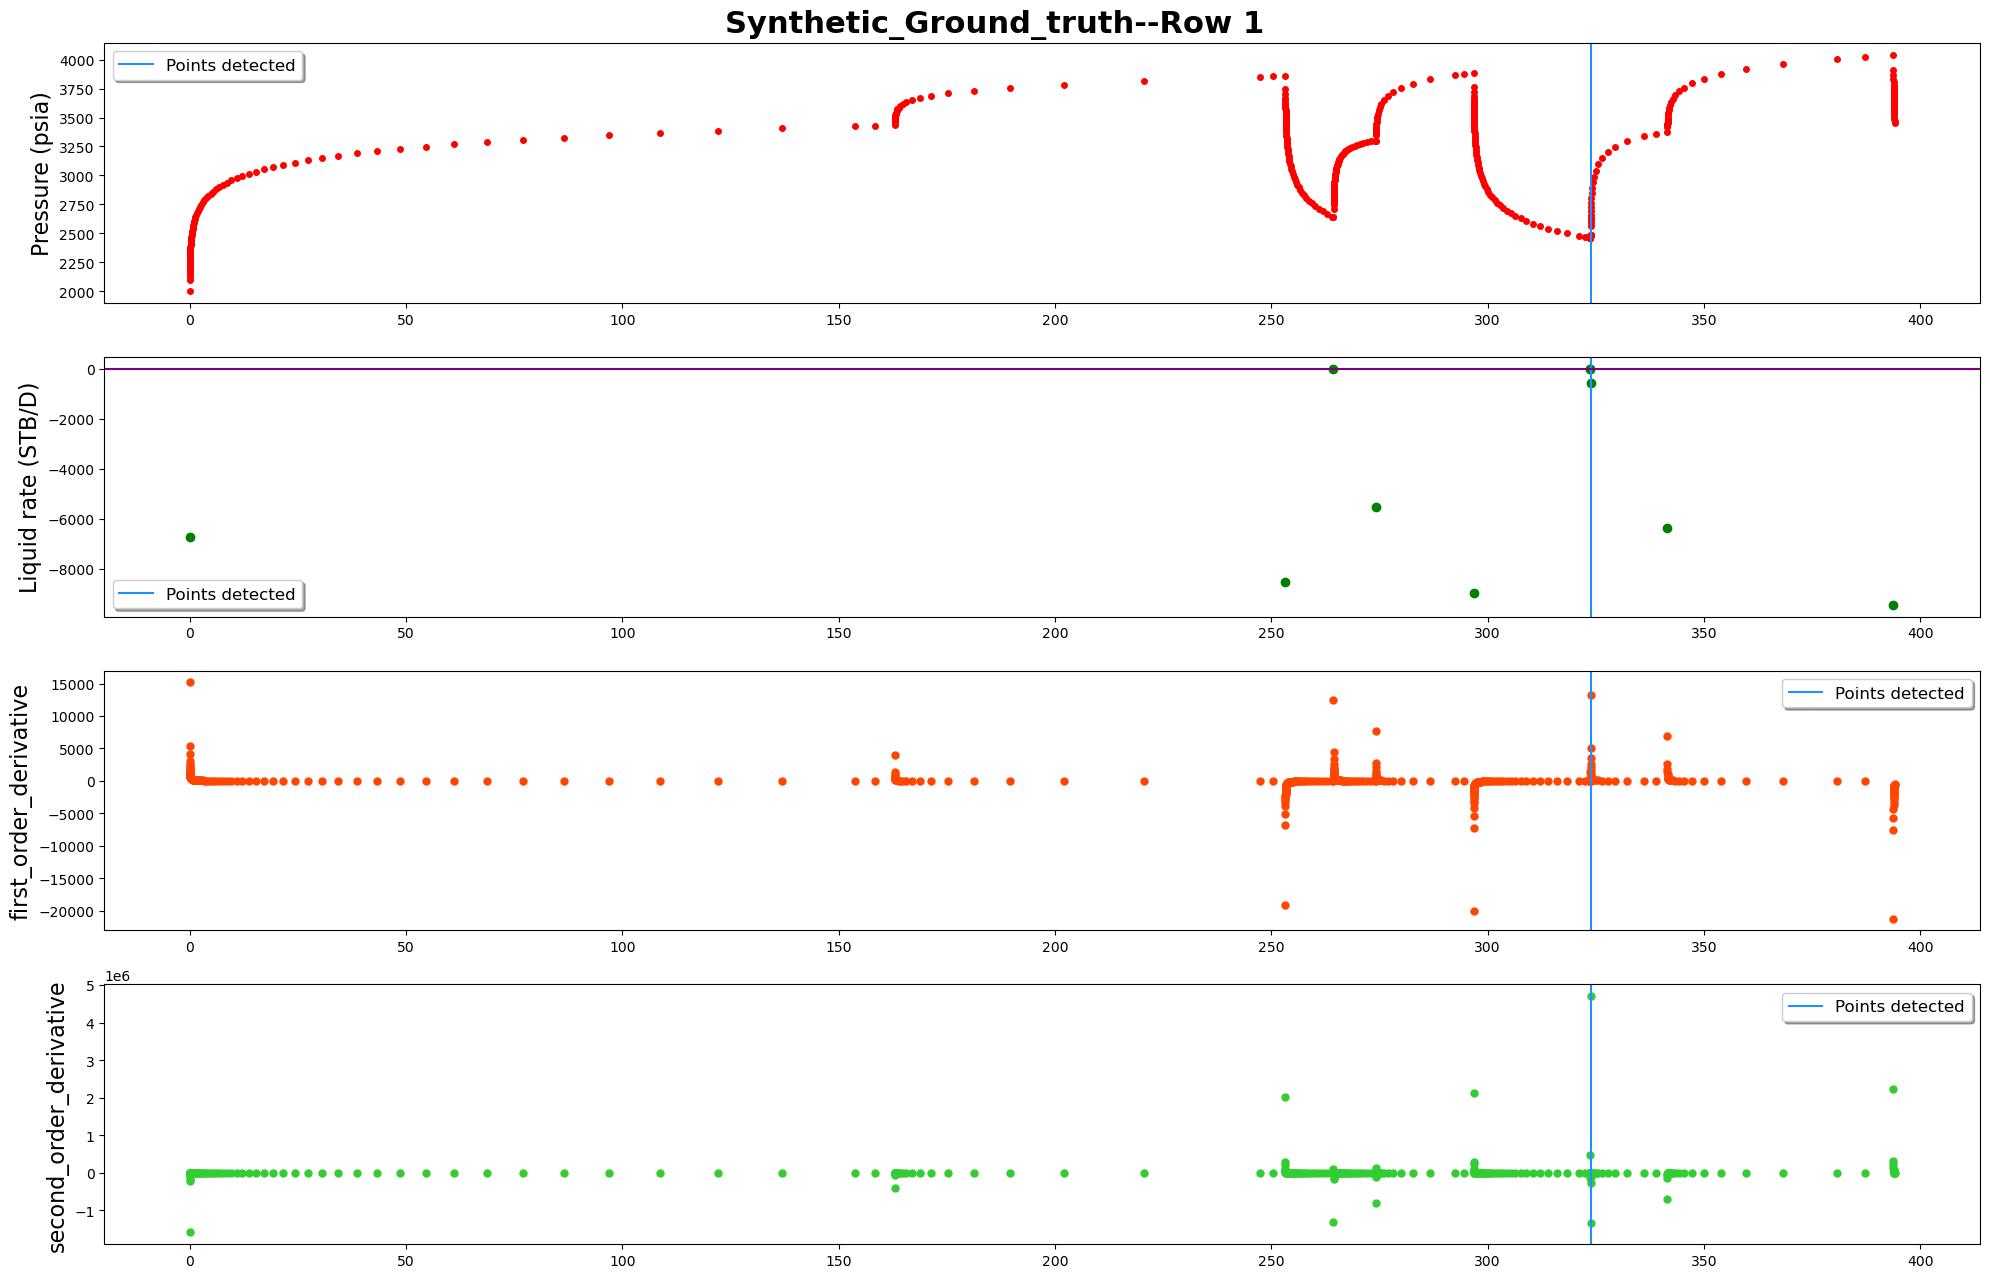

------row 2-----detected points:[745]


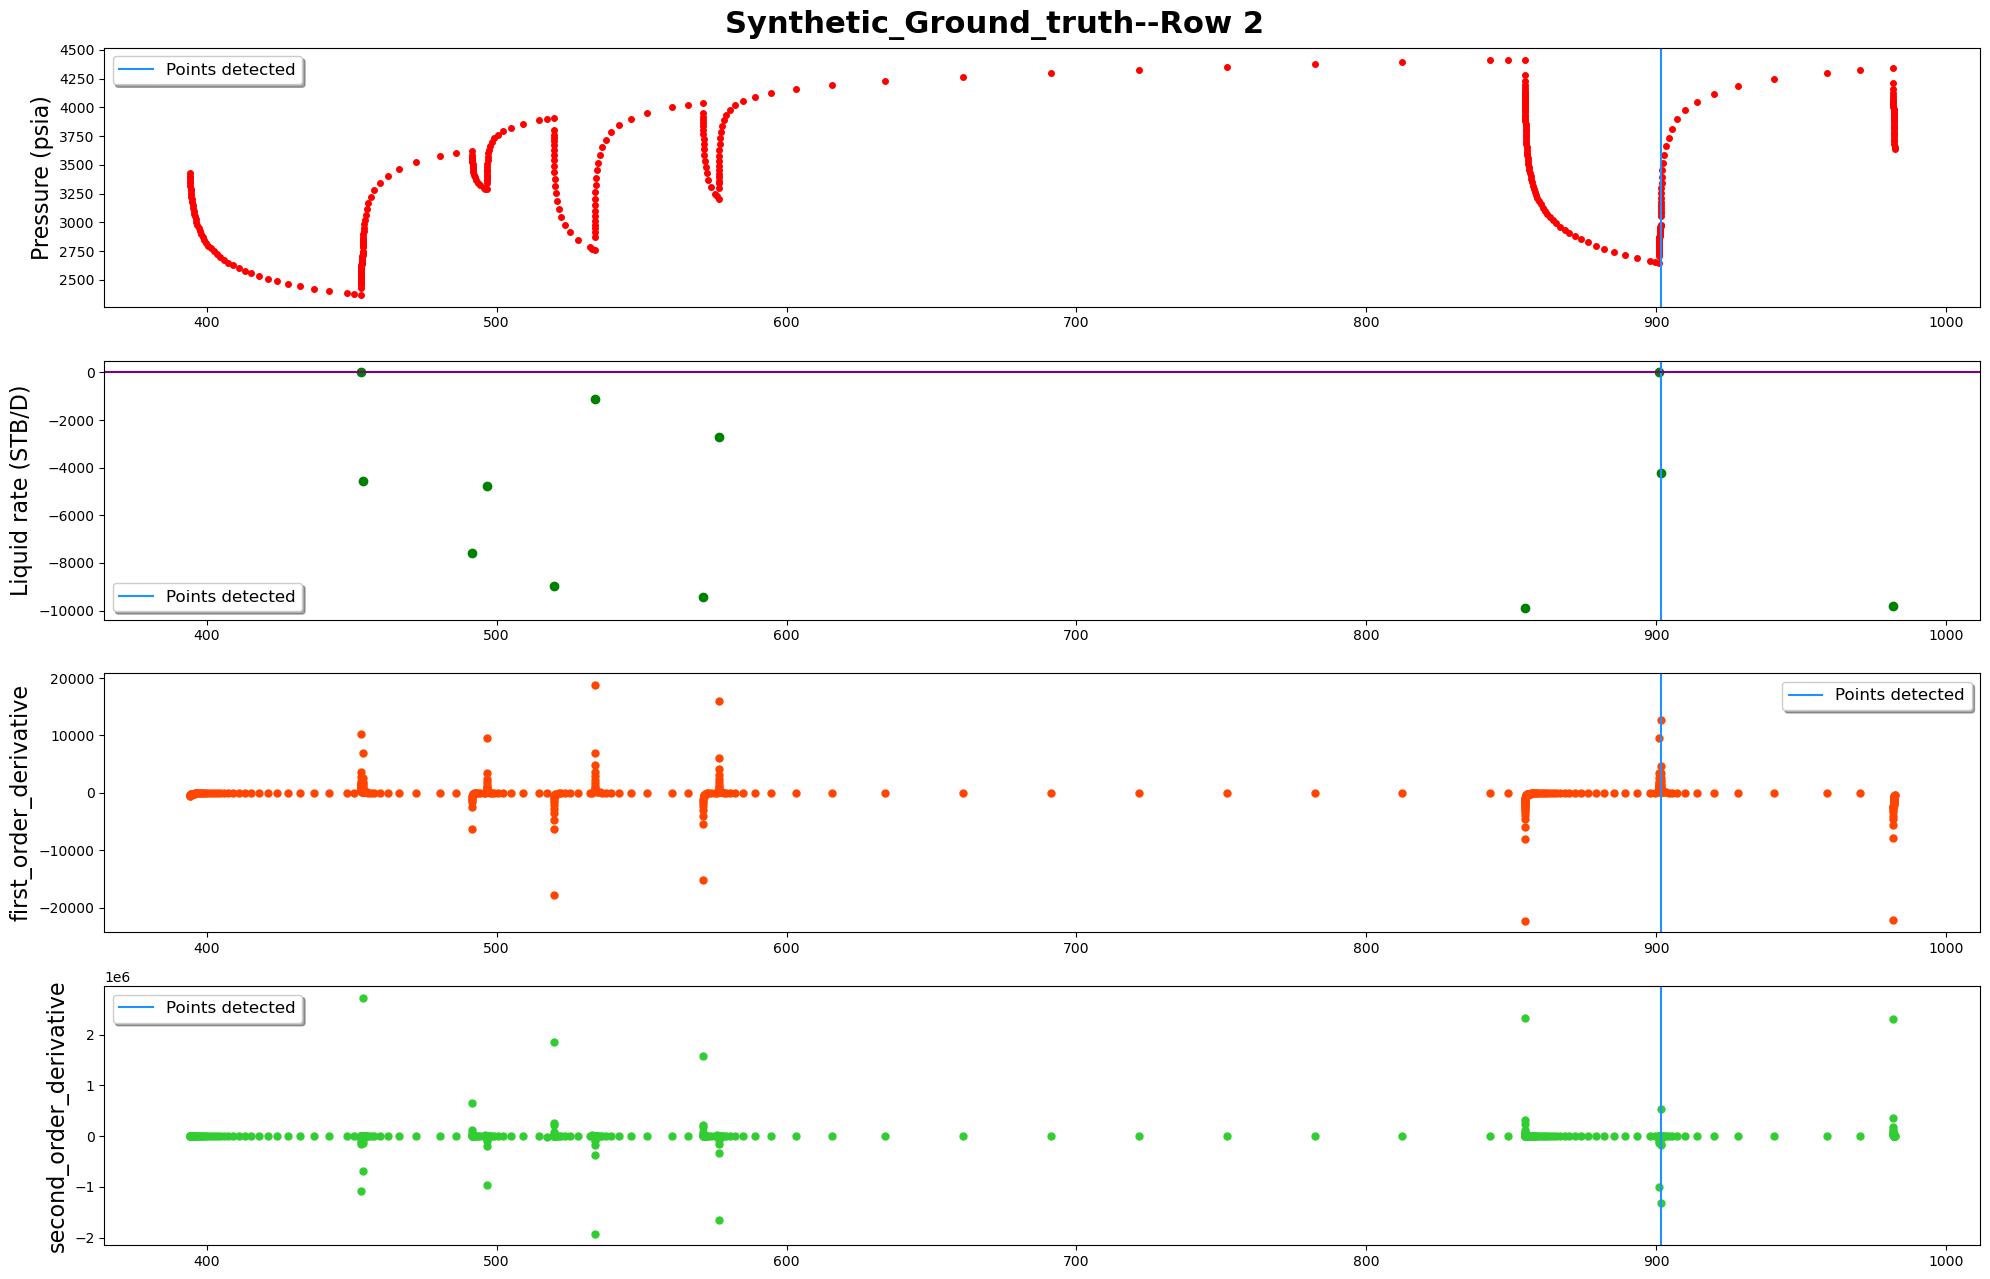

------row 3-----detected points:[860, 1151]


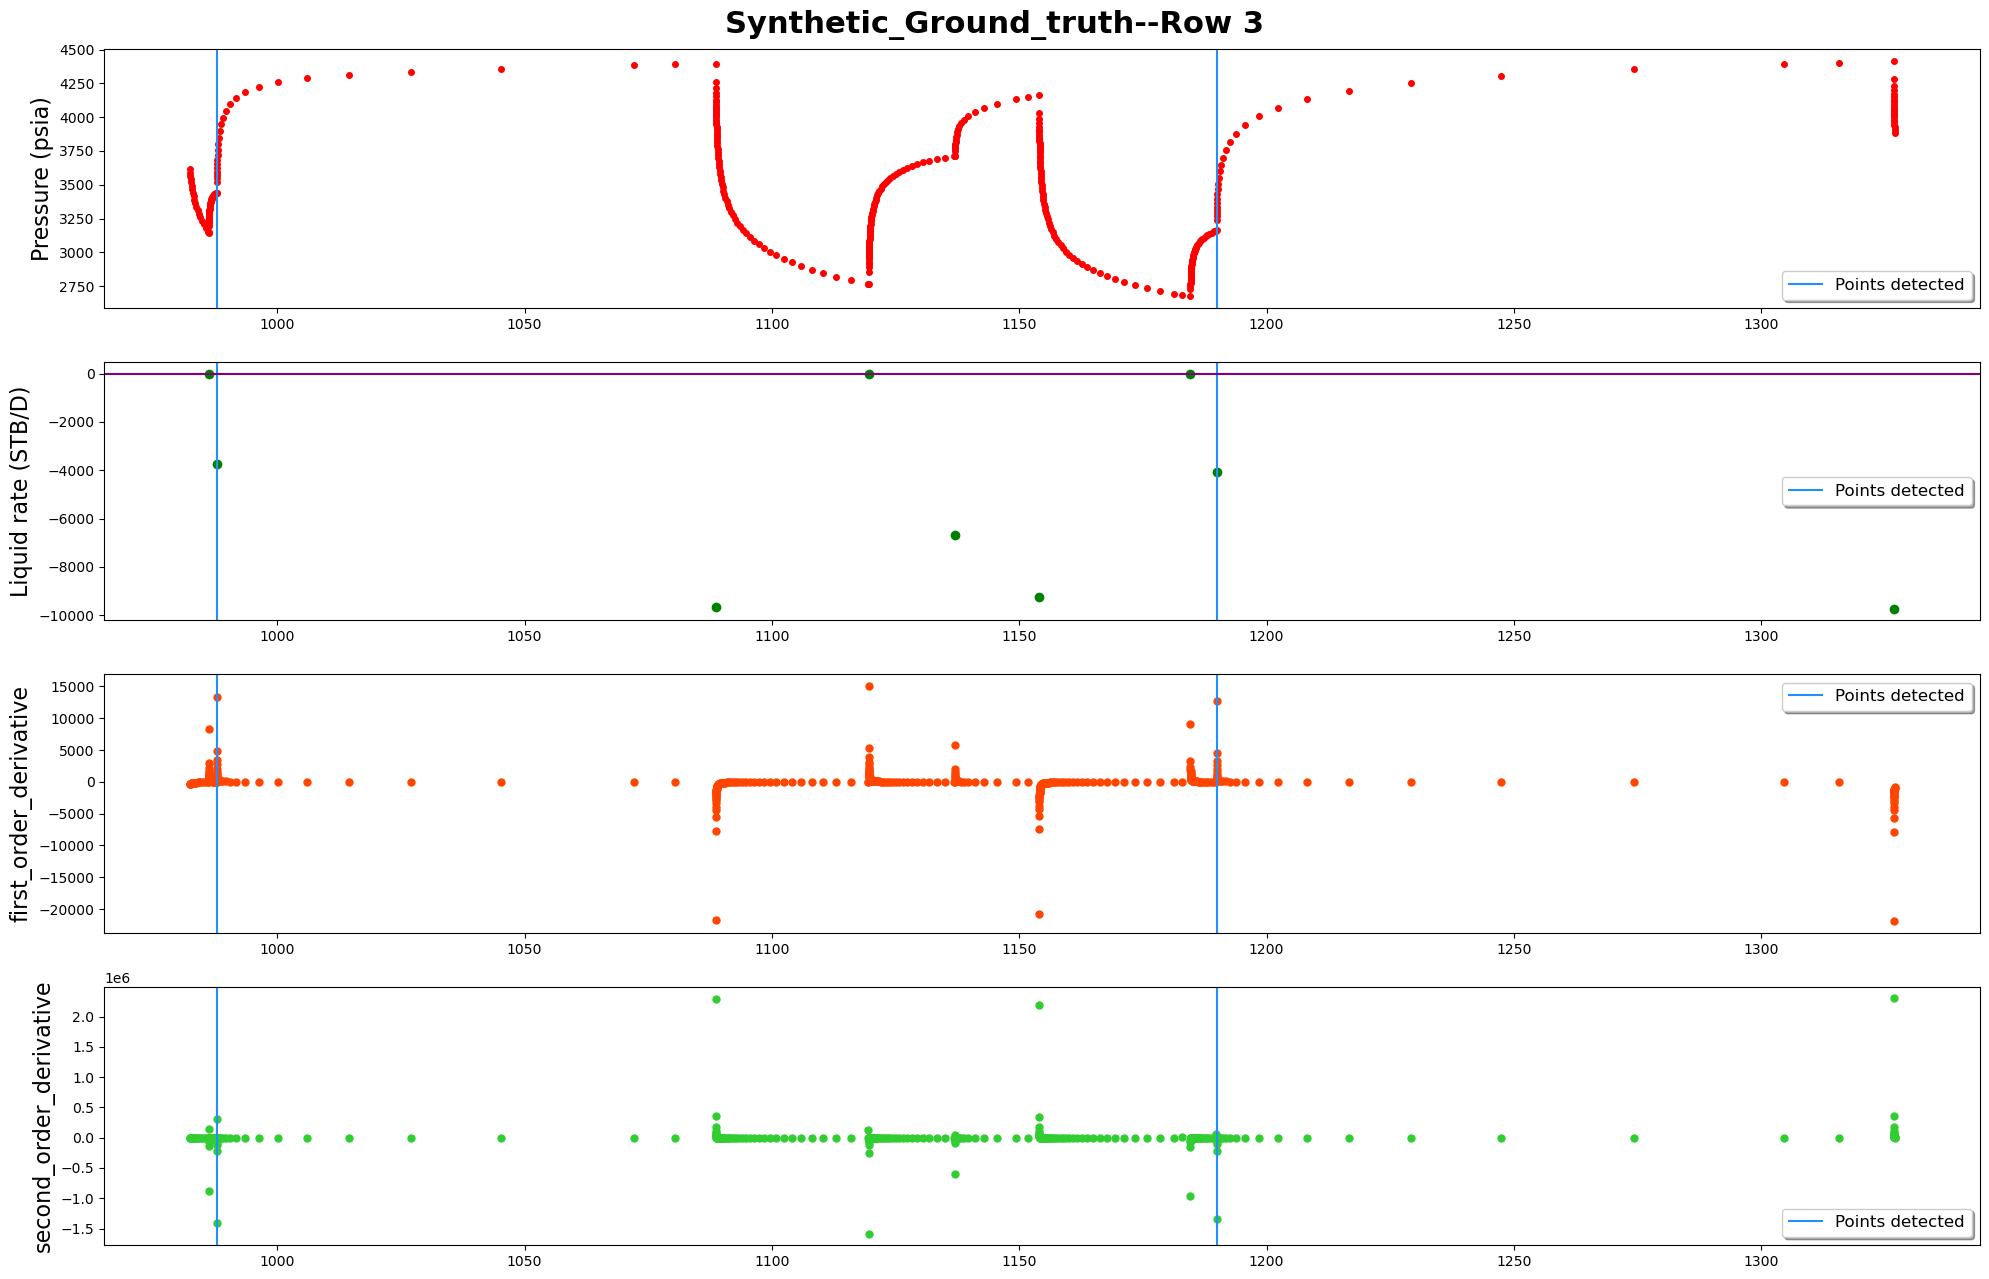

------row 4-----detected points:[1291, 1434]


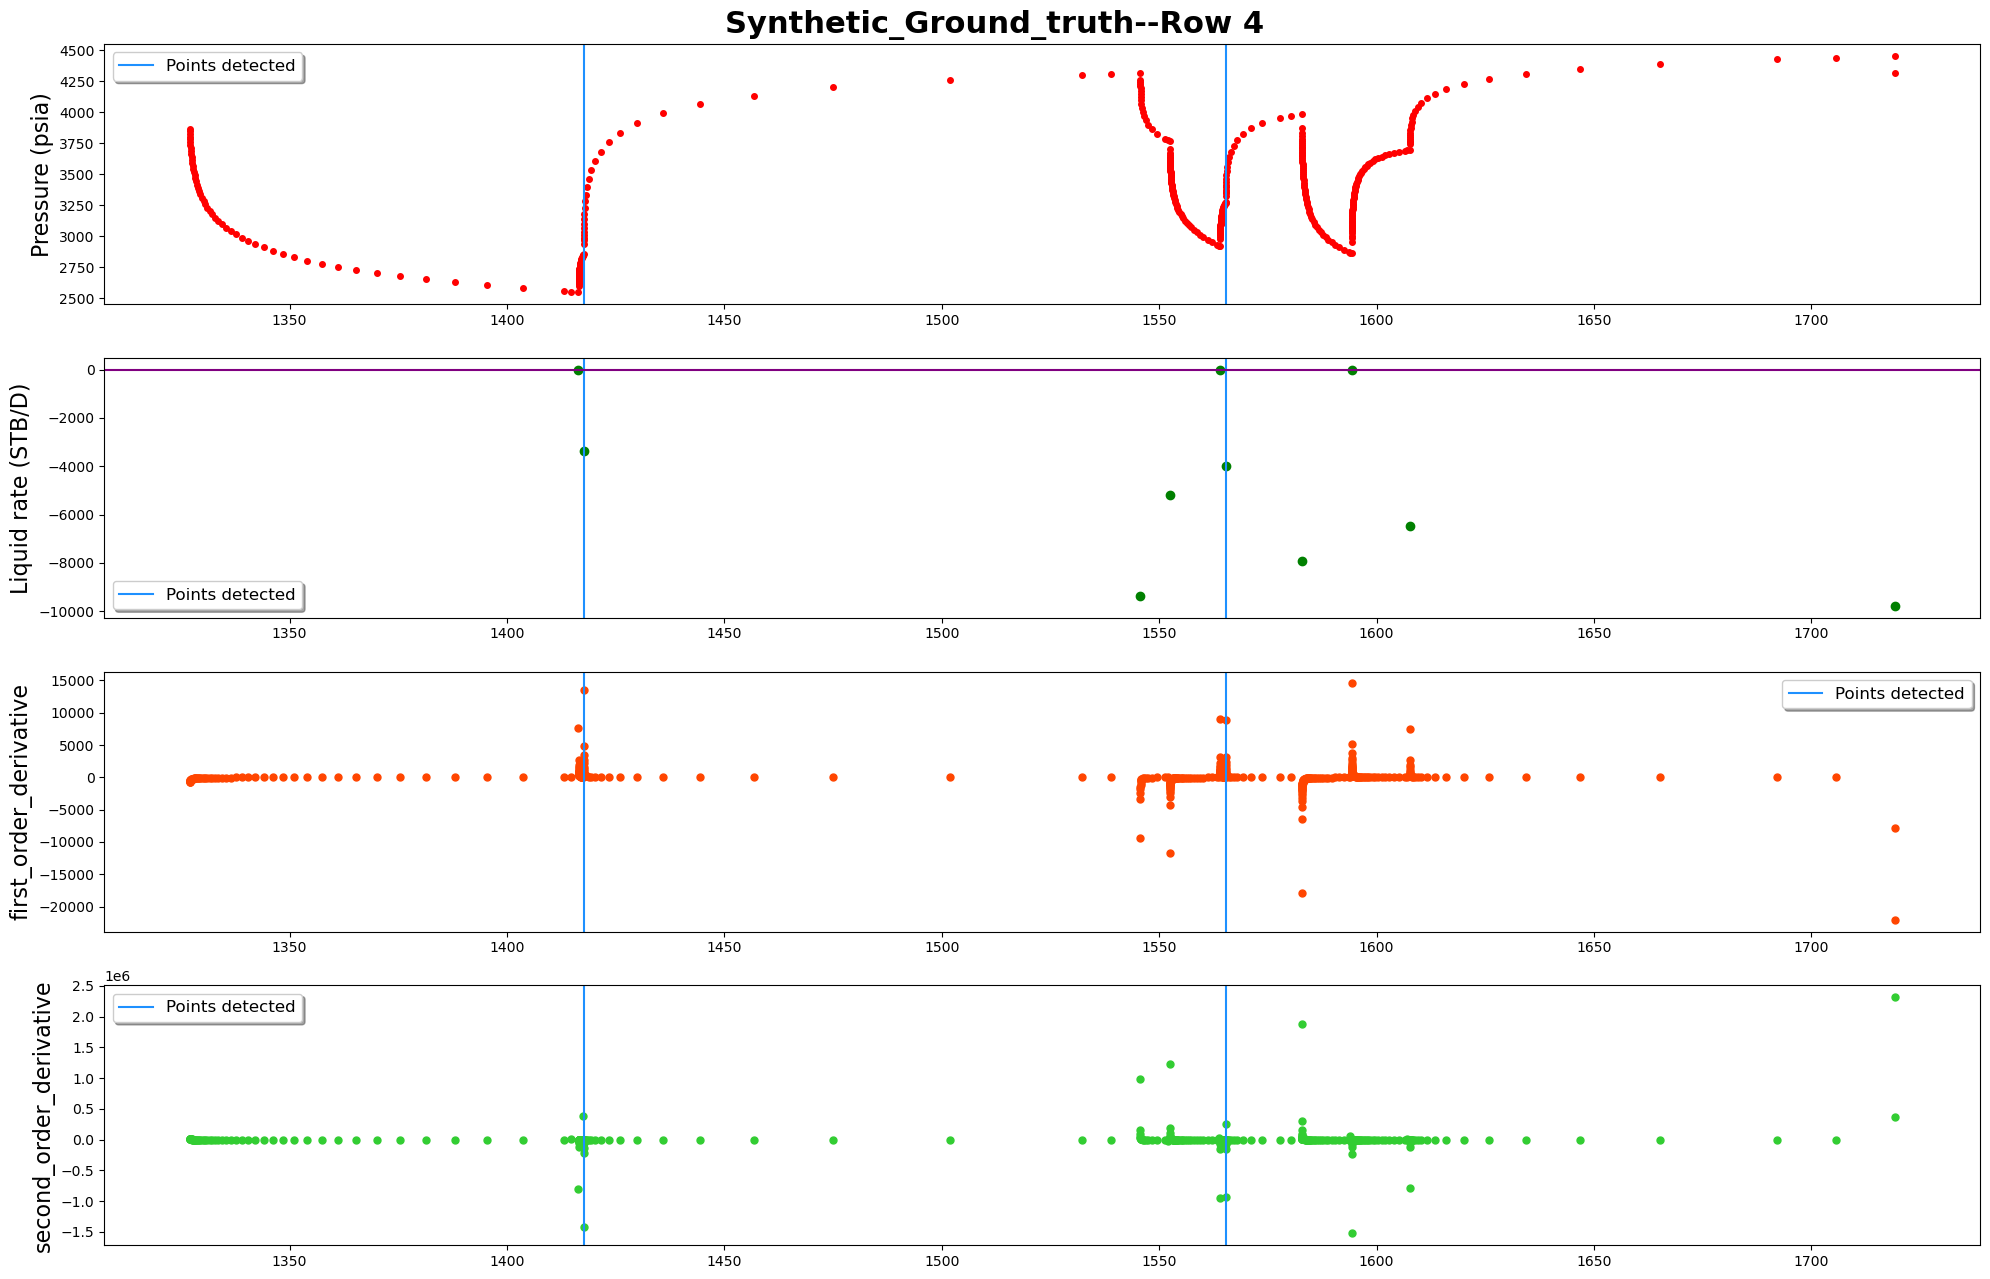

------row 5-----detected points:[1693, 1982]


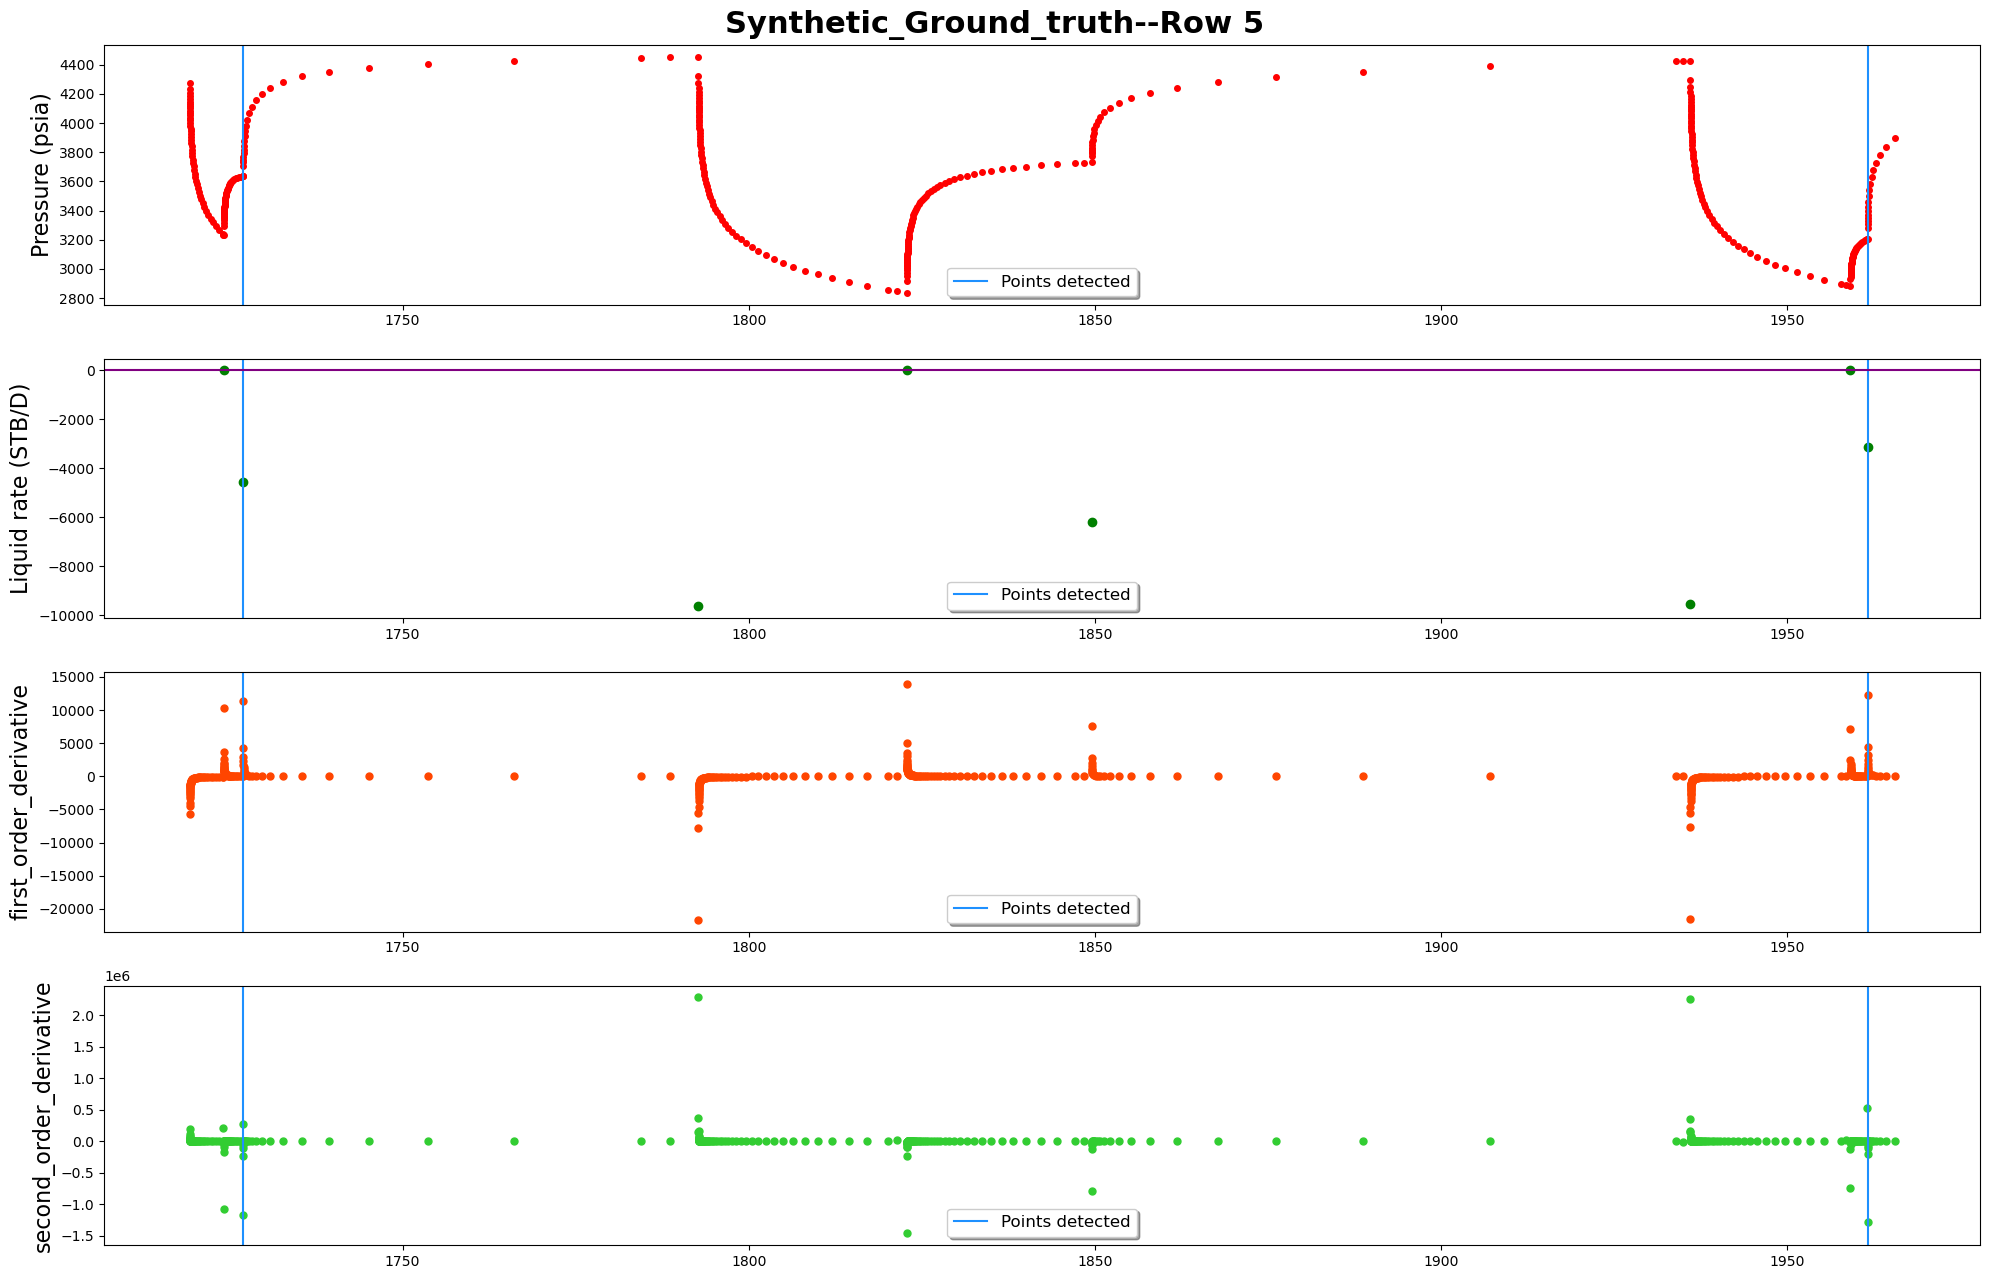

------row 6-----detected points:[2106, 2289]


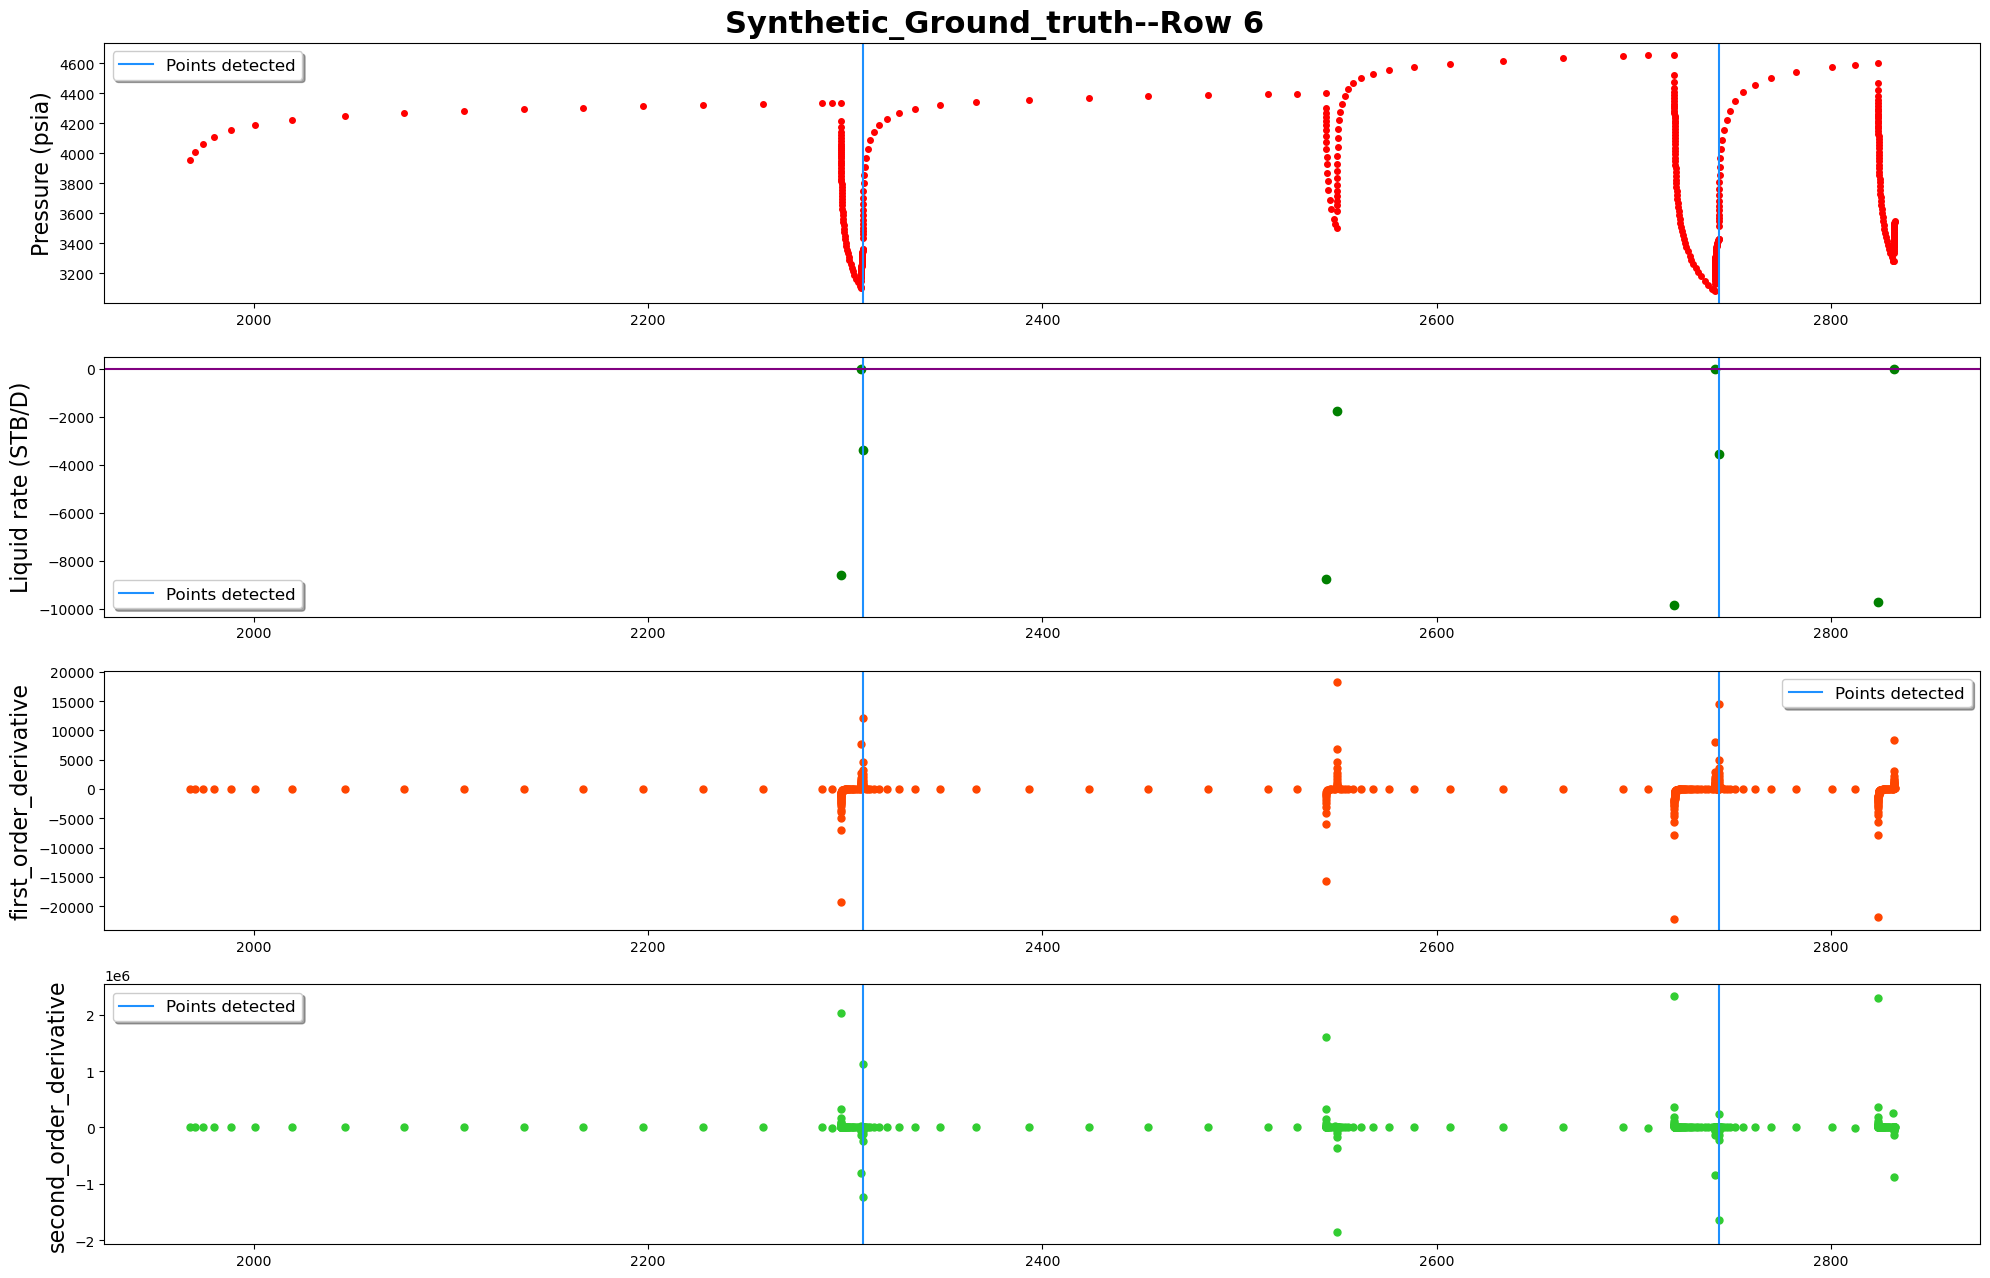

------row 7-----detected points:[2409, 2528]


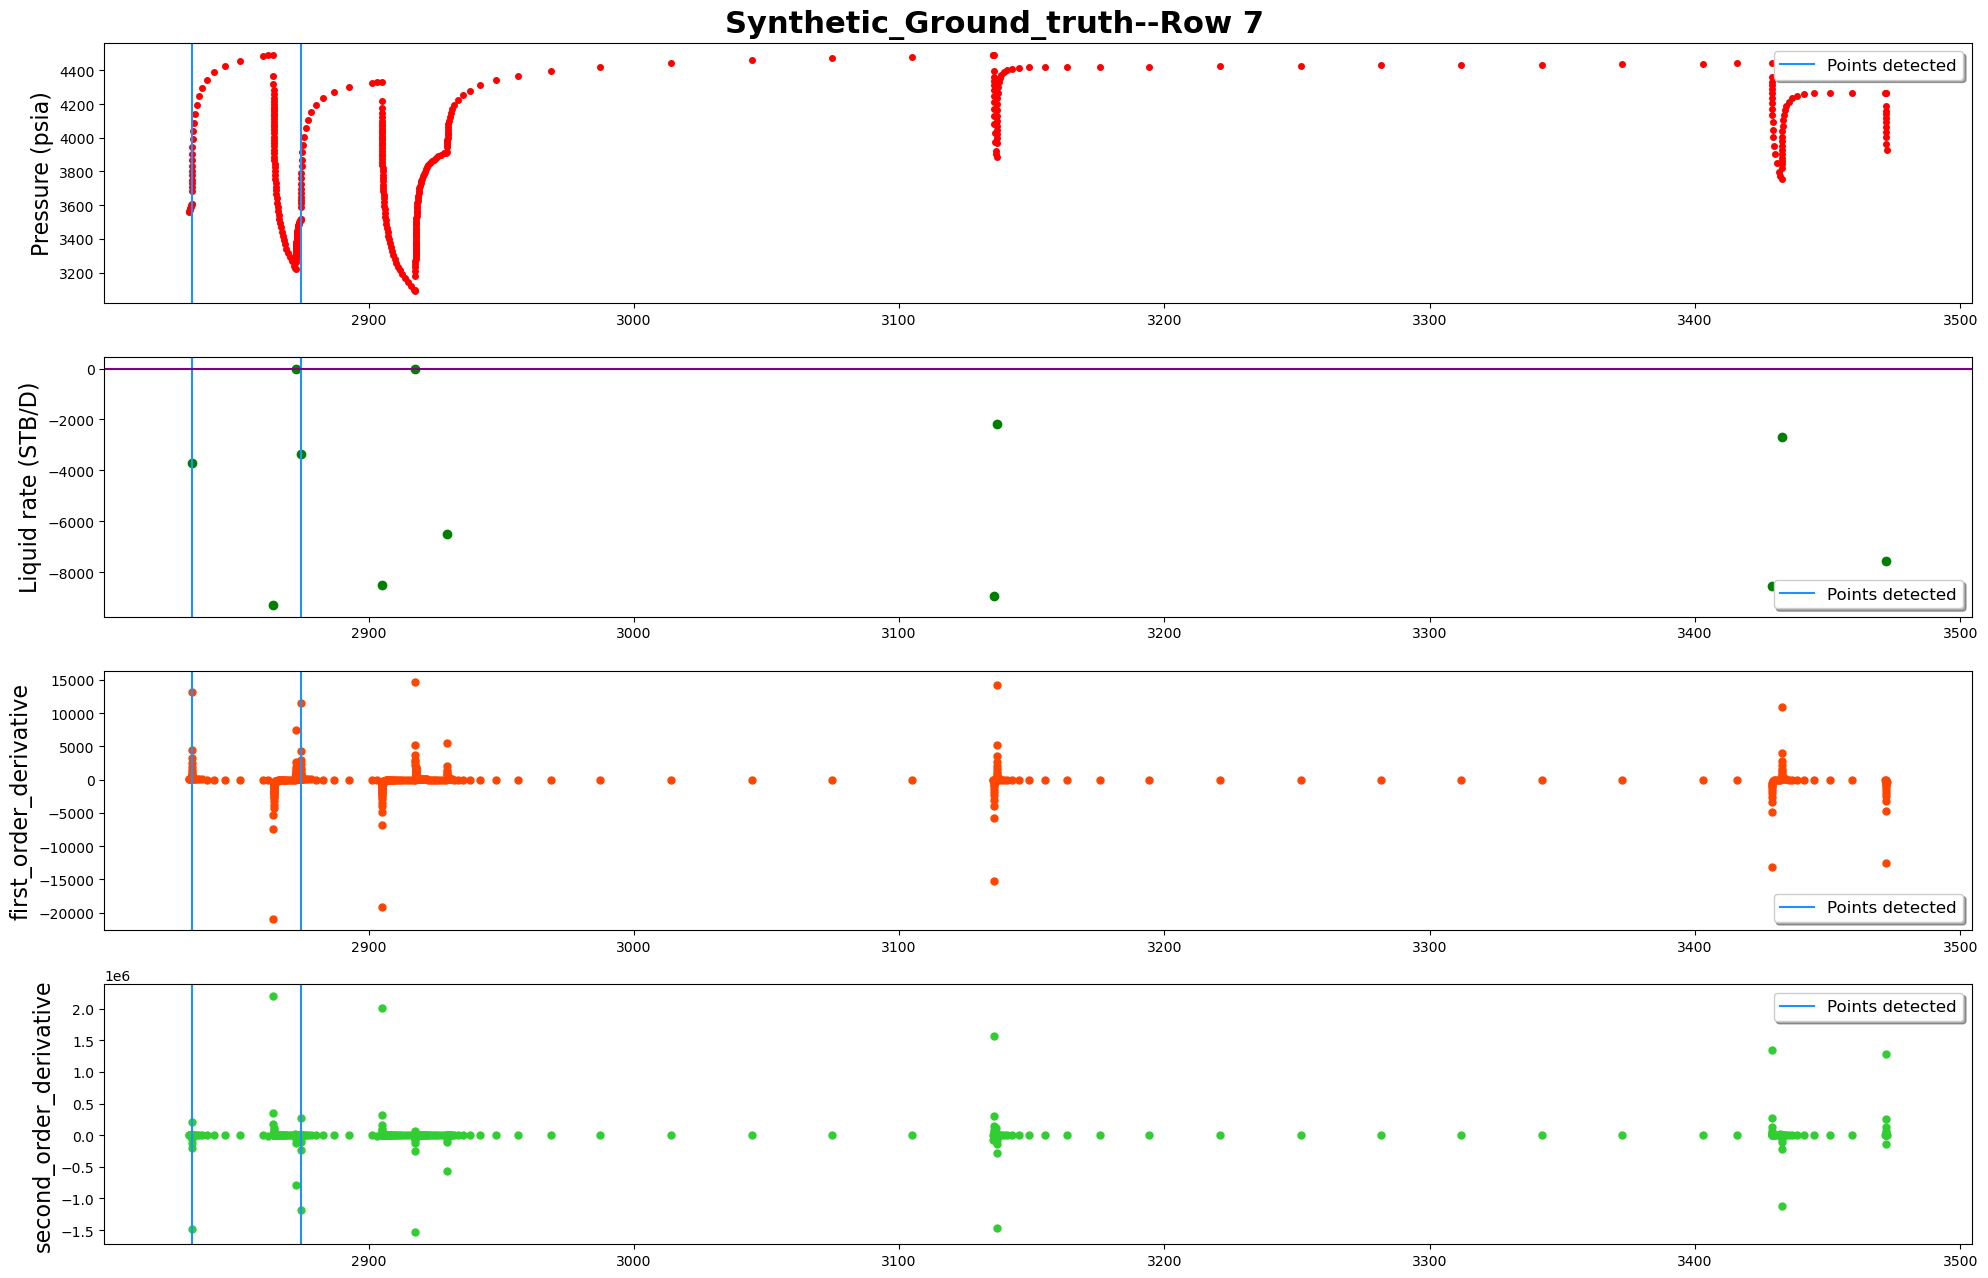

------row 8-----detected points:[2916, 3044]


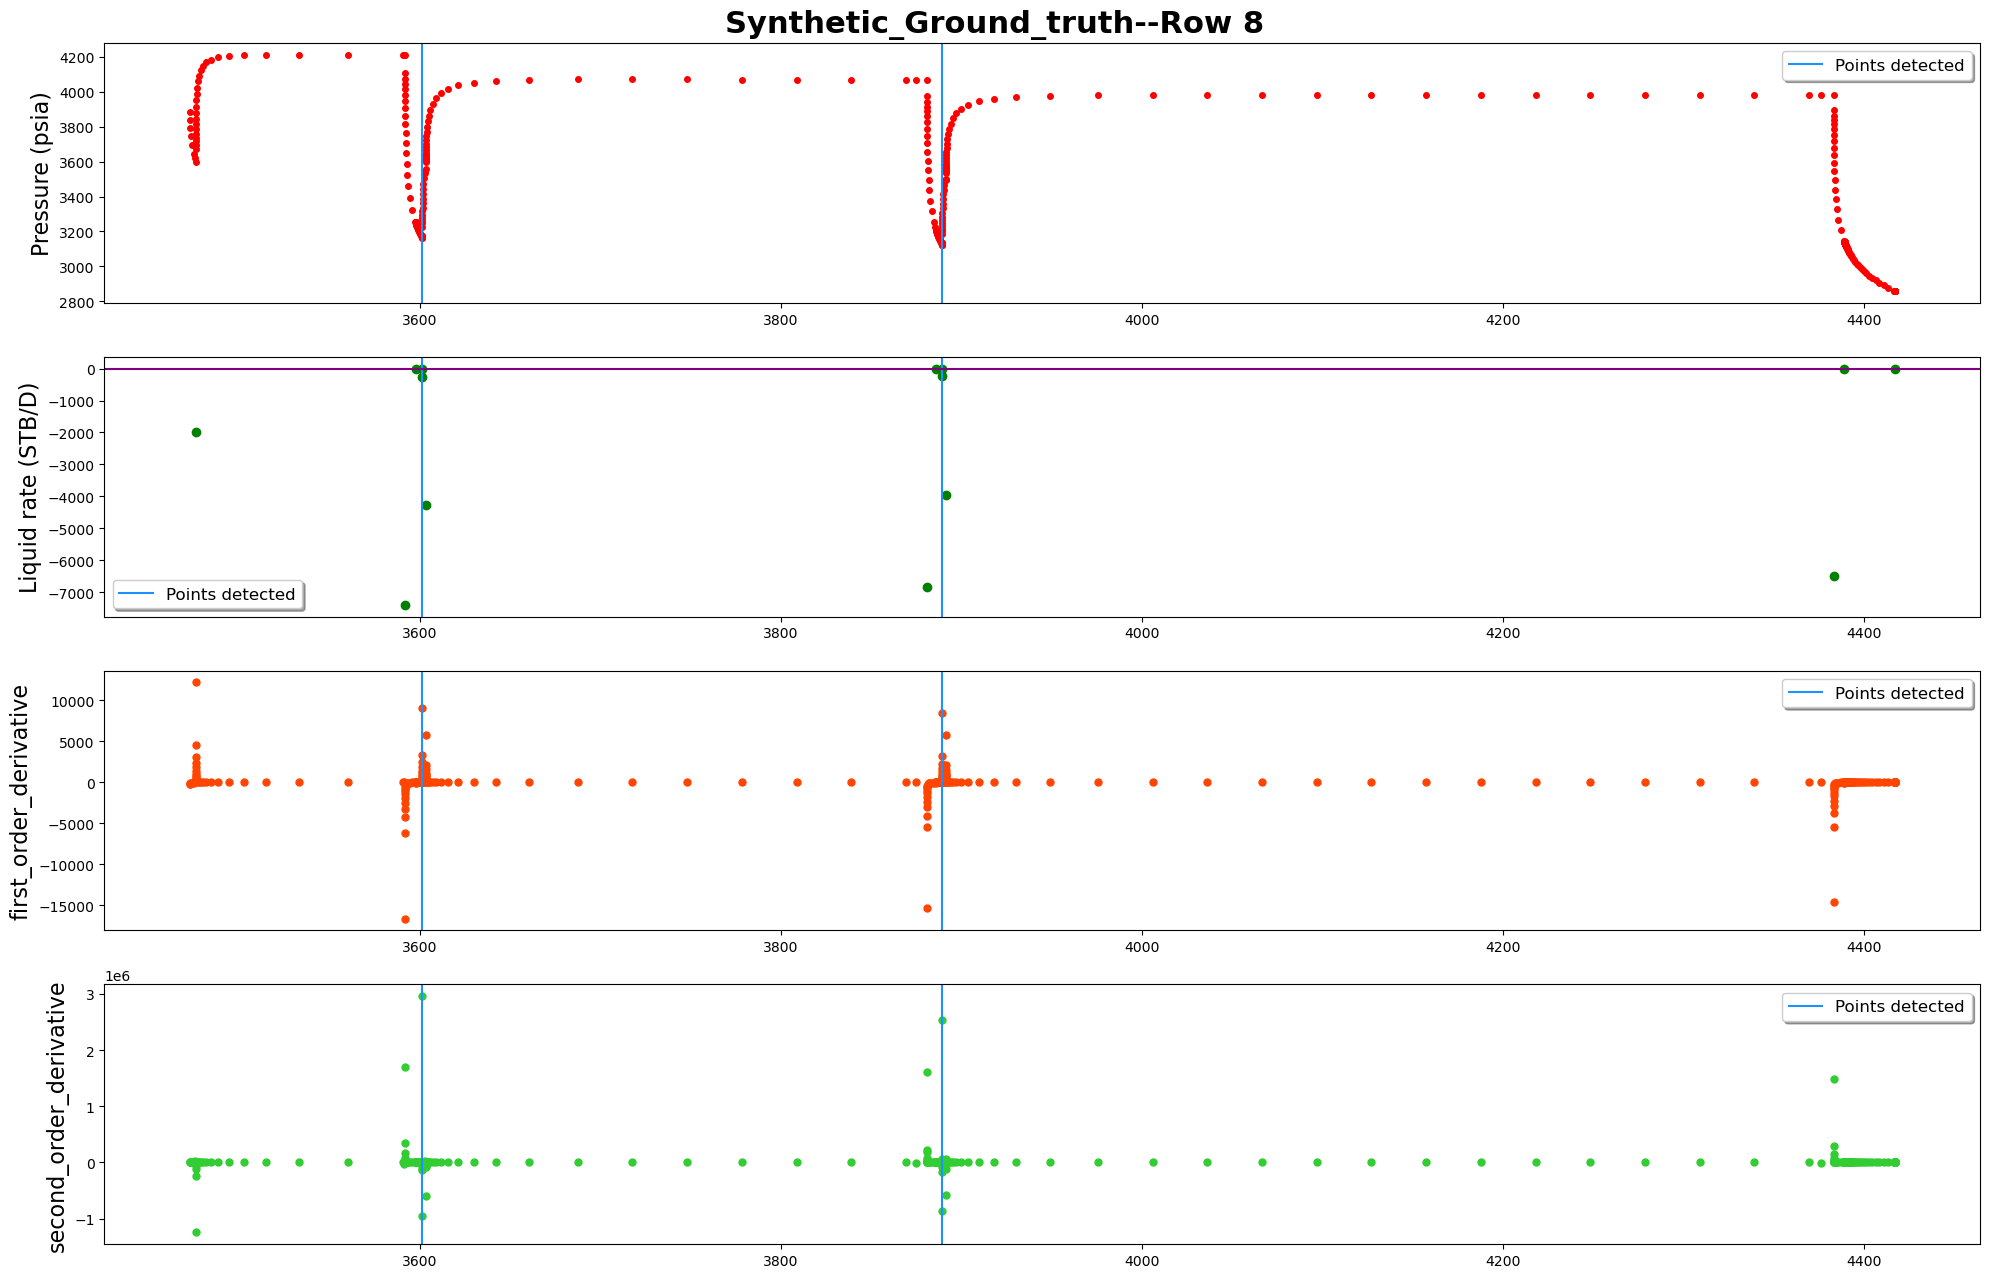

------row 9-----detected points:[3240]


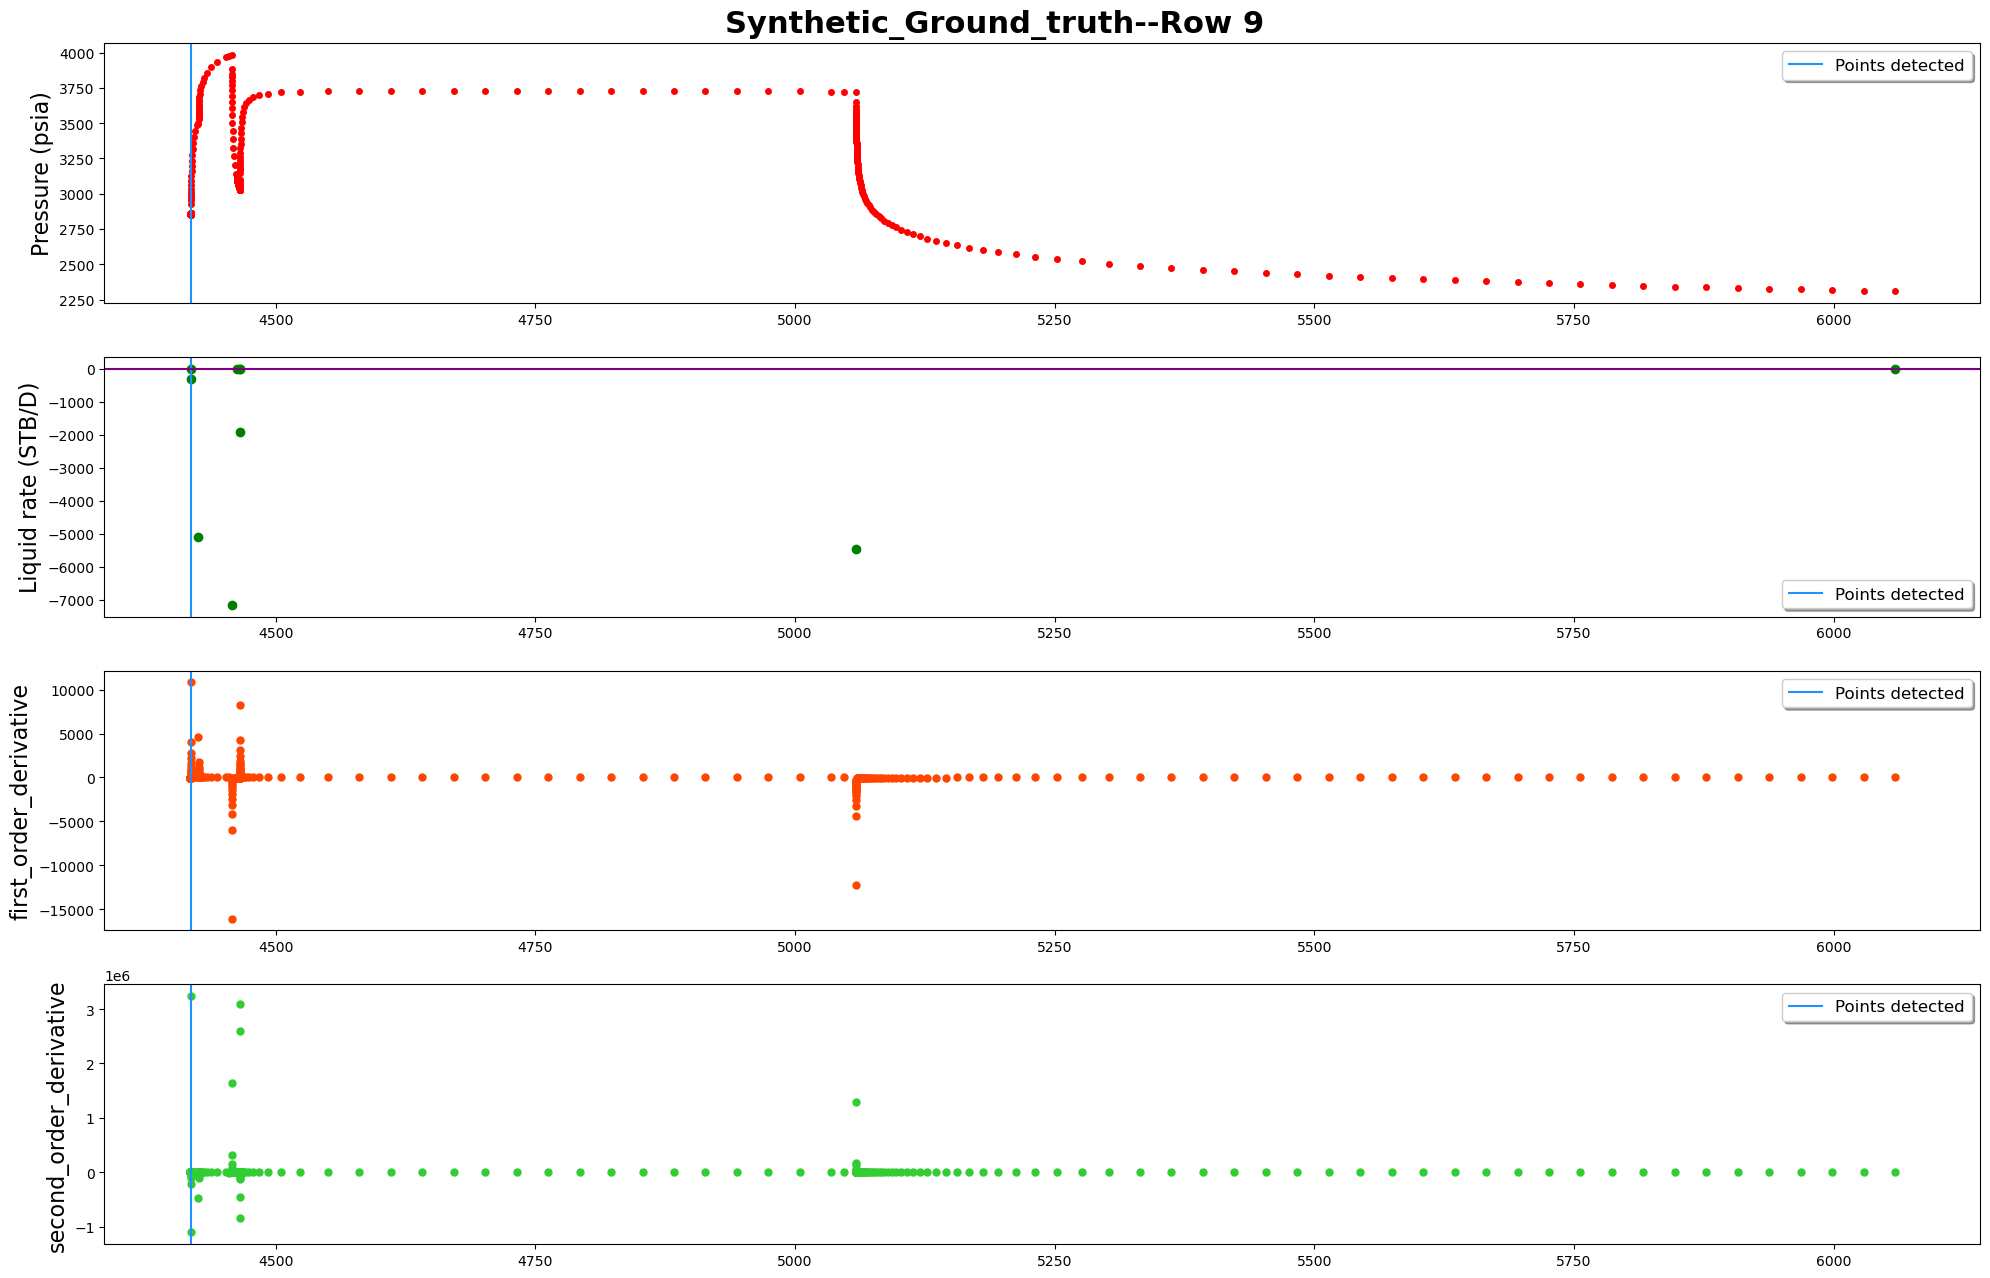

In [360]:
filename_toSave="../data_output/Synthetic_Ground_truth_patternDetection.pdf"
plot_name="Synthetic_Ground_truth"
plot_whole=False
plot_details=True
plot_statistics=False
PlotNSave(pressure_df,
          rate_df,
          breakpoints,
          [],
          data_inOneRow,
          plot_name,
          filename_toSave,
          plot_statistics,
          plot_whole,
          plot_details,
          colum_names)

In [349]:
all(np.array([1,2,3])<=np.array([2,2,4]))

True

In [282]:
len(pressure_measure)

3519

In [283]:
learn_pattern.curveData

,pressure_time_left,pressure_measure_left,pressure_time_right,pressure_measure_right
0,"[-0.024167, -0.018056, -0.012222, -0.006111, 0.0]","[-92.223616, -59.010174, -35.189133, -16.11097...","[0.0, 0.006111, 0.012222, 0.018056, 0.024167]","[0.0, 14.043148, 26.546557, 37.850582, 48.189208]"
1,"[-0.024167, -0.018333, -0.012222, -0.006111, 0.0]","[-73.053321, -49.23228, -30.154127, -14.043148...","[0.0, 0.006111, 0.011944, 0.018056, 0.024722]","[0.0, 12.50341, 23.807434, 34.14606, 44.586751]"
2,"[-0.024444, -0.018333, -0.012222, -0.006111, 0.0]","[-61.73569, -42.657536, -26.546557, -12.50341,...","[0.0, 0.005833, 0.011944, 0.018611, 0.026111]","[0.0, 11.304025, 21.642651, 32.083341, 42.856253]"
3,"[-0.024167, -0.018056, -0.011944, -0.005833, 0.0]","[-53.961561, -37.850582, -23.807434, -11.30402...","[0.0, 0.006111, 0.012778, 0.020278, 0.028611]","[0.0, 10.338626, 20.779317, 31.552229, 42.657655]"
4,"[-0.024167, -0.018056, -0.011944, -0.006111, 0.0]","[-48.189208, -34.14606, -21.642651, -10.338626...","[0.0, 0.006667, 0.014167, 0.0225, 0.031944]","[0.0, 10.440691, 21.213602, 32.319029, 43.756568]"
...,...,...,...,...
3504,"[-121.1775, -90.883056, -60.588889, -30.294444...","[25.047175, 18.324531, 11.927433, 5.827518, 0.0]","[0.0, 30.294167, 60.588611, 90.882778, 121.177...","[0.0, -5.576909, -10.922469, -16.053788, -20.9..."
3505,"[-121.177222, -90.883056, -60.588611, -30.2941...","[23.90144, 17.504342, 11.404427, 5.576909, 0.0]","[0.0, 30.294444, 60.588611, 90.883056, 121.1775]","[0.0, -5.34556, -10.476879, -15.409227, -20.15..."
3506,"[-121.1775, -90.883056, -60.588611, -30.294444...","[22.849902, 16.749987, 10.922469, 5.34556, 0.0]","[0.0, 30.294167, 60.588611, 90.883056, 121.177...","[0.0, -5.131319, -10.063668, -14.810731, -19.3..."
3507,"[-121.177222, -90.882778, -60.588611, -30.2941...","[21.881306, 16.053788, 10.476879, 5.131319, 0.0]","[0.0, 30.294444, 60.588889, 90.883056, 121.1775]","[0.0, -4.932348, -9.679412, -14.253508, -18.66..."


In [285]:
learn_pattern.curveData.iloc[1]["pressure_measure_left"]

[-73.053321, -49.23228, -30.154127, -14.043148, 0.0]

In [286]:
learn_pattern.parameters_PatternField

{'left top': array([ 1.48758493e+01,  8.31494875e+00, -5.21621472e+01,  1.87698675e-03]),
 'left bottom': array([ 5.68362323e+04, -6.25953527e+02,  3.51861465e+02, -9.06842313e-03]),
 'right top': array([ 1.98633499e+07, -1.02594438e+06,  2.00614262e+04,  6.45184429e-01]),
 'right bottom': array([ 9.05402441e+06, -4.85466766e+05,  1.00175843e+04, -2.75853337e+00])}

In [ ]:
# #spline interpolation
# x_i=np.linspace(0,10,100)
# f_spline=interpld(xdata,ydata,kind="cubic")
# y_is=f_spline(x_i)

In [ ]:
a=[1,3,5,6,7,9]
number=2


In [326]:
curveData= pd.DataFrame({'Odd':[[1,3,15,6,7,9]], 'Even':[[0,12,4,6,8,10]]})
data = pd.DataFrame({'Odd':[[1,3,5,6,7,9]], 'Even':[[0,2,4,6,8,10]]})
curveData=curveData.append(data,ignore_index=True)
# data=data.iloc[::-1]
display(curveData)
for index,row in curveData.iterrows():
#     print(row)
#     row['Odd'].reverse()
    print(row.index)
display(curveData)

,Odd,Even
0,"[1, 3, 15, 6, 7, 9]","[0, 12, 4, 6, 8, 10]"
1,"[1, 3, 5, 6, 7, 9]","[0, 2, 4, 6, 8, 10]"


Index(['Odd', 'Even'], dtype='object')
Index(['Odd', 'Even'], dtype='object')


,Odd,Even
0,"[1, 3, 15, 6, 7, 9]","[0, 12, 4, 6, 8, 10]"
1,"[1, 3, 5, 6, 7, 9]","[0, 2, 4, 6, 8, 10]"
